### 
There is a problem with the previous code, the latest version shall prevail

In [ ]:
!nvidia-smi

Fri Jun 17 06:45:11 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   32C    P0    24W / 300W |      0MiB / 16160MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#title Clone Wav2Lip github repo
!git clone https://github.com/Rudrabha/Wav2Lip.git

Cloning into 'Wav2Lip'...
remote: Enumerating objects: 360, done.
remote: Total 360 (delta 0), reused 0 (delta 0), pack-reused 360
Receiving objects: 100% (360/360), 522.32 KiB | 12.74 MiB/s, done.
Resolving deltas: 100% (198/198), done.


In [ ]:
!cd Wav2Lip && pip install -r requirements.txt
!wget "https://www.adrianbulat.com/downloads/python-fan/s3fd-619a316812.pth" -O "Wav2Lip/face_detection/detection/sfd/s3fd.pth"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 14.7 MB/s 
     |████████████████████████████████| 20.3 MB 1.1 MB/s 
     |████████████████████████████████| 67.1 MB 40 kB/s 
     |████████████████████████████████| 26.6 MB 21.5 MB/s 
     |████████████████████████████████| 676.9 MB 3.7 kB/s 
     |████████████████████████████████| 2.6 MB 46.6 MB/s 
     |████████████████████████████████| 60 kB 9.3 MB/s 
     |████████████████████████████████| 3.5 MB 51.5 MB/s 
     |████████████████████████████████| 20.2 MB 78.9 MB/s 
  Created wheel for librosa: filename=librosa-0.7.0-py3-none-any.whl size=1598360 sha256=31ae682a67fc6879c67520fcf580cff2c424c1131e897080292ae6d3d1081f9a
  Stored in directory: /root/.cache/pip/wheels/f5/0d/b1/71a4e1863d7577a218f771df59c7582996580fa07ac79d68fd
Successfully built librosa
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstallin

In [ ]:
#title Uninstall tensorflow - Confirm with y [ enter ]
!pip uninstall tensorflow tensorflow-gpu

Found existing installation: tensorflow 2.8.2+zzzcolab20220527125636
Uninstalling tensorflow-2.8.2+zzzcolab20220527125636:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/import_pb_to_tensorboard
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.7/dist-packages/tensorflow-2.8.2+zzzcolab20220527125636.dist-info/*
    /usr/local/lib/python3.7/dist-packages/tensorflow/*
Proceed (y/n)? y
  Successfully uninstalled tensorflow-2.8.2+zzzcolab20220527125636



# Task

This practice involves the implementation of the Wav2Lip model and related code. It is generally divided into the following parts:
1. Environment configuration
2. Dataset preparation and preprocessing
3. Model training
4. Model inference

##Wav2Lip
Wav2Lip is a speech-driven face-speaking video generation model based on adversarial generative networks. As shown in the figure below, the network model of Wav2Lip is generally divided into three parts: a generator, a discriminator and a pre-trained Lip-Sync Expert. There are two inputs to the network: an arbitrary video and a speech, and the output is a lip-synced video. The generator is based on the encoder-decoder network structure. It uses two encoders: speech encoder, identity encoder to encode the input voice and video faces, and splices the encoding results of the two and sends them to the face decoder. Decode to get the output video frame. The discriminator Visual Quality Discriminator regulates the quality of the generated results and improves the clarity of the generated video. In order to better ensure the lip synchronization of the generated results, Wav2Lip introduces a pre-trained lip synchronization discriminant model Pre-trained Lip-sync Expert as an additional loss to measure the lip synchronization of the generated results.

### Lip-Sync Expert
Lip-sync Expert is based on SyncNet, a network model used to determine whether speech and video are synchronized. As shown in the figure below, there are also two types of SyncNet inputs: voice feature MFCC and lip video frames. Two encoders based on convolutional neural networks are used to perform latitude reduction and feature extraction on the input voice and video frames, respectively. The features are all mapped to the same latitude space, and finally the contrast loss is used to measure the lip synchronization. In the Wav2Lip model, the network structure of SyncNet is further improved: the network is deeper; the residual network structure is added; the input speech features are replaced by mel-spectrogram features.

1. Environment configuration
It is recommended to prepare a linux system computer with a graphics card, or you can choose to use a third-party cloud server (Google Colab)
Python 3.6 or higher
ffmpeg: sudo apt-get install ffmpeg
The installation of the necessary python packages and the required library names are already included in the requirements.txt file, which can be installed in one go using pip install -r requirements.txt.
In this experiment, the related technologies of face detection are used. It is necessary to download the face detection pre-trained model: Face detection pre-trained model and move it to the folder face_detection/detection/sfd/s3fd.pth.下. 

In [ ]:
# !pip install -r requirements.txt

2. Data set preparation and preprocessing
Download of LRS2 dataset
The download address of the dataset required for the experiment is: LRS2 dataset. To download this dataset, you need to obtain permission from the BBC, and you need to send an application email to obtain the download key. For details, see the instructions on the webpage. After the download is complete, unzip the dataset to the mvlrs_v1/ folder in this directory, and move the file list files train.txt, val.txt, test.txt in LRS2 to the filelists/ folder, and finally get the dataset. The directory structure is shown below.

data_root (mvlrs_v1)
├── main, pretrain (we only use the data in the main folder)
| ├── Folder List
| │ ├── 5-digit video ID ending with .mp4
Dataset Preprocessing Most of the videos in the dataset contain half- or full-body images of people, and our model only needs a small part of the human face. Therefore, in the preprocessing stage, we need to perform framing operations on each video, extract each frame of the video, and then use the face detection toolkit to locate and cut the face position, and only keep the picture frame of the face. At the same time, we also need to separate the speech in each video.

In [ ]:
%cd /content/Wav2Lip
!mkdir mvlrs_v1
!cp -r /content/drive/MyDrive/saharsh/main /content/Wav2Lip/mvlrs_v1/

/content/Wav2Lip


In [ ]:
%cd /content/drive/MyDrive
!rm -r /content/drive/MyDrive/preprocessed
!mkdir preprocessed


/content/drive/MyDrive


In [ ]:
#this is experimental cell, with all the mp4 files resampled to 25 fps
%cd /content/drive/MyDrive
!mkdir preprocessed_exp


/content/drive/MyDrive


In [ ]:
%cd /content/Wav2Lip

/content/Wav2Lip


In [ ]:
!python preprocess.py --data_root /content/Wav2Lip/mvlrs_v1/main --preprocessed_root /content/drive/MyDrive/preprocessed_exp/ 

Started processing for /content/Wav2Lip/mvlrs_v1/main with 1 GPUs
100% 65/65 [40:22<00:00, 37.27s/it]
Dumping audios...
100% 65/65 [00:13<00:00,  4.79it/s]


The directory structure under the preprocessed lrs2_preprocessed/ folder is as follows

preprocessed_root (lrs2_preprocessed)
├── Folder List
| ├── Five-digit video ID
| │ ├── *.jpg
| │ ├── audio.wav
```

###3. Model training
The training of the model is mainly divided into two parts:

Training of the Lip-Sync Expert Discriminator. Here is the official pre-training model weight
Training of the Wav2Lip model.
3.1 Pre-training Lip-Sync Expert
1. Network construction
Above, we have introduced the basic network structure of SyncNet, which is mainly composed of a series of (Conv+BatchNorm+Relu). Here we have made some improvements to it and added a residual structure. For the convenience of subsequent use, we encapsulate the (Conv+BatchNorm+Relu) and residual modules.

In [ ]:
import torch
from torch import nn
from torch.nn import functional as F

class Conv2d(nn.Module):
    def __init__(self, cin, cout, kernel_size, stride, padding, residual=False, *args, **kwargs):
        super().__init__(*args, **kwargs)
        ########TODO######################
        # According to the following network structure requirements, complete the code
        # self.conv_block: Sequential structure, Conv2d+BatchNorm
        # self.act: relu activation function
        self.conv_block = nn.Sequential(
                            nn.Conv2d(cin, cout, kernel_size, stride, padding),
                            nn.BatchNorm2d(cout)
                            )
        self.act = nn.ReLU()
        self.residual = residual

    def forward(self, x):
        out = self.conv_block(x)
        if self.residual:
            out += x
        return self.act(out)

SyncNet mainly consists of two parts: Face_encoder and Audio_encoder. Each part consists of multiple Conv2d modules, which implement downsampling and feature extraction of the input by specifying the size of the convolution kernel

In [ ]:
import torch
from torch import nn
from torch.nn import functional as F

class SyncNet_color(nn.Module):
    def __init__(self):
        super(SyncNet_color, self).__init__()
        
        ################TODO###################
       
#According to the network structure diagram provided above, complete the parameters of the convolutional network below

        self.face_encoder = nn.Sequential(
            Conv2d(15, 32, kernel_size=(7, 7), stride=1, padding=3),

            Conv2d(32, 64, kernel_size=5, stride=(1, 2), padding=1),
            Conv2d(64, 64, kernel_size=3, stride=1, padding=1, residual=True),
            Conv2d(64, 64, kernel_size=3, stride=1, padding=1, residual=True),

            Conv2d(64, 128, kernel_size=3, stride=2, padding=1),
            Conv2d(128, 128, kernel_size=3, stride=1, padding=1, residual=True),
            Conv2d(128, 128, kernel_size=3, stride=1, padding=1, residual=True),
            Conv2d(128, 128, kernel_size=3, stride=1, padding=1, residual=True),

            Conv2d(128, 256, kernel_size=3, stride=2, padding=1),
            Conv2d(256, 256, kernel_size=3, stride=1, padding=1, residual=True),
            Conv2d(256, 256, kernel_size=3, stride=1, padding=1, residual=True),

            Conv2d(256, 512, kernel_size=3, stride=2, padding=1),
            Conv2d(512, 512, kernel_size=3, stride=1, padding=1, residual=True),
            Conv2d(512, 512, kernel_size=3, stride=1, padding=1, residual=True),

            Conv2d(512, 512, kernel_size=3, stride=2, padding=1),
            Conv2d(512, 512, kernel_size=3, stride=1, padding=0),
            Conv2d(512, 512, kernel_size=1, stride=1, padding=0),)

        self.audio_encoder = nn.Sequential(
            Conv2d(1, 32, kernel_size=3, stride=1, padding=1),
            Conv2d(32, 32, kernel_size=3, stride=1, padding=1, residual=True),
            Conv2d(32, 32, kernel_size=3, stride=1, padding=1, residual=True),

            Conv2d(32, 64, kernel_size=3, stride=(3, 1), padding=1),
            Conv2d(64, 64, kernel_size=3, stride=1, padding=1, residual=True),
            Conv2d(64, 64, kernel_size=3, stride=1, padding=1, residual=True),

            Conv2d(64, 128, kernel_size=3, stride=3, padding=1),
            Conv2d(128, 128, kernel_size=3, stride=1, padding=1, residual=True),
            Conv2d(128, 128, kernel_size=3, stride=1, padding=1, residual=True),

            Conv2d(128, 256, kernel_size=3, stride=(3, 2), padding=1),
            Conv2d(256, 256, kernel_size=3, stride=1, padding=1, residual=True),
            Conv2d(256, 256, kernel_size=3, stride=1, padding=1, residual=True),

            Conv2d(256, 512, kernel_size=3, stride=1, padding=0),
            Conv2d(512, 512, kernel_size=1, stride=1, padding=0),)

    def forward(self, audio_sequences, face_sequences): # audio_sequences := (B, dim, T)
        
        #########################TODO#######################
        # forward pass
        face_embedding = self.face_encoder(face_sequences)
        audio_embedding = self.audio_encoder(audio_sequences)

        audio_embedding = audio_embedding.view(audio_embedding.size(0), -1)
        face_embedding = face_embedding.view(face_embedding.size(0), -1)

        audio_embedding = F.normalize(audio_embedding, p=2, dim=1)
        face_embedding = F.normalize(face_embedding, p=2, dim=1)


        return audio_embedding, face_embedding

In [ ]:
from os.path import dirname, join, basename, isfile
from tqdm import tqdm

from models import SyncNet_color as SyncNet
import audio

import torch
from torch import nn
from torch import optim
import torch.backends.cudnn as cudnn
from torch.utils import data as data_utils
import numpy as np

from glob import glob

import os, random, cv2, argparse
from hparams import hparams, get_image_list

In [ ]:
!cp -r /content/drive/MyDrive/saharsh/train.txt /content/Wav2Lip/filelists/
!cp -r /content/drive/MyDrive/saharsh/val.txt /content/Wav2Lip/filelists/


###2. Definition of dataset

In [ ]:
global_step = 0  #initial step
global_epoch = 0 #starting epoch
use_cuda = torch.cuda.is_available() #trained device cpu or gpu
print('use_cuda: {}'.format(use_cuda))

syncnet_T = 5 ## Each time a 200ms video clip is selected for training, the fps of the video is 25, so the number of frames corresponding to 200ms is: 25*0.2=5 frames
syncnet_mel_step_size = 16 # The length of the mel-spectrogram feature of the sound corresponding to 200ms is 16.
data_root="/content/drive/MyDrive/preprocessed_exp" #Dataset location

use_cuda: True


In [ ]:
class Dataset(object):
    def __init__(self, split):
        self.all_videos = get_image_list(data_root, split)

    def get_frame_id(self, frame):
        return int(basename(frame).split('.')[0])

    def get_window(self, start_frame):
        start_id = self.get_frame_id(start_frame)
        vidname = dirname(start_frame)

        window_fnames = []
        for frame_id in range(start_id, start_id + syncnet_T):
            frame = join(vidname, '{}.jpg'.format(frame_id))
            if not isfile(frame):
                return None
            window_fnames.append(frame)
        return window_fnames

    def crop_audio_window(self, spec, start_frame):
        # num_frames = (T x hop_size * fps) / sample_rate
        start_frame_num = self.get_frame_id(start_frame)
        start_idx = int(80. * (start_frame_num / float(hparams.fps)))

        end_idx = start_idx + syncnet_mel_step_size

        return spec[start_idx : end_idx, :]


    def __len__(self):
        return len(self.all_videos)

    def __getitem__(self, idx):
        """
        return: x,mel,y
        x: five pictures of lips
        mel: the mel spectrogram of the corresponding speech
        t: synchronous or not
        
        """
        while 1:
            idx = random.randint(0, len(self.all_videos) - 1)
            vidname = self.all_videos[idx]

            img_names = list(glob(join(vidname, '*.jpg')))
            if len(img_names) <= 3 * syncnet_T:
                continue
            img_name = random.choice(img_names)
            wrong_img_name = random.choice(img_names)
            while wrong_img_name == img_name:
                wrong_img_name = random.choice(img_names)
            
            
            
#Randomly decide whether to generate negative or positive samples
            if random.choice([True, False]):
                y = torch.ones(1).float()
                chosen = img_name
            else:
                y = torch.zeros(1).float()
                chosen = wrong_img_name

            window_fnames = self.get_window(chosen)
            if window_fnames is None:
                continue

            window = []
            all_read = True
            for fname in window_fnames:
                img = cv2.imread(fname)
                if img is None:
                    all_read = False
                    break
                try:
                    img = cv2.resize(img, (hparams.img_size, hparams.img_size))
                except Exception as e:
                    all_read = False
                    break

                window.append(img)

            if not all_read: continue

            try:
                wavpath = join(vidname, "audio.wav")
                wav = audio.load_wav(wavpath, hparams.sample_rate)

                orig_mel = audio.melspectrogram(wav).T
            except Exception as e:
                continue

            mel = self.crop_audio_window(orig_mel.copy(), img_name)

            if (mel.shape[0] != syncnet_mel_step_size):
                continue

            # H x W x 3 * T
            x = np.concatenate(window, axis=2) / 255.
            x = x.transpose(2, 0, 1)
            x = x[:, x.shape[1]//2:]

            x = torch.FloatTensor(x)
            mel = torch.FloatTensor(mel.T).unsqueeze(0)

            return x, mel, y

In [ ]:
ds=Dataset("train")
x,mel,t=ds[0]
print(x.shape)
print(mel.shape)
print(t.shape)

torch.Size([15, 48, 96])
torch.Size([1, 80, 16])
torch.Size([1])


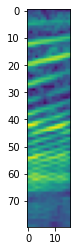

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(mel[0].numpy())

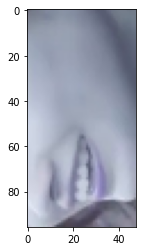

In [ ]:
plt.imshow(x[:3,:,:].transpose(0,2).numpy())


###3. Training
Use cosine_loss as loss function

In [ ]:
#Definition of loss function
logloss = nn.BCELoss() # cross entropy loss
def cosine_loss(a, v, y): #cosine similarity loss
    """
   a: output of audio_encoder
    v: output of video face_encoder
    y: true value of whether to synchronize
    """
    d = nn.functional.cosine_similarity(a, v)
    loss = logloss(d.unsqueeze(1), y)

    return loss

In [ ]:
def train(device, model, train_data_loader, test_data_loader, optimizer,
          checkpoint_dir=None, checkpoint_interval=None, nepochs=None):

    global global_step, global_epoch
    resumed_step = global_step
    
    while global_epoch < nepochs:
        running_loss = 0.
        prog_bar = tqdm(enumerate(train_data_loader))
        for step, (x, mel, y) in prog_bar:
            model.train()
            optimizer.zero_grad()

            #####TODO###########
            ####################
            
            #Complete model training
            x = x.to(device)

            mel = mel.to(device)

            a, v = model(mel, x)
            y = y.to(device)

            loss = cosine_loss(a, v, y)
            loss.backward()
            optimizer.step()
                
            

            global_step += 1
            cur_session_steps = global_step - resumed_step
            running_loss += loss.item()

            if global_step == 1 or global_step % checkpoint_interval == 0:
                save_checkpoint(
                    model, optimizer, global_step, checkpoint_dir, global_epoch)

            if global_step % hparams.syncnet_eval_interval == 0:
                with torch.no_grad():
                    eval_model(test_data_loader, global_step, device, model, checkpoint_dir)

            prog_bar.set_description('Epoch: {} Loss: {}'.format(global_epoch, running_loss / (step + 1)))

        global_epoch += 1

def eval_model(test_data_loader, global_step, device, model, checkpoint_dir):
    
    # evaluate on the test set
    eval_steps = 1400
    print('Evaluating for {} steps'.format(eval_steps))
    losses = []
    while 1:
        for step, (x, mel, y) in enumerate(test_data_loader):

            model.eval()

            # Transform data to CUDA device
            x = x.to(device)

            mel = mel.to(device)

            a, v = model(mel, x)
            y = y.to(device)

            loss = cosine_loss(a, v, y)
            losses.append(loss.item())

            if step > eval_steps: break

        averaged_loss = sum(losses) / len(losses)
        print(averaged_loss)

        return

latest_checkpoint_path = ''
def save_checkpoint(model, optimizer, step, checkpoint_dir, epoch):
    #Save the training result checkpoint
    global latest_checkpoint_path
    
    checkpoint_path = join(
        checkpoint_dir, "checkpoint_step{:09d}.pth".format(global_step))
    optimizer_state = optimizer.state_dict() if hparams.save_optimizer_state else None
    torch.save({
        "state_dict": model.state_dict(),
        "optimizer": optimizer_state,
        "global_step": step,
        "global_epoch": epoch,
    }, checkpoint_path)
    latest_checkpoint_path = checkpoint_path
    print("Saved checkpoint:", checkpoint_path)

def _load(checkpoint_path):
    if use_cuda:
        checkpoint = torch.load(checkpoint_path)
    else:
        checkpoint = torch.load(checkpoint_path,
                                map_location=lambda storage, loc: storage)
    return checkpoint

def load_checkpoint(path, model, optimizer, reset_optimizer=False):
    #Read the save information of the specified checkpoint
    global global_step
    global global_epoch

    print("Load checkpoint from: {}".format(path))
    checkpoint = _load(path)
    model.load_state_dict(checkpoint["state_dict"])
    if not reset_optimizer:
        optimizer_state = checkpoint["optimizer"]
        if optimizer_state is not None:
            print("Load optimizer state from {}".format(path))
            optimizer.load_state_dict(checkpoint["optimizer"])
    global_step = checkpoint["global_step"]
    global_epoch = checkpoint["global_epoch"]

    return model

**The training starts below. The final Loss reference value is about 0.20. At this time, the model can achieve a better discrimination effect.**

In [ ]:
#this one is for the experimented code where mp4 file are sampled to 25fps and audio files sampled to 16khz
%cd /content/drive/MyDrive/saharsh
!mkdir expert_ckpt

/content/drive/MyDrive/saharsh


In [ ]:
%cd /content/drive/MyDrive
!mkdir expert_checkpoint

/content/drive/MyDrive


In [ ]:
%cd /content/Wav2Lip

/content/Wav2Lip


In [ ]:
checkpoint_dir = "/content/drive/MyDrive/saharsh/expert_ckpt/" #Specify the location to store the checkpoint
# checkpoint_path = '/content/drive/MyDrive/expert_checkpoint/checkpoint_step000000001.pth'

# Specify the path to load the checkpoint. It is not required for the first training. If you want to resume training from a checkpoint later, you can specify it.

if not os.path.exists(checkpoint_dir): os.mkdir(checkpoint_dir)

# Dataset and Dataloader setup
train_dataset = Dataset('train')
test_dataset = Dataset('val')

############TODO#########
#####Train Dataloader and Test Dataloader 

#### For specific parameters such as bacthsize, refer to the hparams.py file
train_data_loader = data_utils.DataLoader(
    train_dataset, batch_size=hparams.batch_size, shuffle=True,
    num_workers=hparams.num_workers)

test_data_loader = data_utils.DataLoader(
    test_dataset, batch_size=hparams.batch_size,
    num_workers=8)

device = torch.device("cuda" if use_cuda else "cpu")

# Model
#####Define the SynNet model and load it on the specified device
model = SyncNet().to(device)
print('total trainable params {}'.format(sum(p.numel() for p in model.parameters() if p.requires_grad)))


####Define the optimizer, use adam, lr refer to the hparams.py file
optimizer = optim.Adam([p for p in model.parameters() if p.requires_grad],
                       lr=1e-5)

# if checkpoint_path is not None:
#     load_checkpoint(checkpoint_path, model, optimizer, reset_optimizer=True) #uncomment this when training from a last checkpoint

train(device, model, train_data_loader, test_data_loader, optimizer,
      checkpoint_dir=checkpoint_dir,
      checkpoint_interval=hparams.syncnet_checkpoint_interval,
      nepochs=10000)

total trainable params 16435072


Epoch: 0 Loss: 0.8464677631855011: : 3it [00:07,  5.05s/it]

Saved checkpoint: /content/drive/MyDrive/saharsh/expert_ckpt/checkpoint_step000000001.pth


Epoch: 0 Loss: 0.8464677631855011: : 4it [00:07,  1.90s/it]
Epoch: 1 Loss: 0.7847442626953125: : 4it [00:06,  1.54s/it]
Epoch: 2 Loss: 0.8257651031017303: : 4it [00:05,  1.33s/it]
Epoch: 3 Loss: 0.8255305588245392: : 4it [00:04,  1.13s/it]
Epoch: 4 Loss: 0.8634324818849564: : 4it [00:05,  1.39s/it]
Epoch: 5 Loss: 0.8800618350505829: : 4it [00:04,  1.16s/it]
Epoch: 6 Loss: 0.8481305539608002: : 4it [00:04,  1.07s/it]
Epoch: 7 Loss: 0.8733743876218796: : 4it [00:03,  1.11it/s]
Epoch: 8 Loss: 0.8240282535552979: : 4it [00:04,  1.06s/it]
Epoch: 9 Loss: 0.8170843571424484: : 4it [00:04,  1.07s/it]
Epoch: 10 Loss: 0.8158337473869324: : 4it [00:04,  1.15s/it]
Epoch: 11 Loss: 0.8643865287303925: : 4it [00:05,  1.27s/it]
Epoch: 12 Loss: 0.947563648223877: : 4it [00:03,  1.06it/s]
Epoch: 13 Loss: 0.8919345289468765: : 4it [00:04,  1.08s/it]
Epoch: 14 Loss: 0.8621802031993866: : 4it [00:03,  1.06it/s]
Epoch: 15 Loss: 0.7530352175235748: : 4it [00:03,  1.03it/s]
Epoch: 16 Loss: 0.8577731847763062:

Saved checkpoint: /content/drive/MyDrive/saharsh/expert_ckpt/checkpoint_step000000300.pth


Epoch: 74 Loss: 0.7944021373987198: : 4it [00:04,  1.20s/it]
Epoch: 75 Loss: 0.8708064258098602: : 4it [00:04,  1.24s/it]
Epoch: 76 Loss: 0.9015129804611206: : 4it [00:05,  1.41s/it]
Epoch: 77 Loss: 0.8077330440282822: : 4it [00:05,  1.35s/it]
Epoch: 78 Loss: 0.726432666182518: : 4it [00:04,  1.17s/it]
Epoch: 79 Loss: 0.8061682879924774: : 4it [00:04,  1.13s/it]
Epoch: 80 Loss: 0.769676685333252: : 4it [00:05,  1.33s/it]
Epoch: 81 Loss: 0.8611158430576324: : 4it [00:05,  1.35s/it]
Epoch: 82 Loss: 0.7734567224979401: : 4it [00:05,  1.31s/it]
Epoch: 83 Loss: 0.8206318467855453: : 4it [00:04,  1.08s/it]
Epoch: 84 Loss: 0.8366058468818665: : 4it [00:05,  1.31s/it]
Epoch: 85 Loss: 0.8450487107038498: : 4it [00:04,  1.04s/it]
Epoch: 86 Loss: 0.787284716963768: : 4it [00:04,  1.08s/it]
Epoch: 87 Loss: 0.7392412424087524: : 4it [00:04,  1.15s/it]
Epoch: 88 Loss: 0.8340619653463364: : 4it [00:04,  1.07s/it]
Epoch: 89 Loss: 0.6799498051404953: : 4it [00:04,  1.01s/it]
Epoch: 90 Loss: 0.791572600

Saved checkpoint: /content/drive/MyDrive/saharsh/expert_ckpt/checkpoint_step000000600.pth


Epoch: 149 Loss: 0.8295847773551941: : 4it [00:05,  1.28s/it]
Epoch: 150 Loss: 0.8285822868347168: : 4it [00:04,  1.02s/it]
Epoch: 151 Loss: 0.756346270442009: : 4it [00:03,  1.01it/s]
Epoch: 152 Loss: 0.7543901652097702: : 4it [00:05,  1.32s/it]
Epoch: 153 Loss: 0.7522948831319809: : 4it [00:04,  1.11s/it]
Epoch: 154 Loss: 0.7900627851486206: : 4it [00:04,  1.23s/it]
Epoch: 155 Loss: 0.8131033927202225: : 4it [00:04,  1.20s/it]
Epoch: 156 Loss: 0.8106688857078552: : 4it [00:05,  1.27s/it]
Epoch: 157 Loss: 0.8169948309659958: : 4it [00:03,  1.10it/s]
Epoch: 158 Loss: 0.7427096962928772: : 4it [00:04,  1.20s/it]
Epoch: 159 Loss: 0.8182012289762497: : 4it [00:04,  1.11s/it]
Epoch: 160 Loss: 0.8528552800416946: : 4it [00:04,  1.09s/it]
Epoch: 161 Loss: 0.7429206073284149: : 4it [00:04,  1.06s/it]
Epoch: 162 Loss: 0.8008849620819092: : 4it [00:04,  1.15s/it]
Epoch: 163 Loss: 0.7132140100002289: : 4it [00:04,  1.16s/it]
Epoch: 164 Loss: 0.8646048307418823: : 4it [00:04,  1.19s/it]
Epoch: 16

Saved checkpoint: /content/drive/MyDrive/saharsh/expert_ckpt/checkpoint_step000000900.pth


Epoch: 224 Loss: 0.7346968054771423: : 4it [00:04,  1.11s/it]
Epoch: 225 Loss: 0.7835832834243774: : 4it [00:04,  1.01s/it]
Epoch: 226 Loss: 0.6675304919481277: : 4it [00:04,  1.03s/it]
Epoch: 227 Loss: 0.7189378142356873: : 4it [00:04,  1.23s/it]
Epoch: 228 Loss: 0.6873316913843155: : 4it [00:04,  1.23s/it]
Epoch: 229 Loss: 0.7892796546220779: : 4it [00:04,  1.14s/it]
Epoch: 230 Loss: 0.825348749756813: : 4it [00:04,  1.09s/it]
Epoch: 231 Loss: 0.7080011665821075: : 4it [00:04,  1.23s/it]
Epoch: 232 Loss: 0.7362871170043945: : 4it [00:04,  1.08s/it]
Epoch: 233 Loss: 0.7627763003110886: : 4it [00:04,  1.09s/it]
Epoch: 234 Loss: 0.75051149725914: : 4it [00:05,  1.27s/it]
Epoch: 235 Loss: 0.7436530739068985: : 4it [00:04,  1.08s/it]
Epoch: 236 Loss: 0.7008388191461563: : 4it [00:04,  1.13s/it]
Epoch: 237 Loss: 0.7177949845790863: : 4it [00:04,  1.03s/it]
Epoch: 238 Loss: 0.7757543474435806: : 4it [00:04,  1.17s/it]
Epoch: 239 Loss: 0.6813657134771347: : 4it [00:04,  1.07s/it]
Epoch: 240 

Evaluating for 1400 steps


Epoch: 249 Loss: 0.7239991873502731: : 4it [00:04,  1.94s/it]

0.31915947794914246


Epoch: 249 Loss: 0.7239991873502731: : 4it [00:04,  1.21s/it]
Epoch: 250 Loss: 0.7056350260972977: : 4it [00:03,  1.04it/s]
Epoch: 251 Loss: 0.7620161771774292: : 4it [00:04,  1.10s/it]
Epoch: 252 Loss: 0.7339136451482773: : 4it [00:03,  1.03it/s]
Epoch: 253 Loss: 0.7499519288539886: : 4it [00:04,  1.07s/it]
Epoch: 254 Loss: 0.6951864957809448: : 4it [00:04,  1.20s/it]
Epoch: 255 Loss: 0.7435035556554794: : 4it [00:04,  1.11s/it]
Epoch: 256 Loss: 0.7008076906204224: : 4it [00:04,  1.11s/it]
Epoch: 257 Loss: 0.7387724369764328: : 4it [00:04,  1.17s/it]
Epoch: 258 Loss: 0.7192421108484268: : 4it [00:04,  1.07s/it]
Epoch: 259 Loss: 0.7396899610757828: : 4it [00:04,  1.07s/it]
Epoch: 260 Loss: 0.697576567530632: : 4it [00:04,  1.08s/it]
Epoch: 261 Loss: 0.7226815521717072: : 4it [00:04,  1.06s/it]
Epoch: 262 Loss: 0.7024131268262863: : 4it [00:04,  1.06s/it]
Epoch: 263 Loss: 0.7538063526153564: : 4it [00:04,  1.07s/it]
Epoch: 264 Loss: 0.719891220331192: : 4it [00:04,  1.15s/it]
Epoch: 265

Saved checkpoint: /content/drive/MyDrive/saharsh/expert_ckpt/checkpoint_step000001200.pth


Epoch: 299 Loss: 0.7956812530755997: : 4it [00:05,  1.37s/it]
Epoch: 300 Loss: 0.7158957123756409: : 4it [00:04,  1.08s/it]
Epoch: 301 Loss: 0.7265287190675735: : 4it [00:05,  1.31s/it]
Epoch: 302 Loss: 0.715341106057167: : 4it [00:04,  1.12s/it]
Epoch: 303 Loss: 0.6634929329156876: : 4it [00:04,  1.15s/it]
Epoch: 304 Loss: 0.764244556427002: : 4it [00:04,  1.09s/it]
Epoch: 305 Loss: 0.72348253428936: : 4it [00:04,  1.06s/it]
Epoch: 306 Loss: 0.8020305335521698: : 4it [00:04,  1.11s/it]
Epoch: 307 Loss: 0.69995978474617: : 4it [00:04,  1.01s/it]
Epoch: 308 Loss: 0.7641992568969727: : 4it [00:04,  1.04s/it]
Epoch: 309 Loss: 0.7657590210437775: : 4it [00:04,  1.22s/it]
Epoch: 310 Loss: 0.6371690928936005: : 4it [00:04,  1.09s/it]
Epoch: 311 Loss: 0.7104961425065994: : 4it [00:04,  1.12s/it]
Epoch: 312 Loss: 0.7647426128387451: : 4it [00:04,  1.08s/it]
Epoch: 313 Loss: 0.7250898480415344: : 4it [00:04,  1.05s/it]
Epoch: 314 Loss: 0.7673501968383789: : 4it [00:04,  1.13s/it]
Epoch: 315 Los

Saved checkpoint: /content/drive/MyDrive/saharsh/expert_ckpt/checkpoint_step000001500.pth


Epoch: 374 Loss: 0.7205377370119095: : 4it [00:05,  1.28s/it]
Epoch: 375 Loss: 0.6596725881099701: : 4it [00:04,  1.14s/it]
Epoch: 376 Loss: 0.6379753947257996: : 4it [00:05,  1.27s/it]
Epoch: 377 Loss: 0.7149526625871658: : 4it [00:04,  1.24s/it]
Epoch: 378 Loss: 0.750764861702919: : 4it [00:04,  1.14s/it]
Epoch: 379 Loss: 0.7732902318239212: : 4it [00:04,  1.23s/it]
Epoch: 380 Loss: 0.7249417454004288: : 4it [00:04,  1.09s/it]
Epoch: 381 Loss: 0.7399303913116455: : 4it [00:04,  1.24s/it]
Epoch: 382 Loss: 0.7008027285337448: : 4it [00:04,  1.10s/it]
Epoch: 383 Loss: 0.70506352186203: : 4it [00:03,  1.02it/s]
Epoch: 384 Loss: 0.7092390954494476: : 4it [00:03,  1.00it/s]
Epoch: 385 Loss: 0.7096255570650101: : 4it [00:04,  1.11s/it]
Epoch: 386 Loss: 0.6618325412273407: : 4it [00:04,  1.10s/it]
Epoch: 387 Loss: 0.6659582704305649: : 4it [00:04,  1.21s/it]
Epoch: 388 Loss: 0.6976702213287354: : 4it [00:04,  1.11s/it]
Epoch: 389 Loss: 0.7457756251096725: : 4it [00:04,  1.15s/it]
Epoch: 390 

Saved checkpoint: /content/drive/MyDrive/saharsh/expert_ckpt/checkpoint_step000001800.pth


Epoch: 449 Loss: 0.6838232129812241: : 4it [00:05,  1.26s/it]
Epoch: 450 Loss: 0.6994073539972305: : 4it [00:04,  1.18s/it]
Epoch: 451 Loss: 0.742466613650322: : 4it [00:05,  1.26s/it]
Epoch: 452 Loss: 0.696117952466011: : 4it [00:03,  1.02it/s]
Epoch: 453 Loss: 0.6802670061588287: : 4it [00:04,  1.22s/it]
Epoch: 454 Loss: 0.707856684923172: : 4it [00:05,  1.46s/it]
Epoch: 455 Loss: 0.6762621253728867: : 4it [00:04,  1.18s/it]
Epoch: 456 Loss: 0.6861131489276886: : 4it [00:04,  1.05s/it]
Epoch: 457 Loss: 0.7273329049348831: : 4it [00:05,  1.37s/it]
Epoch: 458 Loss: 0.6799282133579254: : 4it [00:04,  1.03s/it]
Epoch: 459 Loss: 0.7125231027603149: : 4it [00:04,  1.13s/it]
Epoch: 460 Loss: 0.7084528654813766: : 4it [00:04,  1.13s/it]
Epoch: 461 Loss: 0.7036862820386887: : 4it [00:04,  1.24s/it]
Epoch: 462 Loss: 0.7206706702709198: : 4it [00:03,  1.01it/s]
Epoch: 463 Loss: 0.6872040182352066: : 4it [00:04,  1.14s/it]
Epoch: 464 Loss: 0.7077142894268036: : 4it [00:04,  1.20s/it]
Epoch: 465 

Evaluating for 1400 steps


Epoch: 499 Loss: 0.6706585884094238: : 4it [00:04,  2.21s/it]

0.3216399550437927


Epoch: 499 Loss: 0.6706585884094238: : 4it [00:05,  1.29s/it]
Epoch: 500 Loss: 0.6871636509895325: : 4it [00:04,  1.15s/it]
Epoch: 501 Loss: 0.7098558992147446: : 4it [00:04,  1.03s/it]
Epoch: 502 Loss: 0.7147693336009979: : 4it [00:04,  1.06s/it]
Epoch: 503 Loss: 0.6955271065235138: : 4it [00:04,  1.10s/it]
Epoch: 504 Loss: 0.741076335310936: : 4it [00:04,  1.13s/it]
Epoch: 505 Loss: 0.6744334846735001: : 4it [00:05,  1.27s/it]
Epoch: 506 Loss: 0.7074083834886551: : 4it [00:04,  1.02s/it]
Epoch: 507 Loss: 0.6867586821317673: : 4it [00:04,  1.09s/it]
Epoch: 508 Loss: 0.7309719324111938: : 4it [00:04,  1.07s/it]
Epoch: 509 Loss: 0.6576866805553436: : 4it [00:04,  1.16s/it]
Epoch: 510 Loss: 0.6864919364452362: : 4it [00:04,  1.12s/it]
Epoch: 511 Loss: 0.663997158408165: : 4it [00:04,  1.08s/it]
Epoch: 512 Loss: 0.7540391832590103: : 4it [00:04,  1.16s/it]
Epoch: 513 Loss: 0.6998169124126434: : 4it [00:04,  1.07s/it]
Epoch: 514 Loss: 0.7071274518966675: : 4it [00:04,  1.17s/it]
Epoch: 515

Saved checkpoint: /content/drive/MyDrive/saharsh/expert_ckpt/checkpoint_step000002100.pth


Epoch: 524 Loss: 0.7072422206401825: : 4it [00:04,  1.21s/it]
Epoch: 525 Loss: 0.6766576617956161: : 4it [00:03,  1.07it/s]
Epoch: 526 Loss: 0.6922001242637634: : 4it [00:05,  1.33s/it]
Epoch: 527 Loss: 0.6867096573114395: : 4it [00:05,  1.26s/it]
Epoch: 528 Loss: 0.6863602995872498: : 4it [00:04,  1.01s/it]
Epoch: 529 Loss: 0.6962117701768875: : 4it [00:04,  1.10s/it]
Epoch: 530 Loss: 0.6754327714443207: : 4it [00:04,  1.10s/it]
Epoch: 531 Loss: 0.6881740689277649: : 4it [00:04,  1.07s/it]
Epoch: 532 Loss: 0.7059009969234467: : 4it [00:04,  1.08s/it]
Epoch: 533 Loss: 0.6639445424079895: : 4it [00:04,  1.22s/it]
Epoch: 534 Loss: 0.7577691376209259: : 4it [00:04,  1.17s/it]
Epoch: 535 Loss: 0.658912718296051: : 4it [00:04,  1.18s/it]
Epoch: 536 Loss: 0.7130528688430786: : 4it [00:04,  1.03s/it]
Epoch: 537 Loss: 0.7215767353773117: : 4it [00:04,  1.03s/it]
Epoch: 538 Loss: 0.688406229019165: : 4it [00:04,  1.14s/it]
Epoch: 539 Loss: 0.7275051921606064: : 4it [00:04,  1.15s/it]
Epoch: 540

Saved checkpoint: /content/drive/MyDrive/saharsh/expert_ckpt/checkpoint_step000002400.pth


Epoch: 599 Loss: 0.7544863373041153: : 4it [00:04,  1.19s/it]
Epoch: 600 Loss: 0.6486834585666656: : 4it [00:04,  1.10s/it]
Epoch: 601 Loss: 0.6972495466470718: : 4it [00:05,  1.36s/it]
Epoch: 602 Loss: 0.7057849764823914: : 4it [00:04,  1.01s/it]
Epoch: 603 Loss: 0.7078690677881241: : 4it [00:04,  1.04s/it]
Epoch: 604 Loss: 0.690243199467659: : 4it [00:04,  1.19s/it]
Epoch: 605 Loss: 0.7102394849061966: : 4it [00:04,  1.04s/it]
Epoch: 606 Loss: 0.6939892172813416: : 4it [00:04,  1.04s/it]
Epoch: 607 Loss: 0.724351704120636: : 4it [00:05,  1.25s/it]
Epoch: 608 Loss: 0.6935677379369736: : 4it [00:04,  1.20s/it]
Epoch: 609 Loss: 0.722065880894661: : 4it [00:04,  1.12s/it]
Epoch: 610 Loss: 0.7355104833841324: : 4it [00:04,  1.03s/it]
Epoch: 611 Loss: 0.698179692029953: : 4it [00:04,  1.20s/it]
Epoch: 612 Loss: 0.70701964199543: : 4it [00:04,  1.03s/it]
Epoch: 613 Loss: 0.6994718760251999: : 4it [00:05,  1.28s/it]
Epoch: 614 Loss: 0.695441484451294: : 4it [00:04,  1.06s/it]
Epoch: 615 Loss

Saved checkpoint: /content/drive/MyDrive/saharsh/expert_ckpt/checkpoint_step000002700.pth


Epoch: 674 Loss: 0.7028391063213348: : 4it [00:05,  1.29s/it]
Epoch: 675 Loss: 0.7338949143886566: : 4it [00:04,  1.14s/it]
Epoch: 676 Loss: 0.6669774949550629: : 4it [00:05,  1.43s/it]
Epoch: 677 Loss: 0.668325811624527: : 4it [00:04,  1.20s/it]
Epoch: 678 Loss: 0.667607843875885: : 4it [00:03,  1.04it/s]
Epoch: 679 Loss: 0.6625859141349792: : 4it [00:04,  1.06s/it]
Epoch: 680 Loss: 0.6795265823602676: : 4it [00:05,  1.41s/it]
Epoch: 681 Loss: 0.69085992872715: : 4it [00:04,  1.08s/it]
Epoch: 682 Loss: 0.7093435823917389: : 4it [00:04,  1.20s/it]
Epoch: 683 Loss: 0.6964983195066452: : 4it [00:04,  1.01s/it]
Epoch: 684 Loss: 0.6282725483179092: : 4it [00:04,  1.05s/it]
Epoch: 685 Loss: 0.686113715171814: : 4it [00:04,  1.16s/it]
Epoch: 686 Loss: 0.6922517567873001: : 4it [00:05,  1.35s/it]
Epoch: 687 Loss: 0.6986399441957474: : 4it [00:04,  1.09s/it]
Epoch: 688 Loss: 0.7432188540697098: : 4it [00:04,  1.09s/it]
Epoch: 689 Loss: 0.6987986713647842: : 4it [00:04,  1.13s/it]
Epoch: 690 Lo

Saved checkpoint: /content/drive/MyDrive/saharsh/expert_ckpt/checkpoint_step000003000.pth
Evaluating for 1400 steps


Epoch: 749 Loss: 0.6609090864658356: : 4it [00:05,  2.64s/it]

0.5985854864120483


Epoch: 749 Loss: 0.6609090864658356: : 4it [00:05,  1.39s/it]
Epoch: 750 Loss: 0.705423042178154: : 4it [00:04,  1.13s/it]
Epoch: 751 Loss: 0.7132232338190079: : 4it [00:04,  1.17s/it]
Epoch: 752 Loss: 0.74077208340168: : 4it [00:04,  1.16s/it]
Epoch: 753 Loss: 0.7255763560533524: : 4it [00:04,  1.10s/it]
Epoch: 754 Loss: 0.6958654373884201: : 4it [00:04,  1.23s/it]
Epoch: 755 Loss: 0.6874275356531143: : 4it [00:04,  1.12s/it]
Epoch: 756 Loss: 0.708439290523529: : 4it [00:04,  1.14s/it]
Epoch: 757 Loss: 0.7132719904184341: : 4it [00:04,  1.10s/it]
Epoch: 758 Loss: 0.673477441072464: : 4it [00:04,  1.13s/it]
Epoch: 759 Loss: 0.6896404772996902: : 4it [00:04,  1.09s/it]
Epoch: 760 Loss: 0.6990120559930801: : 4it [00:04,  1.01s/it]
Epoch: 761 Loss: 0.7119607031345367: : 4it [00:04,  1.08s/it]
Epoch: 762 Loss: 0.7086606472730637: : 4it [00:05,  1.28s/it]
Epoch: 763 Loss: 0.7013192772865295: : 4it [00:04,  1.07s/it]
Epoch: 764 Loss: 0.7134452164173126: : 4it [00:04,  1.23s/it]
Epoch: 765 Lo

Saved checkpoint: /content/drive/MyDrive/saharsh/expert_ckpt/checkpoint_step000003300.pth


Epoch: 824 Loss: 0.6905861496925354: : 4it [00:04,  1.05s/it]
Epoch: 825 Loss: 0.6775574386119843: : 4it [00:04,  1.10s/it]
Epoch: 826 Loss: 0.708508312702179: : 4it [00:04,  1.12s/it]
Epoch: 827 Loss: 0.6969164162874222: : 4it [00:04,  1.18s/it]
Epoch: 828 Loss: 0.6822686791419983: : 4it [00:04,  1.17s/it]
Epoch: 829 Loss: 0.7087671458721161: : 4it [00:06,  1.54s/it]
Epoch: 830 Loss: 0.7203534990549088: : 4it [00:04,  1.04s/it]
Epoch: 831 Loss: 0.6981030255556107: : 4it [00:04,  1.07s/it]
Epoch: 832 Loss: 0.6748601794242859: : 4it [00:04,  1.22s/it]
Epoch: 833 Loss: 0.6731350421905518: : 4it [00:04,  1.16s/it]
Epoch: 834 Loss: 0.6793299615383148: : 4it [00:04,  1.00s/it]
Epoch: 835 Loss: 0.6878797709941864: : 4it [00:04,  1.17s/it]
Epoch: 836 Loss: 0.6837731003761292: : 4it [00:04,  1.12s/it]
Epoch: 837 Loss: 0.7207142114639282: : 4it [00:04,  1.07s/it]
Epoch: 838 Loss: 0.6839195489883423: : 4it [00:04,  1.00s/it]
Epoch: 839 Loss: 0.6638159304857254: : 4it [00:04,  1.19s/it]
Epoch: 84

Saved checkpoint: /content/drive/MyDrive/saharsh/expert_ckpt/checkpoint_step000003600.pth


Epoch: 899 Loss: 0.7077580392360687: : 4it [00:04,  1.22s/it]
Epoch: 900 Loss: 0.6797280311584473: : 4it [00:04,  1.10s/it]
Epoch: 901 Loss: 0.6830431073904037: : 4it [00:05,  1.31s/it]
Epoch: 902 Loss: 0.7123719155788422: : 4it [00:04,  1.21s/it]
Epoch: 903 Loss: 0.6839896440505981: : 4it [00:04,  1.10s/it]
Epoch: 904 Loss: 0.6808085739612579: : 4it [00:04,  1.09s/it]
Epoch: 905 Loss: 0.7202489525079727: : 4it [00:04,  1.16s/it]
Epoch: 906 Loss: 0.687460258603096: : 4it [00:04,  1.08s/it]
Epoch: 907 Loss: 0.7401460409164429: : 4it [00:04,  1.03s/it]
Epoch: 908 Loss: 0.715178906917572: : 4it [00:04,  1.02s/it]
Epoch: 909 Loss: 0.7021678239107132: : 4it [00:04,  1.11s/it]
Epoch: 910 Loss: 0.7064225673675537: : 4it [00:04,  1.22s/it]
Epoch: 911 Loss: 0.6799311488866806: : 4it [00:03,  1.01it/s]
Epoch: 912 Loss: 0.6756112724542618: : 4it [00:04,  1.01s/it]
Epoch: 913 Loss: 0.6856165379285812: : 4it [00:03,  1.04it/s]
Epoch: 914 Loss: 0.6999839395284653: : 4it [00:04,  1.17s/it]
Epoch: 915

Saved checkpoint: /content/drive/MyDrive/saharsh/expert_ckpt/checkpoint_step000003900.pth


Epoch: 974 Loss: 0.69449083507061: : 4it [00:04,  1.24s/it]
Epoch: 975 Loss: 0.6981691718101501: : 4it [00:04,  1.05s/it]
Epoch: 976 Loss: 0.6738535463809967: : 4it [00:05,  1.38s/it]
Epoch: 977 Loss: 0.6969986259937286: : 4it [00:04,  1.17s/it]
Epoch: 978 Loss: 0.6831667721271515: : 4it [00:04,  1.08s/it]
Epoch: 979 Loss: 0.6696514934301376: : 4it [00:04,  1.19s/it]
Epoch: 980 Loss: 0.6914174258708954: : 4it [00:04,  1.05s/it]
Epoch: 981 Loss: 0.7046742886304855: : 4it [00:04,  1.09s/it]
Epoch: 982 Loss: 0.7012124508619308: : 4it [00:04,  1.19s/it]
Epoch: 983 Loss: 0.6878803670406342: : 4it [00:03,  1.04it/s]
Epoch: 984 Loss: 0.6912997514009476: : 4it [00:04,  1.09s/it]
Epoch: 985 Loss: 0.7050974667072296: : 4it [00:04,  1.13s/it]
Epoch: 986 Loss: 0.6525329649448395: : 4it [00:04,  1.10s/it]
Epoch: 987 Loss: 0.7018781900405884: : 4it [00:04,  1.11s/it]
Epoch: 988 Loss: 0.6824800372123718: : 4it [00:04,  1.10s/it]
Epoch: 989 Loss: 0.6945837289094925: : 4it [00:04,  1.12s/it]
Epoch: 990

Evaluating for 1400 steps


Epoch: 999 Loss: 0.6921789646148682: : 4it [00:04,  2.89s/it]

0.49586236476898193


Epoch: 999 Loss: 0.6921789646148682: : 4it [00:05,  1.30s/it]
Epoch: 1000 Loss: 0.6699258983135223: : 4it [00:05,  1.36s/it]
Epoch: 1001 Loss: 0.6843466907739639: : 4it [00:04,  1.18s/it]
Epoch: 1002 Loss: 0.6825389266014099: : 4it [00:04,  1.13s/it]
Epoch: 1003 Loss: 0.7131481170654297: : 4it [00:04,  1.21s/it]
Epoch: 1004 Loss: 0.6806978136301041: : 4it [00:04,  1.11s/it]
Epoch: 1005 Loss: 0.6503608375787735: : 4it [00:04,  1.12s/it]
Epoch: 1006 Loss: 0.6987359672784805: : 4it [00:04,  1.17s/it]
Epoch: 1007 Loss: 0.6953517496585846: : 4it [00:04,  1.01s/it]
Epoch: 1008 Loss: 0.6965433359146118: : 4it [00:04,  1.10s/it]
Epoch: 1009 Loss: 0.6545765548944473: : 4it [00:04,  1.03s/it]
Epoch: 1010 Loss: 0.6864463984966278: : 4it [00:05,  1.25s/it]
Epoch: 1011 Loss: 0.698739305138588: : 4it [00:04,  1.14s/it]
Epoch: 1012 Loss: 0.7079311311244965: : 4it [00:04,  1.03s/it]
Epoch: 1013 Loss: 0.7399735301733017: : 4it [00:03,  1.01it/s]
Epoch: 1014 Loss: 0.7068881094455719: : 4it [00:04,  1.12

Saved checkpoint: /content/drive/MyDrive/saharsh/expert_ckpt/checkpoint_step000004200.pth


Epoch: 1049 Loss: 0.6622966378927231: : 4it [00:04,  1.22s/it]
Epoch: 1050 Loss: 0.673856645822525: : 4it [00:04,  1.06s/it]
Epoch: 1051 Loss: 0.6679389923810959: : 4it [00:04,  1.17s/it]
Epoch: 1052 Loss: 0.6708993464708328: : 4it [00:04,  1.06s/it]
Epoch: 1053 Loss: 0.649188682436943: : 4it [00:04,  1.06s/it]
Epoch: 1054 Loss: 0.6731442213058472: : 4it [00:03,  1.04it/s]
Epoch: 1055 Loss: 0.6975289285182953: : 4it [00:04,  1.10s/it]
Epoch: 1056 Loss: 0.7032537162303925: : 4it [00:05,  1.26s/it]
Epoch: 1057 Loss: 0.698708564043045: : 4it [00:04,  1.12s/it]
Epoch: 1058 Loss: 0.699024111032486: : 4it [00:03,  1.00it/s]
Epoch: 1059 Loss: 0.6546496897935867: : 4it [00:03,  1.03it/s]
Epoch: 1060 Loss: 0.6920564621686935: : 4it [00:04,  1.15s/it]
Epoch: 1061 Loss: 0.6550524979829788: : 4it [00:03,  1.01it/s]
Epoch: 1062 Loss: 0.6947040259838104: : 4it [00:04,  1.09s/it]
Epoch: 1063 Loss: 0.7410882115364075: : 4it [00:04,  1.17s/it]
Epoch: 1064 Loss: 0.6742248982191086: : 4it [00:04,  1.06s/

Saved checkpoint: /content/drive/MyDrive/saharsh/expert_ckpt/checkpoint_step000004500.pth


Epoch: 1124 Loss: 0.6711711585521698: : 4it [00:05,  1.28s/it]
Epoch: 1125 Loss: 0.703733816742897: : 4it [00:04,  1.11s/it]
Epoch: 1126 Loss: 0.6849467307329178: : 4it [00:05,  1.31s/it]
Epoch: 1127 Loss: 0.6860175579786301: : 4it [00:04,  1.09s/it]
Epoch: 1128 Loss: 0.6719871908426285: : 4it [00:04,  1.18s/it]
Epoch: 1129 Loss: 0.71864815056324: : 4it [00:04,  1.12s/it]
Epoch: 1130 Loss: 0.6934719532728195: : 4it [00:04,  1.10s/it]
Epoch: 1131 Loss: 0.6666030585765839: : 4it [00:04,  1.15s/it]
Epoch: 1132 Loss: 0.6695283651351929: : 4it [00:03,  1.03it/s]
Epoch: 1133 Loss: 0.6511637419462204: : 4it [00:04,  1.15s/it]
Epoch: 1134 Loss: 0.6720611453056335: : 4it [00:04,  1.07s/it]
Epoch: 1135 Loss: 0.7052115947008133: : 4it [00:04,  1.02s/it]
Epoch: 1136 Loss: 0.7020397931337357: : 4it [00:03,  1.05it/s]
Epoch: 1137 Loss: 0.682407408952713: : 4it [00:04,  1.11s/it]
Epoch: 1138 Loss: 0.7048981338739395: : 4it [00:04,  1.20s/it]
Epoch: 1139 Loss: 0.6678336262702942: : 4it [00:03,  1.07it

Saved checkpoint: /content/drive/MyDrive/saharsh/expert_ckpt/checkpoint_step000004800.pth


Epoch: 1199 Loss: 0.686314195394516: : 4it [00:04,  1.22s/it]
Epoch: 1200 Loss: 0.6844135969877243: : 4it [00:04,  1.15s/it]
Epoch: 1201 Loss: 0.6873707324266434: : 4it [00:05,  1.30s/it]
Epoch: 1202 Loss: 0.6938043385744095: : 4it [00:04,  1.11s/it]
Epoch: 1203 Loss: 0.6551467031240463: : 4it [00:05,  1.28s/it]
Epoch: 1204 Loss: 0.6861571222543716: : 4it [00:04,  1.11s/it]
Epoch: 1205 Loss: 0.6705051362514496: : 4it [00:04,  1.04s/it]
Epoch: 1206 Loss: 0.7278639376163483: : 4it [00:04,  1.14s/it]
Epoch: 1207 Loss: 0.6560932099819183: : 4it [00:04,  1.20s/it]
Epoch: 1208 Loss: 0.7252694219350815: : 4it [00:03,  1.01it/s]
Epoch: 1209 Loss: 0.7210568934679031: : 4it [00:04,  1.20s/it]
Epoch: 1210 Loss: 0.6695676445960999: : 4it [00:04,  1.19s/it]
Epoch: 1211 Loss: 0.6763962507247925: : 4it [00:04,  1.14s/it]
Epoch: 1212 Loss: 0.6933182626962662: : 4it [00:04,  1.18s/it]
Epoch: 1213 Loss: 0.6678487807512283: : 4it [00:04,  1.15s/it]
Epoch: 1214 Loss: 0.7096030861139297: : 4it [00:04,  1.1

Evaluating for 1400 steps


Epoch: 1249 Loss: 0.6979227513074875: : 4it [00:04,  2.19s/it]

0.9943783283233643


Epoch: 1249 Loss: 0.6979227513074875: : 4it [00:05,  1.31s/it]
Epoch: 1250 Loss: 0.7001851350069046: : 4it [00:04,  1.05s/it]
Epoch: 1251 Loss: 0.683028444647789: : 4it [00:04,  1.15s/it]
Epoch: 1252 Loss: 0.7210544049739838: : 4it [00:04,  1.05s/it]
Epoch: 1253 Loss: 0.711067259311676: : 4it [00:04,  1.06s/it]
Epoch: 1254 Loss: 0.6618935316801071: : 4it [00:04,  1.22s/it]
Epoch: 1255 Loss: 0.7362864017486572: : 4it [00:04,  1.23s/it]
Epoch: 1256 Loss: 0.6808849424123764: : 4it [00:04,  1.08s/it]
Epoch: 1257 Loss: 0.6664224863052368: : 4it [00:04,  1.13s/it]
Epoch: 1258 Loss: 0.7161336541175842: : 4it [00:04,  1.06s/it]
Epoch: 1259 Loss: 0.7082478702068329: : 4it [00:03,  1.00it/s]
Epoch: 1260 Loss: 0.719304546713829: : 4it [00:03,  1.06it/s]
Epoch: 1261 Loss: 0.7144703269004822: : 4it [00:04,  1.21s/it]
Epoch: 1262 Loss: 0.6908843666315079: : 4it [00:04,  1.12s/it]
Epoch: 1263 Loss: 0.684479832649231: : 4it [00:04,  1.17s/it]
Epoch: 1264 Loss: 0.6461647897958755: : 4it [00:04,  1.02s/

Saved checkpoint: /content/drive/MyDrive/saharsh/expert_ckpt/checkpoint_step000005100.pth


Epoch: 1274 Loss: 0.7000367492437363: : 4it [00:05,  1.48s/it]
Epoch: 1275 Loss: 0.6559146642684937: : 4it [00:04,  1.00s/it]
Epoch: 1276 Loss: 0.6773778647184372: : 4it [00:04,  1.21s/it]
Epoch: 1277 Loss: 0.6687899976968765: : 4it [00:05,  1.32s/it]
Epoch: 1278 Loss: 0.6832514554262161: : 4it [00:04,  1.14s/it]
Epoch: 1279 Loss: 0.6622854322195053: : 4it [00:04,  1.23s/it]
Epoch: 1280 Loss: 0.6933390498161316: : 4it [00:04,  1.03s/it]
Epoch: 1281 Loss: 0.6662522554397583: : 4it [00:04,  1.21s/it]
Epoch: 1282 Loss: 0.7118573486804962: : 4it [00:04,  1.06s/it]
Epoch: 1283 Loss: 0.6657057553529739: : 4it [00:04,  1.09s/it]
Epoch: 1284 Loss: 0.6757742464542389: : 4it [00:04,  1.13s/it]
Epoch: 1285 Loss: 0.6966995745897293: : 4it [00:04,  1.19s/it]
Epoch: 1286 Loss: 0.6962123960256577: : 4it [00:04,  1.15s/it]
Epoch: 1287 Loss: 0.6325033903121948: : 4it [00:04,  1.04s/it]
Epoch: 1288 Loss: 0.6635920703411102: : 4it [00:03,  1.01it/s]
Epoch: 1289 Loss: 0.7003852277994156: : 4it [00:04,  1.

Saved checkpoint: /content/drive/MyDrive/saharsh/expert_ckpt/checkpoint_step000005400.pth


Epoch: 1349 Loss: 0.6229750216007233: : 4it [00:05,  1.33s/it]
Epoch: 1350 Loss: 0.6865090280771255: : 4it [00:04,  1.15s/it]
Epoch: 1351 Loss: 0.6769980639219284: : 4it [00:04,  1.12s/it]
Epoch: 1352 Loss: 0.6870399713516235: : 4it [00:05,  1.32s/it]
Epoch: 1353 Loss: 0.7130602300167084: : 4it [00:04,  1.21s/it]
Epoch: 1354 Loss: 0.6755286753177643: : 4it [00:04,  1.17s/it]
Epoch: 1355 Loss: 0.7011995017528534: : 4it [00:05,  1.47s/it]
Epoch: 1356 Loss: 0.6786323487758636: : 4it [00:04,  1.15s/it]
Epoch: 1357 Loss: 0.6589623987674713: : 4it [00:04,  1.02s/it]
Epoch: 1358 Loss: 0.693261593580246: : 4it [00:04,  1.13s/it]
Epoch: 1359 Loss: 0.6500530242919922: : 4it [00:04,  1.13s/it]
Epoch: 1360 Loss: 0.6776129305362701: : 4it [00:04,  1.06s/it]
Epoch: 1361 Loss: 0.659855917096138: : 4it [00:05,  1.33s/it]
Epoch: 1362 Loss: 0.6797695308923721: : 4it [00:04,  1.14s/it]
Epoch: 1363 Loss: 0.7038038372993469: : 4it [00:04,  1.13s/it]
Epoch: 1364 Loss: 0.6559374183416367: : 4it [00:04,  1.21

Saved checkpoint: /content/drive/MyDrive/saharsh/expert_ckpt/checkpoint_step000005700.pth


Epoch: 1424 Loss: 0.7269678860902786: : 4it [00:04,  1.19s/it]
Epoch: 1425 Loss: 0.6635385006666183: : 4it [00:04,  1.16s/it]
Epoch: 1426 Loss: 0.6734553575515747: : 4it [00:05,  1.28s/it]
Epoch: 1427 Loss: 0.7263658195734024: : 4it [00:04,  1.10s/it]
Epoch: 1428 Loss: 0.6889951974153519: : 4it [00:04,  1.05s/it]
Epoch: 1429 Loss: 0.645164743065834: : 4it [00:04,  1.02s/it]
Epoch: 1430 Loss: 0.6686871200799942: : 4it [00:05,  1.32s/it]
Epoch: 1431 Loss: 0.6882130652666092: : 4it [00:04,  1.09s/it]
Epoch: 1432 Loss: 0.7078779488801956: : 4it [00:04,  1.10s/it]
Epoch: 1433 Loss: 0.6447737962007523: : 4it [00:04,  1.06s/it]
Epoch: 1434 Loss: 0.6767260581254959: : 4it [00:03,  1.09it/s]
Epoch: 1435 Loss: 0.6610854268074036: : 4it [00:04,  1.10s/it]
Epoch: 1436 Loss: 0.6828753799200058: : 4it [00:05,  1.38s/it]
Epoch: 1437 Loss: 0.6787706613540649: : 4it [00:04,  1.02s/it]
Epoch: 1438 Loss: 0.665193185210228: : 4it [00:04,  1.08s/it]
Epoch: 1439 Loss: 0.6795787811279297: : 4it [00:03,  1.03

Saved checkpoint: /content/drive/MyDrive/saharsh/expert_ckpt/checkpoint_step000006000.pth
Evaluating for 1400 steps


Epoch: 1499 Loss: 0.6801376342773438: : 4it [00:05,  2.50s/it]

0.7211593985557556


Epoch: 1499 Loss: 0.6801376342773438: : 4it [00:06,  1.54s/it]
Epoch: 1500 Loss: 0.6632500886917114: : 4it [00:04,  1.11s/it]
Epoch: 1501 Loss: 0.6967294067144394: : 4it [00:05,  1.30s/it]
Epoch: 1502 Loss: 0.726477786898613: : 4it [00:04,  1.19s/it]
Epoch: 1503 Loss: 0.7161271125078201: : 4it [00:04,  1.04s/it]
Epoch: 1504 Loss: 0.6776780188083649: : 4it [00:04,  1.17s/it]
Epoch: 1505 Loss: 0.6784660369157791: : 4it [00:03,  1.04it/s]
Epoch: 1506 Loss: 0.6740530133247375: : 4it [00:04,  1.14s/it]
Epoch: 1507 Loss: 0.6346908807754517: : 4it [00:05,  1.30s/it]
Epoch: 1508 Loss: 0.7236054539680481: : 4it [00:04,  1.06s/it]
Epoch: 1509 Loss: 0.7086931467056274: : 4it [00:04,  1.19s/it]
Epoch: 1510 Loss: 0.7144425213336945: : 4it [00:04,  1.02s/it]
Epoch: 1511 Loss: 0.6728098541498184: : 4it [00:04,  1.04s/it]
Epoch: 1512 Loss: 0.7301065474748611: : 4it [00:05,  1.28s/it]
Epoch: 1513 Loss: 0.6776822358369827: : 4it [00:04,  1.13s/it]
Epoch: 1514 Loss: 0.6772041320800781: : 4it [00:04,  1.1

Saved checkpoint: /content/drive/MyDrive/saharsh/expert_ckpt/checkpoint_step000006300.pth


Epoch: 1574 Loss: 0.67982317507267: : 4it [00:05,  1.26s/it]
Epoch: 1575 Loss: 0.6767064779996872: : 4it [00:03,  1.02it/s]
Epoch: 1576 Loss: 0.685487911105156: : 4it [00:04,  1.15s/it]
Epoch: 1577 Loss: 0.7217473983764648: : 4it [00:05,  1.29s/it]
Epoch: 1578 Loss: 0.6774201542139053: : 4it [00:04,  1.07s/it]
Epoch: 1579 Loss: 0.7028093487024307: : 4it [00:04,  1.05s/it]
Epoch: 1580 Loss: 0.6300590634346008: : 4it [00:04,  1.12s/it]
Epoch: 1581 Loss: 0.6607966721057892: : 4it [00:04,  1.12s/it]
Epoch: 1582 Loss: 0.6780835539102554: : 4it [00:04,  1.22s/it]
Epoch: 1583 Loss: 0.6833851188421249: : 4it [00:04,  1.05s/it]
Epoch: 1584 Loss: 0.6461493521928787: : 4it [00:04,  1.18s/it]
Epoch: 1585 Loss: 0.6829260289669037: : 4it [00:05,  1.27s/it]
Epoch: 1586 Loss: 0.6794521063566208: : 4it [00:04,  1.17s/it]
Epoch: 1587 Loss: 0.6575602740049362: : 4it [00:04,  1.06s/it]
Epoch: 1588 Loss: 0.6672276109457016: : 4it [00:04,  1.20s/it]
Epoch: 1589 Loss: 0.6791180074214935: : 4it [00:04,  1.11s

Saved checkpoint: /content/drive/MyDrive/saharsh/expert_ckpt/checkpoint_step000006600.pth


Epoch: 1649 Loss: 0.6744876354932785: : 4it [00:05,  1.42s/it]
Epoch: 1650 Loss: 0.6636900901794434: : 4it [00:05,  1.29s/it]
Epoch: 1651 Loss: 0.6796735525131226: : 4it [00:05,  1.42s/it]
Epoch: 1652 Loss: 0.6896294206380844: : 4it [00:05,  1.30s/it]
Epoch: 1653 Loss: 0.6782045960426331: : 4it [00:04,  1.19s/it]
Epoch: 1654 Loss: 0.6429035067558289: : 4it [00:04,  1.05s/it]
Epoch: 1655 Loss: 0.7243397384881973: : 4it [00:05,  1.36s/it]
Epoch: 1656 Loss: 0.6649291217327118: : 4it [00:04,  1.14s/it]
Epoch: 1657 Loss: 0.6941376179456711: : 4it [00:03,  1.02it/s]
Epoch: 1658 Loss: 0.6882808953523636: : 4it [00:04,  1.15s/it]
Epoch: 1659 Loss: 0.675368070602417: : 4it [00:04,  1.17s/it]
Epoch: 1660 Loss: 0.6537981033325195: : 4it [00:04,  1.10s/it]
Epoch: 1661 Loss: 0.6899075359106064: : 4it [00:04,  1.14s/it]
Epoch: 1662 Loss: 0.6674892455339432: : 4it [00:04,  1.22s/it]
Epoch: 1663 Loss: 0.6408590823411942: : 4it [00:04,  1.18s/it]
Epoch: 1664 Loss: 0.679264172911644: : 4it [00:04,  1.04

Saved checkpoint: /content/drive/MyDrive/saharsh/expert_ckpt/checkpoint_step000006900.pth


Epoch: 1724 Loss: 0.633195161819458: : 4it [00:06,  1.53s/it]
Epoch: 1725 Loss: 0.7331765592098236: : 4it [00:04,  1.12s/it]
Epoch: 1726 Loss: 0.6500797420740128: : 4it [00:04,  1.09s/it]
Epoch: 1727 Loss: 0.6431644409894943: : 4it [00:04,  1.23s/it]
Epoch: 1728 Loss: 0.6745897084474564: : 4it [00:04,  1.23s/it]
Epoch: 1729 Loss: 0.694495439529419: : 4it [00:04,  1.09s/it]
Epoch: 1730 Loss: 0.7031391859054565: : 4it [00:04,  1.24s/it]
Epoch: 1731 Loss: 0.6798242181539536: : 4it [00:04,  1.05s/it]
Epoch: 1732 Loss: 0.6754633635282516: : 4it [00:04,  1.06s/it]
Epoch: 1733 Loss: 0.6729489862918854: : 4it [00:04,  1.02s/it]
Epoch: 1734 Loss: 0.6619264185428619: : 4it [00:04,  1.04s/it]
Epoch: 1735 Loss: 0.7148510068655014: : 4it [00:04,  1.20s/it]
Epoch: 1736 Loss: 0.7388116866350174: : 4it [00:04,  1.08s/it]
Epoch: 1737 Loss: 0.6573765873908997: : 4it [00:04,  1.23s/it]
Epoch: 1738 Loss: 0.697546973824501: : 4it [00:04,  1.09s/it]
Epoch: 1739 Loss: 0.6867895573377609: : 4it [00:04,  1.09s

Evaluating for 1400 steps


Epoch: 1749 Loss: 0.6229083836078644: : 4it [00:04,  1.96s/it]

0.9624958038330078


Epoch: 1749 Loss: 0.6229083836078644: : 4it [00:05,  1.31s/it]
Epoch: 1750 Loss: 0.7057760506868362: : 4it [00:04,  1.15s/it]
Epoch: 1751 Loss: 0.6770569235086441: : 4it [00:04,  1.14s/it]
Epoch: 1752 Loss: 0.602611780166626: : 4it [00:04,  1.09s/it]
Epoch: 1753 Loss: 0.6675152778625488: : 4it [00:04,  1.04s/it]
Epoch: 1754 Loss: 0.6769825369119644: : 4it [00:04,  1.20s/it]
Epoch: 1755 Loss: 0.658731997013092: : 4it [00:04,  1.17s/it]
Epoch: 1756 Loss: 0.6863541454076767: : 4it [00:04,  1.00s/it]
Epoch: 1757 Loss: 0.6973944306373596: : 4it [00:04,  1.12s/it]
Epoch: 1758 Loss: 0.6387984454631805: : 4it [00:04,  1.13s/it]
Epoch: 1759 Loss: 0.6637914776802063: : 4it [00:04,  1.25s/it]
Epoch: 1760 Loss: 0.6612442880868912: : 4it [00:04,  1.08s/it]
Epoch: 1761 Loss: 0.6583230048418045: : 4it [00:05,  1.25s/it]
Epoch: 1762 Loss: 0.6683240085840225: : 4it [00:04,  1.15s/it]
Epoch: 1763 Loss: 0.7130513787269592: : 4it [00:05,  1.26s/it]
Epoch: 1764 Loss: 0.6334899216890335: : 4it [00:04,  1.10

Saved checkpoint: /content/drive/MyDrive/saharsh/expert_ckpt/checkpoint_step000007200.pth


Epoch: 1799 Loss: 0.7175336927175522: : 4it [00:05,  1.37s/it]
Epoch: 1800 Loss: 0.7037703543901443: : 4it [00:06,  1.53s/it]
Epoch: 1801 Loss: 0.6664994955062866: : 4it [00:04,  1.19s/it]
Epoch: 1802 Loss: 0.7009192109107971: : 4it [00:04,  1.18s/it]
Epoch: 1803 Loss: 0.70790034532547: : 4it [00:05,  1.29s/it]
Epoch: 1804 Loss: 0.6730283051729202: : 4it [00:04,  1.06s/it]
Epoch: 1805 Loss: 0.6580679565668106: : 4it [00:04,  1.10s/it]
Epoch: 1806 Loss: 0.7005991339683533: : 4it [00:04,  1.22s/it]
Epoch: 1807 Loss: 0.6762201488018036: : 4it [00:04,  1.00s/it]
Epoch: 1808 Loss: 0.669223815202713: : 4it [00:05,  1.27s/it]
Epoch: 1809 Loss: 0.6662358790636063: : 4it [00:04,  1.04s/it]
Epoch: 1810 Loss: 0.6679568588733673: : 4it [00:04,  1.17s/it]
Epoch: 1811 Loss: 0.6464892774820328: : 4it [00:04,  1.17s/it]
Epoch: 1812 Loss: 0.7045666426420212: : 4it [00:04,  1.09s/it]
Epoch: 1813 Loss: 0.6699951440095901: : 4it [00:04,  1.07s/it]
Epoch: 1814 Loss: 0.677294909954071: : 4it [00:04,  1.09s/

Saved checkpoint: /content/drive/MyDrive/saharsh/expert_ckpt/checkpoint_step000007500.pth


Epoch: 1874 Loss: 0.672195702791214: : 4it [00:05,  1.37s/it]
Epoch: 1875 Loss: 0.6521839648485184: : 4it [00:04,  1.07s/it]
Epoch: 1876 Loss: 0.6383140981197357: : 4it [00:05,  1.26s/it]
Epoch: 1877 Loss: 0.6859665066003799: : 4it [00:04,  1.14s/it]
Epoch: 1878 Loss: 0.6643719226121902: : 4it [00:03,  1.00it/s]
Epoch: 1879 Loss: 0.6470410376787186: : 4it [00:04,  1.12s/it]
Epoch: 1880 Loss: 0.6241182684898376: : 4it [00:03,  1.12it/s]
Epoch: 1881 Loss: 0.6854556351900101: : 4it [00:04,  1.15s/it]
Epoch: 1882 Loss: 0.645498663187027: : 4it [00:04,  1.19s/it]
Epoch: 1883 Loss: 0.6486256867647171: : 4it [00:04,  1.14s/it]
Epoch: 1884 Loss: 0.6619694530963898: : 4it [00:04,  1.09s/it]
Epoch: 1885 Loss: 0.6406695693731308: : 4it [00:04,  1.15s/it]
Epoch: 1886 Loss: 0.6713118255138397: : 4it [00:03,  1.03it/s]
Epoch: 1887 Loss: 0.6448304355144501: : 4it [00:04,  1.11s/it]
Epoch: 1888 Loss: 0.6583800315856934: : 4it [00:04,  1.10s/it]
Epoch: 1889 Loss: 0.6223568171262741: : 4it [00:05,  1.26

Saved checkpoint: /content/drive/MyDrive/saharsh/expert_ckpt/checkpoint_step000007800.pth


Epoch: 1949 Loss: 0.6478361785411835: : 4it [00:05,  1.34s/it]
Epoch: 1950 Loss: 0.6746408641338348: : 4it [00:04,  1.01s/it]
Epoch: 1951 Loss: 0.7371203601360321: : 4it [00:04,  1.21s/it]
Epoch: 1952 Loss: 0.650703027844429: : 4it [00:04,  1.11s/it]
Epoch: 1953 Loss: 0.6055662333965302: : 4it [00:04,  1.21s/it]
Epoch: 1954 Loss: 0.6869640797376633: : 4it [00:04,  1.14s/it]
Epoch: 1955 Loss: 0.6707817763090134: : 4it [00:04,  1.24s/it]
Epoch: 1956 Loss: 0.6410942822694778: : 4it [00:04,  1.09s/it]
Epoch: 1957 Loss: 0.6623824685811996: : 4it [00:04,  1.03s/it]
Epoch: 1958 Loss: 0.6664424687623978: : 4it [00:04,  1.17s/it]
Epoch: 1959 Loss: 0.6947819739580154: : 4it [00:04,  1.17s/it]
Epoch: 1960 Loss: 0.6931687891483307: : 4it [00:04,  1.16s/it]
Epoch: 1961 Loss: 0.6406459808349609: : 4it [00:04,  1.25s/it]
Epoch: 1962 Loss: 0.6529000848531723: : 4it [00:04,  1.15s/it]
Epoch: 1963 Loss: 0.6363345235586166: : 4it [00:04,  1.14s/it]
Epoch: 1964 Loss: 0.6718493103981018: : 4it [00:04,  1.2

Evaluating for 1400 steps


Epoch: 1999 Loss: 0.6499286741018295: : 4it [00:05,  2.25s/it]

0.6575707793235779


Epoch: 1999 Loss: 0.6499286741018295: : 4it [00:05,  1.37s/it]
Epoch: 2000 Loss: 0.636308565735817: : 4it [00:04,  1.05s/it]
Epoch: 2001 Loss: 0.6116792559623718: : 4it [00:03,  1.01it/s]
Epoch: 2002 Loss: 0.674258679151535: : 4it [00:04,  1.19s/it]
Epoch: 2003 Loss: 0.6673163622617722: : 4it [00:04,  1.14s/it]
Epoch: 2004 Loss: 0.6339136064052582: : 4it [00:04,  1.20s/it]
Epoch: 2005 Loss: 0.7192758023738861: : 4it [00:04,  1.17s/it]
Epoch: 2006 Loss: 0.6903631240129471: : 4it [00:04,  1.05s/it]
Epoch: 2007 Loss: 0.6898335367441177: : 4it [00:04,  1.19s/it]
Epoch: 2008 Loss: 0.6991390734910965: : 4it [00:04,  1.14s/it]
Epoch: 2009 Loss: 0.6855237632989883: : 4it [00:04,  1.16s/it]
Epoch: 2010 Loss: 0.6290117800235748: : 4it [00:04,  1.15s/it]
Epoch: 2011 Loss: 0.6649325340986252: : 4it [00:04,  1.23s/it]
Epoch: 2012 Loss: 0.6228859424591064: : 4it [00:04,  1.07s/it]
Epoch: 2013 Loss: 0.666082039475441: : 4it [00:04,  1.20s/it]
Epoch: 2014 Loss: 0.6438606530427933: : 4it [00:04,  1.07s

Saved checkpoint: /content/drive/MyDrive/saharsh/expert_ckpt/checkpoint_step000008100.pth


Epoch: 2024 Loss: 0.6529860645532608: : 4it [00:06,  1.71s/it]
Epoch: 2025 Loss: 0.6569143533706665: : 4it [00:04,  1.14s/it]
Epoch: 2026 Loss: 0.6353154927492142: : 4it [00:04,  1.23s/it]
Epoch: 2027 Loss: 0.6664619147777557: : 4it [00:04,  1.12s/it]
Epoch: 2028 Loss: 0.7087180018424988: : 4it [00:04,  1.07s/it]
Epoch: 2029 Loss: 0.6663448959589005: : 4it [00:05,  1.35s/it]
Epoch: 2030 Loss: 0.6621261239051819: : 4it [00:04,  1.20s/it]
Epoch: 2031 Loss: 0.6919408887624741: : 4it [00:04,  1.11s/it]
Epoch: 2032 Loss: 0.6058466732501984: : 4it [00:04,  1.02s/it]
Epoch: 2033 Loss: 0.6768392473459244: : 4it [00:04,  1.08s/it]
Epoch: 2034 Loss: 0.6601161509752274: : 4it [00:04,  1.14s/it]
Epoch: 2035 Loss: 0.6928410679101944: : 4it [00:04,  1.21s/it]
Epoch: 2036 Loss: 0.6802925318479538: : 4it [00:04,  1.15s/it]
Epoch: 2037 Loss: 0.6551650613546371: : 4it [00:04,  1.11s/it]
Epoch: 2038 Loss: 0.6467881947755814: : 4it [00:04,  1.09s/it]
Epoch: 2039 Loss: 0.6860903799533844: : 4it [00:04,  1.

Saved checkpoint: /content/drive/MyDrive/saharsh/expert_ckpt/checkpoint_step000008400.pth


Epoch: 2099 Loss: 0.6452617347240448: : 4it [00:05,  1.37s/it]
Epoch: 2100 Loss: 0.6850821524858475: : 4it [00:05,  1.25s/it]
Epoch: 2101 Loss: 0.6259978711605072: : 4it [00:05,  1.44s/it]
Epoch: 2102 Loss: 0.6316199004650116: : 4it [00:04,  1.13s/it]
Epoch: 2103 Loss: 0.6541596353054047: : 4it [00:04,  1.13s/it]
Epoch: 2104 Loss: 0.6712047308683395: : 4it [00:05,  1.32s/it]
Epoch: 2105 Loss: 0.678075522184372: : 4it [00:04,  1.01s/it]
Epoch: 2106 Loss: 0.6579201817512512: : 4it [00:04,  1.14s/it]
Epoch: 2107 Loss: 0.6590224355459213: : 4it [00:04,  1.17s/it]
Epoch: 2108 Loss: 0.6832716166973114: : 4it [00:04,  1.11s/it]
Epoch: 2109 Loss: 0.6340558230876923: : 4it [00:04,  1.15s/it]
Epoch: 2110 Loss: 0.6580358743667603: : 4it [00:04,  1.06s/it]
Epoch: 2111 Loss: 0.6543607860803604: : 4it [00:04,  1.06s/it]
Epoch: 2112 Loss: 0.6321709156036377: : 4it [00:04,  1.18s/it]
Epoch: 2113 Loss: 0.6488843113183975: : 4it [00:04,  1.01s/it]
Epoch: 2114 Loss: 0.7085076868534088: : 4it [00:05,  1.2

Saved checkpoint: /content/drive/MyDrive/saharsh/expert_ckpt/checkpoint_step000008700.pth


Epoch: 2174 Loss: 0.6381328850984573: : 4it [00:04,  1.24s/it]
Epoch: 2175 Loss: 0.6561610251665115: : 4it [00:04,  1.21s/it]
Epoch: 2176 Loss: 0.6886307299137115: : 4it [00:05,  1.27s/it]
Epoch: 2177 Loss: 0.6166728734970093: : 4it [00:04,  1.16s/it]
Epoch: 2178 Loss: 0.660263404250145: : 4it [00:04,  1.19s/it]
Epoch: 2179 Loss: 0.6890850812196732: : 4it [00:04,  1.13s/it]
Epoch: 2180 Loss: 0.6925608515739441: : 4it [00:04,  1.03s/it]
Epoch: 2181 Loss: 0.6838174313306808: : 4it [00:04,  1.03s/it]
Epoch: 2182 Loss: 0.6441774964332581: : 4it [00:04,  1.08s/it]
Epoch: 2183 Loss: 0.6157222539186478: : 4it [00:04,  1.06s/it]
Epoch: 2184 Loss: 0.7023769021034241: : 4it [00:04,  1.07s/it]
Epoch: 2185 Loss: 0.6722040772438049: : 4it [00:05,  1.35s/it]
Epoch: 2186 Loss: 0.6485626548528671: : 4it [00:04,  1.22s/it]
Epoch: 2187 Loss: 0.7005490064620972: : 4it [00:04,  1.14s/it]
Epoch: 2188 Loss: 0.6042539328336716: : 4it [00:04,  1.23s/it]
Epoch: 2189 Loss: 0.6279735267162323: : 4it [00:05,  1.3

Saved checkpoint: /content/drive/MyDrive/saharsh/expert_ckpt/checkpoint_step000009000.pth
Evaluating for 1400 steps


Epoch: 2249 Loss: 0.6833480000495911: : 4it [00:06,  2.84s/it]

1.0542329549789429


Epoch: 2249 Loss: 0.6833480000495911: : 4it [00:06,  1.63s/it]
Epoch: 2250 Loss: 0.6781360357999802: : 4it [00:05,  1.27s/it]
Epoch: 2251 Loss: 0.6245962381362915: : 4it [00:05,  1.40s/it]
Epoch: 2252 Loss: 0.6331553310155869: : 4it [00:04,  1.11s/it]
Epoch: 2253 Loss: 0.6648328453302383: : 4it [00:04,  1.16s/it]
Epoch: 2254 Loss: 0.6528498381376266: : 4it [00:04,  1.21s/it]
Epoch: 2255 Loss: 0.6463118344545364: : 4it [00:04,  1.10s/it]
Epoch: 2256 Loss: 0.673287644982338: : 4it [00:05,  1.26s/it]
Epoch: 2257 Loss: 0.6651513427495956: : 4it [00:04,  1.11s/it]
Epoch: 2258 Loss: 0.6280247718095779: : 4it [00:04,  1.09s/it]
Epoch: 2259 Loss: 0.6624881029129028: : 4it [00:04,  1.03s/it]
Epoch: 2260 Loss: 0.6312984377145767: : 4it [00:05,  1.28s/it]
Epoch: 2261 Loss: 0.6266494542360306: : 4it [00:04,  1.24s/it]
Epoch: 2262 Loss: 0.6337944716215134: : 4it [00:04,  1.05s/it]
Epoch: 2263 Loss: 0.6207523047924042: : 4it [00:04,  1.12s/it]
Epoch: 2264 Loss: 0.653462827205658: : 4it [00:04,  1.07

Saved checkpoint: /content/drive/MyDrive/saharsh/expert_ckpt/checkpoint_step000009300.pth


Epoch: 2324 Loss: 0.6374375522136688: : 4it [00:04,  1.22s/it]
Epoch: 2325 Loss: 0.6749820411205292: : 4it [00:04,  1.14s/it]
Epoch: 2326 Loss: 0.616663783788681: : 4it [00:05,  1.35s/it]
Epoch: 2327 Loss: 0.637014776468277: : 4it [00:04,  1.03s/it]
Epoch: 2328 Loss: 0.6476977318525314: : 4it [00:05,  1.30s/it]
Epoch: 2329 Loss: 0.6773439794778824: : 4it [00:03,  1.09it/s]
Epoch: 2330 Loss: 0.6565563827753067: : 4it [00:04,  1.03s/it]
Epoch: 2331 Loss: 0.6641671508550644: : 4it [00:03,  1.04it/s]
Epoch: 2332 Loss: 0.6728474050760269: : 4it [00:05,  1.25s/it]
Epoch: 2333 Loss: 0.6175374686717987: : 4it [00:04,  1.06s/it]
Epoch: 2334 Loss: 0.5893504619598389: : 4it [00:05,  1.33s/it]
Epoch: 2335 Loss: 0.6330913752317429: : 4it [00:04,  1.10s/it]
Epoch: 2336 Loss: 0.6446307152509689: : 4it [00:05,  1.33s/it]
Epoch: 2337 Loss: 0.7008107304573059: : 4it [00:05,  1.30s/it]
Epoch: 2338 Loss: 0.6553716957569122: : 4it [00:04,  1.04s/it]
Epoch: 2339 Loss: 0.5943480581045151: : 4it [00:05,  1.28

Saved checkpoint: /content/drive/MyDrive/saharsh/expert_ckpt/checkpoint_step000009600.pth


Epoch: 2399 Loss: 0.6423076689243317: : 4it [00:05,  1.28s/it]
Epoch: 2400 Loss: 0.6705748587846756: : 4it [00:04,  1.21s/it]
Epoch: 2401 Loss: 0.6884485632181168: : 4it [00:05,  1.47s/it]
Epoch: 2402 Loss: 0.6764579862356186: : 4it [00:04,  1.16s/it]
Epoch: 2403 Loss: 0.697452574968338: : 4it [00:04,  1.14s/it]
Epoch: 2404 Loss: 0.6850587725639343: : 4it [00:04,  1.12s/it]
Epoch: 2405 Loss: 0.6587690114974976: : 4it [00:04,  1.05s/it]
Epoch: 2406 Loss: 0.6651003211736679: : 4it [00:04,  1.11s/it]
Epoch: 2407 Loss: 0.6516834497451782: : 4it [00:04,  1.06s/it]
Epoch: 2408 Loss: 0.6479002088308334: : 4it [00:04,  1.07s/it]
Epoch: 2409 Loss: 0.6045111268758774: : 4it [00:04,  1.23s/it]
Epoch: 2410 Loss: 0.6233579516410828: : 4it [00:04,  1.15s/it]
Epoch: 2411 Loss: 0.6565518230199814: : 4it [00:04,  1.15s/it]
Epoch: 2412 Loss: 0.6124884337186813: : 4it [00:04,  1.07s/it]
Epoch: 2413 Loss: 0.6725708544254303: : 4it [00:04,  1.13s/it]
Epoch: 2414 Loss: 0.6331843137741089: : 4it [00:04,  1.0

Saved checkpoint: /content/drive/MyDrive/saharsh/expert_ckpt/checkpoint_step000009900.pth


Epoch: 2474 Loss: 0.6696198135614395: : 4it [00:04,  1.16s/it]
Epoch: 2475 Loss: 0.6426624208688736: : 4it [00:04,  1.09s/it]
Epoch: 2476 Loss: 0.6843352615833282: : 4it [00:04,  1.19s/it]
Epoch: 2477 Loss: 0.6154197007417679: : 4it [00:04,  1.15s/it]
Epoch: 2478 Loss: 0.640282392501831: : 4it [00:04,  1.20s/it]
Epoch: 2479 Loss: 0.6736764758825302: : 4it [00:04,  1.11s/it]
Epoch: 2480 Loss: 0.6545955240726471: : 4it [00:04,  1.23s/it]
Epoch: 2481 Loss: 0.6479564160108566: : 4it [00:05,  1.26s/it]
Epoch: 2482 Loss: 0.6391343623399734: : 4it [00:04,  1.10s/it]
Epoch: 2483 Loss: 0.6682821661233902: : 4it [00:04,  1.10s/it]
Epoch: 2484 Loss: 0.6478490382432938: : 4it [00:05,  1.25s/it]
Epoch: 2485 Loss: 0.640039935708046: : 4it [00:04,  1.07s/it]
Epoch: 2486 Loss: 0.6097534894943237: : 4it [00:04,  1.14s/it]
Epoch: 2487 Loss: 0.6598367691040039: : 4it [00:03,  1.01it/s]
Epoch: 2488 Loss: 0.6760369092226028: : 4it [00:04,  1.10s/it]
Epoch: 2489 Loss: 0.7045207321643829: : 4it [00:04,  1.03

Evaluating for 1400 steps


Epoch: 2499 Loss: 0.6553614139556885: : 4it [00:05,  1.73s/it]

1.3444323539733887


Epoch: 2499 Loss: 0.6553614139556885: : 4it [00:05,  1.46s/it]
Epoch: 2500 Loss: 0.6579524874687195: : 4it [00:04,  1.22s/it]
Epoch: 2501 Loss: 0.6307485103607178: : 4it [00:04,  1.11s/it]
Epoch: 2502 Loss: 0.6916654109954834: : 4it [00:04,  1.22s/it]
Epoch: 2503 Loss: 0.6478738188743591: : 4it [00:04,  1.10s/it]
Epoch: 2504 Loss: 0.6623926013708115: : 4it [00:04,  1.21s/it]
Epoch: 2505 Loss: 0.6696224510669708: : 4it [00:04,  1.22s/it]
Epoch: 2506 Loss: 0.6457752883434296: : 4it [00:04,  1.09s/it]
Epoch: 2507 Loss: 0.6736914366483688: : 4it [00:04,  1.23s/it]
Epoch: 2508 Loss: 0.6505719125270844: : 4it [00:04,  1.10s/it]
Epoch: 2509 Loss: 0.6318213641643524: : 4it [00:05,  1.27s/it]
Epoch: 2510 Loss: 0.6176297664642334: : 4it [00:04,  1.13s/it]
Epoch: 2511 Loss: 0.6141213178634644: : 4it [00:04,  1.22s/it]
Epoch: 2512 Loss: 0.6719527393579483: : 4it [00:04,  1.13s/it]
Epoch: 2513 Loss: 0.60604527592659: : 4it [00:04,  1.10s/it]
Epoch: 2514 Loss: 0.6254524737596512: : 4it [00:04,  1.10

Saved checkpoint: /content/drive/MyDrive/saharsh/expert_ckpt/checkpoint_step000010200.pth


Epoch: 2549 Loss: 0.6610168218612671: : 4it [00:05,  1.33s/it]
Epoch: 2550 Loss: 0.6372194439172745: : 4it [00:04,  1.08s/it]
Epoch: 2551 Loss: 0.5701463371515274: : 4it [00:05,  1.38s/it]
Epoch: 2552 Loss: 0.5900876224040985: : 4it [00:04,  1.10s/it]
Epoch: 2553 Loss: 0.618167906999588: : 4it [00:04,  1.19s/it]
Epoch: 2554 Loss: 0.6421546041965485: : 4it [00:04,  1.08s/it]
Epoch: 2555 Loss: 0.6676678955554962: : 4it [00:05,  1.28s/it]
Epoch: 2556 Loss: 0.6255022138357162: : 4it [00:04,  1.19s/it]
Epoch: 2557 Loss: 0.6712413728237152: : 4it [00:04,  1.19s/it]
Epoch: 2558 Loss: 0.6823173612356186: : 4it [00:04,  1.23s/it]
Epoch: 2559 Loss: 0.6140034943819046: : 4it [00:04,  1.21s/it]
Epoch: 2560 Loss: 0.6302944421768188: : 4it [00:04,  1.22s/it]
Epoch: 2561 Loss: 0.6543728113174438: : 4it [00:04,  1.06s/it]
Epoch: 2562 Loss: 0.6784937232732773: : 4it [00:04,  1.17s/it]
Epoch: 2563 Loss: 0.6630608886480331: : 4it [00:04,  1.10s/it]
Epoch: 2564 Loss: 0.5958047360181808: : 4it [00:04,  1.1

Saved checkpoint: /content/drive/MyDrive/saharsh/expert_ckpt/checkpoint_step000010500.pth


Epoch: 2624 Loss: 0.6410274505615234: : 4it [00:05,  1.29s/it]
Epoch: 2625 Loss: 0.6669719964265823: : 4it [00:04,  1.10s/it]
Epoch: 2626 Loss: 0.6688608229160309: : 4it [00:05,  1.29s/it]
Epoch: 2627 Loss: 0.5937992185354233: : 4it [00:04,  1.18s/it]
Epoch: 2628 Loss: 0.652065709233284: : 4it [00:04,  1.14s/it]
Epoch: 2629 Loss: 0.6400868743658066: : 4it [00:04,  1.12s/it]
Epoch: 2630 Loss: 0.6838901489973068: : 4it [00:04,  1.19s/it]
Epoch: 2631 Loss: 0.6132299154996872: : 4it [00:04,  1.03s/it]
Epoch: 2632 Loss: 0.6644192188978195: : 4it [00:04,  1.18s/it]
Epoch: 2633 Loss: 0.6328511834144592: : 4it [00:04,  1.10s/it]
Epoch: 2634 Loss: 0.602441132068634: : 4it [00:04,  1.12s/it]
Epoch: 2635 Loss: 0.6008428931236267: : 4it [00:04,  1.16s/it]
Epoch: 2636 Loss: 0.6815225332975388: : 4it [00:05,  1.38s/it]
Epoch: 2637 Loss: 0.6304632723331451: : 4it [00:04,  1.18s/it]
Epoch: 2638 Loss: 0.6439857482910156: : 4it [00:05,  1.31s/it]
Epoch: 2639 Loss: 0.6284311413764954: : 4it [00:04,  1.13

Saved checkpoint: /content/drive/MyDrive/saharsh/expert_ckpt/checkpoint_step000010800.pth


Epoch: 2699 Loss: 0.631904199719429: : 4it [00:04,  1.22s/it]
Epoch: 2700 Loss: 0.6262695267796516: : 4it [00:04,  1.18s/it]
Epoch: 2701 Loss: 0.6387668401002884: : 4it [00:06,  1.56s/it]
Epoch: 2702 Loss: 0.6534611582756042: : 4it [00:05,  1.42s/it]
Epoch: 2703 Loss: 0.6440903097391129: : 4it [00:04,  1.09s/it]
Epoch: 2704 Loss: 0.639186292886734: : 4it [00:04,  1.24s/it]
Epoch: 2705 Loss: 0.604823961853981: : 4it [00:05,  1.25s/it]
Epoch: 2706 Loss: 0.6932802796363831: : 4it [00:04,  1.19s/it]
Epoch: 2707 Loss: 0.657258003950119: : 4it [00:04,  1.10s/it]
Epoch: 2708 Loss: 0.6205466240644455: : 4it [00:05,  1.25s/it]
Epoch: 2709 Loss: 0.6223904490470886: : 4it [00:04,  1.07s/it]
Epoch: 2710 Loss: 0.5985203087329865: : 4it [00:05,  1.28s/it]
Epoch: 2711 Loss: 0.6095252335071564: : 4it [00:04,  1.06s/it]
Epoch: 2712 Loss: 0.6874457597732544: : 4it [00:04,  1.24s/it]
Epoch: 2713 Loss: 0.6898113042116165: : 4it [00:04,  1.20s/it]
Epoch: 2714 Loss: 0.6671247780323029: : 4it [00:04,  1.07s/

Evaluating for 1400 steps


Epoch: 2749 Loss: 0.640157625079155: : 4it [00:06,  3.50s/it]

0.8261454105377197


Epoch: 2749 Loss: 0.640157625079155: : 4it [00:06,  1.64s/it]
Epoch: 2750 Loss: 0.6215299069881439: : 4it [00:05,  1.25s/it]
Epoch: 2751 Loss: 0.6195163577795029: : 4it [00:04,  1.07s/it]
Epoch: 2752 Loss: 0.5852137506008148: : 4it [00:04,  1.23s/it]
Epoch: 2753 Loss: 0.6412995308637619: : 4it [00:04,  1.16s/it]
Epoch: 2754 Loss: 0.6071859523653984: : 4it [00:04,  1.15s/it]
Epoch: 2755 Loss: 0.6378541439771652: : 4it [00:04,  1.09s/it]
Epoch: 2756 Loss: 0.620880514383316: : 4it [00:06,  1.56s/it]
Epoch: 2757 Loss: 0.6351352781057358: : 4it [00:04,  1.19s/it]
Epoch: 2758 Loss: 0.63588847219944: : 4it [00:05,  1.26s/it]
Epoch: 2759 Loss: 0.5919123888015747: : 4it [00:04,  1.16s/it]
Epoch: 2760 Loss: 0.6368920207023621: : 4it [00:04,  1.09s/it]
Epoch: 2761 Loss: 0.6163908839225769: : 4it [00:04,  1.22s/it]
Epoch: 2762 Loss: 0.6130415052175522: : 4it [00:04,  1.06s/it]
Epoch: 2763 Loss: 0.6117359548807144: : 4it [00:04,  1.16s/it]
Epoch: 2764 Loss: 0.6658691018819809: : 4it [00:04,  1.18s/

Saved checkpoint: /content/drive/MyDrive/saharsh/expert_ckpt/checkpoint_step000011100.pth


Epoch: 2774 Loss: 0.676922932267189: : 4it [00:04,  1.17s/it]
Epoch: 2775 Loss: 0.6520111113786697: : 4it [00:05,  1.44s/it]
Epoch: 2776 Loss: 0.6015443056821823: : 4it [00:05,  1.35s/it]
Epoch: 2777 Loss: 0.596470981836319: : 4it [00:04,  1.16s/it]
Epoch: 2778 Loss: 0.634435385465622: : 4it [00:04,  1.24s/it]
Epoch: 2779 Loss: 0.6393924802541733: : 4it [00:04,  1.05s/it]
Epoch: 2780 Loss: 0.611868366599083: : 4it [00:04,  1.10s/it]
Epoch: 2781 Loss: 0.5958613157272339: : 4it [00:04,  1.08s/it]
Epoch: 2782 Loss: 0.6280906200408936: : 4it [00:04,  1.10s/it]
Epoch: 2783 Loss: 0.6258406043052673: : 4it [00:04,  1.07s/it]
Epoch: 2784 Loss: 0.606639951467514: : 4it [00:04,  1.03s/it]
Epoch: 2785 Loss: 0.6301206946372986: : 4it [00:03,  1.00it/s]
Epoch: 2786 Loss: 0.6138394325971603: : 4it [00:04,  1.11s/it]
Epoch: 2787 Loss: 0.6400181949138641: : 4it [00:04,  1.11s/it]
Epoch: 2788 Loss: 0.6612555235624313: : 4it [00:04,  1.14s/it]
Epoch: 2789 Loss: 0.6415741145610809: : 4it [00:04,  1.10s/i

Saved checkpoint: /content/drive/MyDrive/saharsh/expert_ckpt/checkpoint_step000011400.pth


Epoch: 2849 Loss: 0.5805632621049881: : 4it [00:05,  1.27s/it]
Epoch: 2850 Loss: 0.6840715110301971: : 4it [00:04,  1.06s/it]
Epoch: 2851 Loss: 0.6307443082332611: : 4it [00:05,  1.48s/it]
Epoch: 2852 Loss: 0.6122214049100876: : 4it [00:04,  1.21s/it]
Epoch: 2853 Loss: 0.6663762629032135: : 4it [00:05,  1.30s/it]
Epoch: 2854 Loss: 0.5963594019412994: : 4it [00:05,  1.38s/it]
Epoch: 2855 Loss: 0.6210435777902603: : 4it [00:04,  1.18s/it]
Epoch: 2856 Loss: 0.6622190475463867: : 4it [00:05,  1.49s/it]
Epoch: 2857 Loss: 0.6903565973043442: : 4it [00:04,  1.20s/it]
Epoch: 2858 Loss: 0.6207349747419357: : 4it [00:04,  1.16s/it]
Epoch: 2859 Loss: 0.6754090487957001: : 4it [00:05,  1.26s/it]
Epoch: 2860 Loss: 0.6284246742725372: : 4it [00:05,  1.34s/it]
Epoch: 2861 Loss: 0.5683911442756653: : 4it [00:04,  1.06s/it]
Epoch: 2862 Loss: 0.6382247805595398: : 4it [00:03,  1.01it/s]
Epoch: 2863 Loss: 0.6172826737165451: : 4it [00:04,  1.12s/it]
Epoch: 2864 Loss: 0.6785982251167297: : 4it [00:04,  1.

Saved checkpoint: /content/drive/MyDrive/saharsh/expert_ckpt/checkpoint_step000011700.pth


Epoch: 2924 Loss: 0.6210567355155945: : 4it [00:06,  1.52s/it]
Epoch: 2925 Loss: 0.6647023260593414: : 4it [00:04,  1.10s/it]
Epoch: 2926 Loss: 0.6272048205137253: : 4it [00:05,  1.28s/it]
Epoch: 2927 Loss: 0.6284563541412354: : 4it [00:04,  1.12s/it]
Epoch: 2928 Loss: 0.6146253794431686: : 4it [00:04,  1.21s/it]
Epoch: 2929 Loss: 0.6295053213834763: : 4it [00:04,  1.18s/it]
Epoch: 2930 Loss: 0.6141319423913956: : 4it [00:04,  1.24s/it]
Epoch: 2931 Loss: 0.6670610457658768: : 4it [00:05,  1.26s/it]
Epoch: 2932 Loss: 0.6240409910678864: : 4it [00:04,  1.17s/it]
Epoch: 2933 Loss: 0.6758580505847931: : 4it [00:04,  1.18s/it]
Epoch: 2934 Loss: 0.6401384770870209: : 4it [00:05,  1.27s/it]
Epoch: 2935 Loss: 0.6246381998062134: : 4it [00:05,  1.33s/it]
Epoch: 2936 Loss: 0.612244725227356: : 4it [00:04,  1.19s/it]
Epoch: 2937 Loss: 0.612105056643486: : 4it [00:05,  1.29s/it]
Epoch: 2938 Loss: 0.5870499759912491: : 4it [00:04,  1.20s/it]
Epoch: 2939 Loss: 0.6414263099431992: : 4it [00:05,  1.45

Saved checkpoint: /content/drive/MyDrive/saharsh/expert_ckpt/checkpoint_step000012000.pth
Evaluating for 1400 steps


Epoch: 2999 Loss: 0.5778566598892212: : 4it [00:06,  2.16s/it]

0.5798746347427368


Epoch: 2999 Loss: 0.5778566598892212: : 4it [00:07,  1.78s/it]
Epoch: 3000 Loss: 0.6453947871923447: : 4it [00:04,  1.20s/it]
Epoch: 3001 Loss: 0.6414075791835785: : 4it [00:05,  1.39s/it]
Epoch: 3002 Loss: 0.6499926969408989: : 4it [00:04,  1.19s/it]
Epoch: 3003 Loss: 0.6428514122962952: : 4it [00:04,  1.08s/it]
Epoch: 3004 Loss: 0.6074931621551514: : 4it [00:05,  1.35s/it]
Epoch: 3005 Loss: 0.6248136162757874: : 4it [00:04,  1.13s/it]
Epoch: 3006 Loss: 0.6174982637166977: : 4it [00:05,  1.33s/it]
Epoch: 3007 Loss: 0.6443647891283035: : 4it [00:04,  1.14s/it]
Epoch: 3008 Loss: 0.5681567043066025: : 4it [00:04,  1.20s/it]
Epoch: 3009 Loss: 0.6400735676288605: : 4it [00:05,  1.27s/it]
Epoch: 3010 Loss: 0.6487112194299698: : 4it [00:04,  1.20s/it]
Epoch: 3011 Loss: 0.6420632898807526: : 4it [00:04,  1.12s/it]
Epoch: 3012 Loss: 0.6365261077880859: : 4it [00:05,  1.32s/it]
Epoch: 3013 Loss: 0.6004216074943542: : 4it [00:04,  1.07s/it]
Epoch: 3014 Loss: 0.6363102793693542: : 4it [00:04,  1.

Saved checkpoint: /content/drive/MyDrive/saharsh/expert_ckpt/checkpoint_step000012300.pth


Epoch: 3074 Loss: 0.6598472595214844: : 4it [00:05,  1.44s/it]
Epoch: 3075 Loss: 0.6598179042339325: : 4it [00:04,  1.16s/it]
Epoch: 3076 Loss: 0.6260016113519669: : 4it [00:05,  1.37s/it]
Epoch: 3077 Loss: 0.6457163244485855: : 4it [00:04,  1.09s/it]
Epoch: 3078 Loss: 0.6702392101287842: : 4it [00:05,  1.34s/it]
Epoch: 3079 Loss: 0.6603205800056458: : 4it [00:04,  1.10s/it]
Epoch: 3080 Loss: 0.5459241047501564: : 4it [00:04,  1.22s/it]
Epoch: 3081 Loss: 0.6115844696760178: : 4it [00:04,  1.19s/it]
Epoch: 3082 Loss: 0.6132633686065674: : 4it [00:04,  1.24s/it]
Epoch: 3083 Loss: 0.6391865164041519: : 4it [00:05,  1.30s/it]
Epoch: 3084 Loss: 0.587234616279602: : 4it [00:04,  1.17s/it]
Epoch: 3085 Loss: 0.6100707203149796: : 4it [00:04,  1.13s/it]
Epoch: 3086 Loss: 0.5944863110780716: : 4it [00:04,  1.14s/it]
Epoch: 3087 Loss: 0.5659102350473404: : 4it [00:04,  1.20s/it]
Epoch: 3088 Loss: 0.6128586083650589: : 4it [00:04,  1.18s/it]
Epoch: 3089 Loss: 0.5656380504369736: : 4it [00:04,  1.1

Saved checkpoint: /content/drive/MyDrive/saharsh/expert_ckpt/checkpoint_step000012600.pth


Epoch: 3149 Loss: 0.5811801105737686: : 4it [00:05,  1.30s/it]
Epoch: 3150 Loss: 0.5966443121433258: : 4it [00:04,  1.21s/it]
Epoch: 3151 Loss: 0.5450276881456375: : 4it [00:05,  1.34s/it]
Epoch: 3152 Loss: 0.6306138634681702: : 4it [00:04,  1.24s/it]
Epoch: 3153 Loss: 0.6419982016086578: : 4it [00:04,  1.13s/it]
Epoch: 3154 Loss: 0.6439136266708374: : 4it [00:04,  1.20s/it]
Epoch: 3155 Loss: 0.5509902387857437: : 4it [00:04,  1.20s/it]
Epoch: 3156 Loss: 0.5929090082645416: : 4it [00:05,  1.31s/it]
Epoch: 3157 Loss: 0.6231586784124374: : 4it [00:04,  1.20s/it]
Epoch: 3158 Loss: 0.5655961483716965: : 4it [00:05,  1.29s/it]
Epoch: 3159 Loss: 0.6303285360336304: : 4it [00:04,  1.23s/it]
Epoch: 3160 Loss: 0.6303080320358276: : 4it [00:05,  1.27s/it]
Epoch: 3161 Loss: 0.7063892632722855: : 4it [00:04,  1.14s/it]
Epoch: 3162 Loss: 0.6210256367921829: : 4it [00:05,  1.27s/it]
Epoch: 3163 Loss: 0.6161140501499176: : 4it [00:04,  1.17s/it]
Epoch: 3164 Loss: 0.535064086318016: : 4it [00:05,  1.2

Saved checkpoint: /content/drive/MyDrive/saharsh/expert_ckpt/checkpoint_step000012900.pth


Epoch: 3224 Loss: 0.6374518722295761: : 4it [00:05,  1.49s/it]
Epoch: 3225 Loss: 0.5276665836572647: : 4it [00:05,  1.42s/it]
Epoch: 3226 Loss: 0.6098277866840363: : 4it [00:05,  1.34s/it]
Epoch: 3227 Loss: 0.6135603487491608: : 4it [00:04,  1.20s/it]
Epoch: 3228 Loss: 0.6836474686861038: : 4it [00:04,  1.14s/it]
Epoch: 3229 Loss: 0.6483185738325119: : 4it [00:04,  1.12s/it]
Epoch: 3230 Loss: 0.6183273196220398: : 4it [00:05,  1.29s/it]
Epoch: 3231 Loss: 0.6907490938901901: : 4it [00:05,  1.25s/it]
Epoch: 3232 Loss: 0.555818684399128: : 4it [00:04,  1.19s/it]
Epoch: 3233 Loss: 0.5861889719963074: : 4it [00:04,  1.17s/it]
Epoch: 3234 Loss: 0.6177299618721008: : 4it [00:04,  1.19s/it]
Epoch: 3235 Loss: 0.5823285430669785: : 4it [00:05,  1.26s/it]
Epoch: 3236 Loss: 0.5908987820148468: : 4it [00:05,  1.30s/it]
Epoch: 3237 Loss: 0.5548005849123001: : 4it [00:04,  1.12s/it]
Epoch: 3238 Loss: 0.6054045259952545: : 4it [00:05,  1.34s/it]
Epoch: 3239 Loss: 0.6361676603555679: : 4it [00:04,  1.1

Evaluating for 1400 steps


Epoch: 3249 Loss: 0.5790357142686844: : 4it [00:06,  2.13s/it]

1.1980907917022705


Epoch: 3249 Loss: 0.5790357142686844: : 4it [00:06,  1.74s/it]
Epoch: 3250 Loss: 0.6288976520299911: : 4it [00:04,  1.12s/it]
Epoch: 3251 Loss: 0.5733519643545151: : 4it [00:05,  1.26s/it]
Epoch: 3252 Loss: 0.6503759026527405: : 4it [00:05,  1.43s/it]
Epoch: 3253 Loss: 0.5936841070652008: : 4it [00:05,  1.26s/it]
Epoch: 3254 Loss: 0.5802168473601341: : 4it [00:05,  1.33s/it]
Epoch: 3255 Loss: 0.6221373081207275: : 4it [00:05,  1.27s/it]
Epoch: 3256 Loss: 0.5534612089395523: : 4it [00:05,  1.28s/it]
Epoch: 3257 Loss: 0.6748612374067307: : 4it [00:04,  1.18s/it]
Epoch: 3258 Loss: 0.5480117276310921: : 4it [00:05,  1.29s/it]
Epoch: 3259 Loss: 0.5579747706651688: : 4it [00:04,  1.11s/it]
Epoch: 3260 Loss: 0.6594511121511459: : 4it [00:04,  1.22s/it]
Epoch: 3261 Loss: 0.5727110281586647: : 4it [00:04,  1.08s/it]
Epoch: 3262 Loss: 0.6592814326286316: : 4it [00:03,  1.24it/s]
Epoch: 3263 Loss: 0.5940584391355515: : 4it [00:04,  1.09s/it]
Epoch: 3264 Loss: 0.6399949640035629: : 4it [00:05,  1.

Saved checkpoint: /content/drive/MyDrive/saharsh/expert_ckpt/checkpoint_step000013200.pth


Epoch: 3299 Loss: 0.6754094660282135: : 4it [00:05,  1.37s/it]
Epoch: 3300 Loss: 0.6036230176687241: : 4it [00:05,  1.42s/it]
Epoch: 3301 Loss: 0.6179893463850021: : 4it [00:05,  1.42s/it]
Epoch: 3302 Loss: 0.5674657225608826: : 4it [00:05,  1.26s/it]
Epoch: 3303 Loss: 0.5154067203402519: : 4it [00:05,  1.27s/it]
Epoch: 3304 Loss: 0.613809272646904: : 4it [00:05,  1.28s/it]
Epoch: 3305 Loss: 0.5881833583116531: : 4it [00:04,  1.14s/it]
Epoch: 3306 Loss: 0.6147261559963226: : 4it [00:04,  1.21s/it]
Epoch: 3307 Loss: 0.5907694697380066: : 4it [00:04,  1.20s/it]
Epoch: 3308 Loss: 0.5663844272494316: : 4it [00:06,  1.51s/it]
Epoch: 3309 Loss: 0.688355103135109: : 4it [00:04,  1.21s/it]
Epoch: 3310 Loss: 0.6824678778648376: : 4it [00:04,  1.19s/it]
Epoch: 3311 Loss: 0.569727286696434: : 4it [00:05,  1.28s/it]
Epoch: 3312 Loss: 0.5896671861410141: : 4it [00:05,  1.33s/it]
Epoch: 3313 Loss: 0.6153289079666138: : 4it [00:05,  1.28s/it]
Epoch: 3314 Loss: 0.613768070936203: : 4it [00:05,  1.26s/

Saved checkpoint: /content/drive/MyDrive/saharsh/expert_ckpt/checkpoint_step000013500.pth


Epoch: 3374 Loss: 0.5662213712930679: : 4it [00:05,  1.44s/it]
Epoch: 3375 Loss: 0.5898658633232117: : 4it [00:05,  1.26s/it]
Epoch: 3376 Loss: 0.5691218078136444: : 4it [00:05,  1.30s/it]
Epoch: 3377 Loss: 0.6043939739465714: : 4it [00:05,  1.32s/it]
Epoch: 3378 Loss: 0.610932782292366: : 4it [00:04,  1.18s/it]
Epoch: 3379 Loss: 0.6263917982578278: : 4it [00:05,  1.26s/it]
Epoch: 3380 Loss: 0.5659304484724998: : 4it [00:04,  1.22s/it]
Epoch: 3381 Loss: 0.5271749496459961: : 4it [00:04,  1.23s/it]
Epoch: 3382 Loss: 0.6256157755851746: : 4it [00:04,  1.12s/it]
Epoch: 3383 Loss: 0.6302886009216309: : 4it [00:04,  1.22s/it]
Epoch: 3384 Loss: 0.6300518810749054: : 4it [00:04,  1.12s/it]
Epoch: 3385 Loss: 0.5652983039617538: : 4it [00:04,  1.24s/it]
Epoch: 3386 Loss: 0.5391098484396935: : 4it [00:04,  1.17s/it]
Epoch: 3387 Loss: 0.6523090749979019: : 4it [00:04,  1.19s/it]
Epoch: 3388 Loss: 0.5183717608451843: : 4it [00:05,  1.28s/it]
Epoch: 3389 Loss: 0.5851449221372604: : 4it [00:05,  1.3

Saved checkpoint: /content/drive/MyDrive/saharsh/expert_ckpt/checkpoint_step000013800.pth


Epoch: 3449 Loss: 0.6274220943450928: : 4it [00:05,  1.32s/it]
Epoch: 3450 Loss: 0.5318848565220833: : 4it [00:04,  1.15s/it]
Epoch: 3451 Loss: 0.597027450799942: : 4it [00:05,  1.33s/it]
Epoch: 3452 Loss: 0.6382430046796799: : 4it [00:04,  1.17s/it]
Epoch: 3453 Loss: 0.6259356141090393: : 4it [00:04,  1.19s/it]
Epoch: 3454 Loss: 0.6588560044765472: : 4it [00:05,  1.34s/it]
Epoch: 3455 Loss: 0.6227812767028809: : 4it [00:04,  1.15s/it]
Epoch: 3456 Loss: 0.5694557428359985: : 4it [00:05,  1.28s/it]
Epoch: 3457 Loss: 0.6031685322523117: : 4it [00:04,  1.16s/it]
Epoch: 3458 Loss: 0.6124697476625443: : 4it [00:05,  1.28s/it]
Epoch: 3459 Loss: 0.5314864367246628: : 4it [00:04,  1.15s/it]
Epoch: 3460 Loss: 0.6159556359052658: : 4it [00:05,  1.32s/it]
Epoch: 3461 Loss: 0.6902879774570465: : 4it [00:04,  1.19s/it]
Epoch: 3462 Loss: 0.6094017624855042: : 4it [00:04,  1.21s/it]
Epoch: 3463 Loss: 0.6097497045993805: : 4it [00:05,  1.29s/it]
Epoch: 3464 Loss: 0.6076417863368988: : 4it [00:04,  1.1

Evaluating for 1400 steps


Epoch: 3499 Loss: 0.6130960881710052: : 4it [00:06,  2.11s/it]

0.6673797369003296


Epoch: 3499 Loss: 0.6130960881710052: : 4it [00:06,  1.74s/it]
Epoch: 3500 Loss: 0.5807899534702301: : 4it [00:04,  1.12s/it]
Epoch: 3501 Loss: 0.6128838658332825: : 4it [00:05,  1.36s/it]
Epoch: 3502 Loss: 0.6020400524139404: : 4it [00:05,  1.33s/it]
Epoch: 3503 Loss: 0.6161230951547623: : 4it [00:05,  1.33s/it]
Epoch: 3504 Loss: 0.6080145090818405: : 4it [00:05,  1.26s/it]
Epoch: 3505 Loss: 0.591308131814003: : 4it [00:05,  1.30s/it]
Epoch: 3506 Loss: 0.5985915660858154: : 4it [00:04,  1.17s/it]
Epoch: 3507 Loss: 0.631955549120903: : 4it [00:05,  1.46s/it]
Epoch: 3508 Loss: 0.5950874239206314: : 4it [00:04,  1.18s/it]
Epoch: 3509 Loss: 0.6085922122001648: : 4it [00:04,  1.12s/it]
Epoch: 3510 Loss: 0.5625014454126358: : 4it [00:04,  1.14s/it]
Epoch: 3511 Loss: 0.5708585903048515: : 4it [00:04,  1.17s/it]
Epoch: 3512 Loss: 0.6606816500425339: : 4it [00:04,  1.25s/it]
Epoch: 3513 Loss: 0.6507192999124527: : 4it [00:04,  1.16s/it]
Epoch: 3514 Loss: 0.5957840532064438: : 4it [00:04,  1.25

Saved checkpoint: /content/drive/MyDrive/saharsh/expert_ckpt/checkpoint_step000014100.pth


Epoch: 3524 Loss: 0.6218638122081757: : 4it [00:05,  1.43s/it]
Epoch: 3525 Loss: 0.6312174797058105: : 4it [00:04,  1.23s/it]
Epoch: 3526 Loss: 0.5669904872775078: : 4it [00:05,  1.49s/it]
Epoch: 3527 Loss: 0.5756171196699142: : 4it [00:04,  1.18s/it]
Epoch: 3528 Loss: 0.6036408990621567: : 4it [00:04,  1.19s/it]
Epoch: 3529 Loss: 0.5932927280664444: : 4it [00:04,  1.25s/it]
Epoch: 3530 Loss: 0.6389876306056976: : 4it [00:05,  1.44s/it]
Epoch: 3531 Loss: 0.6142634302377701: : 4it [00:05,  1.36s/it]
Epoch: 3532 Loss: 0.5429631322622299: : 4it [00:05,  1.35s/it]
Epoch: 3533 Loss: 0.5639303177595139: : 4it [00:05,  1.33s/it]
Epoch: 3534 Loss: 0.607643187046051: : 4it [00:05,  1.27s/it]
Epoch: 3535 Loss: 0.5587063580751419: : 4it [00:04,  1.16s/it]
Epoch: 3536 Loss: 0.5861143171787262: : 4it [00:04,  1.17s/it]
Epoch: 3537 Loss: 0.6132024824619293: : 4it [00:04,  1.19s/it]
Epoch: 3538 Loss: 0.5614283829927444: : 4it [00:05,  1.31s/it]
Epoch: 3539 Loss: 0.5902156829833984: : 4it [00:04,  1.0

Saved checkpoint: /content/drive/MyDrive/saharsh/expert_ckpt/checkpoint_step000014400.pth


Epoch: 3599 Loss: 0.5765040218830109: : 4it [00:04,  1.24s/it]
Epoch: 3600 Loss: 0.5995343029499054: : 4it [00:04,  1.10s/it]
Epoch: 3601 Loss: 0.5627070367336273: : 4it [00:05,  1.28s/it]
Epoch: 3602 Loss: 0.5581433475017548: : 4it [00:04,  1.17s/it]
Epoch: 3603 Loss: 0.6194155514240265: : 4it [00:04,  1.16s/it]
Epoch: 3604 Loss: 0.6155883222818375: : 4it [00:05,  1.39s/it]
Epoch: 3605 Loss: 0.6261604428291321: : 4it [00:05,  1.47s/it]
Epoch: 3606 Loss: 0.6009308099746704: : 4it [00:05,  1.42s/it]
Epoch: 3607 Loss: 0.6281960755586624: : 4it [00:05,  1.28s/it]
Epoch: 3608 Loss: 0.5950061976909637: : 4it [00:05,  1.39s/it]
Epoch: 3609 Loss: 0.6029582023620605: : 4it [00:04,  1.17s/it]
Epoch: 3610 Loss: 0.6220975071191788: : 4it [00:04,  1.23s/it]
Epoch: 3611 Loss: 0.5575228184461594: : 4it [00:05,  1.28s/it]
Epoch: 3612 Loss: 0.5691948384046555: : 4it [00:05,  1.32s/it]
Epoch: 3613 Loss: 0.6111353188753128: : 4it [00:04,  1.19s/it]
Epoch: 3614 Loss: 0.6085964292287827: : 4it [00:04,  1.

Saved checkpoint: /content/drive/MyDrive/saharsh/expert_ckpt/checkpoint_step000014700.pth


Epoch: 3674 Loss: 0.5913667529821396: : 4it [00:05,  1.29s/it]
Epoch: 3675 Loss: 0.5707752853631973: : 4it [00:04,  1.13s/it]
Epoch: 3676 Loss: 0.5600283071398735: : 4it [00:05,  1.37s/it]
Epoch: 3677 Loss: 0.5308894366025925: : 4it [00:05,  1.30s/it]
Epoch: 3678 Loss: 0.5464185401797295: : 4it [00:05,  1.33s/it]
Epoch: 3679 Loss: 0.567304790019989: : 4it [00:04,  1.08s/it]
Epoch: 3680 Loss: 0.5937902331352234: : 4it [00:04,  1.14s/it]
Epoch: 3681 Loss: 0.5658957809209824: : 4it [00:04,  1.17s/it]
Epoch: 3682 Loss: 0.5392912551760674: : 4it [00:05,  1.26s/it]
Epoch: 3683 Loss: 0.5920279324054718: : 4it [00:04,  1.22s/it]
Epoch: 3684 Loss: 0.599033996462822: : 4it [00:05,  1.47s/it]
Epoch: 3685 Loss: 0.6210172474384308: : 4it [00:05,  1.27s/it]
Epoch: 3686 Loss: 0.6173972636461258: : 4it [00:04,  1.18s/it]
Epoch: 3687 Loss: 0.6342489272356033: : 4it [00:04,  1.24s/it]
Epoch: 3688 Loss: 0.5189871862530708: : 4it [00:05,  1.38s/it]
Epoch: 3689 Loss: 0.5201685875654221: : 4it [00:04,  1.05

Saved checkpoint: /content/drive/MyDrive/saharsh/expert_ckpt/checkpoint_step000015000.pth
Evaluating for 1400 steps


Epoch: 3749 Loss: 0.5812480747699738: : 4it [00:08,  2.87s/it]

0.5548752546310425


Epoch: 3749 Loss: 0.5812480747699738: : 4it [00:09,  2.27s/it]
Epoch: 3750 Loss: 0.5821107625961304: : 4it [00:05,  1.46s/it]
Epoch: 3751 Loss: 0.5412478893995285: : 4it [00:05,  1.33s/it]
Epoch: 3752 Loss: 0.5792664438486099: : 4it [00:04,  1.22s/it]
Epoch: 3753 Loss: 0.5923270732164383: : 4it [00:04,  1.20s/it]
Epoch: 3754 Loss: 0.6541717946529388: : 4it [00:05,  1.36s/it]
Epoch: 3755 Loss: 0.6074485033750534: : 4it [00:05,  1.37s/it]
Epoch: 3756 Loss: 0.640589714050293: : 4it [00:04,  1.23s/it]
Epoch: 3757 Loss: 0.5434668213129044: : 4it [00:04,  1.12s/it]
Epoch: 3758 Loss: 0.6329771131277084: : 4it [00:04,  1.19s/it]
Epoch: 3759 Loss: 0.6019688472151756: : 4it [00:05,  1.30s/it]
Epoch: 3760 Loss: 0.5562063753604889: : 4it [00:04,  1.10s/it]
Epoch: 3761 Loss: 0.5867981165647507: : 4it [00:04,  1.11s/it]
Epoch: 3762 Loss: 0.633480578660965: : 4it [00:05,  1.30s/it]
Epoch: 3763 Loss: 0.5654847174882889: : 4it [00:04,  1.04s/it]
Epoch: 3764 Loss: 0.6099565550684929: : 4it [00:05,  1.31

Saved checkpoint: /content/drive/MyDrive/saharsh/expert_ckpt/checkpoint_step000015300.pth


Epoch: 3824 Loss: 0.5945230573415756: : 4it [00:05,  1.46s/it]
Epoch: 3825 Loss: 0.5343166366219521: : 4it [00:04,  1.16s/it]
Epoch: 3826 Loss: 0.5930911898612976: : 4it [00:05,  1.37s/it]
Epoch: 3827 Loss: 0.6525496989488602: : 4it [00:04,  1.10s/it]
Epoch: 3828 Loss: 0.6306305825710297: : 4it [00:05,  1.28s/it]
Epoch: 3829 Loss: 0.5745517313480377: : 4it [00:05,  1.26s/it]
Epoch: 3830 Loss: 0.6468245536088943: : 4it [00:05,  1.31s/it]
Epoch: 3831 Loss: 0.5289887934923172: : 4it [00:04,  1.16s/it]
Epoch: 3832 Loss: 0.5321830213069916: : 4it [00:06,  1.62s/it]
Epoch: 3833 Loss: 0.5675603598356247: : 4it [00:04,  1.19s/it]
Epoch: 3834 Loss: 0.6021431237459183: : 4it [00:04,  1.17s/it]
Epoch: 3835 Loss: 0.5521358102560043: : 4it [00:05,  1.46s/it]
Epoch: 3836 Loss: 0.503362350165844: : 4it [00:04,  1.16s/it]
Epoch: 3837 Loss: 0.6413564383983612: : 4it [00:04,  1.17s/it]
Epoch: 3838 Loss: 0.5983400195837021: : 4it [00:05,  1.33s/it]
Epoch: 3839 Loss: 0.6087134033441544: : 4it [00:04,  1.2

Saved checkpoint: /content/drive/MyDrive/saharsh/expert_ckpt/checkpoint_step000015600.pth


Epoch: 3899 Loss: 0.5377563759684563: : 4it [00:05,  1.36s/it]
Epoch: 3900 Loss: 0.629831850528717: : 4it [00:05,  1.37s/it]
Epoch: 3901 Loss: 0.5651420503854752: : 4it [00:05,  1.38s/it]
Epoch: 3902 Loss: 0.5696543306112289: : 4it [00:04,  1.03s/it]
Epoch: 3903 Loss: 0.6382595151662827: : 4it [00:04,  1.23s/it]
Epoch: 3904 Loss: 0.5453161746263504: : 4it [00:04,  1.23s/it]
Epoch: 3905 Loss: 0.5687670707702637: : 4it [00:05,  1.31s/it]
Epoch: 3906 Loss: 0.5426036268472672: : 4it [00:04,  1.15s/it]
Epoch: 3907 Loss: 0.5301162376999855: : 4it [00:04,  1.22s/it]
Epoch: 3908 Loss: 0.5915703773498535: : 4it [00:05,  1.36s/it]
Epoch: 3909 Loss: 0.6886703819036484: : 4it [00:05,  1.27s/it]
Epoch: 3910 Loss: 0.5572019964456558: : 4it [00:05,  1.30s/it]
Epoch: 3911 Loss: 0.5537710934877396: : 4it [00:05,  1.31s/it]
Epoch: 3912 Loss: 0.6086684018373489: : 4it [00:05,  1.34s/it]
Epoch: 3913 Loss: 0.6159355044364929: : 4it [00:04,  1.20s/it]
Epoch: 3914 Loss: 0.5600388497114182: : 4it [00:05,  1.3

Saved checkpoint: /content/drive/MyDrive/saharsh/expert_ckpt/checkpoint_step000015900.pth


Epoch: 3974 Loss: 0.5937409922480583: : 4it [00:05,  1.46s/it]
Epoch: 3975 Loss: 0.6189128309488297: : 4it [00:05,  1.31s/it]
Epoch: 3976 Loss: 0.587930291891098: : 4it [00:05,  1.46s/it]
Epoch: 3977 Loss: 0.6312124133110046: : 4it [00:04,  1.21s/it]
Epoch: 3978 Loss: 0.6263666972517967: : 4it [00:04,  1.17s/it]
Epoch: 3979 Loss: 0.5191803649067879: : 4it [00:04,  1.17s/it]
Epoch: 3980 Loss: 0.6018331199884415: : 4it [00:05,  1.25s/it]
Epoch: 3981 Loss: 0.5681047886610031: : 4it [00:05,  1.34s/it]
Epoch: 3982 Loss: 0.5416753515601158: : 4it [00:04,  1.18s/it]
Epoch: 3983 Loss: 0.5244938805699348: : 4it [00:05,  1.29s/it]
Epoch: 3984 Loss: 0.539878785610199: : 4it [00:05,  1.27s/it]
Epoch: 3985 Loss: 0.5524084717035294: : 4it [00:04,  1.08s/it]
Epoch: 3986 Loss: 0.55044324696064: : 4it [00:05,  1.29s/it]
Epoch: 3987 Loss: 0.5761977732181549: : 4it [00:04,  1.24s/it]
Epoch: 3988 Loss: 0.6025539189577103: : 4it [00:04,  1.13s/it]
Epoch: 3989 Loss: 0.5745710581541061: : 4it [00:05,  1.32s/

Evaluating for 1400 steps


Epoch: 3999 Loss: 0.5396173000335693: : 4it [00:06,  2.60s/it]

0.48917388916015625


Epoch: 3999 Loss: 0.5396173000335693: : 4it [00:06,  1.62s/it]
Epoch: 4000 Loss: 0.5798401162028313: : 4it [00:06,  1.56s/it]
Epoch: 4001 Loss: 0.5058289244771004: : 4it [00:04,  1.24s/it]
Epoch: 4002 Loss: 0.48747798800468445: : 4it [00:05,  1.41s/it]
Epoch: 4003 Loss: 0.624632216989994: : 4it [00:05,  1.33s/it]
Epoch: 4004 Loss: 0.6428436189889908: : 4it [00:04,  1.17s/it]
Epoch: 4005 Loss: 0.6289620250463486: : 4it [00:05,  1.33s/it]
Epoch: 4006 Loss: 0.5538389533758163: : 4it [00:04,  1.16s/it]
Epoch: 4007 Loss: 0.6689645349979401: : 4it [00:05,  1.35s/it]
Epoch: 4008 Loss: 0.611989438533783: : 4it [00:04,  1.24s/it]
Epoch: 4009 Loss: 0.5909783989191055: : 4it [00:05,  1.35s/it]
Epoch: 4010 Loss: 0.5034148618578911: : 4it [00:05,  1.27s/it]
Epoch: 4011 Loss: 0.5243221446871758: : 4it [00:05,  1.27s/it]
Epoch: 4012 Loss: 0.5579228848218918: : 4it [00:05,  1.33s/it]
Epoch: 4013 Loss: 0.5950635150074959: : 4it [00:04,  1.19s/it]
Epoch: 4014 Loss: 0.5707179605960846: : 4it [00:04,  1.2

Saved checkpoint: /content/drive/MyDrive/saharsh/expert_ckpt/checkpoint_step000016200.pth


Epoch: 4049 Loss: 0.5656120255589485: : 4it [00:06,  1.70s/it]
Epoch: 4050 Loss: 0.6089068651199341: : 4it [00:05,  1.26s/it]
Epoch: 4051 Loss: 0.5241494923830032: : 4it [00:05,  1.34s/it]
Epoch: 4052 Loss: 0.5772648304700851: : 4it [00:04,  1.23s/it]
Epoch: 4053 Loss: 0.5876415893435478: : 4it [00:05,  1.25s/it]
Epoch: 4054 Loss: 0.49458473175764084: : 4it [00:05,  1.27s/it]
Epoch: 4055 Loss: 0.5976645573973656: : 4it [00:04,  1.14s/it]
Epoch: 4056 Loss: 0.5324816703796387: : 4it [00:05,  1.31s/it]
Epoch: 4057 Loss: 0.6339837163686752: : 4it [00:04,  1.20s/it]
Epoch: 4058 Loss: 0.6281486451625824: : 4it [00:05,  1.33s/it]
Epoch: 4059 Loss: 0.5846676230430603: : 4it [00:04,  1.24s/it]
Epoch: 4060 Loss: 0.613276794552803: : 4it [00:04,  1.18s/it]
Epoch: 4061 Loss: 0.5822047740221024: : 4it [00:05,  1.38s/it]
Epoch: 4062 Loss: 0.6058037579059601: : 4it [00:04,  1.15s/it]
Epoch: 4063 Loss: 0.6097059845924377: : 4it [00:04,  1.21s/it]
Epoch: 4064 Loss: 0.6555669158697128: : 4it [00:04,  1.

Saved checkpoint: /content/drive/MyDrive/saharsh/expert_ckpt/checkpoint_step000016500.pth


Epoch: 4124 Loss: 0.6567924469709396: : 4it [00:05,  1.50s/it]
Epoch: 4125 Loss: 0.5906710028648376: : 4it [00:04,  1.15s/it]
Epoch: 4126 Loss: 0.6073981374502182: : 4it [00:05,  1.45s/it]
Epoch: 4127 Loss: 0.5789664089679718: : 4it [00:04,  1.15s/it]
Epoch: 4128 Loss: 0.5641412287950516: : 4it [00:04,  1.21s/it]
Epoch: 4129 Loss: 0.5846506208181381: : 4it [00:04,  1.21s/it]
Epoch: 4130 Loss: 0.6110711395740509: : 4it [00:04,  1.24s/it]
Epoch: 4131 Loss: 0.5904622822999954: : 4it [00:05,  1.36s/it]
Epoch: 4132 Loss: 0.5672097951173782: : 4it [00:04,  1.15s/it]
Epoch: 4133 Loss: 0.5552940145134926: : 4it [00:04,  1.21s/it]
Epoch: 4134 Loss: 0.5776704251766205: : 4it [00:05,  1.38s/it]
Epoch: 4135 Loss: 0.6017835140228271: : 4it [00:05,  1.28s/it]
Epoch: 4136 Loss: 0.5498676896095276: : 4it [00:05,  1.38s/it]
Epoch: 4137 Loss: 0.5565975680947304: : 4it [00:04,  1.04s/it]
Epoch: 4138 Loss: 0.5790941566228867: : 4it [00:05,  1.30s/it]
Epoch: 4139 Loss: 0.579707458615303: : 4it [00:04,  1.2

Saved checkpoint: /content/drive/MyDrive/saharsh/expert_ckpt/checkpoint_step000016800.pth


Epoch: 4199 Loss: 0.53450146317482: : 4it [00:05,  1.38s/it]
Epoch: 4200 Loss: 0.575031042098999: : 4it [00:05,  1.28s/it]
Epoch: 4201 Loss: 0.5504201203584671: : 4it [00:05,  1.47s/it]
Epoch: 4202 Loss: 0.6170838326215744: : 4it [00:05,  1.31s/it]
Epoch: 4203 Loss: 0.5122140347957611: : 4it [00:04,  1.12s/it]
Epoch: 4204 Loss: 0.6130142062902451: : 4it [00:04,  1.20s/it]
Epoch: 4205 Loss: 0.579670861363411: : 4it [00:05,  1.28s/it]
Epoch: 4206 Loss: 0.624379426240921: : 4it [00:05,  1.29s/it]
Epoch: 4207 Loss: 0.4974258542060852: : 4it [00:05,  1.25s/it]
Epoch: 4208 Loss: 0.6849410384893417: : 4it [00:06,  1.51s/it]
Epoch: 4209 Loss: 0.6607572734355927: : 4it [00:05,  1.26s/it]
Epoch: 4210 Loss: 0.570914164185524: : 4it [00:04,  1.15s/it]
Epoch: 4211 Loss: 0.6497930139303207: : 4it [00:06,  1.54s/it]
Epoch: 4212 Loss: 0.5331819802522659: : 4it [00:05,  1.33s/it]
Epoch: 4213 Loss: 0.4763490557670593: : 4it [00:05,  1.26s/it]
Epoch: 4214 Loss: 0.537830650806427: : 4it [00:04,  1.25s/it]

Evaluating for 1400 steps


Epoch: 4249 Loss: 0.5065959393978119: : 4it [00:06,  2.13s/it]

0.707095742225647


Epoch: 4249 Loss: 0.5065959393978119: : 4it [00:06,  1.63s/it]
Epoch: 4250 Loss: 0.5920417904853821: : 4it [00:05,  1.42s/it]
Epoch: 4251 Loss: 0.5882253497838974: : 4it [00:05,  1.48s/it]
Epoch: 4252 Loss: 0.5741545259952545: : 4it [00:05,  1.35s/it]
Epoch: 4253 Loss: 0.5527132004499435: : 4it [00:04,  1.18s/it]
Epoch: 4254 Loss: 0.6334923505783081: : 4it [00:05,  1.34s/it]
Epoch: 4255 Loss: 0.5928642153739929: : 4it [00:04,  1.19s/it]
Epoch: 4256 Loss: 0.5930787473917007: : 4it [00:05,  1.31s/it]
Epoch: 4257 Loss: 0.6145803481340408: : 4it [00:05,  1.26s/it]
Epoch: 4258 Loss: 0.496450312435627: : 4it [00:04,  1.20s/it]
Epoch: 4259 Loss: 0.5561442822217941: : 4it [00:05,  1.26s/it]
Epoch: 4260 Loss: 0.599760927259922: : 4it [00:05,  1.32s/it]
Epoch: 4261 Loss: 0.6179967969655991: : 4it [00:04,  1.24s/it]
Epoch: 4262 Loss: 0.5792397931218147: : 4it [00:04,  1.25s/it]
Epoch: 4263 Loss: 0.571399137377739: : 4it [00:05,  1.27s/it]
Epoch: 4264 Loss: 0.5168137475848198: : 4it [00:04,  1.23s

Saved checkpoint: /content/drive/MyDrive/saharsh/expert_ckpt/checkpoint_step000017100.pth


Epoch: 4274 Loss: 0.6625278741121292: : 4it [00:05,  1.33s/it]
Epoch: 4275 Loss: 0.5853628814220428: : 4it [00:05,  1.29s/it]
Epoch: 4276 Loss: 0.5728777647018433: : 4it [00:05,  1.37s/it]
Epoch: 4277 Loss: 0.5401275083422661: : 4it [00:05,  1.46s/it]
Epoch: 4278 Loss: 0.5548757761716843: : 4it [00:05,  1.29s/it]
Epoch: 4279 Loss: 0.5881480127573013: : 4it [00:05,  1.42s/it]
Epoch: 4280 Loss: 0.6008352711796761: : 4it [00:05,  1.29s/it]
Epoch: 4281 Loss: 0.5526812672615051: : 4it [00:05,  1.35s/it]
Epoch: 4282 Loss: 0.5029782056808472: : 4it [00:05,  1.40s/it]
Epoch: 4283 Loss: 0.4994795471429825: : 4it [00:04,  1.16s/it]
Epoch: 4284 Loss: 0.5810905992984772: : 4it [00:05,  1.36s/it]
Epoch: 4285 Loss: 0.6335833817720413: : 4it [00:05,  1.36s/it]
Epoch: 4286 Loss: 0.524369552731514: : 4it [00:05,  1.29s/it]
Epoch: 4287 Loss: 0.5510332137346268: : 4it [00:05,  1.30s/it]
Epoch: 4288 Loss: 0.5624366849660873: : 4it [00:05,  1.25s/it]
Epoch: 4289 Loss: 0.5754844397306442: : 4it [00:04,  1.2

Saved checkpoint: /content/drive/MyDrive/saharsh/expert_ckpt/checkpoint_step000017400.pth


Epoch: 4349 Loss: 0.6194133162498474: : 4it [00:05,  1.34s/it]
Epoch: 4350 Loss: 0.49056699872016907: : 4it [00:05,  1.40s/it]
Epoch: 4351 Loss: 0.5966595560312271: : 4it [00:05,  1.29s/it]
Epoch: 4352 Loss: 0.5267356932163239: : 4it [00:04,  1.22s/it]
Epoch: 4353 Loss: 0.6076842099428177: : 4it [00:04,  1.24s/it]
Epoch: 4354 Loss: 0.5836496204137802: : 4it [00:05,  1.40s/it]
Epoch: 4355 Loss: 0.532638818025589: : 4it [00:05,  1.42s/it]
Epoch: 4356 Loss: 0.5518323332071304: : 4it [00:04,  1.25s/it]
Epoch: 4357 Loss: 0.58541639149189: : 4it [00:05,  1.35s/it]
Epoch: 4358 Loss: 0.5990850776433945: : 4it [00:05,  1.35s/it]
Epoch: 4359 Loss: 0.524216040968895: : 4it [00:04,  1.24s/it]
Epoch: 4360 Loss: 0.6384338289499283: : 4it [00:05,  1.32s/it]
Epoch: 4361 Loss: 0.5489619970321655: : 4it [00:05,  1.37s/it]
Epoch: 4362 Loss: 0.5296779274940491: : 4it [00:04,  1.16s/it]
Epoch: 4363 Loss: 0.5558092892169952: : 4it [00:05,  1.26s/it]
Epoch: 4364 Loss: 0.5229413285851479: : 4it [00:05,  1.33s

Saved checkpoint: /content/drive/MyDrive/saharsh/expert_ckpt/checkpoint_step000017700.pth


Epoch: 4424 Loss: 0.5362524092197418: : 4it [00:05,  1.34s/it]
Epoch: 4425 Loss: 0.59378582239151: : 4it [00:05,  1.36s/it]
Epoch: 4426 Loss: 0.5379910692572594: : 4it [00:06,  1.53s/it]
Epoch: 4427 Loss: 0.5126411095261574: : 4it [00:05,  1.29s/it]
Epoch: 4428 Loss: 0.4852359965443611: : 4it [00:05,  1.27s/it]
Epoch: 4429 Loss: 0.5879791676998138: : 4it [00:05,  1.30s/it]
Epoch: 4430 Loss: 0.5317020639777184: : 4it [00:05,  1.44s/it]
Epoch: 4431 Loss: 0.49579671025276184: : 4it [00:05,  1.32s/it]
Epoch: 4432 Loss: 0.4906475394964218: : 4it [00:04,  1.22s/it]
Epoch: 4433 Loss: 0.5146147534251213: : 4it [00:04,  1.25s/it]
Epoch: 4434 Loss: 0.5707738697528839: : 4it [00:05,  1.27s/it]
Epoch: 4435 Loss: 0.5634288564324379: : 4it [00:05,  1.37s/it]
Epoch: 4436 Loss: 0.5004645437002182: : 4it [00:04,  1.25s/it]
Epoch: 4437 Loss: 0.5015489980578423: : 4it [00:04,  1.15s/it]
Epoch: 4438 Loss: 0.5384138077497482: : 4it [00:05,  1.31s/it]
Epoch: 4439 Loss: 0.5546508356928825: : 4it [00:05,  1.4

Saved checkpoint: /content/drive/MyDrive/saharsh/expert_ckpt/checkpoint_step000018000.pth
Evaluating for 1400 steps


Epoch: 4499 Loss: 0.5677917003631592: : 4it [00:09,  3.46s/it]

0.6996409893035889


Epoch: 4499 Loss: 0.5677917003631592: : 4it [00:09,  2.41s/it]
Epoch: 4500 Loss: 0.5103113800287247: : 4it [00:05,  1.29s/it]
Epoch: 4501 Loss: 0.5842135399580002: : 4it [00:05,  1.32s/it]
Epoch: 4502 Loss: 0.5866085588932037: : 4it [00:05,  1.43s/it]
Epoch: 4503 Loss: 0.5463647246360779: : 4it [00:05,  1.34s/it]
Epoch: 4504 Loss: 0.5586903244256973: : 4it [00:05,  1.27s/it]
Epoch: 4505 Loss: 0.5819281041622162: : 4it [00:04,  1.24s/it]
Epoch: 4506 Loss: 0.5615090131759644: : 4it [00:05,  1.39s/it]
Epoch: 4507 Loss: 0.6345214694738388: : 4it [00:05,  1.37s/it]
Epoch: 4508 Loss: 0.5710839033126831: : 4it [00:04,  1.13s/it]
Epoch: 4509 Loss: 0.5497896075248718: : 4it [00:05,  1.26s/it]
Epoch: 4510 Loss: 0.538090705871582: : 4it [00:05,  1.41s/it]
Epoch: 4511 Loss: 0.5035983100533485: : 4it [00:05,  1.44s/it]
Epoch: 4512 Loss: 0.5439406633377075: : 4it [00:05,  1.40s/it]
Epoch: 4513 Loss: 0.6841548085212708: : 4it [00:05,  1.29s/it]
Epoch: 4514 Loss: 0.5711370334029198: : 4it [00:05,  1.4

Saved checkpoint: /content/drive/MyDrive/saharsh/expert_ckpt/checkpoint_step000018300.pth


Epoch: 4574 Loss: 0.6436096578836441: : 4it [00:05,  1.37s/it]
Epoch: 4575 Loss: 0.5601237565279007: : 4it [00:05,  1.26s/it]
Epoch: 4576 Loss: 0.5541907101869583: : 4it [00:05,  1.36s/it]
Epoch: 4577 Loss: 0.531984269618988: : 4it [00:05,  1.25s/it]
Epoch: 4578 Loss: 0.5213240459561348: : 4it [00:04,  1.24s/it]
Epoch: 4579 Loss: 0.4792389050126076: : 4it [00:05,  1.46s/it]
Epoch: 4580 Loss: 0.5603650882840157: : 4it [00:05,  1.40s/it]
Epoch: 4581 Loss: 0.534555159509182: : 4it [00:05,  1.26s/it]
Epoch: 4582 Loss: 0.45819391310214996: : 4it [00:05,  1.30s/it]
Epoch: 4583 Loss: 0.5364452451467514: : 4it [00:05,  1.31s/it]
Epoch: 4584 Loss: 0.5674004107713699: : 4it [00:05,  1.33s/it]
Epoch: 4585 Loss: 0.5381492599844933: : 4it [00:05,  1.32s/it]
Epoch: 4586 Loss: 0.48969753831624985: : 4it [00:04,  1.19s/it]
Epoch: 4587 Loss: 0.5950355976819992: : 4it [00:39,  9.96s/it]
Epoch: 4588 Loss: 0.5844001770019531: : 4it [00:05,  1.48s/it]
Epoch: 4589 Loss: 0.5116265937685966: : 4it [00:05,  1.

Saved checkpoint: /content/drive/MyDrive/saharsh/expert_ckpt/checkpoint_step000018600.pth


Epoch: 4649 Loss: 0.5195025578141212: : 4it [00:05,  1.39s/it]
Epoch: 4650 Loss: 0.5199802219867706: : 4it [00:05,  1.36s/it]
Epoch: 4651 Loss: 0.5564123466610909: : 4it [00:05,  1.49s/it]
Epoch: 4652 Loss: 0.5216009467840195: : 4it [00:05,  1.47s/it]
Epoch: 4653 Loss: 0.5216306000947952: : 4it [00:05,  1.33s/it]
Epoch: 4654 Loss: 0.4890233278274536: : 4it [00:04,  1.22s/it]
Epoch: 4655 Loss: 0.46723373234272003: : 4it [00:05,  1.27s/it]
Epoch: 4656 Loss: 0.5337432697415352: : 4it [00:05,  1.33s/it]
Epoch: 4657 Loss: 0.615718275308609: : 4it [00:05,  1.42s/it]
Epoch: 4658 Loss: 0.5397157445549965: : 4it [00:07,  1.76s/it]
Epoch: 4659 Loss: 0.49692732095718384: : 4it [00:06,  1.56s/it]
Epoch: 4660 Loss: 0.6155379712581635: : 4it [00:05,  1.40s/it]
Epoch: 4661 Loss: 0.5297811031341553: : 4it [00:05,  1.36s/it]
Epoch: 4662 Loss: 0.5325343385338783: : 4it [00:04,  1.17s/it]
Epoch: 4663 Loss: 0.6128426343202591: : 4it [00:05,  1.48s/it]
Epoch: 4664 Loss: 0.5727894157171249: : 4it [00:04,  1

Saved checkpoint: /content/drive/MyDrive/saharsh/expert_ckpt/checkpoint_step000018900.pth


Epoch: 4724 Loss: 0.5934695303440094: : 4it [00:05,  1.42s/it]
Epoch: 4725 Loss: 0.5830868184566498: : 4it [00:04,  1.21s/it]
Epoch: 4726 Loss: 0.4675959497690201: : 4it [00:05,  1.43s/it]
Epoch: 4727 Loss: 0.44484902173280716: : 4it [00:05,  1.27s/it]
Epoch: 4728 Loss: 0.5423148795962334: : 4it [00:05,  1.26s/it]
Epoch: 4729 Loss: 0.532976783812046: : 4it [00:04,  1.20s/it]
Epoch: 4730 Loss: 0.5320169180631638: : 4it [00:05,  1.31s/it]
Epoch: 4731 Loss: 0.6333564668893814: : 4it [00:04,  1.16s/it]
Epoch: 4732 Loss: 0.5534205585718155: : 4it [00:04,  1.18s/it]
Epoch: 4733 Loss: 0.5156593546271324: : 4it [00:05,  1.33s/it]
Epoch: 4734 Loss: 0.5773792117834091: : 4it [00:05,  1.36s/it]
Epoch: 4735 Loss: 0.5570803731679916: : 4it [00:05,  1.46s/it]
Epoch: 4736 Loss: 0.4679543897509575: : 4it [00:05,  1.29s/it]
Epoch: 4737 Loss: 0.5794581398367882: : 4it [00:05,  1.34s/it]
Epoch: 4738 Loss: 0.48764462023973465: : 4it [00:04,  1.22s/it]
Epoch: 4739 Loss: 0.5368887856602669: : 4it [00:05,  1

Evaluating for 1400 steps


Epoch: 4749 Loss: 0.556067630648613: : 4it [00:07,  3.21s/it]

0.8412772417068481


Epoch: 4749 Loss: 0.556067630648613: : 4it [00:07,  1.94s/it]
Epoch: 4750 Loss: 0.5794936120510101: : 4it [00:05,  1.35s/it]
Epoch: 4751 Loss: 0.5262609347701073: : 4it [00:05,  1.44s/it]
Epoch: 4752 Loss: 0.5308869779109955: : 4it [00:06,  1.52s/it]
Epoch: 4753 Loss: 0.5581812709569931: : 4it [00:04,  1.22s/it]
Epoch: 4754 Loss: 0.5204444527626038: : 4it [00:05,  1.35s/it]
Epoch: 4755 Loss: 0.49380306899547577: : 4it [00:05,  1.30s/it]
Epoch: 4756 Loss: 0.563096433877945: : 4it [00:05,  1.35s/it]
Epoch: 4757 Loss: 0.5221590101718903: : 4it [00:05,  1.34s/it]
Epoch: 4758 Loss: 0.5029387325048447: : 4it [00:05,  1.38s/it]
Epoch: 4759 Loss: 0.45814361423254013: : 4it [00:05,  1.37s/it]
Epoch: 4760 Loss: 0.5289270579814911: : 4it [00:05,  1.36s/it]
Epoch: 4761 Loss: 0.553940087556839: : 4it [00:05,  1.27s/it]
Epoch: 4762 Loss: 0.5038976669311523: : 4it [00:06,  1.55s/it]
Epoch: 4763 Loss: 0.582021489739418: : 4it [00:05,  1.30s/it]
Epoch: 4764 Loss: 0.5719144493341446: : 4it [00:04,  1.23

Saved checkpoint: /content/drive/MyDrive/saharsh/expert_ckpt/checkpoint_step000019200.pth


Epoch: 4799 Loss: 0.5135076940059662: : 4it [00:05,  1.42s/it]
Epoch: 4800 Loss: 0.5629979819059372: : 4it [00:05,  1.25s/it]
Epoch: 4801 Loss: 0.5155616626143456: : 4it [00:05,  1.42s/it]
Epoch: 4802 Loss: 0.5673270523548126: : 4it [00:05,  1.42s/it]
Epoch: 4803 Loss: 0.5106723457574844: : 4it [00:05,  1.33s/it]
Epoch: 4804 Loss: 0.4948906973004341: : 4it [00:05,  1.32s/it]
Epoch: 4805 Loss: 0.5282020419836044: : 4it [00:05,  1.31s/it]
Epoch: 4806 Loss: 0.5904989764094353: : 4it [00:04,  1.24s/it]
Epoch: 4807 Loss: 0.5711193755269051: : 4it [00:05,  1.31s/it]
Epoch: 4808 Loss: 0.5469653904438019: : 4it [00:05,  1.29s/it]
Epoch: 4809 Loss: 0.5294545143842697: : 4it [00:05,  1.50s/it]
Epoch: 4810 Loss: 0.4971906840801239: : 4it [00:05,  1.33s/it]
Epoch: 4811 Loss: 0.49413830041885376: : 4it [00:05,  1.35s/it]
Epoch: 4812 Loss: 0.48284509778022766: : 4it [00:05,  1.50s/it]
Epoch: 4813 Loss: 0.5679858326911926: : 4it [00:05,  1.37s/it]
Epoch: 4814 Loss: 0.5160657465457916: : 4it [00:04,  

Saved checkpoint: /content/drive/MyDrive/saharsh/expert_ckpt/checkpoint_step000019500.pth


Epoch: 4874 Loss: 0.46925754100084305: : 4it [00:05,  1.41s/it]
Epoch: 4875 Loss: 0.46995168179273605: : 4it [00:06,  1.58s/it]
Epoch: 4876 Loss: 0.5695781111717224: : 4it [00:05,  1.42s/it]
Epoch: 4877 Loss: 0.5393150597810745: : 4it [00:05,  1.26s/it]
Epoch: 4878 Loss: 0.5329685658216476: : 4it [00:05,  1.36s/it]
Epoch: 4879 Loss: 0.5699606239795685: : 4it [00:06,  1.60s/it]
Epoch: 4880 Loss: 0.5914552807807922: : 4it [00:05,  1.41s/it]
Epoch: 4881 Loss: 0.5737781673669815: : 4it [00:05,  1.35s/it]
Epoch: 4882 Loss: 0.5092203691601753: : 4it [00:05,  1.31s/it]
Epoch: 4883 Loss: 0.5244849175214767: : 4it [00:04,  1.18s/it]
Epoch: 4884 Loss: 0.5498483404517174: : 4it [00:05,  1.42s/it]
Epoch: 4885 Loss: 0.5602515041828156: : 4it [00:05,  1.36s/it]
Epoch: 4886 Loss: 0.49620371311903: : 4it [00:05,  1.30s/it]
Epoch: 4887 Loss: 0.48371773213148117: : 4it [00:05,  1.37s/it]
Epoch: 4888 Loss: 0.5187800005078316: : 4it [00:05,  1.39s/it]
Epoch: 4889 Loss: 0.5075791478157043: : 4it [00:05,  1

In [ ]:
checkpoint_dir = "/content/drive/MyDrive/saharsh/expert_ckpt/" #Specify the location to store the checkpoint
checkpoint_path = '/content/drive/MyDrive/saharsh/expert_ckpt/checkpoint_step000040000.pth'

# Specify the path to load the checkpoint. It is not required for the first training. If you want to resume training from a checkpoint later, you can specify it.

if not os.path.exists(checkpoint_dir): os.mkdir(checkpoint_dir)

# Dataset and Dataloader setup
train_dataset = Dataset('train')
test_dataset = Dataset('val')

############TODO#########
#####Train Dataloader and Test Dataloader 

#### For specific parameters such as bacthsize, refer to the hparams.py file
train_data_loader = data_utils.DataLoader(
    train_dataset, batch_size=hparams.batch_size, shuffle=True,
    num_workers=hparams.num_workers)

test_data_loader = data_utils.DataLoader(
    test_dataset, batch_size=hparams.batch_size,
    num_workers=8)

device = torch.device("cuda" if use_cuda else "cpu")

# Model
#####Define the SynNet model and load it on the specified device
model = SyncNet().to(device)
print('total trainable params {}'.format(sum(p.numel() for p in model.parameters() if p.requires_grad)))


####Define the optimizer, use adam, lr refer to the hparams.py file
optimizer = optim.Adam([p for p in model.parameters() if p.requires_grad],
                       lr=1e-5)

if checkpoint_path is not None:
    load_checkpoint(checkpoint_path, model, optimizer, reset_optimizer=True) #uncomment this when training from a last checkpoint

train(device, model, train_data_loader, test_data_loader, optimizer,
      checkpoint_dir=checkpoint_dir,
      checkpoint_interval=hparams.syncnet_checkpoint_interval,
      nepochs=20000)

total trainable params 16435072
Load checkpoint from: /content/drive/MyDrive/saharsh/expert_ckpt/checkpoint_step000040000.pth


Epoch: 9998 Loss: 0.36242201924324036: : 4it [20:24, 306.03s/it]
Epoch: 9999 Loss: 0.34778519719839096: : 4it [00:27,  6.92s/it]
Epoch: 10000 Loss: 0.4603841304779053: : 4it [00:18,  4.75s/it]
Epoch: 10001 Loss: 0.42926907539367676: : 4it [00:23,  5.87s/it]
Epoch: 10002 Loss: 0.4767254889011383: : 4it [00:24,  6.21s/it]
Epoch: 10003 Loss: 0.42038964480161667: : 4it [00:28,  7.16s/it]
Epoch: 10004 Loss: 0.5115067660808563: : 4it [00:18,  4.66s/it]
Epoch: 10005 Loss: 0.43712302297353745: : 4it [00:18,  4.66s/it]
Epoch: 10006 Loss: 0.33745454996824265: : 4it [00:13,  3.26s/it]
Epoch: 10007 Loss: 0.340798981487751: : 4it [00:11,  2.87s/it]
Epoch: 10008 Loss: 0.4756593778729439: : 4it [00:12,  3.15s/it]
Epoch: 10009 Loss: 0.41558726131916046: : 4it [00:11,  2.93s/it]
Epoch: 10010 Loss: 0.3439062014222145: : 4it [00:16,  4.14s/it]
Epoch: 10011 Loss: 0.3636450991034508: : 4it [00:13,  3.44s/it]
Epoch: 10012 Loss: 0.41757676750421524: : 4it [00:11,  2.87s/it]
Epoch: 10013 Loss: 0.3724392168223

Saved checkpoint: /content/drive/MyDrive/saharsh/expert_ckpt/checkpoint_step000040200.pth


Epoch: 10047 Loss: 0.4566214829683304: : 4it [00:07,  1.94s/it]
Epoch: 10048 Loss: 0.3299478739500046: : 4it [00:05,  1.49s/it]
Epoch: 10049 Loss: 0.3797139376401901: : 4it [00:06,  1.61s/it]
Epoch: 10050 Loss: 0.4253927692770958: : 4it [00:06,  1.59s/it]
Epoch: 10051 Loss: 0.43316614627838135: : 4it [00:05,  1.34s/it]
Epoch: 10052 Loss: 0.4220130518078804: : 4it [00:07,  1.81s/it]
Epoch: 10053 Loss: 0.4166356101632118: : 4it [00:05,  1.48s/it]
Epoch: 10054 Loss: 0.45281510800123215: : 4it [00:07,  1.97s/it]
Epoch: 10055 Loss: 0.43925662338733673: : 4it [00:04,  1.24s/it]
Epoch: 10056 Loss: 0.4411371797323227: : 4it [00:08,  2.16s/it]
Epoch: 10057 Loss: 0.4369513541460037: : 4it [00:07,  1.80s/it]
Epoch: 10058 Loss: 0.3691495358943939: : 4it [00:09,  2.38s/it]
Epoch: 10059 Loss: 0.35050714015960693: : 4it [00:05,  1.26s/it]
Epoch: 10060 Loss: 0.4109555557370186: : 4it [00:04,  1.19s/it]
Epoch: 10061 Loss: 0.3772149533033371: : 4it [00:06,  1.57s/it]
Epoch: 10062 Loss: 0.529142767190933

Saved checkpoint: /content/drive/MyDrive/saharsh/expert_ckpt/checkpoint_step000040500.pth


Epoch: 10122 Loss: 0.44238244742155075: : 4it [00:06,  1.59s/it]
Epoch: 10123 Loss: 0.3655441924929619: : 4it [00:05,  1.34s/it]
Epoch: 10124 Loss: 0.44795358926057816: : 4it [00:06,  1.57s/it]
Epoch: 10125 Loss: 0.48720832914114: : 4it [00:05,  1.38s/it]
Epoch: 10126 Loss: 0.4031504839658737: : 4it [00:05,  1.49s/it]
Epoch: 10127 Loss: 0.47392963618040085: : 4it [00:04,  1.20s/it]
Epoch: 10128 Loss: 0.3892271816730499: : 4it [00:06,  1.55s/it]
Epoch: 10129 Loss: 0.33178258687257767: : 4it [00:05,  1.28s/it]
Epoch: 10130 Loss: 0.33515965938568115: : 4it [00:05,  1.45s/it]
Epoch: 10131 Loss: 0.3562997207045555: : 4it [00:04,  1.13s/it]
Epoch: 10132 Loss: 0.3409368395805359: : 4it [00:04,  1.21s/it]
Epoch: 10133 Loss: 0.4998994618654251: : 4it [00:06,  1.69s/it]
Epoch: 10134 Loss: 0.3992723375558853: : 4it [00:04,  1.08s/it]
Epoch: 10135 Loss: 0.43685901165008545: : 4it [00:04,  1.23s/it]
Epoch: 10136 Loss: 0.3530816361308098: : 4it [00:05,  1.38s/it]
Epoch: 10137 Loss: 0.377697452902793

Saved checkpoint: /content/drive/MyDrive/saharsh/expert_ckpt/checkpoint_step000040800.pth


Epoch: 10197 Loss: 0.3699284940958023: : 4it [00:05,  1.34s/it]
Epoch: 10198 Loss: 0.34040195122361183: : 4it [00:04,  1.02s/it]
Epoch: 10199 Loss: 0.4469451233744621: : 4it [00:04,  1.16s/it]
Epoch: 10200 Loss: 0.39307851344347: : 4it [00:05,  1.35s/it]
Epoch: 10201 Loss: 0.3758881613612175: : 4it [00:05,  1.25s/it]
Epoch: 10202 Loss: 0.46541159600019455: : 4it [00:05,  1.25s/it]
Epoch: 10203 Loss: 0.5161852538585663: : 4it [00:05,  1.27s/it]
Epoch: 10204 Loss: 0.3469821885228157: : 4it [00:04,  1.19s/it]
Epoch: 10205 Loss: 0.41032634675502777: : 4it [00:04,  1.25s/it]
Epoch: 10206 Loss: 0.41109122335910797: : 4it [00:04,  1.22s/it]
Epoch: 10207 Loss: 0.42352698743343353: : 4it [00:04,  1.23s/it]
Epoch: 10208 Loss: 0.4021594300866127: : 4it [00:05,  1.40s/it]
Epoch: 10209 Loss: 0.4636385291814804: : 4it [00:05,  1.37s/it]
Epoch: 10210 Loss: 0.39957161992788315: : 4it [00:05,  1.37s/it]
Epoch: 10211 Loss: 0.4082629159092903: : 4it [00:05,  1.43s/it]
Epoch: 10212 Loss: 0.381710797548294

Evaluating for 1400 steps


Epoch: 10247 Loss: 0.36014676094055176: : 4it [00:08,  3.61s/it]

2.0689005851745605


Epoch: 10247 Loss: 0.36014676094055176: : 4it [00:09,  2.26s/it]
Epoch: 10248 Loss: 0.4393247663974762: : 4it [00:04,  1.23s/it]
Epoch: 10249 Loss: 0.45954106003046036: : 4it [00:04,  1.10s/it]
Epoch: 10250 Loss: 0.39936335384845734: : 4it [00:04,  1.21s/it]
Epoch: 10251 Loss: 0.4064818546175957: : 4it [00:04,  1.14s/it]
Epoch: 10252 Loss: 0.3125590831041336: : 4it [00:05,  1.29s/it]
Epoch: 10253 Loss: 0.4431099593639374: : 4it [00:05,  1.38s/it]
Epoch: 10254 Loss: 0.3398786410689354: : 4it [00:04,  1.21s/it]
Epoch: 10255 Loss: 0.37559546530246735: : 4it [00:04,  1.18s/it]
Epoch: 10256 Loss: 0.37310711294412613: : 4it [00:04,  1.17s/it]
Epoch: 10257 Loss: 0.3685412108898163: : 4it [00:05,  1.48s/it]
Epoch: 10258 Loss: 0.4469926655292511: : 4it [00:05,  1.42s/it]
Epoch: 10259 Loss: 0.4486290439963341: : 4it [00:04,  1.23s/it]
Epoch: 10260 Loss: 0.43735286593437195: : 4it [00:04,  1.16s/it]
Epoch: 10261 Loss: 0.45604515820741653: : 4it [00:04,  1.07s/it]
Epoch: 10262 Loss: 0.384968418627

Saved checkpoint: /content/drive/MyDrive/saharsh/expert_ckpt/checkpoint_step000041100.pth


Epoch: 10272 Loss: 0.3560708090662956: : 4it [00:05,  1.26s/it]
Epoch: 10273 Loss: 0.4150088280439377: : 4it [00:04,  1.11s/it]
Epoch: 10274 Loss: 0.46881044656038284: : 4it [00:07,  1.76s/it]
Epoch: 10275 Loss: 0.36545079946517944: : 4it [00:04,  1.15s/it]
Epoch: 10276 Loss: 0.5819011479616165: : 4it [00:04,  1.21s/it]
Epoch: 10277 Loss: 0.40564141422510147: : 4it [00:05,  1.27s/it]
Epoch: 10278 Loss: 0.40754830092191696: : 4it [00:04,  1.21s/it]
Epoch: 10279 Loss: 0.30940404161810875: : 4it [00:05,  1.39s/it]
Epoch: 10280 Loss: 0.4414002113044262: : 4it [00:05,  1.29s/it]
Epoch: 10281 Loss: 0.5197388231754303: : 4it [00:04,  1.20s/it]
Epoch: 10282 Loss: 0.34483784809708595: : 4it [00:04,  1.19s/it]
Epoch: 10283 Loss: 0.3389049917459488: : 4it [00:04,  1.22s/it]
Epoch: 10284 Loss: 0.5103327706456184: : 4it [00:04,  1.17s/it]
Epoch: 10285 Loss: 0.5042818337678909: : 4it [00:04,  1.22s/it]
Epoch: 10286 Loss: 0.503476545214653: : 4it [00:05,  1.48s/it]
Epoch: 10287 Loss: 0.39658238738775

Saved checkpoint: /content/drive/MyDrive/saharsh/expert_ckpt/checkpoint_step000041400.pth


Epoch: 10347 Loss: 0.4499771296977997: : 4it [00:05,  1.43s/it]
Epoch: 10348 Loss: 0.3958621919155121: : 4it [00:04,  1.15s/it]
Epoch: 10349 Loss: 0.36098402738571167: : 4it [00:04,  1.22s/it]
Epoch: 10350 Loss: 0.5155085325241089: : 4it [00:04,  1.23s/it]
Epoch: 10351 Loss: 0.4515993073582649: : 4it [00:04,  1.14s/it]
Epoch: 10352 Loss: 0.4175238683819771: : 4it [00:04,  1.15s/it]
Epoch: 10353 Loss: 0.39368055760860443: : 4it [00:04,  1.22s/it]
Epoch: 10354 Loss: 0.448777973651886: : 4it [00:04,  1.14s/it]
Epoch: 10355 Loss: 0.43466804921627045: : 4it [00:04,  1.17s/it]
Epoch: 10356 Loss: 0.36508676409721375: : 4it [00:04,  1.06s/it]
Epoch: 10357 Loss: 0.4591594561934471: : 4it [00:04,  1.16s/it]
Epoch: 10358 Loss: 0.3471612296998501: : 4it [00:04,  1.16s/it]
Epoch: 10359 Loss: 0.43816421180963516: : 4it [00:04,  1.21s/it]
Epoch: 10360 Loss: 0.5017630904912949: : 4it [00:04,  1.18s/it]
Epoch: 10361 Loss: 0.38094428181648254: : 4it [00:04,  1.19s/it]
Epoch: 10362 Loss: 0.36638064682483

Saved checkpoint: /content/drive/MyDrive/saharsh/expert_ckpt/checkpoint_step000041700.pth


Epoch: 10422 Loss: 0.4243980422616005: : 4it [00:05,  1.31s/it]
Epoch: 10423 Loss: 0.3369651436805725: : 4it [00:05,  1.25s/it]
Epoch: 10424 Loss: 0.410497210919857: : 4it [00:04,  1.10s/it]
Epoch: 10425 Loss: 0.335697665810585: : 4it [00:05,  1.33s/it]
Epoch: 10426 Loss: 0.39958029985427856: : 4it [00:05,  1.49s/it]
Epoch: 10427 Loss: 0.36449117958545685: : 4it [00:04,  1.07s/it]
Epoch: 10428 Loss: 0.49767058342695236: : 4it [00:04,  1.11s/it]
Epoch: 10429 Loss: 0.41365325450897217: : 4it [00:04,  1.13s/it]
Epoch: 10430 Loss: 0.4059264585375786: : 4it [00:04,  1.22s/it]
Epoch: 10431 Loss: 0.4467538744211197: : 4it [00:05,  1.27s/it]
Epoch: 10432 Loss: 0.3771494925022125: : 4it [00:05,  1.27s/it]
Epoch: 10433 Loss: 0.3529342785477638: : 4it [00:05,  1.33s/it]
Epoch: 10434 Loss: 0.4237840324640274: : 4it [00:04,  1.09s/it]
Epoch: 10435 Loss: 0.37450919300317764: : 4it [00:05,  1.30s/it]
Epoch: 10436 Loss: 0.34649035334587097: : 4it [00:04,  1.09s/it]
Epoch: 10437 Loss: 0.438601709902286

Saved checkpoint: /content/drive/MyDrive/saharsh/expert_ckpt/checkpoint_step000042000.pth
Evaluating for 1400 steps


Epoch: 10497 Loss: 0.41944053024053574: : 4it [00:05,  2.46s/it]

2.3752219676971436


Epoch: 10497 Loss: 0.41944053024053574: : 4it [00:06,  1.51s/it]
Epoch: 10498 Loss: 0.3668651655316353: : 4it [00:04,  1.20s/it]
Epoch: 10499 Loss: 0.3673711568117142: : 4it [00:05,  1.27s/it]
Epoch: 10500 Loss: 0.41186514496803284: : 4it [00:04,  1.17s/it]
Epoch: 10501 Loss: 0.4590638056397438: : 4it [00:04,  1.12s/it]
Epoch: 10502 Loss: 0.3960052579641342: : 4it [00:04,  1.12s/it]
Epoch: 10503 Loss: 0.32716232165694237: : 4it [00:04,  1.22s/it]
Epoch: 10504 Loss: 0.43533099442720413: : 4it [00:05,  1.26s/it]
Epoch: 10505 Loss: 0.4509638473391533: : 4it [00:04,  1.16s/it]
Epoch: 10506 Loss: 0.4270320311188698: : 4it [00:04,  1.22s/it]
Epoch: 10507 Loss: 0.426033578813076: : 4it [00:05,  1.26s/it]
Epoch: 10508 Loss: 0.43063827604055405: : 4it [00:05,  1.29s/it]
Epoch: 10509 Loss: 0.513244166970253: : 4it [00:04,  1.24s/it]
Epoch: 10510 Loss: 0.41398143768310547: : 4it [00:04,  1.17s/it]
Epoch: 10511 Loss: 0.40830978006124496: : 4it [00:04,  1.17s/it]
Epoch: 10512 Loss: 0.42293595522642

Saved checkpoint: /content/drive/MyDrive/saharsh/expert_ckpt/checkpoint_step000042300.pth


Epoch: 10572 Loss: 0.4023761823773384: : 4it [00:05,  1.38s/it]
Epoch: 10573 Loss: 0.34631558507680893: : 4it [00:05,  1.38s/it]
Epoch: 10574 Loss: 0.39513497054576874: : 4it [00:05,  1.40s/it]
Epoch: 10575 Loss: 0.44543875753879547: : 4it [00:04,  1.17s/it]
Epoch: 10576 Loss: 0.4010010287165642: : 4it [00:04,  1.12s/it]
Epoch: 10577 Loss: 0.4804752543568611: : 4it [00:04,  1.15s/it]
Epoch: 10578 Loss: 0.4142443984746933: : 4it [00:05,  1.28s/it]
Epoch: 10579 Loss: 0.3516112342476845: : 4it [00:04,  1.12s/it]
Epoch: 10580 Loss: 0.374578595161438: : 4it [00:04,  1.06s/it]
Epoch: 10581 Loss: 0.4251541420817375: : 4it [00:05,  1.29s/it]
Epoch: 10582 Loss: 0.35749517381191254: : 4it [00:04,  1.04s/it]
Epoch: 10583 Loss: 0.334421094506979: : 4it [00:04,  1.18s/it]
Epoch: 10584 Loss: 0.5035149529576302: : 4it [00:05,  1.33s/it]
Epoch: 10585 Loss: 0.41639479994773865: : 4it [00:04,  1.21s/it]
Epoch: 10586 Loss: 0.4462721198797226: : 4it [00:04,  1.22s/it]
Epoch: 10587 Loss: 0.4006871059536934

Saved checkpoint: /content/drive/MyDrive/saharsh/expert_ckpt/checkpoint_step000042600.pth


Epoch: 10647 Loss: 0.3492041453719139: : 4it [00:05,  1.37s/it]
Epoch: 10648 Loss: 0.33977172151207924: : 4it [00:04,  1.11s/it]
Epoch: 10649 Loss: 0.4176640510559082: : 4it [00:05,  1.41s/it]
Epoch: 10650 Loss: 0.43123480677604675: : 4it [00:04,  1.13s/it]
Epoch: 10651 Loss: 0.4722915142774582: : 4it [00:04,  1.24s/it]
Epoch: 10652 Loss: 0.4050346314907074: : 4it [00:05,  1.26s/it]
Epoch: 10653 Loss: 0.48654603958129883: : 4it [00:03,  1.01it/s]
Epoch: 10654 Loss: 0.4420575201511383: : 4it [00:04,  1.10s/it]
Epoch: 10655 Loss: 0.4721069559454918: : 4it [00:04,  1.17s/it]
Epoch: 10656 Loss: 0.3805856555700302: : 4it [00:05,  1.44s/it]
Epoch: 10657 Loss: 0.4247974455356598: : 4it [00:05,  1.36s/it]
Epoch: 10658 Loss: 0.3524004966020584: : 4it [00:04,  1.16s/it]
Epoch: 10659 Loss: 0.41554469615221024: : 4it [00:04,  1.15s/it]
Epoch: 10660 Loss: 0.33842872083187103: : 4it [00:05,  1.43s/it]
Epoch: 10661 Loss: 0.41588157415390015: : 4it [00:04,  1.22s/it]
Epoch: 10662 Loss: 0.4108239486813

Saved checkpoint: /content/drive/MyDrive/saharsh/expert_ckpt/checkpoint_step000042900.pth


Epoch: 10722 Loss: 0.35457728803157806: : 4it [00:06,  1.61s/it]
Epoch: 10723 Loss: 0.3750966861844063: : 4it [00:04,  1.20s/it]
Epoch: 10724 Loss: 0.3472949489951134: : 4it [00:05,  1.30s/it]
Epoch: 10725 Loss: 0.3515423759818077: : 4it [00:04,  1.23s/it]
Epoch: 10726 Loss: 0.4320474714040756: : 4it [00:04,  1.14s/it]
Epoch: 10727 Loss: 0.4091574475169182: : 4it [00:04,  1.16s/it]
Epoch: 10728 Loss: 0.4170434921979904: : 4it [00:04,  1.11s/it]
Epoch: 10729 Loss: 0.4172116369009018: : 4it [00:04,  1.17s/it]
Epoch: 10730 Loss: 0.4630649983882904: : 4it [00:05,  1.25s/it]
Epoch: 10731 Loss: 0.4268909767270088: : 4it [00:04,  1.17s/it]
Epoch: 10732 Loss: 0.38408638536930084: : 4it [00:04,  1.14s/it]
Epoch: 10733 Loss: 0.4612244665622711: : 4it [00:05,  1.33s/it]
Epoch: 10734 Loss: 0.33259401470422745: : 4it [00:04,  1.22s/it]
Epoch: 10735 Loss: 0.3547957018017769: : 4it [00:04,  1.10s/it]
Epoch: 10736 Loss: 0.439123272895813: : 4it [00:04,  1.21s/it]
Epoch: 10737 Loss: 0.3856366015970707:

Evaluating for 1400 steps


Epoch: 10747 Loss: 0.3625859022140503: : 4it [00:08,  3.42s/it]

0.047161396592855453


Epoch: 10747 Loss: 0.3625859022140503: : 4it [00:08,  2.17s/it]
Epoch: 10748 Loss: 0.3903362825512886: : 4it [00:04,  1.20s/it]
Epoch: 10749 Loss: 0.36604898422956467: : 4it [00:05,  1.28s/it]
Epoch: 10750 Loss: 0.4637274891138077: : 4it [00:04,  1.03s/it]
Epoch: 10751 Loss: 0.39827844500541687: : 4it [00:04,  1.21s/it]
Epoch: 10752 Loss: 0.4056144654750824: : 4it [00:04,  1.15s/it]
Epoch: 10753 Loss: 0.37695376574993134: : 4it [00:04,  1.13s/it]
Epoch: 10754 Loss: 0.4420616775751114: : 4it [00:05,  1.38s/it]
Epoch: 10755 Loss: 0.42285651713609695: : 4it [00:04,  1.21s/it]
Epoch: 10756 Loss: 0.35460979864001274: : 4it [00:04,  1.23s/it]
Epoch: 10757 Loss: 0.3833981528878212: : 4it [00:04,  1.24s/it]
Epoch: 10758 Loss: 0.3316238895058632: : 4it [00:04,  1.13s/it]
Epoch: 10759 Loss: 0.46017271280288696: : 4it [00:05,  1.31s/it]
Epoch: 10760 Loss: 0.3955715596675873: : 4it [00:04,  1.16s/it]
Epoch: 10761 Loss: 0.4473453238606453: : 4it [00:04,  1.14s/it]
Epoch: 10762 Loss: 0.3886731863021

Saved checkpoint: /content/drive/MyDrive/saharsh/expert_ckpt/checkpoint_step000043200.pth


Epoch: 10797 Loss: 0.3354114703834057: : 4it [00:05,  1.30s/it]
Epoch: 10798 Loss: 0.4064022824168205: : 4it [00:04,  1.21s/it]
Epoch: 10799 Loss: 0.4915805608034134: : 4it [00:05,  1.31s/it]
Epoch: 10800 Loss: 0.3203471675515175: : 4it [00:05,  1.26s/it]
Epoch: 10801 Loss: 0.35124271363019943: : 4it [00:04,  1.15s/it]
Epoch: 10802 Loss: 0.44350384175777435: : 4it [00:05,  1.49s/it]
Epoch: 10803 Loss: 0.4271596744656563: : 4it [00:05,  1.33s/it]
Epoch: 10804 Loss: 0.4836633652448654: : 4it [00:04,  1.18s/it]
Epoch: 10805 Loss: 0.37496208772063255: : 4it [00:04,  1.11s/it]
Epoch: 10806 Loss: 0.3608589544892311: : 4it [00:04,  1.11s/it]
Epoch: 10807 Loss: 0.41979968547821045: : 4it [00:04,  1.14s/it]
Epoch: 10808 Loss: 0.3703300729393959: : 4it [00:04,  1.06s/it]
Epoch: 10809 Loss: 0.468781553208828: : 4it [00:05,  1.37s/it]
Epoch: 10810 Loss: 0.3570448160171509: : 4it [00:04,  1.12s/it]
Epoch: 10811 Loss: 0.4315769076347351: : 4it [00:04,  1.15s/it]
Epoch: 10812 Loss: 0.3804942816495895

Saved checkpoint: /content/drive/MyDrive/saharsh/expert_ckpt/checkpoint_step000043500.pth


Epoch: 10872 Loss: 0.4079282656311989: : 4it [00:06,  1.54s/it]
Epoch: 10873 Loss: 0.4141344130039215: : 4it [00:04,  1.17s/it]
Epoch: 10874 Loss: 0.32695166766643524: : 4it [00:05,  1.40s/it]
Epoch: 10875 Loss: 0.4286683276295662: : 4it [00:05,  1.25s/it]
Epoch: 10876 Loss: 0.3923748806118965: : 4it [00:04,  1.17s/it]
Epoch: 10877 Loss: 0.3747033402323723: : 4it [00:04,  1.15s/it]
Epoch: 10878 Loss: 0.39420387893915176: : 4it [00:04,  1.01s/it]
Epoch: 10879 Loss: 0.3915889635682106: : 4it [00:04,  1.20s/it]
Epoch: 10880 Loss: 0.3627607375383377: : 4it [00:04,  1.15s/it]
Epoch: 10881 Loss: 0.51960389316082: : 4it [00:04,  1.17s/it]
Epoch: 10882 Loss: 0.47486165910959244: : 4it [00:04,  1.20s/it]
Epoch: 10883 Loss: 0.35670821368694305: : 4it [00:04,  1.06s/it]
Epoch: 10884 Loss: 0.4371640011668205: : 4it [00:04,  1.08s/it]
Epoch: 10885 Loss: 0.3442911431193352: : 4it [00:04,  1.20s/it]
Epoch: 10886 Loss: 0.3794413432478905: : 4it [00:04,  1.17s/it]
Epoch: 10887 Loss: 0.33474111557006836

Saved checkpoint: /content/drive/MyDrive/saharsh/expert_ckpt/checkpoint_step000043800.pth


Epoch: 10947 Loss: 0.3988858610391617: : 4it [00:05,  1.35s/it]
Epoch: 10948 Loss: 0.35158809274435043: : 4it [00:05,  1.32s/it]
Epoch: 10949 Loss: 0.34971918165683746: : 4it [00:05,  1.46s/it]
Epoch: 10950 Loss: 0.38979731500148773: : 4it [00:04,  1.21s/it]
Epoch: 10951 Loss: 0.4102024510502815: : 4it [00:05,  1.36s/it]
Epoch: 10952 Loss: 0.33612003922462463: : 4it [00:04,  1.10s/it]
Epoch: 10953 Loss: 0.32487015426158905: : 4it [00:04,  1.10s/it]
Epoch: 10954 Loss: 0.47308265417814255: : 4it [00:04,  1.19s/it]
Epoch: 10955 Loss: 0.36668654531240463: : 4it [00:04,  1.15s/it]
Epoch: 10956 Loss: 0.45078420639038086: : 4it [00:05,  1.33s/it]
Epoch: 10957 Loss: 0.4425692558288574: : 4it [00:04,  1.19s/it]
Epoch: 10958 Loss: 0.3634374812245369: : 4it [00:04,  1.22s/it]
Epoch: 10959 Loss: 0.4592873826622963: : 4it [00:04,  1.18s/it]
Epoch: 10960 Loss: 0.3491601273417473: : 4it [00:05,  1.29s/it]
Epoch: 10961 Loss: 0.39267580211162567: : 4it [00:04,  1.13s/it]
Epoch: 10962 Loss: 0.4470424801

Evaluating for 1400 steps


Epoch: 10997 Loss: 0.32824675366282463: : 4it [00:05,  2.68s/it]

0.0928591936826706


Epoch: 10997 Loss: 0.32824675366282463: : 4it [00:06,  1.57s/it]
Epoch: 10998 Loss: 0.41365253180265427: : 4it [00:04,  1.20s/it]
Epoch: 10999 Loss: 0.2950671873986721: : 4it [00:05,  1.26s/it]
Epoch: 11000 Loss: 0.4637700617313385: : 4it [00:05,  1.35s/it]
Epoch: 11001 Loss: 0.4384228512644768: : 4it [00:04,  1.11s/it]
Epoch: 11002 Loss: 0.4205484166741371: : 4it [00:05,  1.29s/it]
Epoch: 11003 Loss: 0.3277893364429474: : 4it [00:04,  1.24s/it]
Epoch: 11004 Loss: 0.38532549142837524: : 4it [00:05,  1.29s/it]
Epoch: 11005 Loss: 0.47351977229118347: : 4it [00:04,  1.21s/it]
Epoch: 11006 Loss: 0.40167609602212906: : 4it [00:04,  1.15s/it]
Epoch: 11007 Loss: 0.43098024278879166: : 4it [00:04,  1.12s/it]
Epoch: 11008 Loss: 0.3716866448521614: : 4it [00:05,  1.27s/it]
Epoch: 11009 Loss: 0.36847735196352005: : 4it [00:04,  1.08s/it]
Epoch: 11010 Loss: 0.39123043045401573: : 4it [00:04,  1.11s/it]
Epoch: 11011 Loss: 0.344895102083683: : 4it [00:04,  1.21s/it]
Epoch: 11012 Loss: 0.361745454370

Saved checkpoint: /content/drive/MyDrive/saharsh/expert_ckpt/checkpoint_step000044100.pth


Epoch: 11022 Loss: 0.3264044150710106: : 4it [00:05,  1.29s/it]
Epoch: 11023 Loss: 0.5164176374673843: : 4it [00:05,  1.39s/it]
Epoch: 11024 Loss: 0.3567410185933113: : 4it [00:05,  1.44s/it]
Epoch: 11025 Loss: 0.3618350997567177: : 4it [00:04,  1.13s/it]
Epoch: 11026 Loss: 0.34183619916439056: : 4it [00:05,  1.28s/it]
Epoch: 11027 Loss: 0.39571161568164825: : 4it [00:05,  1.28s/it]
Epoch: 11028 Loss: 0.4959911108016968: : 4it [00:05,  1.32s/it]
Epoch: 11029 Loss: 0.3569146506488323: : 4it [00:04,  1.15s/it]
Epoch: 11030 Loss: 0.4850447475910187: : 4it [00:04,  1.12s/it]
Epoch: 11031 Loss: 0.3817794471979141: : 4it [00:04,  1.21s/it]
Epoch: 11032 Loss: 0.3521350026130676: : 4it [00:04,  1.11s/it]
Epoch: 11033 Loss: 0.36110036075115204: : 4it [00:04,  1.16s/it]
Epoch: 11034 Loss: 0.4999607726931572: : 4it [00:04,  1.14s/it]
Epoch: 11035 Loss: 0.4278974384069443: : 4it [00:05,  1.31s/it]
Epoch: 11036 Loss: 0.42373236268758774: : 4it [00:04,  1.21s/it]
Epoch: 11037 Loss: 0.391130581498146

Saved checkpoint: /content/drive/MyDrive/saharsh/expert_ckpt/checkpoint_step000044400.pth


Epoch: 11097 Loss: 0.30877815186977386: : 4it [00:04,  1.22s/it]
Epoch: 11098 Loss: 0.30444737523794174: : 4it [00:04,  1.23s/it]
Epoch: 11099 Loss: 0.36728385835886: : 4it [00:06,  1.54s/it]
Epoch: 11100 Loss: 0.4616149589419365: : 4it [00:04,  1.12s/it]
Epoch: 11101 Loss: 0.41032543778419495: : 4it [00:04,  1.15s/it]
Epoch: 11102 Loss: 0.4289919584989548: : 4it [00:04,  1.09s/it]
Epoch: 11103 Loss: 0.36627378314733505: : 4it [00:04,  1.16s/it]
Epoch: 11104 Loss: 0.4151851311326027: : 4it [00:05,  1.28s/it]
Epoch: 11105 Loss: 0.37312107533216476: : 4it [00:05,  1.34s/it]
Epoch: 11106 Loss: 0.4421997666358948: : 4it [00:04,  1.17s/it]
Epoch: 11107 Loss: 0.3503771051764488: : 4it [00:05,  1.42s/it]
Epoch: 11108 Loss: 0.3662908747792244: : 4it [00:04,  1.21s/it]
Epoch: 11109 Loss: 0.37373002618551254: : 4it [00:04,  1.17s/it]
Epoch: 11110 Loss: 0.44601042568683624: : 4it [00:05,  1.30s/it]
Epoch: 11111 Loss: 0.43786928057670593: : 4it [00:04,  1.13s/it]
Epoch: 11112 Loss: 0.4378716871142

Saved checkpoint: /content/drive/MyDrive/saharsh/expert_ckpt/checkpoint_step000044700.pth


Epoch: 11172 Loss: 0.35878195241093636: : 4it [00:07,  1.84s/it]
Epoch: 11173 Loss: 0.3609366863965988: : 4it [00:05,  1.31s/it]
Epoch: 11174 Loss: 0.35131367295980453: : 4it [00:06,  1.65s/it]
Epoch: 11175 Loss: 0.37547343224287033: : 4it [00:05,  1.26s/it]
Epoch: 11176 Loss: 0.34712736308574677: : 4it [00:04,  1.24s/it]
Epoch: 11177 Loss: 0.3997994065284729: : 4it [00:05,  1.28s/it]
Epoch: 11178 Loss: 0.4469013586640358: : 4it [00:04,  1.15s/it]
Epoch: 11179 Loss: 0.4351278841495514: : 4it [00:04,  1.16s/it]
Epoch: 11180 Loss: 0.4447574019432068: : 4it [00:04,  1.06s/it]
Epoch: 11181 Loss: 0.4547278881072998: : 4it [00:04,  1.08s/it]
Epoch: 11182 Loss: 0.4063872694969177: : 4it [00:04,  1.08s/it]
Epoch: 11183 Loss: 0.4304904416203499: : 4it [00:04,  1.03s/it]
Epoch: 11184 Loss: 0.48489850759506226: : 4it [00:04,  1.07s/it]
Epoch: 11185 Loss: 0.31819502264261246: : 4it [00:04,  1.20s/it]
Epoch: 11186 Loss: 0.40264222025871277: : 4it [00:04,  1.05s/it]
Epoch: 11187 Loss: 0.488295532763

Saved checkpoint: /content/drive/MyDrive/saharsh/expert_ckpt/checkpoint_step000045000.pth
Evaluating for 1400 steps


Epoch: 11247 Loss: 0.3949945792555809: : 4it [00:06,  1.98s/it]

0.23427581787109375


Epoch: 11247 Loss: 0.3949945792555809: : 4it [00:06,  1.65s/it]
Epoch: 11248 Loss: 0.4279504045844078: : 4it [00:04,  1.23s/it]
Epoch: 11249 Loss: 0.3884715586900711: : 4it [00:06,  1.73s/it]
Epoch: 11250 Loss: 0.34790419042110443: : 4it [00:06,  1.52s/it]
Epoch: 11251 Loss: 0.36047255620360374: : 4it [00:05,  1.38s/it]
Epoch: 11252 Loss: 0.39579813927412033: : 4it [00:06,  1.54s/it]
Epoch: 11253 Loss: 0.3440687283873558: : 4it [00:05,  1.49s/it]
Epoch: 11254 Loss: 0.4025644510984421: : 4it [00:05,  1.28s/it]
Epoch: 11255 Loss: 0.32868362963199615: : 4it [00:05,  1.46s/it]
Epoch: 11256 Loss: 0.30839118361473083: : 4it [00:04,  1.15s/it]
Epoch: 11257 Loss: 0.3315005972981453: : 4it [00:04,  1.16s/it]
Epoch: 11258 Loss: 0.39752407371997833: : 4it [00:04,  1.10s/it]
Epoch: 11259 Loss: 0.3289308436214924: : 4it [00:04,  1.15s/it]
Epoch: 11260 Loss: 0.5284705236554146: : 4it [00:04,  1.18s/it]
Epoch: 11261 Loss: 0.3569440022110939: : 4it [00:04,  1.09s/it]
Epoch: 11262 Loss: 0.3461452573537

Saved checkpoint: /content/drive/MyDrive/saharsh/expert_ckpt/checkpoint_step000045300.pth


Epoch: 11322 Loss: 0.30382876843214035: : 4it [00:05,  1.30s/it]
Epoch: 11323 Loss: 0.2755781002342701: : 4it [00:04,  1.16s/it]
Epoch: 11324 Loss: 0.38390351831912994: : 4it [00:06,  1.58s/it]
Epoch: 11325 Loss: 0.40660999715328217: : 4it [00:04,  1.22s/it]
Epoch: 11326 Loss: 0.3302333280444145: : 4it [00:04,  1.17s/it]
Epoch: 11327 Loss: 0.29828421771526337: : 4it [00:04,  1.14s/it]
Epoch: 11328 Loss: 0.41893965750932693: : 4it [00:06,  1.60s/it]
Epoch: 11329 Loss: 0.3529248684644699: : 4it [00:05,  1.35s/it]
Epoch: 11330 Loss: 0.3610933944582939: : 4it [00:04,  1.15s/it]
Epoch: 11331 Loss: 0.39587708935141563: : 4it [00:04,  1.14s/it]
Epoch: 11332 Loss: 0.4300607442855835: : 4it [00:05,  1.30s/it]
Epoch: 11333 Loss: 0.2942067161202431: : 4it [00:05,  1.26s/it]
Epoch: 11334 Loss: 0.39702823013067245: : 4it [00:05,  1.27s/it]
Epoch: 11335 Loss: 0.3188544772565365: : 4it [00:05,  1.28s/it]
Epoch: 11336 Loss: 0.4003010503947735: : 4it [00:05,  1.32s/it]
Epoch: 11337 Loss: 0.441768586635

Saved checkpoint: /content/drive/MyDrive/saharsh/expert_ckpt/checkpoint_step000045600.pth


Epoch: 11397 Loss: 0.4933590218424797: : 4it [00:05,  1.42s/it]
Epoch: 11398 Loss: 0.3744988739490509: : 4it [00:05,  1.37s/it]
Epoch: 11399 Loss: 0.309640858322382: : 4it [00:06,  1.63s/it]
Epoch: 11400 Loss: 0.449643149971962: : 4it [00:04,  1.17s/it]
Epoch: 11401 Loss: 0.4066423922777176: : 4it [00:05,  1.36s/it]
Epoch: 11402 Loss: 0.3416469320654869: : 4it [00:05,  1.27s/it]
Epoch: 11403 Loss: 0.40073883533477783: : 4it [00:05,  1.35s/it]
Epoch: 11404 Loss: 0.39161012321710587: : 4it [00:04,  1.20s/it]
Epoch: 11405 Loss: 0.40088290721178055: : 4it [00:05,  1.25s/it]
Epoch: 11406 Loss: 0.34951960295438766: : 4it [00:04,  1.22s/it]
Epoch: 11407 Loss: 0.32902542874217033: : 4it [00:04,  1.24s/it]
Epoch: 11408 Loss: 0.32693785429000854: : 4it [00:04,  1.16s/it]
Epoch: 11409 Loss: 0.40687497705221176: : 4it [00:04,  1.22s/it]
Epoch: 11410 Loss: 0.39223454147577286: : 4it [00:04,  1.05s/it]
Epoch: 11411 Loss: 0.3807178735733032: : 4it [00:05,  1.29s/it]
Epoch: 11412 Loss: 0.3586454614996

Saved checkpoint: /content/drive/MyDrive/saharsh/expert_ckpt/checkpoint_step000045900.pth


Epoch: 11472 Loss: 0.3593190535902977: : 4it [00:05,  1.26s/it]
Epoch: 11473 Loss: 0.41372401267290115: : 4it [00:05,  1.39s/it]
Epoch: 11474 Loss: 0.32177048921585083: : 4it [00:05,  1.39s/it]
Epoch: 11475 Loss: 0.4060310125350952: : 4it [00:04,  1.09s/it]
Epoch: 11476 Loss: 0.3919607028365135: : 4it [00:05,  1.32s/it]
Epoch: 11477 Loss: 0.4476909562945366: : 4it [00:04,  1.12s/it]
Epoch: 11478 Loss: 0.4188438206911087: : 4it [00:04,  1.23s/it]
Epoch: 11479 Loss: 0.4235655814409256: : 4it [00:05,  1.31s/it]
Epoch: 11480 Loss: 0.4236757680773735: : 4it [00:04,  1.18s/it]
Epoch: 11481 Loss: 0.4002560153603554: : 4it [00:05,  1.28s/it]
Epoch: 11482 Loss: 0.3052849993109703: : 4it [00:04,  1.11s/it]
Epoch: 11483 Loss: 0.29348429292440414: : 4it [00:04,  1.09s/it]
Epoch: 11484 Loss: 0.3029532767832279: : 4it [00:05,  1.28s/it]
Epoch: 11485 Loss: 0.43078063428401947: : 4it [00:05,  1.35s/it]
Epoch: 11486 Loss: 0.4350801520049572: : 4it [00:04,  1.20s/it]
Epoch: 11487 Loss: 0.377392619848251

Evaluating for 1400 steps


Epoch: 11497 Loss: 0.3534678481519222: : 4it [00:05,  3.02s/it]

0.8888787031173706


Epoch: 11497 Loss: 0.3534678481519222: : 4it [00:05,  1.42s/it]
Epoch: 11498 Loss: 0.3462703824043274: : 4it [00:05,  1.26s/it]
Epoch: 11499 Loss: 0.3906611055135727: : 4it [00:04,  1.12s/it]
Epoch: 11500 Loss: 0.36670079082250595: : 4it [00:05,  1.30s/it]
Epoch: 11501 Loss: 0.3480202779173851: : 4it [00:04,  1.25s/it]
Epoch: 11502 Loss: 0.32226502150297165: : 4it [00:04,  1.17s/it]
Epoch: 11503 Loss: 0.4788503423333168: : 4it [00:04,  1.13s/it]
Epoch: 11504 Loss: 0.37182457745075226: : 4it [00:04,  1.23s/it]
Epoch: 11505 Loss: 0.49234312027692795: : 4it [00:04,  1.07s/it]
Epoch: 11506 Loss: 0.3594157062470913: : 4it [00:04,  1.15s/it]
Epoch: 11507 Loss: 0.43774834275245667: : 4it [00:04,  1.18s/it]
Epoch: 11508 Loss: 0.3019469864666462: : 4it [00:04,  1.15s/it]
Epoch: 11509 Loss: 0.36630093678832054: : 4it [00:05,  1.36s/it]
Epoch: 11510 Loss: 0.43074357509613037: : 4it [00:04,  1.18s/it]
Epoch: 11511 Loss: 0.41165146976709366: : 4it [00:04,  1.23s/it]
Epoch: 11512 Loss: 0.41314954310

Saved checkpoint: /content/drive/MyDrive/saharsh/expert_ckpt/checkpoint_step000046200.pth


Epoch: 11547 Loss: 0.3359856717288494: : 4it [00:05,  1.31s/it]
Epoch: 11548 Loss: 0.40632279217243195: : 4it [00:05,  1.34s/it]
Epoch: 11549 Loss: 0.2860767990350723: : 4it [00:04,  1.18s/it]
Epoch: 11550 Loss: 0.4473610445857048: : 4it [00:05,  1.33s/it]
Epoch: 11551 Loss: 0.396572545170784: : 4it [00:04,  1.07s/it]
Epoch: 11552 Loss: 0.4221813753247261: : 4it [00:04,  1.14s/it]
Epoch: 11553 Loss: 0.22433609515428543: : 4it [00:05,  1.37s/it]
Epoch: 11554 Loss: 0.39241335541009903: : 4it [00:04,  1.22s/it]
Epoch: 11555 Loss: 0.38340266048908234: : 4it [00:04,  1.23s/it]
Epoch: 11556 Loss: 0.4365566223859787: : 4it [00:04,  1.16s/it]
Epoch: 11557 Loss: 0.45989371836185455: : 4it [00:04,  1.09s/it]
Epoch: 11558 Loss: 0.4063965529203415: : 4it [00:05,  1.25s/it]
Epoch: 11559 Loss: 0.33519745618104935: : 4it [00:04,  1.18s/it]
Epoch: 11560 Loss: 0.2810184247791767: : 4it [00:05,  1.31s/it]
Epoch: 11561 Loss: 0.3856128975749016: : 4it [00:04,  1.09s/it]
Epoch: 11562 Loss: 0.36081109195947

Saved checkpoint: /content/drive/MyDrive/saharsh/expert_ckpt/checkpoint_step000046500.pth


Epoch: 11622 Loss: 0.45901723951101303: : 4it [00:05,  1.34s/it]
Epoch: 11623 Loss: 0.4002993777394295: : 4it [00:05,  1.43s/it]
Epoch: 11624 Loss: 0.4670494496822357: : 4it [00:06,  1.55s/it]
Epoch: 11625 Loss: 0.3818672150373459: : 4it [00:05,  1.36s/it]
Epoch: 11626 Loss: 0.4870365187525749: : 4it [00:05,  1.37s/it]
Epoch: 11627 Loss: 0.3664213865995407: : 4it [00:04,  1.19s/it]
Epoch: 11628 Loss: 0.27862604334950447: : 4it [00:04,  1.19s/it]
Epoch: 11629 Loss: 0.4276936203241348: : 4it [00:04,  1.20s/it]
Epoch: 11630 Loss: 0.32718151062726974: : 4it [00:04,  1.10s/it]
Epoch: 11631 Loss: 0.4343007802963257: : 4it [00:04,  1.11s/it]
Epoch: 11632 Loss: 0.36545606702566147: : 4it [00:05,  1.26s/it]
Epoch: 11633 Loss: 0.43713465332984924: : 4it [00:04,  1.10s/it]
Epoch: 11634 Loss: 0.36189671605825424: : 4it [00:04,  1.14s/it]
Epoch: 11635 Loss: 0.3715127557516098: : 4it [00:04,  1.24s/it]
Epoch: 11636 Loss: 0.41299719363451004: : 4it [00:04,  1.14s/it]
Epoch: 11637 Loss: 0.375167734920

Saved checkpoint: /content/drive/MyDrive/saharsh/expert_ckpt/checkpoint_step000046800.pth


Epoch: 11697 Loss: 0.3761708661913872: : 4it [00:05,  1.44s/it]
Epoch: 11698 Loss: 0.31377561390399933: : 4it [00:04,  1.14s/it]
Epoch: 11699 Loss: 0.4631696566939354: : 4it [00:05,  1.35s/it]
Epoch: 11700 Loss: 0.3063419759273529: : 4it [00:04,  1.09s/it]
Epoch: 11701 Loss: 0.4295119345188141: : 4it [00:04,  1.12s/it]
Epoch: 11702 Loss: 0.3189586475491524: : 4it [00:05,  1.27s/it]
Epoch: 11703 Loss: 0.4033237546682358: : 4it [00:04,  1.24s/it]
Epoch: 11704 Loss: 0.4386075884103775: : 4it [00:04,  1.22s/it]
Epoch: 11705 Loss: 0.4053337350487709: : 4it [00:04,  1.20s/it]
Epoch: 11706 Loss: 0.33752385526895523: : 4it [00:04,  1.24s/it]
Epoch: 11707 Loss: 0.45765359699726105: : 4it [00:05,  1.40s/it]
Epoch: 11708 Loss: 0.4511038586497307: : 4it [00:05,  1.46s/it]
Epoch: 11709 Loss: 0.3579789027571678: : 4it [00:04,  1.21s/it]
Epoch: 11710 Loss: 0.3867998868227005: : 4it [00:05,  1.35s/it]
Epoch: 11711 Loss: 0.38929684832692146: : 4it [00:05,  1.27s/it]
Epoch: 11712 Loss: 0.31811698153615:

Evaluating for 1400 steps


Epoch: 11747 Loss: 0.3722258731722832: : 4it [00:05,  2.27s/it]

0.7005540728569031


Epoch: 11747 Loss: 0.3722258731722832: : 4it [00:05,  1.39s/it]
Epoch: 11748 Loss: 0.39639749377965927: : 4it [00:04,  1.13s/it]
Epoch: 11749 Loss: 0.37317679077386856: : 4it [00:05,  1.26s/it]
Epoch: 11750 Loss: 0.36269087344408035: : 4it [00:05,  1.44s/it]
Epoch: 11751 Loss: 0.42512255534529686: : 4it [00:05,  1.33s/it]
Epoch: 11752 Loss: 0.39217253029346466: : 4it [00:04,  1.22s/it]
Epoch: 11753 Loss: 0.3946251943707466: : 4it [00:04,  1.21s/it]
Epoch: 11754 Loss: 0.39102494716644287: : 4it [00:05,  1.46s/it]
Epoch: 11755 Loss: 0.31899137794971466: : 4it [00:04,  1.17s/it]
Epoch: 11756 Loss: 0.4327354282140732: : 4it [00:05,  1.35s/it]
Epoch: 11757 Loss: 0.31695500016212463: : 4it [00:05,  1.32s/it]
Epoch: 11758 Loss: 0.42543062567710876: : 4it [00:04,  1.17s/it]
Epoch: 11759 Loss: 0.4272039458155632: : 4it [00:04,  1.17s/it]
Epoch: 11760 Loss: 0.35025662928819656: : 4it [00:04,  1.22s/it]
Epoch: 11761 Loss: 0.2946224696934223: : 4it [00:04,  1.24s/it]
Epoch: 11762 Loss: 0.398028880

Saved checkpoint: /content/drive/MyDrive/saharsh/expert_ckpt/checkpoint_step000047100.pth


Epoch: 11772 Loss: 0.4489056169986725: : 4it [00:05,  1.44s/it]
Epoch: 11773 Loss: 0.3690706714987755: : 4it [00:05,  1.39s/it]
Epoch: 11774 Loss: 0.3479354605078697: : 4it [00:06,  1.60s/it]
Epoch: 11775 Loss: 0.4050537571310997: : 4it [00:05,  1.36s/it]
Epoch: 11776 Loss: 0.44838494062423706: : 4it [00:04,  1.18s/it]
Epoch: 11777 Loss: 0.3807046264410019: : 4it [00:05,  1.29s/it]
Epoch: 11778 Loss: 0.2744361236691475: : 4it [00:04,  1.07s/it]
Epoch: 11779 Loss: 0.31161874532699585: : 4it [00:04,  1.19s/it]
Epoch: 11780 Loss: 0.39844995737075806: : 4it [00:05,  1.34s/it]
Epoch: 11781 Loss: 0.4250175654888153: : 4it [00:05,  1.33s/it]
Epoch: 11782 Loss: 0.4023647680878639: : 4it [00:04,  1.06s/it]
Epoch: 11783 Loss: 0.4008519873023033: : 4it [00:04,  1.10s/it]
Epoch: 11784 Loss: 0.38412217795848846: : 4it [00:04,  1.23s/it]
Epoch: 11785 Loss: 0.4832186922430992: : 4it [00:04,  1.19s/it]
Epoch: 11786 Loss: 0.5049348026514053: : 4it [00:04,  1.20s/it]
Epoch: 11787 Loss: 0.334545437246561

Saved checkpoint: /content/drive/MyDrive/saharsh/expert_ckpt/checkpoint_step000047400.pth


Epoch: 11847 Loss: 0.3939768075942993: : 4it [00:05,  1.37s/it]
Epoch: 11848 Loss: 0.4759630933403969: : 4it [00:05,  1.32s/it]
Epoch: 11849 Loss: 0.49649595841765404: : 4it [00:04,  1.13s/it]
Epoch: 11850 Loss: 0.3566780686378479: : 4it [00:04,  1.10s/it]
Epoch: 11851 Loss: 0.4472738057374954: : 4it [00:04,  1.21s/it]
Epoch: 11852 Loss: 0.3875618278980255: : 4it [00:04,  1.14s/it]
Epoch: 11853 Loss: 0.44340309500694275: : 4it [00:05,  1.41s/it]
Epoch: 11854 Loss: 0.3657524138689041: : 4it [00:04,  1.25s/it]
Epoch: 11855 Loss: 0.40505659580230713: : 4it [00:05,  1.30s/it]
Epoch: 11856 Loss: 0.36689138412475586: : 4it [00:05,  1.27s/it]
Epoch: 11857 Loss: 0.377559170126915: : 4it [00:05,  1.28s/it]
Epoch: 11858 Loss: 0.44485434144735336: : 4it [00:04,  1.17s/it]
Epoch: 11859 Loss: 0.4055155813694: : 4it [00:06,  1.68s/it]
Epoch: 11860 Loss: 0.41149719804525375: : 4it [00:04,  1.16s/it]
Epoch: 11861 Loss: 0.4272877126932144: : 4it [00:04,  1.14s/it]
Epoch: 11862 Loss: 0.3122534640133381:

Saved checkpoint: /content/drive/MyDrive/saharsh/expert_ckpt/checkpoint_step000047700.pth


Epoch: 11922 Loss: 0.3440604545176029: : 4it [00:05,  1.26s/it]
Epoch: 11923 Loss: 0.44817984849214554: : 4it [00:05,  1.29s/it]
Epoch: 11924 Loss: 0.41393691301345825: : 4it [00:05,  1.47s/it]
Epoch: 11925 Loss: 0.3518257290124893: : 4it [00:04,  1.20s/it]
Epoch: 11926 Loss: 0.4490189775824547: : 4it [00:04,  1.24s/it]
Epoch: 11927 Loss: 0.36347151547670364: : 4it [00:05,  1.27s/it]
Epoch: 11928 Loss: 0.3368469253182411: : 4it [00:04,  1.10s/it]
Epoch: 11929 Loss: 0.3264617472887039: : 4it [00:04,  1.17s/it]
Epoch: 11930 Loss: 0.38701634109020233: : 4it [00:04,  1.22s/it]
Epoch: 11931 Loss: 0.4416525214910507: : 4it [00:05,  1.27s/it]
Epoch: 11932 Loss: 0.3913649618625641: : 4it [00:05,  1.29s/it]
Epoch: 11933 Loss: 0.36058608442544937: : 4it [00:05,  1.28s/it]
Epoch: 11934 Loss: 0.4342336058616638: : 4it [00:04,  1.17s/it]
Epoch: 11935 Loss: 0.3256714269518852: : 4it [00:04,  1.16s/it]
Epoch: 11936 Loss: 0.3879956640303135: : 4it [00:05,  1.31s/it]
Epoch: 11937 Loss: 0.41331990808248

Saved checkpoint: /content/drive/MyDrive/saharsh/expert_ckpt/checkpoint_step000048000.pth
Evaluating for 1400 steps


Epoch: 11997 Loss: 0.38365381956100464: : 4it [00:08,  3.11s/it]

0.18676525354385376


Epoch: 11997 Loss: 0.38365381956100464: : 4it [00:08,  2.10s/it]
Epoch: 11998 Loss: 0.44129542261362076: : 4it [00:04,  1.19s/it]
Epoch: 11999 Loss: 0.37581218034029007: : 4it [00:05,  1.41s/it]
Epoch: 12000 Loss: 0.3557385951280594: : 4it [00:04,  1.23s/it]
Epoch: 12001 Loss: 0.3337845355272293: : 4it [00:04,  1.25s/it]
Epoch: 12002 Loss: 0.4047325775027275: : 4it [00:04,  1.09s/it]
Epoch: 12003 Loss: 0.458108052611351: : 4it [00:04,  1.14s/it]
Epoch: 12004 Loss: 0.3948476240038872: : 4it [00:04,  1.12s/it]
Epoch: 12005 Loss: 0.37897294014692307: : 4it [00:05,  1.26s/it]
Epoch: 12006 Loss: 0.3610394522547722: : 4it [00:05,  1.41s/it]
Epoch: 12007 Loss: 0.3585406616330147: : 4it [00:05,  1.26s/it]
Epoch: 12008 Loss: 0.3705776259303093: : 4it [00:04,  1.05s/it]
Epoch: 12009 Loss: 0.3255075141787529: : 4it [00:04,  1.22s/it]
Epoch: 12010 Loss: 0.34984879195690155: : 4it [00:05,  1.27s/it]
Epoch: 12011 Loss: 0.36786656826734543: : 4it [00:05,  1.29s/it]
Epoch: 12012 Loss: 0.38496099412441

Saved checkpoint: /content/drive/MyDrive/saharsh/expert_ckpt/checkpoint_step000048300.pth


Epoch: 12072 Loss: 0.394710049033165: : 4it [00:06,  1.61s/it]
Epoch: 12073 Loss: 0.3808906525373459: : 4it [00:04,  1.08s/it]
Epoch: 12074 Loss: 0.3746763840317726: : 4it [00:05,  1.41s/it]
Epoch: 12075 Loss: 0.33431045711040497: : 4it [00:04,  1.22s/it]
Epoch: 12076 Loss: 0.3953993245959282: : 4it [00:04,  1.12s/it]
Epoch: 12077 Loss: 0.4035474956035614: : 4it [00:05,  1.28s/it]
Epoch: 12078 Loss: 0.3641178756952286: : 4it [00:06,  1.55s/it]
Epoch: 12079 Loss: 0.3577556684613228: : 4it [00:04,  1.14s/it]
Epoch: 12080 Loss: 0.4091782048344612: : 4it [00:04,  1.23s/it]
Epoch: 12081 Loss: 0.3663548268377781: : 4it [00:04,  1.11s/it]
Epoch: 12082 Loss: 0.422858864068985: : 4it [00:04,  1.20s/it]
Epoch: 12083 Loss: 0.40569157898426056: : 4it [00:04,  1.09s/it]
Epoch: 12084 Loss: 0.3549676164984703: : 4it [00:04,  1.20s/it]
Epoch: 12085 Loss: 0.3480279892683029: : 4it [00:05,  1.39s/it]
Epoch: 12086 Loss: 0.30489443242549896: : 4it [00:06,  1.54s/it]
Epoch: 12087 Loss: 0.3095269873738289: 

Saved checkpoint: /content/drive/MyDrive/saharsh/expert_ckpt/checkpoint_step000048600.pth


Epoch: 12147 Loss: 0.4039505422115326: : 4it [00:05,  1.38s/it]
Epoch: 12148 Loss: 0.3587387353181839: : 4it [00:05,  1.30s/it]
Epoch: 12149 Loss: 0.530026264488697: : 4it [00:05,  1.33s/it]
Epoch: 12150 Loss: 0.33684514462947845: : 4it [00:04,  1.18s/it]
Epoch: 12151 Loss: 0.30274748057127: : 4it [00:05,  1.29s/it]
Epoch: 12152 Loss: 0.37067267298698425: : 4it [00:05,  1.37s/it]
Epoch: 12153 Loss: 0.5025474801659584: : 4it [00:05,  1.33s/it]
Epoch: 12154 Loss: 0.3601832687854767: : 4it [00:04,  1.24s/it]
Epoch: 12155 Loss: 0.3332829549908638: : 4it [00:04,  1.23s/it]
Epoch: 12156 Loss: 0.4207248166203499: : 4it [00:04,  1.13s/it]
Epoch: 12157 Loss: 0.38497253507375717: : 4it [00:04,  1.20s/it]
Epoch: 12158 Loss: 0.3640325590968132: : 4it [00:04,  1.15s/it]
Epoch: 12159 Loss: 0.44530634582042694: : 4it [00:04,  1.19s/it]
Epoch: 12160 Loss: 0.3681705482304096: : 4it [00:04,  1.12s/it]
Epoch: 12161 Loss: 0.37391839921474457: : 4it [00:04,  1.22s/it]
Epoch: 12162 Loss: 0.41297628730535507

Saved checkpoint: /content/drive/MyDrive/saharsh/expert_ckpt/checkpoint_step000048900.pth


Epoch: 12222 Loss: 0.360088475048542: : 4it [00:05,  1.48s/it]
Epoch: 12223 Loss: 0.4177907034754753: : 4it [00:05,  1.29s/it]
Epoch: 12224 Loss: 0.3606026694178581: : 4it [00:05,  1.50s/it]
Epoch: 12225 Loss: 0.4517911747097969: : 4it [00:04,  1.21s/it]
Epoch: 12226 Loss: 0.3339528292417526: : 4it [00:04,  1.14s/it]
Epoch: 12227 Loss: 0.3713184967637062: : 4it [00:04,  1.10s/it]
Epoch: 12228 Loss: 0.29559046030044556: : 4it [00:05,  1.39s/it]
Epoch: 12229 Loss: 0.26104605942964554: : 4it [00:04,  1.09s/it]
Epoch: 12230 Loss: 0.37335098534822464: : 4it [00:04,  1.11s/it]
Epoch: 12231 Loss: 0.3277946636080742: : 4it [00:05,  1.34s/it]
Epoch: 12232 Loss: 0.4341416209936142: : 4it [00:05,  1.25s/it]
Epoch: 12233 Loss: 0.4255753457546234: : 4it [00:05,  1.33s/it]
Epoch: 12234 Loss: 0.3302256390452385: : 4it [00:04,  1.15s/it]
Epoch: 12235 Loss: 0.34140829741954803: : 4it [00:04,  1.23s/it]
Epoch: 12236 Loss: 0.4240909144282341: : 4it [00:04,  1.13s/it]
Epoch: 12237 Loss: 0.3724949546158314

Evaluating for 1400 steps


Epoch: 12247 Loss: 0.3231382220983505: : 4it [00:05,  2.62s/it]

0.9373763799667358


Epoch: 12247 Loss: 0.3231382220983505: : 4it [00:06,  1.58s/it]
Epoch: 12248 Loss: 0.3987237587571144: : 4it [00:05,  1.27s/it]
Epoch: 12249 Loss: 0.39713768661022186: : 4it [00:04,  1.24s/it]
Epoch: 12250 Loss: 0.3933439068496227: : 4it [00:05,  1.29s/it]
Epoch: 12251 Loss: 0.42038191854953766: : 4it [00:05,  1.27s/it]
Epoch: 12252 Loss: 0.33806025236845016: : 4it [00:04,  1.13s/it]
Epoch: 12253 Loss: 0.35380398482084274: : 4it [00:04,  1.16s/it]
Epoch: 12254 Loss: 0.4052283987402916: : 4it [00:06,  1.54s/it]
Epoch: 12255 Loss: 0.43772901594638824: : 4it [00:04,  1.05s/it]
Epoch: 12256 Loss: 0.30210720002651215: : 4it [00:04,  1.17s/it]
Epoch: 12257 Loss: 0.3817673772573471: : 4it [00:05,  1.42s/it]
Epoch: 12258 Loss: 0.3540214076638222: : 4it [00:05,  1.28s/it]
Epoch: 12259 Loss: 0.27670448645949364: : 4it [00:05,  1.27s/it]
Epoch: 12260 Loss: 0.3717648833990097: : 4it [00:04,  1.19s/it]
Epoch: 12261 Loss: 0.3607765957713127: : 4it [00:04,  1.21s/it]
Epoch: 12262 Loss: 0.366288810968

Saved checkpoint: /content/drive/MyDrive/saharsh/expert_ckpt/checkpoint_step000049200.pth


Epoch: 12297 Loss: 0.3340069353580475: : 4it [00:06,  1.62s/it]
Epoch: 12298 Loss: 0.4152851700782776: : 4it [00:05,  1.34s/it]
Epoch: 12299 Loss: 0.38418471440672874: : 4it [00:06,  1.64s/it]
Epoch: 12300 Loss: 0.43272504210472107: : 4it [00:04,  1.08s/it]
Epoch: 12301 Loss: 0.3671142905950546: : 4it [00:04,  1.13s/it]
Epoch: 12302 Loss: 0.37675370275974274: : 4it [00:04,  1.19s/it]
Epoch: 12303 Loss: 0.4736817330121994: : 4it [00:04,  1.14s/it]
Epoch: 12304 Loss: 0.3941033184528351: : 4it [00:04,  1.20s/it]
Epoch: 12305 Loss: 0.2934367470443249: : 4it [00:05,  1.31s/it]
Epoch: 12306 Loss: 0.312720462679863: : 4it [00:04,  1.21s/it]
Epoch: 12307 Loss: 0.33691057562828064: : 4it [00:05,  1.33s/it]
Epoch: 12308 Loss: 0.3638837859034538: : 4it [00:04,  1.11s/it]
Epoch: 12309 Loss: 0.281307116150856: : 4it [00:05,  1.32s/it]
Epoch: 12310 Loss: 0.3317786827683449: : 4it [00:04,  1.12s/it]
Epoch: 12311 Loss: 0.340572752058506: : 4it [00:04,  1.09s/it]
Epoch: 12312 Loss: 0.38697291165590286:

Saved checkpoint: /content/drive/MyDrive/saharsh/expert_ckpt/checkpoint_step000049500.pth


Epoch: 12372 Loss: 0.4063277095556259: : 4it [00:05,  1.48s/it]
Epoch: 12373 Loss: 0.4056975431740284: : 4it [00:05,  1.38s/it]
Epoch: 12374 Loss: 0.3930722773075104: : 4it [00:06,  1.52s/it]
Epoch: 12375 Loss: 0.4271623119711876: : 4it [00:04,  1.19s/it]
Epoch: 12376 Loss: 0.3569672182202339: : 4it [00:05,  1.40s/it]
Epoch: 12377 Loss: 0.36666735634207726: : 4it [00:04,  1.07s/it]
Epoch: 12378 Loss: 0.3822140544652939: : 4it [00:05,  1.34s/it]
Epoch: 12379 Loss: 0.3374686650931835: : 4it [00:04,  1.23s/it]
Epoch: 12380 Loss: 0.3516978397965431: : 4it [00:05,  1.33s/it]
Epoch: 12381 Loss: 0.38673877716064453: : 4it [00:04,  1.20s/it]
Epoch: 12382 Loss: 0.37054941430687904: : 4it [00:05,  1.34s/it]
Epoch: 12383 Loss: 0.33579253405332565: : 4it [00:04,  1.11s/it]
Epoch: 12384 Loss: 0.33715252578258514: : 4it [00:04,  1.23s/it]
Epoch: 12385 Loss: 0.30864790827035904: : 4it [00:05,  1.34s/it]
Epoch: 12386 Loss: 0.31327972933650017: : 4it [00:04,  1.23s/it]
Epoch: 12387 Loss: 0.287782154977

Saved checkpoint: /content/drive/MyDrive/saharsh/expert_ckpt/checkpoint_step000049800.pth


Epoch: 12447 Loss: 0.2962478846311569: : 4it [00:05,  1.35s/it]
Epoch: 12448 Loss: 0.3182202950119972: : 4it [00:04,  1.13s/it]
Epoch: 12449 Loss: 0.3106045797467232: : 4it [00:05,  1.43s/it]
Epoch: 12450 Loss: 0.29773547500371933: : 4it [00:05,  1.26s/it]
Epoch: 12451 Loss: 0.38254859298467636: : 4it [00:04,  1.15s/it]
Epoch: 12452 Loss: 0.3253006637096405: : 4it [00:04,  1.20s/it]
Epoch: 12453 Loss: 0.3909885510802269: : 4it [00:04,  1.25s/it]
Epoch: 12454 Loss: 0.2891189754009247: : 4it [00:05,  1.37s/it]
Epoch: 12455 Loss: 0.4235113561153412: : 4it [00:04,  1.21s/it]
Epoch: 12456 Loss: 0.45431920886039734: : 4it [00:04,  1.15s/it]
Epoch: 12457 Loss: 0.44183629751205444: : 4it [00:05,  1.27s/it]
Epoch: 12458 Loss: 0.3858623206615448: : 4it [00:04,  1.05s/it]
Epoch: 12459 Loss: 0.3533041439950466: : 4it [00:04,  1.15s/it]
Epoch: 12460 Loss: 0.2816837504506111: : 4it [00:05,  1.34s/it]
Epoch: 12461 Loss: 0.47025027871131897: : 4it [00:05,  1.38s/it]
Epoch: 12462 Loss: 0.24145310744643

Evaluating for 1400 steps


Epoch: 12497 Loss: 0.40142691880464554: : 4it [00:06,  2.13s/it]

0.45304274559020996


Epoch: 12497 Loss: 0.40142691880464554: : 4it [00:06,  1.73s/it]
Epoch: 12498 Loss: 0.3639947846531868: : 4it [00:04,  1.21s/it]
Epoch: 12499 Loss: 0.3773719221353531: : 4it [00:05,  1.36s/it]
Epoch: 12500 Loss: 0.3397180214524269: : 4it [00:05,  1.31s/it]
Epoch: 12501 Loss: 0.38676901906728745: : 4it [00:04,  1.25s/it]
Epoch: 12502 Loss: 0.31485529989004135: : 4it [00:05,  1.37s/it]
Epoch: 12503 Loss: 0.33186376839876175: : 4it [00:05,  1.38s/it]
Epoch: 12504 Loss: 0.3901117220520973: : 4it [00:05,  1.26s/it]
Epoch: 12505 Loss: 0.3552531376481056: : 4it [00:05,  1.43s/it]
Epoch: 12506 Loss: 0.36758308857679367: : 4it [00:04,  1.13s/it]
Epoch: 12507 Loss: 0.4342622384428978: : 4it [00:04,  1.09s/it]
Epoch: 12508 Loss: 0.4422084093093872: : 4it [00:05,  1.29s/it]
Epoch: 12509 Loss: 0.3298681229352951: : 4it [00:04,  1.10s/it]
Epoch: 12510 Loss: 0.4188580736517906: : 4it [00:05,  1.37s/it]
Epoch: 12511 Loss: 0.2895265221595764: : 4it [00:05,  1.34s/it]
Epoch: 12512 Loss: 0.33762358129024

Saved checkpoint: /content/drive/MyDrive/saharsh/expert_ckpt/checkpoint_step000050100.pth


Epoch: 12522 Loss: 0.2947295308113098: : 4it [00:06,  1.54s/it]
Epoch: 12523 Loss: 0.40195614844560623: : 4it [00:05,  1.47s/it]
Epoch: 12524 Loss: 0.41386937722563744: : 4it [00:05,  1.36s/it]
Epoch: 12525 Loss: 0.3846796154975891: : 4it [00:04,  1.18s/it]
Epoch: 12526 Loss: 0.35756146162748337: : 4it [00:04,  1.21s/it]
Epoch: 12527 Loss: 0.43476665765047073: : 4it [00:04,  1.13s/it]
Epoch: 12528 Loss: 0.33959340304136276: : 4it [00:04,  1.16s/it]
Epoch: 12529 Loss: 0.3888896331191063: : 4it [00:04,  1.20s/it]
Epoch: 12530 Loss: 0.3695032224059105: : 4it [00:05,  1.27s/it]
Epoch: 12531 Loss: 0.2952638790011406: : 4it [00:05,  1.36s/it]
Epoch: 12532 Loss: 0.4314507246017456: : 4it [00:04,  1.19s/it]
Epoch: 12533 Loss: 0.4025050029158592: : 4it [00:05,  1.41s/it]
Epoch: 12534 Loss: 0.38100897520780563: : 4it [00:04,  1.22s/it]
Epoch: 12535 Loss: 0.5298162624239922: : 4it [00:04,  1.19s/it]
Epoch: 12536 Loss: 0.3448845259845257: : 4it [00:04,  1.24s/it]
Epoch: 12537 Loss: 0.3914000466465

Saved checkpoint: /content/drive/MyDrive/saharsh/expert_ckpt/checkpoint_step000050400.pth


Epoch: 12597 Loss: 0.3936496153473854: : 4it [00:05,  1.48s/it]
Epoch: 12598 Loss: 0.3078828603029251: : 4it [00:05,  1.28s/it]
Epoch: 12599 Loss: 0.3393281027674675: : 4it [00:05,  1.32s/it]
Epoch: 12600 Loss: 0.3029903843998909: : 4it [00:04,  1.12s/it]
Epoch: 12601 Loss: 0.37053006887435913: : 4it [00:05,  1.28s/it]
Epoch: 12602 Loss: 0.38817957043647766: : 4it [00:04,  1.22s/it]
Epoch: 12603 Loss: 0.4027138128876686: : 4it [00:04,  1.16s/it]
Epoch: 12604 Loss: 0.4167136773467064: : 4it [00:05,  1.44s/it]
Epoch: 12605 Loss: 0.3949877396225929: : 4it [00:04,  1.15s/it]
Epoch: 12606 Loss: 0.3948473185300827: : 4it [00:05,  1.25s/it]
Epoch: 12607 Loss: 0.4285913482308388: : 4it [00:04,  1.17s/it]
Epoch: 12608 Loss: 0.29244474321603775: : 4it [00:05,  1.26s/it]
Epoch: 12609 Loss: 0.45085403323173523: : 4it [00:05,  1.34s/it]
Epoch: 12610 Loss: 0.33091551437973976: : 4it [00:05,  1.34s/it]
Epoch: 12611 Loss: 0.3377895802259445: : 4it [00:05,  1.31s/it]
Epoch: 12612 Loss: 0.39324159547686

Saved checkpoint: /content/drive/MyDrive/saharsh/expert_ckpt/checkpoint_step000050700.pth


Epoch: 12672 Loss: 0.3366740196943283: : 4it [00:05,  1.35s/it]
Epoch: 12673 Loss: 0.44314321875572205: : 4it [00:04,  1.23s/it]
Epoch: 12674 Loss: 0.34816601872444153: : 4it [00:04,  1.21s/it]
Epoch: 12675 Loss: 0.3470471501350403: : 4it [00:05,  1.28s/it]
Epoch: 12676 Loss: 0.3332696408033371: : 4it [00:04,  1.16s/it]
Epoch: 12677 Loss: 0.38264717906713486: : 4it [00:05,  1.27s/it]
Epoch: 12678 Loss: 0.33899762481451035: : 4it [00:04,  1.23s/it]
Epoch: 12679 Loss: 0.40794141590595245: : 4it [00:04,  1.18s/it]
Epoch: 12680 Loss: 0.3374800458550453: : 4it [00:05,  1.40s/it]
Epoch: 12681 Loss: 0.34157828241586685: : 4it [00:05,  1.30s/it]
Epoch: 12682 Loss: 0.32911965996026993: : 4it [00:04,  1.23s/it]
Epoch: 12683 Loss: 0.3093475140631199: : 4it [00:05,  1.39s/it]
Epoch: 12684 Loss: 0.3609367534518242: : 4it [00:05,  1.33s/it]
Epoch: 12685 Loss: 0.3159414231777191: : 4it [00:05,  1.37s/it]
Epoch: 12686 Loss: 0.3851499408483505: : 4it [00:04,  1.19s/it]
Epoch: 12687 Loss: 0.324115976691

Saved checkpoint: /content/drive/MyDrive/saharsh/expert_ckpt/checkpoint_step000051000.pth
Evaluating for 1400 steps


Epoch: 12747 Loss: 0.2968963086605072: : 4it [00:06,  3.25s/it]

0.1340872347354889


Epoch: 12747 Loss: 0.2968963086605072: : 4it [00:07,  1.79s/it]
Epoch: 12748 Loss: 0.332689568400383: : 4it [00:04,  1.18s/it]
Epoch: 12749 Loss: 0.41679472476243973: : 4it [00:05,  1.45s/it]
Epoch: 12750 Loss: 0.30673823133111: : 4it [00:05,  1.28s/it]
Epoch: 12751 Loss: 0.4058833345770836: : 4it [00:04,  1.23s/it]
Epoch: 12752 Loss: 0.3631834611296654: : 4it [00:05,  1.40s/it]
Epoch: 12753 Loss: 0.3764447718858719: : 4it [00:05,  1.37s/it]
Epoch: 12754 Loss: 0.33590685576200485: : 4it [00:05,  1.26s/it]
Epoch: 12755 Loss: 0.4337063655257225: : 4it [00:04,  1.17s/it]
Epoch: 12756 Loss: 0.4297148734331131: : 4it [00:04,  1.11s/it]
Epoch: 12757 Loss: 0.43505214154720306: : 4it [00:05,  1.26s/it]
Epoch: 12758 Loss: 0.3661099374294281: : 4it [00:05,  1.31s/it]
Epoch: 12759 Loss: 0.44476688653230667: : 4it [00:05,  1.35s/it]
Epoch: 12760 Loss: 0.3799045830965042: : 4it [00:04,  1.14s/it]
Epoch: 12761 Loss: 0.3103243373334408: : 4it [00:04,  1.24s/it]
Epoch: 12762 Loss: 0.3656313568353653: 

Saved checkpoint: /content/drive/MyDrive/saharsh/expert_ckpt/checkpoint_step000051300.pth


Epoch: 12822 Loss: 0.3130522295832634: : 4it [00:06,  1.60s/it]
Epoch: 12823 Loss: 0.38154763728380203: : 4it [00:04,  1.20s/it]
Epoch: 12824 Loss: 0.25386080145835876: : 4it [00:05,  1.50s/it]
Epoch: 12825 Loss: 0.24496326595544815: : 4it [00:04,  1.25s/it]
Epoch: 12826 Loss: 0.33127420395612717: : 4it [00:06,  1.57s/it]
Epoch: 12827 Loss: 0.40385957062244415: : 4it [00:05,  1.38s/it]
Epoch: 12828 Loss: 0.3659604787826538: : 4it [00:04,  1.20s/it]
Epoch: 12829 Loss: 0.31033939868211746: : 4it [00:04,  1.13s/it]
Epoch: 12830 Loss: 0.3653010465204716: : 4it [00:04,  1.24s/it]
Epoch: 12831 Loss: 0.3923293277621269: : 4it [00:04,  1.22s/it]
Epoch: 12832 Loss: 0.2767167277634144: : 4it [00:04,  1.22s/it]
Epoch: 12833 Loss: 0.421350821852684: : 4it [00:04,  1.11s/it]
Epoch: 12834 Loss: 0.35005295649170876: : 4it [00:04,  1.11s/it]
Epoch: 12835 Loss: 0.3625522255897522: : 4it [00:05,  1.29s/it]
Epoch: 12836 Loss: 0.3571513667702675: : 4it [00:04,  1.13s/it]
Epoch: 12837 Loss: 0.3552823066711

Saved checkpoint: /content/drive/MyDrive/saharsh/expert_ckpt/checkpoint_step000051600.pth


Epoch: 12897 Loss: 0.413467600941658: : 4it [00:04,  1.23s/it]
Epoch: 12898 Loss: 0.36512329429388046: : 4it [00:04,  1.25s/it]
Epoch: 12899 Loss: 0.30300866439938545: : 4it [00:04,  1.19s/it]
Epoch: 12900 Loss: 0.32067613303661346: : 4it [00:04,  1.10s/it]
Epoch: 12901 Loss: 0.35084643214941025: : 4it [00:04,  1.22s/it]
Epoch: 12902 Loss: 0.3327256701886654: : 4it [00:04,  1.20s/it]
Epoch: 12903 Loss: 0.3854803666472435: : 4it [00:05,  1.32s/it]
Epoch: 12904 Loss: 0.3899270370602608: : 4it [00:05,  1.30s/it]
Epoch: 12905 Loss: 0.35624197870492935: : 4it [00:05,  1.46s/it]
Epoch: 12906 Loss: 0.32414042577147484: : 4it [00:04,  1.16s/it]
Epoch: 12907 Loss: 0.3336384445428848: : 4it [00:04,  1.19s/it]
Epoch: 12908 Loss: 0.4328649863600731: : 4it [00:04,  1.16s/it]
Epoch: 12909 Loss: 0.3730972781777382: : 4it [00:04,  1.22s/it]
Epoch: 12910 Loss: 0.4366382583975792: : 4it [00:04,  1.16s/it]
Epoch: 12911 Loss: 0.4163467660546303: : 4it [00:04,  1.22s/it]
Epoch: 12912 Loss: 0.33622012287378

Saved checkpoint: /content/drive/MyDrive/saharsh/expert_ckpt/checkpoint_step000051900.pth


Epoch: 12972 Loss: 0.32254424691200256: : 4it [00:05,  1.49s/it]
Epoch: 12973 Loss: 0.3511170744895935: : 4it [00:04,  1.13s/it]
Epoch: 12974 Loss: 0.35242975503206253: : 4it [00:05,  1.40s/it]
Epoch: 12975 Loss: 0.38565174490213394: : 4it [00:04,  1.25s/it]
Epoch: 12976 Loss: 0.3455248214304447: : 4it [00:04,  1.22s/it]
Epoch: 12977 Loss: 0.3320220299065113: : 4it [00:04,  1.15s/it]
Epoch: 12978 Loss: 0.302224725484848: : 4it [00:04,  1.20s/it]
Epoch: 12979 Loss: 0.37164266407489777: : 4it [00:04,  1.23s/it]
Epoch: 12980 Loss: 0.38372039049863815: : 4it [00:05,  1.26s/it]
Epoch: 12981 Loss: 0.3283310681581497: : 4it [00:05,  1.32s/it]
Epoch: 12982 Loss: 0.36974817514419556: : 4it [00:05,  1.37s/it]
Epoch: 12983 Loss: 0.3770250529050827: : 4it [00:05,  1.33s/it]
Epoch: 12984 Loss: 0.25784487277269363: : 4it [00:05,  1.37s/it]
Epoch: 12985 Loss: 0.4917062819004059: : 4it [00:05,  1.26s/it]
Epoch: 12986 Loss: 0.43368738889694214: : 4it [00:04,  1.11s/it]
Epoch: 12987 Loss: 0.325536787509

Evaluating for 1400 steps


Epoch: 12997 Loss: 0.2857692912220955: : 4it [00:05,  3.06s/it]

1.7453758716583252


Epoch: 12997 Loss: 0.2857692912220955: : 4it [00:06,  1.54s/it]
Epoch: 12998 Loss: 0.4340782016515732: : 4it [00:05,  1.35s/it]
Epoch: 12999 Loss: 0.38531550392508507: : 4it [00:04,  1.25s/it]
Epoch: 13000 Loss: 0.30751073360443115: : 4it [00:05,  1.41s/it]
Epoch: 13001 Loss: 0.3759472072124481: : 4it [00:05,  1.30s/it]
Epoch: 13002 Loss: 0.39237192273139954: : 4it [00:07,  1.79s/it]
Epoch: 13003 Loss: 0.3835029751062393: : 4it [00:05,  1.37s/it]
Epoch: 13004 Loss: 0.34106680005788803: : 4it [00:04,  1.12s/it]
Epoch: 13005 Loss: 0.39561182260513306: : 4it [00:04,  1.17s/it]
Epoch: 13006 Loss: 0.39220907539129257: : 4it [00:05,  1.34s/it]
Epoch: 13007 Loss: 0.3897593319416046: : 4it [00:04,  1.21s/it]
Epoch: 13008 Loss: 0.4420153424143791: : 4it [00:04,  1.15s/it]
Epoch: 13009 Loss: 0.2725086249411106: : 4it [00:05,  1.27s/it]
Epoch: 13010 Loss: 0.35114437341690063: : 4it [00:04,  1.25s/it]
Epoch: 13011 Loss: 0.3227657601237297: : 4it [00:04,  1.16s/it]
Epoch: 13012 Loss: 0.357896462082

Saved checkpoint: /content/drive/MyDrive/saharsh/expert_ckpt/checkpoint_step000052200.pth


Epoch: 13047 Loss: 0.2890504151582718: : 4it [00:06,  1.51s/it]
Epoch: 13048 Loss: 0.2864829748868942: : 4it [00:05,  1.28s/it]
Epoch: 13049 Loss: 0.31616752967238426: : 4it [00:05,  1.40s/it]
Epoch: 13050 Loss: 0.2692711688578129: : 4it [00:04,  1.14s/it]
Epoch: 13051 Loss: 0.486244335770607: : 4it [00:04,  1.22s/it]
Epoch: 13052 Loss: 0.3246052637696266: : 4it [00:04,  1.25s/it]
Epoch: 13053 Loss: 0.2771814428269863: : 4it [00:04,  1.15s/it]
Epoch: 13054 Loss: 0.3698052763938904: : 4it [00:04,  1.25s/it]
Epoch: 13055 Loss: 0.3998749516904354: : 4it [00:05,  1.25s/it]
Epoch: 13056 Loss: 0.3307768404483795: : 4it [00:05,  1.38s/it]
Epoch: 13057 Loss: 0.29533009231090546: : 4it [00:05,  1.40s/it]
Epoch: 13058 Loss: 0.3957672417163849: : 4it [00:04,  1.18s/it]
Epoch: 13059 Loss: 0.30629585683345795: : 4it [00:05,  1.44s/it]
Epoch: 13060 Loss: 0.33514411747455597: : 4it [00:05,  1.44s/it]
Epoch: 13061 Loss: 0.34334696829319: : 4it [00:05,  1.40s/it]
Epoch: 13062 Loss: 0.424084909260273: :

Saved checkpoint: /content/drive/MyDrive/saharsh/expert_ckpt/checkpoint_step000052500.pth


Epoch: 13122 Loss: 0.4114856943488121: : 4it [00:06,  1.51s/it]
Epoch: 13123 Loss: 0.31929726153612137: : 4it [00:04,  1.18s/it]
Epoch: 13124 Loss: 0.29652373492717743: : 4it [00:05,  1.31s/it]
Epoch: 13125 Loss: 0.36379649862647057: : 4it [00:04,  1.23s/it]
Epoch: 13126 Loss: 0.369034968316555: : 4it [00:05,  1.32s/it]
Epoch: 13127 Loss: 0.33111606538295746: : 4it [00:05,  1.27s/it]
Epoch: 13128 Loss: 0.3679225668311119: : 4it [00:05,  1.29s/it]
Epoch: 13129 Loss: 0.42609716206789017: : 4it [00:04,  1.16s/it]
Epoch: 13130 Loss: 0.3240331821143627: : 4it [00:04,  1.19s/it]
Epoch: 13131 Loss: 0.2874783016741276: : 4it [00:04,  1.16s/it]
Epoch: 13132 Loss: 0.43600621446967125: : 4it [00:07,  1.81s/it]
Epoch: 13133 Loss: 0.28006888926029205: : 4it [00:05,  1.27s/it]
Epoch: 13134 Loss: 0.37148553133010864: : 4it [00:04,  1.22s/it]
Epoch: 13135 Loss: 0.3940475061535835: : 4it [00:05,  1.44s/it]
Epoch: 13136 Loss: 0.47603245824575424: : 4it [00:05,  1.46s/it]
Epoch: 13137 Loss: 0.33542119711

Saved checkpoint: /content/drive/MyDrive/saharsh/expert_ckpt/checkpoint_step000052800.pth


Epoch: 13197 Loss: 0.4379148408770561: : 4it [00:06,  1.61s/it]
Epoch: 13198 Loss: 0.3952660337090492: : 4it [00:04,  1.16s/it]
Epoch: 13199 Loss: 0.3839319124817848: : 4it [00:06,  1.54s/it]
Epoch: 13200 Loss: 0.38900381326675415: : 4it [00:05,  1.34s/it]
Epoch: 13201 Loss: 0.36228782683610916: : 4it [00:05,  1.43s/it]
Epoch: 13202 Loss: 0.375737227499485: : 4it [00:05,  1.27s/it]
Epoch: 13203 Loss: 0.3602861985564232: : 4it [00:04,  1.15s/it]
Epoch: 13204 Loss: 0.40072210878133774: : 4it [00:05,  1.42s/it]
Epoch: 13205 Loss: 0.3369954600930214: : 4it [00:04,  1.22s/it]
Epoch: 13206 Loss: 0.38866525888442993: : 4it [00:04,  1.21s/it]
Epoch: 13207 Loss: 0.31708383187651634: : 4it [00:05,  1.32s/it]
Epoch: 13208 Loss: 0.4185686707496643: : 4it [00:04,  1.18s/it]
Epoch: 13209 Loss: 0.38714925199747086: : 4it [00:04,  1.09s/it]
Epoch: 13210 Loss: 0.3574874885380268: : 4it [00:05,  1.50s/it]
Epoch: 13211 Loss: 0.3571208640933037: : 4it [00:05,  1.29s/it]
Epoch: 13212 Loss: 0.41779799014329

Evaluating for 1400 steps


Epoch: 13247 Loss: 0.3861233741044998: : 4it [00:06,  2.84s/it]

0.9059001207351685


Epoch: 13247 Loss: 0.3861233741044998: : 4it [00:07,  1.76s/it]
Epoch: 13248 Loss: 0.36342962086200714: : 4it [00:05,  1.45s/it]
Epoch: 13249 Loss: 0.41262076795101166: : 4it [00:05,  1.26s/it]
Epoch: 13250 Loss: 0.3186047375202179: : 4it [00:05,  1.38s/it]
Epoch: 13251 Loss: 0.3797720819711685: : 4it [00:05,  1.29s/it]
Epoch: 13252 Loss: 0.4176410734653473: : 4it [00:05,  1.30s/it]
Epoch: 13253 Loss: 0.4611703082919121: : 4it [00:05,  1.42s/it]
Epoch: 13254 Loss: 0.4164005368947983: : 4it [00:05,  1.27s/it]
Epoch: 13255 Loss: 0.39509905874729156: : 4it [00:05,  1.33s/it]
Epoch: 13256 Loss: 0.35002221912145615: : 4it [00:05,  1.31s/it]
Epoch: 13257 Loss: 0.34462490677833557: : 4it [00:05,  1.42s/it]
Epoch: 13258 Loss: 0.36489472538232803: : 4it [00:07,  1.79s/it]
Epoch: 13259 Loss: 0.2643073536455631: : 4it [00:04,  1.21s/it]
Epoch: 13260 Loss: 0.4569287598133087: : 4it [00:06,  1.58s/it]
Epoch: 13261 Loss: 0.3118060976266861: : 4it [00:05,  1.47s/it]
Epoch: 13262 Loss: 0.2983066290616

Saved checkpoint: /content/drive/MyDrive/saharsh/expert_ckpt/checkpoint_step000053100.pth


Epoch: 13272 Loss: 0.24739920347929: : 4it [00:06,  1.51s/it]
Epoch: 13273 Loss: 0.37447523325681686: : 4it [00:05,  1.42s/it]
Epoch: 13274 Loss: 0.4265168532729149: : 4it [00:05,  1.40s/it]
Epoch: 13275 Loss: 0.3766205459833145: : 4it [00:05,  1.46s/it]
Epoch: 13276 Loss: 0.4724038168787956: : 4it [00:05,  1.29s/it]
Epoch: 13277 Loss: 0.3834586516022682: : 4it [00:05,  1.35s/it]
Epoch: 13278 Loss: 0.3301067240536213: : 4it [00:05,  1.32s/it]
Epoch: 13279 Loss: 0.35322005674242973: : 4it [00:05,  1.34s/it]
Epoch: 13280 Loss: 0.2652119770646095: : 4it [00:05,  1.38s/it]
Epoch: 13281 Loss: 0.2671297639608383: : 4it [00:05,  1.26s/it]
Epoch: 13282 Loss: 0.3365698680281639: : 4it [00:05,  1.43s/it]
Epoch: 13283 Loss: 0.32480543851852417: : 4it [00:04,  1.25s/it]
Epoch: 13284 Loss: 0.3354601413011551: : 4it [00:05,  1.33s/it]
Epoch: 13285 Loss: 0.3285692557692528: : 4it [00:05,  1.28s/it]
Epoch: 13286 Loss: 0.3657270818948746: : 4it [00:04,  1.21s/it]
Epoch: 13287 Loss: 0.3433244787156582: 

Saved checkpoint: /content/drive/MyDrive/saharsh/expert_ckpt/checkpoint_step000053400.pth


Epoch: 13347 Loss: 0.3174818307161331: : 4it [00:07,  1.77s/it]
Epoch: 13348 Loss: 0.3471553958952427: : 4it [00:05,  1.31s/it]
Epoch: 13349 Loss: 0.342511922121048: : 4it [00:06,  1.52s/it]
Epoch: 13350 Loss: 0.34695879369974136: : 4it [00:05,  1.41s/it]
Epoch: 13351 Loss: 0.3267357125878334: : 4it [00:04,  1.01s/it]
Epoch: 13352 Loss: 0.31509875133633614: : 4it [00:05,  1.41s/it]
Epoch: 13353 Loss: 0.3738015815615654: : 4it [00:05,  1.33s/it]
Epoch: 13354 Loss: 0.4668552130460739: : 4it [00:04,  1.23s/it]
Epoch: 13355 Loss: 0.2813703380525112: : 4it [00:05,  1.27s/it]
Epoch: 13356 Loss: 0.3052995130419731: : 4it [00:05,  1.31s/it]
Epoch: 13357 Loss: 0.33962543308734894: : 4it [00:05,  1.37s/it]
Epoch: 13358 Loss: 0.32504378259181976: : 4it [00:05,  1.32s/it]
Epoch: 13359 Loss: 0.2803904749453068: : 4it [00:04,  1.17s/it]
Epoch: 13360 Loss: 0.37064455077052116: : 4it [00:05,  1.26s/it]
Epoch: 13361 Loss: 0.3530786484479904: : 4it [00:05,  1.37s/it]
Epoch: 13362 Loss: 0.359585702419281

Saved checkpoint: /content/drive/MyDrive/saharsh/expert_ckpt/checkpoint_step000053700.pth


Epoch: 13422 Loss: 0.3203982971608639: : 4it [00:06,  1.55s/it]
Epoch: 13423 Loss: 0.3885892257094383: : 4it [00:05,  1.42s/it]
Epoch: 13424 Loss: 0.37813080847263336: : 4it [00:06,  1.50s/it]
Epoch: 13425 Loss: 0.3285989537835121: : 4it [00:06,  1.64s/it]
Epoch: 13426 Loss: 0.31219853460788727: : 4it [00:04,  1.25s/it]
Epoch: 13427 Loss: 0.3269113525748253: : 4it [00:05,  1.44s/it]
Epoch: 13428 Loss: 0.3466358073055744: : 4it [00:05,  1.27s/it]
Epoch: 13429 Loss: 0.3702816963195801: : 4it [00:05,  1.50s/it]
Epoch: 13430 Loss: 0.3214346431195736: : 4it [00:04,  1.25s/it]


KeyboardInterrupt: ignored

In [ ]:
checkpoint_dir = "/content/drive/MyDrive/saharsh/expert_ckpt/" #Specify the location to store the checkpoint
checkpoint_path = '/content/drive/MyDrive/saharsh/expert_ckpt/checkpoint_step000053700.pth'

# Specify the path to load the checkpoint. It is not required for the first training. If you want to resume training from a checkpoint later, you can specify it.

if not os.path.exists(checkpoint_dir): os.mkdir(checkpoint_dir)

# Dataset and Dataloader setup
train_dataset = Dataset('train')
test_dataset = Dataset('val')

############TODO#########
#####Train Dataloader and Test Dataloader 

#### For specific parameters such as bacthsize, refer to the hparams.py file
train_data_loader = data_utils.DataLoader(
    train_dataset, batch_size=hparams.batch_size, shuffle=True,
    num_workers=hparams.num_workers)

test_data_loader = data_utils.DataLoader(
    test_dataset, batch_size=hparams.batch_size,
    num_workers=8)

device = torch.device("cuda" if use_cuda else "cpu")

# Model
#####Define the SynNet model and load it on the specified device
model = SyncNet().to(device)
print('total trainable params {}'.format(sum(p.numel() for p in model.parameters() if p.requires_grad)))


####Define the optimizer, use adam, lr refer to the hparams.py file
optimizer = optim.Adam([p for p in model.parameters() if p.requires_grad],
                       lr=1e-5)

if checkpoint_path is not None:
    load_checkpoint(checkpoint_path, model, optimizer, reset_optimizer=True) #uncomment this when training from a last checkpoint

train(device, model, train_data_loader, test_data_loader, optimizer,
      checkpoint_dir=checkpoint_dir,
      checkpoint_interval=hparams.syncnet_checkpoint_interval,
      nepochs=20000)

total trainable params 16435072
Load checkpoint from: /content/drive/MyDrive/saharsh/expert_ckpt/checkpoint_step000053700.pth


Epoch: 13422 Loss: 0.29032083973288536: : 4it [01:08, 17.12s/it]
Epoch: 13423 Loss: 0.3561188876628876: : 4it [00:42, 10.63s/it]
Epoch: 13424 Loss: 0.3268726021051407: : 4it [00:41, 10.42s/it]
Epoch: 13425 Loss: 0.3870880678296089: : 4it [00:42, 10.52s/it]
Epoch: 13426 Loss: 0.3527596816420555: : 4it [00:28,  7.14s/it]
Epoch: 13427 Loss: 0.32964419573545456: : 4it [00:24,  6.16s/it]
Epoch: 13428 Loss: 0.34971757233142853: : 4it [00:27,  6.94s/it]
Epoch: 13429 Loss: 0.39834556728601456: : 4it [00:32,  8.13s/it]
Epoch: 13430 Loss: 0.4242413714528084: : 4it [00:30,  7.58s/it]
Epoch: 13431 Loss: 0.2813851162791252: : 4it [00:22,  5.61s/it]
Epoch: 13432 Loss: 0.35323238745331764: : 4it [00:25,  6.49s/it]
Epoch: 13433 Loss: 0.3684763237833977: : 4it [00:13,  3.50s/it]
Epoch: 13434 Loss: 0.32161806896328926: : 4it [00:30,  7.56s/it]
Epoch: 13435 Loss: 0.2804639935493469: : 4it [00:16,  4.14s/it]
Epoch: 13436 Loss: 0.4009397029876709: : 4it [00:19,  4.76s/it]
Epoch: 13437 Loss: 0.3449674881994

Saved checkpoint: /content/drive/MyDrive/saharsh/expert_ckpt/checkpoint_step000054000.pth
Evaluating for 1400 steps


Epoch: 13496 Loss: 0.40987637639045715: : 4it [00:11,  3.80s/it]

4.669716835021973


Epoch: 13496 Loss: 0.40987637639045715: : 4it [00:11,  2.88s/it]
Epoch: 13497 Loss: 0.35373367741703987: : 4it [00:05,  1.30s/it]
Epoch: 13498 Loss: 0.2256224900484085: : 4it [00:07,  1.82s/it]
Epoch: 13499 Loss: 0.4005906358361244: : 4it [00:05,  1.45s/it]
Epoch: 13500 Loss: 0.443856805562973: : 4it [00:08,  2.05s/it]
Epoch: 13501 Loss: 0.35338425636291504: : 4it [00:05,  1.35s/it]
Epoch: 13502 Loss: 0.3062096983194351: : 4it [00:06,  1.65s/it]
Epoch: 13503 Loss: 0.29717181250452995: : 4it [00:06,  1.53s/it]
Epoch: 13504 Loss: 0.29505784437060356: : 4it [00:07,  1.78s/it]
Epoch: 13505 Loss: 0.42567161470651627: : 4it [00:07,  1.79s/it]
Epoch: 13506 Loss: 0.3540523648262024: : 4it [00:05,  1.47s/it]
Epoch: 13507 Loss: 0.31531085446476936: : 4it [00:05,  1.31s/it]
Epoch: 13508 Loss: 0.3377665877342224: : 4it [00:04,  1.08s/it]
Epoch: 13509 Loss: 0.3168717622756958: : 4it [00:04,  1.19s/it]
Epoch: 13510 Loss: 0.34386730194091797: : 4it [00:05,  1.35s/it]
Epoch: 13511 Loss: 0.470281817018

Saved checkpoint: /content/drive/MyDrive/saharsh/expert_ckpt/checkpoint_step000054300.pth


Epoch: 13571 Loss: 0.33944080024957657: : 4it [00:05,  1.48s/it]
Epoch: 13572 Loss: 0.4596869871020317: : 4it [00:04,  1.07s/it]
Epoch: 13573 Loss: 0.3729637786746025: : 4it [00:05,  1.37s/it]
Epoch: 13574 Loss: 0.3013533726334572: : 4it [00:04,  1.23s/it]
Epoch: 13575 Loss: 0.47789379954338074: : 4it [00:04,  1.11s/it]
Epoch: 13576 Loss: 0.3419981822371483: : 4it [00:04,  1.12s/it]
Epoch: 13577 Loss: 0.3645644262433052: : 4it [00:06,  1.56s/it]
Epoch: 13578 Loss: 0.4487827569246292: : 4it [00:04,  1.10s/it]
Epoch: 13579 Loss: 0.32810818403959274: : 4it [00:05,  1.43s/it]
Epoch: 13580 Loss: 0.360824279487133: : 4it [00:05,  1.44s/it]
Epoch: 13581 Loss: 0.4259579926729202: : 4it [00:05,  1.25s/it]
Epoch: 13582 Loss: 0.43348922580480576: : 4it [00:05,  1.43s/it]
Epoch: 13583 Loss: 0.32395536825060844: : 4it [00:04,  1.24s/it]
Epoch: 13584 Loss: 0.4639442041516304: : 4it [00:04,  1.19s/it]
Epoch: 13585 Loss: 0.4098895788192749: : 4it [00:04,  1.17s/it]
Epoch: 13586 Loss: 0.418031178414821

Saved checkpoint: /content/drive/MyDrive/saharsh/expert_ckpt/checkpoint_step000054600.pth


Epoch: 13646 Loss: 0.3320368379354477: : 4it [00:05,  1.37s/it]
Epoch: 13647 Loss: 0.33969954401254654: : 4it [00:04,  1.15s/it]
Epoch: 13648 Loss: 0.4343724176287651: : 4it [00:05,  1.39s/it]
Epoch: 13649 Loss: 0.3600870221853256: : 4it [00:04,  1.13s/it]
Epoch: 13650 Loss: 0.33450355380773544: : 4it [00:04,  1.18s/it]
Epoch: 13651 Loss: 0.40422846376895905: : 4it [00:04,  1.18s/it]
Epoch: 13652 Loss: 0.3416784033179283: : 4it [00:06,  1.71s/it]
Epoch: 13653 Loss: 0.36013153195381165: : 4it [00:04,  1.20s/it]
Epoch: 13654 Loss: 0.32770368456840515: : 4it [00:04,  1.25s/it]
Epoch: 13655 Loss: 0.31245825812220573: : 4it [00:04,  1.15s/it]
Epoch: 13656 Loss: 0.3581206314265728: : 4it [00:04,  1.18s/it]
Epoch: 13657 Loss: 0.3558691218495369: : 4it [00:04,  1.19s/it]
Epoch: 13658 Loss: 0.3400592654943466: : 4it [00:04,  1.09s/it]
Epoch: 13659 Loss: 0.39506080001592636: : 4it [00:04,  1.12s/it]
Epoch: 13660 Loss: 0.40210219100117683: : 4it [00:04,  1.08s/it]
Epoch: 13661 Loss: 0.32927698642

Saved checkpoint: /content/drive/MyDrive/saharsh/expert_ckpt/checkpoint_step000054900.pth


Epoch: 13721 Loss: 0.5541631132364273: : 4it [00:06,  1.51s/it]
Epoch: 13722 Loss: 0.366910669952631: : 4it [00:05,  1.32s/it]
Epoch: 13723 Loss: 0.3457568287849426: : 4it [00:06,  1.59s/it]
Epoch: 13724 Loss: 0.2896885462105274: : 4it [00:04,  1.18s/it]
Epoch: 13725 Loss: 0.44288957864046097: : 4it [00:05,  1.31s/it]
Epoch: 13726 Loss: 0.31879954785108566: : 4it [00:04,  1.16s/it]
Epoch: 13727 Loss: 0.3331935591995716: : 4it [00:04,  1.20s/it]
Epoch: 13728 Loss: 0.34624916315078735: : 4it [00:05,  1.33s/it]
Epoch: 13729 Loss: 0.3692226707935333: : 4it [00:04,  1.21s/it]
Epoch: 13730 Loss: 0.3531179204583168: : 4it [00:04,  1.10s/it]
Epoch: 13731 Loss: 0.309610016644001: : 4it [00:05,  1.41s/it]
Epoch: 13732 Loss: 0.35469087958335876: : 4it [00:05,  1.28s/it]
Epoch: 13733 Loss: 0.3751796782016754: : 4it [00:04,  1.23s/it]
Epoch: 13734 Loss: 0.3923509493470192: : 4it [00:04,  1.14s/it]
Epoch: 13735 Loss: 0.33981122076511383: : 4it [00:04,  1.13s/it]
Epoch: 13736 Loss: 0.3324293605983257

Evaluating for 1400 steps


Epoch: 13746 Loss: 0.35436758399009705: : 4it [00:06,  3.19s/it]

1.4007095098495483


Epoch: 13746 Loss: 0.35436758399009705: : 4it [00:07,  1.79s/it]
Epoch: 13747 Loss: 0.3023190200328827: : 4it [00:05,  1.37s/it]
Epoch: 13748 Loss: 0.3861156329512596: : 4it [00:04,  1.16s/it]
Epoch: 13749 Loss: 0.3503849506378174: : 4it [00:04,  1.16s/it]
Epoch: 13750 Loss: 0.3734428584575653: : 4it [00:04,  1.16s/it]
Epoch: 13751 Loss: 0.360025841742754: : 4it [00:04,  1.07s/it]
Epoch: 13752 Loss: 0.33805736899375916: : 4it [00:04,  1.15s/it]
Epoch: 13753 Loss: 0.31964240223169327: : 4it [00:04,  1.06s/it]
Epoch: 13754 Loss: 0.4290955811738968: : 4it [00:04,  1.14s/it]
Epoch: 13755 Loss: 0.35725531727075577: : 4it [00:05,  1.26s/it]
Epoch: 13756 Loss: 0.33143460750579834: : 4it [00:04,  1.17s/it]
Epoch: 13757 Loss: 0.37916047126054764: : 4it [00:04,  1.20s/it]
Epoch: 13758 Loss: 0.37800346314907074: : 4it [00:05,  1.26s/it]
Epoch: 13759 Loss: 0.3190267011523247: : 4it [00:04,  1.02s/it]
Epoch: 13760 Loss: 0.3772101402282715: : 4it [00:05,  1.34s/it]
Epoch: 13761 Loss: 0.3372387290000

Saved checkpoint: /content/drive/MyDrive/saharsh/expert_ckpt/checkpoint_step000055200.pth


Epoch: 13796 Loss: 0.36873602122068405: : 4it [00:05,  1.43s/it]
Epoch: 13797 Loss: 0.41735774651169777: : 4it [00:04,  1.05s/it]
Epoch: 13798 Loss: 0.3784167096018791: : 4it [00:05,  1.40s/it]
Epoch: 13799 Loss: 0.2957957535982132: : 4it [00:05,  1.46s/it]
Epoch: 13800 Loss: 0.3847077339887619: : 4it [00:04,  1.19s/it]
Epoch: 13801 Loss: 0.3622351661324501: : 4it [00:04,  1.17s/it]
Epoch: 13802 Loss: 0.3570416271686554: : 4it [00:04,  1.08s/it]
Epoch: 13803 Loss: 0.40417519956827164: : 4it [00:04,  1.16s/it]
Epoch: 13804 Loss: 0.3313295543193817: : 4it [00:05,  1.34s/it]
Epoch: 13805 Loss: 0.35726484656333923: : 4it [00:04,  1.16s/it]
Epoch: 13806 Loss: 0.33028678596019745: : 4it [00:04,  1.22s/it]
Epoch: 13807 Loss: 0.3461776115000248: : 4it [00:04,  1.07s/it]
Epoch: 13808 Loss: 0.2810550928115845: : 4it [00:04,  1.04s/it]
Epoch: 13809 Loss: 0.3865431398153305: : 4it [00:04,  1.16s/it]
Epoch: 13810 Loss: 0.37158383429050446: : 4it [00:05,  1.27s/it]
Epoch: 13811 Loss: 0.3290678150951

Saved checkpoint: /content/drive/MyDrive/saharsh/expert_ckpt/checkpoint_step000055500.pth


Epoch: 13871 Loss: 0.37120985239744186: : 4it [00:05,  1.36s/it]
Epoch: 13872 Loss: 0.2788430042564869: : 4it [00:04,  1.14s/it]
Epoch: 13873 Loss: 0.33257295936346054: : 4it [00:05,  1.32s/it]
Epoch: 13874 Loss: 0.3674917668104172: : 4it [00:04,  1.24s/it]
Epoch: 13875 Loss: 0.3230978362262249: : 4it [00:04,  1.18s/it]
Epoch: 13876 Loss: 0.39305199682712555: : 4it [00:04,  1.13s/it]
Epoch: 13877 Loss: 0.3535117581486702: : 4it [00:04,  1.09s/it]
Epoch: 13878 Loss: 0.2988850995898247: : 4it [00:04,  1.01s/it]
Epoch: 13879 Loss: 0.2680003084242344: : 4it [00:04,  1.18s/it]
Epoch: 13880 Loss: 0.3557642549276352: : 4it [00:04,  1.14s/it]
Epoch: 13881 Loss: 0.4826595187187195: : 4it [00:04,  1.08s/it]
Epoch: 13882 Loss: 0.40192314982414246: : 4it [00:04,  1.17s/it]
Epoch: 13883 Loss: 0.37481725960969925: : 4it [00:04,  1.08s/it]
Epoch: 13884 Loss: 0.37604130059480667: : 4it [00:05,  1.32s/it]
Epoch: 13885 Loss: 0.4168483167886734: : 4it [00:05,  1.29s/it]
Epoch: 13886 Loss: 0.3850277438759

Saved checkpoint: /content/drive/MyDrive/saharsh/expert_ckpt/checkpoint_step000055800.pth


Epoch: 13946 Loss: 0.3581511229276657: : 4it [00:05,  1.40s/it]
Epoch: 13947 Loss: 0.40214814990758896: : 4it [00:04,  1.14s/it]
Epoch: 13948 Loss: 0.25097301229834557: : 4it [00:05,  1.40s/it]
Epoch: 13949 Loss: 0.3090290389955044: : 4it [00:05,  1.35s/it]
Epoch: 13950 Loss: 0.349150188267231: : 4it [00:04,  1.18s/it]
Epoch: 13951 Loss: 0.321570485830307: : 4it [00:05,  1.34s/it]
Epoch: 13952 Loss: 0.33638806641101837: : 4it [00:04,  1.17s/it]
Epoch: 13953 Loss: 0.36420943960547447: : 4it [00:06,  1.52s/it]
Epoch: 13954 Loss: 0.33573655039072037: : 4it [00:04,  1.14s/it]
Epoch: 13955 Loss: 0.25028103217482567: : 4it [00:04,  1.08s/it]
Epoch: 13956 Loss: 0.436881959438324: : 4it [00:05,  1.26s/it]
Epoch: 13957 Loss: 0.3120388686656952: : 4it [00:04,  1.12s/it]
Epoch: 13958 Loss: 0.431562639772892: : 4it [00:05,  1.37s/it]
Epoch: 13959 Loss: 0.37967344373464584: : 4it [00:04,  1.00s/it]
Epoch: 13960 Loss: 0.3556167483329773: : 4it [00:04,  1.19s/it]
Epoch: 13961 Loss: 0.3322923332452774

Evaluating for 1400 steps


Epoch: 13996 Loss: 0.3830356262624264: : 4it [00:04,  2.12s/it]

0.2880352735519409


Epoch: 13996 Loss: 0.3830356262624264: : 4it [00:05,  1.29s/it]
Epoch: 13997 Loss: 0.41799765825271606: : 4it [00:05,  1.31s/it]
Epoch: 13998 Loss: 0.2767199017107487: : 4it [00:04,  1.25s/it]
Epoch: 13999 Loss: 0.3001442141830921: : 4it [00:04,  1.20s/it]
Epoch: 14000 Loss: 0.3062767907977104: : 4it [00:04,  1.11s/it]
Epoch: 14001 Loss: 0.34564677625894547: : 4it [00:05,  1.29s/it]
Epoch: 14002 Loss: 0.3245609477162361: : 4it [00:04,  1.22s/it]
Epoch: 14003 Loss: 0.4052395597100258: : 4it [00:04,  1.17s/it]
Epoch: 14004 Loss: 0.3732599914073944: : 4it [00:04,  1.25s/it]
Epoch: 14005 Loss: 0.35057564824819565: : 4it [00:04,  1.06s/it]
Epoch: 14006 Loss: 0.34175875410437584: : 4it [00:04,  1.23s/it]
Epoch: 14007 Loss: 0.28175425343215466: : 4it [00:04,  1.15s/it]
Epoch: 14008 Loss: 0.2973994165658951: : 4it [00:04,  1.16s/it]
Epoch: 14009 Loss: 0.38414838910102844: : 4it [00:05,  1.45s/it]
Epoch: 14010 Loss: 0.27913279831409454: : 4it [00:04,  1.14s/it]
Epoch: 14011 Loss: 0.328213330358

Saved checkpoint: /content/drive/MyDrive/saharsh/expert_ckpt/checkpoint_step000056100.pth


Epoch: 14021 Loss: 0.3046843335032463: : 4it [00:05,  1.43s/it]
Epoch: 14022 Loss: 0.3078019917011261: : 4it [00:04,  1.07s/it]
Epoch: 14023 Loss: 0.3359374850988388: : 4it [00:05,  1.48s/it]
Epoch: 14024 Loss: 0.36942195147275925: : 4it [00:04,  1.22s/it]
Epoch: 14025 Loss: 0.3411886766552925: : 4it [00:04,  1.23s/it]
Epoch: 14026 Loss: 0.37429675832390785: : 4it [00:04,  1.25s/it]
Epoch: 14027 Loss: 0.34249377250671387: : 4it [00:04,  1.11s/it]
Epoch: 14028 Loss: 0.28118879720568657: : 4it [00:04,  1.22s/it]
Epoch: 14029 Loss: 0.33000948280096054: : 4it [00:04,  1.12s/it]
Epoch: 14030 Loss: 0.27950194850564003: : 4it [00:04,  1.13s/it]
Epoch: 14031 Loss: 0.33492498844861984: : 4it [00:04,  1.15s/it]
Epoch: 14032 Loss: 0.33465883135795593: : 4it [00:05,  1.34s/it]
Epoch: 14033 Loss: 0.39665156602859497: : 4it [00:04,  1.20s/it]
Epoch: 14034 Loss: 0.337417297065258: : 4it [00:04,  1.10s/it]
Epoch: 14035 Loss: 0.34834280610084534: : 4it [00:04,  1.09s/it]
Epoch: 14036 Loss: 0.3346907943

Saved checkpoint: /content/drive/MyDrive/saharsh/expert_ckpt/checkpoint_step000056400.pth


Epoch: 14096 Loss: 0.38760872185230255: : 4it [00:05,  1.39s/it]
Epoch: 14097 Loss: 0.3849737271666527: : 4it [00:04,  1.18s/it]
Epoch: 14098 Loss: 0.35894524306058884: : 4it [00:05,  1.48s/it]
Epoch: 14099 Loss: 0.4793795347213745: : 4it [00:04,  1.18s/it]
Epoch: 14100 Loss: 0.36961162090301514: : 4it [00:04,  1.16s/it]
Epoch: 14101 Loss: 0.3614846169948578: : 4it [00:04,  1.16s/it]
Epoch: 14102 Loss: 0.36699195578694344: : 4it [00:04,  1.12s/it]
Epoch: 14103 Loss: 0.3425065502524376: : 4it [00:05,  1.26s/it]
Epoch: 14104 Loss: 0.318827498704195: : 4it [00:05,  1.41s/it]
Epoch: 14105 Loss: 0.3419041857123375: : 4it [00:04,  1.15s/it]
Epoch: 14106 Loss: 0.3720127195119858: : 4it [00:04,  1.19s/it]
Epoch: 14107 Loss: 0.3764266222715378: : 4it [00:03,  1.00it/s]
Epoch: 14108 Loss: 0.3603193238377571: : 4it [00:05,  1.38s/it]
Epoch: 14109 Loss: 0.4251672625541687: : 4it [00:03,  1.00it/s]
Epoch: 14110 Loss: 0.33402635157108307: : 4it [00:04,  1.11s/it]
Epoch: 14111 Loss: 0.310694161802530

Saved checkpoint: /content/drive/MyDrive/saharsh/expert_ckpt/checkpoint_step000056700.pth


Epoch: 14171 Loss: 0.35240479558706284: : 4it [00:05,  1.37s/it]
Epoch: 14172 Loss: 0.4629778638482094: : 4it [00:05,  1.32s/it]
Epoch: 14173 Loss: 0.33818089962005615: : 4it [00:04,  1.18s/it]
Epoch: 14174 Loss: 0.3604462444782257: : 4it [00:04,  1.22s/it]
Epoch: 14175 Loss: 0.2744443714618683: : 4it [00:05,  1.29s/it]
Epoch: 14176 Loss: 0.34369272738695145: : 4it [00:04,  1.15s/it]
Epoch: 14177 Loss: 0.3687647506594658: : 4it [00:05,  1.26s/it]
Epoch: 14178 Loss: 0.32182349637150764: : 4it [00:04,  1.13s/it]
Epoch: 14179 Loss: 0.37173014134168625: : 4it [00:04,  1.05s/it]
Epoch: 14180 Loss: 0.49942465871572495: : 4it [00:04,  1.19s/it]
Epoch: 14181 Loss: 0.31359143555164337: : 4it [00:04,  1.18s/it]
Epoch: 14182 Loss: 0.35052166879177094: : 4it [00:04,  1.12s/it]
Epoch: 14183 Loss: 0.30813776701688766: : 4it [00:05,  1.39s/it]
Epoch: 14184 Loss: 0.36486323550343513: : 4it [00:05,  1.43s/it]
Epoch: 14185 Loss: 0.37714894860982895: : 4it [00:04,  1.18s/it]
Epoch: 14186 Loss: 0.40569554

Saved checkpoint: /content/drive/MyDrive/saharsh/expert_ckpt/checkpoint_step000057000.pth
Evaluating for 1400 steps


Epoch: 14246 Loss: 0.3576866313815117: : 4it [00:05,  2.93s/it]

2.200310707092285


Epoch: 14246 Loss: 0.3576866313815117: : 4it [00:06,  1.55s/it]
Epoch: 14247 Loss: 0.3333626762032509: : 4it [00:05,  1.32s/it]
Epoch: 14248 Loss: 0.32212627679109573: : 4it [00:05,  1.43s/it]
Epoch: 14249 Loss: 0.35445356369018555: : 4it [00:04,  1.21s/it]
Epoch: 14250 Loss: 0.3333395943045616: : 4it [00:04,  1.23s/it]
Epoch: 14251 Loss: 0.385179340839386: : 4it [00:05,  1.27s/it]
Epoch: 14252 Loss: 0.4099902957677841: : 4it [00:04,  1.20s/it]
Epoch: 14253 Loss: 0.3922307565808296: : 4it [00:04,  1.20s/it]
Epoch: 14254 Loss: 0.2773415483534336: : 4it [00:05,  1.30s/it]
Epoch: 14255 Loss: 0.3194318786263466: : 4it [00:04,  1.12s/it]
Epoch: 14256 Loss: 0.28190823644399643: : 4it [00:05,  1.37s/it]
Epoch: 14257 Loss: 0.44078420102596283: : 4it [00:04,  1.25s/it]
Epoch: 14258 Loss: 0.29148656502366066: : 4it [00:05,  1.27s/it]
Epoch: 14259 Loss: 0.3811981901526451: : 4it [00:05,  1.29s/it]
Epoch: 14260 Loss: 0.3155997171998024: : 4it [00:05,  1.35s/it]
Epoch: 14261 Loss: 0.426017701625824

Saved checkpoint: /content/drive/MyDrive/saharsh/expert_ckpt/checkpoint_step000057300.pth


Epoch: 14321 Loss: 0.28012359142303467: : 4it [00:05,  1.34s/it]
Epoch: 14322 Loss: 0.26029785722494125: : 4it [00:05,  1.30s/it]
Epoch: 14323 Loss: 0.3478182181715965: : 4it [00:05,  1.31s/it]
Epoch: 14324 Loss: 0.4089583046734333: : 4it [00:05,  1.45s/it]
Epoch: 14325 Loss: 0.3297315239906311: : 4it [00:04,  1.19s/it]
Epoch: 14326 Loss: 0.40141652897000313: : 4it [00:04,  1.21s/it]
Epoch: 14327 Loss: 0.4270145520567894: : 4it [00:04,  1.20s/it]
Epoch: 14328 Loss: 0.43919189274311066: : 4it [00:05,  1.34s/it]
Epoch: 14329 Loss: 0.36379359662532806: : 4it [00:04,  1.12s/it]
Epoch: 14330 Loss: 0.4048093631863594: : 4it [00:05,  1.39s/it]
Epoch: 14331 Loss: 0.3634823337197304: : 4it [00:04,  1.05s/it]
Epoch: 14332 Loss: 0.4003374055027962: : 4it [00:04,  1.09s/it]
Epoch: 14333 Loss: 0.3244045004248619: : 4it [00:05,  1.26s/it]
Epoch: 14334 Loss: 0.33105624467134476: : 4it [00:04,  1.22s/it]
Epoch: 14335 Loss: 0.3479461222887039: : 4it [00:04,  1.06s/it]
Epoch: 14336 Loss: 0.3773295506834

Saved checkpoint: /content/drive/MyDrive/saharsh/expert_ckpt/checkpoint_step000057600.pth


Epoch: 14396 Loss: 0.3443455845117569: : 4it [00:05,  1.36s/it]
Epoch: 14397 Loss: 0.23709020391106606: : 4it [00:04,  1.15s/it]
Epoch: 14398 Loss: 0.3802664764225483: : 4it [00:05,  1.27s/it]
Epoch: 14399 Loss: 0.3227194622159004: : 4it [00:04,  1.09s/it]
Epoch: 14400 Loss: 0.4306459352374077: : 4it [00:04,  1.16s/it]
Epoch: 14401 Loss: 0.2720319442451: : 4it [00:05,  1.30s/it]
Epoch: 14402 Loss: 0.3954973742365837: : 4it [00:05,  1.27s/it]
Epoch: 14403 Loss: 0.3055112063884735: : 4it [00:04,  1.14s/it]
Epoch: 14404 Loss: 0.28279223293066025: : 4it [00:04,  1.21s/it]
Epoch: 14405 Loss: 0.2931491285562515: : 4it [00:04,  1.08s/it]
Epoch: 14406 Loss: 0.3010013625025749: : 4it [00:04,  1.24s/it]
Epoch: 14407 Loss: 0.3488120213150978: : 4it [00:04,  1.16s/it]
Epoch: 14408 Loss: 0.3389950767159462: : 4it [00:04,  1.19s/it]
Epoch: 14409 Loss: 0.3107190430164337: : 4it [00:04,  1.09s/it]
Epoch: 14410 Loss: 0.38814084231853485: : 4it [00:04,  1.10s/it]
Epoch: 14411 Loss: 0.39732374623417854: 

Saved checkpoint: /content/drive/MyDrive/saharsh/expert_ckpt/checkpoint_step000057900.pth


Epoch: 14471 Loss: 0.4131797254085541: : 4it [00:04,  1.25s/it]
Epoch: 14472 Loss: 0.32338815554976463: : 4it [00:05,  1.49s/it]
Epoch: 14473 Loss: 0.37772952765226364: : 4it [00:04,  1.23s/it]
Epoch: 14474 Loss: 0.32123298197984695: : 4it [00:04,  1.18s/it]
Epoch: 14475 Loss: 0.30915192142128944: : 4it [00:05,  1.28s/it]
Epoch: 14476 Loss: 0.3813379555940628: : 4it [00:04,  1.21s/it]
Epoch: 14477 Loss: 0.3220737688243389: : 4it [00:04,  1.14s/it]
Epoch: 14478 Loss: 0.36467091739177704: : 4it [00:04,  1.21s/it]
Epoch: 14479 Loss: 0.4378110319375992: : 4it [00:05,  1.28s/it]
Epoch: 14480 Loss: 0.3161788135766983: : 4it [00:04,  1.24s/it]
Epoch: 14481 Loss: 0.2937781773507595: : 4it [00:04,  1.21s/it]
Epoch: 14482 Loss: 0.43107442557811737: : 4it [00:05,  1.31s/it]
Epoch: 14483 Loss: 0.3265095353126526: : 4it [00:04,  1.18s/it]
Epoch: 14484 Loss: 0.3588804230093956: : 4it [00:04,  1.14s/it]
Epoch: 14485 Loss: 0.35641713440418243: : 4it [00:04,  1.20s/it]
Epoch: 14486 Loss: 0.300438262522

Evaluating for 1400 steps


Epoch: 14496 Loss: 0.4044215567409992: : 4it [00:05,  2.23s/it]

0.7355644106864929


Epoch: 14496 Loss: 0.4044215567409992: : 4it [00:05,  1.48s/it]
Epoch: 14497 Loss: 0.31408970057964325: : 4it [00:05,  1.35s/it]
Epoch: 14498 Loss: 0.3367034122347832: : 4it [00:05,  1.37s/it]
Epoch: 14499 Loss: 0.3644634038209915: : 4it [00:04,  1.18s/it]
Epoch: 14500 Loss: 0.34357841685414314: : 4it [00:04,  1.10s/it]
Epoch: 14501 Loss: 0.3250161483883858: : 4it [00:05,  1.37s/it]
Epoch: 14502 Loss: 0.25216667354106903: : 4it [00:05,  1.46s/it]
Epoch: 14503 Loss: 0.3430456295609474: : 4it [00:05,  1.34s/it]
Epoch: 14504 Loss: 0.3437255993485451: : 4it [00:04,  1.19s/it]
Epoch: 14505 Loss: 0.375531829893589: : 4it [00:04,  1.15s/it]
Epoch: 14506 Loss: 0.3558638170361519: : 4it [00:04,  1.11s/it]
Epoch: 14507 Loss: 0.30475327745079994: : 4it [00:05,  1.36s/it]
Epoch: 14508 Loss: 0.2677861526608467: : 4it [00:05,  1.29s/it]
Epoch: 14509 Loss: 0.29281478375196457: : 4it [00:04,  1.17s/it]
Epoch: 14510 Loss: 0.39957844465970993: : 4it [00:04,  1.19s/it]
Epoch: 14511 Loss: 0.37858977168798

Saved checkpoint: /content/drive/MyDrive/saharsh/expert_ckpt/checkpoint_step000058200.pth


Epoch: 14546 Loss: 0.4180811047554016: : 4it [00:05,  1.31s/it]
Epoch: 14547 Loss: 0.26625095680356026: : 4it [00:04,  1.22s/it]
Epoch: 14548 Loss: 0.4551425203680992: : 4it [00:05,  1.35s/it]
Epoch: 14549 Loss: 0.3593364916741848: : 4it [00:05,  1.32s/it]
Epoch: 14550 Loss: 0.2844693250954151: : 4it [00:04,  1.15s/it]
Epoch: 14551 Loss: 0.30257540196180344: : 4it [00:05,  1.34s/it]
Epoch: 14552 Loss: 0.413788802921772: : 4it [00:04,  1.03s/it]
Epoch: 14553 Loss: 0.3386276885867119: : 4it [00:04,  1.19s/it]
Epoch: 14554 Loss: 0.30915435403585434: : 4it [00:05,  1.40s/it]
Epoch: 14555 Loss: 0.30835581570863724: : 4it [00:05,  1.28s/it]
Epoch: 14556 Loss: 0.3828567862510681: : 4it [00:05,  1.27s/it]
Epoch: 14557 Loss: 0.4091956466436386: : 4it [00:04,  1.17s/it]
Epoch: 14558 Loss: 0.34304050728678703: : 4it [00:04,  1.09s/it]
Epoch: 14559 Loss: 0.32825755327939987: : 4it [00:05,  1.30s/it]
Epoch: 14560 Loss: 0.343738429248333: : 4it [00:04,  1.11s/it]
Epoch: 14561 Loss: 0.338349487632513

Saved checkpoint: /content/drive/MyDrive/saharsh/expert_ckpt/checkpoint_step000058500.pth


Epoch: 14621 Loss: 0.3445401079952717: : 4it [00:07,  1.76s/it]
Epoch: 14622 Loss: 0.3281674459576607: : 4it [00:05,  1.29s/it]
Epoch: 14623 Loss: 0.28015293180942535: : 4it [00:05,  1.48s/it]
Epoch: 14624 Loss: 0.3288654610514641: : 4it [00:05,  1.27s/it]
Epoch: 14625 Loss: 0.3496267907321453: : 4it [00:05,  1.30s/it]
Epoch: 14626 Loss: 0.3839360550045967: : 4it [00:04,  1.08s/it]
Epoch: 14627 Loss: 0.3926731199026108: : 4it [00:04,  1.17s/it]
Epoch: 14628 Loss: 0.30604859441518784: : 4it [00:04,  1.17s/it]
Epoch: 14629 Loss: 0.322067204862833: : 4it [00:06,  1.50s/it]
Epoch: 14630 Loss: 0.3527669385075569: : 4it [00:04,  1.23s/it]
Epoch: 14631 Loss: 0.39351721853017807: : 4it [00:05,  1.25s/it]
Epoch: 14632 Loss: 0.32868196070194244: : 4it [00:04,  1.14s/it]
Epoch: 14633 Loss: 0.3821990042924881: : 4it [00:05,  1.32s/it]
Epoch: 14634 Loss: 0.3179837465286255: : 4it [00:04,  1.13s/it]
Epoch: 14635 Loss: 0.3233603313565254: : 4it [00:04,  1.14s/it]
Epoch: 14636 Loss: 0.3107103779911995

Saved checkpoint: /content/drive/MyDrive/saharsh/expert_ckpt/checkpoint_step000058800.pth


Epoch: 14696 Loss: 0.42794351279735565: : 4it [00:05,  1.34s/it]
Epoch: 14697 Loss: 0.2941891551017761: : 4it [00:05,  1.33s/it]
Epoch: 14698 Loss: 0.29144738614559174: : 4it [00:05,  1.35s/it]
Epoch: 14699 Loss: 0.2799096181988716: : 4it [00:05,  1.30s/it]
Epoch: 14700 Loss: 0.3652651906013489: : 4it [00:04,  1.17s/it]
Epoch: 14701 Loss: 0.281901266425848: : 4it [00:04,  1.21s/it]
Epoch: 14702 Loss: 0.322065033018589: : 4it [00:04,  1.18s/it]
Epoch: 14703 Loss: 0.39170486107468605: : 4it [00:04,  1.16s/it]
Epoch: 14704 Loss: 0.31108663976192474: : 4it [00:04,  1.14s/it]
Epoch: 14705 Loss: 0.22529388219118118: : 4it [00:04,  1.10s/it]
Epoch: 14706 Loss: 0.3118382468819618: : 4it [00:04,  1.24s/it]
Epoch: 14707 Loss: 0.28499189019203186: : 4it [00:06,  1.55s/it]
Epoch: 14708 Loss: 0.36927589774131775: : 4it [00:04,  1.15s/it]
Epoch: 14709 Loss: 0.25048213452100754: : 4it [00:04,  1.22s/it]
Epoch: 14710 Loss: 0.3109414353966713: : 4it [00:04,  1.22s/it]
Epoch: 14711 Loss: 0.2764114663004

Evaluating for 1400 steps


Epoch: 14746 Loss: 0.3383980058133602: : 4it [00:04,  2.19s/it]

0.25231555104255676


Epoch: 14746 Loss: 0.3383980058133602: : 4it [00:05,  1.34s/it]
Epoch: 14747 Loss: 0.35916516929864883: : 4it [00:04,  1.14s/it]
Epoch: 14748 Loss: 0.388300284743309: : 4it [00:04,  1.24s/it]
Epoch: 14749 Loss: 0.29028964787721634: : 4it [00:04,  1.23s/it]
Epoch: 14750 Loss: 0.4521299675107002: : 4it [00:05,  1.34s/it]
Epoch: 14751 Loss: 0.3093687519431114: : 4it [00:05,  1.33s/it]
Epoch: 14752 Loss: 0.3541308082640171: : 4it [00:04,  1.12s/it]
Epoch: 14753 Loss: 0.31167954206466675: : 4it [00:04,  1.14s/it]
Epoch: 14754 Loss: 0.2893253266811371: : 4it [00:04,  1.25s/it]
Epoch: 14755 Loss: 0.268209345638752: : 4it [00:05,  1.34s/it]
Epoch: 14756 Loss: 0.28974564373493195: : 4it [00:05,  1.33s/it]
Epoch: 14757 Loss: 0.3545650877058506: : 4it [00:04,  1.21s/it]
Epoch: 14758 Loss: 0.439194492995739: : 4it [00:04,  1.13s/it]
Epoch: 14759 Loss: 0.3403879776597023: : 4it [00:04,  1.17s/it]
Epoch: 14760 Loss: 0.2052561677992344: : 4it [00:05,  1.41s/it]
Epoch: 14761 Loss: 0.26406779885292053:

Saved checkpoint: /content/drive/MyDrive/saharsh/expert_ckpt/checkpoint_step000059100.pth


Epoch: 14771 Loss: 0.3130142539739609: : 4it [00:05,  1.36s/it]
Epoch: 14772 Loss: 0.3168809190392494: : 4it [00:05,  1.26s/it]
Epoch: 14773 Loss: 0.40766730159521103: : 4it [00:06,  1.53s/it]
Epoch: 14774 Loss: 0.3596809506416321: : 4it [00:04,  1.16s/it]
Epoch: 14775 Loss: 0.30122237652540207: : 4it [00:04,  1.21s/it]
Epoch: 14776 Loss: 0.2997509241104126: : 4it [00:04,  1.15s/it]
Epoch: 14777 Loss: 0.3223384879529476: : 4it [00:05,  1.25s/it]
Epoch: 14778 Loss: 0.2962281033396721: : 4it [00:04,  1.21s/it]
Epoch: 14779 Loss: 0.2825728952884674: : 4it [00:04,  1.13s/it]
Epoch: 14780 Loss: 0.36421065032482147: : 4it [00:05,  1.37s/it]
Epoch: 14781 Loss: 0.314792275428772: : 4it [00:04,  1.07s/it]
Epoch: 14782 Loss: 0.2619091719388962: : 4it [00:04,  1.17s/it]
Epoch: 14783 Loss: 0.3719540163874626: : 4it [00:05,  1.26s/it]
Epoch: 14784 Loss: 0.34379664808511734: : 4it [00:04,  1.17s/it]
Epoch: 14785 Loss: 0.34276753291487694: : 4it [00:05,  1.35s/it]
Epoch: 14786 Loss: 0.383634813129901

Saved checkpoint: /content/drive/MyDrive/saharsh/expert_ckpt/checkpoint_step000059400.pth


Epoch: 14846 Loss: 0.2496374249458313: : 4it [00:05,  1.30s/it]
Epoch: 14847 Loss: 0.2982715889811516: : 4it [00:04,  1.19s/it]
Epoch: 14848 Loss: 0.35426703095436096: : 4it [00:06,  1.56s/it]
Epoch: 14849 Loss: 0.3415086045861244: : 4it [00:05,  1.33s/it]
Epoch: 14850 Loss: 0.39177609235048294: : 4it [00:04,  1.20s/it]
Epoch: 14851 Loss: 0.3439078703522682: : 4it [00:04,  1.13s/it]
Epoch: 14852 Loss: 0.4518146738409996: : 4it [00:04,  1.24s/it]
Epoch: 14853 Loss: 0.3792339116334915: : 4it [00:04,  1.24s/it]
Epoch: 14854 Loss: 0.3358359783887863: : 4it [00:05,  1.29s/it]
Epoch: 14855 Loss: 0.40519825369119644: : 4it [00:05,  1.35s/it]
Epoch: 14856 Loss: 0.26010972261428833: : 4it [00:04,  1.21s/it]
Epoch: 14857 Loss: 0.3488836959004402: : 4it [00:05,  1.30s/it]
Epoch: 14858 Loss: 0.3562586233019829: : 4it [00:05,  1.39s/it]
Epoch: 14859 Loss: 0.3417457193136215: : 4it [00:04,  1.23s/it]
Epoch: 14860 Loss: 0.35289714485406876: : 4it [00:04,  1.21s/it]
Epoch: 14861 Loss: 0.28132027015089

Saved checkpoint: /content/drive/MyDrive/saharsh/expert_ckpt/checkpoint_step000059700.pth


Epoch: 14921 Loss: 0.3207392171025276: : 4it [00:05,  1.44s/it]
Epoch: 14922 Loss: 0.30268990248441696: : 4it [00:05,  1.29s/it]
Epoch: 14923 Loss: 0.31266145408153534: : 4it [00:05,  1.32s/it]
Epoch: 14924 Loss: 0.31573059037327766: : 4it [00:05,  1.28s/it]
Epoch: 14925 Loss: 0.46903370320796967: : 4it [00:06,  1.67s/it]
Epoch: 14926 Loss: 0.3765488862991333: : 4it [00:05,  1.34s/it]
Epoch: 14927 Loss: 0.39206258952617645: : 4it [00:04,  1.09s/it]
Epoch: 14928 Loss: 0.4741978123784065: : 4it [00:05,  1.31s/it]
Epoch: 14929 Loss: 0.33653757721185684: : 4it [00:05,  1.26s/it]
Epoch: 14930 Loss: 0.3038002997636795: : 4it [00:04,  1.09s/it]
Epoch: 14931 Loss: 0.338858425617218: : 4it [00:04,  1.18s/it]
Epoch: 14932 Loss: 0.4432375952601433: : 4it [00:04,  1.10s/it]
Epoch: 14933 Loss: 0.33553623780608177: : 4it [00:04,  1.24s/it]
Epoch: 14934 Loss: 0.28904814273118973: : 4it [00:04,  1.13s/it]
Epoch: 14935 Loss: 0.34755901247262955: : 4it [00:04,  1.07s/it]
Epoch: 14936 Loss: 0.35001946985

Saved checkpoint: /content/drive/MyDrive/saharsh/expert_ckpt/checkpoint_step000060000.pth
Evaluating for 1400 steps


Epoch: 14996 Loss: 0.314707413315773: : 4it [00:06,  2.33s/it]

0.11103660613298416


Epoch: 14996 Loss: 0.314707413315773: : 4it [00:06,  1.63s/it]
Epoch: 14997 Loss: 0.32854846492409706: : 4it [00:04,  1.04s/it]
Epoch: 14998 Loss: 0.27936119213700294: : 4it [00:05,  1.35s/it]
Epoch: 14999 Loss: 0.29955463111400604: : 4it [00:04,  1.13s/it]
Epoch: 15000 Loss: 0.3450222685933113: : 4it [00:04,  1.16s/it]
Epoch: 15001 Loss: 0.3281065784394741: : 4it [00:05,  1.48s/it]
Epoch: 15002 Loss: 0.3304808586835861: : 4it [00:05,  1.37s/it]
Epoch: 15003 Loss: 0.32412297278642654: : 4it [00:04,  1.17s/it]
Epoch: 15004 Loss: 0.3396398611366749: : 4it [00:04,  1.08s/it]
Epoch: 15005 Loss: 0.38292983174324036: : 4it [00:06,  1.54s/it]
Epoch: 15006 Loss: 0.3411816880106926: : 4it [00:04,  1.16s/it]
Epoch: 15007 Loss: 0.3157178461551666: : 4it [00:05,  1.28s/it]
Epoch: 15008 Loss: 0.4168934300541878: : 4it [00:04,  1.18s/it]
Epoch: 15009 Loss: 0.3257930241525173: : 4it [00:05,  1.32s/it]
Epoch: 15010 Loss: 0.43702469021081924: : 4it [00:05,  1.31s/it]
Epoch: 15011 Loss: 0.37955635786056

Saved checkpoint: /content/drive/MyDrive/saharsh/expert_ckpt/checkpoint_step000060300.pth


Epoch: 15071 Loss: 0.3911668732762337: : 4it [00:05,  1.44s/it]
Epoch: 15072 Loss: 0.3533051759004593: : 4it [00:05,  1.26s/it]
Epoch: 15073 Loss: 0.31652069836854935: : 4it [00:06,  1.74s/it]
Epoch: 15074 Loss: 0.32101400196552277: : 4it [00:04,  1.05s/it]
Epoch: 15075 Loss: 0.3357105031609535: : 4it [00:04,  1.15s/it]
Epoch: 15076 Loss: 0.33814071118831635: : 4it [00:05,  1.32s/it]
Epoch: 15077 Loss: 0.3076246827840805: : 4it [00:04,  1.22s/it]
Epoch: 15078 Loss: 0.35038191080093384: : 4it [00:04,  1.15s/it]
Epoch: 15079 Loss: 0.36695805564522743: : 4it [00:04,  1.11s/it]
Epoch: 15080 Loss: 0.3555040508508682: : 4it [00:05,  1.29s/it]
Epoch: 15081 Loss: 0.25283291563391685: : 4it [00:04,  1.15s/it]
Epoch: 15082 Loss: 0.37769217044115067: : 4it [00:04,  1.22s/it]
Epoch: 15083 Loss: 0.3221701607108116: : 4it [00:05,  1.40s/it]
Epoch: 15084 Loss: 0.42665672302246094: : 4it [00:04,  1.22s/it]
Epoch: 15085 Loss: 0.3746625781059265: : 4it [00:04,  1.19s/it]
Epoch: 15086 Loss: 0.29829164594

Saved checkpoint: /content/drive/MyDrive/saharsh/expert_ckpt/checkpoint_step000060600.pth


Epoch: 15146 Loss: 0.4458141326904297: : 4it [00:05,  1.35s/it]
Epoch: 15147 Loss: 0.28243137151002884: : 4it [00:04,  1.05s/it]
Epoch: 15148 Loss: 0.38663993775844574: : 4it [00:05,  1.48s/it]
Epoch: 15149 Loss: 0.3409134969115257: : 4it [00:06,  1.64s/it]
Epoch: 15150 Loss: 0.26136574521660805: : 4it [00:05,  1.38s/it]
Epoch: 15151 Loss: 0.38542408868670464: : 4it [00:05,  1.29s/it]
Epoch: 15152 Loss: 0.3991236835718155: : 4it [00:04,  1.21s/it]
Epoch: 15153 Loss: 0.338482566177845: : 4it [00:05,  1.45s/it]
Epoch: 15154 Loss: 0.3586920127272606: : 4it [00:05,  1.41s/it]
Epoch: 15155 Loss: 0.3827037960290909: : 4it [00:04,  1.25s/it]
Epoch: 15156 Loss: 0.42355095222592354: : 4it [00:04,  1.09s/it]
Epoch: 15157 Loss: 0.3272138833999634: : 4it [00:05,  1.30s/it]
Epoch: 15158 Loss: 0.3590485751628876: : 4it [00:04,  1.06s/it]
Epoch: 15159 Loss: 0.37978581339120865: : 4it [00:05,  1.41s/it]
Epoch: 15160 Loss: 0.3316248394548893: : 4it [00:04,  1.22s/it]
Epoch: 15161 Loss: 0.33953326940536

Saved checkpoint: /content/drive/MyDrive/saharsh/expert_ckpt/checkpoint_step000060900.pth


Epoch: 15221 Loss: 0.340893916785717: : 4it [00:05,  1.38s/it]
Epoch: 15222 Loss: 0.32965344563126564: : 4it [00:05,  1.39s/it]
Epoch: 15223 Loss: 0.35735852271318436: : 4it [00:05,  1.40s/it]
Epoch: 15224 Loss: 0.3172759637236595: : 4it [00:04,  1.14s/it]
Epoch: 15225 Loss: 0.34350617602467537: : 4it [00:05,  1.33s/it]
Epoch: 15226 Loss: 0.2982538640499115: : 4it [00:05,  1.26s/it]
Epoch: 15227 Loss: 0.312062606215477: : 4it [00:05,  1.49s/it]
Epoch: 15228 Loss: 0.34277963638305664: : 4it [00:04,  1.23s/it]
Epoch: 15229 Loss: 0.3537685200572014: : 4it [00:04,  1.15s/it]
Epoch: 15230 Loss: 0.3455660715699196: : 4it [00:04,  1.18s/it]
Epoch: 15231 Loss: 0.33923519030213356: : 4it [00:06,  1.66s/it]
Epoch: 15232 Loss: 0.29029911756515503: : 4it [00:04,  1.13s/it]
Epoch: 15233 Loss: 0.34109408780932426: : 4it [00:05,  1.35s/it]
Epoch: 15234 Loss: 0.2680361419916153: : 4it [00:04,  1.25s/it]
Epoch: 15235 Loss: 0.273508220911026: : 4it [00:04,  1.19s/it]
Epoch: 15236 Loss: 0.352469868957996

Evaluating for 1400 steps


Epoch: 15246 Loss: 0.3723035380244255: : 4it [00:05,  2.34s/it]

1.1968775987625122


Epoch: 15246 Loss: 0.3723035380244255: : 4it [00:06,  1.55s/it]
Epoch: 15247 Loss: 0.28895731642842293: : 4it [00:04,  1.06s/it]
Epoch: 15248 Loss: 0.30170439556241035: : 4it [00:05,  1.30s/it]
Epoch: 15249 Loss: 0.36911166459321976: : 4it [00:04,  1.22s/it]
Epoch: 15250 Loss: 0.3291938826441765: : 4it [00:04,  1.21s/it]
Epoch: 15251 Loss: 0.3171117641031742: : 4it [00:04,  1.17s/it]
Epoch: 15252 Loss: 0.32658910006284714: : 4it [00:04,  1.18s/it]
Epoch: 15253 Loss: 0.3528124839067459: : 4it [00:04,  1.21s/it]
Epoch: 15254 Loss: 0.2698074020445347: : 4it [00:04,  1.15s/it]
Epoch: 15255 Loss: 0.35206491500139236: : 4it [00:04,  1.25s/it]
Epoch: 15256 Loss: 0.27984391525387764: : 4it [00:05,  1.37s/it]
Epoch: 15257 Loss: 0.31324733048677444: : 4it [00:04,  1.25s/it]
Epoch: 15258 Loss: 0.3555443063378334: : 4it [00:05,  1.35s/it]
Epoch: 15259 Loss: 0.36207910254597664: : 4it [00:05,  1.30s/it]
Epoch: 15260 Loss: 0.3984469026327133: : 4it [00:05,  1.25s/it]
Epoch: 15261 Loss: 0.41000981628

Saved checkpoint: /content/drive/MyDrive/saharsh/expert_ckpt/checkpoint_step000061200.pth


Epoch: 15296 Loss: 0.26320386677980423: : 4it [00:05,  1.43s/it]
Epoch: 15297 Loss: 0.2937357872724533: : 4it [00:04,  1.24s/it]
Epoch: 15298 Loss: 0.35968446731567383: : 4it [00:05,  1.49s/it]
Epoch: 15299 Loss: 0.3259819597005844: : 4it [00:04,  1.25s/it]
Epoch: 15300 Loss: 0.32950960099697113: : 4it [00:04,  1.17s/it]
Epoch: 15301 Loss: 0.34230294823646545: : 4it [00:04,  1.15s/it]
Epoch: 15302 Loss: 0.369384229183197: : 4it [00:05,  1.27s/it]
Epoch: 15303 Loss: 0.28255709260702133: : 4it [00:05,  1.32s/it]
Epoch: 15304 Loss: 0.3675445392727852: : 4it [00:05,  1.26s/it]
Epoch: 15305 Loss: 0.309828020632267: : 4it [00:04,  1.14s/it]
Epoch: 15306 Loss: 0.34937575459480286: : 4it [00:04,  1.20s/it]
Epoch: 15307 Loss: 0.3098810538649559: : 4it [00:04,  1.13s/it]
Epoch: 15308 Loss: 0.29640327021479607: : 4it [00:05,  1.25s/it]
Epoch: 15309 Loss: 0.3877192810177803: : 4it [00:04,  1.07s/it]
Epoch: 15310 Loss: 0.3430314436554909: : 4it [00:05,  1.28s/it]
Epoch: 15311 Loss: 0.36640375107526

KeyboardInterrupt: ignored

###3.2 Training Wav2Lip
Pretrained model weight

1. Definition of the model
The generator of the wav2lip model first downsamples the input and then upsamples it back to its original size. For convenience, we encapsulate the modules that are reused.

In [ ]:
class nonorm_Conv2d(nn.Module): #No need to perform norm convolution
    def __init__(self, cin, cout, kernel_size, stride, padding, residual=False, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.conv_block = nn.Sequential(
                            nn.Conv2d(cin, cout, kernel_size, stride, padding),
                            )
        self.act = nn.LeakyReLU(0.01, inplace=True)

    def forward(self, x):
        out = self.conv_block(x)
        return self.act(out)

class Conv2dTranspose(nn.Module): # Deconvolution, upsampling
    def __init__(self, cin, cout, kernel_size, stride, padding, output_padding=0, *args, **kwargs):
        super().__init__(*args, **kwargs)
        ############TODO###########
        ## Complete self.conv_block: a Sequential structure composed of deconvolution and batchnorm
        self.conv_block = nn.Sequential(
                            nn.ConvTranspose2d(cin, cout, kernel_size, stride, padding, output_padding),
                            nn.BatchNorm2d(cout)
                            )
        self.act = nn.ReLU()

    def forward(self, x):
        out = self.conv_block(x)
        return self.act(out)

###Builder
It consists of two encoders: face_encoder and audio_encoder, and one decoder: face_decoder. The face encoder and the audio encoder reduce the dimensionality of the input face and speech features respectively to obtain the features of (1, 1, 512), and splicing the two into the face decoder for upsampling, and finally obtain the sum of the input face images of the same size.

In [ ]:

#####################TODO############################
#According to the network model diagram printed below, complete the parameters of the network

class Wav2Lip(nn.Module):
    def __init__(self):
        super(Wav2Lip, self).__init__()

        self.face_encoder_blocks = nn.ModuleList([
            nn.Sequential(Conv2d(6, 16, kernel_size=7, stride=1, padding=3)), # 96,96

            nn.Sequential(Conv2d(16, 32, kernel_size=3, stride=2, padding=1), # 48,48
            Conv2d(32, 32, kernel_size=3, stride=1, padding=1, residual=True),
            Conv2d(32, 32, kernel_size=3, stride=1, padding=1, residual=True)),

            nn.Sequential(Conv2d(32, 64, kernel_size=3, stride=2, padding=1),    # 24,24
            Conv2d(64, 64, kernel_size=3, stride=1, padding=1, residual=True),
            Conv2d(64, 64, kernel_size=3, stride=1, padding=1, residual=True),
            Conv2d(64, 64, kernel_size=3, stride=1, padding=1, residual=True)),

            nn.Sequential(Conv2d(64, 128, kernel_size=3, stride=2, padding=1),   # 12,12
            Conv2d(128, 128, kernel_size=3, stride=1, padding=1, residual=True),
            Conv2d(128, 128, kernel_size=3, stride=1, padding=1, residual=True)),

            nn.Sequential(Conv2d(128, 256, kernel_size=3, stride=2, padding=1),       # 6,6
            Conv2d(256, 256, kernel_size=3, stride=1, padding=1, residual=True),
            Conv2d(256, 256, kernel_size=3, stride=1, padding=1, residual=True)),

            nn.Sequential(Conv2d(256, 512, kernel_size=3, stride=2, padding=1),     # 3,3
            Conv2d(512, 512, kernel_size=3, stride=1, padding=1, residual=True),),
            
            nn.Sequential(Conv2d(512, 512, kernel_size=3, stride=1, padding=0),     # 1, 1
            Conv2d(512, 512, kernel_size=1, stride=1, padding=0)),])

        self.audio_encoder = nn.Sequential(
            Conv2d(1, 32, kernel_size=3, stride=1, padding=1),
            Conv2d(32, 32, kernel_size=3, stride=1, padding=1, residual=True),
            Conv2d(32, 32, kernel_size=3, stride=1, padding=1, residual=True),

            Conv2d(32, 64, kernel_size=3, stride=(3, 1), padding=1),
            Conv2d(64, 64, kernel_size=3, stride=1, padding=1, residual=True),
            Conv2d(64, 64, kernel_size=3, stride=1, padding=1, residual=True),

            Conv2d(64, 128, kernel_size=3, stride=3, padding=1),
            Conv2d(128, 128, kernel_size=3, stride=1, padding=1, residual=True),
            Conv2d(128, 128, kernel_size=3, stride=1, padding=1, residual=True),

            Conv2d(128, 256, kernel_size=3, stride=(3, 2), padding=1),
            Conv2d(256, 256, kernel_size=3, stride=1, padding=1, residual=True),

            Conv2d(256, 512, kernel_size=3, stride=1, padding=0),
            Conv2d(512, 512, kernel_size=1, stride=1, padding=0),)

        self.face_decoder_blocks = nn.ModuleList([
            nn.Sequential(Conv2d(512, 512, kernel_size=1, stride=1, padding=0),),

            nn.Sequential(Conv2dTranspose(1024, 512, kernel_size=3, stride=1, padding=0), # 3,3
            Conv2d(512, 512, kernel_size=3, stride=1, padding=1, residual=True),),

            nn.Sequential(Conv2dTranspose(1024, 512, kernel_size=3, stride=2, padding=1, output_padding=1),
            Conv2d(512, 512, kernel_size=3, stride=1, padding=1, residual=True),
            Conv2d(512, 512, kernel_size=3, stride=1, padding=1, residual=True),), # 6, 6

            nn.Sequential(Conv2dTranspose(768, 384, kernel_size=3, stride=2, padding=1, output_padding=1),
            Conv2d(384, 384, kernel_size=3, stride=1, padding=1, residual=True),
            Conv2d(384, 384, kernel_size=3, stride=1, padding=1, residual=True),), # 12, 12

            nn.Sequential(Conv2dTranspose(512, 256, kernel_size=3, stride=2, padding=1, output_padding=1),
            Conv2d(256, 256, kernel_size=3, stride=1, padding=1, residual=True),
            Conv2d(256, 256, kernel_size=3, stride=1, padding=1, residual=True),), # 24, 24

            nn.Sequential(Conv2dTranspose(320, 128, kernel_size=3, stride=2, padding=1, output_padding=1), 
            Conv2d(128, 128, kernel_size=3, stride=1, padding=1, residual=True),
            Conv2d(128, 128, kernel_size=3, stride=1, padding=1, residual=True),), # 48, 48

            nn.Sequential(Conv2dTranspose(160, 64, kernel_size=3, stride=2, padding=1, output_padding=1),
            Conv2d(64, 64, kernel_size=3, stride=1, padding=1, residual=True),
            Conv2d(64, 64, kernel_size=3, stride=1, padding=1, residual=True),),]) # 96,96

        self.output_block = nn.Sequential(Conv2d(80, 32, kernel_size=3, stride=1, padding=1),
            nn.Conv2d(32, 3, kernel_size=1, stride=1, padding=0),
            nn.Sigmoid()) 

    def forward(self, audio_sequences, face_sequences):
        # audio_sequences = (B, T, 1, 80, 16)
        B = audio_sequences.size(0)

        input_dim_size = len(face_sequences.size())
        if input_dim_size > 4:
            audio_sequences = torch.cat([audio_sequences[:, i] for i in range(audio_sequences.size(1))], dim=0)
            face_sequences = torch.cat([face_sequences[:, :, i] for i in range(face_sequences.size(2))], dim=0)

        audio_embedding = self.audio_encoder(audio_sequences) # B, 512, 1, 1

        feats = []
        x = face_sequences
        for f in self.face_encoder_blocks:
            x = f(x)
            feats.append(x)

        x = audio_embedding
        for f in self.face_decoder_blocks:
            x = f(x)
            try:
                x = torch.cat((x, feats[-1]), dim=1)
            except Exception as e:
                print(x.size())
                print(feats[-1].size())
                raise e
            
            feats.pop()

        x = self.output_block(x)

        if input_dim_size > 4:
            x = torch.split(x, B, dim=0) # [(B, C, H, W)]
            outputs = torch.stack(x, dim=2) # (B, C, T, H, W)

        else:
            outputs = x
            
        return outputs

**discriminator**
The discriminator is also composed of a series of convolutional neural networks, input a face image, and use the face encoder to reduce its dimension to 512 dimensions.

In [ ]:

###########TODO##################

####Completing the discriminator model
class Wav2Lip_disc_qual(nn.Module):
    def __init__(self):
        super(Wav2Lip_disc_qual, self).__init__()

        self.face_encoder_blocks = nn.ModuleList([
            nn.Sequential(nonorm_Conv2d(3, 32, kernel_size=7, stride=1, padding=3)), # 48,96

            nn.Sequential(nonorm_Conv2d(32, 64, kernel_size=5, stride=(1, 2), padding=2), # 48,48
            nonorm_Conv2d(64, 64, kernel_size=5, stride=1, padding=2)),

            nn.Sequential(nonorm_Conv2d(64, 128, kernel_size=5, stride=2, padding=2),    # 24,24
            nonorm_Conv2d(128, 128, kernel_size=5, stride=1, padding=2)),

            nn.Sequential(nonorm_Conv2d(128, 256, kernel_size=5, stride=2, padding=2),   # 12,12
            nonorm_Conv2d(256, 256, kernel_size=5, stride=1, padding=2)),

            nn.Sequential(nonorm_Conv2d(256, 512, kernel_size=3, stride=2, padding=1),       # 6,6
            nonorm_Conv2d(512, 512, kernel_size=3, stride=1, padding=1)),

            nn.Sequential(nonorm_Conv2d(512, 512, kernel_size=3, stride=2, padding=1),     # 3,3
            nonorm_Conv2d(512, 512, kernel_size=3, stride=1, padding=1),),
            
            nn.Sequential(nonorm_Conv2d(512, 512, kernel_size=3, stride=1, padding=0),     # 1, 1
            nonorm_Conv2d(512, 512, kernel_size=1, stride=1, padding=0)),])

        self.binary_pred = nn.Sequential(nn.Conv2d(512, 1, kernel_size=1, stride=1, padding=0), nn.Sigmoid())
        self.label_noise = .0

    def get_lower_half(self, face_sequences):
        return face_sequences[:, :, face_sequences.size(2)//2:]

    def to_2d(self, face_sequences):
        B = face_sequences.size(0)
        face_sequences = torch.cat([face_sequences[:, :, i] for i in range(face_sequences.size(2))], dim=0)
        return face_sequences

    def perceptual_forward(self, false_face_sequences):
        false_face_sequences = self.to_2d(false_face_sequences)
        false_face_sequences = self.get_lower_half(false_face_sequences)

        false_feats = false_face_sequences
        for f in self.face_encoder_blocks:
            false_feats = f(false_feats)

        false_pred_loss = F.binary_cross_entropy(self.binary_pred(false_feats).view(len(false_feats), -1), 
                                        torch.ones((len(false_feats), 1)).cuda())

        return false_pred_loss

    def forward(self, face_sequences):
        face_sequences = self.to_2d(face_sequences)
        face_sequences = self.get_lower_half(face_sequences)

        x = face_sequences
        for f in self.face_encoder_blocks:
            x = f(x)

        return self.binary_pred(x).view(len(x), -1)


###2. Definition of dataset
During training, 4 pieces of data are used:

1. x: input image
2. indiv_mels: mel-spectrogram features of the speech corresponding to each picture
3. mel: 200ms speech mel-spectrogram corresponding to all frames, used   for SyncNet to calculate lip synchronization loss
4. y: The real picture corresponding to the voice, lip-synched.


In [ ]:
global_step = 0
global_epoch = 0
use_cuda = torch.cuda.is_available()
print('use_cuda: {}'.format(use_cuda))

syncnet_T = 5
syncnet_mel_step_size = 16

class Dataset(object):
    def __init__(self, split):
        self.all_videos = get_image_list(data_root, split)

    def get_frame_id(self, frame):
        return int(basename(frame).split('.')[0])

    def get_window(self, start_frame):
        start_id = self.get_frame_id(start_frame)
        vidname = dirname(start_frame)

        window_fnames = []
        for frame_id in range(start_id, start_id + syncnet_T):
            frame = join(vidname, '{}.jpg'.format(frame_id))
            if not isfile(frame):
                return None
            window_fnames.append(frame)
        return window_fnames

    def read_window(self, window_fnames):
        if window_fnames is None: return None
        window = []
        for fname in window_fnames:
            img = cv2.imread(fname)
            if img is None:
                return None
            try:
                img = cv2.resize(img, (hparams.img_size, hparams.img_size))
            except Exception as e:
                return None

            window.append(img)

        return window

    def crop_audio_window(self, spec, start_frame):
        if type(start_frame) == int:
            start_frame_num = start_frame
        else:
            start_frame_num = self.get_frame_id(start_frame) # 0-indexing ---> 1-indexing
        start_idx = int(80. * (start_frame_num / float(hparams.fps)))
        
        end_idx = start_idx + syncnet_mel_step_size

        return spec[start_idx : end_idx, :]

    def get_segmented_mels(self, spec, start_frame):
        mels = []
        assert syncnet_T == 5
        start_frame_num = self.get_frame_id(start_frame) + 1 # 0-indexing ---> 1-indexing
        if start_frame_num - 2 < 0: return None
        for i in range(start_frame_num, start_frame_num + syncnet_T):
            m = self.crop_audio_window(spec, i - 2)
            if m.shape[0] != syncnet_mel_step_size:
                return None
            mels.append(m.T)

        mels = np.asarray(mels)

        return mels

    def prepare_window(self, window):
        # 3 x T x H x W
        x = np.asarray(window) / 255.
        x = np.transpose(x, (3, 0, 1, 2))

        return x

    def __len__(self):
        return len(self.all_videos)

    def __getitem__(self, idx):
        while 1:
            idx = random.randint(0, len(self.all_videos) - 1) # randomly select a video id
            vidname = self.all_videos[idx]
            img_names = list(glob(join(vidname, '*.jpg')))
            if len(img_names) <= 3 * syncnet_T:
                continue
            
            img_name = random.choice(img_names)
            wrong_img_name = random.choice(img_names) # randomly select frame
            while wrong_img_name == img_name:
                wrong_img_name = random.choice(img_names)

            window_fnames = self.get_window(img_name)
            wrong_window_fnames = self.get_window(wrong_img_name)
            if window_fnames is None or wrong_window_fnames is None:
                continue

            window = self.read_window(window_fnames)
            if window is None:
                continue

            wrong_window = self.read_window(wrong_window_fnames)
            if wrong_window is None:
                continue

            try:
                #read audio
                wavpath = join(vidname, "audio.wav")
                wav = audio.load_wav(wavpath, hparams.sample_rate)
                #Extract the complete mel-spectrogram
                orig_mel = audio.melspectrogram(wav).T
            except Exception as e:
                continue
            # Split mel-spectrogram
            mel = self.crop_audio_window(orig_mel.copy(), img_name)
            
            if (mel.shape[0] != syncnet_mel_step_size):
                continue

            indiv_mels = self.get_segmented_mels(orig_mel.copy(), img_name)
            if indiv_mels is None: continue

            window = self.prepare_window(window)
            y = window.copy()
            window[:, :, window.shape[2]//2:] = 0.

            wrong_window = self.prepare_window(wrong_window)
            x = np.concatenate([window, wrong_window], axis=0)

            x = torch.FloatTensor(x)
            mel = torch.FloatTensor(mel.T).unsqueeze(0)
            indiv_mels = torch.FloatTensor(indiv_mels).unsqueeze(1)
            y = torch.FloatTensor(y)
            return x, indiv_mels, mel, y

use_cuda: True


In [ ]:
ds=Dataset("train")
x, indiv_mels, mel, y=ds[0]
print(x.shape)
print(indiv_mels.shape)
print(mel.shape)
print(y.shape)

torch.Size([6, 5, 96, 96])
torch.Size([5, 1, 80, 16])
torch.Size([1, 80, 16])
torch.Size([3, 5, 96, 96])



#### 3. Training

In [ ]:

#bce Cross Entropy Loss
logloss = nn.BCELoss()
def cosine_loss(a, v, y):
    d = nn.functional.cosine_similarity(a, v)
    loss = logloss(d.unsqueeze(1), y)

    return loss

device = torch.device("cuda" if use_cuda else "cpu")
syncnet = SyncNet().to(device) # define syncnet model
for p in syncnet.parameters():
    p.requires_grad = False

    
#####L1 loss    
recon_loss = nn.L1Loss()
def get_sync_loss(mel, g):
    g = g[:, :, :, g.size(3)//2:]
    g = torch.cat([g[:, :, i] for i in range(syncnet_T)], dim=1)
    # B, 3 * T, H//2, W
    a, v = syncnet(mel, g)
    y = torch.ones(g.size(0), 1).float().to(device)
    return cosine_loss(a, v, y)

def train(device, model, disc, train_data_loader, test_data_loader, optimizer, disc_optimizer,
          checkpoint_dir=None, checkpoint_interval=None, nepochs=None):
    global global_step, global_epoch
    resumed_step = global_step

    while global_epoch < nepochs:
        print('Starting Epoch: {}'.format(global_epoch))
        running_sync_loss, running_l1_loss, disc_loss, running_perceptual_loss = 0., 0., 0., 0.
        running_disc_real_loss, running_disc_fake_loss = 0., 0.
        prog_bar = tqdm(enumerate(train_data_loader))
        for step, (x, indiv_mels, mel, gt) in prog_bar:
            disc.train()
            model.train()

            x = x.to(device)
            mel = mel.to(device)
            indiv_mels = indiv_mels.to(device)
            gt = gt.to(device)

            ### Train generator now. Remove ALL grads. 
            #train generator
            optimizer.zero_grad()
            disc_optimizer.zero_grad()

            g = model(indiv_mels, x)# get the generated result

            if hparams.syncnet_wt > 0.:
                sync_loss = get_sync_loss(mel, g)# Obtain the loss of lip sync from the pretrained expert model
            else:
                sync_loss = 0.

            if hparams.disc_wt > 0.:
                perceptual_loss = disc.perceptual_forward(g)# Discriminator's perceptual loss
            else:
                perceptual_loss = 0.

            l1loss = recon_loss(g, gt)#l1 loss，reconstruction loss
            
            #final loss function
            loss = hparams.syncnet_wt * sync_loss + hparams.disc_wt * perceptual_loss + \
                                    (1. - hparams.syncnet_wt - hparams.disc_wt) * l1loss

            loss.backward()
            optimizer.step()

            ### Remove all gradients before Training disc
            
            # train the discriminator
            disc_optimizer.zero_grad()

            pred = disc(gt)
            disc_real_loss = F.binary_cross_entropy(pred, torch.ones((len(pred), 1)).to(device))
            disc_real_loss.backward()

            pred = disc(g.detach())
            disc_fake_loss = F.binary_cross_entropy(pred, torch.zeros((len(pred), 1)).to(device))
            disc_fake_loss.backward()

            disc_optimizer.step()

            running_disc_real_loss += disc_real_loss.item()
            running_disc_fake_loss += disc_fake_loss.item()

            # Logs
            global_step += 1
            cur_session_steps = global_step - resumed_step

            running_l1_loss += l1loss.item()
            if hparams.syncnet_wt > 0.:
                running_sync_loss += sync_loss.item()
            else:
                running_sync_loss += 0.

            if hparams.disc_wt > 0.:
                running_perceptual_loss += perceptual_loss.item()
            else:
                running_perceptual_loss += 0.

            if global_step == 1 or global_step % checkpoint_interval == 0:
                save_checkpoint(
                    model, optimizer, global_step, checkpoint_dir, global_epoch)
                save_checkpoint(disc, disc_optimizer, global_step, checkpoint_dir, global_epoch, prefix='disc_')


            if global_step % hparams.eval_interval == 0:
                with torch.no_grad():
                    average_sync_loss = eval_model(test_data_loader, global_step, device, model, disc)

                    if average_sync_loss < .75:
                        hparams.set_hparam('syncnet_wt', 0.03)

            prog_bar.set_description('L1: {}, Sync: {}, Percep: {} | Fake: {}, Real: {}'.format(running_l1_loss / (step + 1),
                                                                                        running_sync_loss / (step + 1),
                                                                                        running_perceptual_loss / (step + 1),
                                                                                        running_disc_fake_loss / (step + 1),
                                                                                        running_disc_real_loss / (step + 1)))

        global_epoch += 1

def eval_model(test_data_loader, global_step, device, model, disc):
    eval_steps = 300
    print('Evaluating for {} steps'.format(eval_steps))
    running_sync_loss, running_l1_loss, running_disc_real_loss, running_disc_fake_loss, running_perceptual_loss = [], [], [], [], []
    while 1:
        for step, (x, indiv_mels, mel, gt) in enumerate((test_data_loader)):
            model.eval()
            disc.eval()

            x = x.to(device)
            mel = mel.to(device)
            indiv_mels = indiv_mels.to(device)
            gt = gt.to(device)

            pred = disc(gt)
            disc_real_loss = F.binary_cross_entropy(pred, torch.ones((len(pred), 1)).to(device))

            g = model(indiv_mels, x)
            pred = disc(g)
            disc_fake_loss = F.binary_cross_entropy(pred, torch.zeros((len(pred), 1)).to(device))

            running_disc_real_loss.append(disc_real_loss.item())
            running_disc_fake_loss.append(disc_fake_loss.item())

            sync_loss = get_sync_loss(mel, g)
            
            if hparams.disc_wt > 0.:
                perceptual_loss = disc.perceptual_forward(g)
            else:
                perceptual_loss = 0.

            l1loss = recon_loss(g, gt)

            loss = hparams.syncnet_wt * sync_loss + hparams.disc_wt * perceptual_loss + \
                                    (1. - hparams.syncnet_wt - hparams.disc_wt) * l1loss

            running_l1_loss.append(l1loss.item())
            running_sync_loss.append(sync_loss.item())
            
            if hparams.disc_wt > 0.:
                running_perceptual_loss.append(perceptual_loss.item())
            else:
                running_perceptual_loss.append(0.)

            if step > eval_steps: break

        print('L1: {}, Sync: {}, Percep: {} | Fake: {}, Real: {}'.format(sum(running_l1_loss) / len(running_l1_loss),
                                                            sum(running_sync_loss) / len(running_sync_loss),
                                                            sum(running_perceptual_loss) / len(running_perceptual_loss),
                                                            sum(running_disc_fake_loss) / len(running_disc_fake_loss),
                                                             sum(running_disc_real_loss) / len(running_disc_real_loss)))
        return sum(running_sync_loss) / len(running_sync_loss)

latest_wav2lip_checkpoint = ''
def save_checkpoint(model, optimizer, step, checkpoint_dir, epoch, prefix=''):
    global latest_wav2lip_checkpoint
    checkpoint_path = join(
        checkpoint_dir, "{}checkpoint_step{:09d}.pth".format(prefix, global_step))
    if 'disc' not in checkpoint_path:
        latest_wav2lip_checkpoint = checkpoint_path
    optimizer_state = optimizer.state_dict() if hparams.save_optimizer_state else None
    torch.save({
        "state_dict": model.state_dict(),
        "optimizer": optimizer_state,
        "global_step": step,
        "global_epoch": epoch,
    }, checkpoint_path)
    print("Saved checkpoint:", checkpoint_path)

def _load(checkpoint_path):
    if use_cuda:
        checkpoint = torch.load(checkpoint_path)
    else:
        checkpoint = torch.load(checkpoint_path,
                                map_location=lambda storage, loc: storage)
    return checkpoint


def load_checkpoint(path, model, optimizer, reset_optimizer=False, overwrite_global_states=True):
    global global_step
    global global_epoch

    print("Load checkpoint from: {}".format(path))
    checkpoint = _load(path)
    s = checkpoint["state_dict"]
    new_s = {}
    for k, v in s.items():
        new_s[k.replace('module.', '')] = v
    model.load_state_dict(new_s)
    if not reset_optimizer:
        optimizer_state = checkpoint["optimizer"]
        if optimizer_state is not None:
            print("Load optimizer state from {}".format(path))
            optimizer.load_state_dict(checkpoint["optimizer"])
    if overwrite_global_states:
        global_step = checkpoint["global_step"]
        global_epoch = checkpoint["global_epoch"]

    return model

In [ ]:
%cd /content/drive/MyDrive/saharsh
!rm -r wav2lip_checkpoints/*

/content/drive/MyDrive/saharsh
rm: cannot remove 'wav2lip_checkpoints/*': No such file or directory


In [ ]:
%cd /content/drive/MyDrive/saharsh
!mkdir wav2lip_checkpoints

/content/drive/MyDrive/saharsh


In [ ]:
%cd /content/Wav2Lip

/content/Wav2Lip


In [ ]:
checkpoint_dir = "/content/drive/MyDrive/saharsh/wav2lip_checkpoints"  #checkpoint storage location

# Dataset and Dataloader setup
train_dataset = Dataset('train')
test_dataset = Dataset('val')

train_data_loader = data_utils.DataLoader(
    train_dataset, batch_size=hparams.batch_size, shuffle=True,
    num_workers=hparams.num_workers)

test_data_loader = data_utils.DataLoader(
    test_dataset, batch_size=hparams.batch_size,
    num_workers=4)
device = torch.device("cuda" if use_cuda else "cpu")

 # Model
model = Wav2Lip().to(device)####### generator model
disc = Wav2Lip_disc_qual().to(device)####### discriminator model

print('total trainable params {}'.format(sum(p.numel() for p in model.parameters() if p.requires_grad)))
print('total DISC trainable params {}'.format(sum(p.numel() for p in disc.parameters() if p.requires_grad)))

optimizer = optim.Adam([p for p in model.parameters() if p.requires_grad],
                       lr=hparams.initial_learning_rate,
                       betas=(0.5, 0.999))#####adam optimizer，betas=[0.5,0.999]
disc_optimizer = optim.Adam([p for p in disc.parameters() if p.requires_grad],
                            lr=hparams.disc_initial_learning_rate,
                            betas=(0.5, 0.999))#####adam optimizer，betas=[0.5,0.999]

#The checkpoint position of the generator that continues to train
# checkpoint_path=""
# load_checkpoint(checkpoint_path, model, optimizer, reset_optimizer=False)

#The checkpoint position of the discriminator to continue training
# disc_checkpoint_path=""
# load_checkpoint(disc_checkpoint_path, disc, disc_optimizer, 
#                             reset_optimizer=False, overwrite_global_states=False)

# syncnet的checkpoint position, we will use this model to calculate the lip-sync loss for the generated frames and speech
syncnet_checkpoint_path = latest_checkpoint_path
syncnet_checkpoint_path="/content/drive/MyDrive/saharsh/expert_ckpt/checkpoint_step000061200.pth"
load_checkpoint(syncnet_checkpoint_path, syncnet, None, reset_optimizer=True,
                            overwrite_global_states=False)

if not os.path.exists(checkpoint_dir):
    os.mkdir(checkpoint_dir)

# Train!
train(device, model, disc, train_data_loader, test_data_loader, optimizer, disc_optimizer,
          checkpoint_dir=checkpoint_dir,
          checkpoint_interval=hparams.checkpoint_interval,
          nepochs=3000)

total trainable params 36298035
total DISC trainable params 14113793
Load checkpoint from: /content/drive/MyDrive/saharsh/expert_ckpt/checkpoint_step000061200.pth
Starting Epoch: 0


0it [00:00, ?it/s]

Saved checkpoint: /content/drive/MyDrive/saharsh/wav2lip_checkpoints/checkpoint_step000000001.pth


L1: 0.1710975170135498, Sync: 0.0, Percep: 0.7022675275802612 | Fake: 0.6841093301773071, Real: 0.7022672891616821: : 1it [01:31, 91.06s/it]

Saved checkpoint: /content/drive/MyDrive/saharsh/wav2lip_checkpoints/disc_checkpoint_step000000001.pth


L1: 0.17342526093125343, Sync: 0.0, Percep: 0.6981301605701447 | Fake: 0.688197523355484, Real: 0.6981291770935059: : 4it [01:43, 25.94s/it]

Starting Epoch: 1



L1: 0.16266252100467682, Sync: 0.0, Percep: 0.6920731365680695 | Fake: 0.6942226141691208, Real: 0.6919813752174377: : 4it [01:14, 18.63s/it]

Starting Epoch: 2



L1: 0.15427999198436737, Sync: 0.0, Percep: 0.6881261616945267 | Fake: 0.6982493102550507, Real: 0.6743136942386627: : 4it [00:58, 14.60s/it]

Starting Epoch: 3



L1: 0.1477622166275978, Sync: 0.0, Percep: 0.5493856146931648 | Fake: 1.1587361991405487, Real: 0.3180609067833302: : 4it [01:07, 16.88s/it]

Starting Epoch: 4



L1: 0.14374817721545696, Sync: 0.0, Percep: 0.8313537091016769 | Fake: 0.573378711938858, Real: 0.8087398707866669: : 4it [00:56, 14.16s/it]

Starting Epoch: 5



L1: 0.12926990166306496, Sync: 0.0, Percep: 0.7970220148563385 | Fake: 0.5994309335947037, Real: 0.7811986654996872: : 4it [00:51, 12.99s/it]

Starting Epoch: 6



L1: 0.12766592018306255, Sync: 0.0, Percep: 0.8692154884338379 | Fake: 0.5458891093730927, Real: 0.8173985332250595: : 4it [00:45, 11.34s/it]

Starting Epoch: 7



L1: 0.13906501233577728, Sync: 0.0, Percep: 1.3963595479726791 | Fake: 0.3860018849372864, Real: 0.8772962540388107: : 4it [00:36,  9.20s/it]

Starting Epoch: 8



L1: 0.13705206662416458, Sync: 0.0, Percep: 0.6851013451814651 | Fake: 0.7015139013528824, Real: 0.6693533509969711: : 4it [00:42, 10.64s/it]

Starting Epoch: 9



L1: 0.13159462064504623, Sync: 0.0, Percep: 0.6622026562690735 | Fake: 0.7311448454856873, Real: 0.5350895449519157: : 4it [00:30,  7.54s/it]

Starting Epoch: 10



L1: 0.1305248010903597, Sync: 0.0, Percep: 0.6057958006858826 | Fake: 0.9498310834169388, Real: 0.43860920891165733: : 4it [00:18,  4.50s/it]

Starting Epoch: 11



L1: 0.130279790610075, Sync: 0.0, Percep: 1.0479789823293686 | Fake: 0.4618944749236107, Real: 0.855389416217804: : 4it [00:29,  7.40s/it]

Starting Epoch: 12



L1: 0.12729720026254654, Sync: 0.0, Percep: 1.177619755268097 | Fake: 0.4624125435948372, Real: 0.8771044164896011: : 4it [00:10,  2.69s/it]

Starting Epoch: 13



L1: 0.12761332094669342, Sync: 0.0, Percep: 0.7066649794578552 | Fake: 0.6798101514577866, Real: 0.7051874399185181: : 4it [00:20,  5.01s/it]

Starting Epoch: 14



L1: 0.1131901927292347, Sync: 0.0, Percep: 0.7039809823036194 | Fake: 0.6824338883161545, Real: 0.6082968413829803: : 4it [00:19,  4.79s/it]

Starting Epoch: 15



L1: 0.11807760037481785, Sync: 0.0, Percep: 0.6536625623703003 | Fake: 0.7567535191774368, Real: 0.15047880541533232: : 4it [00:13,  3.39s/it]

Starting Epoch: 16



L1: 0.11939115636050701, Sync: 0.0, Percep: 0.7160982936620712 | Fake: 0.6707118451595306, Real: 0.5277264788746834: : 4it [00:10,  2.67s/it]

Starting Epoch: 17



L1: 0.12046767212450504, Sync: 0.0, Percep: 0.6461012214422226 | Fake: 1.4884983152151108, Real: 0.2610050952062011: : 4it [00:09,  2.30s/it]

Starting Epoch: 18



L1: 0.12207015603780746, Sync: 0.0, Percep: 0.7550802975893021 | Fake: 0.63505057990551, Real: 0.7482504695653915: : 4it [00:08,  2.13s/it]

Starting Epoch: 19



L1: 0.11993537098169327, Sync: 0.0, Percep: 0.8175647705793381 | Fake: 0.5827280431985855, Real: 0.7952240109443665: : 4it [00:08,  2.11s/it]

Starting Epoch: 20



L1: 0.11812624149024487, Sync: 0.0, Percep: 0.8681646138429642 | Fake: 0.5464058890938759, Real: 0.8277097940444946: : 4it [00:09,  2.33s/it]

Starting Epoch: 21



L1: 0.12568718940019608, Sync: 0.0, Percep: 0.8752672672271729 | Fake: 0.543889120221138, Real: 0.8131490796804428: : 4it [00:10,  2.73s/it]

Starting Epoch: 22



L1: 0.10434125550091267, Sync: 0.0, Percep: 1.065853402018547 | Fake: 0.4579397588968277, Real: 0.9132988303899765: : 4it [00:08,  2.12s/it]

Starting Epoch: 23



L1: 0.12249771878123283, Sync: 0.0, Percep: 0.7138700932264328 | Fake: 0.672850176692009, Real: 0.7135573029518127: : 4it [00:08,  2.21s/it]

Starting Epoch: 24



L1: 0.11521998606622219, Sync: 0.0, Percep: 0.7110987305641174 | Fake: 0.6755122244358063, Real: 0.7110240161418915: : 4it [00:08,  2.20s/it]

Starting Epoch: 25



L1: 0.11470350064337254, Sync: 0.0, Percep: 0.7106966972351074 | Fake: 0.6759003400802612, Real: 0.7105933576822281: : 4it [00:07,  1.91s/it]

Starting Epoch: 26



L1: 0.10604962334036827, Sync: 0.0, Percep: 0.7104140818119049 | Fake: 0.6761733591556549, Real: 0.7102902233600616: : 4it [00:08,  2.23s/it]

Starting Epoch: 27



L1: 0.10912035778164864, Sync: 0.0, Percep: 0.7101859748363495 | Fake: 0.6763938367366791, Real: 0.7100371569395065: : 4it [00:09,  2.42s/it]

Starting Epoch: 28



L1: 0.11080640368163586, Sync: 0.0, Percep: 0.7099626362323761 | Fake: 0.6766097992658615, Real: 0.7097308039665222: : 4it [00:13,  3.27s/it]

Starting Epoch: 29



L1: 0.10400465317070484, Sync: 0.0, Percep: 0.7097785323858261 | Fake: 0.6767878979444504, Real: 0.7095688432455063: : 4it [00:08,  2.09s/it]

Starting Epoch: 30



L1: 0.11336210742592812, Sync: 0.0, Percep: 0.7096058577299118 | Fake: 0.676954984664917, Real: 0.7092806547880173: : 4it [00:07,  1.96s/it]

Starting Epoch: 31



L1: 0.10431443154811859, Sync: 0.0, Percep: 0.7094602882862091 | Fake: 0.677095964550972, Real: 0.709070473909378: : 4it [00:09,  2.29s/it]

Starting Epoch: 32



L1: 0.09989961050450802, Sync: 0.0, Percep: 0.7093159258365631 | Fake: 0.6772357821464539, Real: 0.7088596969842911: : 4it [00:07,  1.94s/it]

Starting Epoch: 33



L1: 0.11506029777228832, Sync: 0.0, Percep: 0.709309846162796 | Fake: 0.6772416979074478, Real: 0.7085395157337189: : 4it [00:07,  1.82s/it]

Starting Epoch: 34



L1: 0.09513228945434093, Sync: 0.0, Percep: 0.7093634456396103 | Fake: 0.6771897971630096, Real: 0.7084019184112549: : 4it [00:07,  1.86s/it]

Starting Epoch: 35



L1: 0.1086206566542387, Sync: 0.0, Percep: 0.7098041325807571 | Fake: 0.676763504743576, Real: 0.7075800895690918: : 4it [00:08,  2.11s/it]

Starting Epoch: 36



L1: 0.11744776740670204, Sync: 0.0, Percep: 0.7106143087148666 | Fake: 0.6759835034608841, Real: 0.7062357515096664: : 4it [00:08,  2.21s/it]

Starting Epoch: 37



L1: 0.1076260656118393, Sync: 0.0, Percep: 0.7085191160440445 | Fake: 0.6780727952718735, Real: 0.7026662677526474: : 4it [00:08,  2.09s/it]

Starting Epoch: 38



L1: 0.10084257461130619, Sync: 0.0, Percep: 0.7085794061422348 | Fake: 0.6780706346035004, Real: 0.6992307901382446: : 4it [00:07,  1.83s/it]

Starting Epoch: 39



L1: 0.09548269771039486, Sync: 0.0, Percep: 0.7357331663370132 | Fake: 0.6523417085409164, Real: 0.7307509481906891: : 4it [00:09,  2.43s/it]

Starting Epoch: 40



L1: 0.09802950173616409, Sync: 0.0, Percep: 0.7800658792257309 | Fake: 0.6135485023260117, Real: 0.7643479853868484: : 4it [00:08,  2.16s/it]

Starting Epoch: 41



L1: 0.10101449303328991, Sync: 0.0, Percep: 0.8458119332790375 | Fake: 0.5611012727022171, Real: 0.8024097830057144: : 4it [00:07,  1.98s/it]

Starting Epoch: 42



L1: 0.10002761520445347, Sync: 0.0, Percep: 0.8515103310346603 | Fake: 0.5589307248592377, Real: 0.7607666105031967: : 4it [00:06,  1.71s/it]

Starting Epoch: 43



L1: 0.11419279500842094, Sync: 0.0, Percep: 1.257794588804245 | Fake: 0.5646216589957476, Real: 1.107818365097046: : 4it [00:07,  1.99s/it]

Starting Epoch: 44



L1: 0.09805261343717575, Sync: 0.0, Percep: 0.656475156545639 | Fake: 0.7312189638614655, Real: 0.656527504324913: : 4it [00:07,  1.88s/it]

Starting Epoch: 45



L1: 0.10688639990985394, Sync: 0.0, Percep: 0.6624284982681274 | Fake: 0.7248419672250748, Real: 0.6624628305435181: : 4it [00:10,  2.67s/it]

Starting Epoch: 46



L1: 0.10087249614298344, Sync: 0.0, Percep: 0.6672748625278473 | Fake: 0.7197082787752151, Real: 0.6672879904508591: : 4it [00:07,  1.92s/it]

Starting Epoch: 47



L1: 0.09654769487679005, Sync: 0.0, Percep: 0.6715207248926163 | Fake: 0.7152533084154129, Real: 0.6715116202831268: : 4it [00:08,  2.18s/it]

Starting Epoch: 48



L1: 0.0956494826823473, Sync: 0.0, Percep: 0.6762668937444687 | Fake: 0.7103195935487747, Real: 0.6762229949235916: : 4it [00:07,  1.85s/it]

Starting Epoch: 49



L1: 0.09317334555089474, Sync: 0.0, Percep: 0.6817803978919983 | Fake: 0.7046470195055008, Real: 0.6816566586494446: : 4it [00:08,  2.22s/it]

Starting Epoch: 50



L1: 0.09649000875651836, Sync: 0.0, Percep: 0.6867196410894394 | Fake: 0.6996179074048996, Real: 0.6864899843931198: : 4it [00:07,  1.76s/it]

Starting Epoch: 51



L1: 0.09897787682712078, Sync: 0.0, Percep: 0.69016894698143 | Fake: 0.6961352229118347, Real: 0.6894685477018356: : 4it [00:08,  2.05s/it]

Starting Epoch: 52



L1: 0.099238321185112, Sync: 0.0, Percep: 0.6944277435541153 | Fake: 0.6918876469135284, Real: 0.6914490014314651: : 4it [00:08,  2.13s/it]

Starting Epoch: 53



L1: 0.10235477052628994, Sync: 0.0, Percep: 0.6894261986017227 | Fake: 0.697020873427391, Real: 0.6804417669773102: : 4it [00:06,  1.67s/it]

Starting Epoch: 54



L1: 0.09749885648488998, Sync: 0.0, Percep: 0.740604355931282 | Fake: 0.648089587688446, Real: 0.7326550781726837: : 4it [00:08,  2.07s/it]

Starting Epoch: 55



L1: 0.09984974376857281, Sync: 0.0, Percep: 0.8241836726665497 | Fake: 0.5780507028102875, Real: 0.7853041738271713: : 4it [00:07,  1.95s/it]

Starting Epoch: 56



L1: 0.10778548941016197, Sync: 0.0, Percep: 0.8269259929656982 | Fake: 0.5918180271983147, Real: 0.7753242552280426: : 4it [00:07,  1.85s/it]

Starting Epoch: 57



L1: 0.09142887592315674, Sync: 0.0, Percep: 0.6476733535528183 | Fake: 0.7407906800508499, Real: 0.6476545482873917: : 4it [00:07,  1.77s/it]

Starting Epoch: 58



L1: 0.09546066075563431, Sync: 0.0, Percep: 0.6540809720754623 | Fake: 0.7338048219680786, Real: 0.6540108025074005: : 4it [00:07,  1.94s/it]

Starting Epoch: 59



L1: 0.09045737236738205, Sync: 0.0, Percep: 0.6588262319564819 | Fake: 0.7286893129348755, Real: 0.6587585359811783: : 4it [00:07,  1.97s/it]

Starting Epoch: 60



L1: 0.09273228049278259, Sync: 0.0, Percep: 0.6620624661445618 | Fake: 0.7252299040555954, Real: 0.6619696319103241: : 4it [00:07,  1.93s/it]

Starting Epoch: 61



L1: 0.0960218720138073, Sync: 0.0, Percep: 0.6646577715873718 | Fake: 0.7224725782871246, Real: 0.664531797170639: : 4it [00:08,  2.03s/it]

Starting Epoch: 62



L1: 0.09434354864060879, Sync: 0.0, Percep: 0.6667798310518265 | Fake: 0.7202289551496506, Real: 0.6666311323642731: : 4it [00:07,  1.78s/it]

Starting Epoch: 63



L1: 0.08977851271629333, Sync: 0.0, Percep: 0.6683914214372635 | Fake: 0.7185314893722534, Real: 0.6680261641740799: : 4it [00:08,  2.04s/it]

Starting Epoch: 64



L1: 0.09262716211378574, Sync: 0.0, Percep: 0.66755311191082 | Fake: 0.7194158732891083, Real: 0.6658374071121216: : 4it [00:07,  1.79s/it]

Starting Epoch: 65



L1: 0.09971625730395317, Sync: 0.0, Percep: 0.5024056108668447 | Fake: 1.5258301496505737, Real: 0.47171640768647194: : 4it [00:08,  2.06s/it]

Starting Epoch: 66



L1: 0.08692045137286186, Sync: 0.0, Percep: 0.7061398029327393 | Fake: 0.6812427043914795, Real: 0.6971559971570969: : 4it [00:07,  1.96s/it]

Starting Epoch: 67



L1: 0.0871967189013958, Sync: 0.0, Percep: 0.8646153062582016 | Fake: 0.5523105785250664, Real: 0.8115726262331009: : 4it [00:08,  2.17s/it]

Starting Epoch: 68



L1: 0.08821537345647812, Sync: 0.0, Percep: 0.9027295410633087 | Fake: 0.556416243314743, Real: 0.8232673108577728: : 4it [00:07,  1.89s/it]

Starting Epoch: 69



L1: 0.09189779683947563, Sync: 0.0, Percep: 0.6867519617080688 | Fake: 0.6995835602283478, Real: 0.6867424547672272: : 4it [00:08,  2.07s/it]

Starting Epoch: 70



L1: 0.08568716049194336, Sync: 0.0, Percep: 0.6868863701820374 | Fake: 0.699447438120842, Real: 0.6868726909160614: : 4it [00:08,  2.07s/it]

Starting Epoch: 71



L1: 0.08034896664321423, Sync: 0.0, Percep: 0.6870892941951752 | Fake: 0.6992419958114624, Real: 0.6870705932378769: : 4it [00:08,  2.16s/it]

Starting Epoch: 72



L1: 0.0738403182476759, Sync: 0.0, Percep: 0.6872998923063278 | Fake: 0.6990288645029068, Real: 0.6872803270816803: : 4it [00:07,  1.93s/it]

Starting Epoch: 73



L1: 0.09408927150070667, Sync: 0.0, Percep: 0.6874994486570358 | Fake: 0.6988270133733749, Real: 0.6874713003635406: : 4it [00:07,  1.92s/it]

Starting Epoch: 74



L1: 0.08712161146104336, Sync: 0.0, Percep: 0.6876857876777649 | Fake: 0.6986385732889175, Real: 0.6876620650291443: : 4it [00:07,  1.87s/it]

Starting Epoch: 75



L1: 0.08216610923409462, Sync: 0.0, Percep: 0.6878619641065598 | Fake: 0.6984604746103287, Real: 0.6878326088190079: : 4it [00:08,  2.09s/it]

Starting Epoch: 76



L1: 0.08625755086541176, Sync: 0.0, Percep: 0.6880250126123428 | Fake: 0.6982956975698471, Real: 0.6879943609237671: : 4it [00:07,  1.94s/it]

Starting Epoch: 77



L1: 0.07666691020131111, Sync: 0.0, Percep: 0.6881782114505768 | Fake: 0.6981409192085266, Real: 0.6881439238786697: : 4it [00:07,  1.98s/it]

Starting Epoch: 78



L1: 0.08327283337712288, Sync: 0.0, Percep: 0.688333198428154 | Fake: 0.6979844719171524, Real: 0.6882926374673843: : 4it [00:08,  2.06s/it]

Starting Epoch: 79



L1: 0.07779120467603207, Sync: 0.0, Percep: 0.6884785443544388 | Fake: 0.6978376805782318, Real: 0.6884394586086273: : 4it [00:08,  2.03s/it]

Starting Epoch: 80



L1: 0.0844617486000061, Sync: 0.0, Percep: 0.6886177957057953 | Fake: 0.697697177529335, Real: 0.6885630041360855: : 4it [00:08,  2.00s/it]

Starting Epoch: 81



L1: 0.08486480265855789, Sync: 0.0, Percep: 0.688746377825737 | Fake: 0.6975674480199814, Real: 0.6886838972568512: : 4it [00:09,  2.44s/it]

Starting Epoch: 82



L1: 0.08807394839823246, Sync: 0.0, Percep: 0.6888966262340546 | Fake: 0.6974158883094788, Real: 0.6888191401958466: : 4it [00:10,  2.59s/it]

Starting Epoch: 83



L1: 0.0880882740020752, Sync: 0.0, Percep: 0.6890639066696167 | Fake: 0.6972471624612808, Real: 0.6889841854572296: : 4it [00:07,  1.85s/it]

Starting Epoch: 84



L1: 0.07798640616238117, Sync: 0.0, Percep: 0.6891815215349197 | Fake: 0.6971286237239838, Real: 0.6891130208969116: : 4it [00:07,  1.97s/it]

Starting Epoch: 85



L1: 0.08080785162746906, Sync: 0.0, Percep: 0.6892951875925064 | Fake: 0.6970140635967255, Real: 0.6892074048519135: : 4it [00:07,  1.95s/it]

Starting Epoch: 86



L1: 0.08402537554502487, Sync: 0.0, Percep: 0.6894123256206512 | Fake: 0.696896031498909, Real: 0.6893178373575211: : 4it [00:07,  1.89s/it]

Starting Epoch: 87



L1: 0.07589328102767467, Sync: 0.0, Percep: 0.6895578056573868 | Fake: 0.6967495083808899, Real: 0.6894236356019974: : 4it [00:07,  1.95s/it]

Starting Epoch: 88



L1: 0.07747726887464523, Sync: 0.0, Percep: 0.6897700875997543 | Fake: 0.6965357065200806, Real: 0.6896018534898758: : 4it [00:08,  2.02s/it]

Starting Epoch: 89



L1: 0.0885222852230072, Sync: 0.0, Percep: 0.6899652034044266 | Fake: 0.696339339017868, Real: 0.6897149980068207: : 4it [00:07,  1.79s/it]

Starting Epoch: 90



L1: 0.07476025074720383, Sync: 0.0, Percep: 0.6902685016393661 | Fake: 0.6960342079401016, Real: 0.6899970769882202: : 4it [00:07,  1.96s/it]

Starting Epoch: 91



L1: 0.07754634879529476, Sync: 0.0, Percep: 0.6906596571207047 | Fake: 0.695640966296196, Real: 0.6903290003538132: : 4it [00:07,  1.92s/it]

Starting Epoch: 92



L1: 0.07895506545901299, Sync: 0.0, Percep: 0.6916491389274597 | Fake: 0.6946479976177216, Real: 0.6909008473157883: : 4it [00:07,  1.92s/it]

Starting Epoch: 93



L1: 0.07823323458433151, Sync: 0.0, Percep: 0.6953537613153458 | Fake: 0.6909478604793549, Real: 0.6937819123268127: : 4it [00:07,  1.76s/it]

Starting Epoch: 94



L1: 0.06832647137343884, Sync: 0.0, Percep: 0.6980999410152435 | Fake: 0.6882246285676956, Real: 0.6952516585588455: : 4it [00:07,  1.91s/it]

Starting Epoch: 95



L1: 0.07586516439914703, Sync: 0.0, Percep: 0.6997906565666199 | Fake: 0.6865866929292679, Real: 0.6930373013019562: : 4it [00:09,  2.35s/it]

Starting Epoch: 96



L1: 0.07544918358325958, Sync: 0.0, Percep: 0.7007214576005936 | Fake: 0.6857193261384964, Real: 0.6884472370147705: : 4it [00:09,  2.30s/it]

Starting Epoch: 97



L1: 0.06902268156409264, Sync: 0.0, Percep: 0.7069831639528275 | Fake: 0.6797652840614319, Real: 0.6891466826200485: : 4it [00:07,  1.94s/it]

Starting Epoch: 98



L1: 0.0762037206441164, Sync: 0.0, Percep: 0.7445991188287735 | Fake: 0.6445001512765884, Real: 0.7140229642391205: : 4it [00:07,  1.85s/it]

Starting Epoch: 99



L1: 0.07034480571746826, Sync: 0.0, Percep: 0.6151154637336731 | Fake: 0.7778266966342926, Real: 0.6139194071292877: : 4it [00:08,  2.01s/it]

Starting Epoch: 100



L1: 0.07381736487150192, Sync: 0.0, Percep: 0.7625677585601807 | Fake: 0.6413325518369675, Real: 0.7328701764345169: : 4it [00:07,  1.80s/it]

Starting Epoch: 101



L1: 0.06863184366375208, Sync: 0.0, Percep: 0.7833477705717087 | Fake: 0.6129864007234573, Real: 0.7414891719818115: : 4it [00:07,  1.88s/it]

Starting Epoch: 102



L1: 0.07446051761507988, Sync: 0.0, Percep: 0.7766146808862686 | Fake: 0.6293425112962723, Real: 0.7092158198356628: : 4it [00:08,  2.23s/it]

Starting Epoch: 103



L1: 0.07299872860312462, Sync: 0.0, Percep: 0.7408132702112198 | Fake: 0.6769479513168335, Real: 0.7006689757108688: : 4it [00:07,  1.93s/it]

Starting Epoch: 104



L1: 0.08296065032482147, Sync: 0.0, Percep: 0.8504951596260071 | Fake: 0.5631329640746117, Real: 0.8051399737596512: : 4it [00:07,  1.95s/it]

Starting Epoch: 105



L1: 0.06230051629245281, Sync: 0.0, Percep: 0.7384513169527054 | Fake: 0.6557446420192719, Real: 0.6747108846902847: : 4it [00:09,  2.25s/it]

Starting Epoch: 106



L1: 0.08217884041368961, Sync: 0.0, Percep: 0.7718654870986938 | Fake: 0.6493412554264069, Real: 0.6896298676729202: : 4it [00:07,  1.98s/it]

Starting Epoch: 107



L1: 0.07545507699251175, Sync: 0.0, Percep: 0.7756583988666534 | Fake: 0.6420247107744217, Real: 0.7441943287849426: : 4it [00:07,  1.85s/it]

Starting Epoch: 108



L1: 0.07922579348087311, Sync: 0.0, Percep: 0.817025676369667 | Fake: 0.584419772028923, Real: 0.7831225991249084: : 4it [00:07,  1.93s/it]

Starting Epoch: 109



L1: 0.06858266983181238, Sync: 0.0, Percep: 0.7758283466100693 | Fake: 0.6178611516952515, Real: 0.745942622423172: : 4it [00:08,  2.04s/it]

Starting Epoch: 110



L1: 0.07859543710947037, Sync: 0.0, Percep: 0.8138766437768936 | Fake: 0.6033269912004471, Real: 0.7029725164175034: : 4it [00:07,  1.83s/it]

Starting Epoch: 111



L1: 0.07243334129452705, Sync: 0.0, Percep: 0.6146926730871201 | Fake: 0.8344054520130157, Real: 0.6461616307497025: : 4it [00:08,  2.02s/it]

Starting Epoch: 112



L1: 0.07035874389111996, Sync: 0.0, Percep: 0.7548853754997253 | Fake: 0.6358118951320648, Real: 0.7091926038265228: : 4it [00:07,  1.99s/it]

Starting Epoch: 113



L1: 0.06867665611207485, Sync: 0.0, Percep: 0.6909197121858597 | Fake: 0.71233069896698, Real: 0.6229695826768875: : 4it [00:08,  2.00s/it]

Starting Epoch: 114



L1: 0.07819677144289017, Sync: 0.0, Percep: 0.7375502288341522 | Fake: 0.7138755172491074, Real: 0.6893940418958664: : 4it [00:08,  2.15s/it]

Starting Epoch: 115



L1: 0.07667519710958004, Sync: 0.0, Percep: 0.7108716368675232 | Fake: 0.6987852603197098, Real: 0.7221273630857468: : 4it [00:07,  1.93s/it]

Starting Epoch: 116



L1: 0.06855057924985886, Sync: 0.0, Percep: 0.7356280535459518 | Fake: 0.6544561088085175, Real: 0.6964935809373856: : 4it [00:08,  2.09s/it]

Starting Epoch: 117



L1: 0.066827149130404, Sync: 0.0, Percep: 0.7453644722700119 | Fake: 0.6525292098522186, Real: 0.6992810815572739: : 4it [00:08,  2.17s/it]

Starting Epoch: 118



L1: 0.06645796913653612, Sync: 0.0, Percep: 0.5412389039993286 | Fake: 0.8728138208389282, Real: 0.5391476899385452: : 4it [00:07,  1.89s/it]

Starting Epoch: 119



L1: 0.059062352403998375, Sync: 0.0, Percep: 0.7616776525974274 | Fake: 0.640531376004219, Real: 0.7220863997936249: : 4it [00:11,  2.75s/it]

Starting Epoch: 120



L1: 0.06604144629091024, Sync: 0.0, Percep: 0.7821841835975647 | Fake: 0.6167124658823013, Real: 0.7611680626869202: : 4it [00:08,  2.14s/it]

Starting Epoch: 121



L1: 0.0627452814951539, Sync: 0.0, Percep: 0.7499741911888123 | Fake: 0.6443005949258804, Real: 0.7248223721981049: : 4it [00:07,  1.97s/it]

Starting Epoch: 122



L1: 0.0678646070882678, Sync: 0.0, Percep: 0.7367299199104309 | Fake: 0.6580826193094254, Real: 0.6807015091180801: : 4it [00:07,  1.85s/it]

Starting Epoch: 123



L1: 0.06006910093128681, Sync: 0.0, Percep: 0.7585204392671585 | Fake: 0.6474280953407288, Real: 0.7224153727293015: : 4it [00:08,  2.06s/it]

Starting Epoch: 124



L1: 0.06879355292767286, Sync: 0.0, Percep: 0.7043362408876419 | Fake: 0.694703221321106, Real: 0.6588198989629745: : 4it [00:08,  2.03s/it]

Starting Epoch: 125



L1: 0.06808898877352476, Sync: 0.0, Percep: 0.8124061226844788 | Fake: 0.5922474265098572, Real: 0.7867476493120193: : 4it [00:07,  1.80s/it]

Starting Epoch: 126



L1: 0.06558347586542368, Sync: 0.0, Percep: 0.7275119572877884 | Fake: 0.6700939536094666, Real: 0.6722616255283356: : 4it [00:07,  1.88s/it]

Starting Epoch: 127



L1: 0.057167137041687965, Sync: 0.0, Percep: 0.6861885786056519 | Fake: 0.7225270122289658, Real: 0.6175517290830612: : 4it [00:07,  2.00s/it]

Starting Epoch: 128



L1: 0.07128391228616238, Sync: 0.0, Percep: 0.6719762533903122 | Fake: 0.7449454814195633, Real: 0.6997385025024414: : 4it [00:09,  2.38s/it]

Starting Epoch: 129



L1: 0.06891083903610706, Sync: 0.0, Percep: 0.7184138596057892 | Fake: 0.6741576790809631, Real: 0.683756098151207: : 4it [00:07,  1.86s/it]

Starting Epoch: 130



L1: 0.07260625623166561, Sync: 0.0, Percep: 0.7233402729034424 | Fake: 0.6747697442770004, Real: 0.6077683418989182: : 4it [00:07,  1.95s/it]

Starting Epoch: 131



L1: 0.07603514287620783, Sync: 0.0, Percep: 0.6848873347043991 | Fake: 0.7465351223945618, Real: 0.6811407953500748: : 4it [00:08,  2.12s/it]

Starting Epoch: 132



L1: 0.06459183152765036, Sync: 0.0, Percep: 0.6734876781702042 | Fake: 0.7332980930805206, Real: 0.6235389560461044: : 4it [00:07,  1.90s/it]

Starting Epoch: 133



L1: 0.06855333410203457, Sync: 0.0, Percep: 0.7448737621307373 | Fake: 0.6580321341753006, Real: 0.6838547438383102: : 4it [00:08,  2.16s/it]

Starting Epoch: 134



L1: 0.05763589683920145, Sync: 0.0, Percep: 0.7717155665159225 | Fake: 0.6324945539236069, Real: 0.7605188488960266: : 4it [00:07,  1.92s/it]

Starting Epoch: 135



L1: 0.06609505228698254, Sync: 0.0, Percep: 0.7665066719055176 | Fake: 0.631181612610817, Real: 0.7186339795589447: : 4it [00:07,  1.88s/it]

Starting Epoch: 136



L1: 0.0737302890047431, Sync: 0.0, Percep: 0.7204567492008209 | Fake: 0.6784229427576065, Real: 0.68490070104599: : 4it [00:07,  1.88s/it]

Starting Epoch: 137



L1: 0.0639573885127902, Sync: 0.0, Percep: 0.7471018135547638 | Fake: 0.7002000510692596, Real: 0.6832850277423859: : 4it [00:07,  1.88s/it]

Starting Epoch: 138



L1: 0.06858329940587282, Sync: 0.0, Percep: 0.8241486847400665 | Fake: 0.5791947692632675, Real: 0.7904582023620605: : 4it [00:08,  2.06s/it]

Starting Epoch: 139



L1: 0.054643173702061176, Sync: 0.0, Percep: 0.7752043753862381 | Fake: 0.6177041977643967, Real: 0.7577821612358093: : 4it [00:06,  1.68s/it]

Starting Epoch: 140



L1: 0.0546355452388525, Sync: 0.0, Percep: 0.7291974872350693 | Fake: 0.6614526808261871, Real: 0.6650277972221375: : 4it [00:08,  2.05s/it]

Starting Epoch: 141



L1: 0.05709860846400261, Sync: 0.0, Percep: 0.6666004210710526 | Fake: 0.7475503832101822, Real: 0.5895947068929672: : 4it [00:08,  2.03s/it]

Starting Epoch: 142



L1: 0.06366475392132998, Sync: 0.0, Percep: 0.7471888810396194 | Fake: 0.6681282371282578, Real: 0.7644001990556717: : 4it [00:08,  2.15s/it]

Starting Epoch: 143



L1: 0.062495892867445946, Sync: 0.0, Percep: 0.7756121605634689 | Fake: 0.6191900968551636, Real: 0.7784242182970047: : 4it [00:09,  2.27s/it]

Starting Epoch: 144



L1: 0.06557269115000963, Sync: 0.0, Percep: 0.7713597267866135 | Fake: 0.6209084242582321, Real: 0.7587456554174423: : 4it [00:08,  2.20s/it]

Starting Epoch: 145



L1: 0.055897640995681286, Sync: 0.0, Percep: 0.7635165452957153 | Fake: 0.6277357935905457, Real: 0.7495715469121933: : 4it [00:08,  2.02s/it]

Starting Epoch: 146



L1: 0.052978926338255405, Sync: 0.0, Percep: 0.741208404302597 | Fake: 0.6476724147796631, Real: 0.7288403064012527: : 4it [00:08,  2.05s/it]

Starting Epoch: 147



L1: 0.05928261764347553, Sync: 0.0, Percep: 0.787869781255722 | Fake: 0.6077015101909637, Real: 0.7592499405145645: : 4it [00:08,  2.04s/it]

Starting Epoch: 148



L1: 0.05556008592247963, Sync: 0.0, Percep: 0.7899241894483566 | Fake: 0.606326699256897, Real: 0.7687560468912125: : 4it [00:07,  2.00s/it]

Starting Epoch: 149



L1: 0.06163642089813948, Sync: 0.0, Percep: 0.7935722172260284 | Fake: 0.6044162213802338, Real: 0.7606695890426636: : 4it [00:07,  1.83s/it]

Starting Epoch: 150



L1: 0.05520809721201658, Sync: 0.0, Percep: 0.7410680800676346 | Fake: 0.6492083370685577, Real: 0.6947105973958969: : 4it [00:08,  2.07s/it]

Starting Epoch: 151



L1: 0.0622276496142149, Sync: 0.0, Percep: 0.7165539711713791 | Fake: 0.6969571858644485, Real: 0.6145364046096802: : 4it [00:07,  1.80s/it]

Starting Epoch: 152



L1: 0.05728766415268183, Sync: 0.0, Percep: 0.7227947413921356 | Fake: 0.6993249505758286, Real: 0.7641019821166992: : 4it [00:07,  1.90s/it]

Starting Epoch: 153



L1: 0.059677837416529655, Sync: 0.0, Percep: 0.7001001685857773 | Fake: 0.6862909644842148, Real: 0.6883088201284409: : 4it [00:08,  2.13s/it]

Starting Epoch: 154



L1: 0.0534456018358469, Sync: 0.0, Percep: 0.7112297564744949 | Fake: 0.6755677759647369, Real: 0.6818928122520447: : 4it [00:07,  1.82s/it]

Starting Epoch: 155



L1: 0.05088990926742554, Sync: 0.0, Percep: 0.7269742041826248 | Fake: 0.6614220291376114, Real: 0.6979306489229202: : 4it [00:08,  2.23s/it]

Starting Epoch: 156



L1: 0.06183794979006052, Sync: 0.0, Percep: 0.7130226641893387 | Fake: 0.6812285631895065, Real: 0.6269161701202393: : 4it [00:07,  1.98s/it]

Starting Epoch: 157



L1: 0.06849393248558044, Sync: 0.0, Percep: 0.785662055015564 | Fake: 0.6696099936962128, Real: 0.7901090234518051: : 4it [00:07,  1.99s/it]

Starting Epoch: 158



L1: 0.05749963689595461, Sync: 0.0, Percep: 0.7379517406225204 | Fake: 0.6508304178714752, Real: 0.7344827502965927: : 4it [00:08,  2.07s/it]

Starting Epoch: 159



L1: 0.047931572422385216, Sync: 0.0, Percep: 0.7430413514375687 | Fake: 0.6457580327987671, Real: 0.7253274321556091: : 4it [00:08,  2.03s/it]

Starting Epoch: 160



L1: 0.05358895193785429, Sync: 0.0, Percep: 0.7566722631454468 | Fake: 0.6336940824985504, Real: 0.7397273033857346: : 4it [00:07,  1.97s/it]

Starting Epoch: 161



L1: 0.049011279828846455, Sync: 0.0, Percep: 0.7602544277906418 | Fake: 0.6304942518472672, Real: 0.7414375096559525: : 4it [00:07,  1.93s/it]

Starting Epoch: 162



L1: 0.061643204651772976, Sync: 0.0, Percep: 0.7936568707227707 | Fake: 0.6027058213949203, Real: 0.7535413652658463: : 4it [00:08,  2.22s/it]

Starting Epoch: 163



L1: 0.04588777385652065, Sync: 0.0, Percep: 0.7349880188703537 | Fake: 0.6591747999191284, Real: 0.6799498349428177: : 4it [00:08,  2.02s/it]

Starting Epoch: 164



L1: 0.06901880074292421, Sync: 0.0, Percep: 0.6867707222700119 | Fake: 0.7261628061532974, Real: 0.6398401111364365: : 4it [00:08,  2.05s/it]

Starting Epoch: 165



L1: 0.05459145735949278, Sync: 0.0, Percep: 0.7392875552177429 | Fake: 0.6613445430994034, Real: 0.7101011276245117: : 4it [00:07,  1.88s/it]

Starting Epoch: 166



L1: 0.05441243760287762, Sync: 0.0, Percep: 0.7210461795330048 | Fake: 0.6770491451025009, Real: 0.6718240231275558: : 4it [00:07,  1.79s/it]

Starting Epoch: 167



L1: 0.058303579688072205, Sync: 0.0, Percep: 0.7035811990499496 | Fake: 0.7052361071109772, Real: 0.6871661096811295: : 4it [00:08,  2.06s/it]

Starting Epoch: 168



L1: 0.05752847623080015, Sync: 0.0, Percep: 0.7334923148155212 | Fake: 0.6651741564273834, Real: 0.7232644408941269: : 4it [00:08,  2.09s/it]

Starting Epoch: 169



L1: 0.05591274332255125, Sync: 0.0, Percep: 0.7092435210943222 | Fake: 0.6854526102542877, Real: 0.6796356290578842: : 4it [00:07,  1.88s/it]

Starting Epoch: 170



L1: 0.04717471729964018, Sync: 0.0, Percep: 0.7163292616605759 | Fake: 0.6781686544418335, Real: 0.6907142251729965: : 4it [00:09,  2.38s/it]

Starting Epoch: 171



L1: 0.04916347470134497, Sync: 0.0, Percep: 0.6960095167160034 | Fake: 0.7190472185611725, Real: 0.6612234190106392: : 4it [00:07,  1.95s/it]

Starting Epoch: 172



L1: 0.05557629559189081, Sync: 0.0, Percep: 0.7228804230690002 | Fake: 0.686294287443161, Real: 0.6792414486408234: : 4it [00:07,  1.95s/it]

Starting Epoch: 173



L1: 0.04762847814708948, Sync: 0.0, Percep: 0.7042672783136368 | Fake: 0.6890457272529602, Real: 0.6704053431749344: : 4it [00:06,  1.74s/it]

Starting Epoch: 174



L1: 0.05231397785246372, Sync: 0.0, Percep: 0.740265503525734 | Fake: 0.6622683852910995, Real: 0.7205594033002853: : 4it [00:09,  2.31s/it]

Starting Epoch: 175



L1: 0.04926240909844637, Sync: 0.0, Percep: 0.6625266522169113 | Fake: 0.7333592772483826, Real: 0.6280867457389832: : 4it [00:07,  1.85s/it]

Starting Epoch: 176



L1: 0.04870736598968506, Sync: 0.0, Percep: 0.7043901979923248 | Fake: 0.6851942986249924, Real: 0.6778510212898254: : 4it [00:07,  1.78s/it]

Starting Epoch: 177



L1: 0.056440132670104504, Sync: 0.0, Percep: 0.6822388470172882 | Fake: 0.7185732871294022, Real: 0.6659748405218124: : 4it [00:09,  2.39s/it]

Starting Epoch: 178



L1: 0.05715936794877052, Sync: 0.0, Percep: 0.7828279435634613 | Fake: 0.6215827614068985, Real: 0.6967677175998688: : 4it [00:07,  1.92s/it]

Starting Epoch: 179



L1: 0.04759749583899975, Sync: 0.0, Percep: 0.7140686810016632 | Fake: 0.7297706753015518, Real: 0.6886546462774277: : 4it [00:07,  1.96s/it]

Starting Epoch: 180



L1: 0.05040873121470213, Sync: 0.0, Percep: 0.74946428835392 | Fake: 0.6422513127326965, Real: 0.699878454208374: : 4it [00:07,  2.00s/it]

Starting Epoch: 181



L1: 0.04830373264849186, Sync: 0.0, Percep: 0.7846754938364029 | Fake: 0.6187924295663834, Real: 0.7317604571580887: : 4it [00:08,  2.04s/it]

Starting Epoch: 182



L1: 0.05458542611449957, Sync: 0.0, Percep: 0.7103573679924011 | Fake: 0.6864367574453354, Real: 0.6884845197200775: : 4it [00:07,  1.94s/it]

Starting Epoch: 183



L1: 0.053543574176728725, Sync: 0.0, Percep: 0.7344329208135605 | Fake: 0.6631470620632172, Real: 0.7184168696403503: : 4it [00:07,  1.87s/it]

Starting Epoch: 184



L1: 0.050476969219744205, Sync: 0.0, Percep: 0.7492031455039978 | Fake: 0.6466226428747177, Real: 0.6859510987997055: : 4it [00:09,  2.49s/it]

Starting Epoch: 185



L1: 0.04210102930665016, Sync: 0.0, Percep: 0.6647773087024689 | Fake: 0.7377794086933136, Real: 0.6672259569168091: : 4it [00:07,  1.75s/it]

Starting Epoch: 186



L1: 0.05175383202731609, Sync: 0.0, Percep: 0.7372566908597946 | Fake: 0.6553537249565125, Real: 0.705996111035347: : 4it [00:08,  2.12s/it]

Starting Epoch: 187



L1: 0.04021181911230087, Sync: 0.0, Percep: 0.6766102910041809 | Fake: 0.7217738330364227, Real: 0.6463979035615921: : 4it [00:07,  1.78s/it]

Starting Epoch: 188



L1: 0.048552531749010086, Sync: 0.0, Percep: 0.6803924143314362 | Fake: 0.7115065157413483, Real: 0.7011254876852036: : 4it [00:08,  2.05s/it]

Starting Epoch: 189



L1: 0.048849823884665966, Sync: 0.0, Percep: 0.6849905997514725 | Fake: 0.7032370269298553, Real: 0.6599708050489426: : 4it [00:07,  1.92s/it]

Starting Epoch: 190



L1: 0.04599126521497965, Sync: 0.0, Percep: 0.7427513301372528 | Fake: 0.651089683175087, Real: 0.6869738101959229: : 4it [00:08,  2.02s/it]

Starting Epoch: 191



L1: 0.05236254073679447, Sync: 0.0, Percep: 0.7214105427265167 | Fake: 0.7115940600633621, Real: 0.7374817728996277: : 4it [00:06,  1.74s/it]

Starting Epoch: 192



L1: 0.047749994322657585, Sync: 0.0, Percep: 0.7239141166210175 | Fake: 0.6648291051387787, Real: 0.7054164856672287: : 4it [00:08,  2.13s/it]

Starting Epoch: 193



L1: 0.04247813951224089, Sync: 0.0, Percep: 0.6977415233850479 | Fake: 0.6891892552375793, Real: 0.685125395655632: : 4it [00:08,  2.08s/it]

Starting Epoch: 194



L1: 0.04128685221076012, Sync: 0.0, Percep: 0.7093202173709869 | Fake: 0.6789968013763428, Real: 0.6728421747684479: : 4it [00:07,  1.94s/it]

Starting Epoch: 195



L1: 0.03740221168845892, Sync: 0.0, Percep: 0.7103178799152374 | Fake: 0.6805331110954285, Real: 0.6748768240213394: : 4it [00:07,  1.96s/it]

Starting Epoch: 196



L1: 0.04045305773615837, Sync: 0.0, Percep: 0.7655394226312637 | Fake: 0.6340333074331284, Real: 0.748071938753128: : 4it [00:07,  1.95s/it]

Starting Epoch: 197



L1: 0.052848356775939465, Sync: 0.0, Percep: 0.7074409425258636 | Fake: 0.6847407668828964, Real: 0.6590446680784225: : 4it [00:08,  2.08s/it]

Starting Epoch: 198



L1: 0.05226134695112705, Sync: 0.0, Percep: 0.6353804171085358 | Fake: 0.7704315334558487, Real: 0.6479548364877701: : 4it [00:07,  1.96s/it]

Starting Epoch: 199



L1: 0.0551581047475338, Sync: 0.0, Percep: 0.7042615413665771 | Fake: 0.6875978261232376, Real: 0.679095521569252: : 4it [00:09,  2.33s/it]

Starting Epoch: 200



L1: 0.04396291635930538, Sync: 0.0, Percep: 0.6987654715776443 | Fake: 0.6920615881681442, Real: 0.6726096421480179: : 4it [00:07,  1.98s/it]

Starting Epoch: 201



L1: 0.05672105401754379, Sync: 0.0, Percep: 0.6910238116979599 | Fake: 0.7030055671930313, Real: 0.6656390577554703: : 4it [00:07,  1.97s/it]

Starting Epoch: 202



L1: 0.04854987934231758, Sync: 0.0, Percep: 0.7520437985658646 | Fake: 0.6454386413097382, Real: 0.7296836525201797: : 4it [00:07,  1.82s/it]

Starting Epoch: 203



L1: 0.040364496409893036, Sync: 0.0, Percep: 0.6975788474082947 | Fake: 0.7068154215812683, Real: 0.6991169154644012: : 4it [00:07,  1.86s/it]

Starting Epoch: 204



L1: 0.04125764034688473, Sync: 0.0, Percep: 0.7563142031431198 | Fake: 0.6367249488830566, Real: 0.740177720785141: : 4it [00:08,  2.15s/it]

Starting Epoch: 205



L1: 0.03727016132324934, Sync: 0.0, Percep: 0.743317648768425 | Fake: 0.6456339210271835, Real: 0.7331555038690567: : 4it [00:08,  2.15s/it]

Starting Epoch: 206



L1: 0.04046201333403587, Sync: 0.0, Percep: 0.6697995960712433 | Fake: 0.7198618203401566, Real: 0.6362381279468536: : 4it [00:08,  2.12s/it]

Starting Epoch: 207



L1: 0.04025833122432232, Sync: 0.0, Percep: 0.7417182326316833 | Fake: 0.66810043156147, Real: 0.7316993325948715: : 4it [00:07,  1.85s/it]

Starting Epoch: 208



L1: 0.04327890928834677, Sync: 0.0, Percep: 0.7015660852193832 | Fake: 0.6910871863365173, Real: 0.6895466297864914: : 4it [00:07,  1.86s/it]

Starting Epoch: 209



L1: 0.0393174784258008, Sync: 0.0, Percep: 0.6817229092121124 | Fake: 0.7091758102178574, Real: 0.6643421649932861: : 4it [00:07,  1.89s/it]

Starting Epoch: 210



L1: 0.04573841392993927, Sync: 0.0, Percep: 0.7431384474039078 | Fake: 0.6471602767705917, Real: 0.7273029983043671: : 4it [00:08,  2.23s/it]

Starting Epoch: 211



L1: 0.0386209711432457, Sync: 0.0, Percep: 0.6688132584095001 | Fake: 0.7249810993671417, Real: 0.6548462212085724: : 4it [00:07,  1.94s/it]

Starting Epoch: 212



L1: 0.03946838714182377, Sync: 0.0, Percep: 0.7012411952018738 | Fake: 0.6883181184530258, Real: 0.6725256741046906: : 4it [00:07,  1.94s/it]

Starting Epoch: 213



L1: 0.03583286050707102, Sync: 0.0, Percep: 0.6847847402095795 | Fake: 0.7096606343984604, Real: 0.6816991418600082: : 4it [00:07,  2.00s/it]

Starting Epoch: 214



L1: 0.045834191143512726, Sync: 0.0, Percep: 0.7026907652616501 | Fake: 0.6909874230623245, Real: 0.6834254264831543: : 4it [00:08,  2.05s/it]

Starting Epoch: 215



L1: 0.040327305905520916, Sync: 0.0, Percep: 0.696871891617775 | Fake: 0.6958699077367783, Real: 0.678500160574913: : 4it [00:07,  2.00s/it]

Starting Epoch: 216



L1: 0.03921781945973635, Sync: 0.0, Percep: 0.7477404326200485 | Fake: 0.6459310054779053, Real: 0.7516496330499649: : 4it [00:07,  1.93s/it]

Starting Epoch: 217



L1: 0.04104228690266609, Sync: 0.0, Percep: 0.7110477238893509 | Fake: 0.6791168600320816, Real: 0.691531166434288: : 4it [00:08,  2.02s/it]

Starting Epoch: 218



L1: 0.03865925595164299, Sync: 0.0, Percep: 0.7056937217712402 | Fake: 0.6842107623815536, Real: 0.6871792078018188: : 4it [00:07,  1.85s/it]

Starting Epoch: 219



L1: 0.03805105574429035, Sync: 0.0, Percep: 0.7141863107681274 | Fake: 0.6814312934875488, Real: 0.722609356045723: : 4it [00:08,  2.04s/it]

Starting Epoch: 220



L1: 0.03417845722287893, Sync: 0.0, Percep: 0.6635983139276505 | Fake: 0.7264450639486313, Real: 0.6598876565694809: : 4it [00:07,  1.95s/it]

Starting Epoch: 221



L1: 0.04458239953964949, Sync: 0.0, Percep: 0.6890638917684555 | Fake: 0.7005529254674911, Real: 0.6593518257141113: : 4it [00:08,  2.05s/it]

Starting Epoch: 222



L1: 0.037680971436202526, Sync: 0.0, Percep: 0.6861943602561951 | Fake: 0.7068614065647125, Real: 0.6688515990972519: : 4it [00:07,  1.83s/it]

Starting Epoch: 223



L1: 0.04215233959257603, Sync: 0.0, Percep: 0.7349580675363541 | Fake: 0.6690033227205276, Real: 0.7340305298566818: : 4it [00:08,  2.21s/it]

Starting Epoch: 224



L1: 0.038878748659044504, Sync: 0.0, Percep: 0.7046345472335815 | Fake: 0.6848704367876053, Real: 0.675705760717392: : 4it [00:08,  2.19s/it]

Starting Epoch: 225



L1: 0.04105218127369881, Sync: 0.0, Percep: 0.7389383763074875 | Fake: 0.6573683768510818, Real: 0.7319819778203964: : 4it [00:07,  1.96s/it]

Starting Epoch: 226



L1: 0.044959377497434616, Sync: 0.0, Percep: 0.678798034787178 | Fake: 0.7112614810466766, Real: 0.6841425895690918: : 4it [00:09,  2.27s/it]

Starting Epoch: 227



L1: 0.04067245963960886, Sync: 0.0, Percep: 0.6745556592941284 | Fake: 0.7144273519515991, Real: 0.6669023334980011: : 4it [00:08,  2.03s/it]

Starting Epoch: 228



L1: 0.035112567245960236, Sync: 0.0, Percep: 0.7020978629589081 | Fake: 0.6865911185741425, Real: 0.6846803575754166: : 4it [00:08,  2.09s/it]

Starting Epoch: 229



L1: 0.03654376324266195, Sync: 0.0, Percep: 0.6708473116159439 | Fake: 0.7269726991653442, Real: 0.6455202400684357: : 4it [00:09,  2.46s/it]

Starting Epoch: 230



L1: 0.04628283716738224, Sync: 0.0, Percep: 0.7007447183132172 | Fake: 0.6897610723972321, Real: 0.6976581960916519: : 4it [00:08,  2.02s/it]

Starting Epoch: 231



L1: 0.037325515411794186, Sync: 0.0, Percep: 0.6689433455467224 | Fake: 0.7213629931211472, Real: 0.6577965915203094: : 4it [00:08,  2.02s/it]

Starting Epoch: 232



L1: 0.04370174929499626, Sync: 0.0, Percep: 0.7111261039972305 | Fake: 0.6815080940723419, Real: 0.6790725588798523: : 4it [00:07,  1.97s/it]

Starting Epoch: 233



L1: 0.0438784584403038, Sync: 0.0, Percep: 0.6880724430084229 | Fake: 0.706956073641777, Real: 0.667840912938118: : 4it [00:07,  1.83s/it]

Starting Epoch: 234



L1: 0.037759166210889816, Sync: 0.0, Percep: 0.762734666466713 | Fake: 0.6302185207605362, Real: 0.7822448164224625: : 4it [00:08,  2.10s/it]

Starting Epoch: 235



L1: 0.03799734730273485, Sync: 0.0, Percep: 0.7351899296045303 | Fake: 0.6559025943279266, Real: 0.7260386198759079: : 4it [00:07,  1.89s/it]

Starting Epoch: 236



L1: 0.04607944283634424, Sync: 0.0, Percep: 0.7195817828178406 | Fake: 0.6681326031684875, Real: 0.6892188489437103: : 4it [00:08,  2.03s/it]

Starting Epoch: 237



L1: 0.03892734833061695, Sync: 0.0, Percep: 0.6864175051450729 | Fake: 0.7042418271303177, Real: 0.6585977077484131: : 4it [00:08,  2.03s/it]

Starting Epoch: 238



L1: 0.03579877316951752, Sync: 0.0, Percep: 0.692827120423317 | Fake: 0.6991687715053558, Real: 0.7111731171607971: : 4it [00:09,  2.38s/it]

Starting Epoch: 239



L1: 0.041361717507243156, Sync: 0.0, Percep: 0.7461456507444382 | Fake: 0.6431204080581665, Real: 0.7380634993314743: : 4it [00:07,  1.79s/it]

Starting Epoch: 240



L1: 0.04731317423284054, Sync: 0.0, Percep: 0.6907924860715866 | Fake: 0.6986175924539566, Real: 0.6769509017467499: : 4it [00:07,  1.99s/it]

Starting Epoch: 241



L1: 0.03502995241433382, Sync: 0.0, Percep: 0.6759153306484222 | Fake: 0.7145236283540726, Real: 0.6734817624092102: : 4it [00:08,  2.01s/it]

Starting Epoch: 242



L1: 0.035659555811434984, Sync: 0.0, Percep: 0.7287163287401199 | Fake: 0.6604901850223541, Real: 0.7319490909576416: : 4it [00:07,  1.95s/it]

Starting Epoch: 243



L1: 0.03508730325847864, Sync: 0.0, Percep: 0.7068174630403519 | Fake: 0.6815086454153061, Real: 0.7014889270067215: : 4it [00:07,  1.88s/it]

Starting Epoch: 244



L1: 0.0351354880258441, Sync: 0.0, Percep: 0.6866108030080795 | Fake: 0.7007471919059753, Real: 0.6778048574924469: : 4it [00:07,  1.84s/it]

Starting Epoch: 245



L1: 0.036099135875701904, Sync: 0.0, Percep: 0.6690868139266968 | Fake: 0.7195776253938675, Real: 0.6660494208335876: : 4it [00:07,  1.77s/it]

Starting Epoch: 246



L1: 0.03988225385546684, Sync: 0.0, Percep: 0.6751622706651688 | Fake: 0.7148493528366089, Real: 0.6620323956012726: : 4it [00:08,  2.17s/it]

Starting Epoch: 247



L1: 0.033410276751965284, Sync: 0.0, Percep: 0.7090025991201401 | Fake: 0.6795238256454468, Real: 0.712425023317337: : 4it [00:07,  1.95s/it]

Starting Epoch: 248



L1: 0.04191651660948992, Sync: 0.0, Percep: 0.6656484305858612 | Fake: 0.7275120615959167, Real: 0.6508438885211945: : 4it [00:07,  1.90s/it]

Starting Epoch: 249



L1: 0.031065567086140316, Sync: 0.0, Percep: 0.7191725571950277 | Fake: 0.6687671542167664, Real: 0.7111559907595316: : 3it [00:06,  3.07s/it]

Saved checkpoint: /content/drive/MyDrive/saharsh/wav2lip_checkpoints/checkpoint_step000001000.pth


L1: 0.03347419388592243, Sync: 0.0, Percep: 0.7161536663770676 | Fake: 0.6718186736106873, Real: 0.7042142599821091: : 4it [00:09,  3.04s/it]

Saved checkpoint: /content/drive/MyDrive/saharsh/wav2lip_checkpoints/disc_checkpoint_step000001000.pth


L1: 0.03347419388592243, Sync: 0.0, Percep: 0.7161536663770676 | Fake: 0.6718186736106873, Real: 0.7042142599821091: : 4it [00:10,  2.54s/it]

Starting Epoch: 250



L1: 0.04247210081666708, Sync: 0.0, Percep: 0.6647243648767471 | Fake: 0.7244973331689835, Real: 0.6520533263683319: : 4it [00:07,  1.95s/it]

Starting Epoch: 251



L1: 0.03855250123888254, Sync: 0.0, Percep: 0.7065018862485886 | Fake: 0.6828038841485977, Real: 0.6885746568441391: : 4it [00:08,  2.22s/it]

Starting Epoch: 252



L1: 0.04305358789861202, Sync: 0.0, Percep: 0.7341079264879227 | Fake: 0.6579568386077881, Real: 0.7326308637857437: : 4it [00:08,  2.00s/it]

Starting Epoch: 253



L1: 0.03799597406759858, Sync: 0.0, Percep: 0.7369706481695175 | Fake: 0.6538165062665939, Real: 0.7261946201324463: : 4it [00:07,  1.88s/it]

Starting Epoch: 254



L1: 0.03689351864159107, Sync: 0.0, Percep: 0.6955605000257492 | Fake: 0.6926180869340897, Real: 0.6830677688121796: : 4it [00:07,  1.89s/it]

Starting Epoch: 255



L1: 0.039280288852751255, Sync: 0.0, Percep: 0.6898182332515717 | Fake: 0.7063351422548294, Real: 0.7007060497999191: : 4it [00:06,  1.73s/it]

Starting Epoch: 256



L1: 0.03604269865900278, Sync: 0.0, Percep: 0.7363765984773636 | Fake: 0.6532492190599442, Real: 0.7403066605329514: : 4it [00:08,  2.09s/it]

Starting Epoch: 257



L1: 0.03545652236789465, Sync: 0.0, Percep: 0.7304808497428894 | Fake: 0.6575395464897156, Real: 0.7210203856229782: : 4it [00:08,  2.19s/it]

Starting Epoch: 258



L1: 0.038476744666695595, Sync: 0.0, Percep: 0.7328449338674545 | Fake: 0.6552365124225616, Real: 0.7159284055233002: : 4it [00:07,  1.83s/it]

Starting Epoch: 259



L1: 0.041368916630744934, Sync: 0.0, Percep: 0.6890951991081238 | Fake: 0.7012569755315781, Real: 0.6811474710702896: : 4it [00:07,  1.80s/it]

Starting Epoch: 260



L1: 0.04019269347190857, Sync: 0.0, Percep: 0.7033461183309555 | Fake: 0.68587726354599, Real: 0.7029970288276672: : 4it [00:07,  1.99s/it]

Starting Epoch: 261



L1: 0.0371032627299428, Sync: 0.0, Percep: 0.7194121181964874 | Fake: 0.6685763001441956, Real: 0.7082683593034744: : 4it [00:08,  2.07s/it]

Starting Epoch: 262



L1: 0.03582028625532985, Sync: 0.0, Percep: 0.6793285310268402 | Fake: 0.710606649518013, Real: 0.6641426235437393: : 4it [00:08,  2.01s/it]

Starting Epoch: 263



L1: 0.04425377771258354, Sync: 0.0, Percep: 0.6834654957056046 | Fake: 0.7058744579553604, Real: 0.6656377017498016: : 4it [00:07,  1.99s/it]

Starting Epoch: 264



L1: 0.039117864333093166, Sync: 0.0, Percep: 0.6767019033432007 | Fake: 0.714117094874382, Real: 0.6676527410745621: : 4it [00:07,  1.79s/it]

Starting Epoch: 265



L1: 0.035686119459569454, Sync: 0.0, Percep: 0.7418965101242065 | Fake: 0.6494029015302658, Real: 0.7450091987848282: : 4it [00:07,  1.89s/it]

Starting Epoch: 266



L1: 0.04146334249526262, Sync: 0.0, Percep: 0.7271731644868851 | Fake: 0.6619261652231216, Real: 0.7110740691423416: : 4it [00:09,  2.47s/it]

Starting Epoch: 267



L1: 0.039013419300317764, Sync: 0.0, Percep: 0.6538745611906052 | Fake: 0.7404746860265732, Real: 0.6450862735509872: : 4it [00:07,  1.86s/it]

Starting Epoch: 268



L1: 0.034234282560646534, Sync: 0.0, Percep: 0.7293017506599426 | Fake: 0.6590860486030579, Real: 0.7220126539468765: : 4it [00:08,  2.04s/it]

Starting Epoch: 269



L1: 0.04159872746095061, Sync: 0.0, Percep: 0.6646514236927032 | Fake: 0.7275750786066055, Real: 0.6583825051784515: : 4it [00:07,  1.92s/it]

Starting Epoch: 270



L1: 0.04480065684765577, Sync: 0.0, Percep: 0.7027612179517746 | Fake: 0.6876133382320404, Real: 0.6946852803230286: : 4it [00:07,  1.90s/it]

Starting Epoch: 271



L1: 0.041740747168660164, Sync: 0.0, Percep: 0.7246739715337753 | Fake: 0.6656924784183502, Real: 0.715027317404747: : 4it [00:07,  1.87s/it]

Starting Epoch: 272



L1: 0.038016434758901596, Sync: 0.0, Percep: 0.6658107042312622 | Fake: 0.7240462154150009, Real: 0.6496194899082184: : 4it [00:08,  2.13s/it]

Starting Epoch: 273



L1: 0.035715348552912474, Sync: 0.0, Percep: 0.6779991835355759 | Fake: 0.7103639096021652, Real: 0.6813313961029053: : 4it [00:07,  1.94s/it]

Starting Epoch: 274



L1: 0.03822028357535601, Sync: 0.0, Percep: 0.7415998578071594 | Fake: 0.6474284529685974, Real: 0.7389926314353943: : 4it [00:07,  1.84s/it]

Starting Epoch: 275



L1: 0.03296459699049592, Sync: 0.0, Percep: 0.7222641259431839 | Fake: 0.6658932119607925, Real: 0.720058023929596: : 4it [00:08,  2.16s/it]

Starting Epoch: 276



L1: 0.03709041513502598, Sync: 0.0, Percep: 0.6887165457010269 | Fake: 0.698426678776741, Real: 0.6749983131885529: : 4it [00:07,  1.96s/it]

Starting Epoch: 277



L1: 0.03788558021187782, Sync: 0.0, Percep: 0.6884513199329376 | Fake: 0.7000625431537628, Real: 0.6616047024726868: : 4it [00:07,  1.94s/it]

Starting Epoch: 278



L1: 0.034914661198854446, Sync: 0.0, Percep: 0.7079944908618927 | Fake: 0.689575731754303, Real: 0.7206865549087524: : 4it [00:07,  1.99s/it]

Starting Epoch: 279



L1: 0.038357190787792206, Sync: 0.0, Percep: 0.7219722419977188 | Fake: 0.6666468679904938, Real: 0.7191055864095688: : 4it [00:07,  1.95s/it]

Starting Epoch: 280



L1: 0.03653922863304615, Sync: 0.0, Percep: 0.6663210541009903 | Fake: 0.7263418436050415, Real: 0.6408806592226028: : 4it [00:08,  2.09s/it]

Starting Epoch: 281



L1: 0.03767344355583191, Sync: 0.0, Percep: 0.6793429255485535 | Fake: 0.7108941227197647, Real: 0.6650381833314896: : 4it [00:07,  1.87s/it]

Starting Epoch: 282



L1: 0.03260835446417332, Sync: 0.0, Percep: 0.7138965874910355 | Fake: 0.679376095533371, Real: 0.7095828205347061: : 4it [00:08,  2.06s/it]

Starting Epoch: 283



L1: 0.03588631469756365, Sync: 0.0, Percep: 0.7247280776500702 | Fake: 0.6636505573987961, Real: 0.7203490734100342: : 4it [00:07,  1.92s/it]

Starting Epoch: 284



L1: 0.033719806000590324, Sync: 0.0, Percep: 0.6540607213973999 | Fake: 0.7358366549015045, Real: 0.6436878144741058: : 4it [00:07,  1.87s/it]

Starting Epoch: 285



L1: 0.03179150493815541, Sync: 0.0, Percep: 0.7097165435552597 | Fake: 0.6799208968877792, Real: 0.7080370932817459: : 4it [00:07,  1.98s/it]

Starting Epoch: 286



L1: 0.03835636703297496, Sync: 0.0, Percep: 0.7197604030370712 | Fake: 0.6694801896810532, Real: 0.7081860452890396: : 4it [00:08,  2.16s/it]

Starting Epoch: 287



L1: 0.04384728893637657, Sync: 0.0, Percep: 0.6838234663009644 | Fake: 0.7056600004434586, Real: 0.6616538316011429: : 4it [00:07,  1.89s/it]

Starting Epoch: 288



L1: 0.03430048655718565, Sync: 0.0, Percep: 0.6585102826356888 | Fake: 0.7376801520586014, Real: 0.6433740556240082: : 4it [00:08,  2.13s/it]

Starting Epoch: 289



L1: 0.045333714224398136, Sync: 0.0, Percep: 0.6705622225999832 | Fake: 0.7234630584716797, Real: 0.6754878163337708: : 4it [00:07,  1.92s/it]

Starting Epoch: 290



L1: 0.04015038162469864, Sync: 0.0, Percep: 0.6973310858011246 | Fake: 0.6914598792791367, Real: 0.698219895362854: : 4it [00:06,  1.72s/it]

Starting Epoch: 291



L1: 0.03597158519551158, Sync: 0.0, Percep: 0.6434569805860519 | Fake: 0.7473542541265488, Real: 0.6378907710313797: : 4it [00:08,  2.08s/it]

Starting Epoch: 292



L1: 0.04308885149657726, Sync: 0.0, Percep: 0.7210795134305954 | Fake: 0.6672914177179337, Real: 0.6983693391084671: : 4it [00:08,  2.09s/it]

Starting Epoch: 293



L1: 0.03466340713202953, Sync: 0.0, Percep: 0.6396794468164444 | Fake: 0.7515807151794434, Real: 0.6385237276554108: : 4it [00:08,  2.07s/it]

Starting Epoch: 294



L1: 0.039299230091273785, Sync: 0.0, Percep: 0.6976376920938492 | Fake: 0.6906129270792007, Real: 0.6868490874767303: : 4it [00:08,  2.10s/it]

Starting Epoch: 295



L1: 0.04924426320940256, Sync: 0.0, Percep: 0.6647078841924667 | Fake: 0.7250682860612869, Real: 0.6617002338171005: : 4it [00:08,  2.06s/it]

Starting Epoch: 296



L1: 0.03500967472791672, Sync: 0.0, Percep: 0.692673847079277 | Fake: 0.6972190141677856, Real: 0.6925889104604721: : 4it [00:07,  1.80s/it]

Starting Epoch: 297



L1: 0.033331639133393764, Sync: 0.0, Percep: 0.6855034232139587 | Fake: 0.7028387486934662, Real: 0.6877655237913132: : 4it [00:07,  1.93s/it]

Starting Epoch: 298



L1: 0.03583984822034836, Sync: 0.0, Percep: 0.6915721297264099 | Fake: 0.6961970925331116, Real: 0.6937098801136017: : 4it [00:07,  1.87s/it]

Starting Epoch: 299



L1: 0.034377329517155886, Sync: 0.0, Percep: 0.7230522632598877 | Fake: 0.6645327508449554, Real: 0.7228012979030609: : 4it [00:07,  1.88s/it]

Starting Epoch: 300



L1: 0.03527067182585597, Sync: 0.0, Percep: 0.7043697386980057 | Fake: 0.6821648925542831, Real: 0.7028413265943527: : 4it [00:07,  1.87s/it]

Starting Epoch: 301



L1: 0.035916002467274666, Sync: 0.0, Percep: 0.7028674483299255 | Fake: 0.6838030964136124, Real: 0.6972523331642151: : 4it [00:07,  1.94s/it]

Starting Epoch: 302



L1: 0.03624633699655533, Sync: 0.0, Percep: 0.7002144008874893 | Fake: 0.6865337938070297, Real: 0.6951959580183029: : 4it [00:08,  2.09s/it]

Starting Epoch: 303



L1: 0.034187477082014084, Sync: 0.0, Percep: 0.6829529255628586 | Fake: 0.7047594338655472, Real: 0.6747685223817825: : 4it [00:09,  2.42s/it]

Starting Epoch: 304



L1: 0.03773623937740922, Sync: 0.0, Percep: 0.6968744844198227 | Fake: 0.6934482753276825, Real: 0.6828218996524811: : 4it [00:08,  2.11s/it]

Starting Epoch: 305



L1: 0.03628806443884969, Sync: 0.0, Percep: 0.6629646867513657 | Fake: 0.7287027537822723, Real: 0.6505076736211777: : 4it [00:08,  2.10s/it]

Starting Epoch: 306



L1: 0.03348895534873009, Sync: 0.0, Percep: 0.7189228981733322 | Fake: 0.672877237200737, Real: 0.7184820771217346: : 4it [00:08,  2.17s/it]

Starting Epoch: 307



L1: 0.035299152601510286, Sync: 0.0, Percep: 0.7217132151126862 | Fake: 0.6661315262317657, Real: 0.7194404602050781: : 4it [00:07,  1.90s/it]

Starting Epoch: 308



L1: 0.046571298502385616, Sync: 0.0, Percep: 0.6960378438234329 | Fake: 0.6917858421802521, Real: 0.6887677609920502: : 4it [00:07,  1.89s/it]

Starting Epoch: 309



L1: 0.03574030380696058, Sync: 0.0, Percep: 0.7047272324562073 | Fake: 0.6825380772352219, Real: 0.6867019683122635: : 4it [00:08,  2.22s/it]

Starting Epoch: 310



L1: 0.03551113186404109, Sync: 0.0, Percep: 0.705893486738205 | Fake: 0.6837947368621826, Real: 0.7020381838083267: : 4it [00:07,  1.91s/it]

Starting Epoch: 311



L1: 0.034505411982536316, Sync: 0.0, Percep: 0.6417293548583984 | Fake: 0.7498040944337845, Real: 0.6434183716773987: : 4it [00:08,  2.06s/it]

Starting Epoch: 312



L1: 0.033646694384515285, Sync: 0.0, Percep: 0.6143802255392075 | Fake: 0.7843477725982666, Real: 0.6074649840593338: : 4it [00:07,  1.88s/it]

Starting Epoch: 313



L1: 0.04052431881427765, Sync: 0.0, Percep: 0.6650340855121613 | Fake: 0.7240216135978699, Real: 0.6646434217691422: : 4it [00:07,  1.84s/it]

Starting Epoch: 314



L1: 0.039554881397634745, Sync: 0.0, Percep: 0.7226964384317398 | Fake: 0.665104404091835, Real: 0.718635231256485: : 4it [00:07,  1.90s/it]

Starting Epoch: 315



L1: 0.03251462709158659, Sync: 0.0, Percep: 0.7116225510835648 | Fake: 0.6757328361272812, Real: 0.7104936689138412: : 4it [00:07,  1.79s/it]

Starting Epoch: 316



L1: 0.03396903211250901, Sync: 0.0, Percep: 0.6967788934707642 | Fake: 0.6900213211774826, Real: 0.6860750615596771: : 4it [00:07,  1.90s/it]

Starting Epoch: 317



L1: 0.03888709004968405, Sync: 0.0, Percep: 0.73307204246521 | Fake: 0.6560822278261185, Real: 0.7247210294008255: : 4it [00:07,  1.94s/it]

Starting Epoch: 318



L1: 0.038185443729162216, Sync: 0.0, Percep: 0.6488964706659317 | Fake: 0.7404218912124634, Real: 0.6528979390859604: : 4it [00:07,  1.96s/it]

Starting Epoch: 319



L1: 0.03635809663683176, Sync: 0.0, Percep: 0.6588753461837769 | Fake: 0.7287551164627075, Real: 0.6583430916070938: : 4it [00:07,  1.93s/it]

Starting Epoch: 320



L1: 0.0363268842920661, Sync: 0.0, Percep: 0.6759368926286697 | Fake: 0.7106805294752121, Real: 0.6750454753637314: : 4it [00:07,  1.92s/it]

Starting Epoch: 321



L1: 0.03291702410206199, Sync: 0.0, Percep: 0.6731244474649429 | Fake: 0.7137040346860886, Real: 0.6728073209524155: : 4it [00:09,  2.33s/it]

Starting Epoch: 322



L1: 0.029882156290113926, Sync: 0.0, Percep: 0.6678802669048309 | Fake: 0.7193811684846878, Real: 0.6650505214929581: : 4it [00:07,  1.84s/it]

Starting Epoch: 323



L1: 0.03285185759887099, Sync: 0.0, Percep: 0.6614590287208557 | Fake: 0.7268528044223785, Real: 0.656212642788887: : 4it [00:08,  2.17s/it]

Starting Epoch: 324



L1: 0.03185660718008876, Sync: 0.0, Percep: 0.6894054561853409 | Fake: 0.696945071220398, Real: 0.6884665042161942: : 4it [00:07,  1.99s/it]

Starting Epoch: 325



L1: 0.03377914149314165, Sync: 0.0, Percep: 0.640388160943985 | Fake: 0.7544145733118057, Real: 0.6330926865339279: : 4it [00:08,  2.07s/it]

Starting Epoch: 326



L1: 0.03791504353284836, Sync: 0.0, Percep: 0.6832216829061508 | Fake: 0.7031764984130859, Real: 0.6819289177656174: : 4it [00:08,  2.00s/it]

Starting Epoch: 327



L1: 0.03434894559904933, Sync: 0.0, Percep: 0.6607095897197723 | Fake: 0.7277401089668274, Real: 0.656305655837059: : 4it [00:07,  1.91s/it]

Starting Epoch: 328



L1: 0.03342472994700074, Sync: 0.0, Percep: 0.6938757300376892 | Fake: 0.6926443576812744, Real: 0.6896288245916367: : 4it [00:07,  1.86s/it]

Starting Epoch: 329



L1: 0.03870725817978382, Sync: 0.0, Percep: 0.6936164200305939 | Fake: 0.6931685656309128, Real: 0.6914551109075546: : 4it [00:07,  1.86s/it]

Starting Epoch: 330



L1: 0.03572072833776474, Sync: 0.0, Percep: 0.6980139762163162 | Fake: 0.6883058398962021, Real: 0.6948444694280624: : 4it [00:08,  2.06s/it]

Starting Epoch: 331



L1: 0.034363338723778725, Sync: 0.0, Percep: 0.6617025285959244 | Fake: 0.7307609915733337, Real: 0.6464162170886993: : 4it [00:07,  1.85s/it]

Starting Epoch: 332



L1: 0.03397067775949836, Sync: 0.0, Percep: 0.7003298252820969 | Fake: 0.6866262555122375, Real: 0.6972682029008865: : 4it [00:07,  1.99s/it]

Starting Epoch: 333



L1: 0.030395749490708113, Sync: 0.0, Percep: 0.6950590312480927 | Fake: 0.6924309581518173, Real: 0.6878544092178345: : 4it [00:08,  2.08s/it]

Starting Epoch: 334



L1: 0.029665902256965637, Sync: 0.0, Percep: 0.6184241846203804 | Fake: 0.8112758696079254, Real: 0.6031059995293617: : 4it [00:08,  2.04s/it]

Starting Epoch: 335



L1: 0.031547700986266136, Sync: 0.0, Percep: 0.73763307929039 | Fake: 0.6509911119937897, Real: 0.7380460351705551: : 4it [00:09,  2.46s/it]

Starting Epoch: 336



L1: 0.03321323310956359, Sync: 0.0, Percep: 0.7111439108848572 | Fake: 0.6761690378189087, Real: 0.707049086689949: : 4it [00:08,  2.11s/it]

Starting Epoch: 337



L1: 0.03774171508848667, Sync: 0.0, Percep: 0.6905830055475235 | Fake: 0.6962452530860901, Real: 0.6957251876592636: : 4it [00:09,  2.39s/it]

Starting Epoch: 338



L1: 0.03655858896672726, Sync: 0.0, Percep: 0.694689467549324 | Fake: 0.6917147487401962, Real: 0.6954356878995895: : 4it [00:07,  1.85s/it]

Starting Epoch: 339



L1: 0.03517140494659543, Sync: 0.0, Percep: 0.7048652321100235 | Fake: 0.6815654039382935, Real: 0.7045726776123047: : 4it [00:08,  2.11s/it]

Starting Epoch: 340



L1: 0.030744194984436035, Sync: 0.0, Percep: 0.7020230442285538 | Fake: 0.684356763958931, Real: 0.7013802081346512: : 4it [00:07,  1.94s/it]

Starting Epoch: 341



L1: 0.03333271387964487, Sync: 0.0, Percep: 0.691994696855545 | Fake: 0.6943480521440506, Real: 0.6902678459882736: : 4it [00:08,  2.08s/it]

Starting Epoch: 342



L1: 0.031830538995563984, Sync: 0.0, Percep: 0.6892918646335602 | Fake: 0.6971476227045059, Real: 0.6872736364603043: : 4it [00:08,  2.10s/it]

Starting Epoch: 343



L1: 0.029779222793877125, Sync: 0.0, Percep: 0.6820410788059235 | Fake: 0.7045423686504364, Real: 0.6771618276834488: : 4it [00:08,  2.15s/it]

Starting Epoch: 344



L1: 0.029570522252470255, Sync: 0.0, Percep: 0.6868332326412201 | Fake: 0.7002807110548019, Real: 0.6833143830299377: : 4it [00:08,  2.17s/it]

Starting Epoch: 345



L1: 0.03681337973102927, Sync: 0.0, Percep: 0.7279446125030518 | Fake: 0.65961754322052, Real: 0.7232831865549088: : 4it [00:08,  2.01s/it]

Starting Epoch: 346



L1: 0.03424260765314102, Sync: 0.0, Percep: 0.7296000421047211 | Fake: 0.6584122478961945, Real: 0.724953681230545: : 4it [00:07,  1.98s/it]

Starting Epoch: 347



L1: 0.0307702855207026, Sync: 0.0, Percep: 0.7186693549156189 | Fake: 0.6685081273317337, Real: 0.7153580337762833: : 4it [00:07,  1.97s/it]

Starting Epoch: 348



L1: 0.03251144429668784, Sync: 0.0, Percep: 0.7307179421186447 | Fake: 0.6570429056882858, Real: 0.7267049998044968: : 4it [00:08,  2.09s/it]

Starting Epoch: 349



L1: 0.03844521148130298, Sync: 0.0, Percep: 0.7279096096754074 | Fake: 0.6599593311548233, Real: 0.7182230800390244: : 4it [00:07,  1.91s/it]

Starting Epoch: 350



L1: 0.03034294443204999, Sync: 0.0, Percep: 0.7103415727615356 | Fake: 0.6774856746196747, Real: 0.7040586620569229: : 4it [00:07,  1.94s/it]

Starting Epoch: 351



L1: 0.029469157569110394, Sync: 0.0, Percep: 0.7199249267578125 | Fake: 0.6739512979984283, Real: 0.7156853526830673: : 4it [00:08,  2.23s/it]

Starting Epoch: 352



L1: 0.0324429702013731, Sync: 0.0, Percep: 0.6643711477518082 | Fake: 0.7230712324380875, Real: 0.6631420105695724: : 4it [00:07,  1.99s/it]

Starting Epoch: 353



L1: 0.036716556176543236, Sync: 0.0, Percep: 0.7001397609710693 | Fake: 0.6865686625242233, Real: 0.6893963813781738: : 4it [00:08,  2.04s/it]

Starting Epoch: 354



L1: 0.02968928636983037, Sync: 0.0, Percep: 0.7220423370599747 | Fake: 0.6669617146253586, Real: 0.7146660536527634: : 4it [00:07,  1.89s/it]

Starting Epoch: 355



L1: 0.03399084135890007, Sync: 0.0, Percep: 0.6888130456209183 | Fake: 0.700396865606308, Real: 0.6846997290849686: : 4it [00:08,  2.23s/it]

Starting Epoch: 356



L1: 0.03151583485305309, Sync: 0.0, Percep: 0.7280480861663818 | Fake: 0.6620993167161942, Real: 0.7174290716648102: : 4it [00:08,  2.22s/it]

Starting Epoch: 357



L1: 0.034210351295769215, Sync: 0.0, Percep: 0.6428758054971695 | Fake: 0.7467803657054901, Real: 0.6418050825595856: : 4it [00:07,  1.93s/it]

Starting Epoch: 358



L1: 0.030308024492114782, Sync: 0.0, Percep: 0.726782500743866 | Fake: 0.6617573797702789, Real: 0.7195957750082016: : 4it [00:08,  2.04s/it]

Starting Epoch: 359



L1: 0.03633958660066128, Sync: 0.0, Percep: 0.6469820439815521 | Fake: 0.74399434030056, Real: 0.6392072588205338: : 4it [00:08,  2.04s/it]

Starting Epoch: 360



L1: 0.03394348081201315, Sync: 0.0, Percep: 0.6905742287635803 | Fake: 0.6981365531682968, Real: 0.6783036142587662: : 4it [00:07,  1.79s/it]

Starting Epoch: 361



L1: 0.03769902791827917, Sync: 0.0, Percep: 0.7260109633207321 | Fake: 0.6651516854763031, Real: 0.7127990275621414: : 4it [00:07,  1.85s/it]

Starting Epoch: 362



L1: 0.0359028996899724, Sync: 0.0, Percep: 0.7332843393087387 | Fake: 0.6594408005475998, Real: 0.7199842035770416: : 4it [00:07,  1.96s/it]

Starting Epoch: 363



L1: 0.031343790236860514, Sync: 0.0, Percep: 0.7470394223928452 | Fake: 0.6430949717760086, Real: 0.7514318823814392: : 4it [00:08,  2.02s/it]

Starting Epoch: 364



L1: 0.027027372736483812, Sync: 0.0, Percep: 0.7270819991827011 | Fake: 0.661010280251503, Real: 0.7256854027509689: : 4it [00:08,  2.01s/it]

Starting Epoch: 365



L1: 0.034819039050489664, Sync: 0.0, Percep: 0.7117785960435867 | Fake: 0.6752392500638962, Real: 0.6969309896230698: : 4it [00:08,  2.04s/it]

Starting Epoch: 366



L1: 0.02985026454553008, Sync: 0.0, Percep: 0.709646925330162 | Fake: 0.6783761084079742, Real: 0.7020267099142075: : 4it [00:08,  2.02s/it]

Starting Epoch: 367



L1: 0.03210316598415375, Sync: 0.0, Percep: 0.6772731691598892 | Fake: 0.7111359685659409, Real: 0.6710713654756546: : 4it [00:08,  2.04s/it]

Starting Epoch: 368



L1: 0.03493670606985688, Sync: 0.0, Percep: 0.7311280369758606 | Fake: 0.6581028997898102, Real: 0.7280483692884445: : 4it [00:07,  1.83s/it]

Starting Epoch: 369



L1: 0.030657462310045958, Sync: 0.0, Percep: 0.703840434551239 | Fake: 0.6834046095609665, Real: 0.6942716687917709: : 4it [00:08,  2.10s/it]

Starting Epoch: 370



L1: 0.03155384911224246, Sync: 0.0, Percep: 0.6830905377864838 | Fake: 0.7052738070487976, Real: 0.6830715835094452: : 4it [00:09,  2.45s/it]

Starting Epoch: 371



L1: 0.037474654614925385, Sync: 0.0, Percep: 0.7255649417638779 | Fake: 0.6630574464797974, Real: 0.7250775694847107: : 4it [00:07,  1.91s/it]

Starting Epoch: 372



L1: 0.03042655810713768, Sync: 0.0, Percep: 0.6622313857078552 | Fake: 0.7263001054525375, Real: 0.6557606160640717: : 4it [00:07,  1.95s/it]

Starting Epoch: 373



L1: 0.029479634948074818, Sync: 0.0, Percep: 0.6797112673521042 | Fake: 0.707960233092308, Real: 0.6783033609390259: : 4it [00:08,  2.19s/it]

Starting Epoch: 374



L1: 0.026654677465558052, Sync: 0.0, Percep: 0.727907677491506 | Fake: 0.6599711378415426, Real: 0.7267504533131918: : 3it [00:06,  3.06s/it]

Evaluating for 300 steps


L1: 0.027518915943801403, Sync: 0.0, Percep: 0.725381925702095 | Fake: 0.6623352766036987, Real: 0.7214926034212112: : 4it [00:13,  4.05s/it]

L1: 0.04888187721371651, Sync: 0.7442626953125, Percep: 0.7137970924377441 | Fake: 0.6729379296302795, Real: 0.6938610076904297


L1: 0.027518915943801403, Sync: 0.0, Percep: 0.725381925702095 | Fake: 0.6623352766036987, Real: 0.7214926034212112: : 4it [00:13,  3.39s/it]

Starting Epoch: 375



L1: 0.08027023170143366, Sync: 1.7302977442741394, Percep: 0.6697181165218353 | Fake: 0.7182505875825882, Real: 0.6903524696826935: : 4it [00:09,  2.34s/it]

Starting Epoch: 376



L1: 0.11053636483848095, Sync: 1.9071182906627655, Percep: 0.6481367647647858 | Fake: 0.7429037839174271, Real: 0.6320319771766663: : 4it [00:06,  1.72s/it]

Starting Epoch: 377



L1: 0.08970130421221256, Sync: 1.7961405217647552, Percep: 0.6528049111366272 | Fake: 0.739102840423584, Real: 0.6482108980417252: : 4it [00:07,  1.95s/it]

Starting Epoch: 378



L1: 0.08429320529103279, Sync: 1.663784146308899, Percep: 0.6104374825954437 | Fake: 0.7863642871379852, Real: 0.6011480093002319: : 4it [00:07,  1.99s/it]

Starting Epoch: 379



L1: 0.08297027461230755, Sync: 1.7439743876457214, Percep: 0.6601572930812836 | Fake: 0.7286440432071686, Real: 0.654002457857132: : 4it [00:08,  2.05s/it]

Starting Epoch: 380



L1: 0.07787831500172615, Sync: 1.990571528673172, Percep: 0.6548693776130676 | Fake: 0.7333837002515793, Real: 0.6518132239580154: : 4it [00:07,  1.94s/it]

Starting Epoch: 381



L1: 0.07732667401432991, Sync: 1.7963077127933502, Percep: 0.6935765445232391 | Fake: 0.6931902021169662, Real: 0.6852356493473053: : 4it [00:08,  2.02s/it]

Starting Epoch: 382



L1: 0.07705179788172245, Sync: 1.898715078830719, Percep: 0.6908283233642578 | Fake: 0.6967605203390121, Real: 0.667036846280098: : 4it [00:07,  1.77s/it]

Starting Epoch: 383



L1: 0.07105266489088535, Sync: 1.751779854297638, Percep: 0.7627094089984894 | Fake: 0.6356421411037445, Real: 0.7137185335159302: : 4it [00:08,  2.18s/it]

Starting Epoch: 384



L1: 0.07528421469032764, Sync: 2.022228181362152, Percep: 0.8263907879590988 | Fake: 0.6040154546499252, Real: 0.751071959733963: : 4it [00:07,  1.99s/it]

Starting Epoch: 385



L1: 0.07028551399707794, Sync: 1.6932539343833923, Percep: 0.8704998642206192 | Fake: 0.5630108192563057, Real: 0.7212412655353546: : 4it [00:07,  1.85s/it]

Starting Epoch: 386



L1: 0.07406389154493809, Sync: 1.7655535340309143, Percep: 0.47135889471974224 | Fake: 2.234377220273018, Real: 0.427322711533634: : 4it [00:07,  1.89s/it]

Starting Epoch: 387



L1: 0.07061650604009628, Sync: 1.7883561253547668, Percep: 0.722211167216301 | Fake: 0.664999932050705, Real: 0.724199503660202: : 4it [00:07,  1.91s/it]

Starting Epoch: 388



L1: 0.08359468169510365, Sync: 1.774400144815445, Percep: 0.7185980528593063 | Fake: 0.6683326959609985, Real: 0.7187369018793106: : 4it [00:08,  2.10s/it]

Starting Epoch: 389



L1: 0.07201476581394672, Sync: 1.921017050743103, Percep: 0.7176077514886856 | Fake: 0.669271782040596, Real: 0.716808095574379: : 4it [00:07,  1.83s/it]

Starting Epoch: 390



L1: 0.08298630639910698, Sync: 1.5449862778186798, Percep: 0.7216593325138092 | Fake: 0.6654359549283981, Real: 0.7199640721082687: : 4it [00:07,  1.77s/it]

Starting Epoch: 391



L1: 0.07219455018639565, Sync: 1.7009157240390778, Percep: 0.7332267612218857 | Fake: 0.6546583026647568, Real: 0.7282595634460449: : 4it [00:09,  2.30s/it]

Starting Epoch: 392



L1: 0.07080638408660889, Sync: 1.9638410210609436, Percep: 0.7416769415140152 | Fake: 0.6471375375986099, Real: 0.7323681563138962: : 4it [00:08,  2.01s/it]

Starting Epoch: 393



L1: 0.0730731226503849, Sync: 1.9083716571331024, Percep: 0.7724444419145584 | Fake: 0.6207799315452576, Real: 0.7497057616710663: : 4it [00:08,  2.21s/it]

Starting Epoch: 394



L1: 0.06472445093095303, Sync: 1.7360327243804932, Percep: 0.7308959513902664 | Fake: 0.6615234464406967, Real: 0.7131477743387222: : 4it [00:08,  2.02s/it]

Starting Epoch: 395



L1: 0.07296101935207844, Sync: 2.0128440856933594, Percep: 0.7265731990337372 | Fake: 0.6756367236375809, Real: 0.7033490538597107: : 4it [00:07,  1.86s/it]

Starting Epoch: 396



L1: 0.06544800940901041, Sync: 2.0928781628608704, Percep: 0.6609238833189011 | Fake: 0.7265211492776871, Real: 0.6590610295534134: : 4it [00:07,  1.98s/it]

Starting Epoch: 397



L1: 0.06715928576886654, Sync: 1.4617791771888733, Percep: 0.694452315568924 | Fake: 0.6920167058706284, Real: 0.6891894191503525: : 4it [00:07,  1.85s/it]

Starting Epoch: 398



L1: 0.06714428775012493, Sync: 1.8590545356273651, Percep: 0.6944104135036469 | Fake: 0.6924031525850296, Real: 0.6874679177999496: : 4it [00:07,  1.90s/it]

Starting Epoch: 399



L1: 0.06944868061691523, Sync: 1.6709515154361725, Percep: 0.7418106198310852 | Fake: 0.6518761515617371, Real: 0.7234861254692078: : 4it [00:07,  1.92s/it]

Starting Epoch: 400



L1: 0.068856755271554, Sync: 2.377639412879944, Percep: 0.7233458310365677 | Fake: 0.6704894006252289, Real: 0.6990312188863754: : 4it [00:07,  1.88s/it]

Starting Epoch: 401



L1: 0.06680415663868189, Sync: 1.5429300665855408, Percep: 0.7747135758399963 | Fake: 0.6387238204479218, Real: 0.767846092581749: : 4it [00:07,  1.98s/it]

Starting Epoch: 402



L1: 0.06320665497332811, Sync: 1.8808991611003876, Percep: 0.6862048208713531 | Fake: 0.7002938091754913, Real: 0.683849647641182: : 4it [00:08,  2.09s/it]

Starting Epoch: 403



L1: 0.06629153620451689, Sync: 1.8671450912952423, Percep: 0.6986965090036392 | Fake: 0.6877001523971558, Real: 0.6936749517917633: : 4it [00:07,  1.93s/it]

Starting Epoch: 404



L1: 0.07793949358165264, Sync: 1.6947556138038635, Percep: 0.6850261092185974 | Fake: 0.7041486203670502, Real: 0.6756870895624161: : 4it [00:08,  2.03s/it]

Starting Epoch: 405



L1: 0.06747826561331749, Sync: 1.8451240062713623, Percep: 0.7320235669612885 | Fake: 0.6602014601230621, Real: 0.7165774703025818: : 4it [00:07,  1.92s/it]

Starting Epoch: 406



L1: 0.06721529085189104, Sync: 1.7958519160747528, Percep: 0.8106902092695236 | Fake: 0.592229813337326, Real: 0.7620998173952103: : 4it [00:07,  1.99s/it]

Starting Epoch: 407



L1: 0.06996232457458973, Sync: 1.610114187002182, Percep: 0.6593678891658783 | Fake: 0.7376163899898529, Real: 0.6308213323354721: : 4it [00:09,  2.28s/it]

Starting Epoch: 408



L1: 0.06750585325062275, Sync: 1.8466931581497192, Percep: 0.6203742474317551 | Fake: 0.7716873586177826, Real: 0.620306059718132: : 4it [00:08,  2.23s/it]

Starting Epoch: 409



L1: 0.07031661830842495, Sync: 1.8582800030708313, Percep: 0.6424322575330734 | Fake: 0.74659264087677, Real: 0.6423949003219604: : 4it [00:07,  1.94s/it]

Starting Epoch: 410



L1: 0.06615052931010723, Sync: 1.7987425029277802, Percep: 0.6572136282920837 | Fake: 0.7304525971412659, Real: 0.6570371836423874: : 4it [00:07,  1.82s/it]

Starting Epoch: 411



L1: 0.0754592027515173, Sync: 1.9363842010498047, Percep: 0.6797695308923721 | Fake: 0.7069270014762878, Real: 0.677880197763443: : 4it [00:07,  1.90s/it]

Starting Epoch: 412



L1: 0.0754175502806902, Sync: 1.867767721414566, Percep: 0.7420103847980499 | Fake: 0.6499376744031906, Real: 0.7360225170850754: : 4it [00:08,  2.07s/it]

Starting Epoch: 413



L1: 0.0712342094630003, Sync: 1.8855382204055786, Percep: 0.6858711093664169 | Fake: 0.701572597026825, Real: 0.6699218451976776: : 4it [00:08,  2.17s/it]

Starting Epoch: 414



L1: 0.07880858518183231, Sync: 2.0576171875, Percep: 0.6686487197875977 | Fake: 0.7235407829284668, Real: 0.6588829606771469: : 4it [00:07,  1.91s/it]

Starting Epoch: 415



L1: 0.06810896284878254, Sync: 2.1392049193382263, Percep: 0.7143767923116684 | Fake: 0.6787831485271454, Real: 0.7005542665719986: : 4it [00:08,  2.05s/it]

Starting Epoch: 416



L1: 0.06957234628498554, Sync: 1.7329235076904297, Percep: 0.7758701890707016 | Fake: 0.6199305802583694, Real: 0.7690173387527466: : 4it [00:07,  1.93s/it]

Starting Epoch: 417



L1: 0.06663020327687263, Sync: 1.819972187280655, Percep: 0.7023417800664902 | Fake: 0.6841640919446945, Real: 0.7016776949167252: : 4it [00:08,  2.21s/it]

Starting Epoch: 418



L1: 0.07117675803601742, Sync: 1.6987113058567047, Percep: 0.689845934510231 | Fake: 0.6964716762304306, Real: 0.685549259185791: : 4it [00:08,  2.01s/it]

Starting Epoch: 419



L1: 0.07222263142466545, Sync: 1.7421481013298035, Percep: 0.6844197064638138 | Fake: 0.7023827731609344, Real: 0.6736647188663483: : 4it [00:07,  1.97s/it]

Starting Epoch: 420



L1: 0.0665816580876708, Sync: 1.521885484457016, Percep: 0.7150693982839584 | Fake: 0.6734172701835632, Real: 0.7089151591062546: : 4it [00:07,  1.96s/it]

Starting Epoch: 421



L1: 0.06977643445134163, Sync: 1.7741283178329468, Percep: 0.8367389142513275 | Fake: 0.5722847953438759, Real: 0.7843498587608337: : 4it [00:08,  2.01s/it]

Starting Epoch: 422



L1: 0.06771631725132465, Sync: 1.716519683599472, Percep: 1.4180901646614075 | Fake: 0.5680235791951418, Real: 1.3486422151327133: : 4it [00:08,  2.12s/it]

Starting Epoch: 423



L1: 0.06408016663044691, Sync: 1.8672410249710083, Percep: 0.6718557476997375 | Fake: 0.714912548661232, Real: 0.6717609763145447: : 4it [00:07,  1.99s/it]

Starting Epoch: 424



L1: 0.06520996242761612, Sync: 1.9523822963237762, Percep: 0.6799474805593491 | Fake: 0.7065445482730865, Real: 0.6796136945486069: : 4it [00:08,  2.09s/it]

Starting Epoch: 425



L1: 0.06722421012818813, Sync: 1.7320354580879211, Percep: 0.6831176728010178 | Fake: 0.7033224105834961, Real: 0.6828212589025497: : 4it [00:08,  2.13s/it]

Starting Epoch: 426



L1: 0.06501023285090923, Sync: 1.7637382447719574, Percep: 0.6895008832216263 | Fake: 0.6968191862106323, Real: 0.6888729184865952: : 4it [00:07,  1.91s/it]

Starting Epoch: 427



L1: 0.07678546197712421, Sync: 1.7027171850204468, Percep: 0.6853329986333847 | Fake: 0.7010727077722549, Real: 0.6841961294412613: : 4it [00:07,  1.99s/it]

Starting Epoch: 428



L1: 0.061231642961502075, Sync: 1.6104560196399689, Percep: 0.6900103241205215 | Fake: 0.6964177489280701, Real: 0.6884447783231735: : 4it [00:08,  2.02s/it]

Starting Epoch: 429



L1: 0.06609422899782658, Sync: 1.5646382868289948, Percep: 0.7034645676612854 | Fake: 0.6830388903617859, Real: 0.7037325352430344: : 4it [00:07,  2.00s/it]

Starting Epoch: 430



L1: 0.06608224473893642, Sync: 1.648422658443451, Percep: 0.6949065029621124 | Fake: 0.69144307076931, Real: 0.6950463205575943: : 4it [00:08,  2.17s/it]

Starting Epoch: 431



L1: 0.07028648443520069, Sync: 1.8373028337955475, Percep: 0.6901752650737762 | Fake: 0.6961533427238464, Real: 0.6908361464738846: : 4it [00:07,  1.81s/it]

Starting Epoch: 432



L1: 0.06588663626462221, Sync: 1.8916583955287933, Percep: 0.6803047209978104 | Fake: 0.7061812877655029, Real: 0.6804298907518387: : 4it [00:07,  2.00s/it]

Starting Epoch: 433



L1: 0.06607560161501169, Sync: 1.7100467681884766, Percep: 0.6906298846006393 | Fake: 0.6956865787506104, Real: 0.6902016699314117: : 4it [00:07,  1.91s/it]

Starting Epoch: 434



L1: 0.06570050679147243, Sync: 1.868699163198471, Percep: 0.6913062632083893 | Fake: 0.6950497329235077, Real: 0.6916959583759308: : 4it [00:08,  2.10s/it]

Starting Epoch: 435



L1: 0.06312320940196514, Sync: 1.6863636076450348, Percep: 0.6833642423152924 | Fake: 0.7031083106994629, Real: 0.6833876818418503: : 4it [00:08,  2.07s/it]

Starting Epoch: 436



L1: 0.0627686083316803, Sync: 1.6081658601760864, Percep: 0.6846107989549637 | Fake: 0.7018758952617645, Real: 0.684328094124794: : 4it [00:07,  1.95s/it]

Starting Epoch: 437



L1: 0.06404328532516956, Sync: 1.8423452973365784, Percep: 0.6934056878089905 | Fake: 0.6929316818714142, Real: 0.6937501430511475: : 4it [00:07,  1.83s/it]

Starting Epoch: 438



L1: 0.062368971295654774, Sync: 1.8165842294692993, Percep: 0.6900135278701782 | Fake: 0.696311742067337, Real: 0.6901757270097733: : 4it [00:08,  2.08s/it]

Starting Epoch: 439



L1: 0.06302834581583738, Sync: 1.8605923652648926, Percep: 0.6853365898132324 | Fake: 0.7010342180728912, Real: 0.6852895021438599: : 4it [00:07,  1.94s/it]

Starting Epoch: 440



L1: 0.059988634660840034, Sync: 1.5287602245807648, Percep: 0.6693240404129028 | Fake: 0.7176181524991989, Real: 0.6686041951179504: : 4it [00:08,  2.10s/it]

Starting Epoch: 441



L1: 0.057976712472736835, Sync: 1.8240687549114227, Percep: 0.6888285130262375 | Fake: 0.6975058317184448, Real: 0.6886149197816849: : 4it [00:07,  1.94s/it]

Starting Epoch: 442



L1: 0.0617772126570344, Sync: 1.5863644182682037, Percep: 0.6841115653514862 | Fake: 0.7023424655199051, Real: 0.6827419251203537: : 4it [00:07,  1.96s/it]

Starting Epoch: 443



L1: 0.063542939722538, Sync: 1.4916521906852722, Percep: 0.6779036670923233 | Fake: 0.7088054567575455, Real: 0.6778119057416916: : 4it [00:07,  1.94s/it]

Starting Epoch: 444



L1: 0.06591268256306648, Sync: 1.6832323968410492, Percep: 0.6856956630945206 | Fake: 0.7006821483373642, Real: 0.6853260099887848: : 4it [00:08,  2.21s/it]

Starting Epoch: 445



L1: 0.06341718789190054, Sync: 1.3873205184936523, Percep: 0.6865610331296921 | Fake: 0.6997915655374527, Real: 0.6858496963977814: : 4it [00:07,  1.91s/it]

Starting Epoch: 446



L1: 0.0598212406039238, Sync: 1.4859354496002197, Percep: 0.6823729425668716 | Fake: 0.7040784806013107, Real: 0.6817903071641922: : 4it [00:08,  2.14s/it]

Starting Epoch: 447



L1: 0.05942435655742884, Sync: 1.3383096754550934, Percep: 0.6724874675273895 | Fake: 0.7143606096506119, Real: 0.6720228493213654: : 4it [00:07,  1.89s/it]

Starting Epoch: 448



L1: 0.06414991430938244, Sync: 1.6068040132522583, Percep: 0.6969515681266785 | Fake: 0.6893599480390549, Real: 0.6969676911830902: : 4it [00:08,  2.21s/it]

Starting Epoch: 449



L1: 0.06903071608394384, Sync: 1.4399322271347046, Percep: 0.6975980997085571 | Fake: 0.6887279748916626, Real: 0.6981129348278046: : 4it [00:07,  1.98s/it]

Starting Epoch: 450



L1: 0.061916046775877476, Sync: 1.6077906489372253, Percep: 0.6915908306837082 | Fake: 0.6947164833545685, Real: 0.6915555149316788: : 4it [00:07,  1.91s/it]

Starting Epoch: 451



L1: 0.06032026279717684, Sync: 1.602335810661316, Percep: 0.6888704001903534 | Fake: 0.6974754184484482, Real: 0.6892959326505661: : 4it [00:08,  2.13s/it]

Starting Epoch: 452



L1: 0.05749095510691404, Sync: 1.4057630002498627, Percep: 0.7007032036781311 | Fake: 0.6856522560119629, Real: 0.7006743550300598: : 4it [00:07,  1.88s/it]

Starting Epoch: 453



L1: 0.06717761233448982, Sync: 1.6115331947803497, Percep: 0.6965997368097305 | Fake: 0.68971186876297, Real: 0.6964791268110275: : 4it [00:08,  2.14s/it]

Starting Epoch: 454



L1: 0.05717569217085838, Sync: 1.5133457779884338, Percep: 0.6928668022155762 | Fake: 0.6934401094913483, Real: 0.6923806220293045: : 4it [00:07,  1.93s/it]

Starting Epoch: 455



L1: 0.057634866796433926, Sync: 1.6311431229114532, Percep: 0.6728466302156448 | Fake: 0.7139604687690735, Real: 0.6713597178459167: : 4it [00:08,  2.12s/it]

Starting Epoch: 456



L1: 0.06046689860522747, Sync: 1.537979543209076, Percep: 0.6810034066438675 | Fake: 0.7054791003465652, Real: 0.6800926476716995: : 4it [00:07,  1.93s/it]

Starting Epoch: 457



L1: 0.06200598273426294, Sync: 1.557360291481018, Percep: 0.6859566271305084 | Fake: 0.7004217207431793, Real: 0.684524416923523: : 4it [00:08,  2.05s/it]

Starting Epoch: 458



L1: 0.061865913681685925, Sync: 1.8369422554969788, Percep: 0.6835773289203644 | Fake: 0.7028947025537491, Real: 0.6814893037080765: : 4it [00:08,  2.23s/it]

Starting Epoch: 459



L1: 0.062067112885415554, Sync: 1.6721939146518707, Percep: 0.6863524913787842 | Fake: 0.7001047134399414, Real: 0.6832951754331589: : 4it [00:07,  1.86s/it]

Starting Epoch: 460



L1: 0.059728787280619144, Sync: 1.5191412568092346, Percep: 0.6978843063116074 | Fake: 0.6906125694513321, Real: 0.6951771676540375: : 4it [00:07,  1.95s/it]

Starting Epoch: 461



L1: 0.06787491869181395, Sync: 1.5937122106552124, Percep: 0.6801743805408478 | Fake: 0.7074713557958603, Real: 0.676569014787674: : 4it [00:07,  1.96s/it]

Starting Epoch: 462



L1: 0.06386621110141277, Sync: 1.5676897168159485, Percep: 0.6914453953504562 | Fake: 0.6956376880407333, Real: 0.6896955221891403: : 4it [00:08,  2.14s/it]

Starting Epoch: 463



L1: 0.0671834945678711, Sync: 1.7634074091911316, Percep: 0.6941759288311005 | Fake: 0.6923579573631287, Real: 0.6933635026216507: : 4it [00:07,  1.92s/it]

Starting Epoch: 464



L1: 0.06654868740588427, Sync: 1.5530897676944733, Percep: 0.6971805691719055 | Fake: 0.6898249238729477, Real: 0.6934927850961685: : 4it [00:08,  2.24s/it]

Starting Epoch: 465



L1: 0.06366204656660557, Sync: 1.5097553431987762, Percep: 0.7010561525821686 | Fake: 0.6869755536317825, Real: 0.6936033070087433: : 4it [00:07,  1.80s/it]

Starting Epoch: 466



L1: 0.06673918757587671, Sync: 1.4774524569511414, Percep: 0.6156376898288727 | Fake: 0.8231039643287659, Real: 0.600432462990284: : 4it [00:07,  1.86s/it]

Starting Epoch: 467



L1: 0.0634434400126338, Sync: 1.6270526051521301, Percep: 0.6135418862104416 | Fake: 0.779679149389267, Real: 0.6137146502733231: : 4it [00:08,  2.09s/it]

Starting Epoch: 468



L1: 0.0637196647003293, Sync: 1.4705796241760254, Percep: 0.6327720433473587 | Fake: 0.7574344426393509, Real: 0.6327282637357712: : 4it [00:08,  2.08s/it]

Starting Epoch: 469



L1: 0.06352621596306562, Sync: 1.4039860963821411, Percep: 0.6517566293478012 | Fake: 0.7363598644733429, Real: 0.6519639939069748: : 4it [00:07,  1.90s/it]

Starting Epoch: 470



L1: 0.06002514250576496, Sync: 1.7262232303619385, Percep: 0.6681780219078064 | Fake: 0.7187769114971161, Real: 0.6685373187065125: : 4it [00:08,  2.02s/it]

Starting Epoch: 471



L1: 0.05893989186733961, Sync: 1.7329975366592407, Percep: 0.6764411777257919 | Fake: 0.7101422548294067, Real: 0.6766369044780731: : 4it [00:08,  2.13s/it]

Starting Epoch: 472



L1: 0.06668857391923666, Sync: 1.697381615638733, Percep: 0.6868377476930618 | Fake: 0.6995115280151367, Real: 0.6869399398565292: : 4it [00:07,  1.84s/it]

Starting Epoch: 473



L1: 0.057486570440232754, Sync: 1.441956251859665, Percep: 0.6914203315973282 | Fake: 0.6948771476745605, Real: 0.6913390606641769: : 4it [00:07,  1.86s/it]

Starting Epoch: 474



L1: 0.06082442123442888, Sync: 1.5877476930618286, Percep: 0.6916704922914505 | Fake: 0.6946274191141129, Real: 0.691463902592659: : 4it [00:08,  2.18s/it]

Starting Epoch: 475



L1: 0.05974598415195942, Sync: 1.5679114758968353, Percep: 0.6910650879144669 | Fake: 0.6952379047870636, Real: 0.6910519152879715: : 4it [00:07,  1.97s/it]

Starting Epoch: 476



L1: 0.0639685895293951, Sync: 1.4017897546291351, Percep: 0.6929387897253036 | Fake: 0.6933559328317642, Real: 0.6928549110889435: : 4it [00:09,  2.34s/it]

Starting Epoch: 477



L1: 0.05877833906561136, Sync: 1.4476181268692017, Percep: 0.6921178102493286 | Fake: 0.6941793859004974, Real: 0.691915437579155: : 4it [00:07,  1.75s/it]

Starting Epoch: 478



L1: 0.055340553633868694, Sync: 1.3854727149009705, Percep: 0.6884327828884125 | Fake: 0.6978852301836014, Real: 0.6883852481842041: : 4it [00:07,  1.93s/it]

Starting Epoch: 479



L1: 0.05941886082291603, Sync: 1.393465369939804, Percep: 0.6921429187059402 | Fake: 0.6941551864147186, Real: 0.6918696761131287: : 4it [00:08,  2.04s/it]

Starting Epoch: 480



L1: 0.05895597580820322, Sync: 1.286855012178421, Percep: 0.6947928220033646 | Fake: 0.6915067583322525, Real: 0.6944307833909988: : 4it [00:07,  1.76s/it]

Starting Epoch: 481



L1: 0.06243691314011812, Sync: 1.2540113180875778, Percep: 0.6947157979011536 | Fake: 0.6915886849164963, Real: 0.6942632645368576: : 4it [00:08,  2.10s/it]

Starting Epoch: 482



L1: 0.05925630126148462, Sync: 1.4724963307380676, Percep: 0.6949725598096848 | Fake: 0.6913365572690964, Real: 0.6940166801214218: : 4it [00:07,  1.85s/it]

Starting Epoch: 483



L1: 0.06162361986935139, Sync: 1.4538116455078125, Percep: 0.69621442258358 | Fake: 0.6901149898767471, Real: 0.6946525573730469: : 4it [00:08,  2.01s/it]

Starting Epoch: 484



L1: 0.058725099079310894, Sync: 1.6751140356063843, Percep: 0.695190355181694 | Fake: 0.6911890953779221, Real: 0.693354457616806: : 4it [00:07,  1.95s/it]

Starting Epoch: 485



L1: 0.0582562955096364, Sync: 1.374940574169159, Percep: 0.6991904377937317 | Fake: 0.6873518526554108, Real: 0.6973576843738556: : 4it [00:08,  2.10s/it]

Starting Epoch: 486



L1: 0.06009497307240963, Sync: 1.1759453117847443, Percep: 0.7054443359375 | Fake: 0.6812315434217453, Real: 0.7031747102737427: : 4it [00:07,  1.88s/it]

Starting Epoch: 487



L1: 0.0612098379060626, Sync: 1.6104822754859924, Percep: 0.6841186583042145 | Fake: 0.7026619166135788, Real: 0.6838218122720718: : 4it [00:07,  1.96s/it]

Starting Epoch: 488



L1: 0.05761165916919708, Sync: 1.3229125440120697, Percep: 0.7138068228960037 | Fake: 0.672968789935112, Real: 0.7137667834758759: : 4it [00:09,  2.27s/it]

Starting Epoch: 489



L1: 0.05522362142801285, Sync: 1.394929677248001, Percep: 0.6920345425605774 | Fake: 0.6943964064121246, Real: 0.6903957426548004: : 4it [00:08,  2.10s/it]

Starting Epoch: 490



L1: 0.059144631028175354, Sync: 1.5117181241512299, Percep: 0.7143731564283371 | Fake: 0.6725115329027176, Real: 0.7132000625133514: : 4it [00:08,  2.09s/it]

Starting Epoch: 491



L1: 0.0618729991838336, Sync: 1.5464610755443573, Percep: 0.6879345923662186 | Fake: 0.6986202895641327, Real: 0.6872543394565582: : 4it [00:08,  2.04s/it]

Starting Epoch: 492



L1: 0.059032998979091644, Sync: 1.5205253958702087, Percep: 0.6970587223768234 | Fake: 0.6894187927246094, Real: 0.6928862780332565: : 4it [00:07,  1.94s/it]

Starting Epoch: 493



L1: 0.05368388071656227, Sync: 1.2242517471313477, Percep: 0.7014901340007782 | Fake: 0.6857964992523193, Real: 0.698304608464241: : 4it [00:07,  1.96s/it]

Starting Epoch: 494



L1: 0.06299065798521042, Sync: 1.3349911272525787, Percep: 0.7113152295351028 | Fake: 0.676672026515007, Real: 0.7110943645238876: : 4it [00:07,  1.93s/it]

Starting Epoch: 495



L1: 0.05651100631803274, Sync: 1.554145097732544, Percep: 0.7092742919921875 | Fake: 0.6775484830141068, Real: 0.7033007889986038: : 4it [00:08,  2.09s/it]

Starting Epoch: 496



L1: 0.06250058114528656, Sync: 1.9383743107318878, Percep: 0.689440906047821 | Fake: 0.6980520039796829, Real: 0.6856730580329895: : 4it [00:10,  2.54s/it]

Starting Epoch: 497



L1: 0.06045288220047951, Sync: 1.4129330217838287, Percep: 0.7464877814054489 | Fake: 0.6438107043504715, Real: 0.7368848770856857: : 4it [00:07,  1.81s/it]

Starting Epoch: 498



L1: 0.05297150369733572, Sync: 1.545440524816513, Percep: 0.7354630380868912 | Fake: 0.6530452817678452, Real: 0.7213518917560577: : 4it [00:07,  1.92s/it]

Starting Epoch: 499



L1: 0.05506532018383344, Sync: 1.5408891836802165, Percep: 0.774514893690745 | Fake: 0.6181236505508423, Real: 0.7751408616701762: : 3it [00:07,  3.43s/it]

Saved checkpoint: /content/drive/MyDrive/saharsh/wav2lip_checkpoints/checkpoint_step000002000.pth


L1: 0.05610097199678421, Sync: 1.600482553243637, Percep: 0.7652383744716644 | Fake: 0.6262833476066589, Real: 0.7656627148389816: : 4it [00:10,  3.20s/it]

Saved checkpoint: /content/drive/MyDrive/saharsh/wav2lip_checkpoints/disc_checkpoint_step000002000.pth


L1: 0.05610097199678421, Sync: 1.600482553243637, Percep: 0.7652383744716644 | Fake: 0.6262833476066589, Real: 0.7656627148389816: : 4it [00:10,  2.64s/it]

Starting Epoch: 500



L1: 0.061355508863925934, Sync: 1.4195991158485413, Percep: 0.7116024643182755 | Fake: 0.6751413643360138, Real: 0.7117284685373306: : 4it [00:08,  2.13s/it]

Starting Epoch: 501



L1: 0.05904381163418293, Sync: 1.3961873352527618, Percep: 0.6965594738721848 | Fake: 0.6898632943630219, Real: 0.6941474378108978: : 4it [00:08,  2.10s/it]

Starting Epoch: 502



L1: 0.056461998261511326, Sync: 1.2666119039058685, Percep: 0.6922765672206879 | Fake: 0.6942488551139832, Real: 0.6915810704231262: : 4it [00:07,  1.97s/it]

Starting Epoch: 503



L1: 0.05692922417074442, Sync: 1.3771566450595856, Percep: 0.6813492476940155 | Fake: 0.7054226100444794, Real: 0.6787878572940826: : 4it [00:07,  1.93s/it]

Starting Epoch: 504



L1: 0.05401869770139456, Sync: 1.6956861019134521, Percep: 0.691448986530304 | Fake: 0.6952959448099136, Real: 0.6885931193828583: : 4it [00:08,  2.24s/it]

Starting Epoch: 505



L1: 0.053754016757011414, Sync: 1.224780410528183, Percep: 0.7173539847135544 | Fake: 0.6698320060968399, Real: 0.7161344289779663: : 4it [00:08,  2.10s/it]

Starting Epoch: 506



L1: 0.062032890506088734, Sync: 1.5701907575130463, Percep: 0.665642723441124 | Fake: 0.7219420373439789, Real: 0.6635838001966476: : 4it [00:08,  2.14s/it]

Starting Epoch: 507



L1: 0.057237330824136734, Sync: 1.1540261059999466, Percep: 0.6645832806825638 | Fake: 0.7225555777549744, Real: 0.6643109023571014: : 4it [00:08,  2.00s/it]

Starting Epoch: 508



L1: 0.05937598645687103, Sync: 1.31487375497818, Percep: 0.6653827428817749 | Fake: 0.7217387557029724, Real: 0.6648336499929428: : 4it [00:08,  2.11s/it]

Starting Epoch: 509



L1: 0.05500203836709261, Sync: 1.3538414388895035, Percep: 0.6679152101278305 | Fake: 0.719105452299118, Real: 0.6667853891849518: : 4it [00:08,  2.15s/it]

Starting Epoch: 510



L1: 0.061755876056849957, Sync: 1.2817266583442688, Percep: 0.671518862247467 | Fake: 0.7153758853673935, Real: 0.6673961281776428: : 4it [00:07,  1.97s/it]

Starting Epoch: 511



L1: 0.05750002898275852, Sync: 1.2071702182292938, Percep: 0.6447353959083557 | Fake: 0.7443694323301315, Real: 0.6433547139167786: : 4it [00:07,  1.91s/it]

Starting Epoch: 512



L1: 0.06326413806527853, Sync: 1.1957916915416718, Percep: 0.661577433347702 | Fake: 0.7265496551990509, Real: 0.655039370059967: : 4it [00:07,  1.84s/it]

Starting Epoch: 513



L1: 0.06283483374863863, Sync: 1.2719058990478516, Percep: 0.6445270776748657 | Fake: 0.745075523853302, Real: 0.6336924582719803: : 4it [00:07,  1.86s/it]

Starting Epoch: 514



L1: 0.06239193398505449, Sync: 1.1534569263458252, Percep: 0.6391157954931259 | Fake: 0.7522135376930237, Real: 0.6239312887191772: : 4it [00:07,  1.98s/it]

Starting Epoch: 515



L1: 0.059526924043893814, Sync: 1.6339665353298187, Percep: 0.6328356340527534 | Fake: 0.7874299436807632, Real: 0.6159885376691818: : 4it [00:07,  1.99s/it]

Starting Epoch: 516



L1: 0.05837321560829878, Sync: 1.3349364399909973, Percep: 0.7233530282974243 | Fake: 0.66383096575737, Real: 0.7231476604938507: : 4it [00:08,  2.09s/it]

Starting Epoch: 517



L1: 0.05472161341458559, Sync: 1.2092539966106415, Percep: 0.7158728241920471 | Fake: 0.6709333211183548, Real: 0.7154173403978348: : 4it [00:08,  2.15s/it]

Starting Epoch: 518



L1: 0.055538798682391644, Sync: 1.3148134648799896, Percep: 0.7004240602254868 | Fake: 0.6859552711248398, Real: 0.6978643983602524: : 4it [00:08,  2.03s/it]

Starting Epoch: 519



L1: 0.05646422691643238, Sync: 1.2606073915958405, Percep: 0.7002975046634674 | Fake: 0.6862752586603165, Real: 0.6989142298698425: : 4it [00:07,  1.92s/it]

Starting Epoch: 520



L1: 0.06110225897282362, Sync: 1.3079451024532318, Percep: 0.7016562223434448 | Fake: 0.6851244419813156, Real: 0.6955114156007767: : 4it [00:08,  2.08s/it]

Starting Epoch: 521



L1: 0.06220425292849541, Sync: 1.3032632768154144, Percep: 0.66282157599926 | Fake: 0.7244229316711426, Real: 0.6632046699523926: : 4it [00:07,  1.89s/it]

Starting Epoch: 522



L1: 0.05942727904766798, Sync: 1.249178558588028, Percep: 0.6656132191419601 | Fake: 0.7214624136686325, Real: 0.6654646992683411: : 4it [00:09,  2.29s/it]

Starting Epoch: 523



L1: 0.05265043489634991, Sync: 1.3264963626861572, Percep: 0.6703015267848969 | Fake: 0.7165299504995346, Real: 0.6697802692651749: : 4it [00:08,  2.00s/it]

Starting Epoch: 524



L1: 0.053793879225850105, Sync: 1.4448051154613495, Percep: 0.6745233833789825 | Fake: 0.7121304422616959, Real: 0.6731238663196564: : 4it [00:08,  2.09s/it]

Starting Epoch: 525



L1: 0.06058815401047468, Sync: 1.4231135547161102, Percep: 0.6797389537096024 | Fake: 0.7067607641220093, Real: 0.677459329366684: : 4it [00:09,  2.26s/it]

Starting Epoch: 526



L1: 0.0733088506385684, Sync: 1.1772081553936005, Percep: 0.6820717006921768 | Fake: 0.7044466286897659, Real: 0.6757906526327133: : 4it [00:07,  1.88s/it]

Starting Epoch: 527



L1: 0.05760073568671942, Sync: 1.2855261266231537, Percep: 0.6797706633806229 | Fake: 0.7071266770362854, Real: 0.676764577627182: : 4it [00:07,  1.84s/it]

Starting Epoch: 528



L1: 0.06899978872388601, Sync: 1.2471714615821838, Percep: 0.6911637485027313 | Fake: 0.6954958289861679, Real: 0.6837490350008011: : 4it [00:08,  2.12s/it]

Starting Epoch: 529



L1: 0.061192410066723824, Sync: 0.9867759495973587, Percep: 0.7105728387832642 | Fake: 0.6760233342647552, Real: 0.7039442211389542: : 4it [00:07,  1.98s/it]

Starting Epoch: 530



L1: 0.059268973767757416, Sync: 1.341653436422348, Percep: 0.6597395986318588 | Fake: 0.7280934602022171, Real: 0.6567948013544083: : 4it [00:08,  2.16s/it]

Starting Epoch: 531



L1: 0.055287682451307774, Sync: 1.3832828253507614, Percep: 0.6596648395061493 | Fake: 0.7291314452886581, Real: 0.6485079526901245: : 4it [00:07,  1.95s/it]

Starting Epoch: 532



L1: 0.06413095630705357, Sync: 1.272044450044632, Percep: 0.5855996459722519 | Fake: 0.8213339149951935, Real: 0.5381320714950562: : 4it [00:07,  1.80s/it]

Starting Epoch: 533



L1: 0.05606251209974289, Sync: 1.006723701953888, Percep: 0.7202944457530975 | Fake: 0.6670525521039963, Real: 0.7079246491193771: : 4it [00:07,  1.94s/it]

Starting Epoch: 534



L1: 0.05723820347338915, Sync: 1.2727538347244263, Percep: 0.7128155380487442 | Fake: 0.6746812611818314, Real: 0.7031198889017105: : 4it [00:08,  2.11s/it]

Starting Epoch: 535



L1: 0.059434257447719574, Sync: 1.1299322247505188, Percep: 0.7282251566648483 | Fake: 0.6602877229452133, Real: 0.7176612615585327: : 4it [00:08,  2.02s/it]

Starting Epoch: 536



L1: 0.060107987374067307, Sync: 1.200666829943657, Percep: 0.7244668751955032 | Fake: 0.6640121042728424, Real: 0.698811799287796: : 4it [00:07,  1.83s/it]

Starting Epoch: 537



L1: 0.053853281773626804, Sync: 1.4858508110046387, Percep: 0.5629476010799408 | Fake: 0.8494422137737274, Real: 0.5056516081094742: : 4it [00:07,  1.91s/it]

Starting Epoch: 538



L1: 0.060139527544379234, Sync: 1.0878816395998, Percep: 0.6715353429317474 | Fake: 0.7365493178367615, Real: 0.5849810093641281: : 4it [00:07,  1.95s/it]

Starting Epoch: 539



L1: 0.0636996179819107, Sync: 1.0647057592868805, Percep: 0.6324065010994673 | Fake: 1.5267987847328186, Real: 0.590630704537034: : 4it [00:07,  1.86s/it]

Starting Epoch: 540



L1: 0.05825452599674463, Sync: 1.273028314113617, Percep: 0.7107852697372437 | Fake: 0.6758431792259216, Real: 0.7104805111885071: : 4it [00:07,  1.90s/it]

Starting Epoch: 541



L1: 0.05730717070400715, Sync: 1.192517250776291, Percep: 0.7039603292942047 | Fake: 0.6824600249528885, Real: 0.7036631107330322: : 4it [00:08,  2.20s/it]

Starting Epoch: 542



L1: 0.05138181895017624, Sync: 1.3438908457756042, Percep: 0.7059287428855896 | Fake: 0.6805325746536255, Real: 0.7058818340301514: : 4it [00:08,  2.10s/it]

Starting Epoch: 543



L1: 0.05552598927170038, Sync: 1.2195729315280914, Percep: 0.7010172754526138 | Fake: 0.6853456348180771, Real: 0.7009698748588562: : 4it [00:07,  1.92s/it]

Starting Epoch: 544



L1: 0.053773337975144386, Sync: 1.3050360083580017, Percep: 0.7001180052757263 | Fake: 0.6862259805202484, Real: 0.700140193104744: : 4it [00:07,  1.98s/it]

Starting Epoch: 545



L1: 0.06323139742016792, Sync: 1.0768604576587677, Percep: 0.6971665173768997 | Fake: 0.6891501992940903, Real: 0.6968560665845871: : 4it [00:08,  2.01s/it]

Starting Epoch: 546



L1: 0.05268348287791014, Sync: 1.2190253883600235, Percep: 0.6951000839471817 | Fake: 0.6912073045969009, Real: 0.6949327141046524: : 4it [00:08,  2.12s/it]

Starting Epoch: 547



L1: 0.057335774414241314, Sync: 1.1997279971837997, Percep: 0.6971760988235474 | Fake: 0.6891396939754486, Real: 0.6970634311437607: : 4it [00:08,  2.12s/it]

Starting Epoch: 548



L1: 0.05773580726236105, Sync: 1.2530415058135986, Percep: 0.6967997848987579 | Fake: 0.6895169168710709, Real: 0.6961404234170914: : 4it [00:07,  1.97s/it]

Starting Epoch: 549



L1: 0.06221317779272795, Sync: 1.0094713419675827, Percep: 0.6992227435112 | Fake: 0.6871518641710281, Real: 0.6981520503759384: : 4it [00:08,  2.16s/it]

Starting Epoch: 550



L1: 0.06005303282290697, Sync: 1.15919691324234, Percep: 0.7112239897251129 | Fake: 0.6753920763731003, Real: 0.7111219465732574: : 4it [00:07,  1.99s/it]

Starting Epoch: 551



L1: 0.059171770699322224, Sync: 1.1792499125003815, Percep: 0.7057301551103592 | Fake: 0.6807242929935455, Real: 0.7056459933519363: : 4it [00:08,  2.14s/it]

Starting Epoch: 552



L1: 0.054566243663430214, Sync: 0.9977448433637619, Percep: 0.7002102583646774 | Fake: 0.6861361116170883, Real: 0.7001000642776489: : 4it [00:08,  2.14s/it]

Starting Epoch: 553



L1: 0.060495806857943535, Sync: 1.0306533873081207, Percep: 0.6964187771081924 | Fake: 0.6898893117904663, Real: 0.6959865689277649: : 4it [00:07,  1.95s/it]

Starting Epoch: 554



L1: 0.05865156929939985, Sync: 1.1029449105262756, Percep: 0.6939524412155151 | Fake: 0.6923497170209885, Real: 0.6937589347362518: : 4it [00:06,  1.75s/it]

Starting Epoch: 555



L1: 0.05891075637191534, Sync: 1.0709527134895325, Percep: 0.694368451833725 | Fake: 0.6919341683387756, Real: 0.6942222267389297: : 4it [00:07,  1.96s/it]

Starting Epoch: 556



L1: 0.05953189171850681, Sync: 1.1431865394115448, Percep: 0.6937633007764816 | Fake: 0.692548856139183, Real: 0.6936279982328415: : 4it [00:09,  2.44s/it]

Starting Epoch: 557



L1: 0.06633855309337378, Sync: 1.072660818696022, Percep: 0.6994324028491974 | Fake: 0.6869017034769058, Real: 0.6994081884622574: : 4it [00:08,  2.11s/it]

Starting Epoch: 558



L1: 0.06017786543816328, Sync: 0.9715676754713058, Percep: 0.6975567787885666 | Fake: 0.6887578964233398, Real: 0.6971143931150436: : 4it [00:07,  1.85s/it]

Starting Epoch: 559



L1: 0.05742744170129299, Sync: 1.0208845138549805, Percep: 0.6967889666557312 | Fake: 0.6895193755626678, Real: 0.6963809430599213: : 4it [00:06,  1.74s/it]

Starting Epoch: 560



L1: 0.05770309269428253, Sync: 1.1919829845428467, Percep: 0.6948230266571045 | Fake: 0.6914769560098648, Real: 0.6944967806339264: : 4it [00:09,  2.31s/it]

Starting Epoch: 561



L1: 0.05989780277013779, Sync: 1.077981859445572, Percep: 0.6937159448862076 | Fake: 0.6925822049379349, Real: 0.693223387002945: : 4it [00:08,  2.14s/it]

Starting Epoch: 562



L1: 0.057141138240695, Sync: 1.0113661736249924, Percep: 0.693011075258255 | Fake: 0.6932914555072784, Real: 0.6926463693380356: : 4it [00:08,  2.05s/it]

Starting Epoch: 563



L1: 0.05669804569333792, Sync: 1.1581748872995377, Percep: 0.693192332983017 | Fake: 0.6931061893701553, Real: 0.692798063158989: : 4it [00:07,  1.96s/it]

Starting Epoch: 564



L1: 0.060192071832716465, Sync: 1.0704014003276825, Percep: 0.6952064484357834 | Fake: 0.6910981684923172, Real: 0.6947719305753708: : 4it [00:08,  2.01s/it]

Starting Epoch: 565



L1: 0.05606040172278881, Sync: 1.107755869626999, Percep: 0.695134624838829 | Fake: 0.6911810785531998, Real: 0.6947635561227798: : 4it [00:08,  2.17s/it]

Starting Epoch: 566



L1: 0.054777564480900764, Sync: 1.0668663531541824, Percep: 0.6997035890817642 | Fake: 0.686638817191124, Real: 0.699627161026001: : 4it [00:08,  2.13s/it]

Starting Epoch: 567



L1: 0.05884965881705284, Sync: 1.3517453968524933, Percep: 0.6955761015415192 | Fake: 0.6907295733690262, Real: 0.6952779442071915: : 4it [00:07,  1.93s/it]

Starting Epoch: 568



L1: 0.05210023745894432, Sync: 1.1382495760917664, Percep: 0.6912262290716171 | Fake: 0.695077046751976, Real: 0.6908924281597137: : 4it [00:07,  1.93s/it]

Starting Epoch: 569



L1: 0.060107581317424774, Sync: 1.0374702662229538, Percep: 0.6925764679908752 | Fake: 0.6937532424926758, Real: 0.6927201002836227: : 4it [00:07,  1.87s/it]

Starting Epoch: 570



L1: 0.059451378881931305, Sync: 1.5726926624774933, Percep: 0.6951234936714172 | Fake: 0.6912192553281784, Real: 0.6943394690752029: : 4it [00:07,  1.78s/it]

Starting Epoch: 571



L1: 0.05268322490155697, Sync: 1.1102949380874634, Percep: 0.7003348618745804 | Fake: 0.6860436648130417, Real: 0.7002541720867157: : 4it [00:07,  1.86s/it]

Starting Epoch: 572



L1: 0.058021376840770245, Sync: 1.1256099045276642, Percep: 0.6942720115184784 | Fake: 0.6920598745346069, Real: 0.6939548850059509: : 4it [00:08,  2.02s/it]

Starting Epoch: 573



L1: 0.06030663475394249, Sync: 0.9721951335668564, Percep: 0.696373775601387 | Fake: 0.689951553940773, Real: 0.6962157934904099: : 4it [00:07,  1.95s/it]

Starting Epoch: 574



L1: 0.06176281627267599, Sync: 1.1442245841026306, Percep: 0.7018101364374161 | Fake: 0.6845722943544388, Real: 0.7021200805902481: : 4it [00:07,  2.00s/it]

Starting Epoch: 575



L1: 0.05497512221336365, Sync: 1.0286768227815628, Percep: 0.6996083557605743 | Fake: 0.6867322623729706, Real: 0.6993697434663773: : 4it [00:07,  1.76s/it]

Starting Epoch: 576



L1: 0.059875731356441975, Sync: 1.0281778126955032, Percep: 0.6909624487161636 | Fake: 0.695393443107605, Real: 0.6903539746999741: : 4it [00:07,  1.98s/it]

Starting Epoch: 577



L1: 0.05499339569360018, Sync: 1.1298303008079529, Percep: 0.7044540196657181 | Fake: 0.6819707304239273, Real: 0.7041881531476974: : 4it [00:08,  2.08s/it]

Starting Epoch: 578



L1: 0.0499917920678854, Sync: 0.8769911453127861, Percep: 0.7004578709602356 | Fake: 0.6858932971954346, Real: 0.7002854347229004: : 4it [00:09,  2.27s/it]

Starting Epoch: 579



L1: 0.06098649092018604, Sync: 1.085043117403984, Percep: 0.6924442052841187 | Fake: 0.6938829123973846, Real: 0.6908679157495499: : 4it [00:08,  2.03s/it]

Starting Epoch: 580



L1: 0.0559792947024107, Sync: 1.2833687365055084, Percep: 0.7032774388790131 | Fake: 0.6831909269094467, Real: 0.7035056799650192: : 4it [00:08,  2.14s/it]

Starting Epoch: 581



L1: 0.057912820018827915, Sync: 0.8354619592428207, Percep: 0.7048204392194748 | Fake: 0.6816188991069794, Real: 0.7040508836507797: : 4it [00:07,  1.93s/it]

Starting Epoch: 582



L1: 0.05508926697075367, Sync: 1.1610792577266693, Percep: 0.6951202303171158 | Fake: 0.6912115216255188, Real: 0.6947137117385864: : 4it [00:07,  1.93s/it]

Starting Epoch: 583



L1: 0.05946203134953976, Sync: 1.0225805789232254, Percep: 0.696558877825737 | Fake: 0.6898003369569778, Real: 0.6946075558662415: : 4it [00:07,  1.99s/it]

Starting Epoch: 584



L1: 0.056762383319437504, Sync: 1.0428354144096375, Percep: 0.7056581079959869 | Fake: 0.6809315532445908, Real: 0.7050384432077408: : 4it [00:07,  1.92s/it]

Starting Epoch: 585



L1: 0.06612925138324499, Sync: 1.1069926917552948, Percep: 0.7152916938066483 | Fake: 0.6714867651462555, Real: 0.7150770872831345: : 4it [00:08,  2.11s/it]

Starting Epoch: 586



L1: 0.06450777314603329, Sync: 1.0868473649024963, Percep: 0.7082562446594238 | Fake: 0.6782665401697159, Real: 0.7084652632474899: : 4it [00:08,  2.14s/it]

Starting Epoch: 587



L1: 0.06085915304720402, Sync: 1.0727850794792175, Percep: 0.7034110873937607 | Fake: 0.6829907447099686, Real: 0.7031964212656021: : 4it [00:07,  1.83s/it]

Starting Epoch: 588



L1: 0.057252248749136925, Sync: 0.9311554729938507, Percep: 0.6948332637548447 | Fake: 0.6914752572774887, Real: 0.6943199634552002: : 4it [00:08,  2.11s/it]

Starting Epoch: 589



L1: 0.05179555527865887, Sync: 0.8423771858215332, Percep: 0.6899723708629608 | Fake: 0.6963921785354614, Real: 0.6887445002794266: : 4it [00:08,  2.02s/it]

Starting Epoch: 590



L1: 0.05988420080393553, Sync: 1.1133073270320892, Percep: 0.700679212808609 | Fake: 0.6858580261468887, Real: 0.6999601274728775: : 4it [00:08,  2.13s/it]

Starting Epoch: 591



L1: 0.05261164717376232, Sync: 1.0076360702514648, Percep: 0.7107522189617157 | Fake: 0.6758501529693604, Real: 0.710548996925354: : 4it [00:08,  2.02s/it]

Starting Epoch: 592



L1: 0.06300215050578117, Sync: 1.0047240257263184, Percep: 0.7040466666221619 | Fake: 0.6823685020208359, Real: 0.7039772421121597: : 4it [00:10,  2.53s/it]

Starting Epoch: 593



L1: 0.06171293184161186, Sync: 0.9010670483112335, Percep: 0.6986707150936127 | Fake: 0.6876566261053085, Real: 0.6983931809663773: : 4it [00:08,  2.14s/it]

Starting Epoch: 594



L1: 0.05993993300944567, Sync: 0.9218654036521912, Percep: 0.6952601969242096 | Fake: 0.6910409182310104, Real: 0.6950691193342209: : 4it [00:08,  2.14s/it]

Starting Epoch: 595



L1: 0.06077214702963829, Sync: 1.0923006236553192, Percep: 0.694558635354042 | Fake: 0.6917389184236526, Real: 0.694248378276825: : 4it [00:08,  2.02s/it]

Starting Epoch: 596



L1: 0.0566394766792655, Sync: 0.9519963413476944, Percep: 0.6941652894020081 | Fake: 0.6921334564685822, Real: 0.6939654648303986: : 4it [00:07,  1.89s/it]

Starting Epoch: 597



L1: 0.06360407918691635, Sync: 0.9946721494197845, Percep: 0.6943893581628799 | Fake: 0.6919083893299103, Real: 0.694208636879921: : 4it [00:07,  1.78s/it]

Starting Epoch: 598



L1: 0.05907252710312605, Sync: 1.236679658293724, Percep: 0.6915578097105026 | Fake: 0.6947533786296844, Real: 0.6913093477487564: : 4it [00:07,  1.98s/it]

Starting Epoch: 599



L1: 0.06626006122678518, Sync: 1.0324517041444778, Percep: 0.692901536822319 | Fake: 0.6934003829956055, Real: 0.6933225691318512: : 4it [00:08,  2.08s/it]

Starting Epoch: 600



L1: 0.061076429672539234, Sync: 0.8875230550765991, Percep: 0.6933426409959793 | Fake: 0.6929550468921661, Real: 0.6931329965591431: : 4it [00:07,  1.97s/it]

Starting Epoch: 601



L1: 0.059761978685855865, Sync: 1.0588621944189072, Percep: 0.694403663277626 | Fake: 0.6918965578079224, Real: 0.694153904914856: : 4it [00:07,  1.94s/it]

Starting Epoch: 602



L1: 0.05184252932667732, Sync: 1.0388149470090866, Percep: 0.6940235644578934 | Fake: 0.692274197936058, Real: 0.6938104182481766: : 4it [00:07,  1.83s/it]

Starting Epoch: 603



L1: 0.059014441445469856, Sync: 1.1078073233366013, Percep: 0.6930332630872726 | Fake: 0.6932651400566101, Real: 0.6931172758340836: : 4it [00:07,  1.90s/it]

Starting Epoch: 604



L1: 0.0543710608035326, Sync: 0.9738981127738953, Percep: 0.6908794045448303 | Fake: 0.6954271346330643, Real: 0.6905123442411423: : 4it [00:08,  2.05s/it]

Starting Epoch: 605



L1: 0.05481334123760462, Sync: 0.9038640707731247, Percep: 0.6928336173295975 | Fake: 0.6934726387262344, Real: 0.692154198884964: : 4it [00:08,  2.19s/it]

Starting Epoch: 606



L1: 0.0621987683698535, Sync: 1.0001451820135117, Percep: 0.6953543275594711 | Fake: 0.690954253077507, Real: 0.6954329162836075: : 4it [00:08,  2.02s/it]

Starting Epoch: 607



L1: 0.05770567152649164, Sync: 0.8389963954687119, Percep: 0.6934210956096649 | Fake: 0.6928804665803909, Real: 0.6926082670688629: : 4it [00:08,  2.03s/it]

Starting Epoch: 608



L1: 0.06040707416832447, Sync: 0.9826990067958832, Percep: 0.691569596529007 | Fake: 0.6947500258684158, Real: 0.6898000240325928: : 4it [00:07,  1.85s/it]

Starting Epoch: 609



L1: 0.05525334179401398, Sync: 0.9276381283998489, Percep: 0.6934209316968918 | Fake: 0.6928976029157639, Real: 0.6919893771409988: : 4it [00:08,  2.08s/it]

Starting Epoch: 610



L1: 0.05935968365520239, Sync: 0.8950821608304977, Percep: 0.6992608904838562 | Fake: 0.6872191876173019, Real: 0.6970678418874741: : 4it [00:07,  1.86s/it]

Starting Epoch: 611



L1: 0.05131707154214382, Sync: 0.9332474023103714, Percep: 0.6952134519815445 | Fake: 0.6912529021501541, Real: 0.6931180953979492: : 4it [00:07,  1.87s/it]

Starting Epoch: 612



L1: 0.057748486287891865, Sync: 0.8692134022712708, Percep: 0.7111795842647552 | Fake: 0.6755232214927673, Real: 0.7115751057863235: : 4it [00:08,  2.01s/it]

Starting Epoch: 613



L1: 0.05294745974242687, Sync: 1.0557265430688858, Percep: 0.7087334394454956 | Fake: 0.6778270304203033, Real: 0.7089855372905731: : 4it [00:07,  1.99s/it]

Starting Epoch: 614



L1: 0.051411885768175125, Sync: 0.9438536316156387, Percep: 0.7030573785305023 | Fake: 0.6833407133817673, Real: 0.7030841112136841: : 4it [00:08,  2.16s/it]

Starting Epoch: 615



L1: 0.056181336753070354, Sync: 1.0564747154712677, Percep: 0.6966463923454285 | Fake: 0.6896819472312927, Real: 0.6960301399230957: : 4it [00:08,  2.12s/it]

Starting Epoch: 616



L1: 0.056946259923279285, Sync: 1.1746589243412018, Percep: 0.6856084614992142 | Fake: 0.700874388217926, Real: 0.6830391883850098: : 4it [00:08,  2.04s/it]

Starting Epoch: 617



L1: 0.052340924739837646, Sync: 0.9962148666381836, Percep: 0.6996817737817764 | Fake: 0.6867934912443161, Real: 0.6992369443178177: : 4it [00:07,  1.88s/it]

Starting Epoch: 618



L1: 0.05278466362506151, Sync: 1.0099475979804993, Percep: 0.68636454641819 | Fake: 0.7001742273569107, Real: 0.686733141541481: : 4it [00:08,  2.05s/it]

Starting Epoch: 619



L1: 0.05225578509271145, Sync: 0.9360206127166748, Percep: 0.6957388818264008 | Fake: 0.6907244324684143, Real: 0.6959111243486404: : 4it [00:08,  2.06s/it]

Starting Epoch: 620



L1: 0.053073263727128506, Sync: 1.0178281962871552, Percep: 0.6936476230621338 | Fake: 0.6927456110715866, Real: 0.6930197477340698: : 4it [00:08,  2.02s/it]

Starting Epoch: 621



L1: 0.05556273553520441, Sync: 1.0000627785921097, Percep: 0.6972845494747162 | Fake: 0.6890878975391388, Real: 0.6947948485612869: : 4it [00:08,  2.06s/it]

Starting Epoch: 622



L1: 0.05601009726524353, Sync: 1.028992310166359, Percep: 0.6965002864599228 | Fake: 0.6898954808712006, Real: 0.6953559517860413: : 4it [00:08,  2.17s/it]

Starting Epoch: 623



L1: 0.052615552209317684, Sync: 0.8630905747413635, Percep: 0.7004218399524689 | Fake: 0.68597611784935, Real: 0.6976060718297958: : 4it [00:08,  2.08s/it]

Starting Epoch: 624



L1: 0.055131327360868454, Sync: 1.1497952938079834, Percep: 0.6888623386621475 | Fake: 0.6977322548627853, Real: 0.6872684806585312: : 4it [00:09,  2.29s/it]

Starting Epoch: 625



L1: 0.052080499939620495, Sync: 0.9403880089521408, Percep: 0.6934301555156708 | Fake: 0.6930333077907562, Real: 0.6932575851678848: : 4it [00:07,  1.97s/it]

Starting Epoch: 626



L1: 0.05226616095751524, Sync: 0.9601950645446777, Percep: 0.7116571962833405 | Fake: 0.6750153005123138, Real: 0.7118308395147324: : 4it [00:07,  1.96s/it]

Starting Epoch: 627



L1: 0.05396866612136364, Sync: 0.9325931221246719, Percep: 0.7038047760725021 | Fake: 0.6827441453933716, Real: 0.700987920165062: : 4it [00:07,  1.90s/it]

Starting Epoch: 628



L1: 0.05467639956623316, Sync: 1.1379452347755432, Percep: 0.6899933516979218 | Fake: 0.6967132240533829, Real: 0.6858911514282227: : 4it [00:08,  2.10s/it]

Starting Epoch: 629



L1: 0.05870355200022459, Sync: 1.086691826581955, Percep: 0.692930281162262 | Fake: 0.6938166916370392, Real: 0.6882096081972122: : 4it [00:07,  1.82s/it]

Starting Epoch: 630



L1: 0.05748391803354025, Sync: 0.9138352870941162, Percep: 0.6890572905540466 | Fake: 0.6980347186326981, Real: 0.6899149566888809: : 4it [00:07,  1.88s/it]

Starting Epoch: 631



L1: 0.05141246970742941, Sync: 0.8214404582977295, Percep: 0.698072537779808 | Fake: 0.6885516196489334, Real: 0.698934331536293: : 4it [00:08,  2.15s/it]

Starting Epoch: 632



L1: 0.05342364218086004, Sync: 0.9005226790904999, Percep: 0.6934605091810226 | Fake: 0.6928708851337433, Real: 0.692999392747879: : 4it [00:08,  2.14s/it]

Starting Epoch: 633



L1: 0.05761008616536856, Sync: 0.9155600666999817, Percep: 0.6969891935586929 | Fake: 0.6893764585256577, Real: 0.696985736489296: : 4it [00:07,  1.90s/it]

Starting Epoch: 634



L1: 0.05450150556862354, Sync: 1.0710423737764359, Percep: 0.6971438974142075 | Fake: 0.6892052739858627, Real: 0.6967602968215942: : 4it [00:09,  2.42s/it]

Starting Epoch: 635



L1: 0.05646905489265919, Sync: 0.7985986620187759, Percep: 0.6955872774124146 | Fake: 0.6907600313425064, Real: 0.6942905336618423: : 4it [00:08,  2.16s/it]

Starting Epoch: 636



L1: 0.06138089392334223, Sync: 1.1826916635036469, Percep: 0.7097857147455215 | Fake: 0.677164226770401, Real: 0.7072752416133881: : 4it [00:07,  1.95s/it]

Starting Epoch: 637



L1: 0.054674720391631126, Sync: 0.8940761238336563, Percep: 0.6617314517498016 | Fake: 0.7256521731615067, Real: 0.6622543632984161: : 4it [00:08,  2.07s/it]

Starting Epoch: 638



L1: 0.054860565811395645, Sync: 1.1269062757492065, Percep: 0.690535381436348 | Fake: 0.6962921768426895, Real: 0.6903292536735535: : 4it [00:08,  2.11s/it]

Starting Epoch: 639



L1: 0.05695533659309149, Sync: 1.0896971374750137, Percep: 0.7000093460083008 | Fake: 0.6867093443870544, Real: 0.698684573173523: : 4it [00:07,  1.95s/it]

Starting Epoch: 640



L1: 0.060829862020909786, Sync: 1.1259203255176544, Percep: 0.7128388285636902 | Fake: 0.6743551641702652, Real: 0.7109261155128479: : 4it [00:07,  1.97s/it]

Starting Epoch: 641



L1: 0.054210892878472805, Sync: 0.8694988414645195, Percep: 0.6753548830747604 | Fake: 0.7113600969314575, Real: 0.6766655296087265: : 4it [00:07,  1.94s/it]

Starting Epoch: 642



L1: 0.05151056218892336, Sync: 0.9889643341302872, Percep: 0.6875889748334885 | Fake: 0.6989868134260178, Real: 0.6866829246282578: : 4it [00:07,  1.95s/it]

Starting Epoch: 643



L1: 0.05265143886208534, Sync: 0.9038622379302979, Percep: 0.7068611681461334 | Fake: 0.6799881309270859, Real: 0.704630509018898: : 4it [00:07,  2.00s/it]

Starting Epoch: 644



L1: 0.05637515243142843, Sync: 0.999618411064148, Percep: 0.7023375481367111 | Fake: 0.6846891045570374, Real: 0.6988450288772583: : 4it [00:08,  2.05s/it]

Starting Epoch: 645



L1: 0.05238369666039944, Sync: 1.0344798117876053, Percep: 0.6628554165363312 | Fake: 0.7244191765785217, Real: 0.6630695313215256: : 4it [00:07,  1.89s/it]

Starting Epoch: 646



L1: 0.06165256164968014, Sync: 0.9378135800361633, Percep: 0.7158252745866776 | Fake: 0.671649307012558, Real: 0.7155627757310867: : 4it [00:08,  2.09s/it]

Starting Epoch: 647



L1: 0.054963817819952965, Sync: 0.8729784935712814, Percep: 0.6816423386335373 | Fake: 0.7048172056674957, Real: 0.6817572265863419: : 4it [00:07,  1.95s/it]

Starting Epoch: 648



L1: 0.05739550106227398, Sync: 1.0171038061380386, Percep: 0.6898282468318939 | Fake: 0.6965772658586502, Real: 0.6892141699790955: : 4it [00:08,  2.05s/it]

Starting Epoch: 649



L1: 0.061021813191473484, Sync: 0.7909652590751648, Percep: 0.7072384208440781 | Fake: 0.6793729215860367, Real: 0.7071612179279327: : 4it [00:08,  2.04s/it]

Starting Epoch: 650



L1: 0.05927303619682789, Sync: 0.986267551779747, Percep: 0.6928702592849731 | Fake: 0.6934645622968674, Real: 0.6936178803443909: : 4it [00:07,  1.78s/it]

Starting Epoch: 651



L1: 0.05716748908162117, Sync: 0.9825986623764038, Percep: 0.6897547245025635 | Fake: 0.6965789049863815, Real: 0.6891364753246307: : 4it [00:08,  2.03s/it]

Starting Epoch: 652



L1: 0.06274701375514269, Sync: 0.9800414443016052, Percep: 0.6944820880889893 | Fake: 0.6918316036462784, Real: 0.6949417442083359: : 4it [00:07,  1.91s/it]

Starting Epoch: 653



L1: 0.04936292301863432, Sync: 1.0913796722888947, Percep: 0.6936926394701004 | Fake: 0.6926141530275345, Real: 0.693018764257431: : 4it [00:07,  1.86s/it]

Starting Epoch: 654



L1: 0.05554170347750187, Sync: 1.029331386089325, Percep: 0.6911633610725403 | Fake: 0.6952744275331497, Real: 0.6876055747270584: : 4it [00:07,  1.94s/it]

Starting Epoch: 655



L1: 0.04906341899186373, Sync: 0.9061489105224609, Percep: 0.7239128351211548 | Fake: 0.6636344492435455, Real: 0.723411813378334: : 4it [00:07,  1.81s/it]

Starting Epoch: 656



L1: 0.06030060723423958, Sync: 0.9061551690101624, Percep: 0.6969870030879974 | Fake: 0.6895767450332642, Real: 0.694476917386055: : 4it [00:10,  2.59s/it]

Starting Epoch: 657



L1: 0.05641239229589701, Sync: 0.8231764286756516, Percep: 0.7059376835823059 | Fake: 0.6808680295944214, Real: 0.7061308324337006: : 4it [00:08,  2.13s/it]

Starting Epoch: 658



L1: 0.057852708734571934, Sync: 0.9978723526000977, Percep: 0.7002192586660385 | Fake: 0.6861944943666458, Real: 0.7003055363893509: : 4it [00:09,  2.41s/it]

Starting Epoch: 659



L1: 0.049551013857126236, Sync: 0.8022470921278, Percep: 0.6946741789579391 | Fake: 0.6916544884443283, Real: 0.6939923018217087: : 4it [00:07,  1.87s/it]

Starting Epoch: 660



L1: 0.05691245663911104, Sync: 0.8970560431480408, Percep: 0.6868153363466263 | Fake: 0.6996413022279739, Real: 0.6858558803796768: : 4it [00:07,  1.95s/it]

Starting Epoch: 661



L1: 0.0520473700016737, Sync: 0.8708949461579323, Percep: 0.7031119167804718 | Fake: 0.6834309548139572, Real: 0.7010088413953781: : 4it [00:07,  1.84s/it]

Starting Epoch: 662



L1: 0.05391620006412268, Sync: 0.8974020928144455, Percep: 0.7051069289445877 | Fake: 0.6814764440059662, Real: 0.7040522694587708: : 4it [00:08,  2.06s/it]

Starting Epoch: 663



L1: 0.05100169871002436, Sync: 0.9442108422517776, Percep: 0.6902468949556351 | Fake: 0.6962939649820328, Real: 0.6874477118253708: : 4it [00:08,  2.00s/it]

Starting Epoch: 664



L1: 0.051784039475023746, Sync: 0.899945080280304, Percep: 0.6981080621480942 | Fake: 0.6885281503200531, Real: 0.6999472677707672: : 4it [00:07,  1.92s/it]

Starting Epoch: 665



L1: 0.05488292872905731, Sync: 0.8972413539886475, Percep: 0.7037024646997452 | Fake: 0.6828766167163849, Real: 0.7038409560918808: : 4it [00:09,  2.30s/it]

Starting Epoch: 666



L1: 0.053488667123019695, Sync: 1.1832247376441956, Percep: 0.7030934393405914 | Fake: 0.6833197772502899, Real: 0.702933207154274: : 4it [00:07,  1.78s/it]

Starting Epoch: 667



L1: 0.05598833132535219, Sync: 1.0039129555225372, Percep: 0.6942684650421143 | Fake: 0.6920375227928162, Real: 0.6939692944288254: : 4it [00:07,  1.86s/it]

Starting Epoch: 668



L1: 0.057414003647863865, Sync: 1.040576457977295, Percep: 0.6917418986558914 | Fake: 0.6945967674255371, Real: 0.6906564831733704: : 4it [00:08,  2.07s/it]

Starting Epoch: 669



L1: 0.057950238697230816, Sync: 1.0945845544338226, Percep: 0.6993184238672256 | Fake: 0.687099814414978, Real: 0.6995741426944733: : 4it [00:07,  1.93s/it]

Starting Epoch: 670



L1: 0.05580439418554306, Sync: 1.2419051080942154, Percep: 0.7059332728385925 | Fake: 0.6805341839790344, Real: 0.7060797065496445: : 4it [00:08,  2.24s/it]

Starting Epoch: 671



L1: 0.058647386729717255, Sync: 0.9370536804199219, Percep: 0.6958338618278503 | Fake: 0.6904832422733307, Real: 0.6952704340219498: : 4it [00:07,  1.87s/it]

Starting Epoch: 672



L1: 0.05859848763793707, Sync: 0.8119901120662689, Percep: 0.6932340711355209 | Fake: 0.6930764317512512, Real: 0.6932605654001236: : 4it [00:08,  2.11s/it]

Starting Epoch: 673



L1: 0.0573902502655983, Sync: 0.8363272696733475, Percep: 0.6890397071838379 | Fake: 0.6973342597484589, Real: 0.6879814863204956: : 4it [00:07,  1.94s/it]

Starting Epoch: 674



L1: 0.054904358461499214, Sync: 1.0561603903770447, Percep: 0.6950798481702805 | Fake: 0.6913264840841293, Real: 0.695561558008194: : 4it [00:07,  1.94s/it]

Starting Epoch: 675



L1: 0.05650780815631151, Sync: 1.2558088600635529, Percep: 0.703520879149437 | Fake: 0.6828852444887161, Real: 0.7034178972244263: : 4it [00:08,  2.01s/it]

Starting Epoch: 676



L1: 0.05501340702176094, Sync: 0.9255567938089371, Percep: 0.6954054087400436 | Fake: 0.6909144669771194, Real: 0.6937936097383499: : 4it [00:08,  2.04s/it]

Starting Epoch: 677



L1: 0.057935768738389015, Sync: 1.0115205198526382, Percep: 0.6818830966949463 | Fake: 0.7049195766448975, Real: 0.6807517260313034: : 4it [00:07,  1.85s/it]

Starting Epoch: 678



L1: 0.06400311831384897, Sync: 1.0010490268468857, Percep: 0.6798223704099655 | Fake: 0.7075407654047012, Real: 0.6768046915531158: : 4it [00:08,  2.18s/it]

Starting Epoch: 679



L1: 0.047732758335769176, Sync: 0.9199699610471725, Percep: 0.6715651601552963 | Fake: 0.7155897468328476, Real: 0.6713521182537079: : 4it [00:08,  2.09s/it]

Starting Epoch: 680



L1: 0.05310270003974438, Sync: 0.8347292691469193, Percep: 0.6997040659189224 | Fake: 0.6866608113050461, Real: 0.6997463256120682: : 4it [00:07,  1.90s/it]

Starting Epoch: 681



L1: 0.05280368868261576, Sync: 0.9001554250717163, Percep: 0.6893718987703323 | Fake: 0.6969477087259293, Real: 0.6888085454702377: : 4it [00:07,  1.98s/it]

Starting Epoch: 682



L1: 0.056924198754131794, Sync: 0.8390422910451889, Percep: 0.6912699937820435 | Fake: 0.6951294094324112, Real: 0.6909912526607513: : 4it [00:07,  1.95s/it]

Starting Epoch: 683



L1: 0.05386038590222597, Sync: 0.7956467270851135, Percep: 0.6932055056095123 | Fake: 0.693109855055809, Real: 0.693143829703331: : 4it [00:08,  2.05s/it]

Starting Epoch: 684



L1: 0.05855623073875904, Sync: 0.9511051326990128, Percep: 0.6946250945329666 | Fake: 0.6916957795619965, Real: 0.6941896677017212: : 4it [00:07,  1.91s/it]

Starting Epoch: 685



L1: 0.059612689539790154, Sync: 0.8354362100362778, Percep: 0.694904550909996 | Fake: 0.691428616642952, Real: 0.6933290064334869: : 4it [00:08,  2.05s/it]

Starting Epoch: 686



L1: 0.059314352460205555, Sync: 1.1954486966133118, Percep: 0.701334536075592 | Fake: 0.685167521238327, Real: 0.7003248035907745: : 4it [00:07,  1.84s/it]

Starting Epoch: 687



L1: 0.05851052235811949, Sync: 0.8861914277076721, Percep: 0.687603086233139 | Fake: 0.6991103738546371, Real: 0.6851523369550705: : 4it [00:09,  2.43s/it]

Starting Epoch: 688



L1: 0.049387418664991856, Sync: 0.9697367697954178, Percep: 0.7048072814941406 | Fake: 0.6819079667329788, Real: 0.7029368430376053: : 4it [00:08,  2.18s/it]

Starting Epoch: 689



L1: 0.050187637098133564, Sync: 1.0724853873252869, Percep: 0.7230678796768188 | Fake: 0.6641864627599716, Real: 0.722741961479187: : 4it [00:07,  1.94s/it]

Starting Epoch: 690



L1: 0.05751857906579971, Sync: 0.7794429957866669, Percep: 0.6947298645973206 | Fake: 0.6918721199035645, Real: 0.6944358199834824: : 4it [00:07,  1.79s/it]

Starting Epoch: 691



L1: 0.05545368604362011, Sync: 0.8064652383327484, Percep: 0.7108232527971268 | Fake: 0.6758169829845428, Real: 0.7108016461133957: : 4it [00:07,  1.89s/it]

Starting Epoch: 692



L1: 0.05701661575585604, Sync: 1.1904273629188538, Percep: 0.6939938813447952 | Fake: 0.6923227310180664, Real: 0.6936003267765045: : 4it [00:08,  2.07s/it]

Starting Epoch: 693



L1: 0.0637557078152895, Sync: 0.7691842913627625, Percep: 0.6908640563488007 | Fake: 0.6954467445611954, Real: 0.6901858597993851: : 4it [00:09,  2.34s/it]

Starting Epoch: 694



L1: 0.05345717817544937, Sync: 0.9134524613618851, Percep: 0.6910725086927414 | Fake: 0.6952853202819824, Real: 0.6890422254800797: : 4it [00:07,  1.98s/it]

Starting Epoch: 695



L1: 0.05640737619251013, Sync: 0.8065284490585327, Percep: 0.715283527970314 | Fake: 0.6717296838760376, Real: 0.7162540853023529: : 4it [00:07,  1.98s/it]

Starting Epoch: 696



L1: 0.05332919675856829, Sync: 0.9520576596260071, Percep: 0.7096346616744995 | Fake: 0.6769727170467377, Real: 0.7090092748403549: : 4it [00:08,  2.02s/it]

Starting Epoch: 697



L1: 0.05786917079240084, Sync: 0.9263977855443954, Percep: 0.6962114423513412 | Fake: 0.6901547759771347, Real: 0.6956164091825485: : 4it [00:08,  2.03s/it]

Starting Epoch: 698



L1: 0.0515117384493351, Sync: 0.8489946126937866, Percep: 0.6772849857807159 | Fake: 0.7095645368099213, Real: 0.6749238818883896: : 4it [00:07,  1.98s/it]

Starting Epoch: 699



L1: 0.05528614670038223, Sync: 1.095045492053032, Percep: 0.7092549502849579 | Fake: 0.6773486286401749, Real: 0.7084241360425949: : 4it [00:07,  1.90s/it]

Starting Epoch: 700



L1: 0.05288074351847172, Sync: 0.7899060547351837, Percep: 0.6933722794055939 | Fake: 0.6932289451360703, Real: 0.6917243301868439: : 4it [00:08,  2.10s/it]

Starting Epoch: 701



L1: 0.0539405532181263, Sync: 0.9576933532953262, Percep: 0.6951203793287277 | Fake: 0.6915592551231384, Real: 0.6935087591409683: : 4it [00:08,  2.07s/it]

Starting Epoch: 702



L1: 0.04926609247922897, Sync: 0.8550003170967102, Percep: 0.6942629218101501 | Fake: 0.6925420463085175, Real: 0.6887257248163223: : 4it [00:08,  2.03s/it]

Starting Epoch: 703



L1: 0.0459195738658309, Sync: 0.9704359322786331, Percep: 0.7280985862016678 | Fake: 0.6594128459692001, Real: 0.7283881455659866: : 4it [00:07,  1.93s/it]

Starting Epoch: 704



L1: 0.051448168233036995, Sync: 0.8700648844242096, Percep: 0.7140818238258362 | Fake: 0.6726624816656113, Real: 0.7138660848140717: : 4it [00:07,  1.94s/it]

Starting Epoch: 705



L1: 0.05022426787763834, Sync: 0.9375101923942566, Percep: 0.6992586702108383 | Fake: 0.6870947331190109, Real: 0.6991098374128342: : 4it [00:07,  1.76s/it]

Starting Epoch: 706



L1: 0.05223206989467144, Sync: 0.8607034385204315, Percep: 0.6919040381908417 | Fake: 0.6944227516651154, Real: 0.6914624720811844: : 4it [00:08,  2.05s/it]

Starting Epoch: 707



L1: 0.06642964575439692, Sync: 0.8344410210847855, Percep: 0.6897797584533691 | Fake: 0.6965776979923248, Real: 0.6890344619750977: : 4it [00:08,  2.00s/it]

Starting Epoch: 708



L1: 0.06385461706668139, Sync: 0.9450009763240814, Percep: 0.6932504028081894 | Fake: 0.6932844966650009, Real: 0.6909974217414856: : 4it [00:07,  1.99s/it]

Starting Epoch: 709



L1: 0.050994266755878925, Sync: 0.9651328176259995, Percep: 0.6939441859722137 | Fake: 0.6927891671657562, Real: 0.6906881183385849: : 4it [00:08,  2.04s/it]

Starting Epoch: 710



L1: 0.050961656495928764, Sync: 1.0011975914239883, Percep: 0.6999563127756119 | Fake: 0.6867008358240128, Real: 0.6979248523712158: : 4it [00:08,  2.01s/it]

Starting Epoch: 711



L1: 0.05506793409585953, Sync: 0.9338900446891785, Percep: 0.7092518955469131 | Fake: 0.6774455159902573, Real: 0.7085564285516739: : 4it [00:07,  1.79s/it]

Starting Epoch: 712



L1: 0.05575291067361832, Sync: 0.8166869729757309, Percep: 0.6847209930419922 | Fake: 0.702094629406929, Real: 0.6817417144775391: : 4it [00:07,  1.96s/it]

Starting Epoch: 713



L1: 0.0540312584489584, Sync: 0.7927726358175278, Percep: 0.6986740529537201 | Fake: 0.6885544210672379, Real: 0.689554750919342: : 4it [00:07,  1.98s/it]

Starting Epoch: 714



L1: 0.047611577436327934, Sync: 1.0142849534749985, Percep: 0.732551783323288 | Fake: 0.6554452776908875, Real: 0.7293759286403656: : 4it [00:07,  1.84s/it]

Starting Epoch: 715



L1: 0.051287353970110416, Sync: 0.8278014212846756, Percep: 0.6670456081628799 | Fake: 0.7208150923252106, Real: 0.6682430505752563: : 4it [00:08,  2.09s/it]

Starting Epoch: 716



L1: 0.05096516851335764, Sync: 0.7606169432401657, Percep: 0.681709498167038 | Fake: 0.7048293352127075, Real: 0.6797208935022354: : 4it [00:07,  1.95s/it]

Starting Epoch: 717



L1: 0.05635848641395569, Sync: 0.6752507090568542, Percep: 0.6967209279537201 | Fake: 0.6897424459457397, Real: 0.6887039840221405: : 4it [00:07,  1.99s/it]

Starting Epoch: 718



L1: 0.06084742769598961, Sync: 0.8605668842792511, Percep: 0.7315857410430908 | Fake: 0.6568084955215454, Real: 0.7225669622421265: : 4it [00:08,  2.02s/it]

Starting Epoch: 719



L1: 0.06381938047707081, Sync: 0.80791936814785, Percep: 0.7087851762771606 | Fake: 0.6789637953042984, Real: 0.706059142947197: : 4it [00:08,  2.02s/it]

Starting Epoch: 720



L1: 0.046951040625572205, Sync: 0.8529768884181976, Percep: 0.6922537088394165 | Fake: 0.694496288895607, Real: 0.6880566775798798: : 4it [00:08,  2.07s/it]

Starting Epoch: 721



L1: 0.05110547039657831, Sync: 0.7847841680049896, Percep: 0.7038599252700806 | Fake: 0.6838935166597366, Real: 0.6953163295984268: : 4it [00:08,  2.25s/it]

Starting Epoch: 722



L1: 0.053265681490302086, Sync: 0.8232485949993134, Percep: 0.7093451768159866 | Fake: 0.6795554906129837, Real: 0.6984885036945343: : 4it [00:08,  2.22s/it]

Starting Epoch: 723



L1: 0.05422752071171999, Sync: 0.7603255212306976, Percep: 0.6850671470165253 | Fake: 0.7034491151571274, Real: 0.6761080771684647: : 4it [00:08,  2.08s/it]

Starting Epoch: 724



L1: 0.061075570061802864, Sync: 0.7783882319927216, Percep: 0.7114746868610382 | Fake: 0.6759413629770279, Real: 0.7093692868947983: : 4it [00:07,  1.86s/it]

Starting Epoch: 725



L1: 0.06679907534271479, Sync: 0.7796411216259003, Percep: 0.7052040845155716 | Fake: 0.6817816942930222, Real: 0.7044779062271118: : 4it [00:08,  2.20s/it]

Starting Epoch: 726



L1: 0.05691812466830015, Sync: 0.7761517614126205, Percep: 0.7072569280862808 | Fake: 0.679593026638031, Real: 0.7072208225727081: : 4it [00:08,  2.00s/it]

Starting Epoch: 727



L1: 0.05883659329265356, Sync: 0.9433194845914841, Percep: 0.6956775635480881 | Fake: 0.6908632516860962, Real: 0.6953486055135727: : 4it [00:07,  1.89s/it]

Starting Epoch: 728



L1: 0.054313103668391705, Sync: 0.9358845204114914, Percep: 0.7141875177621841 | Fake: 0.6727457493543625, Real: 0.7095772624015808: : 4it [00:08,  2.12s/it]

Starting Epoch: 729



L1: 0.059257637709379196, Sync: 0.8415368795394897, Percep: 0.698590561747551 | Fake: 0.688600167632103, Real: 0.6956285238265991: : 4it [00:07,  1.94s/it]

Starting Epoch: 730



L1: 0.053657373413443565, Sync: 0.9337072968482971, Percep: 0.7019215822219849 | Fake: 0.6861796379089355, Real: 0.6977007538080215: : 4it [00:07,  1.78s/it]

Starting Epoch: 731



L1: 0.05116791743785143, Sync: 0.9041770845651627, Percep: 0.7087708115577698 | Fake: 0.6785100996494293, Real: 0.7039088755846024: : 4it [00:08,  2.09s/it]

Starting Epoch: 732



L1: 0.051386878825724125, Sync: 0.9162755012512207, Percep: 0.6880308836698532 | Fake: 0.698866069316864, Real: 0.6826924979686737: : 4it [00:07,  1.95s/it]

Starting Epoch: 733



L1: 0.052696170285344124, Sync: 0.7716818004846573, Percep: 0.6853949576616287 | Fake: 0.7032669931650162, Real: 0.6787147670984268: : 4it [00:07,  1.94s/it]

Starting Epoch: 734



L1: 0.05104861129075289, Sync: 0.7945671230554581, Percep: 0.7193072438240051 | Fake: 0.6697109788656235, Real: 0.7092378735542297: : 4it [00:08,  2.00s/it]

Starting Epoch: 735



L1: 0.05199696123600006, Sync: 1.3989452719688416, Percep: 0.7128350883722305 | Fake: 0.6810358017683029, Real: 0.6976144909858704: : 4it [00:07,  1.95s/it]

Starting Epoch: 736



L1: 0.048284461721777916, Sync: 0.9372160881757736, Percep: 0.681953951716423 | Fake: 0.7092152684926987, Real: 0.671179935336113: : 4it [00:08,  2.03s/it]

Starting Epoch: 737



L1: 0.05241573881357908, Sync: 0.8033836036920547, Percep: 0.7071633189916611 | Fake: 0.6826379895210266, Real: 0.6975807398557663: : 4it [00:07,  1.92s/it]

Starting Epoch: 738



L1: 0.060331045649945736, Sync: 1.032576709985733, Percep: 0.6970277577638626 | Fake: 0.6970756202936172, Real: 0.6779219508171082: : 4it [00:07,  1.97s/it]

Starting Epoch: 739



L1: 0.05383583065122366, Sync: 0.740117035806179, Percep: 0.7117855548858643 | Fake: 0.6806527227163315, Real: 0.7022879719734192: : 4it [00:08,  2.19s/it]

Starting Epoch: 740



L1: 0.05973211955279112, Sync: 0.8332949131727219, Percep: 0.7050793319940567 | Fake: 0.6869962811470032, Real: 0.6891518235206604: : 4it [00:08,  2.16s/it]

Starting Epoch: 741



L1: 0.05894827842712402, Sync: 0.8529101312160492, Percep: 0.7126113474369049 | Fake: 0.6801527291536331, Real: 0.6966314017772675: : 4it [00:07,  1.99s/it]

Starting Epoch: 742



L1: 0.051879798993468285, Sync: 0.818778321146965, Percep: 0.7153858095407486 | Fake: 0.6764670759439468, Real: 0.6978513151407242: : 4it [00:08,  2.04s/it]

Starting Epoch: 743



L1: 0.05196796264499426, Sync: 0.9571917057037354, Percep: 0.7388597875833511 | Fake: 0.6557312905788422, Real: 0.729581356048584: : 4it [00:08,  2.18s/it]

Starting Epoch: 744



L1: 0.05403477977961302, Sync: 0.8636613190174103, Percep: 0.7131041139364243 | Fake: 0.6768270432949066, Real: 0.6965783536434174: : 4it [00:07,  1.88s/it]

Starting Epoch: 745



L1: 0.05630936101078987, Sync: 0.6677295714616776, Percep: 0.7231663465499878 | Fake: 0.6680608540773392, Real: 0.7159142196178436: : 4it [00:08,  2.09s/it]

Starting Epoch: 746



L1: 0.05359811894595623, Sync: 0.8420061618089676, Percep: 0.7099239826202393 | Fake: 0.6805340051651001, Real: 0.6933060735464096: : 4it [00:07,  1.77s/it]

Starting Epoch: 747



L1: 0.05008647218346596, Sync: 0.9038785696029663, Percep: 0.7169164717197418 | Fake: 0.6750688999891281, Real: 0.7000956386327744: : 4it [00:08,  2.13s/it]

Starting Epoch: 748



L1: 0.04768079984933138, Sync: 0.7739109098911285, Percep: 0.6355731338262558 | Fake: 0.7591798007488251, Real: 0.6289703249931335: : 4it [00:07,  1.88s/it]

Starting Epoch: 749



L1: 0.05348079651594162, Sync: 0.9904057184855143, Percep: 0.7255278627077738 | Fake: 0.665308952331543, Real: 0.7109967072804769: : 3it [00:06,  2.72s/it]

Saved checkpoint: /content/drive/MyDrive/saharsh/wav2lip_checkpoints/checkpoint_step000003000.pth
Saved checkpoint: /content/drive/MyDrive/saharsh/wav2lip_checkpoints/disc_checkpoint_step000003000.pth
Evaluating for 300 steps


L1: 0.05752420984208584, Sync: 0.9187093079090118, Percep: 0.695931613445282 | Fake: 0.6981038153171539, Real: 0.6813049018383026: : 4it [00:09,  2.86s/it]

L1: 0.04931331053376198, Sync: 0.4516422748565674, Percep: 0.6014522314071655 | Fake: 0.7942588925361633, Real: 0.5902811884880066


L1: 0.05752420984208584, Sync: 0.9187093079090118, Percep: 0.695931613445282 | Fake: 0.6981038153171539, Real: 0.6813049018383026: : 4it [00:09,  2.46s/it]

Starting Epoch: 750



L1: 0.0539782615378499, Sync: 0.9100017845630646, Percep: 0.6704889237880707 | Fake: 0.7202785462141037, Real: 0.6563976407051086: : 4it [00:07,  1.81s/it]

Starting Epoch: 751



L1: 0.05225068889558315, Sync: 0.843685194849968, Percep: 0.7163439840078354 | Fake: 0.6747221797704697, Real: 0.6980324685573578: : 4it [00:10,  2.67s/it]

Starting Epoch: 752



L1: 0.05665318947285414, Sync: 0.8539781868457794, Percep: 0.7023899257183075 | Fake: 0.6909327059984207, Real: 0.680733859539032: : 4it [00:07,  1.97s/it]

Starting Epoch: 753



L1: 0.061066754162311554, Sync: 0.7783527672290802, Percep: 0.7254540920257568 | Fake: 0.6703324466943741, Real: 0.6999700218439102: : 4it [00:08,  2.09s/it]

Starting Epoch: 754



L1: 0.05338073428720236, Sync: 0.8750379532575607, Percep: 0.7261234670877457 | Fake: 0.6717337369918823, Real: 0.7018899768590927: : 4it [00:07,  1.97s/it]

Starting Epoch: 755



L1: 0.05029089096933603, Sync: 0.7140723019838333, Percep: 0.6794946491718292 | Fake: 0.7190430164337158, Real: 0.6635945439338684: : 4it [00:07,  1.91s/it]

Starting Epoch: 756



L1: 0.05284501239657402, Sync: 0.9312725067138672, Percep: 0.6727482974529266 | Fake: 0.720546618103981, Real: 0.6683852672576904: : 4it [00:07,  1.96s/it]

Starting Epoch: 757



L1: 0.051816901192069054, Sync: 0.8552655577659607, Percep: 0.7166916728019714 | Fake: 0.6749337315559387, Real: 0.6985129863023758: : 4it [00:08,  2.02s/it]

Starting Epoch: 758



L1: 0.04797512665390968, Sync: 0.8418311327695847, Percep: 0.6952321529388428 | Fake: 0.6989888250827789, Real: 0.6782811731100082: : 4it [00:07,  1.90s/it]

Starting Epoch: 759



L1: 0.05496212374418974, Sync: 0.9882609397172928, Percep: 0.7019746154546738 | Fake: 0.6867973357439041, Real: 0.6937823295593262: : 4it [00:07,  1.81s/it]

Starting Epoch: 760



L1: 0.047420646995306015, Sync: 0.7127523869276047, Percep: 0.6554359942674637 | Fake: 0.7461599558591843, Real: 0.6267044246196747: : 4it [00:08,  2.19s/it]

Starting Epoch: 761



L1: 0.05072175711393356, Sync: 0.9410919696092606, Percep: 0.6513995230197906 | Fake: 0.7426957488059998, Real: 0.6445586681365967: : 4it [00:08,  2.07s/it]

Starting Epoch: 762



L1: 0.05706069804728031, Sync: 0.8937524557113647, Percep: 0.6975753903388977 | Fake: 0.6910110414028168, Real: 0.6859488487243652: : 4it [00:08,  2.08s/it]

Starting Epoch: 763



L1: 0.05593974236398935, Sync: 0.7345143407583237, Percep: 0.7102818042039871 | Fake: 0.6786756068468094, Real: 0.6954385489225388: : 4it [00:08,  2.03s/it]

Starting Epoch: 764



L1: 0.06010009441524744, Sync: 0.815266951918602, Percep: 0.6446019858121872 | Fake: 0.7458465099334717, Real: 0.6430463641881943: : 4it [00:07,  1.76s/it]

Starting Epoch: 765



L1: 0.05189235042780638, Sync: 0.7279108762741089, Percep: 0.6894083917140961 | Fake: 0.6984952241182327, Real: 0.6824508756399155: : 4it [00:07,  1.98s/it]

Starting Epoch: 766



L1: 0.05461146775633097, Sync: 0.9293059855699539, Percep: 0.7078140377998352 | Fake: 0.6823632717132568, Real: 0.6735995560884476: : 4it [00:07,  1.99s/it]

Starting Epoch: 767



L1: 0.05091131664812565, Sync: 0.7608315795660019, Percep: 0.7387740761041641 | Fake: 0.6520774960517883, Real: 0.7280886620283127: : 4it [00:07,  1.91s/it]

Starting Epoch: 768



L1: 0.052665652707219124, Sync: 0.9369756430387497, Percep: 0.7189151048660278 | Fake: 0.6686609089374542, Real: 0.7159269750118256: : 4it [00:08,  2.02s/it]

Starting Epoch: 769



L1: 0.045680660754442215, Sync: 0.8569075465202332, Percep: 0.6934961676597595 | Fake: 0.7027460783720016, Real: 0.6811304092407227: : 4it [00:07,  1.97s/it]

Starting Epoch: 770



L1: 0.05298350751399994, Sync: 0.8408471047878265, Percep: 0.7053950130939484 | Fake: 0.6915395706892014, Real: 0.6473013311624527: : 4it [00:08,  2.01s/it]

Starting Epoch: 771



L1: 0.05143526941537857, Sync: 0.9048152565956116, Percep: 0.7424768358469009 | Fake: 0.6720113009214401, Real: 0.6632847785949707: : 4it [00:07,  1.79s/it]

Starting Epoch: 772



L1: 0.05607914179563522, Sync: 1.003955453634262, Percep: 0.7214369177818298 | Fake: 0.6718099266290665, Real: 0.6832406222820282: : 4it [00:09,  2.44s/it]

Starting Epoch: 773



L1: 0.05635050870478153, Sync: 0.658777579665184, Percep: 0.6791323274374008 | Fake: 0.7303650230169296, Real: 0.6008332669734955: : 4it [00:07,  1.97s/it]

Starting Epoch: 774



L1: 0.060867875814437866, Sync: 0.9311114549636841, Percep: 0.6645932197570801 | Fake: 0.7536015659570694, Real: 0.5894805490970612: : 4it [00:07,  1.89s/it]

Starting Epoch: 775



L1: 0.05135684926062822, Sync: 0.7107978612184525, Percep: 0.7912320047616959 | Fake: 0.6046505719423294, Real: 0.7602933198213577: : 4it [00:08,  2.08s/it]

Starting Epoch: 776



L1: 0.05781492590904236, Sync: 0.7291258275508881, Percep: 0.7624234855175018 | Fake: 0.6329471617937088, Real: 0.678562194108963: : 4it [00:07,  1.90s/it]

Starting Epoch: 777



L1: 0.05522141791880131, Sync: 0.7628765255212784, Percep: 0.7586964517831802 | Fake: 1.02682925760746, Real: 0.5609978809952736: : 4it [00:07,  1.89s/it]

Starting Epoch: 778



L1: 0.05690936651080847, Sync: 0.7993274033069611, Percep: 0.7501816600561142 | Fake: 0.6399386078119278, Real: 0.7289696931838989: : 4it [00:07,  1.89s/it]

Starting Epoch: 779



L1: 0.05136729031801224, Sync: 0.6917777210474014, Percep: 0.746703028678894 | Fake: 0.6430455148220062, Real: 0.7084396928548813: : 4it [00:07,  2.00s/it]

Starting Epoch: 780



L1: 0.05695820692926645, Sync: 0.6764833182096481, Percep: 0.779956266283989 | Fake: 0.6282949149608612, Real: 0.7198728173971176: : 4it [00:07,  1.94s/it]

Starting Epoch: 781



L1: 0.05112747475504875, Sync: 0.8288656324148178, Percep: 0.7537603676319122 | Fake: 0.6396682113409042, Real: 0.690469890832901: : 4it [00:08,  2.21s/it]

Starting Epoch: 782



L1: 0.06050702277570963, Sync: 0.755675658583641, Percep: 0.8080106526613235 | Fake: 0.6423839926719666, Real: 0.6360703706741333: : 4it [00:08,  2.09s/it]

Starting Epoch: 783



L1: 0.053887355141341686, Sync: 1.1093177497386932, Percep: 0.9851226657629013 | Fake: 1.557073712348938, Real: 0.7418229430913925: : 4it [00:08,  2.22s/it]

Starting Epoch: 784



L1: 0.06121155247092247, Sync: 0.9727457761764526, Percep: 0.6969879865646362 | Fake: 0.6894076764583588, Real: 0.696663424372673: : 4it [00:07,  2.00s/it]

Starting Epoch: 785



L1: 0.05643131025135517, Sync: 0.8736681193113327, Percep: 0.7006217539310455 | Fake: 0.6857867389917374, Real: 0.6977868378162384: : 4it [00:07,  1.95s/it]

Starting Epoch: 786



L1: 0.05968877859413624, Sync: 1.0970897525548935, Percep: 0.708745613694191 | Fake: 0.6778339594602585, Real: 0.7048414796590805: : 4it [00:08,  2.12s/it]

Starting Epoch: 787



L1: 0.05235305428504944, Sync: 0.7537589371204376, Percep: 0.713325634598732 | Fake: 0.6735003143548965, Real: 0.7079242467880249: : 4it [00:07,  1.91s/it]

Starting Epoch: 788



L1: 0.05383036378771067, Sync: 0.9247855395078659, Percep: 0.7133130133152008 | Fake: 0.6735883802175522, Real: 0.7047532647848129: : 4it [00:07,  1.91s/it]

Starting Epoch: 789



L1: 0.05364467483013868, Sync: 0.9665826708078384, Percep: 0.6974439918994904 | Fake: 0.6895824074745178, Real: 0.6955529898405075: : 4it [00:07,  1.97s/it]

Starting Epoch: 790



L1: 0.059023323468863964, Sync: 0.9394820034503937, Percep: 0.6706856191158295 | Fake: 0.7162037044763565, Real: 0.6680888533592224: : 4it [00:08,  2.04s/it]

Starting Epoch: 791



L1: 0.05675389152020216, Sync: 0.9444532096385956, Percep: 0.6886984705924988 | Fake: 0.6977472007274628, Real: 0.6844809502363205: : 4it [00:08,  2.11s/it]

Starting Epoch: 792



L1: 0.057706812396645546, Sync: 0.8815373629331589, Percep: 0.7047760039567947 | Fake: 0.6818109303712845, Real: 0.7009035795927048: : 4it [00:07,  1.93s/it]

Starting Epoch: 793



L1: 0.05009556096047163, Sync: 0.8111751079559326, Percep: 0.7012825906276703 | Fake: 0.685300350189209, Real: 0.694618359208107: : 4it [00:08,  2.15s/it]

Starting Epoch: 794



L1: 0.05308361351490021, Sync: 0.9020164757966995, Percep: 0.7113098204135895 | Fake: 0.6757330149412155, Real: 0.6998401582241058: : 4it [00:08,  2.03s/it]

Starting Epoch: 795



L1: 0.05331216938793659, Sync: 0.600809782743454, Percep: 0.7168789952993393 | Fake: 0.6707540303468704, Real: 0.7010550498962402: : 4it [00:07,  1.82s/it]

Starting Epoch: 796



L1: 0.05195290222764015, Sync: 0.7742836773395538, Percep: 0.7238506078720093 | Fake: 0.6645180881023407, Real: 0.7057411372661591: : 4it [00:07,  1.91s/it]

Starting Epoch: 797



L1: 0.0579481041058898, Sync: 0.7830948978662491, Percep: 0.7320888489484787 | Fake: 0.6570696234703064, Real: 0.7101447582244873: : 4it [00:08,  2.15s/it]

Starting Epoch: 798



L1: 0.054418208077549934, Sync: 1.0135612189769745, Percep: 0.7041047811508179 | Fake: 0.6843929290771484, Real: 0.6890105307102203: : 4it [00:08,  2.05s/it]

Starting Epoch: 799



L1: 0.05088871996849775, Sync: 0.8032844662666321, Percep: 0.7319389581680298 | Fake: 0.6576114594936371, Real: 0.7235362827777863: : 4it [00:07,  1.98s/it]

Starting Epoch: 800



L1: 0.05045907571911812, Sync: 0.7138550207018852, Percep: 0.7513103485107422 | Fake: 0.6400918960571289, Real: 0.7303524762392044: : 4it [00:07,  1.87s/it]

Starting Epoch: 801



L1: 0.05354859959334135, Sync: 0.8757241517305374, Percep: 0.7439164072275162 | Fake: 0.6470801681280136, Real: 0.7256752997636795: : 4it [00:07,  1.78s/it]

Starting Epoch: 802



L1: 0.052765727043151855, Sync: 0.8247738778591156, Percep: 0.7486523538827896 | Fake: 0.6417448073625565, Real: 0.7373745888471603: : 4it [00:07,  1.88s/it]

Starting Epoch: 803



L1: 0.052012755535542965, Sync: 0.8204699158668518, Percep: 0.7309137582778931 | Fake: 0.6588362157344818, Real: 0.7171938270330429: : 4it [00:07,  1.93s/it]

Starting Epoch: 804



L1: 0.05272855795919895, Sync: 0.887474536895752, Percep: 0.7284422516822815 | Fake: 0.6606797128915787, Real: 0.713778018951416: : 4it [00:07,  1.92s/it]

Starting Epoch: 805



L1: 0.046191406436264515, Sync: 0.8382570296525955, Percep: 0.7381360232830048 | Fake: 0.6523078083992004, Real: 0.7219655513763428: : 4it [00:08,  2.04s/it]

Starting Epoch: 806



L1: 0.05015391577035189, Sync: 0.7329870462417603, Percep: 0.7008152902126312 | Fake: 0.6895442306995392, Real: 0.6815949976444244: : 4it [00:08,  2.09s/it]

Starting Epoch: 807



L1: 0.05186992511153221, Sync: 0.9590399265289307, Percep: 0.7249226421117783 | Fake: 0.6654192060232162, Real: 0.708833172917366: : 4it [00:09,  2.30s/it]

Starting Epoch: 808



L1: 0.052054181694984436, Sync: 0.7343394756317139, Percep: 0.7107466012239456 | Fake: 0.6808285266160965, Real: 0.6879904419183731: : 4it [00:07,  1.89s/it]

Starting Epoch: 809



L1: 0.061543275602161884, Sync: 0.7253431975841522, Percep: 0.7178571671247482 | Fake: 0.6720147430896759, Real: 0.7089000791311264: : 4it [00:07,  1.76s/it]

Starting Epoch: 810



L1: 0.048860992304980755, Sync: 0.791317492723465, Percep: 0.7349183410406113 | Fake: 0.6558110862970352, Real: 0.7048335373401642: : 4it [00:07,  1.89s/it]

Starting Epoch: 811



L1: 0.05096534639596939, Sync: 0.8629309237003326, Percep: 0.6848083734512329 | Fake: 0.7131022661924362, Real: 0.6540212631225586: : 4it [00:08,  2.06s/it]

Starting Epoch: 812



L1: 0.05017923843115568, Sync: 0.8052869439125061, Percep: 0.6749248802661896 | Fake: 0.713628277182579, Real: 0.6701667904853821: : 4it [00:07,  1.89s/it]

Starting Epoch: 813



L1: 0.05557953752577305, Sync: 0.8979890942573547, Percep: 0.7188059538602829 | Fake: 0.6697899699211121, Real: 0.708948090672493: : 4it [00:07,  1.93s/it]

Starting Epoch: 814



L1: 0.05134648084640503, Sync: 0.7493026703596115, Percep: 0.7309454083442688 | Fake: 0.6604976803064346, Real: 0.6982075870037079: : 4it [00:07,  1.92s/it]

Starting Epoch: 815



L1: 0.054431868717074394, Sync: 0.8831707686185837, Percep: 0.7901614159345627 | Fake: 0.6182163953781128, Real: 0.7575029283761978: : 4it [00:08,  2.19s/it]

Starting Epoch: 816



L1: 0.05543405003845692, Sync: 0.8521247357130051, Percep: 0.7293837815523148 | Fake: 0.6630489975214005, Real: 0.6814078241586685: : 4it [00:07,  1.81s/it]

Starting Epoch: 817



L1: 0.04910717438906431, Sync: 0.7657666653394699, Percep: 0.7637975066900253 | Fake: 0.6373240649700165, Real: 0.7016710788011551: : 4it [00:07,  1.88s/it]

Starting Epoch: 818



L1: 0.054256295785307884, Sync: 0.9034227728843689, Percep: 0.7693524360656738 | Fake: 0.6558006107807159, Real: 0.6892379820346832: : 4it [00:07,  1.94s/it]

Starting Epoch: 819



L1: 0.052607485093176365, Sync: 0.8445650339126587, Percep: 0.7884490936994553 | Fake: 0.615821048617363, Real: 0.7375493496656418: : 4it [00:07,  1.99s/it]

Starting Epoch: 820



L1: 0.05212394613772631, Sync: 0.8500161916017532, Percep: 0.7607815712690353 | Fake: 0.6478034853935242, Real: 0.7136103063821793: : 4it [00:08,  2.14s/it]

Starting Epoch: 821



L1: 0.054947844706475735, Sync: 0.7647332847118378, Percep: 0.6899283528327942 | Fake: 0.7161392718553543, Real: 0.6409832388162613: : 4it [00:07,  1.94s/it]

Starting Epoch: 822



L1: 0.04931758251041174, Sync: 0.8158968240022659, Percep: 0.7679136246442795 | Fake: 0.6294054090976715, Real: 0.7369286268949509: : 4it [00:09,  2.26s/it]

Starting Epoch: 823



L1: 0.048450871370732784, Sync: 0.6949789822101593, Percep: 0.7521249949932098 | Fake: 0.6493297666311264, Real: 0.6996985226869583: : 4it [00:07,  1.89s/it]

Starting Epoch: 824



L1: 0.0528075797483325, Sync: 0.7863398492336273, Percep: 0.7616359442472458 | Fake: 0.6452725827693939, Real: 0.6670467108488083: : 4it [00:07,  1.80s/it]

Starting Epoch: 825



L1: 0.05910244770348072, Sync: 0.704356774687767, Percep: 0.7970454692840576 | Fake: 0.6379682272672653, Real: 0.6815626174211502: : 4it [00:08,  2.07s/it]

Starting Epoch: 826



L1: 0.0529716769233346, Sync: 0.8031222522258759, Percep: 0.7911758571863174 | Fake: 0.6143582612276077, Real: 0.6933736503124237: : 4it [00:07,  1.90s/it]

Starting Epoch: 827



L1: 0.05334068089723587, Sync: 0.7165559530258179, Percep: 0.6987374126911163 | Fake: 0.7400224357843399, Real: 0.6074566692113876: : 4it [00:07,  1.87s/it]

Starting Epoch: 828



L1: 0.05374327674508095, Sync: 0.9254083186388016, Percep: 0.8004835247993469 | Fake: 0.613904595375061, Real: 0.7047715485095978: : 4it [00:07,  1.97s/it]

Starting Epoch: 829



L1: 0.05315467342734337, Sync: 0.7574715912342072, Percep: 0.7399954050779343 | Fake: 0.7129820436239243, Real: 0.6710883378982544: : 4it [00:07,  1.79s/it]

Starting Epoch: 830



L1: 0.04975269176065922, Sync: 0.688034251332283, Percep: 0.7466932982206345 | Fake: 0.6568177938461304, Real: 0.6872619986534119: : 4it [00:07,  1.88s/it]

Starting Epoch: 831



L1: 0.053524117916822433, Sync: 0.6553625985980034, Percep: 0.739583432674408 | Fake: 0.6639034003019333, Real: 0.6288710385560989: : 4it [00:08,  2.10s/it]

Starting Epoch: 832



L1: 0.06038104183971882, Sync: 0.9604870080947876, Percep: 0.7940496057271957 | Fake: 0.6191355437040329, Real: 0.6802278161048889: : 4it [00:07,  1.83s/it]

Starting Epoch: 833



L1: 0.05128659773617983, Sync: 0.9620494842529297, Percep: 0.8319340944290161 | Fake: 0.5996186584234238, Real: 0.6735949069261551: : 4it [00:08,  2.14s/it]

Starting Epoch: 834



L1: 0.06031099334359169, Sync: 0.7621555477380753, Percep: 0.800705760717392 | Fake: 0.6254245489835739, Real: 0.6380253583192825: : 4it [00:07,  1.84s/it]

Starting Epoch: 835



L1: 0.0553892869502306, Sync: 0.9200265854597092, Percep: 0.7712763547897339 | Fake: 0.6902945637702942, Real: 0.6840339004993439: : 4it [00:08,  2.12s/it]

Starting Epoch: 836



L1: 0.05019095540046692, Sync: 0.6892109364271164, Percep: 0.7656618654727936 | Fake: 0.6527130901813507, Real: 0.6781446784734726: : 4it [00:08,  2.05s/it]

Starting Epoch: 837



L1: 0.049604976549744606, Sync: 0.8918913006782532, Percep: 0.8219855725765228 | Fake: 0.5855101346969604, Real: 0.7281091064214706: : 4it [00:08,  2.02s/it]

Starting Epoch: 838



L1: 0.054371289908885956, Sync: 0.6997887194156647, Percep: 0.7805222272872925 | Fake: 0.6554648578166962, Real: 0.5951412618160248: : 4it [00:07,  1.88s/it]

Starting Epoch: 839



L1: 0.05280910525470972, Sync: 0.7901307344436646, Percep: 0.8018280416727066 | Fake: 0.690326526761055, Real: 0.5789341032505035: : 4it [00:08,  2.11s/it]

Starting Epoch: 840



L1: 0.05297688767313957, Sync: 0.79859858751297, Percep: 0.928063154220581 | Fake: 0.5395318865776062, Real: 0.7365471720695496: : 4it [00:07,  1.97s/it]

Starting Epoch: 841



L1: 0.05056418478488922, Sync: 0.5569329336285591, Percep: 0.7835616320371628 | Fake: 0.667190432548523, Real: 0.5804405882954597: : 4it [00:08,  2.01s/it]

Starting Epoch: 842



L1: 0.050448885187506676, Sync: 0.7719566598534584, Percep: 0.8114107698202133 | Fake: 0.653668224811554, Real: 0.6013937890529633: : 4it [00:07,  1.83s/it]

Starting Epoch: 843



L1: 0.04651567339897156, Sync: 0.797843798995018, Percep: 0.6147135198116302 | Fake: 0.8128901571035385, Real: 0.5898880660533905: : 4it [00:07,  1.85s/it]

Starting Epoch: 844



L1: 0.04802357777953148, Sync: 0.8322011083364487, Percep: 0.7271196693181992 | Fake: 0.6706139743328094, Real: 0.6675394624471664: : 4it [00:08,  2.14s/it]

Starting Epoch: 845



L1: 0.0531673664227128, Sync: 0.8676211833953857, Percep: 0.7243083864450455 | Fake: 0.6898330003023148, Real: 0.6166855692863464: : 4it [00:08,  2.24s/it]

Starting Epoch: 846



L1: 0.050829547457396984, Sync: 0.8331520855426788, Percep: 0.9637605845928192 | Fake: 0.5167274177074432, Real: 0.7237630039453506: : 4it [00:08,  2.13s/it]

Starting Epoch: 847



L1: 0.052978179417550564, Sync: 0.801834300160408, Percep: 0.877024307847023 | Fake: 0.6407384648919106, Real: 0.6380052790045738: : 4it [00:08,  2.03s/it]

Starting Epoch: 848



L1: 0.05267616268247366, Sync: 0.8359667956829071, Percep: 0.7753536701202393 | Fake: 0.6501264944672585, Real: 0.7056626230478287: : 4it [00:07,  2.00s/it]

Starting Epoch: 849



L1: 0.0521828206256032, Sync: 0.7655728459358215, Percep: 0.7284828126430511 | Fake: 0.6819819957017899, Real: 0.652888298034668: : 4it [00:08,  2.16s/it]

Starting Epoch: 850



L1: 0.05407377798110247, Sync: 0.6988424360752106, Percep: 0.761135920882225 | Fake: 0.6436651349067688, Real: 0.5800678804516792: : 4it [00:09,  2.42s/it]

Starting Epoch: 851



L1: 0.059638023376464844, Sync: 0.8065283745527267, Percep: 0.91537906229496 | Fake: 0.5702920481562614, Real: 0.7107257023453712: : 4it [00:08,  2.01s/it]

Starting Epoch: 852



L1: 0.06369975116103888, Sync: 0.878610149025917, Percep: 0.8042060732841492 | Fake: 0.6452298313379288, Real: 0.6815829575061798: : 4it [00:09,  2.44s/it]

Starting Epoch: 853



L1: 0.052862984128296375, Sync: 0.684151753783226, Percep: 0.7306079119443893 | Fake: 0.6983283907175064, Real: 0.5585266500711441: : 4it [00:07,  1.97s/it]

Starting Epoch: 854



L1: 0.0572701720520854, Sync: 0.592624232172966, Percep: 0.854356199502945 | Fake: 0.5683153867721558, Real: 0.6901710033416748: : 4it [00:08,  2.01s/it]

Starting Epoch: 855



L1: 0.05553362425416708, Sync: 0.6541014090180397, Percep: 0.8756925314664841 | Fake: 0.7351139485836029, Real: 0.4902755469083786: : 4it [00:07,  1.95s/it]

Starting Epoch: 856



L1: 0.05747459828853607, Sync: 0.7386577278375626, Percep: 0.8415203988552094 | Fake: 0.6266126185655594, Real: 0.6069058328866959: : 4it [00:07,  1.95s/it]

Starting Epoch: 857



L1: 0.056582869961857796, Sync: 0.6123701855540276, Percep: 0.8439745604991913 | Fake: 0.603179320693016, Real: 0.655084565281868: : 4it [00:07,  1.94s/it]

Starting Epoch: 858



L1: 0.05860618781298399, Sync: 0.6187665164470673, Percep: 0.811173215508461 | Fake: 0.6720734089612961, Real: 0.5479073971509933: : 4it [00:07,  1.96s/it]

Starting Epoch: 859



L1: 0.05719912238419056, Sync: 0.8915724605321884, Percep: 0.8538509458303452 | Fake: 0.6076637506484985, Real: 0.6839562058448792: : 4it [00:07,  1.87s/it]

Starting Epoch: 860



L1: 0.06184331886470318, Sync: 0.8632765710353851, Percep: 0.7756403088569641 | Fake: 0.6551893204450607, Real: 0.6697507351636887: : 4it [00:07,  1.88s/it]

Starting Epoch: 861



L1: 0.05323208123445511, Sync: 0.8440814465284348, Percep: 0.8150822520256042 | Fake: 0.6315677165985107, Real: 0.5939780473709106: : 4it [00:08,  2.02s/it]

Starting Epoch: 862



L1: 0.052173929288983345, Sync: 0.6740080863237381, Percep: 0.8171537518501282 | Fake: 0.6013519912958145, Real: 0.7447703778743744: : 4it [00:07,  1.90s/it]

Starting Epoch: 863



L1: 0.05569873005151749, Sync: 0.7798346728086472, Percep: 0.7709048539400101 | Fake: 0.6379614919424057, Real: 0.6396093890070915: : 4it [00:09,  2.34s/it]

Starting Epoch: 864



L1: 0.05499459058046341, Sync: 0.716253474354744, Percep: 0.8052090853452682 | Fake: 0.657180443406105, Real: 0.7122379690408707: : 4it [00:08,  2.23s/it]

Starting Epoch: 865



L1: 0.04922266211360693, Sync: 0.87735216319561, Percep: 0.7967057079076767 | Fake: 0.6030034422874451, Real: 0.7621037364006042: : 4it [00:08,  2.21s/it]

Starting Epoch: 866



L1: 0.0581989511847496, Sync: 0.7590389400720596, Percep: 0.76766237616539 | Fake: 0.6252581030130386, Real: 0.7241957485675812: : 4it [00:08,  2.20s/it]

Starting Epoch: 867



L1: 0.06511000543832779, Sync: 0.825760543346405, Percep: 0.7306187897920609 | Fake: 0.6923112124204636, Real: 0.6513728052377701: : 4it [00:08,  2.22s/it]

Starting Epoch: 868



L1: 0.05463143065571785, Sync: 0.7675533965229988, Percep: 0.7525887787342072 | Fake: 0.6464367210865021, Real: 0.6092536598443985: : 4it [00:08,  2.13s/it]

Starting Epoch: 869



L1: 0.05849037226289511, Sync: 0.7487513571977615, Percep: 0.7621718645095825 | Fake: 0.670883059501648, Real: 0.6664707958698273: : 4it [00:08,  2.15s/it]

Starting Epoch: 870



L1: 0.058438400737941265, Sync: 0.7657473385334015, Percep: 0.7828710079193115 | Fake: 0.6352028250694275, Real: 0.5863043516874313: : 4it [00:08,  2.05s/it]

Starting Epoch: 871



L1: 0.05439565610140562, Sync: 0.8361766487360001, Percep: 0.9056749492883682 | Fake: 0.5836144536733627, Real: 0.714058056473732: : 4it [00:07,  1.83s/it]

Starting Epoch: 872



L1: 0.05290450248867273, Sync: 0.6706333458423615, Percep: 0.668925330042839 | Fake: 0.7628109753131866, Real: 0.5621548146009445: : 4it [00:07,  1.82s/it]

Starting Epoch: 873



L1: 0.05164946150034666, Sync: 0.7443192154169083, Percep: 0.7136037200689316 | Fake: 0.694307804107666, Real: 0.5416022464632988: : 4it [00:07,  1.90s/it]

Starting Epoch: 874



L1: 0.05302364658564329, Sync: 0.8737273067235947, Percep: 0.7725903987884521 | Fake: 0.7485866695642471, Real: 0.5260110571980476: : 4it [00:07,  1.86s/it]

Starting Epoch: 875



L1: 0.05132053792476654, Sync: 0.6919512450695038, Percep: 0.8220190554857254 | Fake: 0.6472098454833031, Real: 0.7971298843622208: : 4it [00:08,  2.14s/it]

Starting Epoch: 876



L1: 0.06405687797814608, Sync: 0.7585869431495667, Percep: 0.6669694632291794 | Fake: 0.7215082347393036, Real: 0.6676435321569443: : 4it [00:07,  1.87s/it]

Starting Epoch: 877



L1: 0.05622307304292917, Sync: 0.7333331257104874, Percep: 0.6936092376708984 | Fake: 0.692870020866394, Real: 0.6919613927602768: : 4it [00:09,  2.39s/it]

Starting Epoch: 878



L1: 0.055016133934259415, Sync: 0.8004060089588165, Percep: 0.6872865557670593 | Fake: 0.6996572911739349, Real: 0.6829221546649933: : 4it [00:08,  2.13s/it]

Starting Epoch: 879



L1: 0.05150032229721546, Sync: 0.9513268172740936, Percep: 0.6555820256471634 | Fake: 0.7323304265737534, Real: 0.6486740708351135: : 4it [00:08,  2.15s/it]

Starting Epoch: 880



L1: 0.048307277262210846, Sync: 0.8747482746839523, Percep: 0.6803150177001953 | Fake: 0.7066046893596649, Real: 0.6713115721940994: : 4it [00:09,  2.29s/it]

Starting Epoch: 881



L1: 0.05437426920980215, Sync: 0.8383240699768066, Percep: 0.6832169592380524 | Fake: 0.7051800787448883, Real: 0.6695392578840256: : 4it [00:09,  2.40s/it]

Starting Epoch: 882



L1: 0.05490702670067549, Sync: 0.756987676024437, Percep: 0.6794059723615646 | Fake: 0.722833588719368, Real: 0.6368241310119629: : 4it [00:07,  1.93s/it]

Starting Epoch: 883



L1: 0.05456166248768568, Sync: 0.8035736680030823, Percep: 0.6922430843114853 | Fake: 0.7047440260648727, Real: 0.5651240572333336: : 4it [00:08,  2.16s/it]

Starting Epoch: 884



L1: 0.05482419487088919, Sync: 0.6833538562059402, Percep: 0.7524066418409348 | Fake: 0.6574435532093048, Real: 0.513494998216629: : 4it [00:07,  1.97s/it]

Starting Epoch: 885



L1: 0.05242237076163292, Sync: 0.7316615581512451, Percep: 0.8341750055551529 | Fake: 1.0096308216452599, Real: 0.5967037230730057: : 4it [00:07,  1.99s/it]

Starting Epoch: 886



L1: 0.04868162516504526, Sync: 0.6713860183954239, Percep: 0.895289272069931 | Fake: 0.5322243869304657, Real: 0.8434224426746368: : 4it [00:08,  2.03s/it]

Starting Epoch: 887



L1: 0.04475676827132702, Sync: 0.7333738952875137, Percep: 0.7804951369762421 | Fake: 0.6305575966835022, Real: 0.6472182273864746: : 4it [00:07,  1.93s/it]

Starting Epoch: 888



L1: 0.05749483685940504, Sync: 0.9106761962175369, Percep: 0.8256996870040894 | Fake: 0.6174373403191566, Real: 0.6172102391719818: : 4it [00:07,  1.94s/it]

Starting Epoch: 889



L1: 0.06074921041727066, Sync: 0.7983102798461914, Percep: 0.8882793337106705 | Fake: 0.5578076243400574, Real: 0.7584806233644485: : 4it [00:07,  1.96s/it]

Starting Epoch: 890



L1: 0.059741780161857605, Sync: 0.9412821829319, Percep: 0.9186058044433594 | Fake: 0.5734176561236382, Real: 0.6070841029286385: : 4it [00:07,  1.77s/it]

Starting Epoch: 891



L1: 0.06276809144765139, Sync: 0.8478842079639435, Percep: 0.9582236260175705 | Fake: 0.4891450107097626, Real: 0.8224855214357376: : 4it [00:07,  1.80s/it]

Starting Epoch: 892



L1: 0.05585862789303064, Sync: 0.6776665449142456, Percep: 0.8678252100944519 | Fake: 0.5681437402963638, Real: 0.6870658844709396: : 4it [00:09,  2.37s/it]

Starting Epoch: 893



L1: 0.0542121846228838, Sync: 0.7795400768518448, Percep: 0.9266285300254822 | Fake: 0.5695685744285583, Real: 0.7413519471883774: : 4it [00:09,  2.33s/it]

Starting Epoch: 894



L1: 0.05811979155987501, Sync: 0.8183623999357224, Percep: 0.7915132194757462 | Fake: 0.6088089644908905, Real: 0.6658472120761871: : 4it [00:08,  2.07s/it]

Starting Epoch: 895



L1: 0.05283698905259371, Sync: 0.7549791410565376, Percep: 0.9993702620267868 | Fake: 0.5041209012269974, Real: 0.593462809920311: : 4it [00:08,  2.02s/it]

Starting Epoch: 896



L1: 0.04872175771743059, Sync: 0.7541137114167213, Percep: 1.076119914650917 | Fake: 0.5267278552055359, Real: 0.6991001442074776: : 4it [00:08,  2.04s/it]

Starting Epoch: 897



L1: 0.057893337681889534, Sync: 0.8417404145002365, Percep: 0.8259027153253555 | Fake: 0.6744378954172134, Real: 0.6931624263525009: : 4it [00:08,  2.02s/it]

Starting Epoch: 898



L1: 0.059469630010426044, Sync: 0.863492488861084, Percep: 0.7659977376461029 | Fake: 0.6301028281450272, Real: 0.6309290379285812: : 4it [00:07,  1.85s/it]

Starting Epoch: 899



L1: 0.05946781486272812, Sync: 0.9453412443399429, Percep: 0.7272254079580307 | Fake: 0.7134827151894569, Real: 0.49952737987041473: : 4it [00:09,  2.26s/it]

Starting Epoch: 900



L1: 0.057061715982854366, Sync: 0.7368986457586288, Percep: 0.8267679214477539 | Fake: 0.6317402645945549, Real: 0.6034959852695465: : 4it [00:08,  2.06s/it]

Starting Epoch: 901



L1: 0.053058951161801815, Sync: 0.6698027700185776, Percep: 0.9944068044424057 | Fake: 0.5337202474474907, Real: 0.6404103562235832: : 4it [00:07,  1.99s/it]

Starting Epoch: 902



L1: 0.055889569222927094, Sync: 0.727749764919281, Percep: 0.6995339542627335 | Fake: 0.8127664923667908, Real: 0.49627187475562096: : 4it [00:07,  1.96s/it]

Starting Epoch: 903



L1: 0.050845544785261154, Sync: 0.7738173305988312, Percep: 0.8286776095628738 | Fake: 0.6017525643110275, Real: 0.662754088640213: : 4it [00:07,  1.85s/it]

Starting Epoch: 904



L1: 0.05744838621467352, Sync: 0.8367460072040558, Percep: 0.8139747083187103 | Fake: 0.6064253449440002, Real: 0.6251901388168335: : 4it [00:07,  1.83s/it]

Starting Epoch: 905



L1: 0.0550265172496438, Sync: 0.8050162494182587, Percep: 0.8423774987459183 | Fake: 0.5923430174589157, Real: 0.7215036004781723: : 4it [00:07,  1.91s/it]

Starting Epoch: 906



L1: 0.05624335911124945, Sync: 0.7710705548524857, Percep: 0.7633900046348572 | Fake: 0.702967181801796, Real: 0.5950205102562904: : 4it [00:07,  1.80s/it]

Starting Epoch: 907



L1: 0.04976694006472826, Sync: 0.8774928599596024, Percep: 0.6974890828132629 | Fake: 0.7301589101552963, Real: 0.5966494381427765: : 4it [00:08,  2.06s/it]

Starting Epoch: 908



L1: 0.05075886007398367, Sync: 0.6055451333522797, Percep: 0.7881947904825211 | Fake: 0.6112934798002243, Real: 0.6382045149803162: : 4it [00:10,  2.56s/it]

Starting Epoch: 909



L1: 0.05822666548192501, Sync: 0.8883957713842392, Percep: 0.7321435958147049 | Fake: 0.6837572604417801, Real: 0.5991440862417221: : 4it [00:06,  1.74s/it]

Starting Epoch: 910



L1: 0.05313088186085224, Sync: 0.8617382198572159, Percep: 0.7621036767959595 | Fake: 0.6863896399736404, Real: 0.5896667987108231: : 4it [00:07,  2.00s/it]

Starting Epoch: 911



L1: 0.053988609462976456, Sync: 0.8031179457902908, Percep: 0.8358932286500931 | Fake: 0.5970601290464401, Real: 0.6295942664146423: : 4it [00:07,  1.97s/it]

Starting Epoch: 912



L1: 0.04914854932576418, Sync: 0.8287340849637985, Percep: 0.9000126868486404 | Fake: 0.6060227304697037, Real: 0.6910460963845253: : 4it [00:08,  2.11s/it]

Starting Epoch: 913



L1: 0.05745516158640385, Sync: 0.8893038779497147, Percep: 0.8909508436918259 | Fake: 0.5529479831457138, Real: 0.7183575183153152: : 4it [00:08,  2.02s/it]

Starting Epoch: 914



L1: 0.053280146792531013, Sync: 0.5993002653121948, Percep: 0.7482845038175583 | Fake: 0.69818015396595, Real: 0.6006427109241486: : 4it [00:09,  2.31s/it]

Starting Epoch: 915



L1: 0.05580519791692495, Sync: 0.7135865390300751, Percep: 0.7899418026208878 | Fake: 0.6466762870550156, Real: 0.6410065293312073: : 4it [00:07,  1.92s/it]

Starting Epoch: 916



L1: 0.050241073593497276, Sync: 0.7529946863651276, Percep: 0.7890397012233734 | Fake: 0.6769629120826721, Real: 0.5411897450685501: : 4it [00:07,  1.82s/it]

Starting Epoch: 917



L1: 0.05322204064577818, Sync: 0.7965529710054398, Percep: 0.8969232738018036 | Fake: 0.5562896877527237, Real: 0.7228252366185188: : 4it [00:08,  2.22s/it]

Starting Epoch: 918



L1: 0.05051560327410698, Sync: 0.7183621972799301, Percep: 0.8133576810359955 | Fake: 0.6538766697049141, Real: 0.5567660331726074: : 4it [00:08,  2.10s/it]

Starting Epoch: 919



L1: 0.05354528781026602, Sync: 0.9074188321828842, Percep: 0.8206737339496613 | Fake: 0.6617683917284012, Real: 0.4918855279684067: : 4it [00:07,  1.94s/it]

Starting Epoch: 920



L1: 0.05929708108305931, Sync: 0.8950989544391632, Percep: 0.9428362995386124 | Fake: 0.5993051081895828, Real: 0.5850019305944443: : 4it [00:07,  1.87s/it]

Starting Epoch: 921



L1: 0.05571533087641001, Sync: 0.8164213001728058, Percep: 0.851698487997055 | Fake: 0.6107256710529327, Real: 0.7637446522712708: : 4it [00:08,  2.03s/it]

Starting Epoch: 922



L1: 0.0523133035749197, Sync: 0.8672113567590714, Percep: 0.7364775538444519 | Fake: 0.6991621106863022, Real: 0.5988511145114899: : 4it [00:08,  2.04s/it]

Starting Epoch: 923



L1: 0.05626347567886114, Sync: 0.7492614686489105, Percep: 0.7927144467830658 | Fake: 0.6449525654315948, Real: 0.5814973562955856: : 4it [00:08,  2.18s/it]

Starting Epoch: 924



L1: 0.052967010997235775, Sync: 0.893255278468132, Percep: 0.973517656326294 | Fake: 0.5233737081289291, Real: 0.5504411906003952: : 4it [00:08,  2.03s/it]

Starting Epoch: 925



L1: 0.052798192016780376, Sync: 0.5930430740118027, Percep: 0.8442592024803162 | Fake: 0.6379011943936348, Real: 0.49780916422605515: : 4it [00:08,  2.11s/it]

Starting Epoch: 926



L1: 0.04997532535344362, Sync: 0.8206368684768677, Percep: 0.8833981156349182 | Fake: 0.6322410851716995, Real: 0.5177547186613083: : 4it [00:07,  1.98s/it]

Starting Epoch: 927



L1: 0.052347212098538876, Sync: 0.9474919438362122, Percep: 0.8784303069114685 | Fake: 0.5780050978064537, Real: 0.6170457229018211: : 4it [00:07,  1.96s/it]

Starting Epoch: 928



L1: 0.07177674025297165, Sync: 0.8917338997125626, Percep: 0.8381260931491852 | Fake: 0.6639307886362076, Real: 0.5741970017552376: : 4it [00:07,  1.99s/it]

Starting Epoch: 929



L1: 0.05226868949830532, Sync: 0.809324637055397, Percep: 0.7270398736000061 | Fake: 0.7151472270488739, Real: 0.4855964407324791: : 4it [00:07,  1.91s/it]

Starting Epoch: 930



L1: 0.05886561144143343, Sync: 0.8348060846328735, Percep: 0.8749206811189651 | Fake: 0.5981686264276505, Real: 0.49788910150527954: : 4it [00:07,  1.90s/it]

Starting Epoch: 931



L1: 0.052056667394936085, Sync: 0.7792898863554001, Percep: 0.8156628310680389 | Fake: 0.6565649285912514, Real: 0.7129147499799728: : 4it [00:08,  2.19s/it]

Starting Epoch: 932



L1: 0.04711196757853031, Sync: 0.7888042330741882, Percep: 0.8165634721517563 | Fake: 0.5957867354154587, Real: 0.7403447180986404: : 4it [00:07,  1.75s/it]

Starting Epoch: 933



L1: 0.04736828152090311, Sync: 0.7391972988843918, Percep: 0.714680403470993 | Fake: 0.6925337910652161, Real: 0.6385921984910965: : 4it [00:08,  2.02s/it]

Starting Epoch: 934



L1: 0.053602936677634716, Sync: 0.7665675133466721, Percep: 0.7660465687513351 | Fake: 0.7096592485904694, Real: 0.6456252932548523: : 4it [00:08,  2.09s/it]

Starting Epoch: 935



L1: 0.053441205993294716, Sync: 0.6926111727952957, Percep: 0.8483551144599915 | Fake: 0.5709039121866226, Real: 0.758688822388649: : 4it [00:07,  1.91s/it]

Starting Epoch: 936



L1: 0.05090476479381323, Sync: 0.7156737446784973, Percep: 0.8221721649169922 | Fake: 0.596833348274231, Real: 0.6467270702123642: : 4it [00:08,  2.10s/it]

Starting Epoch: 937



L1: 0.05170950945466757, Sync: 0.6925294548273087, Percep: 0.8097828924655914 | Fake: 0.6892971992492676, Real: 0.5988231003284454: : 4it [00:07,  1.97s/it]

Starting Epoch: 938



L1: 0.04854897130280733, Sync: 0.787764385342598, Percep: 0.8925207406282425 | Fake: 0.5750143900513649, Real: 0.6897351741790771: : 4it [00:07,  1.89s/it]

Starting Epoch: 939



L1: 0.055004317313432693, Sync: 0.6979357600212097, Percep: 0.8901512026786804 | Fake: 0.578503355383873, Real: 0.6843238472938538: : 4it [00:10,  2.53s/it]

Starting Epoch: 940



L1: 0.054567962884902954, Sync: 0.8480448424816132, Percep: 0.8561890721321106 | Fake: 0.5970290005207062, Real: 0.5732304379343987: : 4it [00:08,  2.05s/it]

Starting Epoch: 941



L1: 0.04936601407825947, Sync: 0.803821936249733, Percep: 0.9122360646724701 | Fake: 0.5751930624246597, Real: 0.5563226938247681: : 4it [00:08,  2.02s/it]

Starting Epoch: 942



L1: 0.05128857400268316, Sync: 0.8837617933750153, Percep: 1.172133058309555 | Fake: 0.4665414094924927, Real: 0.8074790388345718: : 4it [00:08,  2.19s/it]

Starting Epoch: 943



L1: 0.05940683651715517, Sync: 0.7956334501504898, Percep: 0.6621191650629044 | Fake: 0.797192171216011, Real: 0.49641043692827225: : 4it [00:07,  1.99s/it]

Starting Epoch: 944



L1: 0.06746316328644753, Sync: 0.9518763870000839, Percep: 0.7468151301145554 | Fake: 0.6690395176410675, Real: 0.5466001555323601: : 4it [00:08,  2.02s/it]

Starting Epoch: 945



L1: 0.05238047707825899, Sync: 0.7362008094787598, Percep: 0.8470436632633209 | Fake: 0.6152861937880516, Real: 0.6272308528423309: : 4it [00:07,  1.91s/it]

Starting Epoch: 946



L1: 0.050623638555407524, Sync: 0.7756505608558655, Percep: 0.8604259192943573 | Fake: 0.5984959825873375, Real: 0.5962417498230934: : 4it [00:30,  7.56s/it]

Starting Epoch: 947



L1: 0.053500725887715816, Sync: 0.8524286150932312, Percep: 0.8931112140417099 | Fake: 0.6012758761644363, Real: 0.6219880282878876: : 4it [00:08,  2.10s/it]

Starting Epoch: 948



L1: 0.056211402639746666, Sync: 0.8091326355934143, Percep: 0.7822399586439133 | Fake: 0.7412034720182419, Real: 0.6118937432765961: : 4it [00:07,  1.88s/it]

Starting Epoch: 949



L1: 0.05831322818994522, Sync: 0.941870391368866, Percep: 0.820415124297142 | Fake: 0.5960702151060104, Real: 0.8058927953243256: : 4it [00:09,  2.44s/it]

Starting Epoch: 950



L1: 0.0624919505789876, Sync: 0.8910481184720993, Percep: 0.8290659785270691 | Fake: 0.5770411342382431, Real: 0.8216088265180588: : 4it [00:08,  2.20s/it]

Starting Epoch: 951



L1: 0.06523191835731268, Sync: 0.9860588610172272, Percep: 0.7902242541313171 | Fake: 0.6098606437444687, Real: 0.7614727467298508: : 4it [00:07,  1.88s/it]

Starting Epoch: 952



L1: 0.05587004404515028, Sync: 0.8235403746366501, Percep: 0.760711207985878 | Fake: 0.6344807296991348, Real: 0.7191163152456284: : 4it [00:09,  2.32s/it]

Starting Epoch: 953



L1: 0.0538773387670517, Sync: 0.7235846221446991, Percep: 0.7697973549365997 | Fake: 0.6267492026090622, Real: 0.6396238952875137: : 4it [00:07,  1.88s/it]

Starting Epoch: 954



L1: 0.05787373334169388, Sync: 0.7236032038927078, Percep: 0.706555187702179 | Fake: 0.7065300494432449, Real: 0.5460809767246246: : 4it [00:07,  1.92s/it]

Starting Epoch: 955



L1: 0.05269478913396597, Sync: 0.8922854512929916, Percep: 0.8638849258422852 | Fake: 0.5730792433023453, Real: 0.7290326058864594: : 4it [00:07,  1.95s/it]

Starting Epoch: 956



L1: 0.05284436699002981, Sync: 0.7092009112238884, Percep: 0.8511602580547333 | Fake: 0.588691234588623, Real: 0.6968976408243179: : 4it [00:08,  2.03s/it]

Starting Epoch: 957



L1: 0.053139109164476395, Sync: 0.6496719866991043, Percep: 0.7580732703208923 | Fake: 0.7091992348432541, Real: 0.6111952140927315: : 4it [00:08,  2.02s/it]

Starting Epoch: 958



L1: 0.04698382876813412, Sync: 0.7361178398132324, Percep: 0.812722697854042 | Fake: 0.6203013062477112, Real: 0.631414607167244: : 4it [00:07,  1.77s/it]

Starting Epoch: 959



L1: 0.05558399576693773, Sync: 0.8632096499204636, Percep: 0.8808489590883255 | Fake: 0.5985127836465836, Real: 0.5968316867947578: : 4it [00:08,  2.20s/it]

Starting Epoch: 960



L1: 0.05133318528532982, Sync: 0.7474397569894791, Percep: 0.8568800985813141 | Fake: 0.6071140021085739, Real: 0.6186741143465042: : 4it [00:07,  1.86s/it]

Starting Epoch: 961



L1: 0.05350020434707403, Sync: 0.8161521553993225, Percep: 0.7910997569561005 | Fake: 0.6946556121110916, Real: 0.5807838067412376: : 4it [00:08,  2.04s/it]

Starting Epoch: 962



L1: 0.05749511066824198, Sync: 0.8640351891517639, Percep: 0.8517649471759796 | Fake: 0.6102708801627159, Real: 0.6426220089197159: : 4it [00:09,  2.27s/it]

Starting Epoch: 963



L1: 0.06118559464812279, Sync: 0.7344337850809097, Percep: 0.8609396517276764 | Fake: 0.59731225669384, Real: 0.639284759759903: : 4it [00:08,  2.08s/it]

Starting Epoch: 964



L1: 0.05700130574405193, Sync: 0.8173540979623795, Percep: 0.8739612996578217 | Fake: 0.6209667176008224, Real: 0.7427751421928406: : 4it [00:08,  2.22s/it]

Starting Epoch: 965



L1: 0.05271295551210642, Sync: 0.78299680352211, Percep: 0.8465109169483185 | Fake: 0.6196499764919281, Real: 0.649625264108181: : 4it [00:07,  1.84s/it]

Starting Epoch: 966



L1: 0.04603163804858923, Sync: 0.7026051133871078, Percep: 0.8097713589668274 | Fake: 0.6300254017114639, Real: 0.6724334806203842: : 4it [00:07,  1.99s/it]

Starting Epoch: 967



L1: 0.050094968639314175, Sync: 0.834374338388443, Percep: 0.7418170720338821 | Fake: 0.6831435561180115, Real: 0.5301223248243332: : 4it [00:08,  2.15s/it]

Starting Epoch: 968



L1: 0.04864586889743805, Sync: 0.9982067197561264, Percep: 0.8526840507984161 | Fake: 0.6015907973051071, Real: 0.525749459862709: : 4it [00:08,  2.10s/it]

Starting Epoch: 969



L1: 0.06290978472679853, Sync: 0.817387729883194, Percep: 0.8432854861021042 | Fake: 0.6378142833709717, Real: 0.5877047032117844: : 4it [00:08,  2.15s/it]

Starting Epoch: 970



L1: 0.056046316400170326, Sync: 0.7831421792507172, Percep: 0.7639043629169464 | Fake: 0.6893778443336487, Real: 0.6829937547445297: : 4it [00:07,  1.96s/it]

Starting Epoch: 971



L1: 0.04987230338156223, Sync: 0.8516030758619308, Percep: 0.8026750236749649 | Fake: 0.6194141954183578, Real: 0.6964841187000275: : 4it [00:08,  2.05s/it]

Starting Epoch: 972



L1: 0.05635777860879898, Sync: 0.7422827780246735, Percep: 0.7803991883993149 | Fake: 0.6569397896528244, Real: 0.6360879838466644: : 4it [00:07,  1.91s/it]

Starting Epoch: 973



L1: 0.05039634183049202, Sync: 0.9885711222887039, Percep: 0.7867793291807175 | Fake: 0.6759463176131248, Real: 0.5735097005963326: : 4it [00:08,  2.08s/it]

Starting Epoch: 974



L1: 0.05238736420869827, Sync: 0.7930166721343994, Percep: 0.8036141023039818 | Fake: 0.6552159488201141, Real: 0.6230278238654137: : 4it [00:07,  1.89s/it]

Starting Epoch: 975



L1: 0.05088349711149931, Sync: 0.755911260843277, Percep: 0.8003208190202713 | Fake: 0.6512760668992996, Real: 0.5063170492649078: : 4it [00:07,  1.81s/it]

Starting Epoch: 976



L1: 0.049681260250508785, Sync: 0.7694392204284668, Percep: 0.8365358412265778 | Fake: 0.6682872772216797, Real: 0.5549604892730713: : 4it [00:07,  1.88s/it]

Starting Epoch: 977



L1: 0.05210928060114384, Sync: 0.8971883654594421, Percep: 0.8561698198318481 | Fake: 0.6601385027170181, Real: 0.6411411166191101: : 4it [00:09,  2.34s/it]

Starting Epoch: 978



L1: 0.08797239698469639, Sync: 1.0205518305301666, Percep: 0.8523012548685074 | Fake: 0.6058175265789032, Real: 0.4646914079785347: : 4it [00:07,  1.98s/it]

Starting Epoch: 979



L1: 0.06735592894256115, Sync: 1.2258430272340775, Percep: 1.416621744632721 | Fake: 0.3834387846291065, Real: 0.4063211977481842: : 4it [00:08,  2.19s/it]

Starting Epoch: 980



L1: 0.05759036634117365, Sync: 1.1322674006223679, Percep: 0.7191119119524956 | Fake: 0.8781497180461884, Real: 0.4827233157120645: : 4it [00:07,  1.92s/it]

Starting Epoch: 981



L1: 0.05701780319213867, Sync: 0.8045982271432877, Percep: 0.8927366435527802 | Fake: 0.5742309242486954, Real: 0.5680456385016441: : 4it [00:07,  1.94s/it]

Starting Epoch: 982



L1: 0.057379129342734814, Sync: 0.9266808778047562, Percep: 0.9509726613759995 | Fake: 0.6005997732281685, Real: 0.5161601006984711: : 4it [00:08,  2.04s/it]

Starting Epoch: 983



L1: 0.062455289997160435, Sync: 1.0613503158092499, Percep: 1.1723750531673431 | Fake: 0.5465116649866104, Real: 0.7255349308252335: : 4it [00:08,  2.21s/it]

Starting Epoch: 984



L1: 0.05876041203737259, Sync: 0.9712448865175247, Percep: 0.8693921118974686 | Fake: 0.572186291217804, Real: 0.7829964905977249: : 4it [00:07,  1.76s/it]

Starting Epoch: 985



L1: 0.05453960504382849, Sync: 1.013011872768402, Percep: 0.7888436019420624 | Fake: 0.6258451193571091, Real: 0.6139006614685059: : 4it [00:07,  1.94s/it]

Starting Epoch: 986



L1: 0.0590613791719079, Sync: 0.9884076565504074, Percep: 0.8384602814912796 | Fake: 0.6052537709474564, Real: 0.6241988092660904: : 4it [00:08,  2.18s/it]

Starting Epoch: 987



L1: 0.05528314225375652, Sync: 0.8692446649074554, Percep: 0.8772775381803513 | Fake: 0.5760326981544495, Real: 0.5704604536294937: : 4it [00:08,  2.21s/it]

Starting Epoch: 988



L1: 0.05759798642247915, Sync: 0.8759623020887375, Percep: 0.8771416395902634 | Fake: 0.6393014341592789, Real: 0.5973794609308243: : 4it [00:07,  1.95s/it]

Starting Epoch: 989



L1: 0.05520291440188885, Sync: 0.810313031077385, Percep: 0.7707083523273468 | Fake: 0.693646714091301, Real: 0.5953233316540718: : 4it [00:08,  2.01s/it]

Starting Epoch: 990



L1: 0.055838022381067276, Sync: 0.8095249682664871, Percep: 0.8469703495502472 | Fake: 0.6184780299663544, Real: 0.6753378510475159: : 4it [00:08,  2.01s/it]

Starting Epoch: 991



L1: 0.060370177030563354, Sync: 0.7387144863605499, Percep: 0.7515190839767456 | Fake: 0.7273236364126205, Real: 0.5551130026578903: : 4it [00:08,  2.10s/it]

Starting Epoch: 992



L1: 0.05578138493001461, Sync: 0.9260887205600739, Percep: 0.8319227546453476 | Fake: 0.6200032085180283, Real: 0.6434902846813202: : 4it [00:07,  1.96s/it]

Starting Epoch: 993



L1: 0.05848094541579485, Sync: 0.736954391002655, Percep: 0.9295600056648254 | Fake: 0.5257269218564034, Real: 0.7025004476308823: : 4it [00:07,  1.91s/it]

Starting Epoch: 994



L1: 0.05513985734432936, Sync: 0.9190353155136108, Percep: 0.8078978210687637 | Fake: 0.6979338079690933, Real: 0.6639307290315628: : 4it [00:07,  1.81s/it]

Starting Epoch: 995



L1: 0.06127958372235298, Sync: 0.9432416260242462, Percep: 0.7694519311189651 | Fake: 0.686671569943428, Real: 0.6159776747226715: : 4it [00:10,  2.54s/it]

Starting Epoch: 996



L1: 0.05859959591180086, Sync: 0.6639499515295029, Percep: 0.7224713116884232 | Fake: 0.7113918364048004, Real: 0.6076322495937347: : 4it [00:08,  2.03s/it]

Starting Epoch: 997



L1: 0.050467751920223236, Sync: 0.7143612205982208, Percep: 0.8211391270160675 | Fake: 0.5990131348371506, Real: 0.688027411699295: : 4it [00:07,  1.88s/it]

Starting Epoch: 998



L1: 0.050288193859159946, Sync: 0.8558728098869324, Percep: 0.8251594752073288 | Fake: 0.6255245059728622, Real: 0.5654068291187286: : 4it [00:10,  2.67s/it]

Starting Epoch: 999



L1: 0.05502229308088621, Sync: 0.7193760673205057, Percep: 0.8436329166094462 | Fake: 0.6483894189198812, Real: 0.5680734117825826: : 3it [00:07,  3.29s/it]

Saved checkpoint: /content/drive/MyDrive/saharsh/wav2lip_checkpoints/checkpoint_step000004000.pth


L1: 0.05470002256333828, Sync: 0.8126966804265976, Percep: 0.8429476469755173 | Fake: 0.6428559422492981, Real: 0.5915769040584564: : 4it [00:09,  3.11s/it]

Saved checkpoint: /content/drive/MyDrive/saharsh/wav2lip_checkpoints/disc_checkpoint_step000004000.pth


L1: 0.05470002256333828, Sync: 0.8126966804265976, Percep: 0.8429476469755173 | Fake: 0.6428559422492981, Real: 0.5915769040584564: : 4it [00:10,  2.57s/it]

Starting Epoch: 1000



L1: 0.05405510403215885, Sync: 0.9224943369626999, Percep: 0.7641095668077469 | Fake: 0.6799779832363129, Real: 0.592315748333931: : 4it [00:07,  1.89s/it]

Starting Epoch: 1001



L1: 0.0559023842215538, Sync: 0.8156726062297821, Percep: 0.8769597262144089 | Fake: 0.5821359604597092, Real: 0.6665440648794174: : 4it [00:09,  2.34s/it]

Starting Epoch: 1002



L1: 0.0525567727163434, Sync: 0.7249931395053864, Percep: 0.8959439247846603 | Fake: 0.6066256314516068, Real: 0.658882275223732: : 4it [00:07,  1.84s/it]

Starting Epoch: 1003



L1: 0.051789253018796444, Sync: 0.7848292142152786, Percep: 0.8312706798315048 | Fake: 0.6354353725910187, Real: 0.5923021510243416: : 4it [00:07,  1.85s/it]

Starting Epoch: 1004



L1: 0.05146889016032219, Sync: 0.8019454479217529, Percep: 0.8809365034103394 | Fake: 0.5855655670166016, Real: 0.7091374397277832: : 4it [00:08,  2.05s/it]

Starting Epoch: 1005



L1: 0.057393258437514305, Sync: 0.8563860654830933, Percep: 0.8898572325706482 | Fake: 0.6094145476818085, Real: 0.5732945129275322: : 4it [00:07,  1.96s/it]

Starting Epoch: 1006



L1: 0.05932527221739292, Sync: 0.7733400166034698, Percep: 0.8965315073728561 | Fake: 0.5818082392215729, Real: 0.6067376807332039: : 4it [00:08,  2.05s/it]

Starting Epoch: 1007



L1: 0.054634178057312965, Sync: 0.7218642830848694, Percep: 0.8907358348369598 | Fake: 0.6789859980344772, Real: 0.47366390377283096: : 4it [00:07,  1.82s/it]

Starting Epoch: 1008



L1: 0.05631401389837265, Sync: 0.9728250205516815, Percep: 0.9231305867433548 | Fake: 0.6124293506145477, Real: 0.6317469775676727: : 4it [00:07,  1.85s/it]

Starting Epoch: 1009



L1: 0.05468137841671705, Sync: 0.8932173550128937, Percep: 0.8390834182500839 | Fake: 0.6623465120792389, Real: 0.5729288160800934: : 4it [00:09,  2.34s/it]

Starting Epoch: 1010



L1: 0.049224347807466984, Sync: 0.7005984336137772, Percep: 0.8196060061454773 | Fake: 0.6844838410615921, Real: 0.6031535789370537: : 4it [00:08,  2.02s/it]

Starting Epoch: 1011



L1: 0.04839392006397247, Sync: 0.7675319314002991, Percep: 0.8254421949386597 | Fake: 0.5968985557556152, Real: 0.7434901893138885: : 4it [00:08,  2.10s/it]

Starting Epoch: 1012



L1: 0.057928694412112236, Sync: 0.8750279396772385, Percep: 0.9062513709068298 | Fake: 0.5374402180314064, Real: 0.7343210875988007: : 4it [00:06,  1.75s/it]

Starting Epoch: 1013



L1: 0.056272330693900585, Sync: 0.7685614079236984, Percep: 0.8065757006406784 | Fake: 0.6194205582141876, Real: 0.6518083065748215: : 4it [00:09,  2.33s/it]

Starting Epoch: 1014



L1: 0.05494064278900623, Sync: 0.7028185576200485, Percep: 0.8092531710863113 | Fake: 0.6113253682851791, Real: 0.6120465397834778: : 4it [00:08,  2.09s/it]

Starting Epoch: 1015



L1: 0.04682510904967785, Sync: 0.8918362557888031, Percep: 0.9332782626152039 | Fake: 0.5505010411143303, Real: 0.65681042522192: : 4it [00:07,  1.97s/it]

Starting Epoch: 1016



L1: 0.05239901598542929, Sync: 0.8613873273134232, Percep: 0.8098342418670654 | Fake: 0.6408113539218903, Real: 0.5612361133098602: : 4it [00:08,  2.01s/it]

Starting Epoch: 1017



L1: 0.047758775763213634, Sync: 0.9408379942178726, Percep: 0.902487576007843 | Fake: 0.5896862745285034, Real: 0.711167111992836: : 4it [00:07,  1.79s/it]

Starting Epoch: 1018



L1: 0.05880147498100996, Sync: 0.7576639652252197, Percep: 0.8086208254098892 | Fake: 0.6425748914480209, Real: 0.6784493178129196: : 4it [00:07,  1.93s/it]

Starting Epoch: 1019



L1: 0.05513123981654644, Sync: 0.870440199971199, Percep: 0.8538645207881927 | Fake: 0.6163434833288193, Real: 0.5832406580448151: : 4it [00:08,  2.10s/it]

Starting Epoch: 1020



L1: 0.054959711618721485, Sync: 0.8726401925086975, Percep: 0.939987063407898 | Fake: 0.5388743802905083, Real: 0.7815626859664917: : 4it [00:07,  1.81s/it]

Starting Epoch: 1021



L1: 0.055981467477977276, Sync: 0.7101842910051346, Percep: 0.8286962360143661 | Fake: 0.6354381591081619, Real: 0.7489317059516907: : 4it [00:07,  1.95s/it]

Starting Epoch: 1022



L1: 0.05049319006502628, Sync: 0.7462272942066193, Percep: 0.8157442659139633 | Fake: 0.608145609498024, Real: 0.7113281190395355: : 4it [00:07,  1.97s/it]

Starting Epoch: 1023



L1: 0.050210701301693916, Sync: 0.8475335240364075, Percep: 0.7214848697185516 | Fake: 0.7201649695634842, Real: 0.5567504689097404: : 4it [00:08,  2.08s/it]

Starting Epoch: 1024



L1: 0.05060766823589802, Sync: 0.796838790178299, Percep: 0.7789410054683685 | Fake: 0.6914763003587723, Real: 0.667665645480156: : 4it [00:08,  2.10s/it]

Starting Epoch: 1025



L1: 0.05095756333321333, Sync: 0.6826458871364594, Percep: 0.776678666472435 | Fake: 0.6569328010082245, Real: 0.6135436967015266: : 4it [00:07,  1.91s/it]

Starting Epoch: 1026



L1: 0.04721581842750311, Sync: 0.7911876738071442, Percep: 0.7557332366704941 | Fake: 0.6755812615156174, Real: 0.6029747128486633: : 4it [00:08,  2.09s/it]

Starting Epoch: 1027



L1: 0.05068749934434891, Sync: 0.9509447813034058, Percep: 0.8450955003499985 | Fake: 0.5845564901828766, Real: 0.6914858669042587: : 4it [00:07,  1.82s/it]

Starting Epoch: 1028



L1: 0.05098753236234188, Sync: 0.760850265622139, Percep: 0.812982589006424 | Fake: 0.6298419088125229, Real: 0.554818794131279: : 4it [00:08,  2.10s/it]

Starting Epoch: 1029



L1: 0.05012199468910694, Sync: 0.7171343863010406, Percep: 0.8125030398368835 | Fake: 0.632594957947731, Real: 0.5710633099079132: : 4it [00:08,  2.20s/it]

Starting Epoch: 1030



L1: 0.05804883688688278, Sync: 0.8808642774820328, Percep: 0.9523363709449768 | Fake: 0.53388961404562, Real: 0.6899484544992447: : 4it [00:07,  1.96s/it]

Starting Epoch: 1031



L1: 0.050740158185362816, Sync: 0.6792939603328705, Percep: 0.7850911691784859 | Fake: 0.7313389629125595, Real: 0.6267726048827171: : 4it [00:07,  1.88s/it]

Starting Epoch: 1032



L1: 0.050130363553762436, Sync: 0.7100351601839066, Percep: 0.8796875178813934 | Fake: 0.587847463786602, Real: 0.5771464332938194: : 4it [00:07,  1.99s/it]

Starting Epoch: 1033



L1: 0.05310975108295679, Sync: 0.7403499335050583, Percep: 0.9469779282808304 | Fake: 0.5813341066241264, Real: 0.6194643676280975: : 4it [00:07,  1.79s/it]

Starting Epoch: 1034



L1: 0.04722604248672724, Sync: 0.7587091475725174, Percep: 0.9870923459529877 | Fake: 0.5526524037122726, Real: 0.7655369117856026: : 4it [00:08,  2.09s/it]

Starting Epoch: 1035



L1: 0.05513088405132294, Sync: 0.8529892265796661, Percep: 0.8468892723321915 | Fake: 0.603639081120491, Real: 0.6191530078649521: : 4it [00:07,  1.96s/it]

Starting Epoch: 1036



L1: 0.05080088507384062, Sync: 0.9439512342214584, Percep: 0.8077248334884644 | Fake: 0.6420592367649078, Real: 0.667760357260704: : 4it [00:07,  1.98s/it]

Starting Epoch: 1037



L1: 0.05569045525044203, Sync: 0.8909961432218552, Percep: 0.7550192624330521 | Fake: 0.6802815943956375, Real: 0.5802003294229507: : 4it [00:07,  1.85s/it]

Starting Epoch: 1038



L1: 0.05388777703046799, Sync: 0.8043322712182999, Percep: 0.8342640250921249 | Fake: 0.6032226532697678, Real: 0.6199319362640381: : 4it [00:07,  1.97s/it]

Starting Epoch: 1039



L1: 0.054128315299749374, Sync: 0.8154397755861282, Percep: 0.9383151233196259 | Fake: 0.6092378720641136, Real: 0.6992677226662636: : 4it [00:08,  2.04s/it]

Starting Epoch: 1040



L1: 0.048810084350407124, Sync: 0.6551761031150818, Percep: 0.8293953388929367 | Fake: 0.5882935523986816, Real: 0.7010624557733536: : 4it [00:08,  2.08s/it]

Starting Epoch: 1041



L1: 0.05006750300526619, Sync: 0.8753468543291092, Percep: 0.7805376499891281 | Fake: 0.6601057797670364, Real: 0.6673374325037003: : 4it [00:08,  2.02s/it]

Starting Epoch: 1042



L1: 0.04757804423570633, Sync: 0.8196343332529068, Percep: 0.7909002751111984 | Fake: 0.6190124750137329, Real: 0.648979440331459: : 4it [00:08,  2.04s/it]

Starting Epoch: 1043



L1: 0.062096367590129375, Sync: 0.7606434226036072, Percep: 0.8604067414999008 | Fake: 0.5851790010929108, Real: 0.5432248562574387: : 4it [00:07,  1.94s/it]

Starting Epoch: 1044



L1: 0.05004107020795345, Sync: 0.6477071717381477, Percep: 0.8670021295547485 | Fake: 0.668493002653122, Real: 0.7434369176626205: : 4it [00:07,  1.87s/it]

Starting Epoch: 1045



L1: 0.05780578684061766, Sync: 0.6083136424422264, Percep: 0.8671724200248718 | Fake: 0.5757505893707275, Real: 0.7193252146244049: : 4it [00:07,  1.96s/it]

Starting Epoch: 1046



L1: 0.05743725597858429, Sync: 0.7183353900909424, Percep: 0.7849011570215225 | Fake: 0.6676431149244308, Real: 0.6883477568626404: : 4it [00:08,  2.08s/it]

Starting Epoch: 1047



L1: 0.05162318516522646, Sync: 0.6749019771814346, Percep: 0.8264736533164978 | Fake: 0.6018523722887039, Real: 0.6586848795413971: : 4it [00:08,  2.14s/it]

Starting Epoch: 1048



L1: 0.055467937141656876, Sync: 0.6292596161365509, Percep: 0.7749222964048386 | Fake: 0.6606282740831375, Real: 0.5754631906747818: : 4it [00:07,  1.97s/it]

Starting Epoch: 1049



L1: 0.0542206522077322, Sync: 0.6372251659631729, Percep: 0.845745787024498 | Fake: 0.6087183058261871, Real: 0.6083742082118988: : 4it [00:07,  1.85s/it]

Starting Epoch: 1050



L1: 0.05822739191353321, Sync: 0.9339209645986557, Percep: 0.8619920909404755 | Fake: 0.6139103919267654, Real: 0.7222614735364914: : 4it [00:07,  1.92s/it]

Starting Epoch: 1051



L1: 0.05221789237111807, Sync: 0.7810928374528885, Percep: 0.8160050362348557 | Fake: 0.6214358359575272, Real: 0.6181119531393051: : 4it [00:07,  1.85s/it]

Starting Epoch: 1052



L1: 0.05128348711878061, Sync: 0.6519428938627243, Percep: 0.8736169189214706 | Fake: 0.5934217423200607, Real: 0.6017143428325653: : 4it [00:08,  2.12s/it]

Starting Epoch: 1053



L1: 0.057957598939538, Sync: 0.7225149869918823, Percep: 0.9916190057992935 | Fake: 0.5239324942231178, Real: 0.6951290220022202: : 4it [00:08,  2.08s/it]

Starting Epoch: 1054



L1: 0.06147870887070894, Sync: 0.8634760826826096, Percep: 0.8309569507837296 | Fake: 0.6578625291585922, Real: 0.524481363594532: : 4it [00:08,  2.03s/it]

Starting Epoch: 1055



L1: 0.051218703389167786, Sync: 1.065161719918251, Percep: 0.9958361238241196 | Fake: 0.5127553567290306, Real: 0.6211302056908607: : 4it [00:07,  1.84s/it]

Starting Epoch: 1056



L1: 0.05129499174654484, Sync: 0.7167336493730545, Percep: 0.8818047493696213 | Fake: 0.6369541138410568, Real: 0.5672009140253067: : 4it [00:08,  2.17s/it]

Starting Epoch: 1057



L1: 0.054575481452047825, Sync: 0.9482067972421646, Percep: 0.7375705242156982 | Fake: 0.783253625035286, Real: 0.6341357454657555: : 4it [00:08,  2.01s/it]

Starting Epoch: 1058



L1: 0.05665575060993433, Sync: 0.7100468426942825, Percep: 0.8622742593288422 | Fake: 0.5732753276824951, Real: 0.6568823307752609: : 4it [00:07,  1.92s/it]

Starting Epoch: 1059



L1: 0.05783372651785612, Sync: 0.6625005751848221, Percep: 0.7576522678136826 | Fake: 0.7052057981491089, Real: 0.6432995945215225: : 4it [00:07,  1.90s/it]

Starting Epoch: 1060



L1: 0.05735890567302704, Sync: 0.9168966263532639, Percep: 0.8804822415113449 | Fake: 0.5660809725522995, Real: 0.6113056093454361: : 4it [00:08,  2.09s/it]

Starting Epoch: 1061



L1: 0.05137685127556324, Sync: 0.7734767645597458, Percep: 0.8987817466259003 | Fake: 0.5800858736038208, Real: 0.6193258315324783: : 4it [00:09,  2.25s/it]

Starting Epoch: 1062



L1: 0.049952415749430656, Sync: 0.6511764377355576, Percep: 0.9176717102527618 | Fake: 0.6137274652719498, Real: 0.5840574130415916: : 4it [00:08,  2.02s/it]

Starting Epoch: 1063



L1: 0.05236406438052654, Sync: 0.8093295097351074, Percep: 0.9177153557538986 | Fake: 0.6671116426587105, Real: 0.5591490939259529: : 4it [00:08,  2.01s/it]

Starting Epoch: 1064



L1: 0.05469622742384672, Sync: 0.9881575405597687, Percep: 0.9020718485116959 | Fake: 0.5764667987823486, Real: 0.7683852761983871: : 4it [00:07,  1.89s/it]

Starting Epoch: 1065



L1: 0.05620243586599827, Sync: 0.7824648320674896, Percep: 0.7861098796129227 | Fake: 0.6737494766712189, Real: 0.6171984970569611: : 4it [00:07,  1.95s/it]

Starting Epoch: 1066



L1: 0.05352732725441456, Sync: 0.6717329546809196, Percep: 0.88294717669487 | Fake: 0.5696926116943359, Real: 0.6501137912273407: : 4it [00:07,  1.88s/it]

Starting Epoch: 1067



L1: 0.048171233385801315, Sync: 0.7055731117725372, Percep: 0.8957945555448532 | Fake: 0.582268588244915, Real: 0.6176209002733231: : 4it [00:09,  2.30s/it]

Starting Epoch: 1068



L1: 0.059653500095009804, Sync: 0.7472682297229767, Percep: 0.8854028880596161 | Fake: 0.6089567765593529, Real: 0.6630316078662872: : 4it [00:08,  2.05s/it]

Starting Epoch: 1069



L1: 0.055163415148854256, Sync: 0.6288659274578094, Percep: 0.9223591983318329 | Fake: 0.5468238517642021, Real: 0.7550854086875916: : 4it [00:08,  2.02s/it]

Starting Epoch: 1070



L1: 0.0496794618666172, Sync: 0.6899233981966972, Percep: 1.0532565861940384 | Fake: 0.4408559203147888, Real: 0.9290081560611725: : 4it [00:08,  2.10s/it]

Starting Epoch: 1071



L1: 0.05290956888347864, Sync: 0.7876890003681183, Percep: 0.7319284081459045 | Fake: 0.6794233620166779, Real: 0.6249120533466339: : 4it [00:08,  2.08s/it]

Starting Epoch: 1072



L1: 0.055087857879698277, Sync: 0.7531446218490601, Percep: 0.7797724455595016 | Fake: 0.641121044754982, Real: 0.6801498532295227: : 4it [00:07,  1.99s/it]

Starting Epoch: 1073



L1: 0.05593165569007397, Sync: 0.6801091879606247, Percep: 0.7393782585859299 | Fake: 0.6731281578540802, Real: 0.6992984563112259: : 4it [00:07,  1.87s/it]

Starting Epoch: 1074



L1: 0.05671974178403616, Sync: 0.7909840643405914, Percep: 0.7849347144365311 | Fake: 0.6328210383653641, Real: 0.6485880017280579: : 4it [00:08,  2.18s/it]

Starting Epoch: 1075



L1: 0.052234239876270294, Sync: 0.8219089955091476, Percep: 0.7244094759225845 | Fake: 0.7079302966594696, Real: 0.65458545088768: : 4it [00:07,  1.99s/it]

Starting Epoch: 1076



L1: 0.04898597113788128, Sync: 0.6218993365764618, Percep: 0.7758804559707642 | Fake: 0.6515128463506699, Real: 0.701623797416687: : 4it [00:08,  2.11s/it]

Starting Epoch: 1077



L1: 0.04607751779258251, Sync: 0.9774891585111618, Percep: 0.7606437355279922 | Fake: 0.6629033833742142, Real: 0.6320068389177322: : 4it [00:07,  1.84s/it]

Starting Epoch: 1078



L1: 0.04824947565793991, Sync: 0.7857471406459808, Percep: 0.7564216554164886 | Fake: 0.6650353074073792, Real: 0.645638570189476: : 4it [00:08,  2.13s/it]

Starting Epoch: 1079



L1: 0.05524669215083122, Sync: 0.5637693554162979, Percep: 0.8119010478258133 | Fake: 0.6141068488359451, Real: 0.6520053893327713: : 4it [00:08,  2.10s/it]

Starting Epoch: 1080



L1: 0.045984284952282906, Sync: 0.7763474732637405, Percep: 0.8253667503595352 | Fake: 0.6239735037088394, Real: 0.584959365427494: : 4it [00:07,  1.92s/it]

Starting Epoch: 1081



L1: 0.04943136963993311, Sync: 0.7885846197605133, Percep: 0.789770632982254 | Fake: 0.6725796908140182, Real: 0.6627697199583054: : 4it [00:08,  2.10s/it]

Starting Epoch: 1082



L1: 0.04773957934230566, Sync: 0.7547455132007599, Percep: 0.9091949164867401 | Fake: 0.5509268343448639, Real: 0.6933278143405914: : 4it [00:08,  2.06s/it]

Starting Epoch: 1083



L1: 0.046100640669465065, Sync: 0.8131391704082489, Percep: 0.8535690754652023 | Fake: 0.6300854533910751, Real: 0.5417815074324608: : 4it [00:08,  2.09s/it]

Starting Epoch: 1084



L1: 0.04552799090743065, Sync: 0.8956655710935593, Percep: 0.8410003632307053 | Fake: 0.618504211306572, Real: 0.563488095998764: : 4it [00:08,  2.01s/it]

Starting Epoch: 1085



L1: 0.050324649550020695, Sync: 0.715776652097702, Percep: 0.872710570693016 | Fake: 0.6214633733034134, Real: 0.6380021572113037: : 4it [00:08,  2.08s/it]

Starting Epoch: 1086



L1: 0.044203841127455235, Sync: 0.6803353205323219, Percep: 0.903953954577446 | Fake: 0.5713742524385452, Real: 0.6770904213190079: : 4it [00:08,  2.03s/it]

Starting Epoch: 1087



L1: 0.04755565244704485, Sync: 0.753076508641243, Percep: 0.8859946876764297 | Fake: 0.5837733745574951, Real: 0.5109645277261734: : 4it [00:09,  2.28s/it]

Starting Epoch: 1088



L1: 0.04786084871739149, Sync: 0.7563959434628487, Percep: 0.9107631146907806 | Fake: 0.5766442343592644, Real: 0.6118488013744354: : 4it [00:07,  1.88s/it]

Starting Epoch: 1089



L1: 0.048052117228507996, Sync: 0.7505245208740234, Percep: 1.0039397180080414 | Fake: 0.5445975735783577, Real: 0.5880275145173073: : 4it [00:09,  2.27s/it]

Starting Epoch: 1090



L1: 0.05053688492625952, Sync: 0.7453379034996033, Percep: 0.8883014172315598 | Fake: 0.5888843163847923, Real: 0.6363921016454697: : 4it [00:08,  2.11s/it]

Starting Epoch: 1091



L1: 0.052907977253198624, Sync: 0.8617723137140274, Percep: 0.8964156657457352 | Fake: 0.6275895461440086, Real: 0.7780316323041916: : 4it [00:07,  1.99s/it]

Starting Epoch: 1092



L1: 0.05431978031992912, Sync: 0.7269694283604622, Percep: 0.8730319291353226 | Fake: 0.6103361248970032, Real: 0.6712345480918884: : 4it [00:08,  2.04s/it]

Starting Epoch: 1093



L1: 0.05418527591973543, Sync: 0.7040502578020096, Percep: 0.8035097271203995 | Fake: 0.655295118689537, Real: 0.502248078584671: : 4it [00:08,  2.06s/it]

Starting Epoch: 1094



L1: 0.05190547928214073, Sync: 0.9457170218229294, Percep: 0.9779986441135406 | Fake: 0.5337969362735748, Real: 0.6591425463557243: : 4it [00:08,  2.16s/it]

Starting Epoch: 1095



L1: 0.05592687055468559, Sync: 0.8092830181121826, Percep: 0.9275537729263306 | Fake: 0.5545509532094002, Real: 0.6972071677446365: : 4it [00:08,  2.02s/it]

Starting Epoch: 1096



L1: 0.05349179357290268, Sync: 0.9010947644710541, Percep: 0.8522344529628754 | Fake: 0.5699903815984726, Real: 0.7473295032978058: : 4it [00:07,  1.86s/it]

Starting Epoch: 1097



L1: 0.05465261545032263, Sync: 0.6139910221099854, Percep: 0.8007953763008118 | Fake: 0.6275042146444321, Real: 0.5644532442092896: : 4it [00:08,  2.00s/it]

Starting Epoch: 1098



L1: 0.05226936470717192, Sync: 0.8126068562269211, Percep: 0.8504191488027573 | Fake: 0.6134720221161842, Real: 0.5598293840885162: : 4it [00:08,  2.06s/it]

Starting Epoch: 1099



L1: 0.05100672319531441, Sync: 0.721634641289711, Percep: 0.8702528029680252 | Fake: 0.6201107501983643, Real: 0.6698590219020844: : 4it [00:08,  2.15s/it]

Starting Epoch: 1100



L1: 0.05106294248253107, Sync: 0.7937968075275421, Percep: 0.8556279242038727 | Fake: 0.5889482200145721, Real: 0.6575272083282471: : 4it [00:07,  1.76s/it]

Starting Epoch: 1101



L1: 0.051960003562271595, Sync: 0.7343775928020477, Percep: 0.9384629875421524 | Fake: 0.5413131341338158, Real: 0.5694896429777145: : 4it [00:07,  1.99s/it]

Starting Epoch: 1102



L1: 0.05137068312615156, Sync: 0.8986488282680511, Percep: 0.9271652102470398 | Fake: 0.578973300755024, Real: 0.6674302369356155: : 4it [00:08,  2.19s/it]

Starting Epoch: 1103



L1: 0.05545898713171482, Sync: 0.6214444935321808, Percep: 0.9041189551353455 | Fake: 0.6431495994329453, Real: 0.6982630342245102: : 4it [00:07,  1.95s/it]

Starting Epoch: 1104



L1: 0.05618054140359163, Sync: 0.7955427467823029, Percep: 0.8546662926673889 | Fake: 0.5946150869131088, Real: 0.6611423045396805: : 4it [00:07,  1.83s/it]

Starting Epoch: 1105



L1: 0.04823389835655689, Sync: 0.7216158956289291, Percep: 0.8859075158834457 | Fake: 0.6142914295196533, Real: 0.6015423983335495: : 4it [00:08,  2.07s/it]

Starting Epoch: 1106



L1: 0.05566825810819864, Sync: 0.6467073559761047, Percep: 0.8206887245178223 | Fake: 0.6377958357334137, Real: 0.6641901135444641: : 4it [00:08,  2.02s/it]

Starting Epoch: 1107



L1: 0.055329310707747936, Sync: 0.7674809843301773, Percep: 0.7612155228853226 | Fake: 0.7026436477899551, Real: 0.5993926674127579: : 4it [00:07,  1.90s/it]

Starting Epoch: 1108



L1: 0.048770700581371784, Sync: 0.7442326992750168, Percep: 0.8232534676790237 | Fake: 0.6163066774606705, Real: 0.6650065332651138: : 4it [00:07,  1.80s/it]

Starting Epoch: 1109



L1: 0.04885537549853325, Sync: 0.7986624985933304, Percep: 0.7036835253238678 | Fake: 0.7245765924453735, Real: 0.5615479648113251: : 4it [00:08,  2.08s/it]

Starting Epoch: 1110



L1: 0.06334767956286669, Sync: 0.5928173065185547, Percep: 0.9246761500835419 | Fake: 0.5360363721847534, Real: 0.7141684740781784: : 4it [00:07,  1.80s/it]

Starting Epoch: 1111



L1: 0.046423206105828285, Sync: 0.6373683512210846, Percep: 0.8220324367284775 | Fake: 0.6439587622880936, Real: 0.5797576531767845: : 4it [00:08,  2.08s/it]

Starting Epoch: 1112



L1: 0.05425965692847967, Sync: 0.5767733603715897, Percep: 0.9448095858097076 | Fake: 0.5417727902531624, Real: 0.645153097808361: : 4it [00:07,  1.96s/it]

Starting Epoch: 1113



L1: 0.055985502898693085, Sync: 0.6874109208583832, Percep: 0.826533317565918 | Fake: 0.639245793223381, Real: 0.6381027400493622: : 4it [00:07,  1.84s/it]

Starting Epoch: 1114



L1: 0.055632246658205986, Sync: 0.6319767534732819, Percep: 0.9415058642625809 | Fake: 0.5900775864720345, Real: 0.725195549428463: : 4it [00:07,  1.89s/it]

Starting Epoch: 1115



L1: 0.0535272341221571, Sync: 0.7085960358381271, Percep: 0.8934703171253204 | Fake: 0.5605456531047821, Real: 0.6262188851833344: : 4it [00:07,  1.98s/it]

Starting Epoch: 1116



L1: 0.060346126556396484, Sync: 0.6837146580219269, Percep: 0.755785658955574 | Fake: 0.7625616639852524, Real: 0.6388237625360489: : 4it [00:09,  2.26s/it]

Starting Epoch: 1117



L1: 0.05792517773807049, Sync: 0.5577620565891266, Percep: 0.8157247453927994 | Fake: 0.6218555197119713, Real: 0.6564809679985046: : 4it [00:08,  2.15s/it]

Starting Epoch: 1118



L1: 0.05020883958786726, Sync: 0.7405573278665543, Percep: 0.7762221246957779 | Fake: 0.6371397972106934, Real: 0.5999070554971695: : 4it [00:08,  2.05s/it]

Starting Epoch: 1119



L1: 0.052825055085122585, Sync: 0.6270373463630676, Percep: 0.8338324725627899 | Fake: 0.6256812214851379, Real: 0.6544215828180313: : 4it [00:08,  2.16s/it]

Starting Epoch: 1120



L1: 0.04944976698607206, Sync: 0.6622785478830338, Percep: 0.8989943861961365 | Fake: 0.5745783299207687, Real: 0.6889947950839996: : 4it [00:07,  1.79s/it]

Starting Epoch: 1121



L1: 0.052770406007766724, Sync: 0.8525288999080658, Percep: 0.8256117105484009 | Fake: 0.6122832298278809, Real: 0.7291961014270782: : 4it [00:07,  1.99s/it]

Starting Epoch: 1122



L1: 0.05228498391807079, Sync: 0.7766275703907013, Percep: 0.8012338727712631 | Fake: 0.6261641085147858, Real: 0.6428504884243011: : 4it [00:07,  1.90s/it]

Starting Epoch: 1123



L1: 0.054067485965788364, Sync: 0.7384598106145859, Percep: 0.791822537779808 | Fake: 0.6551013737916946, Real: 0.6299108415842056: : 4it [00:08,  2.05s/it]

Starting Epoch: 1124



L1: 0.050273640702168144, Sync: 0.8064919710159302, Percep: 0.8358347415924072 | Fake: 0.6262711683909098, Real: 0.6446665525436401: : 3it [00:07,  3.59s/it]

Evaluating for 300 steps


L1: 0.05031368136405945, Sync: 0.8365856111049652, Percep: 0.8585033565759659 | Fake: 0.5980391949415207, Real: 0.6091428250074387: : 4it [00:08,  2.84s/it]

L1: 0.07060425728559494, Sync: 0.6540209054946899, Percep: 1.1272563934326172 | Fake: 0.3936489522457123, Real: 0.5601003170013428


L1: 0.05031368136405945, Sync: 0.8365856111049652, Percep: 0.8585033565759659 | Fake: 0.5980391949415207, Real: 0.6091428250074387: : 4it [00:09,  2.32s/it]

Starting Epoch: 1125



L1: 0.05006797518581152, Sync: 0.7186513543128967, Percep: 0.918089896440506 | Fake: 0.5626709163188934, Real: 0.6207957863807678: : 4it [00:08,  2.02s/it]

Starting Epoch: 1126



L1: 0.04863526672124863, Sync: 0.795086458325386, Percep: 0.9637524783611298 | Fake: 0.5851200819015503, Real: 0.6436452567577362: : 4it [00:08,  2.02s/it]

Starting Epoch: 1127



L1: 0.0554759856313467, Sync: 0.8005277216434479, Percep: 0.9280672967433929 | Fake: 0.5956560522317886, Real: 0.6915830224752426: : 4it [00:08,  2.23s/it]

Starting Epoch: 1128



L1: 0.05529371742159128, Sync: 0.7042282670736313, Percep: 0.7702132165431976 | Fake: 0.6476869583129883, Real: 0.5898070186376572: : 4it [00:08,  2.24s/it]

Starting Epoch: 1129



L1: 0.05136340297758579, Sync: 0.6872430220246315, Percep: 0.8169537484645844 | Fake: 0.6360631585121155, Real: 0.5319648310542107: : 4it [00:08,  2.09s/it]

Starting Epoch: 1130



L1: 0.053263239562511444, Sync: 0.6259953528642654, Percep: 0.8459156155586243 | Fake: 0.6979114413261414, Real: 0.624736949801445: : 4it [00:07,  1.95s/it]

Starting Epoch: 1131



L1: 0.05867063533514738, Sync: 0.6568399220705032, Percep: 0.814453586935997 | Fake: 0.6891589611768723, Real: 0.692746713757515: : 4it [00:08,  2.04s/it]

Starting Epoch: 1132



L1: 0.05601305793970823, Sync: 0.5856719464063644, Percep: 0.8113279193639755 | Fake: 0.6261555850505829, Real: 0.6019452810287476: : 4it [00:08,  2.05s/it]

Starting Epoch: 1133



L1: 0.05307290609925985, Sync: 0.6053493767976761, Percep: 0.8224230110645294 | Fake: 0.659844383597374, Real: 0.620025210082531: : 4it [00:07,  1.89s/it]

Starting Epoch: 1134



L1: 0.04807995352894068, Sync: 0.6922571808099747, Percep: 0.7812038660049438 | Fake: 0.648472249507904, Real: 0.6150146201252937: : 4it [00:08,  2.13s/it]

Starting Epoch: 1135



L1: 0.04822687152773142, Sync: 0.6524745374917984, Percep: 0.8371603786945343 | Fake: 0.6219772100448608, Real: 0.6158065795898438: : 4it [00:07,  1.93s/it]

Starting Epoch: 1136



L1: 0.05311759281903505, Sync: 0.733026534318924, Percep: 0.909172922372818 | Fake: 0.573896586894989, Real: 0.6547887176275253: : 4it [00:07,  1.97s/it]

Starting Epoch: 1137



L1: 0.051449564285576344, Sync: 0.6039725542068481, Percep: 0.8999676704406738 | Fake: 0.5791289433836937, Real: 0.7317714691162109: : 4it [00:08,  2.10s/it]

Starting Epoch: 1138



L1: 0.047591191716492176, Sync: 0.7753670811653137, Percep: 0.9236925393342972 | Fake: 0.5356707572937012, Real: 0.7316395044326782: : 4it [00:08,  2.02s/it]

Starting Epoch: 1139



L1: 0.05140370875597, Sync: 0.662413164973259, Percep: 0.8450479060411453 | Fake: 0.6308213025331497, Real: 0.548685185611248: : 4it [00:08,  2.15s/it]

Starting Epoch: 1140



L1: 0.04674600064754486, Sync: 0.887643501162529, Percep: 0.7813474982976913 | Fake: 0.7136117219924927, Real: 0.6176299899816513: : 4it [00:09,  2.34s/it]

Starting Epoch: 1141



L1: 0.04866445157676935, Sync: 0.628589354455471, Percep: 0.8051104545593262 | Fake: 0.6274478733539581, Real: 0.6512054353952408: : 4it [00:07,  1.92s/it]

Starting Epoch: 1142



L1: 0.05083929281681776, Sync: 0.7941882610321045, Percep: 0.8008798956871033 | Fake: 0.649470329284668, Real: 0.5744386538863182: : 4it [00:08,  2.17s/it]

Starting Epoch: 1143



L1: 0.051495397463440895, Sync: 0.7434842735528946, Percep: 0.8666523098945618 | Fake: 0.5925958305597305, Real: 0.687361866235733: : 4it [00:07,  1.95s/it]

Starting Epoch: 1144



L1: 0.04657059069722891, Sync: 0.6792500913143158, Percep: 0.9004392623901367 | Fake: 0.5681183040142059, Real: 0.63333860039711: : 4it [00:07,  1.79s/it]

Starting Epoch: 1145



L1: 0.05353676900267601, Sync: 0.6018388569355011, Percep: 0.8693604618310928 | Fake: 0.6236490085721016, Real: 0.590809166431427: : 4it [00:07,  1.97s/it]

Starting Epoch: 1146



L1: 0.058280978351831436, Sync: 0.6936696395277977, Percep: 0.8763572424650192 | Fake: 0.611675888299942, Real: 0.6625491604208946: : 4it [00:09,  2.25s/it]

Starting Epoch: 1147



L1: 0.05457178317010403, Sync: 0.8045182228088379, Percep: 0.8962013572454453 | Fake: 0.5782783627510071, Real: 0.6800959408283234: : 4it [00:07,  1.99s/it]

Starting Epoch: 1148



L1: 0.052533247508108616, Sync: 0.6977400183677673, Percep: 0.9051593691110611 | Fake: 0.5767106264829636, Real: 0.5517886728048325: : 4it [00:07,  1.79s/it]

Starting Epoch: 1149



L1: 0.05547221563756466, Sync: 0.7626186460256577, Percep: 0.8765195310115814 | Fake: 0.658192589879036, Real: 0.6423009634017944: : 4it [00:07,  1.94s/it]

Starting Epoch: 1150



L1: 0.04962889011949301, Sync: 0.6898110210895538, Percep: 0.8369127959012985 | Fake: 0.6924679130315781, Real: 0.7026347517967224: : 4it [00:07,  1.86s/it]

Starting Epoch: 1151



L1: 0.050828552804887295, Sync: 0.7313285619020462, Percep: 0.7814507335424423 | Fake: 0.6446646451950073, Real: 0.5908688604831696: : 4it [00:08,  2.08s/it]

Starting Epoch: 1152



L1: 0.052630433812737465, Sync: 0.7592131346464157, Percep: 0.8307546079158783 | Fake: 0.6123977601528168, Real: 0.5090887621045113: : 4it [00:08,  2.15s/it]

Starting Epoch: 1153



L1: 0.04359602741897106, Sync: 0.6566790193319321, Percep: 0.8390915840864182 | Fake: 0.622599646449089, Real: 0.6115197762846947: : 4it [00:09,  2.29s/it]

Starting Epoch: 1154



L1: 0.051527814008295536, Sync: 0.6883450597524643, Percep: 0.9156478494405746 | Fake: 0.6176882311701775, Real: 0.6213246434926987: : 4it [00:07,  1.98s/it]

Starting Epoch: 1155



L1: 0.056753543205559254, Sync: 0.8136405050754547, Percep: 0.9857178926467896 | Fake: 0.5925938040018082, Real: 0.6812668293714523: : 4it [00:07,  1.82s/it]

Starting Epoch: 1156



L1: 0.05047118850052357, Sync: 0.7169184684753418, Percep: 0.9502906501293182 | Fake: 0.5743159502744675, Real: 0.55268394947052: : 4it [00:08,  2.06s/it]

Starting Epoch: 1157



L1: 0.047477707266807556, Sync: 0.6606828272342682, Percep: 0.880204826593399 | Fake: 0.6063224673271179, Real: 0.7087419778108597: : 4it [00:07,  1.97s/it]

Starting Epoch: 1158



L1: 0.04754514619708061, Sync: 0.8883515000343323, Percep: 0.9552912563085556 | Fake: 0.5494976490736008, Real: 0.6181231290102005: : 4it [00:09,  2.37s/it]

Starting Epoch: 1159



L1: 0.048266397789120674, Sync: 0.7961144298315048, Percep: 0.9763528257608414 | Fake: 0.5429732203483582, Real: 0.5950964093208313: : 4it [00:08,  2.06s/it]

Starting Epoch: 1160



L1: 0.0465469416230917, Sync: 0.6258343160152435, Percep: 0.9542741030454636 | Fake: 0.605583056807518, Real: 0.7637771815061569: : 4it [00:07,  1.98s/it]

Starting Epoch: 1161



L1: 0.052993638440966606, Sync: 0.7173976898193359, Percep: 0.9079114198684692 | Fake: 0.5876600220799446, Real: 0.5510524213314056: : 4it [00:08,  2.14s/it]

Starting Epoch: 1162



L1: 0.055219510570168495, Sync: 0.5775662437081337, Percep: 1.0250297784805298 | Fake: 0.539791539311409, Real: 0.6478365287184715: : 4it [00:07,  1.79s/it]

Starting Epoch: 1163



L1: 0.05444071814417839, Sync: 0.6884233802556992, Percep: 0.8276409059762955 | Fake: 0.7560753673315048, Real: 0.7551121264696121: : 4it [00:07,  1.91s/it]

Starting Epoch: 1164



L1: 0.0543615547940135, Sync: 0.8433483392000198, Percep: 0.772909939289093 | Fake: 0.6366702765226364, Real: 0.6869644373655319: : 4it [00:08,  2.10s/it]

Starting Epoch: 1165



L1: 0.056060501374304295, Sync: 0.602269172668457, Percep: 0.7379107177257538 | Fake: 0.6823311299085617, Real: 0.5974846482276917: : 4it [00:08,  2.03s/it]

Starting Epoch: 1166



L1: 0.05395280756056309, Sync: 0.6814672499895096, Percep: 0.75401471555233 | Fake: 0.6762285977602005, Real: 0.6328071355819702: : 4it [00:08,  2.04s/it]

Starting Epoch: 1167



L1: 0.04830830357968807, Sync: 0.7752728909254074, Percep: 0.7820499837398529 | Fake: 0.6379273235797882, Real: 0.5737380534410477: : 4it [00:07,  1.95s/it]

Starting Epoch: 1168



L1: 0.04954858589917421, Sync: 0.7959672063589096, Percep: 0.8258122354745865 | Fake: 0.6211533546447754, Real: 0.5784832686185837: : 4it [00:07,  1.84s/it]

Starting Epoch: 1169



L1: 0.049395729787647724, Sync: 0.600222185254097, Percep: 0.8725139200687408 | Fake: 0.6008066684007645, Real: 0.6417904123663902: : 4it [00:07,  2.00s/it]

Starting Epoch: 1170



L1: 0.05471862945705652, Sync: 0.7933572083711624, Percep: 0.9055366963148117 | Fake: 0.5776111483573914, Real: 0.6327600032091141: : 4it [00:08,  2.19s/it]

Starting Epoch: 1171



L1: 0.048383086919784546, Sync: 0.6714751124382019, Percep: 0.9221186637878418 | Fake: 0.5658460780978203, Real: 0.6441323012113571: : 4it [00:08,  2.07s/it]

Starting Epoch: 1172



L1: 0.055588618852198124, Sync: 0.8269660174846649, Percep: 0.8608953207731247 | Fake: 0.6134267747402191, Real: 0.5760970413684845: : 4it [00:07,  1.88s/it]

Starting Epoch: 1173



L1: 0.05474604666233063, Sync: 0.7664792835712433, Percep: 0.9248199909925461 | Fake: 0.5583321005105972, Real: 0.595317929983139: : 4it [00:08,  2.20s/it]

Starting Epoch: 1174



L1: 0.05091606825590134, Sync: 0.7809416502714157, Percep: 0.9222260117530823 | Fake: 0.5883848592638969, Real: 0.6127280294895172: : 4it [00:08,  2.06s/it]

Starting Epoch: 1175



L1: 0.05074883624911308, Sync: 0.6548289954662323, Percep: 0.914616271853447 | Fake: 0.6478647068142891, Real: 0.6147720962762833: : 4it [00:08,  2.16s/it]

Starting Epoch: 1176



L1: 0.04924909397959709, Sync: 0.7636889815330505, Percep: 0.9061848223209381 | Fake: 0.6167548298835754, Real: 0.6966873407363892: : 4it [00:08,  2.08s/it]

Starting Epoch: 1177



L1: 0.04763064254075289, Sync: 0.6119345277547836, Percep: 0.851507157087326 | Fake: 0.6054857075214386, Real: 0.6709766685962677: : 4it [00:07,  1.87s/it]

Starting Epoch: 1178



L1: 0.05582771357148886, Sync: 0.8220741599798203, Percep: 0.7823996245861053 | Fake: 0.6676414012908936, Real: 0.5174573957920074: : 4it [00:08,  2.02s/it]

Starting Epoch: 1179



L1: 0.05123462341725826, Sync: 0.6198922544717789, Percep: 0.8554756492376328 | Fake: 0.6256732642650604, Real: 0.6518081948161125: : 4it [00:08,  2.07s/it]

Starting Epoch: 1180



L1: 0.05084302183240652, Sync: 0.7679746448993683, Percep: 0.8948276787996292 | Fake: 0.621395617723465, Real: 0.6523949354887009: : 4it [00:07,  1.93s/it]

Starting Epoch: 1181



L1: 0.04260067455470562, Sync: 0.5460569709539413, Percep: 0.8344069421291351 | Fake: 0.6224390342831612, Real: 0.6235926821827888: : 4it [00:08,  2.00s/it]

Starting Epoch: 1182



L1: 0.04858862701803446, Sync: 0.6834391206502914, Percep: 0.8639525473117828 | Fake: 0.6259472221136093, Real: 0.7268422245979309: : 4it [00:07,  1.92s/it]

Starting Epoch: 1183



L1: 0.049638647586107254, Sync: 0.8253315985202789, Percep: 0.8525415807962418 | Fake: 0.5686040967702866, Real: 0.7701723128557205: : 4it [00:08,  2.12s/it]

Starting Epoch: 1184



L1: 0.053697822615504265, Sync: 0.7180516123771667, Percep: 0.7618179023265839 | Fake: 0.6461548954248428, Real: 0.6103243082761765: : 4it [00:08,  2.08s/it]

Starting Epoch: 1185



L1: 0.04756526090204716, Sync: 0.7363537549972534, Percep: 0.7769131809473038 | Fake: 0.6540438234806061, Real: 0.6469916701316833: : 4it [00:07,  1.92s/it]

Starting Epoch: 1186



L1: 0.05505482945591211, Sync: 0.749454915523529, Percep: 0.8110466301441193 | Fake: 0.6316960006952286, Real: 0.6324864476919174: : 4it [00:08,  2.24s/it]

Starting Epoch: 1187



L1: 0.054669941775500774, Sync: 0.7450887113809586, Percep: 0.9155789166688919 | Fake: 0.5447386503219604, Real: 0.6603344976902008: : 4it [00:08,  2.11s/it]

Starting Epoch: 1188



L1: 0.06506980583071709, Sync: 0.628468781709671, Percep: 0.893906369805336 | Fake: 0.5821768194437027, Real: 0.6289001703262329: : 4it [00:07,  1.88s/it]

Starting Epoch: 1189



L1: 0.055239830166101456, Sync: 0.7710839807987213, Percep: 0.8539584279060364 | Fake: 0.6495951414108276, Real: 0.7202557772397995: : 4it [00:08,  2.03s/it]

Starting Epoch: 1190



L1: 0.05210896302014589, Sync: 0.7725871950387955, Percep: 0.8365076035261154 | Fake: 0.6037597209215164, Real: 0.6344192698597908: : 4it [00:07,  1.83s/it]

Starting Epoch: 1191



L1: 0.04971495550125837, Sync: 0.7828942686319351, Percep: 0.8891751915216446 | Fake: 0.5681997537612915, Real: 0.625713899731636: : 4it [00:08,  2.18s/it]

Starting Epoch: 1192



L1: 0.053630332462489605, Sync: 0.6182409077882767, Percep: 0.8975050896406174 | Fake: 0.5796110332012177, Real: 0.5959192886948586: : 4it [00:07,  1.77s/it]

Starting Epoch: 1193



L1: 0.05439318157732487, Sync: 0.6848065704107285, Percep: 0.9277850985527039 | Fake: 0.5799080431461334, Real: 0.6693110018968582: : 4it [00:07,  1.89s/it]

Starting Epoch: 1194



L1: 0.05207824520766735, Sync: 0.681157261133194, Percep: 0.833302453160286 | Fake: 0.6315433084964752, Real: 0.5569942817091942: : 4it [00:07,  1.98s/it]

Starting Epoch: 1195



L1: 0.04435956757515669, Sync: 0.690420389175415, Percep: 0.9910914301872253 | Fake: 0.5105073526501656, Real: 0.611815020442009: : 4it [00:07,  1.96s/it]

Starting Epoch: 1196



L1: 0.049508241936564445, Sync: 0.6053155213594437, Percep: 0.9836527109146118 | Fake: 0.572172649204731, Real: 0.538320891559124: : 4it [00:08,  2.14s/it]

Starting Epoch: 1197



L1: 0.04874156881123781, Sync: 0.6903714835643768, Percep: 0.9962684065103531 | Fake: 0.5374985635280609, Real: 0.7518459856510162: : 4it [00:08,  2.03s/it]

Starting Epoch: 1198



L1: 0.054333360865712166, Sync: 0.6028525978326797, Percep: 0.9446916878223419 | Fake: 0.5745075568556786, Real: 0.5911609753966331: : 4it [00:07,  1.96s/it]

Starting Epoch: 1199



L1: 0.04547668620944023, Sync: 0.7730777263641357, Percep: 0.884704202413559 | Fake: 0.5971507132053375, Real: 0.6346146762371063: : 4it [00:07,  1.90s/it]

Starting Epoch: 1200



L1: 0.05669376626610756, Sync: 0.5893304497003555, Percep: 0.9280316531658173 | Fake: 0.5899633392691612, Real: 0.5930286571383476: : 4it [00:08,  2.08s/it]

Starting Epoch: 1201



L1: 0.045217608101665974, Sync: 0.6864879727363586, Percep: 0.9109427481889725 | Fake: 0.626127302646637, Real: 0.5713612511754036: : 4it [00:08,  2.09s/it]

Starting Epoch: 1202



L1: 0.04765245132148266, Sync: 0.5613285899162292, Percep: 0.9362661689519882 | Fake: 0.6360160112380981, Real: 0.6989813521504402: : 4it [00:07,  1.96s/it]

Starting Epoch: 1203



L1: 0.05489799287170172, Sync: 0.6523091048002243, Percep: 0.9365526288747787 | Fake: 0.5357271954417229, Real: 0.5883931815624237: : 4it [00:08,  2.18s/it]

Starting Epoch: 1204



L1: 0.04803196154534817, Sync: 0.6918218731880188, Percep: 0.9608364254236221 | Fake: 0.537880189716816, Real: 0.6629032045602798: : 4it [00:08,  2.25s/it]

Starting Epoch: 1205



L1: 0.051961044780910015, Sync: 0.6942831873893738, Percep: 0.8890495002269745 | Fake: 0.6180596053600311, Real: 0.6680339425802231: : 4it [00:07,  1.96s/it]

Starting Epoch: 1206



L1: 0.0481603778898716, Sync: 0.6658542826771736, Percep: 0.8686937093734741 | Fake: 0.5576554089784622, Real: 0.6963404417037964: : 4it [00:08,  2.07s/it]

Starting Epoch: 1207



L1: 0.05421418230980635, Sync: 0.6781515181064606, Percep: 0.807205393910408 | Fake: 0.6172497123479843, Real: 0.6635185778141022: : 4it [00:07,  1.91s/it]

Starting Epoch: 1208



L1: 0.04680760484188795, Sync: 0.5769268721342087, Percep: 0.8187417387962341 | Fake: 0.6150362640619278, Real: 0.5275181904435158: : 4it [00:10,  2.65s/it]

Starting Epoch: 1209



L1: 0.057831800542771816, Sync: 0.7141589373350143, Percep: 0.8575315624475479 | Fake: 0.6634150370955467, Real: 0.5291619822382927: : 4it [00:09,  2.25s/it]

Starting Epoch: 1210



L1: 0.05907488241791725, Sync: 0.7877859324216843, Percep: 0.9052551090717316 | Fake: 0.6255710199475288, Real: 0.6526231020689011: : 4it [00:07,  1.82s/it]

Starting Epoch: 1211



L1: 0.04639589414000511, Sync: 0.6036621406674385, Percep: 0.8813005536794662 | Fake: 0.5715934336185455, Real: 0.7251793891191483: : 4it [00:07,  1.80s/it]

Starting Epoch: 1212



L1: 0.05816398933529854, Sync: 0.7763055264949799, Percep: 0.7935192435979843 | Fake: 0.6474470645189285, Real: 0.6267065852880478: : 4it [00:07,  1.92s/it]

Starting Epoch: 1213



L1: 0.04591967444866896, Sync: 0.7216380089521408, Percep: 0.7982790321111679 | Fake: 0.6593174785375595, Real: 0.6056406497955322: : 4it [00:08,  2.12s/it]

Starting Epoch: 1214



L1: 0.05489834398031235, Sync: 0.7632420361042023, Percep: 0.844488650560379 | Fake: 0.5942842662334442, Real: 0.5754821449518204: : 4it [00:07,  1.99s/it]

Starting Epoch: 1215



L1: 0.05154112633317709, Sync: 0.5998881235718727, Percep: 0.7989593148231506 | Fake: 0.7583574429154396, Real: 0.6078163683414459: : 4it [00:07,  1.94s/it]

Starting Epoch: 1216



L1: 0.049399121664464474, Sync: 0.6228654533624649, Percep: 0.947657585144043 | Fake: 0.5367197170853615, Real: 0.7625975012779236: : 4it [00:07,  1.88s/it]

Starting Epoch: 1217



L1: 0.046305907890200615, Sync: 0.6291203200817108, Percep: 0.7710118740797043 | Fake: 0.6695517897605896, Real: 0.5664116367697716: : 4it [00:07,  1.92s/it]

Starting Epoch: 1218



L1: 0.049670434556901455, Sync: 0.6816476434469223, Percep: 0.8192326873540878 | Fake: 0.6249325722455978, Real: 0.6590550541877747: : 4it [00:08,  2.20s/it]

Starting Epoch: 1219



L1: 0.04821584466844797, Sync: 0.6252538859844208, Percep: 0.8539775460958481 | Fake: 0.6034812480211258, Real: 0.5770099312067032: : 4it [00:09,  2.40s/it]

Starting Epoch: 1220



L1: 0.050953950732946396, Sync: 0.718113124370575, Percep: 0.919409990310669 | Fake: 0.5854577869176865, Real: 0.5865615531802177: : 4it [00:07,  1.88s/it]

Starting Epoch: 1221



L1: 0.046221391297876835, Sync: 0.7152193039655685, Percep: 0.9438369870185852 | Fake: 0.6050238385796547, Real: 0.6317266598343849: : 4it [00:08,  2.15s/it]

Starting Epoch: 1222



L1: 0.058248153887689114, Sync: 0.7390564680099487, Percep: 0.8699468374252319 | Fake: 0.6161871552467346, Real: 0.7191333621740341: : 4it [00:07,  1.94s/it]

Starting Epoch: 1223



L1: 0.05188324395567179, Sync: 0.5708776786923409, Percep: 0.879636749625206 | Fake: 0.59051513671875, Real: 0.6044484525918961: : 4it [00:07,  1.96s/it]

Starting Epoch: 1224



L1: 0.05013226717710495, Sync: 0.7762493938207626, Percep: 0.92216357588768 | Fake: 0.5850086584687233, Real: 0.5390824601054192: : 4it [00:08,  2.09s/it]

Starting Epoch: 1225



L1: 0.05888877622783184, Sync: 0.5658434852957726, Percep: 0.9739153385162354 | Fake: 0.5600546598434448, Real: 0.6065396815538406: : 4it [00:08,  2.01s/it]

Starting Epoch: 1226



L1: 0.04990552179515362, Sync: 0.6796907335519791, Percep: 0.9651254266500473 | Fake: 0.5747360438108444, Real: 0.5460244491696358: : 4it [00:07,  1.90s/it]

Starting Epoch: 1227



L1: 0.046221619471907616, Sync: 0.7556339800357819, Percep: 1.0308317244052887 | Fake: 0.5793406963348389, Real: 0.47857216000556946: : 4it [00:08,  2.12s/it]

Starting Epoch: 1228



L1: 0.04926500003784895, Sync: 0.6311380118131638, Percep: 0.9405703693628311 | Fake: 0.633975587785244, Real: 0.603634811937809: : 4it [00:07,  1.87s/it]

Starting Epoch: 1229



L1: 0.05907793249934912, Sync: 0.5999797880649567, Percep: 1.1410407721996307 | Fake: 0.4670928940176964, Real: 0.6321405246853828: : 4it [00:08,  2.11s/it]

Starting Epoch: 1230



L1: 0.051770186983048916, Sync: 0.6604952216148376, Percep: 0.9114017933607101 | Fake: 0.6923532411456108, Real: 0.8060435503721237: : 4it [00:07,  1.89s/it]

Starting Epoch: 1231



L1: 0.05662961211055517, Sync: 0.7703816518187523, Percep: 0.8884866684675217 | Fake: 0.5682930797338486, Real: 0.5768687278032303: : 4it [00:08,  2.01s/it]

Starting Epoch: 1232



L1: 0.05453159660100937, Sync: 0.6699697077274323, Percep: 0.9581685960292816 | Fake: 0.5717662274837494, Real: 0.631177082657814: : 4it [00:07,  1.83s/it]

Starting Epoch: 1233



L1: 0.05160913709551096, Sync: 0.7483662962913513, Percep: 0.8866197317838669 | Fake: 0.6107613742351532, Real: 0.6361745223402977: : 4it [00:07,  1.90s/it]

Starting Epoch: 1234



L1: 0.05119993817061186, Sync: 0.8943158686161041, Percep: 0.9506836235523224 | Fake: 0.5256692543625832, Real: 0.6171219050884247: : 4it [00:08,  2.08s/it]

Starting Epoch: 1235



L1: 0.04800364747643471, Sync: 0.7279156297445297, Percep: 0.9668160080909729 | Fake: 0.5611081421375275, Real: 0.5666611269116402: : 4it [00:07,  1.94s/it]

Starting Epoch: 1236



L1: 0.04953427705913782, Sync: 0.7035843282938004, Percep: 0.9211292564868927 | Fake: 0.564756415784359, Real: 0.5146026238799095: : 4it [00:09,  2.25s/it]

Starting Epoch: 1237



L1: 0.043349649757146835, Sync: 0.6950644254684448, Percep: 0.9641943275928497 | Fake: 0.6603778153657913, Real: 0.5972445979714394: : 4it [00:09,  2.26s/it]

Starting Epoch: 1238



L1: 0.057822633534669876, Sync: 0.6912139058113098, Percep: 0.9311848878860474 | Fake: 0.5977995246648788, Real: 0.7194645404815674: : 4it [00:08,  2.15s/it]

Starting Epoch: 1239



L1: 0.05484381131827831, Sync: 0.8070446699857712, Percep: 0.8437889069318771 | Fake: 0.6474168300628662, Real: 0.5567348450422287: : 4it [00:08,  2.02s/it]

Starting Epoch: 1240



L1: 0.04711468331515789, Sync: 0.7430748790502548, Percep: 1.0269742906093597 | Fake: 0.5087441578507423, Real: 0.5836020857095718: : 4it [00:08,  2.16s/it]

Starting Epoch: 1241



L1: 0.053948611952364445, Sync: 0.782486654818058, Percep: 1.0490726679563522 | Fake: 0.5102805271744728, Real: 0.5401536077260971: : 4it [00:07,  1.90s/it]

Starting Epoch: 1242



L1: 0.04367858823388815, Sync: 0.5735326409339905, Percep: 0.9721230417490005 | Fake: 0.5969596654176712, Real: 0.5932249873876572: : 4it [00:08,  2.20s/it]

Starting Epoch: 1243



L1: 0.046154797077178955, Sync: 0.8044650256633759, Percep: 0.9642246216535568 | Fake: 0.6243372857570648, Real: 0.7181152254343033: : 4it [00:07,  1.82s/it]

Starting Epoch: 1244



L1: 0.055346193723380566, Sync: 0.7404803037643433, Percep: 1.0409086346626282 | Fake: 0.5148738697171211, Real: 0.5712875872850418: : 4it [00:06,  1.73s/it]

Starting Epoch: 1245



L1: 0.04705406166613102, Sync: 0.8112258315086365, Percep: 0.897065669298172 | Fake: 0.6210013777017593, Real: 0.5525369271636009: : 4it [00:07,  1.92s/it]

Starting Epoch: 1246



L1: 0.04844517819583416, Sync: 0.6394381746649742, Percep: 0.940713107585907 | Fake: 0.5844942331314087, Real: 0.6065365448594093: : 4it [00:07,  1.97s/it]

Starting Epoch: 1247



L1: 0.05017693713307381, Sync: 0.8086158335208893, Percep: 0.8738629817962646 | Fake: 0.6609250754117966, Real: 0.5234829485416412: : 4it [00:08,  2.17s/it]

Starting Epoch: 1248



L1: 0.045149076730012894, Sync: 0.6977968513965607, Percep: 1.027830109000206 | Fake: 0.5123486593365669, Real: 0.7505478262901306: : 4it [00:07,  1.93s/it]

Starting Epoch: 1249



L1: 0.04526912048459053, Sync: 0.6231463352839152, Percep: 0.8316144545873007 | Fake: 0.6593336462974548, Real: 0.5543291668097178: : 3it [00:06,  3.10s/it]

Saved checkpoint: /content/drive/MyDrive/saharsh/wav2lip_checkpoints/checkpoint_step000005000.pth


L1: 0.04787852708250284, Sync: 0.6413273215293884, Percep: 0.8989990949630737 | Fake: 0.6075003445148468, Real: 0.5983076021075249: : 4it [00:09,  2.89s/it]

Saved checkpoint: /content/drive/MyDrive/saharsh/wav2lip_checkpoints/disc_checkpoint_step000005000.pth


L1: 0.04787852708250284, Sync: 0.6413273215293884, Percep: 0.8989990949630737 | Fake: 0.6075003445148468, Real: 0.5983076021075249: : 4it [00:09,  2.41s/it]

Starting Epoch: 1250



L1: 0.04990510828793049, Sync: 0.6831021308898926, Percep: 0.8727297335863113 | Fake: 0.6213362365961075, Real: 0.601538322865963: : 4it [00:08,  2.21s/it]

Starting Epoch: 1251



L1: 0.05089973006397486, Sync: 0.6755534112453461, Percep: 0.9561366438865662 | Fake: 0.5790933296084404, Real: 0.595352053642273: : 4it [00:09,  2.28s/it]

Starting Epoch: 1252



L1: 0.047891512513160706, Sync: 0.7527983337640762, Percep: 0.8814409822225571 | Fake: 0.6574876457452774, Real: 0.4359305202960968: : 4it [00:08,  2.04s/it]

Starting Epoch: 1253



L1: 0.0502628069370985, Sync: 0.5519041568040848, Percep: 0.9872662425041199 | Fake: 0.551278181374073, Real: 0.677059106528759: : 4it [00:08,  2.12s/it]

Starting Epoch: 1254



L1: 0.04613644443452358, Sync: 0.892151728272438, Percep: 0.877974808216095 | Fake: 0.6515219956636429, Real: 0.44462182372808456: : 4it [00:08,  2.03s/it]

Starting Epoch: 1255



L1: 0.04805758409202099, Sync: 0.7199663370847702, Percep: 1.3188335597515106 | Fake: 0.40922046825289726, Real: 0.7161257266998291: : 4it [00:07,  1.95s/it]

Starting Epoch: 1256



L1: 0.050962344743311405, Sync: 0.6681585907936096, Percep: 1.0511582046747208 | Fake: 0.5148306339979172, Real: 0.6370156407356262: : 4it [00:07,  1.78s/it]

Starting Epoch: 1257



L1: 0.0557692451402545, Sync: 0.5625472515821457, Percep: 0.978895828127861 | Fake: 0.6225614100694656, Real: 0.6708057075738907: : 4it [00:07,  1.82s/it]

Starting Epoch: 1258



L1: 0.0580737330019474, Sync: 0.7773277536034584, Percep: 0.8531296998262405 | Fake: 0.6159941703081131, Real: 0.5121476724743843: : 4it [00:07,  1.94s/it]

Starting Epoch: 1259



L1: 0.05443622451275587, Sync: 0.8481700718402863, Percep: 0.9384788125753403 | Fake: 0.6204625815153122, Real: 0.5214643254876137: : 4it [00:07,  2.00s/it]

Starting Epoch: 1260



L1: 0.05430867429822683, Sync: 0.7066618800163269, Percep: 0.9937988072633743 | Fake: 0.5819052532315254, Real: 0.5690447986125946: : 4it [00:07,  1.99s/it]

Starting Epoch: 1261



L1: 0.05315461941063404, Sync: 0.6185802072286606, Percep: 1.0240267366170883 | Fake: 0.5374000668525696, Real: 0.6586299985647202: : 4it [00:07,  1.97s/it]

Starting Epoch: 1262



L1: 0.045436982065439224, Sync: 0.708305835723877, Percep: 0.9273181557655334 | Fake: 0.659021645784378, Real: 0.49363257735967636: : 4it [00:07,  1.81s/it]

Starting Epoch: 1263



L1: 0.052312870509922504, Sync: 0.7516767382621765, Percep: 1.0345352590084076 | Fake: 0.5477142184972763, Real: 0.5582777261734009: : 4it [00:08,  2.04s/it]

Starting Epoch: 1264



L1: 0.05333991441875696, Sync: 0.7705428749322891, Percep: 1.1665576994419098 | Fake: 0.46789760887622833, Real: 0.5495048016309738: : 4it [00:08,  2.00s/it]

Starting Epoch: 1265



L1: 0.05059355776757002, Sync: 0.8408021181821823, Percep: 1.1462899595499039 | Fake: 0.5412315055727959, Real: 0.5125365406274796: : 4it [00:08,  2.22s/it]

Starting Epoch: 1266



L1: 0.051918563432991505, Sync: 0.9129312634468079, Percep: 1.1340631246566772 | Fake: 0.5304218456149101, Real: 0.5793358013033867: : 4it [00:09,  2.45s/it]

Starting Epoch: 1267



L1: 0.057001637294888496, Sync: 0.9360925853252411, Percep: 1.291457548737526 | Fake: 0.48003803938627243, Real: 0.8214646503329277: : 4it [00:09,  2.32s/it]

Starting Epoch: 1268



L1: 0.0525932302698493, Sync: 0.7602530270814896, Percep: 0.8170445114374161 | Fake: 0.6408209055662155, Real: 0.5989437997341156: : 4it [00:08,  2.08s/it]

Starting Epoch: 1269



L1: 0.04200416058301926, Sync: 0.7332535833120346, Percep: 0.8008967638015747 | Fake: 0.6497614085674286, Real: 0.5593909621238708: : 4it [00:07,  1.85s/it]

Starting Epoch: 1270



L1: 0.050248910672962666, Sync: 0.8240994513034821, Percep: 0.9036199897527695 | Fake: 0.5769814401865005, Real: 0.5236254185438156: : 4it [00:07,  1.96s/it]

Starting Epoch: 1271



L1: 0.05115188378840685, Sync: 0.7558625042438507, Percep: 1.0574724525213242 | Fake: 0.5236410275101662, Real: 0.5597028359770775: : 4it [00:08,  2.11s/it]

Starting Epoch: 1272



L1: 0.049823385663330555, Sync: 0.7585634738206863, Percep: 1.0675304979085922 | Fake: 0.6070617213845253, Real: 0.5015447735786438: : 4it [00:07,  1.86s/it]

Starting Epoch: 1273



L1: 0.05372962076216936, Sync: 0.990851029753685, Percep: 0.9855116605758667 | Fake: 0.6149589270353317, Real: 0.7070255279541016: : 4it [00:08,  2.07s/it]

Starting Epoch: 1274



L1: 0.05185781978070736, Sync: 0.7424031794071198, Percep: 0.9579039365053177 | Fake: 0.5650738179683685, Real: 0.6553250104188919: : 4it [01:08, 17.09s/it]

Starting Epoch: 1275



L1: 0.048817215487360954, Sync: 0.6815661191940308, Percep: 0.9825942665338516 | Fake: 0.6126826256513596, Real: 0.6301991865038872: : 4it [00:08,  2.24s/it]

Starting Epoch: 1276



L1: 0.05478981602936983, Sync: 0.8416216373443604, Percep: 0.9443059712648392 | Fake: 0.5581278949975967, Real: 0.6167967543005943: : 4it [00:07,  1.95s/it]

Starting Epoch: 1277



L1: 0.05068651679903269, Sync: 0.7210244238376617, Percep: 0.9863977581262589 | Fake: 0.5456462204456329, Real: 0.5565254613757133: : 4it [00:08,  2.10s/it]

Starting Epoch: 1278



L1: 0.04704329278320074, Sync: 0.7073372602462769, Percep: 0.9608471691608429 | Fake: 0.6230616495013237, Real: 0.6717754974961281: : 4it [00:08,  2.10s/it]

Starting Epoch: 1279



L1: 0.060287993401288986, Sync: 0.798520639538765, Percep: 0.9426455199718475 | Fake: 0.5540244728326797, Real: 0.7564013749361038: : 4it [00:07,  1.86s/it]

Starting Epoch: 1280



L1: 0.0532337911427021, Sync: 0.5767335146665573, Percep: 0.8764760345220566 | Fake: 0.6025631427764893, Real: 0.5322466120123863: : 4it [00:07,  1.90s/it]

Starting Epoch: 1281



L1: 0.0508336303755641, Sync: 0.619578629732132, Percep: 0.8600375652313232 | Fake: 0.6234385743737221, Real: 0.6432952880859375: : 4it [00:07,  1.94s/it]

Starting Epoch: 1282



L1: 0.055739039555191994, Sync: 0.5964851826429367, Percep: 0.9771049916744232 | Fake: 0.5548327788710594, Real: 0.4485936611890793: : 4it [00:07,  1.86s/it]

Starting Epoch: 1283



L1: 0.05810496397316456, Sync: 0.6069781929254532, Percep: 1.0551296174526215 | Fake: 0.6361668854951859, Real: 0.5584221854805946: : 4it [00:07,  1.90s/it]

Starting Epoch: 1284



L1: 0.05889888759702444, Sync: 0.8065714836120605, Percep: 1.0446657240390778 | Fake: 0.6411444321274757, Real: 0.7026703655719757: : 4it [00:08,  2.13s/it]

Starting Epoch: 1285



L1: 0.06088920496404171, Sync: 0.770049661397934, Percep: 1.0015761852264404 | Fake: 0.520875096321106, Real: 0.6297732293605804: : 4it [00:06,  1.72s/it]

Starting Epoch: 1286



L1: 0.04817831888794899, Sync: 0.7674420326948166, Percep: 1.0005739033222198 | Fake: 0.5519225969910622, Real: 0.6107233613729477: : 4it [00:07,  1.77s/it]

Starting Epoch: 1287



L1: 0.05685327108949423, Sync: 0.6341880559921265, Percep: 1.0898831635713577 | Fake: 0.48899441212415695, Real: 0.5965562984347343: : 4it [00:07,  1.89s/it]

Starting Epoch: 1288



L1: 0.056258623488247395, Sync: 0.6673930287361145, Percep: 0.9558472335338593 | Fake: 0.5903985053300858, Real: 0.5419739559292793: : 4it [00:09,  2.31s/it]

Starting Epoch: 1289



L1: 0.0519720446318388, Sync: 0.6403279453516006, Percep: 0.9195344895124435 | Fake: 0.6607277765870094, Real: 0.5737417563796043: : 4it [00:09,  2.26s/it]

Starting Epoch: 1290



L1: 0.04661403317004442, Sync: 0.7483600229024887, Percep: 1.037904679775238 | Fake: 0.5361270606517792, Real: 0.5560405626893044: : 4it [00:08,  2.13s/it]

Starting Epoch: 1291



L1: 0.049940185621380806, Sync: 0.6601219028234482, Percep: 0.9436078071594238 | Fake: 0.6181643605232239, Real: 0.5598538815975189: : 4it [00:08,  2.04s/it]

Starting Epoch: 1292



L1: 0.05407139007002115, Sync: 0.7600686699151993, Percep: 1.1081146448850632 | Fake: 0.5650093704462051, Real: 0.5463763773441315: : 4it [00:10,  2.51s/it]

Starting Epoch: 1293



L1: 0.06083280313760042, Sync: 0.861101895570755, Percep: 1.0595108717679977 | Fake: 0.5759443715214729, Real: 0.5812948495149612: : 4it [00:08,  2.17s/it]

Starting Epoch: 1294



L1: 0.05525033641606569, Sync: 0.9451588988304138, Percep: 1.0649996995925903 | Fake: 0.5799390226602554, Real: 0.5655491054058075: : 4it [00:07,  1.92s/it]

Starting Epoch: 1295



L1: 0.050868784077465534, Sync: 1.260910987854004, Percep: 0.9559637308120728 | Fake: 0.6154837235808372, Real: 0.5208854898810387: : 4it [00:08,  2.15s/it]

Starting Epoch: 1296



L1: 0.056902059353888035, Sync: 1.225520372390747, Percep: 1.0954742133617401 | Fake: 0.5468854531645775, Real: 0.6036556735634804: : 4it [00:07,  1.95s/it]

Starting Epoch: 1297



L1: 0.05400232598185539, Sync: 0.9002430737018585, Percep: 0.9992891550064087 | Fake: 0.5732578188180923, Real: 0.6054880619049072: : 4it [00:07,  1.89s/it]

Starting Epoch: 1298



L1: 0.04962271172553301, Sync: 0.674537755548954, Percep: 0.9726736098527908 | Fake: 0.5558031275868416, Real: 0.6767465621232986: : 4it [00:06,  1.74s/it]

Starting Epoch: 1299



L1: 0.053038191981613636, Sync: 0.7879651784896851, Percep: 0.9751708060503006 | Fake: 0.5799719467759132, Real: 0.5877391695976257: : 4it [00:07,  1.86s/it]

Starting Epoch: 1300



L1: 0.05975604150444269, Sync: 0.7313389927148819, Percep: 1.1491204798221588 | Fake: 0.517168365418911, Real: 0.7756822109222412: : 4it [00:07,  1.85s/it]

Starting Epoch: 1301



L1: 0.04997476190328598, Sync: 0.9761369824409485, Percep: 0.8522274792194366 | Fake: 0.6666540876030922, Real: 0.47428227961063385: : 4it [00:08,  2.02s/it]

Starting Epoch: 1302



L1: 0.05260220542550087, Sync: 0.7572218477725983, Percep: 0.9182495921850204 | Fake: 0.5950933694839478, Real: 0.586709275841713: : 4it [00:07,  1.93s/it]

Starting Epoch: 1303



L1: 0.045605067163705826, Sync: 0.8852058500051498, Percep: 0.9552914202213287 | Fake: 0.578244261443615, Real: 0.5088398680090904: : 4it [00:07,  1.80s/it]

Starting Epoch: 1304



L1: 0.05011849571019411, Sync: 0.7716086953878403, Percep: 1.0646187663078308 | Fake: 0.5264922380447388, Real: 0.6629276424646378: : 4it [00:08,  2.07s/it]

Starting Epoch: 1305



L1: 0.046004459261894226, Sync: 0.768239215016365, Percep: 0.9575203508138657 | Fake: 0.6291382610797882, Real: 0.6084287017583847: : 4it [00:07,  1.86s/it]

Starting Epoch: 1306



L1: 0.04712777119129896, Sync: 0.9036114066839218, Percep: 0.993090808391571 | Fake: 0.563611201941967, Real: 0.5321832299232483: : 4it [00:08,  2.15s/it]

Starting Epoch: 1307



L1: 0.05033732298761606, Sync: 0.742355540394783, Percep: 1.1217769235372543 | Fake: 0.517447866499424, Real: 0.574457474052906: : 4it [00:09,  2.39s/it]

Starting Epoch: 1308



L1: 0.05736201349645853, Sync: 0.6876625567674637, Percep: 1.1171915978193283 | Fake: 0.5576470568776131, Real: 0.6748225763440132: : 4it [00:09,  2.30s/it]

Starting Epoch: 1309



L1: 0.04627648089081049, Sync: 0.6264972686767578, Percep: 0.8921973407268524 | Fake: 0.654538631439209, Real: 0.5684129223227501: : 4it [00:08,  2.01s/it]

Starting Epoch: 1310



L1: 0.053482345305383205, Sync: 0.6961990892887115, Percep: 0.8289960622787476 | Fake: 0.6985595673322678, Real: 0.541522666811943: : 4it [00:09,  2.43s/it]

Starting Epoch: 1311



L1: 0.04975410085171461, Sync: 0.8639552444219589, Percep: 1.05335633456707 | Fake: 0.47873641550540924, Real: 0.5700799971818924: : 4it [00:08,  2.11s/it]

Starting Epoch: 1312



L1: 0.05208862479776144, Sync: 0.7944983392953873, Percep: 0.9902923256158829 | Fake: 0.5656846240162849, Real: 0.5485063567757607: : 4it [00:06,  1.73s/it]

Starting Epoch: 1313



L1: 0.04821688402444124, Sync: 0.6430462002754211, Percep: 1.0914274603128433 | Fake: 0.5638922527432442, Real: 0.7832055315375328: : 4it [00:07,  1.99s/it]

Starting Epoch: 1314



L1: 0.047009969130158424, Sync: 0.7392928600311279, Percep: 0.8783791065216064 | Fake: 0.6242467015981674, Real: 0.5392193347215652: : 4it [00:07,  1.91s/it]

Starting Epoch: 1315



L1: 0.05082553531974554, Sync: 0.6969597786664963, Percep: 0.9653036743402481 | Fake: 0.5514871254563332, Real: 0.5668762177228928: : 4it [00:07,  1.96s/it]

Starting Epoch: 1316



L1: 0.052713315933942795, Sync: 0.7425717711448669, Percep: 0.9775780588388443 | Fake: 0.5779908299446106, Real: 0.6383829563856125: : 4it [00:07,  1.95s/it]

Starting Epoch: 1317



L1: 0.05096517689526081, Sync: 0.7930371165275574, Percep: 1.05386883020401 | Fake: 0.5663066208362579, Real: 0.5778446570038795: : 4it [00:09,  2.30s/it]

Starting Epoch: 1318



L1: 0.04918667022138834, Sync: 0.8643240481615067, Percep: 0.8735973387956619 | Fake: 0.7205644622445107, Real: 0.6383351758122444: : 4it [00:08,  2.02s/it]

Starting Epoch: 1319



L1: 0.05256124399602413, Sync: 0.5548866093158722, Percep: 0.9364356994628906 | Fake: 0.5851693972945213, Real: 0.5502866879105568: : 4it [00:07,  1.98s/it]

Starting Epoch: 1320



L1: 0.048369184136390686, Sync: 0.7580402791500092, Percep: 0.9235995709896088 | Fake: 0.622772142291069, Real: 0.4784507378935814: : 4it [00:08,  2.03s/it]

Starting Epoch: 1321



L1: 0.05722897406667471, Sync: 0.746737152338028, Percep: 1.2304721772670746 | Fake: 0.4217539168894291, Real: 0.8332633376121521: : 4it [00:09,  2.31s/it]

Starting Epoch: 1322



L1: 0.045387634076178074, Sync: 0.8084470629692078, Percep: 0.9198543727397919 | Fake: 0.5842938125133514, Real: 0.5380814522504807: : 4it [00:08,  2.18s/it]

Starting Epoch: 1323



L1: 0.05144437961280346, Sync: 0.6510010212659836, Percep: 0.9774952828884125 | Fake: 0.5544271916151047, Real: 0.5607170462608337: : 4it [00:08,  2.13s/it]

Starting Epoch: 1324



L1: 0.05347071588039398, Sync: 0.6438327133655548, Percep: 1.1283591985702515 | Fake: 0.5390076786279678, Real: 0.6903770267963409: : 4it [00:08,  2.01s/it]

Starting Epoch: 1325



L1: 0.0476603964343667, Sync: 0.6667533963918686, Percep: 0.9116112142801285 | Fake: 0.5952545329928398, Real: 0.6296629533171654: : 4it [00:08,  2.23s/it]

Starting Epoch: 1326



L1: 0.049563790671527386, Sync: 0.7286524325609207, Percep: 0.8364456743001938 | Fake: 0.6552027463912964, Real: 0.7410585880279541: : 4it [00:07,  1.90s/it]

Starting Epoch: 1327



L1: 0.05148577317595482, Sync: 0.6987156420946121, Percep: 0.9266419261693954 | Fake: 0.555085763335228, Real: 0.5883156880736351: : 4it [00:07,  1.83s/it]

Starting Epoch: 1328



L1: 0.047859870828688145, Sync: 0.7849671095609665, Percep: 0.936435729265213 | Fake: 0.6158849596977234, Real: 0.5353564023971558: : 4it [00:09,  2.36s/it]

Starting Epoch: 1329



L1: 0.046285380609333515, Sync: 0.5784207284450531, Percep: 0.9583125859498978 | Fake: 0.5703159943223, Real: 0.714414581656456: : 4it [00:07,  1.83s/it]

Starting Epoch: 1330



L1: 0.060232038609683514, Sync: 0.8312279731035233, Percep: 0.8398736268281937 | Fake: 0.6501944214105606, Real: 0.5609890297055244: : 4it [00:08,  2.07s/it]

Starting Epoch: 1331



L1: 0.051365467719733715, Sync: 0.6803920567035675, Percep: 0.8982093781232834 | Fake: 0.6054088175296783, Real: 0.5853633210062981: : 4it [00:07,  1.97s/it]

Starting Epoch: 1332



L1: 0.049443380907177925, Sync: 0.7744604498147964, Percep: 0.9178426712751389 | Fake: 0.632448747754097, Real: 0.6605343818664551: : 4it [00:07,  1.91s/it]

Starting Epoch: 1333



L1: 0.04439337272197008, Sync: 0.6470831036567688, Percep: 0.7921192348003387 | Fake: 0.6768873780965805, Real: 0.5682619214057922: : 4it [00:08,  2.23s/it]

Starting Epoch: 1334



L1: 0.04884939268231392, Sync: 0.7283886224031448, Percep: 0.874570220708847 | Fake: 0.6336907967925072, Real: 0.5172009691596031: : 4it [00:07,  1.94s/it]

Starting Epoch: 1335



L1: 0.0460036089643836, Sync: 0.6026705577969551, Percep: 0.913644552230835 | Fake: 0.589681476354599, Real: 0.5593981221318245: : 4it [00:08,  2.04s/it]

Starting Epoch: 1336



L1: 0.04360684659332037, Sync: 0.7893716767430305, Percep: 0.9658388793468475 | Fake: 0.587731271982193, Real: 0.6014016345143318: : 4it [00:08,  2.18s/it]

Starting Epoch: 1337



L1: 0.04747861810028553, Sync: 0.6981620192527771, Percep: 0.8924703150987625 | Fake: 0.611291915178299, Real: 0.6535459086298943: : 4it [00:07,  1.92s/it]

Starting Epoch: 1338



L1: 0.05553472228348255, Sync: 0.7736884355545044, Percep: 0.9491641819477081 | Fake: 0.5732713490724564, Real: 0.5785635709762573: : 4it [00:08,  2.02s/it]

Starting Epoch: 1339



L1: 0.05130922608077526, Sync: 0.6998533010482788, Percep: 0.9175089299678802 | Fake: 0.6519785821437836, Real: 0.5078593641519547: : 4it [00:08,  2.12s/it]

Starting Epoch: 1340



L1: 0.048370519652962685, Sync: 0.7947671711444855, Percep: 1.017917424440384 | Fake: 0.5671401768922806, Real: 0.7019003331661224: : 4it [00:07,  1.87s/it]

Starting Epoch: 1341



L1: 0.051627522334456444, Sync: 0.7041736766695976, Percep: 0.9301296174526215 | Fake: 0.6533217802643776, Real: 0.6610627695918083: : 4it [00:07,  1.86s/it]

Starting Epoch: 1342



L1: 0.04634076822549105, Sync: 0.7235028296709061, Percep: 0.982909545302391 | Fake: 0.5496549308300018, Real: 0.60614874958992: : 4it [00:08,  2.24s/it]

Starting Epoch: 1343



L1: 0.04875339288264513, Sync: 0.7611132711172104, Percep: 0.9296170622110367 | Fake: 0.5772909224033356, Real: 0.5980118811130524: : 4it [00:07,  1.89s/it]

Starting Epoch: 1344



L1: 0.05412388127297163, Sync: 0.7442426458001137, Percep: 1.1225847154855728 | Fake: 0.4594133123755455, Real: 0.713306650519371: : 4it [00:07,  1.84s/it]

Starting Epoch: 1345



L1: 0.05813043192028999, Sync: 0.5725781321525574, Percep: 0.968051865696907 | Fake: 0.5858404412865639, Real: 0.5617918148636818: : 4it [00:10,  2.57s/it]

Starting Epoch: 1346



L1: 0.05066051706671715, Sync: 0.7166649550199509, Percep: 0.8857222199440002 | Fake: 0.6655178219079971, Real: 0.5364926755428314: : 4it [00:07,  1.94s/it]

Starting Epoch: 1347



L1: 0.05024966690689325, Sync: 0.7328357249498367, Percep: 0.9746131747961044 | Fake: 0.5964499562978745, Real: 0.6023343801498413: : 4it [00:07,  1.98s/it]

Starting Epoch: 1348



L1: 0.05453221406787634, Sync: 0.7014857977628708, Percep: 0.9864877313375473 | Fake: 0.613904245197773, Real: 0.498199000954628: : 4it [00:08,  2.11s/it]

Starting Epoch: 1349



L1: 0.05751907452940941, Sync: 0.6124017685651779, Percep: 0.935456708073616 | Fake: 0.6351867988705635, Real: 0.6618020907044411: : 4it [00:08,  2.12s/it]

Starting Epoch: 1350



L1: 0.05257774516940117, Sync: 0.7731973826885223, Percep: 0.9702761620283127 | Fake: 0.5860079973936081, Real: 0.597532644867897: : 4it [00:08,  2.05s/it]

Starting Epoch: 1351



L1: 0.057506280951201916, Sync: 0.8351464122533798, Percep: 0.9836199879646301 | Fake: 0.5449157431721687, Real: 0.7162639647722244: : 4it [00:07,  1.85s/it]

Starting Epoch: 1352



L1: 0.050021677277982235, Sync: 0.7044009864330292, Percep: 0.8822494894266129 | Fake: 0.5973593890666962, Real: 0.6496052742004395: : 4it [00:07,  1.89s/it]

Starting Epoch: 1353



L1: 0.04851918388158083, Sync: 0.667320653796196, Percep: 0.8070026189088821 | Fake: 0.6971294432878494, Real: 0.684594452381134: : 4it [00:09,  2.40s/it]

Starting Epoch: 1354



L1: 0.050226726569235325, Sync: 0.7430475354194641, Percep: 0.86403389275074 | Fake: 0.656160868704319, Real: 0.6613272130489349: : 4it [00:08,  2.06s/it]

Starting Epoch: 1355



L1: 0.045803606510162354, Sync: 0.7213664203882217, Percep: 0.832798644900322 | Fake: 0.6307565122842789, Real: 0.6085341423749924: : 4it [00:08,  2.21s/it]

Starting Epoch: 1356



L1: 0.05359420087188482, Sync: 0.7655805200338364, Percep: 0.9471256881952286 | Fake: 0.54073865711689, Real: 0.6203630417585373: : 4it [00:08,  2.06s/it]

Starting Epoch: 1357



L1: 0.051854888908565044, Sync: 0.6559390276670456, Percep: 0.9183766841888428 | Fake: 0.6026478782296181, Real: 0.43356040865182877: : 4it [00:08,  2.02s/it]

Starting Epoch: 1358



L1: 0.05032629985362291, Sync: 0.7616642564535141, Percep: 1.0329212546348572 | Fake: 0.526478499174118, Real: 0.6086472943425179: : 4it [00:07,  1.82s/it]

Starting Epoch: 1359



L1: 0.05372853763401508, Sync: 0.6840391755104065, Percep: 1.010815605521202 | Fake: 0.606283962726593, Real: 0.6682181507349014: : 4it [00:08,  2.16s/it]

Starting Epoch: 1360



L1: 0.052309331484138966, Sync: 0.7418922483921051, Percep: 0.8848303556442261 | Fake: 0.6421382874250412, Real: 0.5693891048431396: : 4it [00:08,  2.16s/it]

Starting Epoch: 1361



L1: 0.049174667336046696, Sync: 0.6286621168255806, Percep: 0.8816702365875244 | Fake: 0.6717621013522148, Real: 0.6947665363550186: : 4it [00:08,  2.13s/it]

Starting Epoch: 1362



L1: 0.046819581650197506, Sync: 0.6425987631082535, Percep: 0.8178849071264267 | Fake: 0.648503914475441, Real: 0.5810210555791855: : 4it [00:08,  2.06s/it]

Starting Epoch: 1363



L1: 0.04833605419844389, Sync: 0.6119288355112076, Percep: 0.9115256369113922 | Fake: 0.5584980547428131, Real: 0.6833568960428238: : 4it [00:08,  2.06s/it]

Starting Epoch: 1364



L1: 0.047617316246032715, Sync: 0.732732430100441, Percep: 0.9492838084697723 | Fake: 0.5645353570580482, Real: 0.619894951581955: : 4it [00:07,  1.92s/it]

Starting Epoch: 1365



L1: 0.047860744409263134, Sync: 0.8628521859645844, Percep: 0.9840553849935532 | Fake: 0.5547524616122246, Real: 0.6372761726379395: : 4it [00:07,  1.96s/it]

Starting Epoch: 1366



L1: 0.0519136656075716, Sync: 0.6738314628601074, Percep: 0.9987452775239944 | Fake: 0.5717193111777306, Real: 0.5201127827167511: : 4it [00:08,  2.16s/it]

Starting Epoch: 1367



L1: 0.05117781367152929, Sync: 0.6611948311328888, Percep: 0.9705372452735901 | Fake: 0.6242317408323288, Real: 0.5975660681724548: : 4it [00:07,  1.90s/it]

Starting Epoch: 1368



L1: 0.051877028308808804, Sync: 0.6500412672758102, Percep: 1.0432448536157608 | Fake: 0.5765820369124413, Real: 0.5459281727671623: : 4it [00:08,  2.01s/it]

Starting Epoch: 1369



L1: 0.048132714815437794, Sync: 0.6524115353822708, Percep: 0.9969324469566345 | Fake: 0.5525160580873489, Real: 0.5094140693545341: : 4it [00:08,  2.04s/it]

Starting Epoch: 1370



L1: 0.05225633084774017, Sync: 0.6564222425222397, Percep: 1.037298321723938 | Fake: 0.613929808139801, Real: 0.5795610025525093: : 4it [00:07,  1.98s/it]

Starting Epoch: 1371



L1: 0.05262130964547396, Sync: 0.8020404428243637, Percep: 0.9832932949066162 | Fake: 0.6310649514198303, Real: 0.6786622107028961: : 4it [00:07,  1.97s/it]

Starting Epoch: 1372



L1: 0.052438197657465935, Sync: 0.6576818749308586, Percep: 0.9537933319807053 | Fake: 0.5794952288269997, Real: 0.5711937323212624: : 4it [00:09,  2.32s/it]

Starting Epoch: 1373



L1: 0.05253646709024906, Sync: 0.6468384265899658, Percep: 1.0287137478590012 | Fake: 0.7070962116122246, Real: 0.5075418911874294: : 4it [00:08,  2.12s/it]

Starting Epoch: 1374



L1: 0.04531710222363472, Sync: 0.7979261726140976, Percep: 0.9831799566745758 | Fake: 0.5588984936475754, Real: 0.7359521239995956: : 4it [00:07,  1.89s/it]

Starting Epoch: 1375



L1: 0.05025444272905588, Sync: 0.8461982011795044, Percep: 0.8477061837911606 | Fake: 0.6214822679758072, Real: 0.6065377444028854: : 4it [00:07,  1.86s/it]

Starting Epoch: 1376



L1: 0.054772584699094296, Sync: 0.5855562016367912, Percep: 0.9078401029109955 | Fake: 0.6053554862737656, Real: 0.5321916416287422: : 4it [00:08,  2.03s/it]

Starting Epoch: 1377



L1: 0.04946326091885567, Sync: 0.5972300991415977, Percep: 1.0123252272605896 | Fake: 0.5575382113456726, Real: 0.5462005585432053: : 4it [00:07,  1.92s/it]

Starting Epoch: 1378



L1: 0.056417420506477356, Sync: 0.662468671798706, Percep: 1.3017320334911346 | Fake: 0.4957704320549965, Real: 0.43909406661987305: : 4it [00:07,  1.97s/it]

Starting Epoch: 1379



L1: 0.05359151680022478, Sync: 0.72539883852005, Percep: 1.0126851052045822 | Fake: 0.6729321926832199, Real: 0.7724220082163811: : 4it [00:09,  2.29s/it]

Starting Epoch: 1380



L1: 0.056816885247826576, Sync: 0.7740177810192108, Percep: 0.9854568392038345 | Fake: 0.5631086826324463, Real: 0.5042152628302574: : 4it [00:08,  2.06s/it]

Starting Epoch: 1381



L1: 0.04913184605538845, Sync: 0.9931201636791229, Percep: 1.0526171773672104 | Fake: 0.5866632834076881, Real: 0.528108224272728: : 4it [00:07,  1.81s/it]

Starting Epoch: 1382



L1: 0.059417856857180595, Sync: 0.6627621948719025, Percep: 1.136927142739296 | Fake: 0.5759087353944778, Real: 0.5179740712046623: : 4it [00:08,  2.00s/it]

Starting Epoch: 1383



L1: 0.05463836994022131, Sync: 0.783466249704361, Percep: 1.0616765469312668 | Fake: 0.5626906156539917, Real: 0.6442888975143433: : 4it [00:07,  1.96s/it]

Starting Epoch: 1384



L1: 0.050577485002577305, Sync: 0.7802012413740158, Percep: 0.8676933646202087 | Fake: 0.6432854384183884, Real: 0.5783452093601227: : 4it [00:07,  1.85s/it]

Starting Epoch: 1385



L1: 0.05078428704291582, Sync: 0.8106857538223267, Percep: 1.1893593519926071 | Fake: 0.45491164177656174, Real: 0.6806447952985764: : 4it [00:09,  2.30s/it]

Starting Epoch: 1386



L1: 0.050500139594078064, Sync: 0.6463833302259445, Percep: 1.1152372509241104 | Fake: 0.5103727206587791, Real: 0.7482297420501709: : 4it [00:08,  2.16s/it]

Starting Epoch: 1387



L1: 0.05071988329291344, Sync: 0.6465023756027222, Percep: 0.866681769490242 | Fake: 0.6821083649992943, Real: 0.4838843569159508: : 4it [00:08,  2.06s/it]

Starting Epoch: 1388



L1: 0.04873241018503904, Sync: 0.7322074770927429, Percep: 0.8582729697227478 | Fake: 0.6471397131681442, Real: 0.5130452588200569: : 4it [00:07,  1.98s/it]

Starting Epoch: 1389



L1: 0.05217518098652363, Sync: 0.5613783597946167, Percep: 0.9509377777576447 | Fake: 0.5983701199293137, Real: 0.6203212291002274: : 4it [00:08,  2.04s/it]

Starting Epoch: 1390



L1: 0.04858869221061468, Sync: 0.7034220322966576, Percep: 0.935598611831665 | Fake: 0.6097392439842224, Real: 0.5900019928812981: : 4it [00:08,  2.07s/it]

Starting Epoch: 1391



L1: 0.04991475027054548, Sync: 0.6328706070780754, Percep: 0.9489544034004211 | Fake: 0.656403623521328, Real: 0.5145153999328613: : 4it [00:08,  2.02s/it]

Starting Epoch: 1392



L1: 0.04826975427567959, Sync: 0.7426445633172989, Percep: 1.1312139630317688 | Fake: 0.49266958981752396, Real: 0.6570409685373306: : 4it [00:09,  2.27s/it]

Starting Epoch: 1393



L1: 0.04857674799859524, Sync: 0.6093974858522415, Percep: 0.88010373711586 | Fake: 0.7117725014686584, Real: 0.5593407899141312: : 4it [00:07,  1.90s/it]

Starting Epoch: 1394



L1: 0.051534462720155716, Sync: 0.6301595121622086, Percep: 0.9833649396896362 | Fake: 0.6017496809363365, Real: 0.5854964554309845: : 4it [00:07,  1.82s/it]

Starting Epoch: 1395



L1: 0.05610221717506647, Sync: 0.8051310479640961, Percep: 0.9719402343034744 | Fake: 0.5941905006766319, Real: 0.5897167772054672: : 4it [00:08,  2.23s/it]

Starting Epoch: 1396



L1: 0.058331181295216084, Sync: 0.7316468358039856, Percep: 1.044094368815422 | Fake: 0.5430254861712456, Real: 0.601126916706562: : 4it [00:07,  1.92s/it]

Starting Epoch: 1397



L1: 0.04955519549548626, Sync: 0.6651995182037354, Percep: 1.0498165935277939 | Fake: 0.5720664635300636, Real: 0.6423942223191261: : 4it [00:07,  1.85s/it]

Starting Epoch: 1398



L1: 0.0559237077832222, Sync: 0.6541406959295273, Percep: 1.1214836835861206 | Fake: 0.5027234703302383, Real: 0.6638647839426994: : 4it [00:08,  2.12s/it]

Starting Epoch: 1399



L1: 0.05118399206548929, Sync: 0.7963669747114182, Percep: 0.9879967421293259 | Fake: 0.6257659867405891, Real: 0.6052410304546356: : 4it [00:08,  2.20s/it]

Starting Epoch: 1400



L1: 0.055183096788823605, Sync: 0.6506386026740074, Percep: 0.913997009396553 | Fake: 0.6620645895600319, Real: 0.539111040532589: : 4it [00:09,  2.27s/it]

Starting Epoch: 1401



L1: 0.04736029729247093, Sync: 0.6579938679933548, Percep: 0.8968254327774048 | Fake: 0.6031780391931534, Real: 0.6199146434664726: : 4it [00:08,  2.10s/it]

Starting Epoch: 1402



L1: 0.049479782581329346, Sync: 0.7938386723399162, Percep: 1.0687223821878433 | Fake: 0.5188690796494484, Real: 0.5643022879958153: : 4it [00:08,  2.05s/it]

Starting Epoch: 1403



L1: 0.04926384333521128, Sync: 0.734943300485611, Percep: 0.9717600345611572 | Fake: 0.5946558117866516, Real: 0.4964705556631088: : 4it [00:07,  2.00s/it]

Starting Epoch: 1404



L1: 0.055632034316658974, Sync: 1.0044960677623749, Percep: 0.9717012643814087 | Fake: 0.5995930656790733, Real: 0.7379415333271027: : 4it [00:08,  2.05s/it]

Starting Epoch: 1405



L1: 0.05394664593040943, Sync: 0.7991372346878052, Percep: 0.9605550020933151 | Fake: 0.5746103897690773, Real: 0.6431903690099716: : 4it [00:08,  2.16s/it]

Starting Epoch: 1406



L1: 0.048167685978114605, Sync: 0.8040321320295334, Percep: 1.086795598268509 | Fake: 0.5112313032150269, Real: 0.7200245708227158: : 4it [00:07,  1.91s/it]

Starting Epoch: 1407



L1: 0.04663906525820494, Sync: 0.656178392469883, Percep: 0.9680702835321426 | Fake: 0.6144611984491348, Real: 0.4938060939311981: : 4it [00:08,  2.01s/it]

Starting Epoch: 1408



L1: 0.047340079210698605, Sync: 0.9190806299448013, Percep: 1.0236152112483978 | Fake: 0.6193115785717964, Real: 0.7448810264468193: : 4it [00:07,  1.96s/it]

Starting Epoch: 1409



L1: 0.05119635630398989, Sync: 0.6239431276917458, Percep: 0.8723680526018143 | Fake: 0.6764046102762222, Real: 0.598916731774807: : 4it [00:09,  2.27s/it]

Starting Epoch: 1410



L1: 0.05458406452089548, Sync: 0.6532748639583588, Percep: 0.8355697691440582 | Fake: 0.6447596400976181, Real: 0.5518210902810097: : 4it [00:07,  1.93s/it]

Starting Epoch: 1411



L1: 0.047910536639392376, Sync: 0.6533369049429893, Percep: 0.8695590794086456 | Fake: 0.6338379308581352, Real: 0.6039491519331932: : 4it [00:07,  1.90s/it]

Starting Epoch: 1412



L1: 0.04974010307341814, Sync: 0.6092620939016342, Percep: 0.948909655213356 | Fake: 0.5693266838788986, Real: 0.6131432726979256: : 4it [00:07,  1.92s/it]

Starting Epoch: 1413



L1: 0.05554488021880388, Sync: 0.6927390098571777, Percep: 0.9909405559301376 | Fake: 0.6114549562335014, Real: 0.6443299204111099: : 4it [00:09,  2.27s/it]

Starting Epoch: 1414



L1: 0.054420171305537224, Sync: 0.6947245001792908, Percep: 0.8451190292835236 | Fake: 0.6518591493368149, Real: 0.5210066065192223: : 4it [00:07,  1.99s/it]

Starting Epoch: 1415



L1: 0.0517390500754118, Sync: 0.6583809852600098, Percep: 0.9289549589157104 | Fake: 0.6538273617625237, Real: 0.6070089042186737: : 4it [00:08,  2.13s/it]

Starting Epoch: 1416



L1: 0.05081742908805609, Sync: 0.8628091663122177, Percep: 0.9468843191862106 | Fake: 0.5998447835445404, Real: 0.7045233845710754: : 4it [00:08,  2.02s/it]

Starting Epoch: 1417



L1: 0.04698659013956785, Sync: 0.5844369381666183, Percep: 0.9468186050653458 | Fake: 0.5715756714344025, Real: 0.6782032698392868: : 4it [00:08,  2.14s/it]

Starting Epoch: 1418



L1: 0.054666546173393726, Sync: 0.6180243641138077, Percep: 0.8905498683452606 | Fake: 0.6185862272977829, Real: 0.5680644810199738: : 4it [00:07,  1.98s/it]

Starting Epoch: 1419



L1: 0.047165160067379475, Sync: 0.7272205054759979, Percep: 0.8621628135442734 | Fake: 0.6563121974468231, Real: 0.6282779425382614: : 4it [00:07,  1.97s/it]

Starting Epoch: 1420



L1: 0.04647215735167265, Sync: 0.6754584759473801, Percep: 0.943743884563446 | Fake: 0.5832173079252243, Real: 0.5970151722431183: : 4it [00:08,  2.13s/it]

Starting Epoch: 1421



L1: 0.04957403987646103, Sync: 0.687466561794281, Percep: 1.0291333347558975 | Fake: 0.5249650478363037, Real: 0.7003329694271088: : 4it [00:07,  1.91s/it]

Starting Epoch: 1422



L1: 0.04471126291900873, Sync: 0.5957601368427277, Percep: 0.9217090755701065 | Fake: 0.625746339559555, Real: 0.5417051464319229: : 4it [00:08,  2.16s/it]

Starting Epoch: 1423



L1: 0.054070149548351765, Sync: 0.783464178442955, Percep: 0.9050294905900955 | Fake: 0.6485883891582489, Real: 0.6593200191855431: : 4it [00:07,  1.82s/it]

Starting Epoch: 1424



L1: 0.05359115730971098, Sync: 0.7707415670156479, Percep: 0.906641885638237 | Fake: 0.5863424986600876, Real: 0.6236820220947266: : 4it [00:07,  1.96s/it]

Starting Epoch: 1425



L1: 0.06044829823076725, Sync: 0.7203603982925415, Percep: 0.9616613984107971 | Fake: 0.5722210854291916, Real: 0.5804520696401596: : 4it [00:08,  2.07s/it]

Starting Epoch: 1426



L1: 0.05003370437771082, Sync: 0.7645754963159561, Percep: 0.9637480080127716 | Fake: 0.5747139006853104, Real: 0.6111636981368065: : 4it [00:07,  1.84s/it]

Starting Epoch: 1427



L1: 0.0508790947496891, Sync: 0.7087870314717293, Percep: 0.9749326854944229 | Fake: 0.6214301213622093, Real: 0.535489059984684: : 4it [00:08,  2.11s/it]

Starting Epoch: 1428



L1: 0.055393319576978683, Sync: 0.6839834749698639, Percep: 1.0281185060739517 | Fake: 0.561900906264782, Real: 0.6256881207227707: : 4it [00:10,  2.62s/it]

Starting Epoch: 1429



L1: 0.04887050669640303, Sync: 0.7115415036678314, Percep: 0.9304274916648865 | Fake: 0.6316068917512894, Real: 0.5955933630466461: : 4it [00:08,  2.12s/it]

Starting Epoch: 1430



L1: 0.05798227805644274, Sync: 0.8213553428649902, Percep: 0.8897081613540649 | Fake: 0.6831751614809036, Real: 0.5580099895596504: : 4it [00:07,  1.85s/it]

Starting Epoch: 1431



L1: 0.05165878217667341, Sync: 0.5633368492126465, Percep: 0.9862736016511917 | Fake: 0.5570911169052124, Real: 0.611094057559967: : 4it [00:08,  2.17s/it]

Starting Epoch: 1432



L1: 0.045541441068053246, Sync: 0.6999047994613647, Percep: 0.9995113015174866 | Fake: 0.5722271502017975, Real: 0.608001783490181: : 4it [00:07,  1.93s/it]

Starting Epoch: 1433



L1: 0.059202869422733784, Sync: 0.7964379638433456, Percep: 0.9280651360750198 | Fake: 0.6328786537051201, Real: 0.6054573506116867: : 4it [00:08,  2.03s/it]

Starting Epoch: 1434



L1: 0.06208665855228901, Sync: 0.6714539229869843, Percep: 1.0380740314722061 | Fake: 0.5636699944734573, Real: 0.5704963952302933: : 4it [00:07,  1.97s/it]

Starting Epoch: 1435



L1: 0.05765787698328495, Sync: 0.6489596217870712, Percep: 1.1377845257520676 | Fake: 0.5196353942155838, Real: 0.5648308172821999: : 4it [00:08,  2.07s/it]

Starting Epoch: 1436



L1: 0.04706859402358532, Sync: 0.6268294155597687, Percep: 1.1517321318387985 | Fake: 0.5223827585577965, Real: 0.6694661676883698: : 4it [00:08,  2.03s/it]

Starting Epoch: 1437



L1: 0.045720310881733894, Sync: 0.6269578635692596, Percep: 0.7940995991230011 | Fake: 0.7330655306577682, Real: 0.5265651717782021: : 4it [00:08,  2.11s/it]

Starting Epoch: 1438



L1: 0.05215440224856138, Sync: 0.7520855069160461, Percep: 1.0534261465072632 | Fake: 0.5010112449526787, Real: 0.6070562452077866: : 4it [00:08,  2.13s/it]

Starting Epoch: 1439



L1: 0.05718295555561781, Sync: 0.6828573346138, Percep: 1.200074017047882 | Fake: 0.5260362848639488, Real: 0.6446661353111267: : 4it [00:07,  1.86s/it]

Starting Epoch: 1440



L1: 0.04529010970145464, Sync: 0.711785614490509, Percep: 0.958491787314415 | Fake: 0.61682990193367, Real: 0.6699381768703461: : 4it [00:07,  1.94s/it]

Starting Epoch: 1441



L1: 0.05425264686346054, Sync: 0.7828038483858109, Percep: 0.9110420942306519 | Fake: 0.5978426709771156, Real: 0.5944539979100227: : 4it [00:08,  2.18s/it]

Starting Epoch: 1442



L1: 0.04919390473514795, Sync: 0.5989434272050858, Percep: 0.8507943600416183 | Fake: 0.634755551815033, Real: 0.546993188560009: : 4it [00:07,  2.00s/it]

Starting Epoch: 1443



L1: 0.047890051268041134, Sync: 0.7359701991081238, Percep: 0.847023531794548 | Fake: 0.6578982099890709, Real: 0.5688313096761703: : 4it [00:07,  1.99s/it]

Starting Epoch: 1444



L1: 0.05511022452265024, Sync: 0.6470772475004196, Percep: 1.0398061871528625 | Fake: 0.545903205871582, Real: 0.6030883491039276: : 4it [00:09,  2.34s/it]

Starting Epoch: 1445



L1: 0.04726008791476488, Sync: 0.7886762171983719, Percep: 0.9687472134828568 | Fake: 0.6341977566480637, Real: 0.6253819689154625: : 4it [00:07,  1.87s/it]

Starting Epoch: 1446



L1: 0.04793338757008314, Sync: 0.7364262193441391, Percep: 0.907916322350502 | Fake: 0.6232821121811867, Real: 0.569826528429985: : 4it [00:07,  1.91s/it]

Starting Epoch: 1447



L1: 0.05061657726764679, Sync: 0.6437322348356247, Percep: 1.0193617939949036 | Fake: 0.5482016354799271, Real: 0.6566724330186844: : 4it [00:08,  2.02s/it]

Starting Epoch: 1448



L1: 0.05139612127095461, Sync: 0.8660221844911575, Percep: 0.9353602826595306 | Fake: 0.6202953010797501, Real: 0.6022956296801567: : 4it [00:08,  2.07s/it]

Starting Epoch: 1449



L1: 0.05335701256990433, Sync: 0.5928555130958557, Percep: 0.9415789842605591 | Fake: 0.6141950488090515, Real: 0.5264089107513428: : 4it [00:07,  1.96s/it]

Starting Epoch: 1450



L1: 0.046920664608478546, Sync: 0.7603994458913803, Percep: 0.9497004449367523 | Fake: 0.5619537383317947, Real: 0.774010568857193: : 4it [00:07,  1.94s/it]

Starting Epoch: 1451



L1: 0.04726108629256487, Sync: 0.8028812557458878, Percep: 0.8845712244510651 | Fake: 0.6458536982536316, Real: 0.5170762315392494: : 4it [00:08,  2.02s/it]

Starting Epoch: 1452



L1: 0.05979108903557062, Sync: 0.8109190165996552, Percep: 1.0470355600118637 | Fake: 0.559910848736763, Real: 0.5942385718226433: : 4it [00:08,  2.04s/it]

Starting Epoch: 1453



L1: 0.05146477837115526, Sync: 0.8548674583435059, Percep: 1.0878210812807083 | Fake: 0.5203961357474327, Real: 0.6600793600082397: : 4it [00:07,  1.88s/it]

Starting Epoch: 1454



L1: 0.053645762614905834, Sync: 0.617474690079689, Percep: 0.9089723825454712 | Fake: 0.6131154298782349, Real: 0.5469714477658272: : 4it [00:07,  1.83s/it]

Starting Epoch: 1455



L1: 0.05569639056921005, Sync: 0.6065226346254349, Percep: 1.007235363125801 | Fake: 0.5771174132823944, Real: 0.47445686161518097: : 4it [00:09,  2.26s/it]

Starting Epoch: 1456



L1: 0.04396589007228613, Sync: 0.7225930094718933, Percep: 1.0691725611686707 | Fake: 0.5251457542181015, Real: 0.6972972005605698: : 4it [00:07,  1.87s/it]

Starting Epoch: 1457



L1: 0.051128183491528034, Sync: 0.8389554470777512, Percep: 0.8484655916690826 | Fake: 0.7085743844509125, Real: 0.7355627119541168: : 4it [00:07,  1.94s/it]

Starting Epoch: 1458



L1: 0.04712780099362135, Sync: 0.7573081701993942, Percep: 0.9345428496599197 | Fake: 0.560601994395256, Real: 0.6092854514718056: : 4it [00:08,  2.08s/it]

Starting Epoch: 1459



L1: 0.051810652017593384, Sync: 0.701118990778923, Percep: 0.9768437892198563 | Fake: 0.5412074774503708, Real: 0.5561115443706512: : 4it [00:08,  2.05s/it]

Starting Epoch: 1460



L1: 0.05245635658502579, Sync: 0.650680273771286, Percep: 0.9817311018705368 | Fake: 0.6167544201016426, Real: 0.5600568875670433: : 4it [00:07,  1.90s/it]

Starting Epoch: 1461



L1: 0.054638270288705826, Sync: 0.6601414382457733, Percep: 1.0659495890140533 | Fake: 0.5879190191626549, Real: 0.6489090919494629: : 4it [00:08,  2.13s/it]

Starting Epoch: 1462



L1: 0.04860813915729523, Sync: 0.8472210019826889, Percep: 0.9762491881847382 | Fake: 0.5752831101417542, Real: 0.5158533081412315: : 4it [00:08,  2.03s/it]

Starting Epoch: 1463



L1: 0.04827274475246668, Sync: 0.6141858547925949, Percep: 1.1165620982646942 | Fake: 0.5718142241239548, Real: 0.7799297347664833: : 4it [00:07,  1.91s/it]

Starting Epoch: 1464



L1: 0.05265704449266195, Sync: 0.7237795293331146, Percep: 0.7282151877880096 | Fake: 0.7391692698001862, Real: 0.4979148507118225: : 4it [00:08,  2.22s/it]

Starting Epoch: 1465



L1: 0.04635655600577593, Sync: 0.5686537176370621, Percep: 0.8768484145402908 | Fake: 0.6849763691425323, Real: 0.5915661454200745: : 4it [00:07,  1.97s/it]

Starting Epoch: 1466



L1: 0.046994623728096485, Sync: 0.8317887634038925, Percep: 0.9114905297756195 | Fake: 0.5866372436285019, Real: 0.6271113604307175: : 4it [00:07,  1.94s/it]

Starting Epoch: 1467



L1: 0.04558325372636318, Sync: 0.5552690997719765, Percep: 0.9154733419418335 | Fake: 0.6262709572911263, Real: 0.5325910151004791: : 4it [00:08,  2.00s/it]

Starting Epoch: 1468



L1: 0.04782652575522661, Sync: 0.5642666295170784, Percep: 0.8529951423406601 | Fake: 0.659894235432148, Real: 0.5951017215847969: : 4it [00:07,  1.95s/it]

Starting Epoch: 1469



L1: 0.048783729784190655, Sync: 0.8223183006048203, Percep: 0.9363218545913696 | Fake: 0.6161894053220749, Real: 0.6046762317419052: : 4it [00:08,  2.00s/it]

Starting Epoch: 1470



L1: 0.054903662763535976, Sync: 0.6079313233494759, Percep: 0.9811819940805435 | Fake: 0.6281072348356247, Real: 0.5300326868891716: : 4it [00:07,  1.92s/it]

Starting Epoch: 1471



L1: 0.05581636354327202, Sync: 0.7335867434740067, Percep: 1.1219116300344467 | Fake: 0.558501273393631, Real: 0.7359157502651215: : 4it [00:07,  1.94s/it]

Starting Epoch: 1472



L1: 0.04769664444029331, Sync: 0.7063673585653305, Percep: 0.8707207441329956 | Fake: 0.6662952750921249, Real: 0.4808161035180092: : 4it [00:08,  2.13s/it]

Starting Epoch: 1473



L1: 0.05411602649837732, Sync: 0.817226305603981, Percep: 1.04753378033638 | Fake: 0.5168974697589874, Real: 0.5181526094675064: : 4it [00:07,  1.88s/it]

Starting Epoch: 1474



L1: 0.05751844961196184, Sync: 0.7295879572629929, Percep: 0.9971659034490585 | Fake: 0.5775293111801147, Real: 0.6981961205601692: : 4it [00:07,  1.84s/it]

Starting Epoch: 1475



L1: 0.048260247334837914, Sync: 0.8938133269548416, Percep: 0.9848480224609375 | Fake: 0.7300703078508377, Real: 0.6263166144490242: : 4it [00:08,  2.02s/it]

Starting Epoch: 1476



L1: 0.05186637956649065, Sync: 0.6557032763957977, Percep: 1.0502641946077347 | Fake: 0.5310336276888847, Real: 0.7762895449995995: : 4it [00:08,  2.19s/it]

Starting Epoch: 1477



L1: 0.05481659062206745, Sync: 0.7230360209941864, Percep: 0.9436905980110168 | Fake: 0.5831428989768028, Real: 0.5838630050420761: : 4it [00:07,  1.82s/it]

Starting Epoch: 1478



L1: 0.05300589092075825, Sync: 0.6399762704968452, Percep: 0.8200995028018951 | Fake: 0.6766830533742905, Real: 0.5714170783758163: : 4it [00:08,  2.01s/it]

Starting Epoch: 1479



L1: 0.05275470018386841, Sync: 0.6295415684580803, Percep: 0.9158626347780228 | Fake: 0.6096105799078941, Real: 0.6138598918914795: : 4it [00:07,  1.84s/it]

Starting Epoch: 1480



L1: 0.04995037615299225, Sync: 0.6707136482000351, Percep: 1.0436960309743881 | Fake: 0.5440992116928101, Real: 0.5426044166088104: : 4it [00:08,  2.09s/it]

Starting Epoch: 1481



L1: 0.04616597667336464, Sync: 0.6264004036784172, Percep: 0.9754731804132462 | Fake: 0.5776557922363281, Real: 0.5728935226798058: : 4it [00:09,  2.27s/it]

Starting Epoch: 1482



L1: 0.046836456283926964, Sync: 0.6559917628765106, Percep: 1.034591794013977 | Fake: 0.6118519231677055, Real: 0.5746042504906654: : 4it [00:08,  2.18s/it]

Starting Epoch: 1483



L1: 0.047836342826485634, Sync: 0.7791991829872131, Percep: 0.9789366126060486 | Fake: 0.5578435733914375, Real: 0.6935990303754807: : 4it [00:07,  1.93s/it]

Starting Epoch: 1484



L1: 0.049522931687533855, Sync: 0.7414409816265106, Percep: 0.9333448261022568 | Fake: 0.6395808681845665, Real: 0.4958783984184265: : 4it [00:08,  2.01s/it]

Starting Epoch: 1485



L1: 0.05150316748768091, Sync: 0.7163303941488266, Percep: 1.1012850105762482 | Fake: 0.6179739609360695, Real: 0.5614179223775864: : 4it [00:07,  1.95s/it]

Starting Epoch: 1486



L1: 0.05275663826614618, Sync: 0.8474436849355698, Percep: 1.0458697229623795 | Fake: 0.6102501451969147, Real: 0.5643902495503426: : 4it [00:08,  2.01s/it]

Starting Epoch: 1487



L1: 0.045219287276268005, Sync: 0.7514401525259018, Percep: 1.0188401639461517 | Fake: 0.6228785365819931, Real: 0.5838244929909706: : 4it [00:07,  1.92s/it]

Starting Epoch: 1488



L1: 0.04992898553609848, Sync: 0.6052924990653992, Percep: 0.9827237278223038 | Fake: 0.5608300343155861, Real: 0.6999651193618774: : 4it [00:07,  1.98s/it]

Starting Epoch: 1489



L1: 0.04690568894147873, Sync: 0.6581582650542259, Percep: 1.0771056711673737 | Fake: 0.4934080243110657, Real: 0.6284616738557816: : 4it [00:08,  2.11s/it]

Starting Epoch: 1490



L1: 0.0481506297364831, Sync: 0.652029812335968, Percep: 0.9391304105520248 | Fake: 0.6158881336450577, Real: 0.6098041534423828: : 4it [00:08,  2.16s/it]

Starting Epoch: 1491



L1: 0.05315935704857111, Sync: 0.7404444664716721, Percep: 0.8774195313453674 | Fake: 0.6584882140159607, Real: 0.6454537287354469: : 4it [00:08,  2.03s/it]

Starting Epoch: 1492



L1: 0.06081133335828781, Sync: 0.6475097239017487, Percep: 0.8795447647571564 | Fake: 0.6259316504001617, Real: 0.6331763714551926: : 4it [00:07,  1.86s/it]

Starting Epoch: 1493



L1: 0.05512752290815115, Sync: 0.6769897863268852, Percep: 0.9039057046175003 | Fake: 0.6178319454193115, Real: 0.6830445528030396: : 4it [00:08,  2.12s/it]

Starting Epoch: 1494



L1: 0.058950562961399555, Sync: 0.6066785454750061, Percep: 1.0000990629196167 | Fake: 0.5269778370857239, Real: 0.5477232336997986: : 4it [00:07,  1.92s/it]

Starting Epoch: 1495



L1: 0.04975793790072203, Sync: 0.6477072387933731, Percep: 0.910395011305809 | Fake: 0.6211111843585968, Real: 0.5914443880319595: : 4it [00:07,  1.99s/it]

Starting Epoch: 1496



L1: 0.047173624858260155, Sync: 0.6268263310194016, Percep: 0.9324865490198135 | Fake: 0.6446801647543907, Real: 0.4812927097082138: : 4it [00:07,  1.97s/it]

Starting Epoch: 1497



L1: 0.04479207191616297, Sync: 0.5786167532205582, Percep: 1.095824345946312 | Fake: 0.5676767453551292, Real: 0.6596791744232178: : 4it [00:08,  2.09s/it]

Starting Epoch: 1498



L1: 0.053925846703350544, Sync: 0.7182384580373764, Percep: 0.9830726981163025 | Fake: 0.6031349077820778, Real: 0.6656069308519363: : 4it [00:08,  2.07s/it]

Starting Epoch: 1499



L1: 0.05024941638112068, Sync: 0.6070393522580465, Percep: 1.0206412474314372 | Fake: 0.561911145846049, Real: 0.6388526956240336: : 3it [00:06,  3.19s/it]

Saved checkpoint: /content/drive/MyDrive/saharsh/wav2lip_checkpoints/checkpoint_step000006000.pth
Saved checkpoint: /content/drive/MyDrive/saharsh/wav2lip_checkpoints/disc_checkpoint_step000006000.pth
Evaluating for 300 steps


L1: 0.04932150058448315, Sync: 0.5861354172229767, Percep: 0.9822093546390533 | Fake: 0.5747208297252655, Real: 0.6350190788507462: : 4it [00:10,  3.29s/it]

L1: 0.051317695528268814, Sync: 0.5092946290969849, Percep: 1.7878239154815674 | Fake: 0.18497662246227264, Real: 1.8183650970458984


L1: 0.04932150058448315, Sync: 0.5861354172229767, Percep: 0.9822093546390533 | Fake: 0.5747208297252655, Real: 0.6350190788507462: : 4it [00:10,  2.72s/it]

Starting Epoch: 1500



L1: 0.04898271895945072, Sync: 0.6389189064502716, Percep: 0.9673623293638229 | Fake: 0.5799250453710556, Real: 0.5807569772005081: : 4it [00:07,  1.96s/it]

Starting Epoch: 1501



L1: 0.050939781591296196, Sync: 0.6227181479334831, Percep: 0.8994832187891006 | Fake: 0.6226873397827148, Real: 0.6524734050035477: : 4it [00:09,  2.34s/it]

Starting Epoch: 1502



L1: 0.04736322816461325, Sync: 0.5391575768589973, Percep: 1.0143941193819046 | Fake: 0.5650791451334953, Real: 0.5584953278303146: : 4it [00:07,  1.84s/it]

Starting Epoch: 1503



L1: 0.057129958644509315, Sync: 0.776276208460331, Percep: 1.0636569559574127 | Fake: 0.6103924736380577, Real: 0.7468746453523636: : 4it [00:07,  1.89s/it]

Starting Epoch: 1504



L1: 0.045666759833693504, Sync: 0.6437602192163467, Percep: 0.7859221696853638 | Fake: 0.7030908912420273, Real: 0.5671128481626511: : 4it [00:08,  2.06s/it]

Starting Epoch: 1505



L1: 0.048459443263709545, Sync: 0.6690263748168945, Percep: 0.8807567209005356 | Fake: 0.5972293615341187, Real: 0.564105398952961: : 4it [00:08,  2.18s/it]

Starting Epoch: 1506



L1: 0.047536627389490604, Sync: 0.588550016283989, Percep: 0.9259368926286697 | Fake: 0.5772616118192673, Real: 0.6011047139763832: : 4it [00:07,  1.83s/it]

Starting Epoch: 1507



L1: 0.04848210234194994, Sync: 0.66103295981884, Percep: 0.9201237559318542 | Fake: 0.6141981855034828, Real: 0.5552988350391388: : 4it [00:08,  2.01s/it]

Starting Epoch: 1508



L1: 0.05520341545343399, Sync: 0.6853864043951035, Percep: 0.9332149177789688 | Fake: 0.6375226527452469, Real: 0.5843194350600243: : 4it [00:08,  2.11s/it]

Starting Epoch: 1509



L1: 0.04651644080877304, Sync: 0.684534341096878, Percep: 0.9664239287376404 | Fake: 0.5891028344631195, Real: 0.5708414614200592: : 4it [00:10,  2.61s/it]

Starting Epoch: 1510



L1: 0.05023467447608709, Sync: 0.7013435959815979, Percep: 0.9571870118379593 | Fake: 0.6067471951246262, Real: 0.5309015959501266: : 4it [00:08,  2.03s/it]

Starting Epoch: 1511



L1: 0.04887956567108631, Sync: 0.6495481431484222, Percep: 0.9876217693090439 | Fake: 0.636036679148674, Real: 0.595621831715107: : 4it [00:07,  1.86s/it]

Starting Epoch: 1512



L1: 0.05098788067698479, Sync: 0.6871526911854744, Percep: 0.9646112620830536 | Fake: 0.5697878301143646, Real: 0.7580116391181946: : 4it [00:06,  1.74s/it]

Starting Epoch: 1513



L1: 0.05222701746970415, Sync: 0.9607183039188385, Percep: 0.9223745316267014 | Fake: 0.61489038169384, Real: 0.6446398794651031: : 4it [00:08,  2.03s/it]

Starting Epoch: 1514



L1: 0.045459152199327946, Sync: 0.7540760487318039, Percep: 1.0232761949300766 | Fake: 0.5155963003635406, Real: 0.5855823755264282: : 4it [00:08,  2.18s/it]

Starting Epoch: 1515



L1: 0.04469023738056421, Sync: 0.6735636293888092, Percep: 1.0167291462421417 | Fake: 0.5775359272956848, Real: 0.5701025202870369: : 4it [00:08,  2.05s/it]

Starting Epoch: 1516



L1: 0.05790846794843674, Sync: 0.7626929879188538, Percep: 0.9062598794698715 | Fake: 0.67178113758564, Real: 0.6676950007677078: : 4it [00:07,  1.95s/it]

Starting Epoch: 1517



L1: 0.049757578410208225, Sync: 0.6933999061584473, Percep: 0.863494947552681 | Fake: 0.6285056471824646, Real: 0.5117321759462357: : 4it [00:07,  1.96s/it]

Starting Epoch: 1518



L1: 0.06095685251057148, Sync: 0.6220870912075043, Percep: 1.1893667578697205 | Fake: 0.48751408606767654, Real: 0.7283191531896591: : 4it [00:07,  1.99s/it]

Starting Epoch: 1519



L1: 0.05201869271695614, Sync: 0.6888294816017151, Percep: 0.9032518118619919 | Fake: 0.6971815526485443, Real: 0.5107907429337502: : 4it [00:08,  2.04s/it]

Starting Epoch: 1520



L1: 0.053514483384788036, Sync: 0.7472455203533173, Percep: 0.9001305401325226 | Fake: 0.6118466854095459, Real: 0.576469287276268: : 4it [00:07,  1.93s/it]

Starting Epoch: 1521



L1: 0.04573261458426714, Sync: 0.5391049683094025, Percep: 1.039603590965271 | Fake: 0.54663997143507, Real: 0.5464606732130051: : 4it [00:08,  2.24s/it]

Starting Epoch: 1522



L1: 0.051814423874020576, Sync: 0.7026812434196472, Percep: 1.1621642410755157 | Fake: 0.7897167429327965, Real: 0.5041512697935104: : 4it [00:07,  1.90s/it]

Starting Epoch: 1523



L1: 0.0534348888322711, Sync: 0.6618329584598541, Percep: 1.246452957391739 | Fake: 0.5143198370933533, Real: 0.6756599843502045: : 4it [00:08,  2.15s/it]

Starting Epoch: 1524



L1: 0.05377969704568386, Sync: 0.6448940336704254, Percep: 0.9733084440231323 | Fake: 0.5889526307582855, Real: 0.5434992238879204: : 4it [00:07,  1.87s/it]

Starting Epoch: 1525



L1: 0.050895994529128075, Sync: 0.866299644112587, Percep: 1.2758425772190094 | Fake: 0.4825957231223583, Real: 0.504050150513649: : 4it [00:07,  1.89s/it]

Starting Epoch: 1526



L1: 0.052733128890395164, Sync: 0.7897778749465942, Percep: 1.1363523602485657 | Fake: 0.5513532236218452, Real: 0.5577272772789001: : 4it [00:07,  1.92s/it]

Starting Epoch: 1527



L1: 0.05147154536098242, Sync: 0.7023038417100906, Percep: 1.0835238099098206 | Fake: 0.5928195118904114, Real: 0.6944932267069817: : 4it [00:09,  2.26s/it]

Starting Epoch: 1528



L1: 0.04875969421118498, Sync: 0.6465463191270828, Percep: 0.9344931244850159 | Fake: 0.6481145769357681, Real: 0.6248806565999985: : 4it [00:07,  1.94s/it]

Starting Epoch: 1529



L1: 0.051899341866374016, Sync: 0.7217424660921097, Percep: 0.9621739983558655 | Fake: 0.6322860419750214, Real: 0.6659483164548874: : 4it [00:07,  1.94s/it]

Starting Epoch: 1530



L1: 0.05194684769958258, Sync: 0.6024240702390671, Percep: 0.9860210418701172 | Fake: 0.5570209547877312, Real: 0.6542600765824318: : 4it [00:07,  1.86s/it]

Starting Epoch: 1531



L1: 0.04947130847722292, Sync: 0.6844933331012726, Percep: 0.8598405718803406 | Fake: 0.6442011818289757, Real: 0.5541262924671173: : 4it [00:07,  1.89s/it]

Starting Epoch: 1532



L1: 0.045303940773010254, Sync: 0.6370829120278358, Percep: 1.0570828020572662 | Fake: 0.5684639886021614, Real: 0.6601390391588211: : 4it [00:08,  2.10s/it]

Starting Epoch: 1533



L1: 0.04729607421904802, Sync: 0.7829071134328842, Percep: 0.9339779168367386 | Fake: 0.617587998509407, Real: 0.6658990532159805: : 4it [00:07,  1.95s/it]

Starting Epoch: 1534



L1: 0.05438880808651447, Sync: 0.7481460571289062, Percep: 0.9377799779176712 | Fake: 0.5964155197143555, Real: 0.5571413040161133: : 4it [00:08,  2.14s/it]

Starting Epoch: 1535



L1: 0.05140512157231569, Sync: 0.7288371846079826, Percep: 1.048496052622795 | Fake: 0.5263727754354477, Real: 0.6539366394281387: : 4it [00:08,  2.22s/it]

Starting Epoch: 1536



L1: 0.0494501693174243, Sync: 0.5924703851342201, Percep: 1.040505588054657 | Fake: 0.5266620218753815, Real: 0.6266930103302002: : 4it [00:09,  2.28s/it]

Starting Epoch: 1537



L1: 0.06271559093147516, Sync: 0.7257138788700104, Percep: 0.964290127158165 | Fake: 0.6592793688178062, Real: 0.5498399958014488: : 4it [00:08,  2.18s/it]

Starting Epoch: 1538



L1: 0.0522394860163331, Sync: 0.6806080117821693, Percep: 1.0120988190174103 | Fake: 0.5522607490420341, Real: 0.6002727672457695: : 4it [00:07,  1.81s/it]

Starting Epoch: 1539



L1: 0.04923568665981293, Sync: 0.8011606633663177, Percep: 0.9473862498998642 | Fake: 0.6805363744497299, Real: 0.5112986415624619: : 4it [00:07,  1.98s/it]

Starting Epoch: 1540



L1: 0.04906032234430313, Sync: 0.5318346619606018, Percep: 1.0136660635471344 | Fake: 0.5602724701166153, Real: 0.5877628177404404: : 4it [00:08,  2.02s/it]

Starting Epoch: 1541



L1: 0.048393068835139275, Sync: 0.7892199829220772, Percep: 1.040046826004982 | Fake: 0.5958505123853683, Real: 0.8093015551567078: : 4it [00:08,  2.08s/it]

Starting Epoch: 1542



L1: 0.05711942072957754, Sync: 0.7827133685350418, Percep: 0.7865709215402603 | Fake: 0.6640599519014359, Real: 0.5926311612129211: : 4it [00:08,  2.10s/it]

Starting Epoch: 1543



L1: 0.04493500106036663, Sync: 0.7378997653722763, Percep: 0.8281146585941315 | Fake: 0.643485426902771, Real: 0.6319462209939957: : 4it [00:07,  1.94s/it]

Starting Epoch: 1544



L1: 0.05064411461353302, Sync: 0.7481015473604202, Percep: 0.8901771605014801 | Fake: 0.6355192959308624, Real: 0.625157356262207: : 4it [00:07,  1.86s/it]

Starting Epoch: 1545



L1: 0.04958263784646988, Sync: 0.7228914648294449, Percep: 0.9850424379110336 | Fake: 0.5795107781887054, Real: 0.6881372034549713: : 4it [00:08,  2.12s/it]

Starting Epoch: 1546



L1: 0.05117239523679018, Sync: 0.6643995493650436, Percep: 0.9105224460363388 | Fake: 0.6473530232906342, Real: 0.5860319286584854: : 4it [00:07,  1.91s/it]

Starting Epoch: 1547



L1: 0.04724822752177715, Sync: 0.5606397241353989, Percep: 0.9505665898323059 | Fake: 0.570215180516243, Real: 0.5636491477489471: : 4it [00:08,  2.13s/it]

Starting Epoch: 1548



L1: 0.052778310142457485, Sync: 0.7573180198669434, Percep: 0.9491881132125854 | Fake: 0.6385313421487808, Real: 0.6441179439425468: : 4it [00:08,  2.02s/it]

Starting Epoch: 1549



L1: 0.04898253455758095, Sync: 0.6928130686283112, Percep: 0.9803008288145065 | Fake: 0.5381852984428406, Real: 0.6566891521215439: : 4it [00:07,  1.87s/it]

Starting Epoch: 1550



L1: 0.047972927801311016, Sync: 0.6972927898168564, Percep: 0.9559225589036942 | Fake: 0.5902186408638954, Real: 0.542626366019249: : 4it [00:08,  2.12s/it]

Starting Epoch: 1551



L1: 0.052701154723763466, Sync: 0.6224210262298584, Percep: 0.8540726602077484 | Fake: 0.6482263505458832, Real: 0.5602674707770348: : 4it [00:07,  1.87s/it]

Starting Epoch: 1552



L1: 0.047804808244109154, Sync: 0.5888213962316513, Percep: 0.9566979557275772 | Fake: 0.5905160158872604, Real: 0.650673009455204: : 4it [00:08,  2.01s/it]

Starting Epoch: 1553



L1: 0.05788122396916151, Sync: 0.7402735501527786, Percep: 0.9798257648944855 | Fake: 0.5919273197650909, Real: 0.5554075539112091: : 4it [00:08,  2.02s/it]

Starting Epoch: 1554



L1: 0.05127598438411951, Sync: 0.7436341047286987, Percep: 0.8725817501544952 | Fake: 0.6170540079474449, Real: 0.7882435619831085: : 4it [00:08,  2.10s/it]

Starting Epoch: 1555



L1: 0.048686323687434196, Sync: 0.6336043626070023, Percep: 0.9335543364286423 | Fake: 0.562287338078022, Real: 0.5830160975456238: : 4it [00:07,  1.89s/it]

Starting Epoch: 1556



L1: 0.05320692155510187, Sync: 0.6988746970891953, Percep: 0.9576835781335831 | Fake: 0.613673597574234, Real: 0.5559813901782036: : 4it [00:08,  2.03s/it]

Starting Epoch: 1557



L1: 0.052515044808387756, Sync: 0.6048795282840729, Percep: 0.9402379393577576 | Fake: 0.594766341149807, Real: 0.5574449673295021: : 4it [00:07,  1.90s/it]

Starting Epoch: 1558



L1: 0.05042892415076494, Sync: 0.6699216514825821, Percep: 1.0032438933849335 | Fake: 0.5963596701622009, Real: 0.5182587206363678: : 4it [00:08,  2.09s/it]

Starting Epoch: 1559



L1: 0.05198979005217552, Sync: 0.7898198142647743, Percep: 1.2234144806861877 | Fake: 0.4576795771718025, Real: 0.6510430127382278: : 4it [00:07,  1.81s/it]

Starting Epoch: 1560



L1: 0.04901489708572626, Sync: 0.504326343536377, Percep: 0.8809085190296173 | Fake: 0.7278308048844337, Real: 0.5523146912455559: : 4it [00:07,  1.96s/it]

Starting Epoch: 1561



L1: 0.05098695959895849, Sync: 0.5604040175676346, Percep: 1.0062363296747208 | Fake: 0.5384713038802147, Real: 0.6831137090921402: : 4it [00:08,  2.01s/it]

Starting Epoch: 1562



L1: 0.047226657159626484, Sync: 0.6528573781251907, Percep: 0.9610674232244492 | Fake: 0.5757563635706902, Real: 0.684651680290699: : 4it [00:08,  2.03s/it]

Starting Epoch: 1563



L1: 0.05178758315742016, Sync: 0.5560542345046997, Percep: 0.8237657397985458 | Fake: 0.6890865117311478, Real: 0.5544234961271286: : 4it [00:08,  2.01s/it]

Starting Epoch: 1564



L1: 0.051526788622140884, Sync: 0.5910067111253738, Percep: 1.1044893860816956 | Fake: 0.5066138133406639, Real: 0.6530458182096481: : 4it [00:07,  1.85s/it]

Starting Epoch: 1565



L1: 0.04792682733386755, Sync: 0.4920934811234474, Percep: 0.9858649224042892 | Fake: 0.6598774939775467, Real: 0.5783706232905388: : 4it [00:07,  1.97s/it]

Starting Epoch: 1566



L1: 0.053419359028339386, Sync: 0.7127578109502792, Percep: 0.9337440580129623 | Fake: 0.6405498683452606, Real: 0.5851017907261848: : 4it [00:08,  2.11s/it]

Starting Epoch: 1567



L1: 0.05596151668578386, Sync: 0.7023401111364365, Percep: 0.9198229610919952 | Fake: 0.6335480213165283, Real: 0.5870618000626564: : 4it [00:07,  1.94s/it]

Starting Epoch: 1568



L1: 0.04712933022528887, Sync: 0.7177672833204269, Percep: 1.0461772978305817 | Fake: 0.5447420924901962, Real: 0.6379753351211548: : 4it [00:07,  1.90s/it]

Starting Epoch: 1569



L1: 0.04304483439773321, Sync: 0.6684936881065369, Percep: 0.9266680777072906 | Fake: 0.6017605364322662, Real: 0.6238095909357071: : 4it [00:08,  2.06s/it]

Starting Epoch: 1570



L1: 0.044426086358726025, Sync: 0.6884317994117737, Percep: 0.965896412730217 | Fake: 0.6492192819714546, Real: 0.5762115120887756: : 4it [00:08,  2.09s/it]

Starting Epoch: 1571



L1: 0.05841466039419174, Sync: 0.7393259406089783, Percep: 0.9812220633029938 | Fake: 0.5754102393984795, Real: 0.6705812141299248: : 4it [00:08,  2.05s/it]

Starting Epoch: 1572



L1: 0.053843243047595024, Sync: 0.5643344223499298, Percep: 0.9088165014982224 | Fake: 0.6110102832317352, Real: 0.614693783223629: : 4it [00:07,  1.86s/it]

Starting Epoch: 1573



L1: 0.049263485707342625, Sync: 0.6835208982229233, Percep: 1.023317277431488 | Fake: 0.5464967414736748, Real: 0.6109952181577682: : 4it [00:07,  1.95s/it]

Starting Epoch: 1574



L1: 0.052655319683253765, Sync: 0.7562065273523331, Percep: 0.8937591761350632 | Fake: 0.6951941251754761, Real: 0.5669479891657829: : 4it [00:08,  2.01s/it]

Starting Epoch: 1575



L1: 0.05269808787852526, Sync: 0.7201530635356903, Percep: 0.9419744461774826 | Fake: 0.618451327085495, Real: 0.5711076855659485: : 4it [00:08,  2.13s/it]

Starting Epoch: 1576



L1: 0.052301399409770966, Sync: 0.7711039930582047, Percep: 1.0492497831583023 | Fake: 0.5428036600351334, Real: 0.6013312488794327: : 4it [00:07,  1.97s/it]

Starting Epoch: 1577



L1: 0.043358021415770054, Sync: 0.7029210180044174, Percep: 0.9470523297786713 | Fake: 0.6738065406680107, Real: 0.5737271830439568: : 4it [00:08,  2.14s/it]

Starting Epoch: 1578



L1: 0.04812716133892536, Sync: 0.742982491850853, Percep: 0.9116571545600891 | Fake: 0.6670299023389816, Real: 0.6476403027772903: : 4it [00:07,  1.86s/it]

Starting Epoch: 1579



L1: 0.048938700929284096, Sync: 0.607704371213913, Percep: 0.9755337536334991 | Fake: 0.5553052425384521, Real: 0.6479071825742722: : 4it [00:08,  2.06s/it]

Starting Epoch: 1580



L1: 0.048834470100700855, Sync: 0.5554292872548103, Percep: 0.9499399811029434 | Fake: 0.5971410945057869, Real: 0.6002785563468933: : 4it [00:08,  2.24s/it]

Starting Epoch: 1581



L1: 0.05034701433032751, Sync: 0.6963926553726196, Percep: 1.07413911819458 | Fake: 0.5347849726676941, Real: 0.5898229777812958: : 4it [00:07,  1.97s/it]

Starting Epoch: 1582



L1: 0.04477862827479839, Sync: 0.5268223732709885, Percep: 0.8676484823226929 | Fake: 0.6915608122944832, Real: 0.6288684457540512: : 4it [00:07,  1.83s/it]

Starting Epoch: 1583



L1: 0.04830235056579113, Sync: 0.6871061027050018, Percep: 0.9943797737360001 | Fake: 0.564452588558197, Real: 0.5591381192207336: : 4it [00:08,  2.03s/it]

Starting Epoch: 1584



L1: 0.04983018524944782, Sync: 0.6108646243810654, Percep: 0.8552199602127075 | Fake: 0.6715309992432594, Real: 0.6980028077960014: : 4it [00:09,  2.34s/it]

Starting Epoch: 1585



L1: 0.04760202765464783, Sync: 0.7339814007282257, Percep: 1.011330783367157 | Fake: 0.5736870616674423, Real: 0.6707190871238708: : 4it [00:07,  1.95s/it]

Starting Epoch: 1586



L1: 0.05370061472058296, Sync: 0.5821702182292938, Percep: 0.8502726852893829 | Fake: 0.6652694344520569, Real: 0.5729252994060516: : 4it [00:08,  2.03s/it]

Starting Epoch: 1587



L1: 0.05847070552408695, Sync: 0.6263331174850464, Percep: 0.9644371718168259 | Fake: 0.567219965159893, Real: 0.5705996826291084: : 4it [00:08,  2.07s/it]

Starting Epoch: 1588



L1: 0.04941658955067396, Sync: 0.714156910777092, Percep: 0.8575330674648285 | Fake: 0.6561994850635529, Real: 0.5823678076267242: : 4it [00:08,  2.09s/it]

Starting Epoch: 1589



L1: 0.04675979074090719, Sync: 0.6292387843132019, Percep: 1.030211478471756 | Fake: 0.5809084475040436, Real: 0.604006715118885: : 4it [00:09,  2.44s/it]

Starting Epoch: 1590



L1: 0.050830088555812836, Sync: 0.5196210294961929, Percep: 0.9035053104162216 | Fake: 0.6508104801177979, Real: 0.654903769493103: : 4it [00:08,  2.16s/it]

Starting Epoch: 1591



L1: 0.049164826050400734, Sync: 0.5946617275476456, Percep: 0.9268227219581604 | Fake: 0.638739824295044, Real: 0.5369771644473076: : 4it [00:07,  1.97s/it]

Starting Epoch: 1592



L1: 0.04627244547009468, Sync: 0.5128447860479355, Percep: 0.9149381071329117 | Fake: 0.632466197013855, Real: 0.6488903909921646: : 4it [00:08,  2.11s/it]

Starting Epoch: 1593



L1: 0.04778243228793144, Sync: 0.48075347393751144, Percep: 0.9105846434831619 | Fake: 0.6471445560455322, Real: 0.597088448703289: : 4it [00:07,  1.95s/it]

Starting Epoch: 1594



L1: 0.048516261391341686, Sync: 0.7363710105419159, Percep: 1.0989225506782532 | Fake: 0.5051614195108414, Real: 0.6574273854494095: : 4it [00:08,  2.17s/it]

Starting Epoch: 1595



L1: 0.0539697278290987, Sync: 0.5741050690412521, Percep: 0.9868035167455673 | Fake: 0.6093574315309525, Real: 0.6118294447660446: : 4it [00:07,  1.85s/it]

Starting Epoch: 1596



L1: 0.051878430880606174, Sync: 0.6713708341121674, Percep: 0.8785855025053024 | Fake: 0.6724302172660828, Real: 0.5612341687083244: : 4it [00:07,  1.89s/it]

Starting Epoch: 1597



L1: 0.04930020682513714, Sync: 0.7318890169262886, Percep: 0.9457844346761703 | Fake: 0.6165657863020897, Real: 0.6170914322137833: : 4it [00:08,  2.01s/it]

Starting Epoch: 1598



L1: 0.04405976552516222, Sync: 0.7160101383924484, Percep: 0.8928364366292953 | Fake: 0.6113332062959671, Real: 0.6190596669912338: : 4it [00:07,  1.98s/it]

Starting Epoch: 1599



L1: 0.046977284364402294, Sync: 0.5818275511264801, Percep: 1.0222403854131699 | Fake: 0.5549557209014893, Real: 0.6322721391916275: : 4it [00:09,  2.28s/it]

Starting Epoch: 1600



L1: 0.057400005869567394, Sync: 0.6527092009782791, Percep: 1.0263870060443878 | Fake: 0.5902176648378372, Real: 0.5931802019476891: : 4it [00:07,  1.95s/it]

Starting Epoch: 1601



L1: 0.05799750704318285, Sync: 0.7516568154096603, Percep: 1.1009950786828995 | Fake: 0.4960577189922333, Real: 0.4577641189098358: : 4it [00:09,  2.40s/it]

Starting Epoch: 1602



L1: 0.05319803487509489, Sync: 0.5369879230856895, Percep: 1.1728913933038712 | Fake: 0.6042882651090622, Real: 0.5155560746788979: : 4it [00:07,  1.98s/it]

Starting Epoch: 1603



L1: 0.048355850391089916, Sync: 0.6797203421592712, Percep: 1.1721919476985931 | Fake: 0.5269884988665581, Real: 0.6659468859434128: : 4it [00:07,  1.95s/it]

Starting Epoch: 1604



L1: 0.04868542589247227, Sync: 0.8280170261859894, Percep: 1.177733600139618 | Fake: 0.516873762011528, Real: 0.7330537289381027: : 4it [00:08,  2.06s/it]

Starting Epoch: 1605



L1: 0.04790491610765457, Sync: 0.6969888806343079, Percep: 0.8813666850328445 | Fake: 0.6796282529830933, Real: 0.6751538291573524: : 4it [00:07,  1.99s/it]

Starting Epoch: 1606



L1: 0.04694429412484169, Sync: 0.6705432087182999, Percep: 0.7176573574542999 | Fake: 0.6889526844024658, Real: 0.6760241091251373: : 4it [00:08,  2.06s/it]

Starting Epoch: 1607



L1: 0.05068428907543421, Sync: 0.6784490048885345, Percep: 0.8220061659812927 | Fake: 0.6244308948516846, Real: 0.7721719592809677: : 4it [00:08,  2.03s/it]

Starting Epoch: 1608



L1: 0.042625462636351585, Sync: 0.5044810995459557, Percep: 0.6910112798213959 | Fake: 0.7167504280805588, Real: 0.6735115051269531: : 4it [00:08,  2.03s/it]

Starting Epoch: 1609



L1: 0.04907562397420406, Sync: 0.5688801109790802, Percep: 0.7362050563097 | Fake: 0.6715651452541351, Real: 0.7076268196105957: : 4it [00:07,  1.94s/it]

Starting Epoch: 1610



L1: 0.05004609189927578, Sync: 0.5718371719121933, Percep: 0.7452200204133987 | Fake: 0.6595288664102554, Real: 0.6835685968399048: : 4it [00:07,  1.99s/it]

Starting Epoch: 1611



L1: 0.04950082488358021, Sync: 0.5755902826786041, Percep: 0.811272606253624 | Fake: 0.6296979337930679, Real: 0.7025317251682281: : 4it [00:09,  2.38s/it]

Starting Epoch: 1612



L1: 0.052128417417407036, Sync: 0.6291671544313431, Percep: 0.7279837727546692 | Fake: 0.7226068526506424, Real: 0.6796948462724686: : 4it [00:07,  1.91s/it]

Starting Epoch: 1613



L1: 0.04640242736786604, Sync: 0.49662724882364273, Percep: 0.7342263609170914 | Fake: 0.6851860880851746, Real: 0.6994238048791885: : 4it [00:08,  2.04s/it]

Starting Epoch: 1614



L1: 0.04939929023385048, Sync: 0.5366517603397369, Percep: 0.7562803626060486 | Fake: 0.6508052945137024, Real: 0.727338582277298: : 4it [00:08,  2.22s/it]

Starting Epoch: 1615



L1: 0.051934256218373775, Sync: 0.6383545249700546, Percep: 0.75392846763134 | Fake: 0.6567632853984833, Real: 0.6445218175649643: : 4it [00:07,  1.92s/it]

Starting Epoch: 1616



L1: 0.0461876280605793, Sync: 0.6167855188250542, Percep: 0.8154993802309036 | Fake: 0.6229866594076157, Real: 0.700052410364151: : 4it [00:07,  1.96s/it]

Starting Epoch: 1617



L1: 0.043735677376389503, Sync: 0.4870273619890213, Percep: 0.727581650018692 | Fake: 0.7065728306770325, Real: 0.5898861065506935: : 4it [00:08,  2.05s/it]

Starting Epoch: 1618



L1: 0.04078877903521061, Sync: 0.5408818572759628, Percep: 0.8534005135297775 | Fake: 0.6158429384231567, Real: 0.6302599608898163: : 4it [00:08,  2.12s/it]

Starting Epoch: 1619



L1: 0.046339296735823154, Sync: 0.5240173935890198, Percep: 0.8120421916246414 | Fake: 0.6940171122550964, Real: 0.5965832695364952: : 4it [00:08,  2.20s/it]

Starting Epoch: 1620



L1: 0.041574541479349136, Sync: 0.48513849824666977, Percep: 0.95706507563591 | Fake: 0.5666122958064079, Real: 0.6711139678955078: : 4it [00:08,  2.03s/it]

Starting Epoch: 1621



L1: 0.04161359369754791, Sync: 0.608247384428978, Percep: 0.8131611794233322 | Fake: 0.6706267446279526, Real: 0.6124701499938965: : 4it [00:07,  1.92s/it]

Starting Epoch: 1622



L1: 0.04669125471264124, Sync: 0.4370942637324333, Percep: 0.8360165655612946 | Fake: 0.6743308901786804, Real: 0.6425615400075912: : 4it [00:07,  1.88s/it]

Starting Epoch: 1623



L1: 0.045827336609363556, Sync: 0.6429891139268875, Percep: 0.817049041390419 | Fake: 0.6621977537870407, Real: 0.6152285039424896: : 4it [00:08,  2.08s/it]

Starting Epoch: 1624



L1: 0.05177743174135685, Sync: 0.5075517371296883, Percep: 0.9708578288555145 | Fake: 0.5336740240454674, Real: 0.6033921241760254: : 4it [00:08,  2.18s/it]

Starting Epoch: 1625



L1: 0.046699123457074165, Sync: 0.8009263128042221, Percep: 0.9314673393964767 | Fake: 0.58721624314785, Real: 0.6046088188886642: : 4it [00:07,  1.94s/it]

Starting Epoch: 1626



L1: 0.041301384568214417, Sync: 0.6515482366085052, Percep: 0.8843763023614883 | Fake: 0.6578631326556206, Real: 0.553187683224678: : 4it [00:07,  1.84s/it]

Starting Epoch: 1627



L1: 0.0537567101418972, Sync: 0.9282260239124298, Percep: 0.9625747203826904 | Fake: 0.5774950236082077, Real: 0.43850213289260864: : 4it [00:07,  1.97s/it]

Starting Epoch: 1628



L1: 0.050085761584341526, Sync: 0.5452214553952217, Percep: 1.0626761615276337 | Fake: 0.6222518309950829, Real: 0.5407944321632385: : 4it [00:07,  1.87s/it]

Starting Epoch: 1629



L1: 0.05124379601329565, Sync: 0.5968274474143982, Percep: 1.0931069999933243 | Fake: 0.5611470118165016, Real: 0.8494033813476562: : 4it [00:09,  2.45s/it]

Starting Epoch: 1630



L1: 0.05205324850976467, Sync: 0.4905957877635956, Percep: 0.944228857755661 | Fake: 0.5919833555817604, Real: 0.6007253080606461: : 4it [00:08,  2.07s/it]

Starting Epoch: 1631



L1: 0.055632210336625576, Sync: 0.5159159004688263, Percep: 0.9228225648403168 | Fake: 0.633044920861721, Real: 0.5859945490956306: : 4it [00:08,  2.16s/it]

Starting Epoch: 1632



L1: 0.04458066448569298, Sync: 0.5046181306242943, Percep: 0.9745494574308395 | Fake: 0.610587365925312, Real: 0.6632223054766655: : 4it [00:08,  2.13s/it]

Starting Epoch: 1633



L1: 0.04762916173785925, Sync: 0.6217663139104843, Percep: 0.938751831650734 | Fake: 0.6150077357888222, Real: 0.6192464381456375: : 4it [00:09,  2.26s/it]

Starting Epoch: 1634



L1: 0.05286756902933121, Sync: 0.5547607019543648, Percep: 0.9053536057472229 | Fake: 0.6384932398796082, Real: 0.6533810496330261: : 4it [00:08,  2.07s/it]

Starting Epoch: 1635



L1: 0.04813536535948515, Sync: 0.7004101723432541, Percep: 0.820123091340065 | Fake: 0.676705613732338, Real: 0.5600000321865082: : 4it [00:07,  1.87s/it]

Starting Epoch: 1636



L1: 0.04562026355415583, Sync: 0.6435264647006989, Percep: 0.9678339511156082 | Fake: 0.580422654747963, Real: 0.5733726993203163: : 4it [00:07,  1.86s/it]

Starting Epoch: 1637



L1: 0.05765495169907808, Sync: 0.6959965974092484, Percep: 0.9067906439304352 | Fake: 0.6509574800729752, Real: 0.6901062428951263: : 4it [00:08,  2.06s/it]

Starting Epoch: 1638



L1: 0.04524490609765053, Sync: 0.5941632091999054, Percep: 0.9080633074045181 | Fake: 0.6350323483347893, Real: 0.5510632991790771: : 4it [00:08,  2.12s/it]

Starting Epoch: 1639



L1: 0.052467409521341324, Sync: 0.5798875689506531, Percep: 0.9776438921689987 | Fake: 0.5693356096744537, Real: 0.5353763550519943: : 4it [00:08,  2.01s/it]

Starting Epoch: 1640



L1: 0.049641900695860386, Sync: 0.6178395077586174, Percep: 0.9531518369913101 | Fake: 0.686382606625557, Real: 0.6530157923698425: : 4it [00:07,  1.85s/it]

Starting Epoch: 1641



L1: 0.04817619174718857, Sync: 0.539349801838398, Percep: 0.8755449056625366 | Fake: 0.6122138053178787, Real: 0.6543049216270447: : 4it [00:09,  2.45s/it]

Starting Epoch: 1642



L1: 0.054618422873318195, Sync: 0.5743242055177689, Percep: 0.9846586436033249 | Fake: 0.5932467430830002, Real: 0.5469334274530411: : 4it [00:07,  1.96s/it]

Starting Epoch: 1643



L1: 0.06174059398472309, Sync: 0.672652430832386, Percep: 1.0266003161668777 | Fake: 0.6080746352672577, Real: 0.5891982689499855: : 4it [00:08,  2.03s/it]

Starting Epoch: 1644



L1: 0.045380388386547565, Sync: 0.5940029248595238, Percep: 1.1483777910470963 | Fake: 0.5296367630362511, Real: 0.6589551568031311: : 4it [00:08,  2.20s/it]

Starting Epoch: 1645



L1: 0.054126822389662266, Sync: 0.6700561791658401, Percep: 0.8815538436174393 | Fake: 0.6758045703172684, Real: 0.5412801057100296: : 4it [00:08,  2.15s/it]

Starting Epoch: 1646



L1: 0.04978721681982279, Sync: 0.4782591462135315, Percep: 0.9357020705938339 | Fake: 0.5992234572768211, Real: 0.6437953263521194: : 4it [00:08,  2.09s/it]

Starting Epoch: 1647



L1: 0.04967731051146984, Sync: 0.6211984157562256, Percep: 1.0696048140525818 | Fake: 0.5495424047112465, Real: 0.6010224968194962: : 4it [00:08,  2.21s/it]

Starting Epoch: 1648



L1: 0.0494933919981122, Sync: 0.5900389403104782, Percep: 1.007691666483879 | Fake: 0.5778495892882347, Real: 0.598126232624054: : 4it [00:08,  2.02s/it]

Starting Epoch: 1649



L1: 0.05237261299043894, Sync: 0.622424803674221, Percep: 1.0392324328422546 | Fake: 0.5774435475468636, Real: 0.5632808208465576: : 4it [00:08,  2.11s/it]

Starting Epoch: 1650



L1: 0.05354937259107828, Sync: 0.6852959990501404, Percep: 1.0549124330282211 | Fake: 0.6509428471326828, Real: 0.6400080323219299: : 4it [00:07,  1.89s/it]

Starting Epoch: 1651



L1: 0.05130253825336695, Sync: 0.6592182070016861, Percep: 1.0399838387966156 | Fake: 0.5353782773017883, Real: 0.5979135483503342: : 4it [00:08,  2.04s/it]

Starting Epoch: 1652



L1: 0.04478246998041868, Sync: 0.5430868566036224, Percep: 0.9804279655218124 | Fake: 0.6523444801568985, Real: 0.7009631246328354: : 4it [00:08,  2.02s/it]

Starting Epoch: 1653



L1: 0.04916400369256735, Sync: 0.6283343285322189, Percep: 0.9315676242113113 | Fake: 0.6623947098851204, Real: 0.5656903088092804: : 4it [00:07,  1.78s/it]

Starting Epoch: 1654



L1: 0.05385568365454674, Sync: 0.5497249662876129, Percep: 0.8363098949193954 | Fake: 0.6747615337371826, Real: 0.5703899711370468: : 4it [00:07,  1.96s/it]

Starting Epoch: 1655



L1: 0.06030688714236021, Sync: 0.7602649927139282, Percep: 1.111063301563263 | Fake: 0.4797678664326668, Real: 0.6373298615217209: : 4it [00:07,  1.98s/it]

Starting Epoch: 1656



L1: 0.055483817122876644, Sync: 0.6449183523654938, Percep: 0.9905391484498978 | Fake: 0.6097476780414581, Real: 0.5045391842722893: : 4it [00:07,  1.89s/it]

Starting Epoch: 1657



L1: 0.046018642373383045, Sync: 0.6524884104728699, Percep: 1.0663212090730667 | Fake: 0.6013652235269547, Real: 0.5987259149551392: : 4it [00:07,  1.78s/it]

Starting Epoch: 1658



L1: 0.049140735529363155, Sync: 0.5473054274916649, Percep: 0.8930215686559677 | Fake: 0.6584903746843338, Real: 0.603115126490593: : 4it [00:08,  2.10s/it]

Starting Epoch: 1659



L1: 0.0451938696205616, Sync: 0.7330833375453949, Percep: 1.0257041454315186 | Fake: 0.5666369497776031, Real: 0.6002369672060013: : 4it [00:08,  2.08s/it]

Starting Epoch: 1660



L1: 0.049061210826039314, Sync: 0.5830163136124611, Percep: 0.9850548952817917 | Fake: 0.6371258422732353, Real: 0.7238681465387344: : 4it [00:08,  2.04s/it]

Starting Epoch: 1661



L1: 0.04502882156521082, Sync: 0.8344862163066864, Percep: 0.8423083275556564 | Fake: 0.6561375930905342, Real: 0.5303286910057068: : 4it [00:08,  2.14s/it]

Starting Epoch: 1662



L1: 0.048660360276699066, Sync: 0.7124437093734741, Percep: 0.9717767983675003 | Fake: 0.5563060790300369, Real: 0.6158402860164642: : 4it [00:08,  2.04s/it]

Starting Epoch: 1663



L1: 0.04740349669009447, Sync: 0.547244556248188, Percep: 0.9885009825229645 | Fake: 0.5956486389040947, Real: 0.6579244360327721: : 4it [00:07,  1.99s/it]

Starting Epoch: 1664



L1: 0.057264501228928566, Sync: 0.5043767765164375, Percep: 0.9649147540330887 | Fake: 0.5830177590250969, Real: 0.6000672280788422: : 4it [00:08,  2.14s/it]

Starting Epoch: 1665



L1: 0.04808762762695551, Sync: 0.6144404858350754, Percep: 0.9636133015155792 | Fake: 0.6260620579123497, Real: 0.5204194560647011: : 4it [00:08,  2.09s/it]

Starting Epoch: 1666



L1: 0.05923944432288408, Sync: 0.7421972006559372, Percep: 1.1230880320072174 | Fake: 0.5142467096447945, Real: 0.471321664750576: : 4it [00:08,  2.03s/it]

Starting Epoch: 1667



L1: 0.048285339027643204, Sync: 0.5547399148344994, Percep: 1.2014864832162857 | Fake: 0.5785572342574596, Real: 0.7203933075070381: : 4it [00:07,  1.80s/it]

Starting Epoch: 1668



L1: 0.04372856952250004, Sync: 0.656022772192955, Percep: 0.9906804859638214 | Fake: 0.5996267050504684, Real: 0.6457424163818359: : 4it [00:08,  2.06s/it]

Starting Epoch: 1669



L1: 0.048087273724377155, Sync: 0.5855966731905937, Percep: 0.9311103820800781 | Fake: 0.6043776869773865, Real: 0.6490884721279144: : 4it [00:06,  1.72s/it]

Starting Epoch: 1670



L1: 0.058441624976694584, Sync: 0.4871755540370941, Percep: 0.9026133418083191 | Fake: 0.6386401951313019, Real: 0.5441174805164337: : 4it [00:07,  1.91s/it]

Starting Epoch: 1671



L1: 0.05114121735095978, Sync: 0.6117668896913528, Percep: 0.9661383926868439 | Fake: 0.585452564060688, Real: 0.556487187743187: : 4it [00:08,  2.11s/it]

Starting Epoch: 1672



L1: 0.05543667636811733, Sync: 0.636466309428215, Percep: 1.092376485466957 | Fake: 0.5979371443390846, Real: 0.6116179376840591: : 4it [00:08,  2.19s/it]

Starting Epoch: 1673



L1: 0.05426752008497715, Sync: 0.5764301121234894, Percep: 0.8386175334453583 | Fake: 0.6978403627872467, Real: 0.5073643401265144: : 4it [00:08,  2.06s/it]

Starting Epoch: 1674



L1: 0.05244672019034624, Sync: 0.6012535020709038, Percep: 0.9849240928888321 | Fake: 0.6049616560339928, Real: 0.794327512383461: : 4it [00:07,  1.89s/it]

Starting Epoch: 1675



L1: 0.051013524644076824, Sync: 0.6194720193743706, Percep: 0.929306223988533 | Fake: 0.6081796139478683, Real: 0.6301334202289581: : 4it [00:08,  2.03s/it]

Starting Epoch: 1676



L1: 0.052592579275369644, Sync: 0.6845955550670624, Percep: 0.8785550147294998 | Fake: 0.6424518600106239, Real: 0.6159550324082375: : 4it [00:07,  1.95s/it]

Starting Epoch: 1677



L1: 0.048484375700354576, Sync: 0.773264542222023, Percep: 0.9142996966838837 | Fake: 0.619919054210186, Real: 0.6363720744848251: : 4it [00:07,  1.82s/it]

Starting Epoch: 1678



L1: 0.044551863335072994, Sync: 0.4851120263338089, Percep: 0.8774858266115189 | Fake: 0.625320315361023, Real: 0.6142736673355103: : 4it [00:07,  1.98s/it]

Starting Epoch: 1679



L1: 0.0462363064289093, Sync: 0.6589417904615402, Percep: 0.9316374361515045 | Fake: 0.5811520293354988, Real: 0.6650058031082153: : 4it [00:07,  1.90s/it]

Starting Epoch: 1680



L1: 0.0542247649282217, Sync: 0.5779430717229843, Percep: 0.816055104136467 | Fake: 0.6709367111325264, Real: 0.6384248286485672: : 4it [00:07,  1.87s/it]

Starting Epoch: 1681



L1: 0.049419015645980835, Sync: 0.6330132931470871, Percep: 0.951499879360199 | Fake: 0.5659531354904175, Real: 0.6369935572147369: : 4it [00:07,  1.93s/it]

Starting Epoch: 1682



L1: 0.04578881710767746, Sync: 0.6284059956669807, Percep: 0.883424311876297 | Fake: 0.6291487514972687, Real: 0.7005460932850838: : 4it [00:08,  2.03s/it]

Starting Epoch: 1683



L1: 0.048609908670186996, Sync: 0.46742451190948486, Percep: 0.823674738407135 | Fake: 0.6713691055774689, Real: 0.6056116223335266: : 4it [00:08,  2.02s/it]

Starting Epoch: 1684



L1: 0.04711247514933348, Sync: 0.6575380340218544, Percep: 0.867125391960144 | Fake: 0.6135694980621338, Real: 0.5865024477243423: : 4it [00:07,  1.96s/it]

Starting Epoch: 1685



L1: 0.05085978750139475, Sync: 0.6256048008799553, Percep: 0.9786757379770279 | Fake: 0.5413198545575142, Real: 0.6405573934316635: : 4it [00:08,  2.10s/it]

Starting Epoch: 1686



L1: 0.04346921853721142, Sync: 0.4798530265688896, Percep: 0.9889304339885712 | Fake: 0.6431820243597031, Real: 0.5839893892407417: : 4it [00:07,  2.00s/it]

Starting Epoch: 1687



L1: 0.05003128480166197, Sync: 0.628334105014801, Percep: 0.9301918745040894 | Fake: 0.6138630285859108, Real: 0.5936501622200012: : 4it [00:08,  2.11s/it]

Starting Epoch: 1688



L1: 0.050732859410345554, Sync: 0.6443940475583076, Percep: 0.8851209431886673 | Fake: 0.6335193663835526, Real: 0.5922946408390999: : 4it [00:07,  1.96s/it]

Starting Epoch: 1689



L1: 0.04786643944680691, Sync: 0.5994637981057167, Percep: 0.9864969253540039 | Fake: 0.6482845023274422, Real: 0.6499597430229187: : 4it [00:08,  2.18s/it]

Starting Epoch: 1690



L1: 0.04134152363985777, Sync: 0.5145504623651505, Percep: 0.9011327028274536 | Fake: 0.6203611493110657, Real: 0.6279599741101265: : 4it [00:07,  1.91s/it]

Starting Epoch: 1691



L1: 0.050327072851359844, Sync: 0.5761356502771378, Percep: 0.8723949193954468 | Fake: 0.6495677158236504, Real: 0.5139062330126762: : 4it [00:08,  2.07s/it]

Starting Epoch: 1692



L1: 0.045858290046453476, Sync: 0.6339803114533424, Percep: 1.160360723733902 | Fake: 0.5183181688189507, Real: 0.6597141623497009: : 4it [00:07,  1.98s/it]

Starting Epoch: 1693



L1: 0.054627425968647, Sync: 0.7102026864886284, Percep: 1.1074890345335007 | Fake: 0.6372765488922596, Real: 0.6881581544876099: : 4it [00:08,  2.15s/it]

Starting Epoch: 1694



L1: 0.046419682912528515, Sync: 0.5152742564678192, Percep: 0.9597046375274658 | Fake: 0.5351948440074921, Real: 0.7843252271413803: : 4it [00:08,  2.15s/it]

Starting Epoch: 1695



L1: 0.053473944775760174, Sync: 0.4964178204536438, Percep: 0.8331180959939957 | Fake: 0.6458088606595993, Real: 0.5482244193553925: : 4it [00:07,  1.89s/it]

Starting Epoch: 1696



L1: 0.04917919170111418, Sync: 0.601490318775177, Percep: 0.8926985859870911 | Fake: 0.6170613467693329, Real: 0.5537761226296425: : 4it [00:07,  1.86s/it]

Starting Epoch: 1697



L1: 0.04537170007824898, Sync: 0.5788545608520508, Percep: 0.8918564021587372 | Fake: 0.6354240328073502, Real: 0.582878828048706: : 4it [00:10,  2.63s/it]

Starting Epoch: 1698



L1: 0.04830808658152819, Sync: 0.580468624830246, Percep: 0.8951746374368668 | Fake: 0.6454933807253838, Real: 0.5961655825376511: : 4it [00:08,  2.14s/it]

Starting Epoch: 1699



L1: 0.04593830835074186, Sync: 0.47134438902139664, Percep: 0.8437764644622803 | Fake: 0.666211798787117, Real: 0.6188766956329346: : 4it [00:07,  1.89s/it]

Starting Epoch: 1700



L1: 0.045598496682941914, Sync: 0.5255999341607094, Percep: 0.8684034794569016 | Fake: 0.6229461133480072, Real: 0.6749287694692612: : 4it [00:08,  2.09s/it]

Starting Epoch: 1701



L1: 0.04735053889453411, Sync: 0.49166233092546463, Percep: 0.8516375720500946 | Fake: 0.6553962826728821, Real: 0.6442369073629379: : 4it [00:08,  2.03s/it]

Starting Epoch: 1702



L1: 0.05279145110398531, Sync: 0.5586050972342491, Percep: 0.9464361220598221 | Fake: 0.6030529364943504, Real: 0.6002983972430229: : 4it [00:08,  2.20s/it]

Starting Epoch: 1703



L1: 0.046137901954352856, Sync: 0.587096594274044, Percep: 0.8376448154449463 | Fake: 0.6833065748214722, Real: 0.5960463136434555: : 4it [00:07,  1.92s/it]

Starting Epoch: 1704



L1: 0.051428250037133694, Sync: 0.5637868419289589, Percep: 0.9041132032871246 | Fake: 0.5856420546770096, Real: 0.7282543480396271: : 4it [00:07,  2.00s/it]

Starting Epoch: 1705



L1: 0.05573007091879845, Sync: 0.6862752214074135, Percep: 0.9088050276041031 | Fake: 0.5983474776148796, Real: 0.5710321813821793: : 4it [00:08,  2.13s/it]

Starting Epoch: 1706



L1: 0.046392819844186306, Sync: 0.555630199611187, Percep: 0.8804230988025665 | Fake: 0.6376166194677353, Real: 0.5351520553231239: : 4it [00:07,  1.90s/it]

Starting Epoch: 1707



L1: 0.046510860323905945, Sync: 0.5417707413434982, Percep: 0.9615580439567566 | Fake: 0.5796367898583412, Real: 0.7620083689689636: : 4it [00:07,  1.88s/it]

Starting Epoch: 1708



L1: 0.048225768841803074, Sync: 0.54365224391222, Percep: 1.0515712946653366 | Fake: 0.5487830266356468, Real: 0.3926382139325142: : 4it [00:07,  1.88s/it]

Starting Epoch: 1709



L1: 0.04605199862271547, Sync: 0.5085631012916565, Percep: 0.9588874727487564 | Fake: 0.6515983939170837, Real: 0.5719412863254547: : 4it [00:07,  1.81s/it]

Starting Epoch: 1710



L1: 0.04887333977967501, Sync: 1.1445251405239105, Percep: 0.9864103198051453 | Fake: 0.6455109268426895, Real: 0.5516694933176041: : 4it [00:08,  2.09s/it]

Starting Epoch: 1711



L1: 0.054517943412065506, Sync: 0.554113931953907, Percep: 1.0648290365934372 | Fake: 0.6117599010467529, Real: 0.668390542268753: : 4it [00:08,  2.08s/it]

Starting Epoch: 1712



L1: 0.052379993721842766, Sync: 0.5304765999317169, Percep: 1.0263359546661377 | Fake: 0.5909231603145599, Real: 0.5520401149988174: : 4it [00:07,  1.76s/it]

Starting Epoch: 1713



L1: 0.055899896658957005, Sync: 0.8827890902757645, Percep: 1.0258819311857224 | Fake: 0.6085630133748055, Real: 0.5403170436620712: : 4it [00:08,  2.17s/it]

Starting Epoch: 1714



L1: 0.050220067612826824, Sync: 0.6347490102052689, Percep: 0.9466158002614975 | Fake: 0.6033726334571838, Real: 0.5294378474354744: : 4it [00:07,  1.98s/it]

Starting Epoch: 1715



L1: 0.050366624258458614, Sync: 0.7874571159482002, Percep: 1.0720422267913818 | Fake: 0.599008072167635, Real: 0.5928254351019859: : 4it [00:08,  2.08s/it]

Starting Epoch: 1716



L1: 0.050965641625225544, Sync: 0.6547910422086716, Percep: 1.1486725211143494 | Fake: 0.5464363619685173, Real: 0.8519728928804398: : 4it [00:08,  2.05s/it]

Starting Epoch: 1717



L1: 0.051211063750088215, Sync: 0.6410330832004547, Percep: 0.8557420074939728 | Fake: 0.7655894309282303, Real: 0.7240261062979698: : 4it [00:07,  1.87s/it]

Starting Epoch: 1718



L1: 0.047852277755737305, Sync: 0.7033572345972061, Percep: 0.895126074552536 | Fake: 0.5755278319120407, Real: 0.6845326125621796: : 4it [00:08,  2.08s/it]

Starting Epoch: 1719



L1: 0.04273574147373438, Sync: 0.7786709517240524, Percep: 0.8235937654972076 | Fake: 0.6506555378437042, Real: 0.551235131919384: : 4it [00:09,  2.44s/it]

Starting Epoch: 1720



L1: 0.04893657844513655, Sync: 0.5342962145805359, Percep: 0.8208750784397125 | Fake: 0.6376899182796478, Real: 0.5853203535079956: : 4it [00:07,  2.00s/it]

Starting Epoch: 1721



L1: 0.052170672453939915, Sync: 0.5117840319871902, Percep: 0.889774352312088 | Fake: 0.602321594953537, Real: 0.5655959472060204: : 4it [00:08,  2.04s/it]

Starting Epoch: 1722



L1: 0.047315566800534725, Sync: 0.5470518097281456, Percep: 0.8460057079792023 | Fake: 0.6793058067560196, Real: 0.5667249709367752: : 4it [00:07,  1.93s/it]

Starting Epoch: 1723



L1: 0.05012769717723131, Sync: 0.5030873864889145, Percep: 0.9140063226222992 | Fake: 0.5972572863101959, Real: 0.7224264293909073: : 4it [00:08,  2.14s/it]

Starting Epoch: 1724



L1: 0.048901237547397614, Sync: 0.6604957431554794, Percep: 1.002493754029274 | Fake: 0.5459824278950691, Real: 0.568167969584465: : 4it [00:08,  2.02s/it]

Starting Epoch: 1725



L1: 0.04785208869725466, Sync: 0.5403241068124771, Percep: 0.854534424841404 | Fake: 0.7020913809537888, Real: 0.49821631610393524: : 4it [00:08,  2.01s/it]

Starting Epoch: 1726



L1: 0.045260269194841385, Sync: 0.5422894731163979, Percep: 1.0981703996658325 | Fake: 0.5475273132324219, Real: 0.6155201643705368: : 4it [00:08,  2.01s/it]

Starting Epoch: 1727



L1: 0.05081880930811167, Sync: 0.49826664477586746, Percep: 0.9716905206441879 | Fake: 0.6126067191362381, Real: 0.5640464276075363: : 4it [00:07,  1.96s/it]

Starting Epoch: 1728



L1: 0.052248578518629074, Sync: 0.5487011224031448, Percep: 0.9787779897451401 | Fake: 0.6055731698870659, Real: 0.7357085421681404: : 4it [00:08,  2.05s/it]

Starting Epoch: 1729



L1: 0.04709391202777624, Sync: 0.6518150717020035, Percep: 0.8921075016260147 | Fake: 0.6105651408433914, Real: 0.591102197766304: : 4it [00:08,  2.15s/it]

Starting Epoch: 1730



L1: 0.048117571510374546, Sync: 0.5659562945365906, Percep: 0.8911049515008926 | Fake: 0.6109021380543709, Real: 0.6081250905990601: : 4it [00:07,  1.86s/it]

Starting Epoch: 1731



L1: 0.04602127894759178, Sync: 0.5709049850702286, Percep: 0.9555236846208572 | Fake: 0.5898139998316765, Real: 0.6948408782482147: : 4it [00:07,  1.94s/it]

Starting Epoch: 1732



L1: 0.051470715552568436, Sync: 0.6058056801557541, Percep: 0.8069925159215927 | Fake: 0.7543573379516602, Real: 0.5198574885725975: : 4it [00:07,  1.95s/it]

Starting Epoch: 1733



L1: 0.04874070826917887, Sync: 0.5037585198879242, Percep: 0.9880026280879974 | Fake: 0.5388344302773476, Real: 0.6583519876003265: : 4it [00:07,  1.89s/it]

Starting Epoch: 1734



L1: 0.04708794318139553, Sync: 0.6177873909473419, Percep: 0.9056414812803268 | Fake: 0.6613166034221649, Real: 0.7187802940607071: : 4it [00:08,  2.07s/it]

Starting Epoch: 1735



L1: 0.049044009298086166, Sync: 0.5559099316596985, Percep: 0.9575583636760712 | Fake: 0.5772854164242744, Real: 0.5557626560330391: : 4it [00:08,  2.02s/it]

Starting Epoch: 1736



L1: 0.05074235424399376, Sync: 0.5784027725458145, Percep: 0.8849424123764038 | Fake: 0.6318925395607948, Real: 0.6163858324289322: : 4it [00:07,  1.86s/it]

Starting Epoch: 1737



L1: 0.0520467646420002, Sync: 0.6739910989999771, Percep: 1.0173134356737137 | Fake: 0.538289800286293, Real: 0.6459750980138779: : 4it [00:08,  2.23s/it]

Starting Epoch: 1738



L1: 0.04577365983277559, Sync: 0.6222569793462753, Percep: 0.919605627655983 | Fake: 0.6393706873059273, Real: 0.5981814712285995: : 4it [00:09,  2.34s/it]

Starting Epoch: 1739



L1: 0.04870491102337837, Sync: 0.6310480237007141, Percep: 0.9060148596763611 | Fake: 0.6527008712291718, Real: 0.5012267827987671: : 4it [00:07,  1.91s/it]

Starting Epoch: 1740



L1: 0.052214743569493294, Sync: 0.6241901516914368, Percep: 1.0669544637203217 | Fake: 0.5597018525004387, Real: 0.7016266956925392: : 4it [00:07,  1.98s/it]

Starting Epoch: 1741



L1: 0.04812832176685333, Sync: 0.6565225571393967, Percep: 0.8500403165817261 | Fake: 0.6781722828745842, Real: 0.6254198551177979: : 4it [00:07,  1.85s/it]

Starting Epoch: 1742



L1: 0.04406473692506552, Sync: 0.6006321907043457, Percep: 0.9875243902206421 | Fake: 0.5774647742509842, Real: 0.6017565652728081: : 4it [00:08,  2.13s/it]

Starting Epoch: 1743



L1: 0.04779484309256077, Sync: 0.6609320640563965, Percep: 1.0103707015514374 | Fake: 0.5839018896222115, Real: 0.6456849947571754: : 4it [00:07,  1.99s/it]

Starting Epoch: 1744



L1: 0.04643452260643244, Sync: 0.5863644480705261, Percep: 0.8750099316239357 | Fake: 0.6900830417871475, Real: 0.5019014701247215: : 4it [00:07,  1.98s/it]

Starting Epoch: 1745



L1: 0.047174474224448204, Sync: 0.5041066855192184, Percep: 1.1315157562494278 | Fake: 0.42796336859464645, Real: 1.0826431065797806: : 4it [00:09,  2.44s/it]

Starting Epoch: 1746



L1: 0.04939738102257252, Sync: 0.6157744973897934, Percep: 0.7140142917633057 | Fake: 0.6852095425128937, Real: 0.703366219997406: : 4it [00:08,  2.02s/it]

Starting Epoch: 1747



L1: 0.05561955738812685, Sync: 0.42588288336992264, Percep: 0.671795979142189 | Fake: 0.7189706116914749, Real: 0.6795510053634644: : 4it [00:07,  1.81s/it]

Starting Epoch: 1748



L1: 0.04925404395908117, Sync: 0.5317975506186485, Percep: 0.733304351568222 | Fake: 0.6601659506559372, Real: 0.7230749726295471: : 4it [00:07,  1.82s/it]

Starting Epoch: 1749



L1: 0.050074730068445206, Sync: 0.4572117527325948, Percep: 0.731594185034434 | Fake: 0.6609096725781759, Real: 0.7156642476717631: : 3it [00:07,  3.40s/it]

Saved checkpoint: /content/drive/MyDrive/saharsh/wav2lip_checkpoints/checkpoint_step000007000.pth


L1: 0.04963177256286144, Sync: 0.4575226977467537, Percep: 0.7261807918548584 | Fake: 0.669879749417305, Real: 0.705690860748291: : 4it [00:10,  3.32s/it]

Saved checkpoint: /content/drive/MyDrive/saharsh/wav2lip_checkpoints/disc_checkpoint_step000007000.pth


L1: 0.04963177256286144, Sync: 0.4575226977467537, Percep: 0.7261807918548584 | Fake: 0.669879749417305, Real: 0.705690860748291: : 4it [00:10,  2.74s/it]

Starting Epoch: 1750



L1: 0.04731932934373617, Sync: 0.4112391918897629, Percep: 0.6699095815420151 | Fake: 0.7183574438095093, Real: 0.6712958514690399: : 4it [00:08,  2.24s/it]

Starting Epoch: 1751



L1: 0.050026931799948215, Sync: 0.4926888942718506, Percep: 0.6952731907367706 | Fake: 0.6920078694820404, Real: 0.6929850578308105: : 4it [00:08,  2.07s/it]

Starting Epoch: 1752



L1: 0.043771409429609776, Sync: 0.34823261946439743, Percep: 0.7179947793483734 | Fake: 0.6699972450733185, Real: 0.6927787363529205: : 4it [00:08,  2.10s/it]

Starting Epoch: 1753



L1: 0.04424699395895004, Sync: 0.4184703156352043, Percep: 0.7494426369667053 | Fake: 0.6454981118440628, Real: 0.7356287091970444: : 4it [00:08,  2.05s/it]

Starting Epoch: 1754



L1: 0.04601025860756636, Sync: 0.4777074158191681, Percep: 0.7181030213832855 | Fake: 0.6793214678764343, Real: 0.685434877872467: : 4it [00:07,  1.89s/it]

Starting Epoch: 1755



L1: 0.05338504631072283, Sync: 0.46467091888189316, Percep: 0.7110046297311783 | Fake: 0.6827253848314285, Real: 0.6978990882635117: : 4it [00:08,  2.01s/it]

Starting Epoch: 1756



L1: 0.04667198471724987, Sync: 0.4170873612165451, Percep: 0.6983444839715958 | Fake: 0.6985124796628952, Real: 0.6749208122491837: : 4it [00:08,  2.14s/it]

Starting Epoch: 1757



L1: 0.046434192918241024, Sync: 0.4351801350712776, Percep: 0.7516859471797943 | Fake: 0.6540568023920059, Real: 0.6961940675973892: : 4it [00:08,  2.10s/it]

Starting Epoch: 1758



L1: 0.053639558143913746, Sync: 0.4469228461384773, Percep: 0.7216932028532028 | Fake: 0.6954396665096283, Real: 0.6705461144447327: : 4it [00:08,  2.11s/it]

Starting Epoch: 1759



L1: 0.050983255729079247, Sync: 0.4955606237053871, Percep: 0.6982050687074661 | Fake: 0.7039612531661987, Real: 0.6577101051807404: : 4it [00:08,  2.10s/it]

Starting Epoch: 1760



L1: 0.048468805849552155, Sync: 0.5350287780165672, Percep: 0.7402810901403427 | Fake: 0.6519154012203217, Real: 0.7185869365930557: : 4it [00:08,  2.01s/it]

Starting Epoch: 1761



L1: 0.04987044259905815, Sync: 0.4412016496062279, Percep: 0.7252662777900696 | Fake: 0.6715535670518875, Real: 0.6701051443815231: : 4it [00:07,  1.78s/it]

Starting Epoch: 1762



L1: 0.046415396966040134, Sync: 0.38772018253803253, Percep: 0.70017871260643 | Fake: 0.7066234797239304, Real: 0.6334156692028046: : 4it [00:07,  1.98s/it]

Starting Epoch: 1763



L1: 0.05289729405194521, Sync: 0.4918869808316231, Percep: 0.7748039364814758 | Fake: 0.6365222781896591, Real: 0.6933211535215378: : 4it [00:07,  1.83s/it]

Starting Epoch: 1764



L1: 0.04648365266621113, Sync: 0.6003552377223969, Percep: 0.7146791219711304 | Fake: 0.6830670237541199, Real: 0.7098259180784225: : 4it [00:08,  2.17s/it]

Starting Epoch: 1765



L1: 0.052969275042414665, Sync: 0.512025997042656, Percep: 0.8067248165607452 | Fake: 0.6152369529008865, Real: 0.7250180840492249: : 4it [00:07,  1.92s/it]

Starting Epoch: 1766



L1: 0.0501013295724988, Sync: 0.4256061241030693, Percep: 0.7648399174213409 | Fake: 0.668153390288353, Real: 0.7286583483219147: : 4it [00:08,  2.16s/it]

Starting Epoch: 1767



L1: 0.040373923256993294, Sync: 0.420490026473999, Percep: 0.7436162829399109 | Fake: 0.6666637361049652, Real: 0.6652718037366867: : 4it [00:07,  1.83s/it]

Starting Epoch: 1768



L1: 0.04275970999151468, Sync: 0.5141830593347549, Percep: 0.788282111287117 | Fake: 0.637410581111908, Real: 0.6891297996044159: : 4it [00:08,  2.16s/it]

Starting Epoch: 1769



L1: 0.044283987022936344, Sync: 0.39010046422481537, Percep: 0.7161262631416321 | Fake: 0.6919688880443573, Real: 0.621641531586647: : 4it [00:08,  2.01s/it]

Starting Epoch: 1770



L1: 0.047461673617362976, Sync: 0.42511098086833954, Percep: 0.7947527766227722 | Fake: 0.6547803580760956, Real: 0.6238855570554733: : 4it [00:08,  2.23s/it]

Starting Epoch: 1771



L1: 0.04600317869335413, Sync: 0.4634319767355919, Percep: 0.8766900449991226 | Fake: 0.6006200760602951, Real: 0.5763635188341141: : 4it [00:08,  2.13s/it]

Starting Epoch: 1772



L1: 0.047052870504558086, Sync: 0.5028571933507919, Percep: 0.8827725648880005 | Fake: 0.6558166593313217, Real: 0.6124783754348755: : 4it [00:08,  2.07s/it]

Starting Epoch: 1773



L1: 0.04936096165329218, Sync: 0.4399956166744232, Percep: 0.965758666396141 | Fake: 0.62043596804142, Real: 0.6635410487651825: : 4it [00:08,  2.08s/it]

Starting Epoch: 1774



L1: 0.051311577670276165, Sync: 0.624107114970684, Percep: 0.9068825542926788 | Fake: 0.6064167767763138, Real: 0.5778942406177521: : 4it [00:08,  2.01s/it]

Starting Epoch: 1775



L1: 0.047974768094718456, Sync: 0.6341466158628464, Percep: 0.8444970399141312 | Fake: 0.7142986357212067, Real: 0.5629186257719994: : 4it [00:08,  2.06s/it]

Starting Epoch: 1776



L1: 0.05233827792108059, Sync: 0.6398354321718216, Percep: 0.8864431828260422 | Fake: 0.6279321610927582, Real: 0.612515963613987: : 4it [00:07,  1.99s/it]

Starting Epoch: 1777



L1: 0.044318306259810925, Sync: 0.6010144501924515, Percep: 0.8999523222446442 | Fake: 0.6044275760650635, Real: 0.564411535859108: : 4it [00:07,  1.96s/it]

Starting Epoch: 1778



L1: 0.04961365461349487, Sync: 0.47311317175626755, Percep: 0.9860316962003708 | Fake: 0.5975251495838165, Real: 0.5812531858682632: : 4it [00:08,  2.07s/it]

Starting Epoch: 1779



L1: 0.04655983205884695, Sync: 0.7366593331098557, Percep: 1.0143544375896454 | Fake: 0.5746671855449677, Real: 0.6522261649370193: : 4it [00:08,  2.03s/it]

Starting Epoch: 1780



L1: 0.045725611969828606, Sync: 0.6074746623635292, Percep: 0.9731886833906174 | Fake: 0.571322426199913, Real: 0.6210199892520905: : 4it [00:08,  2.10s/it]

Starting Epoch: 1781



L1: 0.05384791176766157, Sync: 0.6987991034984589, Percep: 0.9826995879411697 | Fake: 0.6052184998989105, Real: 0.5892337039113045: : 4it [00:07,  1.94s/it]

Starting Epoch: 1782



L1: 0.046699125319719315, Sync: 0.596868135035038, Percep: 0.8641819506883621 | Fake: 0.6619173809885979, Real: 0.5779439210891724: : 4it [00:08,  2.03s/it]

Starting Epoch: 1783



L1: 0.05393971782177687, Sync: 0.5038042888045311, Percep: 0.938187375664711 | Fake: 0.5968668609857559, Real: 0.49323729425668716: : 4it [00:08,  2.03s/it]

Starting Epoch: 1784



L1: 0.05039262864738703, Sync: 0.5610506311058998, Percep: 1.100677639245987 | Fake: 0.535928525030613, Real: 0.6542024165391922: : 4it [00:08,  2.09s/it]

Starting Epoch: 1785



L1: 0.04793982394039631, Sync: 0.48323192447423935, Percep: 0.9220972806215286 | Fake: 0.6527521312236786, Real: 0.6578189060091972: : 4it [00:08,  2.21s/it]

Starting Epoch: 1786



L1: 0.04362302925437689, Sync: 0.5055113881826401, Percep: 0.8120985776185989 | Fake: 0.6915674209594727, Real: 0.6539358720183372: : 4it [00:08,  2.14s/it]

Starting Epoch: 1787



L1: 0.05163382552564144, Sync: 0.554245837032795, Percep: 0.8232381492853165 | Fake: 0.6923980861902237, Real: 0.5950115621089935: : 4it [00:08,  2.03s/it]

Starting Epoch: 1788



L1: 0.056593126617372036, Sync: 0.5487704426050186, Percep: 0.848512664437294 | Fake: 0.6687289029359818, Real: 0.5855933874845505: : 4it [00:07,  1.99s/it]

Starting Epoch: 1789



L1: 0.049302578903734684, Sync: 0.5490728914737701, Percep: 0.8986831456422806 | Fake: 0.5982302278280258, Real: 0.5987251996994019: : 4it [00:07,  1.86s/it]

Starting Epoch: 1790



L1: 0.04316321574151516, Sync: 0.4833476170897484, Percep: 0.8604316413402557 | Fake: 0.6376941949129105, Real: 0.7010724693536758: : 4it [00:07,  1.94s/it]

Starting Epoch: 1791



L1: 0.0469500282779336, Sync: 0.4839031994342804, Percep: 0.8550673276185989 | Fake: 0.653595894575119, Real: 0.5830570310354233: : 4it [00:08,  2.19s/it]

Starting Epoch: 1792



L1: 0.05811808817088604, Sync: 0.48315756767988205, Percep: 0.969788521528244 | Fake: 0.5825235396623611, Real: 0.6021019294857979: : 4it [00:08,  2.24s/it]

Starting Epoch: 1793



L1: 0.04317595902830362, Sync: 0.48459598422050476, Percep: 0.9195528477430344 | Fake: 0.5734416097402573, Real: 0.6921471133828163: : 4it [00:07,  1.80s/it]

Starting Epoch: 1794



L1: 0.044536166824400425, Sync: 0.5190729796886444, Percep: 0.9642344415187836 | Fake: 0.5849966108798981, Real: 0.6517542749643326: : 4it [00:08,  2.02s/it]

Starting Epoch: 1795



L1: 0.05240018106997013, Sync: 0.6587654054164886, Percep: 0.9951102435588837 | Fake: 0.6061175465583801, Real: 0.6060871034860611: : 4it [00:07,  1.90s/it]

Starting Epoch: 1796



L1: 0.05110968183726072, Sync: 0.5534611344337463, Percep: 0.89290651679039 | Fake: 0.6271350383758545, Real: 0.558440312743187: : 4it [00:09,  2.29s/it]

Starting Epoch: 1797



L1: 0.048305075615644455, Sync: 0.45200228691101074, Percep: 1.0024052858352661 | Fake: 0.5842769667506218, Real: 0.5916231274604797: : 4it [00:08,  2.14s/it]

Starting Epoch: 1798



L1: 0.04862077068537474, Sync: 0.5374979227781296, Percep: 1.0531127601861954 | Fake: 0.5389402732253075, Real: 0.582970954477787: : 4it [00:09,  2.47s/it]

Starting Epoch: 1799



L1: 0.046122283674776554, Sync: 0.5417110249400139, Percep: 0.9755673408508301 | Fake: 0.6232758387923241, Real: 0.6296635344624519: : 4it [00:08,  2.05s/it]

Starting Epoch: 1800



L1: 0.05697657912969589, Sync: 0.582136943936348, Percep: 0.9993014484643936 | Fake: 0.552893690764904, Real: 0.5086740329861641: : 4it [00:09,  2.25s/it]

Starting Epoch: 1801



L1: 0.04806539881974459, Sync: 0.5902819931507111, Percep: 0.9762826561927795 | Fake: 0.625738836824894, Real: 0.628956064581871: : 4it [00:07,  1.95s/it]

Starting Epoch: 1802



L1: 0.05011804308742285, Sync: 0.5730859786272049, Percep: 0.8179534301161766 | Fake: 0.828078418970108, Real: 0.5005754008889198: : 4it [00:07,  1.89s/it]

Starting Epoch: 1803



L1: 0.05013702716678381, Sync: 0.5814852863550186, Percep: 0.9203570932149887 | Fake: 0.6439903229475021, Real: 0.715769037604332: : 4it [00:08,  2.10s/it]

Starting Epoch: 1804



L1: 0.045148761942982674, Sync: 0.5965825766324997, Percep: 0.9145967364311218 | Fake: 0.6021249145269394, Real: 0.6570936292409897: : 4it [00:07,  1.89s/it]

Starting Epoch: 1805



L1: 0.051151649095118046, Sync: 0.5788069367408752, Percep: 1.0100200921297073 | Fake: 0.5334973186254501, Real: 0.7007276937365532: : 4it [00:07,  1.99s/it]

Starting Epoch: 1806



L1: 0.05013472959399223, Sync: 0.5338706150650978, Percep: 0.8794445097446442 | Fake: 0.6026119068264961, Real: 0.6834128350019455: : 4it [00:08,  2.11s/it]

Starting Epoch: 1807



L1: 0.04820269253104925, Sync: 0.5581016540527344, Percep: 0.8629150390625 | Fake: 0.6533985584974289, Real: 0.6504928097128868: : 4it [00:08,  2.01s/it]

Starting Epoch: 1808



L1: 0.053421917371451855, Sync: 0.5077967196702957, Percep: 0.8261128067970276 | Fake: 0.721122145652771, Real: 0.5651101544499397: : 4it [00:09,  2.27s/it]

Starting Epoch: 1809



L1: 0.049741242080926895, Sync: 0.6533268392086029, Percep: 0.9369794577360153 | Fake: 0.5593030005693436, Real: 0.6179843172430992: : 4it [00:08,  2.10s/it]

Starting Epoch: 1810



L1: 0.048716030083596706, Sync: 0.5310614183545113, Percep: 0.9413476139307022 | Fake: 0.6224462389945984, Real: 0.5281940773129463: : 4it [00:07,  1.86s/it]

Starting Epoch: 1811



L1: 0.048163359984755516, Sync: 0.5572351142764091, Percep: 0.9304948598146439 | Fake: 0.6559167504310608, Real: 0.5927367508411407: : 4it [00:09,  2.28s/it]

Starting Epoch: 1812



L1: 0.04521876946091652, Sync: 0.6351067051291466, Percep: 1.0093235969543457 | Fake: 0.5789616331458092, Real: 0.6358493342995644: : 4it [00:08,  2.07s/it]

Starting Epoch: 1813



L1: 0.0470681507140398, Sync: 0.6723527386784554, Percep: 0.9717471450567245 | Fake: 0.5814455822110176, Real: 0.6477644741535187: : 4it [00:08,  2.24s/it]

Starting Epoch: 1814



L1: 0.04528395924717188, Sync: 0.6870284080505371, Percep: 0.8868177086114883 | Fake: 0.6515123099088669, Real: 0.6519781872630119: : 4it [00:08,  2.05s/it]

Starting Epoch: 1815



L1: 0.049309772439301014, Sync: 0.5678130686283112, Percep: 0.8606675714254379 | Fake: 0.6861583143472672, Real: 0.49597524106502533: : 4it [00:07,  1.95s/it]

Starting Epoch: 1816



L1: 0.049470724537968636, Sync: 0.6085475981235504, Percep: 1.120066687464714 | Fake: 0.5054334327578545, Real: 0.7266097068786621: : 4it [00:07,  1.96s/it]

Starting Epoch: 1817



L1: 0.05107904225587845, Sync: 0.5935963839292526, Percep: 0.8390035927295685 | Fake: 0.7134981453418732, Real: 0.47935298830270767: : 4it [00:07,  1.92s/it]

Starting Epoch: 1818



L1: 0.04706667736172676, Sync: 0.5486212000250816, Percep: 1.0304136872291565 | Fake: 0.5581668838858604, Real: 0.5519220605492592: : 4it [00:08,  2.21s/it]

Starting Epoch: 1819



L1: 0.051507177762687206, Sync: 0.6565942764282227, Percep: 1.0462543219327927 | Fake: 0.5701513588428497, Real: 0.7147527635097504: : 4it [00:08,  2.09s/it]

Starting Epoch: 1820



L1: 0.04861549939960241, Sync: 0.5571064352989197, Percep: 0.9758574664592743 | Fake: 0.6447733640670776, Real: 0.48221392929553986: : 4it [00:10,  2.66s/it]

Starting Epoch: 1821



L1: 0.044589729979634285, Sync: 0.5409959331154823, Percep: 1.01598259806633 | Fake: 0.5886303782463074, Real: 0.6395324245095253: : 4it [00:08,  2.22s/it]

Starting Epoch: 1822



L1: 0.04906123597174883, Sync: 0.5193159133195877, Percep: 1.0305730998516083 | Fake: 0.5417742803692818, Real: 0.6502957865595818: : 4it [00:08,  2.06s/it]

Starting Epoch: 1823



L1: 0.045039648190140724, Sync: 0.5816064029932022, Percep: 1.0385323017835617 | Fake: 0.5492038950324059, Real: 0.7064167410135269: : 4it [00:08,  2.04s/it]

Starting Epoch: 1824



L1: 0.05116707272827625, Sync: 0.5945726782083511, Percep: 0.7451680451631546 | Fake: 0.7823919355869293, Real: 0.5295201167464256: : 4it [00:08,  2.20s/it]

Starting Epoch: 1825



L1: 0.04857534263283014, Sync: 0.5573824793100357, Percep: 1.0435533672571182 | Fake: 0.529082715511322, Real: 0.6205406188964844: : 4it [00:07,  1.91s/it]

Starting Epoch: 1826



L1: 0.04351985640823841, Sync: 0.6890554577112198, Percep: 0.9229514300823212 | Fake: 0.5943718999624252, Real: 0.5906176418066025: : 4it [00:08,  2.08s/it]

Starting Epoch: 1827



L1: 0.04496936500072479, Sync: 0.4822750687599182, Percep: 0.9069271832704544 | Fake: 0.612223356962204, Real: 0.682788297533989: : 4it [00:08,  2.11s/it]

Starting Epoch: 1828



L1: 0.048674093559384346, Sync: 0.6363801658153534, Percep: 0.9471530765295029 | Fake: 0.62748733907938, Real: 0.5599910318851471: : 4it [00:07,  1.95s/it]

Starting Epoch: 1829



L1: 0.048841758631169796, Sync: 0.560220442712307, Percep: 0.9341564923524857 | Fake: 0.6798468083143234, Real: 0.6381683051586151: : 4it [00:07,  1.91s/it]

Starting Epoch: 1830



L1: 0.05155027750879526, Sync: 0.7993483543395996, Percep: 0.9020058661699295 | Fake: 0.62892746925354, Real: 0.6301026493310928: : 4it [00:08,  2.21s/it]

Starting Epoch: 1831



L1: 0.047396077774465084, Sync: 0.6015650108456612, Percep: 1.0191697776317596 | Fake: 0.5246632918715477, Real: 0.7367125600576401: : 4it [00:08,  2.20s/it]

Starting Epoch: 1832



L1: 0.05079935025423765, Sync: 0.49575944244861603, Percep: 0.8589625507593155 | Fake: 0.634224958717823, Real: 0.5668969005346298: : 4it [00:07,  1.98s/it]

Starting Epoch: 1833



L1: 0.049166737124323845, Sync: 0.5060711354017258, Percep: 0.8851360082626343 | Fake: 0.6689529865980148, Real: 0.5620080158114433: : 4it [00:08,  2.19s/it]

Starting Epoch: 1834



L1: 0.053214866667985916, Sync: 0.6483609974384308, Percep: 1.080001637339592 | Fake: 0.5341449677944183, Real: 0.632679358124733: : 4it [00:08,  2.12s/it]

Starting Epoch: 1835



L1: 0.0499397236853838, Sync: 0.5726915523409843, Percep: 0.9757197201251984 | Fake: 0.6439620107412338, Real: 0.6493516489863396: : 4it [00:07,  2.00s/it]

Starting Epoch: 1836



L1: 0.04885703045874834, Sync: 0.768182635307312, Percep: 0.7965938150882721 | Fake: 0.7050470411777496, Real: 0.6062186360359192: : 4it [00:08,  2.18s/it]

Starting Epoch: 1837



L1: 0.045084308832883835, Sync: 0.6169933527708054, Percep: 0.9287910163402557 | Fake: 0.5775526314973831, Real: 0.6220774501562119: : 4it [00:08,  2.02s/it]

Starting Epoch: 1838



L1: 0.05230832193046808, Sync: 0.6429830342531204, Percep: 0.8188636302947998 | Fake: 0.6598800718784332, Real: 0.6190420687198639: : 4it [00:07,  1.84s/it]

Starting Epoch: 1839



L1: 0.052810645662248135, Sync: 0.6147132888436317, Percep: 0.8809946775436401 | Fake: 0.6515329331159592, Real: 0.5618238300085068: : 4it [00:08,  2.19s/it]

Starting Epoch: 1840



L1: 0.046313208527863026, Sync: 0.4805027022957802, Percep: 0.9125012457370758 | Fake: 0.5964006632566452, Real: 0.662891335785389: : 4it [00:08,  2.07s/it]

Starting Epoch: 1841



L1: 0.04896618239581585, Sync: 0.4726708382368088, Percep: 0.8930003494024277 | Fake: 0.6002302765846252, Real: 0.6732058972120285: : 4it [00:07,  1.76s/it]

Starting Epoch: 1842



L1: 0.05155081395059824, Sync: 0.4678557515144348, Percep: 1.0184563249349594 | Fake: 0.5697895884513855, Real: 0.6229227930307388: : 4it [00:07,  1.89s/it]

Starting Epoch: 1843



L1: 0.05161992274224758, Sync: 0.6243164017796516, Percep: 1.0148110091686249 | Fake: 0.563440777361393, Real: 0.6895815432071686: : 4it [00:09,  2.29s/it]

Starting Epoch: 1844



L1: 0.05502671655267477, Sync: 0.6255618035793304, Percep: 0.9914450794458389 | Fake: 0.5423031449317932, Real: 0.4829825088381767: : 4it [00:07,  1.88s/it]

Starting Epoch: 1845



L1: 0.048512895591557026, Sync: 0.6525507494807243, Percep: 0.9243528991937637 | Fake: 0.702877514064312, Real: 0.5572754144668579: : 4it [00:10,  2.66s/it]

Starting Epoch: 1846



L1: 0.04985322058200836, Sync: 0.46208036690950394, Percep: 1.0827169120311737 | Fake: 0.5443214178085327, Real: 0.5620632320642471: : 4it [00:08,  2.19s/it]

Starting Epoch: 1847



L1: 0.04687856510281563, Sync: 0.4362340196967125, Percep: 1.0298735946416855 | Fake: 0.567144587635994, Real: 0.5921320840716362: : 4it [00:08,  2.06s/it]

Starting Epoch: 1848



L1: 0.05392683856189251, Sync: 0.6831694468855858, Percep: 1.0601701736450195 | Fake: 0.5765733122825623, Real: 0.6430242955684662: : 4it [00:09,  2.28s/it]

Starting Epoch: 1849



L1: 0.04866951145231724, Sync: 0.6893487572669983, Percep: 1.0848452597856522 | Fake: 0.6162349209189415, Real: 0.6071086972951889: : 4it [00:08,  2.00s/it]

Starting Epoch: 1850



L1: 0.049915850162506104, Sync: 0.594115823507309, Percep: 0.9733429700136185 | Fake: 0.6070870831608772, Real: 0.5132010877132416: : 4it [00:08,  2.01s/it]

Starting Epoch: 1851



L1: 0.04362615663558245, Sync: 0.5666318088769913, Percep: 0.9303377121686935 | Fake: 0.6664058119058609, Real: 0.6403242275118828: : 4it [00:08,  2.19s/it]

Starting Epoch: 1852



L1: 0.0485979188233614, Sync: 0.6799917966127396, Percep: 0.9044635742902756 | Fake: 0.6541977822780609, Real: 0.5634205341339111: : 4it [00:07,  1.98s/it]

Starting Epoch: 1853



L1: 0.04828228708356619, Sync: 0.5417324751615524, Percep: 1.0179358124732971 | Fake: 0.5359444841742516, Real: 0.6125262677669525: : 4it [00:08,  2.12s/it]

Starting Epoch: 1854



L1: 0.0479664346203208, Sync: 0.6092240810394287, Percep: 0.952521800994873 | Fake: 0.6172153651714325, Real: 0.5492641776800156: : 4it [00:07,  1.98s/it]

Starting Epoch: 1855



L1: 0.04645147919654846, Sync: 0.6971074789762497, Percep: 1.0085986107587814 | Fake: 0.5696781724691391, Real: 0.5914263725280762: : 4it [00:08,  2.10s/it]

Starting Epoch: 1856



L1: 0.0529477633535862, Sync: 0.4775114506483078, Percep: 0.9873805642127991 | Fake: 0.5763981714844704, Real: 0.6545416712760925: : 4it [00:07,  1.96s/it]

Starting Epoch: 1857



L1: 0.0490557374432683, Sync: 0.715778186917305, Percep: 1.1743856370449066 | Fake: 0.5157327950000763, Real: 0.545018695294857: : 4it [00:08,  2.12s/it]

Starting Epoch: 1858



L1: 0.049544635228812695, Sync: 0.620536208152771, Percep: 1.130418822169304 | Fake: 0.6012585908174515, Real: 0.6269302666187286: : 4it [00:08,  2.05s/it]

Starting Epoch: 1859



L1: 0.04827059432864189, Sync: 0.7139001786708832, Percep: 0.9275527447462082 | Fake: 0.6436765193939209, Real: 0.6828562766313553: : 4it [00:08,  2.15s/it]

Starting Epoch: 1860



L1: 0.05089326109737158, Sync: 0.645058885216713, Percep: 0.9567939341068268 | Fake: 0.7012355625629425, Real: 0.5837402567267418: : 4it [00:07,  1.85s/it]

Starting Epoch: 1861



L1: 0.05501262750476599, Sync: 0.6907622665166855, Percep: 0.9790562689304352 | Fake: 0.5519359707832336, Real: 0.6278232485055923: : 4it [00:08,  2.16s/it]

Starting Epoch: 1862



L1: 0.05306166596710682, Sync: 0.5822089165449142, Percep: 0.9478539079427719 | Fake: 0.589807316660881, Real: 0.7232065349817276: : 4it [00:07,  1.77s/it]

Starting Epoch: 1863



L1: 0.04856441728770733, Sync: 0.5794618204236031, Percep: 0.8203149437904358 | Fake: 0.6787267550826073, Real: 0.6419184356927872: : 4it [00:08,  2.20s/it]

Starting Epoch: 1864



L1: 0.04903277102857828, Sync: 0.5842905342578888, Percep: 0.9384250044822693 | Fake: 0.6087499111890793, Real: 0.6212591230869293: : 4it [00:08,  2.06s/it]

Starting Epoch: 1865



L1: 0.05014246888458729, Sync: 0.517136923968792, Percep: 0.7469693720340729 | Fake: 0.7672689855098724, Real: 0.6631309390068054: : 4it [00:07,  1.95s/it]

Starting Epoch: 1866



L1: 0.04816370364278555, Sync: 0.5498221665620804, Percep: 0.9025034755468369 | Fake: 0.6139657497406006, Real: 0.5483296886086464: : 4it [00:07,  1.98s/it]

Starting Epoch: 1867



L1: 0.04503509309142828, Sync: 0.5920645669102669, Percep: 0.8847853094339371 | Fake: 0.6363957524299622, Real: 0.6205236464738846: : 4it [00:07,  1.83s/it]

Starting Epoch: 1868



L1: 0.04875296540558338, Sync: 0.5164611861109734, Percep: 0.7724413722753525 | Fake: 0.709865614771843, Real: 0.5911581441760063: : 4it [00:08,  2.08s/it]

Starting Epoch: 1869



L1: 0.05584912188351154, Sync: 0.5227650329470634, Percep: 0.9267231076955795 | Fake: 0.5723222494125366, Real: 0.6635300517082214: : 4it [00:08,  2.24s/it]

Starting Epoch: 1870



L1: 0.04479468893259764, Sync: 0.5426587834954262, Percep: 0.9248864948749542 | Fake: 0.602133721113205, Real: 0.6223837658762932: : 4it [00:08,  2.24s/it]

Starting Epoch: 1871



L1: 0.05274774506688118, Sync: 0.6350194215774536, Percep: 0.9817023724317551 | Fake: 0.5730569288134575, Real: 0.6220139041543007: : 4it [00:08,  2.00s/it]

Starting Epoch: 1872



L1: 0.04400665406137705, Sync: 0.7039280980825424, Percep: 0.8696457296609879 | Fake: 0.6436875313520432, Real: 0.5418409928679466: : 4it [00:08,  2.03s/it]

Starting Epoch: 1873



L1: 0.05911310762166977, Sync: 0.6410609930753708, Percep: 1.1840028911828995 | Fake: 0.5096449479460716, Real: 0.5336300879716873: : 4it [00:08,  2.11s/it]

Starting Epoch: 1874



L1: 0.0445743997891744, Sync: 0.5332693854967753, Percep: 0.7939425309499105 | Fake: 0.7343762715657552, Real: 0.6641005277633667: : 3it [00:07,  3.47s/it]

Evaluating for 300 steps


L1: 0.04324209690093994, Sync: 0.5313995033502579, Percep: 0.8615436553955078 | Fake: 0.7034677267074585, Real: 0.6509713381528854: : 4it [00:08,  2.78s/it]

L1: 0.05557120591402054, Sync: 0.359647274017334, Percep: 1.5990263223648071 | Fake: 0.26456743478775024, Real: 1.9780285358428955


L1: 0.04324209690093994, Sync: 0.5313995033502579, Percep: 0.8615436553955078 | Fake: 0.7034677267074585, Real: 0.6509713381528854: : 4it [00:09,  2.30s/it]

Starting Epoch: 1875



L1: 0.04890526458621025, Sync: 0.5289631113409996, Percep: 0.9983206987380981 | Fake: 0.576841875910759, Real: 0.5590761303901672: : 4it [00:08,  2.05s/it]

Starting Epoch: 1876



L1: 0.05139776133000851, Sync: 0.5245093628764153, Percep: 1.1876997649669647 | Fake: 0.5529754012823105, Real: 0.5760352686047554: : 4it [00:08,  2.16s/it]

Starting Epoch: 1877



L1: 0.042591268196702003, Sync: 0.5553361847996712, Percep: 0.8830002993345261 | Fake: 0.6630278378725052, Real: 0.5842846035957336: : 4it [00:08,  2.19s/it]

Starting Epoch: 1878



L1: 0.04306745156645775, Sync: 0.5794501453638077, Percep: 0.897626593708992 | Fake: 0.6758592575788498, Real: 0.6328795701265335: : 4it [00:07,  1.96s/it]

Starting Epoch: 1879



L1: 0.044235250912606716, Sync: 0.6249480098485947, Percep: 1.0039500445127487 | Fake: 0.5896320641040802, Real: 0.647986650466919: : 4it [00:07,  1.84s/it]

Starting Epoch: 1880



L1: 0.046460713259875774, Sync: 0.5498166754841805, Percep: 0.9429926425218582 | Fake: 0.637948177754879, Real: 0.6106356978416443: : 4it [00:08,  2.22s/it]

Starting Epoch: 1881



L1: 0.04812305886298418, Sync: 0.6219212263822556, Percep: 1.0045420974493027 | Fake: 0.6374071538448334, Real: 0.6610314920544624: : 4it [00:08,  2.19s/it]

Starting Epoch: 1882



L1: 0.04925964307039976, Sync: 0.43902818858623505, Percep: 0.9688839763402939 | Fake: 0.5841363668441772, Real: 0.6165237575769424: : 4it [00:07,  1.98s/it]

Starting Epoch: 1883



L1: 0.048912616446614265, Sync: 0.6394258439540863, Percep: 0.7939986437559128 | Fake: 0.7438138872385025, Real: 0.5783810988068581: : 4it [00:07,  1.93s/it]

Starting Epoch: 1884



L1: 0.04864951968193054, Sync: 0.44754237681627274, Percep: 0.9067767262458801 | Fake: 0.60390954464674, Real: 0.58027134090662: : 4it [00:08,  2.08s/it]

Starting Epoch: 1885



L1: 0.051201230846345425, Sync: 0.5773792490363121, Percep: 0.9616087526082993 | Fake: 0.5833844617009163, Real: 0.5949334874749184: : 4it [00:08,  2.10s/it]

Starting Epoch: 1886



L1: 0.050963529385626316, Sync: 0.5448038950562477, Percep: 0.8915758430957794 | Fake: 0.603834941983223, Real: 0.5966366529464722: : 4it [00:08,  2.14s/it]

Starting Epoch: 1887



L1: 0.050995372235774994, Sync: 0.5408972501754761, Percep: 1.0669777393341064 | Fake: 0.6349330246448517, Real: 0.6098452880978584: : 4it [00:07,  1.97s/it]

Starting Epoch: 1888



L1: 0.048965287394821644, Sync: 0.5198031589388847, Percep: 1.1432136744260788 | Fake: 0.5133882611989975, Real: 0.6742476224899292: : 4it [00:07,  1.81s/it]

Starting Epoch: 1889



L1: 0.04945221729576588, Sync: 0.48649361729621887, Percep: 0.9724288880825043 | Fake: 0.5889190211892128, Real: 0.6728176921606064: : 4it [00:08,  2.17s/it]

Starting Epoch: 1890



L1: 0.041600934229791164, Sync: 0.51580760627985, Percep: 0.8536570221185684 | Fake: 0.6684136837720871, Real: 0.6025814563035965: : 4it [00:28,  7.22s/it]

Starting Epoch: 1891



L1: 0.0504899462684989, Sync: 0.432253822684288, Percep: 1.0132315456867218 | Fake: 0.5678314492106438, Real: 0.6017853766679764: : 4it [00:08,  2.08s/it]

Starting Epoch: 1892



L1: 0.04743045475333929, Sync: 0.4628426060080528, Percep: 0.8952679336071014 | Fake: 0.6519041955471039, Real: 0.5697457790374756: : 4it [00:08,  2.04s/it]

Starting Epoch: 1893



L1: 0.04802805185317993, Sync: 0.5699576735496521, Percep: 0.9475870877504349 | Fake: 0.5382663682103157, Real: 0.7241335660219193: : 4it [00:10,  2.50s/it]

Starting Epoch: 1894



L1: 0.050541902892291546, Sync: 0.5226598531007767, Percep: 0.8967444449663162 | Fake: 0.632939949631691, Real: 0.5974855571985245: : 4it [00:08,  2.01s/it]

Starting Epoch: 1895



L1: 0.048596243374049664, Sync: 0.5633941441774368, Percep: 0.91215381026268 | Fake: 0.6539020985364914, Real: 0.6366456747055054: : 4it [00:08,  2.04s/it]

Starting Epoch: 1896



L1: 0.05179678928107023, Sync: 0.6882875859737396, Percep: 0.958690956234932 | Fake: 0.6116130203008652, Real: 0.6362113356590271: : 4it [00:08,  2.15s/it]

Starting Epoch: 1897



L1: 0.050597784109413624, Sync: 0.5689337402582169, Percep: 1.006835550069809 | Fake: 0.5494673028588295, Real: 0.6580645963549614: : 4it [00:08,  2.21s/it]

Starting Epoch: 1898



L1: 0.04897040594369173, Sync: 0.554687388241291, Percep: 0.892738476395607 | Fake: 0.6394741386175156, Real: 0.6010976582765579: : 4it [00:07,  1.89s/it]

Starting Epoch: 1899



L1: 0.04894242435693741, Sync: 0.5332082957029343, Percep: 0.9725551605224609 | Fake: 0.6093468070030212, Real: 0.701986774802208: : 4it [00:08,  2.11s/it]

Starting Epoch: 1900



L1: 0.052458690479397774, Sync: 0.4785287380218506, Percep: 0.9380205720663071 | Fake: 0.6029256582260132, Real: 0.48163770884275436: : 4it [00:07,  1.86s/it]

Starting Epoch: 1901



L1: 0.04997442476451397, Sync: 0.5770050883293152, Percep: 0.8588757514953613 | Fake: 0.6565592363476753, Real: 0.6560222804546356: : 4it [00:07,  1.88s/it]

Starting Epoch: 1902



L1: 0.05196652561426163, Sync: 0.483928807079792, Percep: 0.8818655610084534 | Fake: 0.6591856628656387, Real: 0.5508968979120255: : 4it [00:07,  1.87s/it]

Starting Epoch: 1903



L1: 0.05015592370182276, Sync: 0.47640398144721985, Percep: 0.8772648721933365 | Fake: 0.6793909668922424, Real: 0.5245314538478851: : 4it [00:08,  2.02s/it]

Starting Epoch: 1904



L1: 0.048786455765366554, Sync: 0.5503062158823013, Percep: 1.0877097398042679 | Fake: 0.5109798461198807, Real: 0.8239578753709793: : 4it [00:06,  1.74s/it]

Starting Epoch: 1905



L1: 0.04896186478435993, Sync: 0.5111231729388237, Percep: 0.981648176908493 | Fake: 0.5729314163327217, Real: 0.6700444221496582: : 4it [00:08,  2.16s/it]

Starting Epoch: 1906



L1: 0.047357065603137016, Sync: 0.6312541291117668, Percep: 0.7808899283409119 | Fake: 0.7073749154806137, Real: 0.5888098031282425: : 4it [00:09,  2.33s/it]

Starting Epoch: 1907



L1: 0.047863636165857315, Sync: 0.43751848489046097, Percep: 0.84604611992836 | Fake: 0.6427781358361244, Real: 0.6299378499388695: : 4it [00:08,  2.04s/it]

Starting Epoch: 1908



L1: 0.043410941027104855, Sync: 0.5718906000256538, Percep: 0.8415103107690811 | Fake: 0.6494213044643402, Real: 0.716010794043541: : 4it [00:07,  1.90s/it]

Starting Epoch: 1909



L1: 0.04616501275449991, Sync: 0.6376288831233978, Percep: 0.8609997779130936 | Fake: 0.6226167529821396, Real: 0.5910173058509827: : 4it [00:09,  2.41s/it]

Starting Epoch: 1910



L1: 0.04719082172960043, Sync: 0.502986267209053, Percep: 0.9253249615430832 | Fake: 0.6052488759160042, Real: 0.6032949388027191: : 4it [00:08,  2.10s/it]

Starting Epoch: 1911



L1: 0.04521114192903042, Sync: 0.6407758891582489, Percep: 0.7406259477138519 | Fake: 0.7370770424604416, Real: 0.67991504073143: : 4it [00:08,  2.03s/it]

Starting Epoch: 1912



L1: 0.04728526808321476, Sync: 0.52700125426054, Percep: 0.8654441237449646 | Fake: 0.6344199925661087, Real: 0.5476421639323235: : 4it [00:08,  2.20s/it]

Starting Epoch: 1913



L1: 0.047681321389973164, Sync: 0.4529024511575699, Percep: 0.909975603222847 | Fake: 0.5861460044980049, Real: 0.5395362079143524: : 4it [00:08,  2.06s/it]

Starting Epoch: 1914



L1: 0.05518487747758627, Sync: 0.5175633430480957, Percep: 0.9257827550172806 | Fake: 0.6254081204533577, Real: 0.5895693600177765: : 4it [00:07,  1.85s/it]

Starting Epoch: 1915



L1: 0.050761494785547256, Sync: 0.5601193830370903, Percep: 0.9661271572113037 | Fake: 0.5705616548657417, Real: 0.6477543488144875: : 4it [00:07,  1.81s/it]

Starting Epoch: 1916



L1: 0.04382340423762798, Sync: 0.5297050550580025, Percep: 0.9676989316940308 | Fake: 0.5887458920478821, Real: 0.6519666761159897: : 4it [00:07,  1.89s/it]

Starting Epoch: 1917



L1: 0.05544243846088648, Sync: 0.6250651180744171, Percep: 0.8651219010353088 | Fake: 0.6878854185342789, Real: 0.5755492448806763: : 4it [00:08,  2.19s/it]

Starting Epoch: 1918



L1: 0.04768684599548578, Sync: 0.5787565931677818, Percep: 0.9558440148830414 | Fake: 0.5566775053739548, Real: 0.6725179851055145: : 4it [00:08,  2.17s/it]

Starting Epoch: 1919



L1: 0.05461675487458706, Sync: 0.5475778430700302, Percep: 0.9974924474954605 | Fake: 0.5660280957818031, Real: 0.613661527633667: : 4it [00:08,  2.05s/it]

Starting Epoch: 1920



L1: 0.050371840596199036, Sync: 0.5628829449415207, Percep: 0.9122905135154724 | Fake: 0.6739899963140488, Real: 0.5815007388591766: : 4it [00:08,  2.11s/it]

Starting Epoch: 1921



L1: 0.047900344245135784, Sync: 0.5797854140400887, Percep: 0.9519686698913574 | Fake: 0.6023532003164291, Real: 0.6495849639177322: : 4it [00:08,  2.14s/it]

Starting Epoch: 1922



L1: 0.04680364392697811, Sync: 0.47374115884304047, Percep: 0.9951747506856918 | Fake: 0.5757703930139542, Real: 0.5881353318691254: : 4it [00:08,  2.07s/it]

Starting Epoch: 1923



L1: 0.04482597857713699, Sync: 0.6413565203547478, Percep: 0.914225697517395 | Fake: 0.6177922561764717, Real: 0.6407712548971176: : 4it [00:08,  2.21s/it]

Starting Epoch: 1924



L1: 0.04696281440556049, Sync: 0.4912296459078789, Percep: 0.877592921257019 | Fake: 0.6285690516233444, Real: 0.6170754283666611: : 4it [00:08,  2.07s/it]

Starting Epoch: 1925



L1: 0.05250145308673382, Sync: 0.6010709553956985, Percep: 1.0195559710264206 | Fake: 0.6127482801675797, Real: 0.5877976194024086: : 4it [00:07,  1.88s/it]

Starting Epoch: 1926



L1: 0.049084915779531, Sync: 0.4894106462597847, Percep: 1.0602206140756607 | Fake: 0.5477480627596378, Real: 0.8648449033498764: : 4it [00:08,  2.10s/it]

Starting Epoch: 1927



L1: 0.05319639202207327, Sync: 0.4612681642174721, Percep: 0.8045651614665985 | Fake: 0.736195519566536, Real: 0.43112270534038544: : 4it [00:08,  2.18s/it]

Starting Epoch: 1928



L1: 0.04638894833624363, Sync: 0.622826986014843, Percep: 0.9472209811210632 | Fake: 0.5579025745391846, Real: 0.5829508304595947: : 4it [00:08,  2.13s/it]

Starting Epoch: 1929



L1: 0.047113203443586826, Sync: 0.5233975276350975, Percep: 0.9341167211532593 | Fake: 0.6460649594664574, Real: 0.6813152879476547: : 4it [00:07,  1.86s/it]

Starting Epoch: 1930



L1: 0.05218410398811102, Sync: 0.5375491231679916, Percep: 0.893160805106163 | Fake: 0.6372517645359039, Real: 0.5903748124837875: : 4it [00:08,  2.02s/it]

Starting Epoch: 1931



L1: 0.054319064132869244, Sync: 0.6442209035158157, Percep: 0.953445091843605 | Fake: 0.5925325602293015, Real: 0.6367933452129364: : 4it [00:08,  2.06s/it]

Starting Epoch: 1932



L1: 0.048562753945589066, Sync: 0.5611518025398254, Percep: 0.8843421339988708 | Fake: 0.6201258674263954, Real: 0.6400258094072342: : 4it [00:08,  2.13s/it]

Starting Epoch: 1933



L1: 0.043745532631874084, Sync: 0.47984161227941513, Percep: 0.8928682804107666 | Fake: 0.655398964881897, Real: 0.5557592064142227: : 4it [00:07,  1.97s/it]

Starting Epoch: 1934



L1: 0.05212179757654667, Sync: 0.5576680451631546, Percep: 0.8659603893756866 | Fake: 0.6283126398921013, Real: 0.7976631075143814: : 4it [00:07,  1.93s/it]

Starting Epoch: 1935



L1: 0.04637592565268278, Sync: 0.6622484624385834, Percep: 0.9128551632165909 | Fake: 0.5765852630138397, Real: 0.5198720544576645: : 4it [00:08,  2.14s/it]

Starting Epoch: 1936



L1: 0.04028133489191532, Sync: 0.5327507108449936, Percep: 0.8703726530075073 | Fake: 0.6437660306692123, Real: 0.6830771863460541: : 4it [00:08,  2.18s/it]

Starting Epoch: 1937



L1: 0.05152530316263437, Sync: 0.40658245235681534, Percep: 0.9800036996603012 | Fake: 0.5370925217866898, Real: 0.6202149540185928: : 4it [00:08,  2.04s/it]

Starting Epoch: 1938



L1: 0.04892608989030123, Sync: 0.47756002098321915, Percep: 0.8138243854045868 | Fake: 0.6972294896841049, Real: 0.7436025738716125: : 4it [00:08,  2.02s/it]

Starting Epoch: 1939



L1: 0.056055800057947636, Sync: 0.6030330657958984, Percep: 0.9799332916736603 | Fake: 0.5508450865745544, Real: 0.8098506927490234: : 4it [00:07,  1.88s/it]

Starting Epoch: 1940



L1: 0.05043491814285517, Sync: 0.5700635612010956, Percep: 0.804376482963562 | Fake: 0.6599443778395653, Real: 0.6846753358840942: : 4it [00:07,  1.95s/it]

Starting Epoch: 1941



L1: 0.051181379705667496, Sync: 0.40609297156333923, Percep: 0.7884930074214935 | Fake: 0.6673641055822372, Real: 0.5834559798240662: : 4it [00:08,  2.11s/it]

Starting Epoch: 1942



L1: 0.0461661983281374, Sync: 0.40648555010557175, Percep: 0.7859826385974884 | Fake: 0.6739242374897003, Real: 0.5576292723417282: : 4it [00:08,  2.13s/it]

Starting Epoch: 1943



L1: 0.042659896425902843, Sync: 0.45520884543657303, Percep: 0.8195314109325409 | Fake: 0.627836748957634, Real: 0.6276105344295502: : 4it [00:07,  1.93s/it]

Starting Epoch: 1944



L1: 0.04595370404422283, Sync: 0.592624619603157, Percep: 0.8288270682096481 | Fake: 0.6477914899587631, Real: 0.5546874031424522: : 4it [00:10,  2.56s/it]

Starting Epoch: 1945



L1: 0.05173832830041647, Sync: 0.5126778408885002, Percep: 0.917351022362709 | Fake: 0.581706315279007, Real: 0.5943412631750107: : 4it [00:08,  2.23s/it]

Starting Epoch: 1946



L1: 0.05549654643982649, Sync: 0.5669446587562561, Percep: 0.9012118577957153 | Fake: 0.6467272192239761, Real: 0.5328167229890823: : 4it [00:07,  1.82s/it]

Starting Epoch: 1947



L1: 0.04676434677094221, Sync: 0.5318475067615509, Percep: 0.9931161254644394 | Fake: 0.5817058905959129, Real: 0.678260825574398: : 4it [00:08,  2.02s/it]

Starting Epoch: 1948



L1: 0.051693737506866455, Sync: 0.5408329144120216, Percep: 0.9029248058795929 | Fake: 0.6476850658655167, Real: 0.6458561718463898: : 4it [00:08,  2.00s/it]

Starting Epoch: 1949



L1: 0.04765917733311653, Sync: 0.5335154086351395, Percep: 0.8161880522966385 | Fake: 0.6857638508081436, Real: 0.5349645614624023: : 4it [00:08,  2.21s/it]

Starting Epoch: 1950



L1: 0.05213092174381018, Sync: 0.5631425976753235, Percep: 0.9427968561649323 | Fake: 0.6029409468173981, Real: 0.685259222984314: : 4it [00:08,  2.10s/it]

Starting Epoch: 1951



L1: 0.051825158298015594, Sync: 0.5944041311740875, Percep: 0.9951478987932205 | Fake: 0.5045151486992836, Real: 0.5838152021169662: : 4it [00:07,  1.99s/it]

Starting Epoch: 1952



L1: 0.04747983068227768, Sync: 0.4002259746193886, Percep: 1.040157526731491 | Fake: 0.5598304569721222, Real: 0.9189938604831696: : 4it [00:08,  2.10s/it]

Starting Epoch: 1953



L1: 0.04474811442196369, Sync: 0.4321407079696655, Percep: 0.7003964185714722 | Fake: 0.7826308161020279, Real: 0.45792675763368607: : 4it [00:08,  2.06s/it]

Starting Epoch: 1954



L1: 0.04857910703867674, Sync: 0.4706181362271309, Percep: 0.8718487322330475 | Fake: 0.6190033406019211, Real: 0.6257730275392532: : 4it [00:08,  2.14s/it]

Starting Epoch: 1955



L1: 0.04347354173660278, Sync: 0.5271665975451469, Percep: 0.8488925993442535 | Fake: 0.6573501825332642, Real: 0.5989949554204941: : 4it [00:08,  2.01s/it]

Starting Epoch: 1956



L1: 0.04434981383383274, Sync: 0.5826616585254669, Percep: 0.9151034504175186 | Fake: 0.5755937770009041, Real: 0.6292888149619102: : 4it [00:08,  2.11s/it]

Starting Epoch: 1957



L1: 0.046642531640827656, Sync: 0.398579366505146, Percep: 0.8252629190683365 | Fake: 0.7076196894049644, Real: 0.5776795968413353: : 4it [00:07,  1.93s/it]

Starting Epoch: 1958



L1: 0.04595702234655619, Sync: 0.6986844837665558, Percep: 1.0427726060152054 | Fake: 0.4964947775006294, Real: 0.7414437383413315: : 4it [00:08,  2.22s/it]

Starting Epoch: 1959



L1: 0.04595448449254036, Sync: 0.5227649509906769, Percep: 0.9449411481618881 | Fake: 0.5722695514559746, Real: 0.6261740550398827: : 4it [00:08,  2.12s/it]

Starting Epoch: 1960



L1: 0.049103270284831524, Sync: 0.4679599478840828, Percep: 0.981344074010849 | Fake: 0.587780587375164, Real: 0.6837705969810486: : 4it [00:08,  2.10s/it]

Starting Epoch: 1961



L1: 0.04701571445912123, Sync: 0.5430211871862411, Percep: 0.8218162059783936 | Fake: 0.6995871812105179, Real: 0.6168081313371658: : 4it [00:08,  2.02s/it]

Starting Epoch: 1962



L1: 0.050314800813794136, Sync: 0.5454207584261894, Percep: 0.9318711757659912 | Fake: 0.5502729341387749, Real: 0.6496550589799881: : 4it [00:07,  1.95s/it]

Starting Epoch: 1963



L1: 0.05121317878365517, Sync: 0.5207528620958328, Percep: 0.8716123700141907 | Fake: 0.7461864501237869, Real: 0.5466861575841904: : 4it [00:08,  2.01s/it]

Starting Epoch: 1964



L1: 0.046639394015073776, Sync: 0.4453119710087776, Percep: 1.013414815068245 | Fake: 0.5497708916664124, Real: 0.619978629052639: : 4it [00:08,  2.09s/it]

Starting Epoch: 1965



L1: 0.0447491267696023, Sync: 0.519123911857605, Percep: 0.7981057912111282 | Fake: 0.7407204359769821, Real: 0.5341840758919716: : 4it [00:07,  1.91s/it]

Starting Epoch: 1966



L1: 0.04989708214998245, Sync: 0.4659469202160835, Percep: 0.9699896275997162 | Fake: 0.5963075309991837, Real: 0.6130760237574577: : 4it [00:08,  2.03s/it]

Starting Epoch: 1967



L1: 0.04392134118825197, Sync: 0.5748557448387146, Percep: 0.9209774732589722 | Fake: 0.5921681150794029, Real: 0.6249289512634277: : 4it [00:08,  2.05s/it]

Starting Epoch: 1968



L1: 0.04853092506527901, Sync: 0.485810361802578, Percep: 0.9453122764825821 | Fake: 0.6092441827058792, Real: 0.6186251491308212: : 4it [00:08,  2.07s/it]

Starting Epoch: 1969



L1: 0.044817655347287655, Sync: 0.5545589625835419, Percep: 0.9800238311290741 | Fake: 0.5818867981433868, Real: 0.5682932510972023: : 4it [00:08,  2.16s/it]

Starting Epoch: 1970



L1: 0.0455905981361866, Sync: 0.6451759040355682, Percep: 0.9525821208953857 | Fake: 0.6097878739237785, Real: 0.5681964606046677: : 4it [00:08,  2.12s/it]

Starting Epoch: 1971



L1: 0.05675030779093504, Sync: 0.5273194909095764, Percep: 0.9431715160608292 | Fake: 0.6561766266822815, Real: 0.5108764991164207: : 4it [00:08,  2.11s/it]

Starting Epoch: 1972



L1: 0.05093210842460394, Sync: 0.608745202422142, Percep: 1.0663795471191406 | Fake: 0.5242063701152802, Real: 0.6936068534851074: : 4it [00:08,  2.07s/it]

Starting Epoch: 1973



L1: 0.048400526866316795, Sync: 0.4806848242878914, Percep: 1.096083551645279 | Fake: 0.5303350314497948, Real: 0.6148432046175003: : 4it [00:08,  2.01s/it]

Starting Epoch: 1974



L1: 0.05068886931985617, Sync: 0.5128207579255104, Percep: 0.869285523891449 | Fake: 0.7426096647977829, Real: 0.5909682512283325: : 4it [00:09,  2.40s/it]

Starting Epoch: 1975



L1: 0.04784832429140806, Sync: 0.6071107387542725, Percep: 1.0444571822881699 | Fake: 0.5191203355789185, Real: 0.5265650898218155: : 4it [00:08,  2.05s/it]

Starting Epoch: 1976



L1: 0.051507879979908466, Sync: 0.7339967116713524, Percep: 1.1990123242139816 | Fake: 0.5547596104443073, Real: 0.7061258107423782: : 4it [00:09,  2.32s/it]

Starting Epoch: 1977



L1: 0.051111942157149315, Sync: 0.5679532364010811, Percep: 1.0930666625499725 | Fake: 0.5246941968798637, Real: 0.5884620174765587: : 4it [00:08,  2.08s/it]

Starting Epoch: 1978



L1: 0.051007998175919056, Sync: 0.46672359108924866, Percep: 0.8302672654390335 | Fake: 0.7364199757575989, Real: 0.6226315349340439: : 4it [00:07,  1.94s/it]

Starting Epoch: 1979



L1: 0.0487139793112874, Sync: 0.5231154635548592, Percep: 0.8859561085700989 | Fake: 0.6106242835521698, Real: 0.627335399389267: : 4it [00:07,  1.88s/it]

Starting Epoch: 1980



L1: 0.05490746349096298, Sync: 0.6611061617732048, Percep: 0.8500051498413086 | Fake: 0.6725159138441086, Real: 0.6653457581996918: : 4it [00:08,  2.20s/it]

Starting Epoch: 1981



L1: 0.04888137336820364, Sync: 0.5010945051908493, Percep: 0.8927450478076935 | Fake: 0.6109286025166512, Real: 0.5868648663163185: : 4it [00:08,  2.13s/it]

Starting Epoch: 1982



L1: 0.04729532729834318, Sync: 0.49942445009946823, Percep: 0.8632560074329376 | Fake: 0.626563049852848, Real: 0.6334218829870224: : 4it [00:07,  2.00s/it]

Starting Epoch: 1983



L1: 0.04568841401487589, Sync: 0.6979934424161911, Percep: 1.0684783458709717 | Fake: 0.49644798040390015, Real: 0.729266494512558: : 4it [00:07,  1.82s/it]

Starting Epoch: 1984



L1: 0.047111038118600845, Sync: 0.5907900333404541, Percep: 0.8265887200832367 | Fake: 0.7193435877561569, Real: 0.6142680421471596: : 4it [00:08,  2.12s/it]

Starting Epoch: 1985



L1: 0.05361482687294483, Sync: 0.5017578229308128, Percep: 0.9041309207677841 | Fake: 0.6276467442512512, Real: 0.5451310276985168: : 4it [00:08,  2.03s/it]

Starting Epoch: 1986



L1: 0.05283196270465851, Sync: 0.5258973091840744, Percep: 0.8536859154701233 | Fake: 0.682511992752552, Real: 0.6710022836923599: : 4it [00:09,  2.28s/it]

Starting Epoch: 1987



L1: 0.045916492119431496, Sync: 0.578101709485054, Percep: 0.9422041475772858 | Fake: 0.5920497477054596, Real: 0.6037116646766663: : 4it [00:08,  2.21s/it]

Starting Epoch: 1988



L1: 0.04312473442405462, Sync: 0.5713258385658264, Percep: 0.8113252967596054 | Fake: 0.7456123679876328, Real: 0.5504650920629501: : 4it [00:07,  1.89s/it]

Starting Epoch: 1989



L1: 0.04438074119389057, Sync: 0.586466409265995, Percep: 0.9495193958282471 | Fake: 0.5738384425640106, Real: 0.6348083019256592: : 4it [00:08,  2.05s/it]

Starting Epoch: 1990



L1: 0.04586590267717838, Sync: 0.6100369542837143, Percep: 0.9301898032426834 | Fake: 0.6028181463479996, Real: 0.616935595870018: : 4it [00:08,  2.13s/it]

Starting Epoch: 1991



L1: 0.05128668248653412, Sync: 0.45353539288043976, Percep: 0.9281803667545319 | Fake: 0.6308546140789986, Real: 0.528103657066822: : 4it [00:08,  2.15s/it]

Starting Epoch: 1992



L1: 0.05416020005941391, Sync: 0.7050913944840431, Percep: 0.9088602364063263 | Fake: 0.6319117173552513, Real: 0.5917553901672363: : 4it [00:08,  2.01s/it]

Starting Epoch: 1993



L1: 0.043532826006412506, Sync: 0.5867233201861382, Percep: 1.0092621892690659 | Fake: 0.5776686742901802, Real: 0.7324485033750534: : 4it [00:08,  2.24s/it]

Starting Epoch: 1994



L1: 0.051378222182393074, Sync: 0.6788539588451385, Percep: 0.9291076064109802 | Fake: 0.6081066876649857, Real: 0.5509942695498466: : 4it [00:07,  1.87s/it]

Starting Epoch: 1995



L1: 0.05080204736441374, Sync: 0.4912852570414543, Percep: 0.9820546060800552 | Fake: 0.5503825321793556, Real: 0.6013756692409515: : 4it [00:08,  2.19s/it]

Starting Epoch: 1996



L1: 0.05339436233043671, Sync: 0.4925438091158867, Percep: 0.9699394851922989 | Fake: 0.6173278838396072, Real: 0.5767107158899307: : 4it [00:07,  1.93s/it]

Starting Epoch: 1997



L1: 0.04907571990042925, Sync: 0.505340188741684, Percep: 0.9542833119630814 | Fake: 0.6130362898111343, Real: 0.5535817891359329: : 4it [00:08,  2.14s/it]

Starting Epoch: 1998



L1: 0.05043820571154356, Sync: 0.47503650188446045, Percep: 0.9405267685651779 | Fake: 0.612678736448288, Real: 0.6719249114394188: : 4it [00:07,  1.94s/it]

Starting Epoch: 1999



L1: 0.04291543364524841, Sync: 0.4567800561587016, Percep: 0.9257179299990336 | Fake: 0.5961095293362936, Real: 0.5765886704126993: : 3it [00:07,  3.31s/it]

Saved checkpoint: /content/drive/MyDrive/saharsh/wav2lip_checkpoints/checkpoint_step000008000.pth


L1: 0.04435061011463404, Sync: 0.5542382448911667, Percep: 0.8885558545589447 | Fake: 0.6302777230739594, Real: 0.5569075495004654: : 4it [00:09,  3.10s/it]

Saved checkpoint: /content/drive/MyDrive/saharsh/wav2lip_checkpoints/disc_checkpoint_step000008000.pth


L1: 0.04435061011463404, Sync: 0.5542382448911667, Percep: 0.8885558545589447 | Fake: 0.6302777230739594, Real: 0.5569075495004654: : 4it [00:10,  2.56s/it]

Starting Epoch: 2000



L1: 0.05117520969361067, Sync: 0.5652268528938293, Percep: 0.9902650117874146 | Fake: 0.6132523566484451, Real: 0.5914912894368172: : 4it [00:08,  2.03s/it]

Starting Epoch: 2001



L1: 0.05142087675631046, Sync: 0.5024704188108444, Percep: 1.089831456542015 | Fake: 0.5493764579296112, Real: 0.5211659073829651: : 4it [00:09,  2.32s/it]

Starting Epoch: 2002



L1: 0.04765651188790798, Sync: 0.4599475897848606, Percep: 1.1017244756221771 | Fake: 0.5319296419620514, Real: 0.7202798426151276: : 4it [00:08,  2.08s/it]

Starting Epoch: 2003



L1: 0.04306647181510925, Sync: 0.5247659906744957, Percep: 0.883361890912056 | Fake: 0.6718990802764893, Real: 0.5098819062113762: : 4it [00:09,  2.26s/it]

Starting Epoch: 2004



L1: 0.044827268458902836, Sync: 0.6161982640624046, Percep: 1.0231766551733017 | Fake: 0.5904225185513496, Real: 0.6166419237852097: : 4it [00:08,  2.08s/it]

Starting Epoch: 2005



L1: 0.04826424829661846, Sync: 0.6575190126895905, Percep: 1.0276637375354767 | Fake: 0.581657737493515, Real: 0.5473008006811142: : 4it [00:07,  1.82s/it]

Starting Epoch: 2006



L1: 0.04999148193746805, Sync: 0.586769700050354, Percep: 0.9785999208688736 | Fake: 0.6131719723343849, Real: 0.694178119301796: : 4it [00:08,  2.07s/it]

Starting Epoch: 2007



L1: 0.04849099740386009, Sync: 0.711038812994957, Percep: 1.0399201214313507 | Fake: 0.5385887548327446, Real: 0.6417773514986038: : 4it [00:07,  1.82s/it]

Starting Epoch: 2008



L1: 0.046837277710437775, Sync: 0.584697887301445, Percep: 0.9292987287044525 | Fake: 0.6414680629968643, Real: 0.6004679501056671: : 4it [00:08,  2.06s/it]

Starting Epoch: 2009



L1: 0.04720320086926222, Sync: 0.4728545844554901, Percep: 1.1245914697647095 | Fake: 0.5054897218942642, Real: 0.4721810594201088: : 4it [00:08,  2.13s/it]

Starting Epoch: 2010



L1: 0.048792905174195766, Sync: 0.4536067172884941, Percep: 0.8086006939411163 | Fake: 0.7942316234111786, Real: 0.5219565853476524: : 4it [00:07,  1.97s/it]

Starting Epoch: 2011



L1: 0.053660656325519085, Sync: 0.577514760196209, Percep: 1.039461374282837 | Fake: 0.5763338580727577, Real: 0.5556722730398178: : 4it [00:08,  2.18s/it]

Starting Epoch: 2012



L1: 0.04928842093795538, Sync: 0.5375369191169739, Percep: 1.1433772444725037 | Fake: 0.5510505810379982, Real: 0.6532049924135208: : 4it [00:08,  2.06s/it]

Starting Epoch: 2013



L1: 0.04439259972423315, Sync: 0.523435190320015, Percep: 0.8562874794006348 | Fake: 0.7423141896724701, Real: 0.7296092361211777: : 4it [00:07,  1.92s/it]

Starting Epoch: 2014



L1: 0.04351881332695484, Sync: 0.40070008486509323, Percep: 0.8597201257944107 | Fake: 0.6453561633825302, Real: 0.6233000457286835: : 4it [00:08,  2.07s/it]

Starting Epoch: 2015



L1: 0.05125486571341753, Sync: 0.6659672409296036, Percep: 0.9022727012634277 | Fake: 0.6622335240244865, Real: 0.6548863500356674: : 4it [00:08,  2.05s/it]

Starting Epoch: 2016



L1: 0.05047960299998522, Sync: 0.4530479684472084, Percep: 0.9592562019824982 | Fake: 0.5746520906686783, Real: 0.6425819024443626: : 4it [00:07,  1.98s/it]

Starting Epoch: 2017



L1: 0.046981035731732845, Sync: 0.4736130088567734, Percep: 0.9161123037338257 | Fake: 0.6302954405546188, Real: 0.641654372215271: : 4it [00:07,  1.91s/it]

Starting Epoch: 2018



L1: 0.04730037786066532, Sync: 0.4959143325686455, Percep: 0.8216924741864204 | Fake: 0.7038060426712036, Real: 0.4985489919781685: : 4it [00:07,  1.98s/it]

Starting Epoch: 2019



L1: 0.04755529295653105, Sync: 0.5715135261416435, Percep: 0.818205788731575 | Fake: 0.7043421417474747, Real: 0.5017146915197372: : 4it [00:09,  2.40s/it]

Starting Epoch: 2020



L1: 0.0494434405118227, Sync: 0.5352160334587097, Percep: 1.205178290605545 | Fake: 0.4366428628563881, Real: 0.5991135835647583: : 4it [00:08,  2.06s/it]

Starting Epoch: 2021



L1: 0.04430293198674917, Sync: 0.4909308850765228, Percep: 0.9359034448862076 | Fake: 0.6835656091570854, Real: 0.6742769777774811: : 4it [00:08,  2.05s/it]

Starting Epoch: 2022



L1: 0.05332303140312433, Sync: 0.49849983304739, Percep: 0.9091105312108994 | Fake: 0.6967009603977203, Real: 0.6267950683832169: : 4it [00:09,  2.45s/it]

Starting Epoch: 2023



L1: 0.05205404944717884, Sync: 0.5617416054010391, Percep: 1.0643898993730545 | Fake: 0.526859812438488, Real: 0.6896869391202927: : 4it [00:08,  2.01s/it]

Starting Epoch: 2024



L1: 0.0475887730717659, Sync: 0.5443357527256012, Percep: 1.0200401693582535 | Fake: 0.5894318222999573, Real: 0.48171988874673843: : 4it [00:07,  1.93s/it]

Starting Epoch: 2025



L1: 0.04851520527154207, Sync: 0.5883447825908661, Percep: 0.9400986880064011 | Fake: 0.6526379138231277, Real: 0.7467246949672699: : 4it [00:08,  2.23s/it]

Starting Epoch: 2026



L1: 0.04958902020007372, Sync: 0.6453251913189888, Percep: 0.8158735185861588 | Fake: 0.6910460144281387, Real: 0.5781427472829819: : 4it [00:07,  1.94s/it]

Starting Epoch: 2027



L1: 0.04639098979532719, Sync: 0.40048325806856155, Percep: 0.8653451502323151 | Fake: 0.6489572823047638, Real: 0.5719720497727394: : 4it [00:07,  1.96s/it]

Starting Epoch: 2028



L1: 0.04627585597336292, Sync: 0.5417605340480804, Percep: 0.8330963253974915 | Fake: 0.6705680936574936, Real: 0.5869693830609322: : 4it [00:08,  2.07s/it]

Starting Epoch: 2029



L1: 0.039067444391548634, Sync: 0.3969685509800911, Percep: 0.9753147512674332 | Fake: 0.565041646361351, Real: 0.5869702994823456: : 4it [00:08,  2.09s/it]

Starting Epoch: 2030



L1: 0.04529336839914322, Sync: 0.5938196554780006, Percep: 1.0091575980186462 | Fake: 0.6038354188203812, Real: 0.5806055516004562: : 4it [00:08,  2.10s/it]

Starting Epoch: 2031



L1: 0.04610486887395382, Sync: 0.5953690260648727, Percep: 1.0366552919149399 | Fake: 0.572041466832161, Real: 0.5556042194366455: : 4it [00:10,  2.63s/it]

Starting Epoch: 2032



L1: 0.05354717932641506, Sync: 0.4532926008105278, Percep: 1.0173943638801575 | Fake: 0.606896236538887, Real: 0.5387555509805679: : 4it [00:08,  2.02s/it]

Starting Epoch: 2033



L1: 0.04754380416125059, Sync: 0.5692261382937431, Percep: 1.2309809178113937 | Fake: 0.5068995207548141, Real: 0.6556403115391731: : 4it [00:09,  2.29s/it]

Starting Epoch: 2034



L1: 0.046396395191550255, Sync: 0.4642234370112419, Percep: 0.998656839132309 | Fake: 0.6146683394908905, Real: 0.5320626348257065: : 4it [00:07,  1.87s/it]

Starting Epoch: 2035



L1: 0.04671887867152691, Sync: 0.507502555847168, Percep: 0.9983714371919632 | Fake: 0.606386587023735, Real: 0.6587352901697159: : 4it [00:07,  1.95s/it]

Starting Epoch: 2036



L1: 0.042335919104516506, Sync: 0.6088954135775566, Percep: 1.0216392874717712 | Fake: 0.5895129665732384, Real: 0.7129480987787247: : 4it [00:07,  1.88s/it]

Starting Epoch: 2037



L1: 0.04664126597344875, Sync: 0.49546998739242554, Percep: 0.7832711189985275 | Fake: 0.7601704150438309, Real: 0.5538916438817978: : 4it [00:08,  2.06s/it]

Starting Epoch: 2038



L1: 0.051155220717191696, Sync: 0.6022123545408249, Percep: 1.0091911852359772 | Fake: 0.5513337403535843, Real: 0.7775443643331528: : 4it [00:07,  1.97s/it]

Starting Epoch: 2039



L1: 0.04258705396205187, Sync: 0.5443276837468147, Percep: 0.8219117671251297 | Fake: 0.6473442316055298, Real: 0.5644476562738419: : 4it [00:08,  2.11s/it]

Starting Epoch: 2040



L1: 0.0503015136346221, Sync: 0.568070225417614, Percep: 0.8503938168287277 | Fake: 0.6429254561662674, Real: 0.5916784480214119: : 4it [00:07,  1.90s/it]

Starting Epoch: 2041



L1: 0.051219357177615166, Sync: 0.5297305285930634, Percep: 0.9502220302820206 | Fake: 0.5915473401546478, Real: 0.6305544376373291: : 4it [00:08,  2.03s/it]

Starting Epoch: 2042



L1: 0.04933648370206356, Sync: 0.6464704796671867, Percep: 0.9508973211050034 | Fake: 0.5872678011655807, Real: 0.6425643563270569: : 4it [00:08,  2.00s/it]

Starting Epoch: 2043



L1: 0.056789604015648365, Sync: 0.6439857706427574, Percep: 0.9578904509544373 | Fake: 0.5949377343058586, Real: 0.600074365735054: : 4it [00:09,  2.40s/it]

Starting Epoch: 2044



L1: 0.0469779334962368, Sync: 0.5202752724289894, Percep: 1.0424016118049622 | Fake: 0.6688931956887245, Real: 0.5504186749458313: : 4it [00:08,  2.19s/it]

Starting Epoch: 2045



L1: 0.04470367822796106, Sync: 0.6781696379184723, Percep: 0.8930921852588654 | Fake: 0.6066027730703354, Real: 0.6578612551093102: : 4it [00:08,  2.07s/it]

Starting Epoch: 2046



L1: 0.047322701662778854, Sync: 0.4451114758849144, Percep: 0.793557271361351 | Fake: 0.700568288564682, Real: 0.5858483165502548: : 4it [00:08,  2.18s/it]

Starting Epoch: 2047



L1: 0.04564173053950071, Sync: 0.6359836533665657, Percep: 0.8939323276281357 | Fake: 0.6083328425884247, Real: 0.6502417325973511: : 4it [00:08,  2.14s/it]

Starting Epoch: 2048



L1: 0.04595624189823866, Sync: 0.5817215144634247, Percep: 0.9033025801181793 | Fake: 0.6795476898550987, Real: 0.5656725987792015: : 4it [00:10,  2.65s/it]

Starting Epoch: 2049



L1: 0.04557294212281704, Sync: 0.6094628348946571, Percep: 1.0783125907182693 | Fake: 0.4926724508404732, Real: 0.5899185687303543: : 4it [00:08,  2.08s/it]

Starting Epoch: 2050



L1: 0.05060599558055401, Sync: 0.49671294540166855, Percep: 0.992572233080864 | Fake: 0.671759769320488, Real: 0.5612144619226456: : 4it [00:08,  2.20s/it]

Starting Epoch: 2051



L1: 0.048790402710437775, Sync: 0.603194072842598, Percep: 0.9123511463403702 | Fake: 0.6542567312717438, Real: 0.7374895215034485: : 4it [00:08,  2.10s/it]

Starting Epoch: 2052



L1: 0.043547797948122025, Sync: 0.4507967308163643, Percep: 0.8669688105583191 | Fake: 0.6592758893966675, Real: 0.5984232425689697: : 4it [00:08,  2.21s/it]

Starting Epoch: 2053



L1: 0.05327534303069115, Sync: 0.4213556870818138, Percep: 0.8127323091030121 | Fake: 0.6717048585414886, Real: 0.7139419317245483: : 4it [00:08,  2.10s/it]

Starting Epoch: 2054



L1: 0.04511740151792765, Sync: 0.555230900645256, Percep: 0.7901204973459244 | Fake: 0.6906109750270844, Real: 0.5776170939207077: : 4it [00:07,  1.92s/it]

Starting Epoch: 2055



L1: 0.04916000738739967, Sync: 0.5938049703836441, Percep: 0.87605419754982 | Fake: 0.6022511348128319, Real: 0.7000222653150558: : 4it [00:08,  2.15s/it]

Starting Epoch: 2056



L1: 0.043924903497099876, Sync: 0.41441822052001953, Percep: 0.8388404250144958 | Fake: 0.6272720843553543, Real: 0.6347625106573105: : 4it [00:07,  1.99s/it]

Starting Epoch: 2057



L1: 0.0532703073695302, Sync: 0.5133956372737885, Percep: 0.9043626934289932 | Fake: 0.6260290965437889, Real: 0.5720849484205246: : 4it [00:09,  2.28s/it]

Starting Epoch: 2058



L1: 0.045488741248846054, Sync: 0.6232532113790512, Percep: 0.8681617826223373 | Fake: 0.6580867767333984, Real: 0.6161154881119728: : 4it [00:08,  2.17s/it]

Starting Epoch: 2059



L1: 0.045260386541485786, Sync: 0.5253825932741165, Percep: 0.9116930514574051 | Fake: 0.6207817122340202, Real: 0.6666398197412491: : 4it [00:08,  2.01s/it]

Starting Epoch: 2060



L1: 0.04204957187175751, Sync: 0.6099462509155273, Percep: 0.9168953448534012 | Fake: 0.5994789525866508, Real: 0.5774925872683525: : 4it [00:08,  2.16s/it]

Starting Epoch: 2061



L1: 0.05150673724710941, Sync: 0.6665852963924408, Percep: 0.8836887329816818 | Fake: 0.7797900885343552, Real: 0.5291005298495293: : 4it [00:09,  2.28s/it]

Starting Epoch: 2062



L1: 0.05120452120900154, Sync: 0.5168351158499718, Percep: 1.0499282032251358 | Fake: 0.5483219027519226, Real: 0.6766200959682465: : 4it [00:08,  2.21s/it]

Starting Epoch: 2063



L1: 0.05374571401625872, Sync: 0.45964813232421875, Percep: 0.945841446518898 | Fake: 0.6156600043177605, Real: 0.6025966703891754: : 4it [00:08,  2.13s/it]

Starting Epoch: 2064



L1: 0.044079214334487915, Sync: 0.5920223593711853, Percep: 0.842353105545044 | Fake: 0.7092359289526939, Real: 0.5725965946912766: : 4it [00:07,  1.79s/it]

Starting Epoch: 2065



L1: 0.042480966076254845, Sync: 0.5925062969326973, Percep: 0.9880962520837784 | Fake: 0.5628010034561157, Real: 0.6689380258321762: : 4it [00:07,  1.86s/it]

Starting Epoch: 2066



L1: 0.045439837500452995, Sync: 0.5543265491724014, Percep: 1.0244452953338623 | Fake: 0.6013614609837532, Real: 0.68276596814394: : 4it [00:07,  1.97s/it]

Starting Epoch: 2067



L1: 0.05201920960098505, Sync: 0.5353814736008644, Percep: 0.8312062323093414 | Fake: 0.6533142328262329, Real: 0.5739416778087616: : 4it [00:08,  2.06s/it]

Starting Epoch: 2068



L1: 0.04564185906201601, Sync: 0.6182748824357986, Percep: 0.8889382630586624 | Fake: 0.6031247526407242, Real: 0.643471822142601: : 4it [00:07,  1.93s/it]

Starting Epoch: 2069



L1: 0.049726556055247784, Sync: 0.5975335538387299, Percep: 1.0410040318965912 | Fake: 0.5599794387817383, Real: 0.6080876141786575: : 4it [00:10,  2.74s/it]

Starting Epoch: 2070



L1: 0.046715978533029556, Sync: 0.402190737426281, Percep: 1.000607654452324 | Fake: 0.5932315737009048, Real: 0.596495971083641: : 4it [00:08,  2.02s/it]

Starting Epoch: 2071



L1: 0.05197871755808592, Sync: 0.5138051956892014, Percep: 1.0258696228265762 | Fake: 0.6794859319925308, Real: 0.7060881406068802: : 4it [00:08,  2.20s/it]

Starting Epoch: 2072



L1: 0.04735350236296654, Sync: 0.4737652912735939, Percep: 0.9430404007434845 | Fake: 0.5882171094417572, Real: 0.6961616426706314: : 4it [00:08,  2.15s/it]

Starting Epoch: 2073



L1: 0.05213842634111643, Sync: 0.4903978109359741, Percep: 0.8701464682817459 | Fake: 0.6593274176120758, Real: 0.534080944955349: : 4it [00:07,  1.89s/it]

Starting Epoch: 2074



L1: 0.048765188083052635, Sync: 0.5902347639203072, Percep: 1.043429046869278 | Fake: 0.5661523938179016, Real: 0.6414329335093498: : 4it [00:07,  1.92s/it]

Starting Epoch: 2075



L1: 0.04305223282426596, Sync: 0.5398439466953278, Percep: 0.7637294381856918 | Fake: 0.7368458360433578, Real: 0.5442517921328545: : 4it [00:09,  2.38s/it]

Starting Epoch: 2076



L1: 0.05268635414540768, Sync: 0.5427173376083374, Percep: 0.9776040315628052 | Fake: 0.5449201241135597, Real: 0.6230430454015732: : 4it [00:08,  2.12s/it]

Starting Epoch: 2077



L1: 0.05042065400630236, Sync: 0.4647514075040817, Percep: 1.1900485157966614 | Fake: 0.4759178161621094, Real: 0.5334383994340897: : 4it [00:08,  2.03s/it]

Starting Epoch: 2078



L1: 0.044586436823010445, Sync: 0.5445530712604523, Percep: 0.8790283799171448 | Fake: 0.7151459604501724, Real: 0.6210388019680977: : 4it [00:08,  2.06s/it]

Starting Epoch: 2079



L1: 0.06045141536742449, Sync: 0.6129580140113831, Percep: 1.0917168408632278 | Fake: 0.4878145232796669, Real: 0.6711657643318176: : 4it [00:08,  2.09s/it]

Starting Epoch: 2080



L1: 0.054416744969785213, Sync: 0.6698044165968895, Percep: 0.8925291001796722 | Fake: 0.6850386410951614, Real: 0.5728090330958366: : 4it [00:08,  2.06s/it]

Starting Epoch: 2081



L1: 0.04888034239411354, Sync: 0.4979427382349968, Percep: 0.9593011736869812 | Fake: 0.5843098387122154, Real: 0.5949621126055717: : 4it [00:08,  2.19s/it]

Starting Epoch: 2082



L1: 0.0520154619589448, Sync: 0.6670987159013748, Percep: 0.9415640980005264 | Fake: 0.6255276948213577, Real: 0.568834587931633: : 4it [00:08,  2.13s/it]

Starting Epoch: 2083



L1: 0.0484166881069541, Sync: 0.520631954073906, Percep: 1.1917493790388107 | Fake: 0.5400268509984016, Real: 0.5598576366901398: : 4it [00:08,  2.12s/it]

Starting Epoch: 2084



L1: 0.05304780416190624, Sync: 0.5768789947032928, Percep: 0.9864039719104767 | Fake: 0.6779886335134506, Real: 0.5714659318327904: : 4it [00:08,  2.14s/it]

Starting Epoch: 2085



L1: 0.05322990473359823, Sync: 0.4557441622018814, Percep: 0.8799265921115875 | Fake: 0.6705046147108078, Real: 0.6926942467689514: : 4it [00:08,  2.20s/it]

Starting Epoch: 2086



L1: 0.04794636182487011, Sync: 0.4629151150584221, Percep: 0.9245382994413376 | Fake: 0.595536082983017, Real: 0.7055076360702515: : 4it [00:07,  1.91s/it]

Starting Epoch: 2087



L1: 0.054707121104002, Sync: 0.5657309591770172, Percep: 1.0024791806936264 | Fake: 0.5912645608186722, Real: 0.5507323369383812: : 4it [00:08,  2.07s/it]

Starting Epoch: 2088



L1: 0.05279269348829985, Sync: 0.4918053299188614, Percep: 0.9545117765665054 | Fake: 0.6769316792488098, Real: 0.5737954303622246: : 4it [00:07,  1.94s/it]

Starting Epoch: 2089



L1: 0.05198110546916723, Sync: 0.48971232026815414, Percep: 0.9950938522815704 | Fake: 0.5559083223342896, Real: 0.798687294125557: : 4it [00:07,  1.93s/it]

Starting Epoch: 2090



L1: 0.050550482235848904, Sync: 0.5759885534644127, Percep: 0.8709724545478821 | Fake: 0.6556606218218803, Real: 0.5721256732940674: : 4it [00:07,  1.90s/it]

Starting Epoch: 2091



L1: 0.03819069918245077, Sync: 0.4227560684084892, Percep: 0.9609889090061188 | Fake: 0.586009792983532, Real: 0.7107411921024323: : 4it [00:07,  1.95s/it]

Starting Epoch: 2092



L1: 0.045956297777593136, Sync: 0.45876704156398773, Percep: 0.6902486383914948 | Fake: 0.7722742557525635, Real: 0.5842725932598114: : 4it [00:08,  2.20s/it]

Starting Epoch: 2093



L1: 0.04875453282147646, Sync: 0.5124183893203735, Percep: 0.9585112035274506 | Fake: 0.5581021681427956, Real: 0.6467006951570511: : 4it [00:07,  1.93s/it]

Starting Epoch: 2094



L1: 0.04549336340278387, Sync: 0.5824427902698517, Percep: 0.8221843093633652 | Fake: 0.6865417808294296, Real: 0.6370110660791397: : 4it [00:09,  2.28s/it]

Starting Epoch: 2095



L1: 0.04136455897241831, Sync: 0.45720065385103226, Percep: 0.8393826484680176 | Fake: 0.6594159603118896, Real: 0.6383338868618011: : 4it [00:07,  1.87s/it]

Starting Epoch: 2096



L1: 0.04810433741658926, Sync: 0.4079726114869118, Percep: 1.0382051765918732 | Fake: 0.5235004127025604, Real: 0.6134375333786011: : 4it [00:08,  2.13s/it]

Starting Epoch: 2097



L1: 0.04886528104543686, Sync: 0.5429289266467094, Percep: 0.7841045409440994 | Fake: 0.7380157262086868, Real: 0.5566461533308029: : 4it [00:09,  2.37s/it]

Starting Epoch: 2098



L1: 0.04170922376215458, Sync: 0.5017877817153931, Percep: 1.0537864714860916 | Fake: 0.5253925994038582, Real: 0.6960872039198875: : 4it [00:08,  2.02s/it]

Starting Epoch: 2099



L1: 0.04427681025117636, Sync: 0.50120809674263, Percep: 0.9706584811210632 | Fake: 0.6031804233789444, Real: 0.5961463153362274: : 4it [00:07,  1.94s/it]

Starting Epoch: 2100



L1: 0.04851624742150307, Sync: 0.5114935711026192, Percep: 0.8638942241668701 | Fake: 0.6505077630281448, Real: 0.5726726800203323: : 4it [00:08,  2.04s/it]

Starting Epoch: 2101



L1: 0.048553566448390484, Sync: 0.5399127826094627, Percep: 0.8804084211587906 | Fake: 0.6316336840391159, Real: 0.7545236051082611: : 4it [00:08,  2.01s/it]

Starting Epoch: 2102



L1: 0.058450376614928246, Sync: 0.7562837898731232, Percep: 0.9017592668533325 | Fake: 0.6390768736600876, Real: 0.556640088558197: : 4it [00:08,  2.20s/it]

Starting Epoch: 2103



L1: 0.05028276611119509, Sync: 0.6913323998451233, Percep: 0.9737866744399071 | Fake: 0.6562417820096016, Real: 0.6316815614700317: : 4it [00:08,  2.02s/it]

Starting Epoch: 2104



L1: 0.04905456118285656, Sync: 0.5371189266443253, Percep: 0.7794567346572876 | Fake: 0.7156791687011719, Real: 0.587958350777626: : 4it [00:07,  1.97s/it]

Starting Epoch: 2105



L1: 0.046971309930086136, Sync: 0.42138417810201645, Percep: 0.8661180287599564 | Fake: 0.6262602359056473, Real: 0.6562516912817955: : 4it [00:08,  2.21s/it]

Starting Epoch: 2106



L1: 0.04932021349668503, Sync: 0.5687991231679916, Percep: 0.9675385355949402 | Fake: 0.553895078599453, Real: 0.6447980254888535: : 4it [00:08,  2.21s/it]

Starting Epoch: 2107



L1: 0.04931666422635317, Sync: 0.4886373430490494, Percep: 0.9021672010421753 | Fake: 0.627301886677742, Real: 0.5865724012255669: : 4it [00:08,  2.03s/it]

Starting Epoch: 2108



L1: 0.05018287431448698, Sync: 0.47214335948228836, Percep: 0.9494715332984924 | Fake: 0.6177419126033783, Real: 0.6969455704092979: : 4it [00:08,  2.04s/it]

Starting Epoch: 2109



L1: 0.05023936368525028, Sync: 0.7095859944820404, Percep: 1.0941757410764694 | Fake: 0.5561239048838615, Real: 0.5745854824781418: : 4it [00:08,  2.05s/it]

Starting Epoch: 2110



L1: 0.04507294483482838, Sync: 0.48475125432014465, Percep: 0.803310826420784 | Fake: 0.7214038074016571, Real: 0.5244277864694595: : 4it [00:08,  2.19s/it]

Starting Epoch: 2111



L1: 0.04519583098590374, Sync: 0.5523148849606514, Percep: 0.9789243638515472 | Fake: 0.5744925960898399, Real: 0.6033205911517143: : 4it [00:07,  1.98s/it]

Starting Epoch: 2112



L1: 0.042682853527367115, Sync: 0.49132220447063446, Percep: 0.934145450592041 | Fake: 0.6549006775021553, Real: 0.701813280582428: : 4it [00:07,  1.99s/it]

Starting Epoch: 2113



L1: 0.04396223369985819, Sync: 0.4741264581680298, Percep: 0.88074791431427 | Fake: 0.620736189186573, Real: 0.6845114380121231: : 4it [00:07,  1.90s/it]

Starting Epoch: 2114



L1: 0.04072868265211582, Sync: 0.5552026703953743, Percep: 0.8390051424503326 | Fake: 0.6615090593695641, Real: 0.582753024995327: : 4it [00:08,  2.04s/it]

Starting Epoch: 2115



L1: 0.04607206769287586, Sync: 0.4881889447569847, Percep: 1.0210753828287125 | Fake: 0.5475761815905571, Real: 0.5886297971010208: : 4it [00:08,  2.17s/it]

Starting Epoch: 2116



L1: 0.04365273844450712, Sync: 0.5744481235742569, Percep: 0.9500388652086258 | Fake: 0.6051864326000214, Real: 0.6277024745941162: : 4it [00:07,  1.98s/it]

Starting Epoch: 2117



L1: 0.044562920928001404, Sync: 0.5183057487010956, Percep: 0.976882740855217 | Fake: 0.5780262425541878, Real: 0.6690206974744797: : 4it [00:08,  2.05s/it]

Starting Epoch: 2118



L1: 0.05328894592821598, Sync: 0.5231663137674332, Percep: 1.1383975744247437 | Fake: 0.5352922156453133, Real: 0.6363744288682938: : 4it [00:07,  1.92s/it]

Starting Epoch: 2119



L1: 0.05609922204166651, Sync: 0.4542972519993782, Percep: 0.9051622450351715 | Fake: 0.7115960866212845, Real: 0.5496188849210739: : 4it [00:07,  1.85s/it]

Starting Epoch: 2120



L1: 0.04729229584336281, Sync: 0.4244213178753853, Percep: 0.9393410831689835 | Fake: 0.598334401845932, Real: 0.6210642531514168: : 4it [00:09,  2.42s/it]

Starting Epoch: 2121



L1: 0.050597185268998146, Sync: 0.5060826390981674, Percep: 0.9002602845430374 | Fake: 0.6270140185952187, Real: 0.5716022104024887: : 4it [00:08,  2.12s/it]

Starting Epoch: 2122



L1: 0.04301076382398605, Sync: 0.427301250398159, Percep: 0.9898052364587784 | Fake: 0.6069870740175247, Real: 0.6972368732094765: : 4it [00:07,  1.93s/it]

Starting Epoch: 2123



L1: 0.04652248788625002, Sync: 0.6714671179652214, Percep: 0.93981072306633 | Fake: 0.6446960270404816, Real: 0.6231013908982277: : 4it [00:08,  2.08s/it]

Starting Epoch: 2124



L1: 0.046124937012791634, Sync: 0.5438142493367195, Percep: 0.7890373915433884 | Fake: 0.7231716960668564, Real: 0.6238457188010216: : 4it [00:07,  1.99s/it]

Starting Epoch: 2125



L1: 0.048094965517520905, Sync: 0.519416406750679, Percep: 0.985708549618721 | Fake: 0.5193038582801819, Real: 0.6926534026861191: : 4it [00:08,  2.16s/it]

Starting Epoch: 2126



L1: 0.04503903351724148, Sync: 0.5943765491247177, Percep: 0.758753776550293 | Fake: 0.7217302620410919, Real: 0.6380421742796898: : 4it [00:07,  2.00s/it]

Starting Epoch: 2127



L1: 0.04902618285268545, Sync: 0.47360609471797943, Percep: 0.9273015558719635 | Fake: 0.6127683967351913, Real: 0.6365017145872116: : 4it [00:08,  2.07s/it]

Starting Epoch: 2128



L1: 0.0489242784678936, Sync: 0.4624689742922783, Percep: 0.7994393110275269 | Fake: 0.7131878212094307, Real: 0.6589105725288391: : 4it [00:08,  2.08s/it]

Starting Epoch: 2129



L1: 0.04658330790698528, Sync: 0.48841392993927, Percep: 1.0371381789445877 | Fake: 0.5091914981603622, Real: 0.6468565315008163: : 4it [00:08,  2.12s/it]

Starting Epoch: 2130



L1: 0.044746640138328075, Sync: 0.5165892466902733, Percep: 0.8287004679441452 | Fake: 0.6764695644378662, Real: 0.5830698758363724: : 4it [00:07,  1.97s/it]

Starting Epoch: 2131



L1: 0.04840014781802893, Sync: 0.5049875155091286, Percep: 0.9176978319883347 | Fake: 0.6201438456773758, Real: 0.6150922700762749: : 4it [00:07,  1.98s/it]

Starting Epoch: 2132



L1: 0.046069659292697906, Sync: 0.4693119078874588, Percep: 0.9360724836587906 | Fake: 0.6037606745958328, Real: 0.5374778509140015: : 4it [00:07,  1.98s/it]

Starting Epoch: 2133



L1: 0.057985431514680386, Sync: 0.45761294662952423, Percep: 0.9492328613996506 | Fake: 0.6121197491884232, Real: 0.5956790745258331: : 4it [00:07,  2.00s/it]

Starting Epoch: 2134



L1: 0.04734984040260315, Sync: 0.5994460582733154, Percep: 0.9743330478668213 | Fake: 0.61345374584198, Real: 0.6444172859191895: : 4it [00:08,  2.01s/it]

Starting Epoch: 2135



L1: 0.0457879863679409, Sync: 0.407772958278656, Percep: 0.8981757760047913 | Fake: 0.6373026221990585, Real: 0.5962440147995949: : 4it [00:08,  2.08s/it]

Starting Epoch: 2136



L1: 0.04970517009496689, Sync: 0.44198595732450485, Percep: 0.9759308844804764 | Fake: 0.614463172852993, Real: 0.5949216485023499: : 4it [00:08,  2.22s/it]

Starting Epoch: 2137



L1: 0.051035028882324696, Sync: 0.5547907948493958, Percep: 0.9383025392889977 | Fake: 0.6818688288331032, Real: 0.6401831284165382: : 4it [00:08,  2.22s/it]

Starting Epoch: 2138



L1: 0.04751697927713394, Sync: 0.6149047315120697, Percep: 0.8987036198377609 | Fake: 0.637789748609066, Real: 0.6617916524410248: : 4it [00:09,  2.26s/it]

Starting Epoch: 2139



L1: 0.04537229798734188, Sync: 0.46648962050676346, Percep: 0.8844976872205734 | Fake: 0.6168144643306732, Real: 0.657309465110302: : 4it [00:08,  2.09s/it]

Starting Epoch: 2140



L1: 0.0464261369779706, Sync: 0.5283928215503693, Percep: 0.8999784290790558 | Fake: 0.601209469139576, Real: 0.6455370858311653: : 4it [00:08,  2.07s/it]

Starting Epoch: 2141



L1: 0.05116778053343296, Sync: 0.43368177115917206, Percep: 0.9009404182434082 | Fake: 0.6104033440351486, Real: 0.5243713706731796: : 4it [00:07,  1.87s/it]

Starting Epoch: 2142



L1: 0.05007083062082529, Sync: 0.39454059302806854, Percep: 1.0475091487169266 | Fake: 0.6131089590489864, Real: 0.5729709044098854: : 4it [00:08,  2.17s/it]

Starting Epoch: 2143



L1: 0.04733229335397482, Sync: 0.6116939783096313, Percep: 1.250166654586792 | Fake: 0.4907476156949997, Real: 0.602377787232399: : 4it [00:09,  2.26s/it]

Starting Epoch: 2144



L1: 0.048300386406481266, Sync: 0.5839362889528275, Percep: 1.034142255783081 | Fake: 0.7147759720683098, Real: 0.5781931206583977: : 4it [00:07,  1.96s/it]

Starting Epoch: 2145



L1: 0.052496762946248055, Sync: 0.4455791711807251, Percep: 0.9124939292669296 | Fake: 0.6556273698806763, Real: 0.6950672119855881: : 4it [00:09,  2.46s/it]

Starting Epoch: 2146



L1: 0.047151234932243824, Sync: 0.5390122681856155, Percep: 0.8540415167808533 | Fake: 0.6601754426956177, Real: 0.6135473549365997: : 4it [00:08,  2.06s/it]

Starting Epoch: 2147



L1: 0.043424174189567566, Sync: 0.45914824306964874, Percep: 0.7982700616121292 | Fake: 0.7091521620750427, Real: 0.6391396671533585: : 4it [00:07,  1.85s/it]

Starting Epoch: 2148



L1: 0.04820720572024584, Sync: 0.5217210277915001, Percep: 0.9124364703893661 | Fake: 0.6046843081712723, Real: 0.6704075932502747: : 4it [00:08,  2.25s/it]

Starting Epoch: 2149



L1: 0.053250343538820744, Sync: 0.4680526405572891, Percep: 0.8215798139572144 | Fake: 0.6751647517085075, Real: 0.6199091970920563: : 4it [00:08,  2.02s/it]

Starting Epoch: 2150



L1: 0.04616630636155605, Sync: 0.5464857667684555, Percep: 0.8180277943611145 | Fake: 0.7042262703180313, Real: 0.6282056048512459: : 4it [00:08,  2.00s/it]

Starting Epoch: 2151



L1: 0.04693304933607578, Sync: 0.4430641159415245, Percep: 0.8819074481725693 | Fake: 0.6325897127389908, Real: 0.6055779606103897: : 4it [00:08,  2.14s/it]

Starting Epoch: 2152



L1: 0.046354398131370544, Sync: 0.552255816757679, Percep: 0.8599113076925278 | Fake: 0.6385525017976761, Real: 0.6873698234558105: : 4it [00:09,  2.31s/it]

Starting Epoch: 2153



L1: 0.042812895961105824, Sync: 0.5068624466657639, Percep: 0.8046979159116745 | Fake: 0.6500397026538849, Real: 0.6022796034812927: : 4it [00:08,  2.17s/it]

Starting Epoch: 2154



L1: 0.046749865636229515, Sync: 0.48132507503032684, Percep: 0.8737517297267914 | Fake: 0.6224951818585396, Real: 0.6102653443813324: : 4it [00:08,  2.10s/it]

Starting Epoch: 2155



L1: 0.04863476287573576, Sync: 0.5569766983389854, Percep: 0.9794498682022095 | Fake: 0.5691351145505905, Real: 0.601787805557251: : 4it [00:08,  2.02s/it]

Starting Epoch: 2156



L1: 0.0444429125636816, Sync: 0.48025041818618774, Percep: 1.1949433833360672 | Fake: 0.5233749225735664, Real: 0.5967237427830696: : 4it [00:07,  1.95s/it]

Starting Epoch: 2157



L1: 0.05007092282176018, Sync: 0.5665386989712715, Percep: 1.0121967494487762 | Fake: 0.6508679240942001, Real: 0.5913959965109825: : 4it [00:07,  1.96s/it]

Starting Epoch: 2158



L1: 0.047728849574923515, Sync: 0.4866722598671913, Percep: 0.9142647683620453 | Fake: 0.6653550118207932, Real: 0.5996311455965042: : 4it [00:09,  2.29s/it]

Starting Epoch: 2159



L1: 0.052774145267903805, Sync: 0.588706411421299, Percep: 1.0262171924114227 | Fake: 0.5815946012735367, Real: 0.5819169282913208: : 4it [00:08,  2.21s/it]

Starting Epoch: 2160



L1: 0.045703448355197906, Sync: 0.4529358148574829, Percep: 1.181706115603447 | Fake: 0.5168361812829971, Real: 0.5322153121232986: : 4it [00:07,  1.98s/it]

Starting Epoch: 2161



L1: 0.04379286151379347, Sync: 0.49559321254491806, Percep: 0.8643442243337631 | Fake: 0.7624910622835159, Real: 0.592837929725647: : 4it [00:08,  2.03s/it]

Starting Epoch: 2162



L1: 0.045876373536884785, Sync: 0.5178554952144623, Percep: 1.2664803117513657 | Fake: 0.4779926836490631, Real: 0.5680807381868362: : 4it [00:07,  1.95s/it]

Starting Epoch: 2163



L1: 0.04300427995622158, Sync: 0.5809973254799843, Percep: 1.0692999958992004 | Fake: 0.6046779826283455, Real: 0.6139732822775841: : 4it [00:07,  1.94s/it]

Starting Epoch: 2164



L1: 0.052388932555913925, Sync: 0.5917876362800598, Percep: 0.842002272605896 | Fake: 0.6657451242208481, Real: 0.52993543446064: : 4it [00:08,  2.12s/it]

Starting Epoch: 2165



L1: 0.04520674515515566, Sync: 0.5037397965788841, Percep: 1.2149780243635178 | Fake: 0.5054135024547577, Real: 0.6724797487258911: : 4it [00:07,  1.97s/it]

Starting Epoch: 2166



L1: 0.047216204926371574, Sync: 0.44675467163324356, Percep: 1.0833860784769058 | Fake: 0.6134122610092163, Real: 0.4999336153268814: : 4it [00:07,  1.87s/it]

Starting Epoch: 2167



L1: 0.048812441527843475, Sync: 0.5881488174200058, Percep: 1.0169083178043365 | Fake: 0.6128431409597397, Real: 0.6575971990823746: : 4it [00:07,  1.87s/it]

Starting Epoch: 2168



L1: 0.04811105038970709, Sync: 0.5202086195349693, Percep: 1.167749971151352 | Fake: 0.530460998415947, Real: 0.57657091319561: : 4it [00:07,  1.89s/it]

Starting Epoch: 2169



L1: 0.047310879454016685, Sync: 0.49703143537044525, Percep: 0.9924228191375732 | Fake: 0.6294157058000565, Real: 0.6155029237270355: : 4it [00:08,  2.16s/it]

Starting Epoch: 2170



L1: 0.055874244309961796, Sync: 0.47534674406051636, Percep: 0.9609319865703583 | Fake: 0.6363340392708778, Real: 0.5767042636871338: : 4it [00:08,  2.06s/it]

Starting Epoch: 2171



L1: 0.045397158712148666, Sync: 0.5829456448554993, Percep: 1.060621589422226 | Fake: 0.6458098441362381, Real: 0.5061988979578018: : 4it [00:09,  2.25s/it]

Starting Epoch: 2172



L1: 0.05000563524663448, Sync: 0.684370182454586, Percep: 1.080889493227005 | Fake: 0.5798586159944534, Real: 0.6284615248441696: : 4it [00:08,  2.04s/it]

Starting Epoch: 2173



L1: 0.05065139103680849, Sync: 0.5237658843398094, Percep: 1.1469596177339554 | Fake: 0.5699400007724762, Real: 0.6188052445650101: : 4it [00:08,  2.11s/it]

Starting Epoch: 2174



L1: 0.05053873173892498, Sync: 0.5789747536182404, Percep: 1.1586394309997559 | Fake: 0.5473408997058868, Real: 0.5293479189276695: : 4it [00:09,  2.32s/it]

Starting Epoch: 2175



L1: 0.043748500756919384, Sync: 0.5223172381520271, Percep: 0.9699957966804504 | Fake: 0.6739280521869659, Real: 0.5932774990797043: : 4it [00:08,  2.17s/it]

Starting Epoch: 2176



L1: 0.047748721204698086, Sync: 0.4457126408815384, Percep: 1.059161052107811 | Fake: 0.603018082678318, Real: 0.6133792549371719: : 4it [00:08,  2.14s/it]

Starting Epoch: 2177



L1: 0.04795380122959614, Sync: 0.5350454896688461, Percep: 1.0234192907810211 | Fake: 0.5844668969511986, Real: 0.7520597875118256: : 4it [00:08,  2.06s/it]

Starting Epoch: 2178



L1: 0.04763996880501509, Sync: 0.46826568990945816, Percep: 0.7298021167516708 | Fake: 0.8193891793489456, Real: 0.5369211137294769: : 4it [00:09,  2.25s/it]

Starting Epoch: 2179



L1: 0.04408187698572874, Sync: 0.49464719742536545, Percep: 0.9864529222249985 | Fake: 0.5730572938919067, Real: 0.7358768582344055: : 4it [00:07,  1.99s/it]

Starting Epoch: 2180



L1: 0.04549314919859171, Sync: 0.5457579717040062, Percep: 0.9047022014856339 | Fake: 0.6094648838043213, Real: 0.5943670198321342: : 4it [00:07,  1.92s/it]

Starting Epoch: 2181



L1: 0.04943275544792414, Sync: 0.6119834706187248, Percep: 0.7533149421215057 | Fake: 0.7429815828800201, Real: 0.6000705510377884: : 4it [00:07,  1.99s/it]

Starting Epoch: 2182



L1: 0.04920314345508814, Sync: 0.5068279057741165, Percep: 1.0628563463687897 | Fake: 0.5355720892548561, Real: 0.5971239432692528: : 4it [00:09,  2.40s/it]

Starting Epoch: 2183



L1: 0.052410718984901905, Sync: 0.709244504570961, Percep: 0.9133974760770798 | Fake: 0.64710833132267, Real: 0.5462965369224548: : 4it [00:08,  2.10s/it]

Starting Epoch: 2184



L1: 0.04646551143378019, Sync: 0.4706832095980644, Percep: 1.0543562322854996 | Fake: 0.5721549317240715, Real: 0.5110108777880669: : 4it [00:08,  2.21s/it]

Starting Epoch: 2185



L1: 0.05095269624143839, Sync: 0.5259427800774574, Percep: 1.0535823926329613 | Fake: 0.6080930829048157, Real: 0.7693436294794083: : 4it [00:08,  2.19s/it]

Starting Epoch: 2186



L1: 0.05229404754936695, Sync: 0.4434302747249603, Percep: 1.0403403341770172 | Fake: 0.5596087351441383, Real: 0.6843133494257927: : 4it [00:08,  2.16s/it]

Starting Epoch: 2187



L1: 0.04940899554640055, Sync: 0.45699889212846756, Percep: 0.8296146094799042 | Fake: 0.6856381297111511, Real: 0.6155361160635948: : 4it [00:07,  1.94s/it]

Starting Epoch: 2188



L1: 0.053549434058368206, Sync: 0.5113389045000076, Percep: 0.8387076109647751 | Fake: 0.6454815119504929, Real: 0.6596934050321579: : 4it [00:07,  1.98s/it]

Starting Epoch: 2189



L1: 0.04513706173747778, Sync: 0.46583983302116394, Percep: 0.8704449832439423 | Fake: 0.636119931936264, Real: 0.5961918756365776: : 4it [00:08,  2.06s/it]

Starting Epoch: 2190



L1: 0.04477434325963259, Sync: 0.42949647456407547, Percep: 1.0872303694486618 | Fake: 0.5342320501804352, Real: 0.6030136793851852: : 4it [00:09,  2.32s/it]

Starting Epoch: 2191



L1: 0.04817097447812557, Sync: 0.6051694303750992, Percep: 0.9398079365491867 | Fake: 0.6088761687278748, Real: 0.5359296947717667: : 4it [00:08,  2.20s/it]

Starting Epoch: 2192



L1: 0.04670991562306881, Sync: 0.42341356724500656, Percep: 1.0603715181350708 | Fake: 0.5877116024494171, Real: 0.5835782662034035: : 4it [00:08,  2.09s/it]

Starting Epoch: 2193



L1: 0.04816703591495752, Sync: 0.5340742617845535, Percep: 0.9390452951192856 | Fake: 0.5932585150003433, Real: 0.5925702527165413: : 4it [00:07,  1.85s/it]

Starting Epoch: 2194



L1: 0.05751120764762163, Sync: 0.4499940201640129, Percep: 0.8153422325849533 | Fake: 0.7240397334098816, Real: 0.6416016966104507: : 4it [00:08,  2.01s/it]

Starting Epoch: 2195



L1: 0.05056770611554384, Sync: 0.5529638528823853, Percep: 1.129759520292282 | Fake: 0.4970344007015228, Real: 0.6438663899898529: : 4it [00:08,  2.06s/it]

Starting Epoch: 2196



L1: 0.04307813290506601, Sync: 0.6085511445999146, Percep: 1.0472354888916016 | Fake: 0.622518852353096, Real: 0.48141977936029434: : 4it [00:07,  1.93s/it]

Starting Epoch: 2197



L1: 0.046261487528681755, Sync: 0.49387940019369125, Percep: 1.073573738336563 | Fake: 0.6741331443190575, Real: 0.5983756855130196: : 4it [00:09,  2.28s/it]

Starting Epoch: 2198



L1: 0.04765896126627922, Sync: 0.6545670181512833, Percep: 1.2687937766313553 | Fake: 0.5492368638515472, Real: 0.5094624608755112: : 4it [00:10,  2.53s/it]

Starting Epoch: 2199



L1: 0.04604631848633289, Sync: 0.4565597251057625, Percep: 0.89828160405159 | Fake: 0.7200639471411705, Real: 0.6531279161572456: : 4it [00:08,  2.00s/it]

Starting Epoch: 2200



L1: 0.04801209084689617, Sync: 0.5187106505036354, Percep: 1.014792039990425 | Fake: 0.5407455116510391, Real: 0.610653817653656: : 4it [00:09,  2.31s/it]

Starting Epoch: 2201



L1: 0.05361665692180395, Sync: 0.49350783228874207, Percep: 0.856806293129921 | Fake: 0.7005142420530319, Real: 0.5959833264350891: : 4it [00:08,  2.03s/it]

Starting Epoch: 2202



L1: 0.04551520477980375, Sync: 0.4508610963821411, Percep: 1.0406264066696167 | Fake: 0.5713995546102524, Real: 0.585937887430191: : 4it [00:08,  2.16s/it]

Starting Epoch: 2203



L1: 0.052769577130675316, Sync: 0.43943142890930176, Percep: 0.9091404974460602 | Fake: 0.6461446434259415, Real: 0.6721047610044479: : 4it [00:09,  2.29s/it]

Starting Epoch: 2204



L1: 0.05040845647454262, Sync: 0.4551928788423538, Percep: 1.2314629256725311 | Fake: 0.49972691386938095, Real: 0.581266961991787: : 4it [00:08,  2.01s/it]

Starting Epoch: 2205



L1: 0.05721500236541033, Sync: 0.5171411037445068, Percep: 0.816610723733902 | Fake: 0.7681183889508247, Real: 0.5539610311388969: : 4it [00:08,  2.11s/it]

Starting Epoch: 2206



L1: 0.04722076468169689, Sync: 0.4320928528904915, Percep: 1.1400172263383865 | Fake: 0.48978205770254135, Real: 0.6198804080486298: : 4it [00:06,  1.68s/it]

Starting Epoch: 2207



L1: 0.050118567422032356, Sync: 0.42987045645713806, Percep: 1.079225167632103 | Fake: 0.5779936760663986, Real: 0.4730352610349655: : 4it [00:07,  1.95s/it]

Starting Epoch: 2208



L1: 0.05288353096693754, Sync: 0.5034337416291237, Percep: 0.878840982913971 | Fake: 0.73517145216465, Real: 0.7217267230153084: : 4it [00:08,  2.10s/it]

Starting Epoch: 2209



L1: 0.04881658777594566, Sync: 0.6839746683835983, Percep: 0.9623328298330307 | Fake: 0.5535268783569336, Real: 0.7331308275461197: : 4it [00:08,  2.15s/it]

Starting Epoch: 2210



L1: 0.05268602725118399, Sync: 0.525363564491272, Percep: 0.943740576505661 | Fake: 0.6053430661559105, Real: 0.5801210999488831: : 4it [00:08,  2.15s/it]

Starting Epoch: 2211



L1: 0.05298286769539118, Sync: 0.5005367919802666, Percep: 0.8746942281723022 | Fake: 0.6882101148366928, Real: 0.5423618704080582: : 4it [00:07,  1.96s/it]

Starting Epoch: 2212



L1: 0.04620732367038727, Sync: 0.5771977007389069, Percep: 1.0739532858133316 | Fake: 0.5628530383110046, Real: 0.7643842995166779: : 4it [00:08,  2.16s/it]

Starting Epoch: 2213



L1: 0.04686330817639828, Sync: 0.5590609237551689, Percep: 0.7964708358049393 | Fake: 0.7443789839744568, Real: 0.5430143177509308: : 4it [00:08,  2.08s/it]

Starting Epoch: 2214



L1: 0.05181801225990057, Sync: 0.49917227774858475, Percep: 0.9961408972740173 | Fake: 0.5479739084839821, Real: 0.624902680516243: : 4it [00:10,  2.53s/it]

Starting Epoch: 2215



L1: 0.050603688694536686, Sync: 0.5454968735575676, Percep: 0.7923398911952972 | Fake: 0.7006964087486267, Real: 0.6267342269420624: : 4it [00:08,  2.04s/it]

Starting Epoch: 2216



L1: 0.04782593064010143, Sync: 0.46139101684093475, Percep: 0.9273509979248047 | Fake: 0.5948422849178314, Real: 0.6242881491780281: : 4it [00:08,  2.02s/it]

Starting Epoch: 2217



L1: 0.048628056421875954, Sync: 0.6100512892007828, Percep: 0.9632720500230789 | Fake: 0.5838107019662857, Real: 0.6988324671983719: : 4it [00:09,  2.30s/it]

Starting Epoch: 2218



L1: 0.049581361934542656, Sync: 0.8101764470338821, Percep: 1.0371258556842804 | Fake: 0.5659005045890808, Real: 0.5358426943421364: : 4it [00:08,  2.01s/it]

Starting Epoch: 2219



L1: 0.05368547234684229, Sync: 0.7605614811182022, Percep: 0.9713464677333832 | Fake: 0.5848402604460716, Real: 0.5566346645355225: : 4it [00:08,  2.02s/it]

Starting Epoch: 2220



L1: 0.0458872951567173, Sync: 0.5966406241059303, Percep: 1.331427127122879 | Fake: 0.5167095400393009, Real: 0.5032775476574898: : 4it [00:08,  2.02s/it]

Starting Epoch: 2221



L1: 0.05234807822853327, Sync: 0.6757046431303024, Percep: 1.3750355690717697 | Fake: 0.5887917280197144, Real: 0.424625426530838: : 4it [00:07,  1.95s/it]

Starting Epoch: 2222



L1: 0.04695001430809498, Sync: 0.7187372744083405, Percep: 1.3402157127857208 | Fake: 0.4424516372382641, Real: 0.5779792442917824: : 4it [00:09,  2.46s/it]

Starting Epoch: 2223



L1: 0.04403623566031456, Sync: 0.5177210345864296, Percep: 1.113464117050171 | Fake: 0.6207015588879585, Real: 0.5170261859893799: : 4it [00:07,  1.86s/it]

Starting Epoch: 2224



L1: 0.04709410760551691, Sync: 0.502179853618145, Percep: 0.8499892503023148 | Fake: 0.7436752468347549, Real: 0.6746389269828796: : 4it [00:08,  2.07s/it]

Starting Epoch: 2225



L1: 0.05528805963695049, Sync: 0.5669433623552322, Percep: 1.06647527217865 | Fake: 0.537998303771019, Real: 0.654477447271347: : 4it [00:08,  2.17s/it]

Starting Epoch: 2226



L1: 0.04649516940116882, Sync: 0.5233879014849663, Percep: 1.0662699490785599 | Fake: 0.5851612091064453, Real: 0.505914218723774: : 4it [00:07,  1.79s/it]

Starting Epoch: 2227



L1: 0.05103444121778011, Sync: 0.6740459650754929, Percep: 0.9272692501544952 | Fake: 0.7416537627577782, Real: 0.6381484344601631: : 4it [00:08,  2.12s/it]

Starting Epoch: 2228



L1: 0.04700244776904583, Sync: 0.5059035047888756, Percep: 1.0608110129833221 | Fake: 0.5609597787261009, Real: 0.6703754216432571: : 4it [00:08,  2.07s/it]

Starting Epoch: 2229



L1: 0.04525120463222265, Sync: 0.5873187482357025, Percep: 0.9448182135820389 | Fake: 0.6442308500409126, Real: 0.5918923392891884: : 4it [00:08,  2.04s/it]

Starting Epoch: 2230



L1: 0.04779289290308952, Sync: 0.8544524013996124, Percep: 0.8797239512205124 | Fake: 0.6289612203836441, Real: 0.6558090150356293: : 4it [00:08,  2.11s/it]

Starting Epoch: 2231



L1: 0.051363798789680004, Sync: 0.5440654307603836, Percep: 0.8948798924684525 | Fake: 0.637658104300499, Real: 0.6010308116674423: : 4it [00:08,  2.10s/it]

Starting Epoch: 2232



L1: 0.04543048422783613, Sync: 0.6430361121892929, Percep: 0.9387832134962082 | Fake: 0.6373867839574814, Real: 0.5700216665863991: : 4it [00:07,  1.95s/it]

Starting Epoch: 2233



L1: 0.04885890707373619, Sync: 0.47648024559020996, Percep: 1.0149959176778793 | Fake: 0.5503849312663078, Real: 0.6665042638778687: : 4it [00:08,  2.21s/it]

Starting Epoch: 2234



L1: 0.050730700604617596, Sync: 0.4457811117172241, Percep: 0.9508093893527985 | Fake: 0.6089388653635979, Real: 0.6769101321697235: : 4it [00:08,  2.09s/it]

Starting Epoch: 2235



L1: 0.047142643481492996, Sync: 0.5450218915939331, Percep: 0.8935378342866898 | Fake: 0.6816679984331131, Real: 0.6632580608129501: : 4it [00:07,  1.99s/it]

Starting Epoch: 2236



L1: 0.05447200406342745, Sync: 0.5919240862131119, Percep: 0.9564244449138641 | Fake: 0.6007675379514694, Real: 0.5573435500264168: : 4it [00:07,  1.98s/it]

Starting Epoch: 2237



L1: 0.044761975295841694, Sync: 0.46957264095544815, Percep: 1.0505451560020447 | Fake: 0.5905550867319107, Real: 0.6449920311570168: : 4it [00:07,  1.96s/it]

Starting Epoch: 2238



L1: 0.05027705151587725, Sync: 0.35989636927843094, Percep: 0.9388501644134521 | Fake: 0.6486514583230019, Real: 0.5290519967675209: : 4it [00:07,  1.97s/it]

Starting Epoch: 2239



L1: 0.04707558359950781, Sync: 0.6986503005027771, Percep: 1.0786513090133667 | Fake: 0.5589162260293961, Real: 0.674794003367424: : 4it [00:08,  2.06s/it]

Starting Epoch: 2240



L1: 0.04836275428533554, Sync: 0.5797638520598412, Percep: 1.0328528732061386 | Fake: 0.5503738224506378, Real: 0.5826157033443451: : 4it [00:08,  2.09s/it]

Starting Epoch: 2241



L1: 0.05398662947118282, Sync: 0.5742122232913971, Percep: 0.9493414759635925 | Fake: 0.7189567983150482, Real: 0.49794625490903854: : 4it [00:07,  1.89s/it]

Starting Epoch: 2242



L1: 0.05237584747374058, Sync: 0.546947106719017, Percep: 0.9584608227014542 | Fake: 0.6312086805701256, Real: 0.6591128334403038: : 4it [00:08,  2.19s/it]

Starting Epoch: 2243



L1: 0.048864697106182575, Sync: 0.582924410700798, Percep: 1.0208203345537186 | Fake: 0.5954979583621025, Real: 0.5955114588141441: : 4it [00:08,  2.02s/it]

Starting Epoch: 2244



L1: 0.050400140695273876, Sync: 0.5474940538406372, Percep: 1.009501799941063 | Fake: 0.61688531935215, Real: 0.5328504741191864: : 4it [00:07,  2.00s/it]

Starting Epoch: 2245



L1: 0.048177093267440796, Sync: 0.6350625306367874, Percep: 1.071117714047432 | Fake: 0.5945220738649368, Real: 0.6811507418751717: : 4it [00:07,  1.96s/it]

Starting Epoch: 2246



L1: 0.04890220891684294, Sync: 0.4678880497813225, Percep: 0.9867252558469772 | Fake: 0.5799254775047302, Real: 0.6318463236093521: : 4it [00:08,  2.07s/it]

Starting Epoch: 2247



L1: 0.05036117974668741, Sync: 0.5107777491211891, Percep: 1.1643295586109161 | Fake: 0.5816274881362915, Real: 0.6117049232125282: : 4it [00:07,  1.99s/it]

Starting Epoch: 2248



L1: 0.047343808226287365, Sync: 0.60548035800457, Percep: 0.8149125352501869 | Fake: 0.7554247751832008, Real: 0.5497311428189278: : 4it [00:08,  2.03s/it]

Starting Epoch: 2249



L1: 0.046245139092206955, Sync: 0.5288121004899343, Percep: 0.8261590202649435 | Fake: 0.6544992327690125, Real: 0.6786190668741862: : 3it [00:07,  3.51s/it]

Saved checkpoint: /content/drive/MyDrive/saharsh/wav2lip_checkpoints/checkpoint_step000009000.pth
Saved checkpoint: /content/drive/MyDrive/saharsh/wav2lip_checkpoints/disc_checkpoint_step000009000.pth
Evaluating for 300 steps


L1: 0.04834177251905203, Sync: 0.5252537056803703, Percep: 0.8966653794050217 | Fake: 0.6099395081400871, Real: 0.6745581030845642: : 4it [00:11,  3.51s/it]

L1: 0.06060996651649475, Sync: 0.6994680166244507, Percep: 1.6763675212860107 | Fake: 0.22514620423316956, Real: 2.4177474975585938


L1: 0.04834177251905203, Sync: 0.5252537056803703, Percep: 0.8966653794050217 | Fake: 0.6099395081400871, Real: 0.6745581030845642: : 4it [00:11,  2.89s/it]

Starting Epoch: 2250



L1: 0.05207247473299503, Sync: 0.6588064283132553, Percep: 0.9074697494506836 | Fake: 0.605278730392456, Real: 0.5858027786016464: : 4it [00:08,  2.21s/it]

Starting Epoch: 2251



L1: 0.04684587474912405, Sync: 0.4990524351596832, Percep: 0.8549088686704636 | Fake: 0.6907525956630707, Real: 0.5722371190786362: : 4it [00:08,  2.21s/it]

Starting Epoch: 2252



L1: 0.045644515193998814, Sync: 0.4994560182094574, Percep: 0.8993784412741661 | Fake: 0.6578672006726265, Real: 0.6721063032746315: : 4it [00:08,  2.02s/it]

Starting Epoch: 2253



L1: 0.04788063373416662, Sync: 0.5229926034808159, Percep: 0.9983261525630951 | Fake: 0.5731208845973015, Real: 0.6511315107345581: : 4it [00:08,  2.17s/it]

Starting Epoch: 2254



L1: 0.04894532170146704, Sync: 0.5069297328591347, Percep: 0.9244264662265778 | Fake: 0.6502716392278671, Real: 0.4790336713194847: : 4it [00:07,  1.88s/it]

Starting Epoch: 2255



L1: 0.04491960536688566, Sync: 0.46258070319890976, Percep: 0.9668306708335876 | Fake: 0.662564605474472, Real: 0.6170261800289154: : 4it [00:08,  2.13s/it]

Starting Epoch: 2256



L1: 0.046078335493803024, Sync: 0.538692481815815, Percep: 0.8123405873775482 | Fake: 0.7610607296228409, Real: 0.6343601793050766: : 4it [00:09,  2.26s/it]

Starting Epoch: 2257



L1: 0.04693606775254011, Sync: 0.42535798251628876, Percep: 0.9503355026245117 | Fake: 0.5849013850092888, Real: 0.6901668608188629: : 4it [00:08,  2.24s/it]

Starting Epoch: 2258



L1: 0.050247397273778915, Sync: 0.5290256589651108, Percep: 0.9824452698230743 | Fake: 0.5337601602077484, Real: 0.6522005200386047: : 4it [00:08,  2.02s/it]

Starting Epoch: 2259



L1: 0.049274987541139126, Sync: 0.668191485106945, Percep: 0.809371680021286 | Fake: 0.7146964520215988, Real: 0.6418939679861069: : 4it [00:07,  1.94s/it]

Starting Epoch: 2260



L1: 0.050302017480134964, Sync: 0.5708150565624237, Percep: 1.015967845916748 | Fake: 0.5560503005981445, Real: 0.6751192808151245: : 4it [00:08,  2.02s/it]

Starting Epoch: 2261



L1: 0.04513376299291849, Sync: 0.5238256305456161, Percep: 0.929819718003273 | Fake: 0.6616689637303352, Real: 0.5931279361248016: : 4it [00:07,  1.93s/it]

Starting Epoch: 2262



L1: 0.043901328928768635, Sync: 0.4417602941393852, Percep: 1.0068798959255219 | Fake: 0.5551102086901665, Real: 0.6357647627592087: : 4it [00:07,  1.90s/it]

Starting Epoch: 2263



L1: 0.0508276866748929, Sync: 0.45129140466451645, Percep: 0.831647053360939 | Fake: 0.6947793215513229, Real: 0.5406706109642982: : 4it [00:08,  2.08s/it]

Starting Epoch: 2264



L1: 0.05008977558463812, Sync: 0.4859633296728134, Percep: 0.8986136466264725 | Fake: 0.6573811694979668, Real: 0.5714338645339012: : 4it [00:08,  2.19s/it]

Starting Epoch: 2265



L1: 0.04995629470795393, Sync: 0.5172610282897949, Percep: 0.9989507794380188 | Fake: 0.5715851336717606, Real: 0.6727878898382187: : 4it [00:08,  2.11s/it]

Starting Epoch: 2266



L1: 0.047493573278188705, Sync: 0.5368091389536858, Percep: 0.9158777445554733 | Fake: 0.6398047357797623, Real: 0.5468451306223869: : 4it [00:07,  1.99s/it]

Starting Epoch: 2267



L1: 0.047808234579861164, Sync: 0.5264567360281944, Percep: 0.9784825295209885 | Fake: 0.5713418051600456, Real: 0.7226882874965668: : 4it [00:07,  1.78s/it]

Starting Epoch: 2268



L1: 0.0523104602470994, Sync: 0.5216489136219025, Percep: 1.0870256125926971 | Fake: 0.6110424548387527, Real: 0.5529727786779404: : 4it [00:08,  2.08s/it]

Starting Epoch: 2269



L1: 0.05194779671728611, Sync: 0.5838341861963272, Percep: 1.1103422939777374 | Fake: 0.5218496024608612, Real: 0.6072242334485054: : 4it [00:07,  1.98s/it]

Starting Epoch: 2270



L1: 0.04629571735858917, Sync: 0.545585922896862, Percep: 1.004116490483284 | Fake: 0.6618249714374542, Real: 0.511714369058609: : 4it [00:08,  2.03s/it]

Starting Epoch: 2271



L1: 0.05195518955588341, Sync: 0.4494517222046852, Percep: 1.2214213907718658 | Fake: 0.5199053287506104, Real: 0.6103276014328003: : 4it [00:08,  2.01s/it]

Starting Epoch: 2272



L1: 0.04522967804223299, Sync: 0.6792367547750473, Percep: 0.851947009563446 | Fake: 0.7638030797243118, Real: 0.5773705691099167: : 4it [00:09,  2.28s/it]

Starting Epoch: 2273



L1: 0.05676824413239956, Sync: 0.5635501593351364, Percep: 1.0783749744296074 | Fake: 0.6580034643411636, Real: 0.5080111473798752: : 4it [00:08,  2.06s/it]

Starting Epoch: 2274



L1: 0.04931974317878485, Sync: 0.6056493371725082, Percep: 1.116165041923523 | Fake: 0.5138489529490471, Real: 0.667090579867363: : 4it [00:08,  2.19s/it]

Starting Epoch: 2275



L1: 0.045509301126003265, Sync: 0.5896010547876358, Percep: 0.9222131073474884 | Fake: 0.7344195544719696, Real: 0.6002185493707657: : 4it [00:07,  1.84s/it]

Starting Epoch: 2276



L1: 0.04823597799986601, Sync: 0.4601718485355377, Percep: 0.8606734424829483 | Fake: 0.6485442817211151, Real: 0.6349407434463501: : 4it [00:07,  1.95s/it]

Starting Epoch: 2277



L1: 0.04834618140012026, Sync: 0.42015064507722855, Percep: 0.8915228992700577 | Fake: 0.645887054502964, Real: 0.662365272641182: : 4it [00:08,  2.02s/it]

Starting Epoch: 2278



L1: 0.05030985549092293, Sync: 0.560528077185154, Percep: 0.8602249622344971 | Fake: 0.6308736130595207, Real: 0.6149933934211731: : 4it [00:08,  2.23s/it]

Starting Epoch: 2279



L1: 0.049388798885047436, Sync: 0.5038860961794853, Percep: 0.9413804411888123 | Fake: 0.5757686197757721, Real: 0.624252438545227: : 4it [00:08,  2.00s/it]

Starting Epoch: 2280



L1: 0.046007283963263035, Sync: 0.5197261497378349, Percep: 1.0609760284423828 | Fake: 0.552875816822052, Real: 0.577066645026207: : 4it [00:08,  2.07s/it]

Starting Epoch: 2281



L1: 0.04943215288221836, Sync: 0.5214245691895485, Percep: 1.0631978213787079 | Fake: 0.6066545397043228, Real: 0.6115044206380844: : 4it [00:09,  2.38s/it]

Starting Epoch: 2282



L1: 0.05295061692595482, Sync: 0.46514272689819336, Percep: 1.2145509719848633 | Fake: 0.5279668569564819, Real: 0.6154564023017883: : 1it [00:06,  6.71s/it]


KeyboardInterrupt: ignored


###4. Command line training
The above is the step-by-step training process. The above process has been encapsulated in the hq_wav2lip_train.py file. You can directly train through the following commands

In [ ]:
# !python wav2lip_train.py --data_root lrs2_preprocessed/ --checkpoint_dir <folder_to_save_checkpoints> --syncnet_checkpoint_path <path_to_expert_disc_checkpoint>


###4. Model inference
When the model is trained, we only use the network model part of the generator as our inference model. The input to the model consists of a reference video containing a human face and a speech.
Here we can directly use the pre-training model weight officially provided to us to download the model and put it into the specified folder for subsequent reasoning.
The reasoning process of the model is mainly divided into the following steps:

Preprocessing of input data, including face matting, video framing, extraction of mel-spectrogram features and other operations.
Using a network model to generate lip-synched video frames.
Convert the generated video frame to video, and combine it with the input voice to form the final output video.


In [ ]:
from os import listdir, path
import numpy as np
import scipy, cv2, os, sys, argparse, audio
import json, subprocess, random, string
from tqdm import tqdm
from glob import glob
import torch, face_detection
from models import Wav2Lip
import platform
import audio

In [ ]:
checkpoint_path="/content/drive/MyDrive/saharsh/wav2lip_checkpoints/checkpoint_step000009000.pth"#Generator's checkpoint location
checkpoint_path = latest_wav2lip_checkpoint
face="/content/drive/MyDrive/saharsh/main/13th_thirteenth/0001.mp4" #Refer to the file location of the video, *.mp4
speech="/content/drive/MyDrive/saharsh/preprocessed/1_first/0001/audio.wav"#where to enter the voice，*.wav
resize_factor=1 #The factor by which to downsample the input video
crop=[0,-1,0,-1] #Whether to crop the video frame, useful when dealing with multiple faces in the video
fps=25 #video frame rate
static=False #Whether to use only a fixed frame as the reference for generating the video

In [ ]:
if not os.path.isfile(face):
    raise ValueError('--face argument must be a valid path to video/image file')


else: #If the input is a video format
    video_stream = cv2.VideoCapture(face)# read video
    fps = video_stream.get(cv2.CAP_PROP_FPS)# read fps

    print('Reading video frames...')

    full_frames = []
    
    # extract all frames
    while 1:
        still_reading, frame = video_stream.read()
        if not still_reading:
            video_stream.release()
            break
        if resize_factor > 1: # downsampling, reducing resolution
            frame = cv2.resize(frame, (frame.shape[1]//resize_factor, frame.shape[0]//resize_factor))

        

        y1, y2, x1, x2 =crop  # crop
        if x2 == -1: x2 = frame.shape[1]
        if y2 == -1: y2 = frame.shape[0]

        frame = frame[y1:y2, x1:x2]

        full_frames.append(frame)

print ("Number of frames available for inference: "+str(len(full_frames)))

Reading video frames...
Number of frames available for inference: 370


In [ ]:
#Check whether the input audio is in .wav format, if not, convert it
if not speech.endswith('.wav'):
    print('Extracting raw audio...')
    command = 'ffmpeg -y -i {} -strict -2 {}'.format(speech, 'temp/temp.wav')

    subprocess.call(command, shell=True)
    speech = 'temp/temp.wav'

wav = audio.load_wav(speech, 16000) #guarantee the sampling rate is 16000
mel = audio.melspectrogram(wav)
print(mel.shape)


(80, 2040)


In [ ]:
wav2lip_batch_size=128 #batchsize input to the network during inference
mel_step_size=16

#Extract the mel spectrum of the speech
mel_chunks = []
mel_idx_multiplier = 80./fps 
i = 0
while 1:
    start_idx = int(i * mel_idx_multiplier)
    if start_idx + mel_step_size > len(mel[0]):
        mel_chunks.append(mel[:, len(mel[0]) - mel_step_size:])
        break
    mel_chunks.append(mel[:, start_idx : start_idx + mel_step_size])
    i += 1

print("Length of mel chunks: {}".format(len(mel_chunks)))

full_frames = full_frames[:len(mel_chunks)]

batch_size = wav2lip_batch_size

Length of mel chunks: 761


In [ ]:
img_size = 96 #default input image size
pads=[0,20,0,0] # The length of the padding to ensure that the chin is also within the scope of the cutout
nosmooth=False
face_det_batch_size=16

def get_smoothened_boxes(boxes, T):
    for i in range(len(boxes)):
        if i + T > len(boxes):
            window = boxes[len(boxes) - T:]
        else:
            window = boxes[i : i + T]
        boxes[i] = np.mean(window, axis=0)
    return boxes


#Face detection function
def face_detect(images):
    detector = face_detection.FaceAlignment(face_detection.LandmarksType._2D, 
                                            flip_input=False, device=device)

    batch_size = face_det_batch_size

    while 1:
        predictions = []
        try:
            for i in tqdm(range(0, len(images), batch_size)):
                predictions.extend(detector.get_detections_for_batch(np.array(images[i:i + batch_size])))
        except RuntimeError:
            if batch_size == 1: 
                raise RuntimeError('Image too big to run face detection on GPU. Please use the --resize_factor argument')
            batch_size //= 2
            print('Recovering from OOM error; New batch size: {}'.format(batch_size))
            continue
        break

    results = []
    pady1, pady2, padx1, padx2 = pads
    for rect, image in zip(predictions, images):
        if rect is None:
            cv2.imwrite('temp/faulty_frame.jpg', image) # check this frame where the face was not detected.
            raise ValueError('Face not detected! Ensure the video contains a face in all the frames.')

        y1 = max(0, rect[1] - pady1)
        y2 = min(image.shape[0], rect[3] + pady2)
        x1 = max(0, rect[0] - padx1)
        x2 = min(image.shape[1], rect[2] + padx2)

        results.append([x1, y1, x2, y2])

    boxes = np.array(results)
    if not nosmooth: boxes = get_smoothened_boxes(boxes, T=5)
    results = [[image[y1: y2, x1:x2], (y1, y2, x1, x2)] for image, (x1, y1, x2, y2) in zip(images, boxes)]

    del detector
    return results 

box=[-1,-1,-1,-1]

def datagen(frames, mels):
    img_batch, mel_batch, frame_batch, coords_batch = [], [], [], []

    if box[0] == -1:# If no specific face boundaries are specified
        if not static:# whether to use the first frame of the video as a reference
            face_det_results = face_detect(frames) # BGR2RGB for CNN face detection
        else:
            face_det_results = face_detect([frames[0]])
    else:
        print('Using the specified bounding box instead of face detection...')
        y1, y2, x1, x2 = box
        face_det_results = [[f[y1: y2, x1:x2], (y1, y2, x1, x2)] for f in frames] # Crop out the face result

    for i, m in enumerate(mels):
        idx = 0 if static else i%len(frames)
        frame_to_save = frames[idx].copy()
        face, coords = face_det_results[idx].copy()

        face = cv2.resize(face, (img_size, img_size)) # resample to specified size

        img_batch.append(face)
        mel_batch.append(m)
        frame_batch.append(frame_to_save)
        coords_batch.append(coords)

        if len(img_batch) >= wav2lip_batch_size:
            img_batch, mel_batch = np.asarray(img_batch), np.asarray(mel_batch)

            img_masked = img_batch.copy()
            img_masked[:, img_size//2:] = 0

            img_batch = np.concatenate((img_masked, img_batch), axis=3) / 255.
            mel_batch = np.reshape(mel_batch, [len(mel_batch), mel_batch.shape[1], mel_batch.shape[2], 1])

            yield img_batch, mel_batch, frame_batch, coords_batch
            img_batch, mel_batch, frame_batch, coords_batch = [], [], [], []

    if len(img_batch) > 0:
        img_batch, mel_batch = np.asarray(img_batch), np.asarray(mel_batch)

        img_masked = img_batch.copy()
        img_masked[:, img_size//2:] = 0

        img_batch = np.concatenate((img_masked, img_batch), axis=3) / 255.
        mel_batch = np.reshape(mel_batch, [len(mel_batch), mel_batch.shape[1], mel_batch.shape[2], 1])

        yield img_batch, mel_batch, frame_batch, coords_batch

mel_step_size = 16 
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('Using {} for inference.'.format(device))



#load model
def _load(checkpoint_path):
    if device == 'cuda':
        checkpoint = torch.load(checkpoint_path)
    else:
        checkpoint = torch.load(checkpoint_path,
                                map_location=lambda storage, loc: storage)
    return checkpoint

def load_model(path):
    model = Wav2Lip()
    print("Load checkpoint from: {}".format(path))
    checkpoint = _load(path)
    s = checkpoint["state_dict"]
    new_s = {}
    for k, v in s.items():
        new_s[k.replace('module.', '')] = v
    model.load_state_dict(new_s)

    model = model.to(device)
    return model.eval()

Using cuda for inference.


In [ ]:
full_frames = full_frames[:len(mel_chunks)]

batch_size = wav2lip_batch_size
gen = datagen(full_frames.copy(), mel_chunks)  # Perform face cropping and splicing, 6 channels

for i, (img_batch, mel_batch, frames, coords) in enumerate(tqdm(gen, 
                                        total=int(np.ceil(float(len(mel_chunks))/batch_size)))):
    
    #load model
    if i == 0:
        model = load_model(checkpoint_path)
        print ("Model loaded")

        frame_h, frame_w = full_frames[0].shape[:-1]
        
        #Temporary temporary video
        out = cv2.VideoWriter('/content/Wav2Lip/temp/result_without_audio.mp4',
                                cv2.VideoWriter_fourcc(*'DIVX'), fps, (frame_w, frame_h))

    img_batch = torch.FloatTensor(np.transpose(img_batch, (0, 3, 1, 2))).to(device)
    mel_batch = torch.FloatTensor(np.transpose(mel_batch, (0, 3, 1, 2))).to(device)
    
    
    ##### 将 img_batch, mel_batch Feed the model to get pred
    ##############TODO##############
    with torch.no_grad():
        pred = model(mel_batch, img_batch)
    
    pred = pred.cpu().numpy().transpose(0, 2, 3, 1) * 255.

    for p, f, c in zip(pred, frames, coords):
        y1, y2, x1, x2 = c
        p = cv2.resize(p.astype(np.uint8), (x2 - x1, y2 - y1))

        f[y1:y2, x1:x2] = p
        out.write(f)

out.release()


100%|██████████| 24/24 [00:28<00:00,  1.20s/it]


Load checkpoint from: /content/drive/MyDrive/saharsh/wav2lip_checkpoints/checkpoint_step000009000.pth
Model loaded


100%|██████████| 6/6 [00:37<00:00,  6.27s/it]


In [ ]:

# Merge the generated video with the voice
outfile="/content/Wav2Lip/results/result.mp4" # Final output results to this folder
command = 'ffmpeg -y -i {} -i {} -strict -2 -q:v 1 {}'.format(speech, '/content/Wav2Lip/temp/result_without_audio.mp4',outfile)
subprocess.call(command, shell=platform.system() != 'Windows')

0

In [ ]:
!python inference.py --checkpoint_path /content/drive/MyDrive/saharsh/wav2lip_checkpoints/checkpoint_step000009000.pth --face /content/drive/MyDrive/saharsh/main/11th_eleventh/0001.mp4 --audio /content/drive/MyDrive/custom_preprocessed/10th_tenth/0001/audio.wav 

Using cuda for inference.
Reading video frames...
Number of frames available for inference: 232
(80, 989)
Length of mel chunks: 367
  0% 0/3 [00:00<?, ?it/s]
  0% 0/15 [00:01<?, ?it/s]
Recovering from OOM error; New batch size: 8

  0% 0/29 [00:00<?, ?it/s]
  3% 1/29 [00:03<01:33,  3.34s/it]
  7% 2/29 [00:04<01:10,  2.60s/it]
 10% 3/29 [00:05<00:54,  2.08s/it]
 14% 4/29 [00:05<00:43,  1.73s/it]
 17% 5/29 [00:06<00:35,  1.48s/it]
 21% 6/29 [00:07<00:29,  1.30s/it]
 24% 7/29 [00:08<00:25,  1.17s/it]
 28% 8/29 [00:09<00:22,  1.09s/it]
 31% 9/29 [00:10<00:20,  1.02s/it]
 34% 10/29 [00:11<00:18,  1.03it/s]
 38% 11/29 [00:12<00:16,  1.09it/s]
 41% 12/29 [00:12<00:14,  1.21it/s]
 45% 13/29 [00:13<00:12,  1.31it/s]
 48% 14/29 [00:13<00:10,  1.39it/s]
 52% 15/29 [00:14<00:09,  1.45it/s]
 55% 16/29 [00:15<00:08,  1.49it/s]
 59% 17/29 [00:15<00:07,  1.51it/s]
 62% 18/29 [00:16<00:07,  1.53it/s]
 66% 19/29 [00:17<00:06,  1.53it/s]
 69% 20/29 [00:17<00:05,  1.54it/s]
 72% 21/29 [00:18<00:05,  1.54i